# Increasing the sales of mobile based on customer reviews in Amazon

#### positive sentiment: compound score >= 0.5
#### neutral sentiment: (compound score > -0.5) and (compound score < 0.5)
#### negative sentiment: compound score <= -0.5

#### Compound score: is the sum of all of the lexicon ratings which have been standardised to range between -1 and 1

In [79]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from nltk.sentiment.util import *
import pandas as pd
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim

# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

In [80]:
data = pd.read_csv('C:\\Users\\Sai Charan Reddy\\Desktop\\APPLIED_AI\\NLP\\Python3.6\\Data\\Amazon_Mobile_Data.csv')
data.head()

Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  
0       5  I feel so LUCKY to have found this used (phone...           1.0  
1       4  nice phone, nice up grade from my pantach revu...           0.0  
2       5                                       Very pleased           0.0  
3       4  It works good but it goes slow sometimes but i...           0.0  
4       4  Great phone to replace my lost phone. The only...           0.0

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
Product Name    413840 non-null object
Brand Name      348669 non-null object
Price           407907 non-null float64
Rating          413840 non-null int64
Reviews         413778 non-null object
Review Votes    401544 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [82]:
data.isna().sum()

Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            62
Review Votes    12296
dtype: int64

In [85]:
dataset = data.dropna()
dataset.isnull().sum()

Product Name    0
Brand Name      0
Price           0
Rating          0
Reviews         0
Review Votes    0
dtype: int64

In [6]:
dataset.describe()

Price         Rating   Review Votes
count  334335.000000  334335.000000  334335.000000
mean      222.585019       3.824888       1.474515
std       283.139353       1.541203       9.217348
min         1.730000       1.000000       0.000000
25%        75.410000       3.000000       0.000000
50%       139.000000       5.000000       0.000000
75%       264.100000       5.000000       1.000000
max      2598.000000       5.000000     645.000000

In [89]:
print("Number of Observations before cleaning: {}".format(len(data)))
print('Number of Observation after cleaning: {}'.format(len(dataset)))

Number of Observations before cleaning: 413840
Number of Observation after cleaning: 334335


In [8]:
dataset.isna().sum()

Product Name    0
Brand Name      0
Price           0
Rating          0
Reviews         0
Review Votes    0
dtype: int64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334335 entries, 0 to 413839
Data columns (total 6 columns):
Product Name    334335 non-null object
Brand Name      334335 non-null object
Price           334335 non-null float64
Rating          334335 non-null int64
Reviews         334335 non-null object
Review Votes    334335 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 17.9+ MB


In [10]:
df =  dataset.drop(['Product Name', 'Price', 'Review Votes'], axis = 1)

In [11]:
df.head(3)

Brand Name  Rating                                            Reviews
0    Samsung       5  I feel so LUCKY to have found this used (phone...
1    Samsung       4  nice phone, nice up grade from my pantach revu...
2    Samsung       5                                       Very pleased

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334335 entries, 0 to 413839
Data columns (total 3 columns):
Brand Name    334335 non-null object
Rating        334335 non-null int64
Reviews       334335 non-null object
dtypes: int64(1), object(2)
memory usage: 10.2+ MB


In [13]:
df_sam =  df['Brand Name'] == 'Samsung'
df_sam = df[df_sam]
df_apple = df['Brand Name'] == 'Apple'
df_apple = df[df_apple]
print(df_sam.shape)
df_apple.shape

(63038, 3)


(56101, 3)

In [14]:
df_sam.head(3)

Brand Name  Rating                                            Reviews
0    Samsung       5  I feel so LUCKY to have found this used (phone...
1    Samsung       4  nice phone, nice up grade from my pantach revu...
2    Samsung       5                                       Very pleased

In [15]:
df_apple.head(3)

Brand Name  Rating                                            Reviews
3081      Apple       5  Was a gift for my husband and he loves it. Rep...
3082      Apple       5  Great price, extremely fast shipping works as ...
3083      Apple       4  Moving from Android to Apple...my kids have th...

In [16]:
# Number of Observations 
samsung_df = []
apple_df = []
for i in df['Brand Name']:
    if i == 'Samsung':
        samsung_df.append(i)
    if i == 'Apple':
        apple_df.append(i) 

In [17]:
len(samsung_df)

63038

In [19]:
len(apple_df)

56101

In [20]:
len(hu_df)

3146

In [74]:
len(df['Brand Name'].unique())

378

In [75]:
df['Brand Name'].unique()

array(['Samsung', 'Nokia', 'HTM', 'Jethro', 'e passion',
       'Cedar Tree Technologies', 'Indigi', 'Phone Baby', 'OtterBox',
       'Lenovo', 'Huawei', 'JUNING', 'Elephone', 'Plum', 'VKworld',
       'NOKIA', 'Ulefone', 'Jiuhe', 'inDigi', 'Acer', 'Aeku', 'Alcatel',
       'TCL Mobile', 'LG', 'amar', 'Amazon', 'Odysseus', 'Digital SNITCH',
       'star', 'Android', 'Yezz', 'Yezz Wireless Ltd.', 'Apple',
       'Apple Computer', 'Certified Refurbished',
       'Amazon.com, LLC *** KEEP PORules ACTIVE ***', 'apple',
       'ARGOM TECH', 'Asus', 'ASUS', 'ASUS Computers', 'asus',
       'BlackBerry', 'Motorola', 'Palm', 'Pantech', 'ZTE', 'ATT', 'Atoah',
       'BlackBerry Storm 9530 Smartphone Unlocked GSM Wireless Handheld Device w/Camera Bluetooth 3.25" Touchscreen LCD',
       'WorryFree Gadgets', 'worryfree', 'iDROID USA', 'Blackberry (Rim)',
       'Research In Motion', 'BLACKBERRY', 'Black Berry', 'Blackberry',
       'blackberry', 'RIM', 'Research in Motion', 'Blackberrry', 'Storm'

In [90]:
reviews = pd.DataFrame(df_sam['Reviews'][:50000])
reviews

Reviews
0       I feel so LUCKY to have found this used (phone...
1       nice phone, nice up grade from my pantach revu...
2                                            Very pleased
3       It works good but it goes slow sometimes but i...
4       Great phone to replace my lost phone. The only...
5       I already had a phone with problems... I know ...
6       The charging port was loose. I got that solder...
7       Phone looks good but wouldn't stay charged, ha...
8       I originally was using the Samsung S2 Galaxy f...
9       It's battery life is great. It's very responsi...
10      My fiance had this phone previously, but cause...
11      This is a great product it came after two days...
12      These guys are the best! I had a little situat...
13      I'm really disappointed about my phone and ser...
14      Ordered this phone as a replacement for the sa...
15      Had this phone before and loved it but was not...
16      I was able to get the phone I previously owned...
17      I brought this phone as a replacement for my d...
18      I love the phone. It does everything I need an...
19      unfortunately Sprint could not activate the ph...
20      The battery was old & had been over used becau...
21      pros-beautiful screen,capable of running chrom...
22      I purchased this phone in December as a christ...
23      Phone good just a little slow phone old but it...
24      Phone's speaker little low. Overall very happy...
25      the phone was great and in good condition. My ...
26      the reasons for the 3 star rating was it was i...
27                  Phone works great. No problems at all
28           was not in good condition but does work good
29      Just... not good. The phone has great screen r...
...                                                   ...
366789  I bought my cellphone 6 months ago, the Samsun...
366790                      Its the perfect phone 5 stars
366791  it is awesome idk why but i got the italy vers...
366792             Stylish phone with several useful apps
366793  I knew the galaxy s6's to be really good phone...
366794  i bought this phone as a gift for my sister wh...
366795                  Im so happy with my new cellphone
366796  No working properly , I need to be in touch wi...
366797              did't work with 4g lte on att. no LTE
366798  I love my new phone! I didn't realize that the...
366799    The phone doesn't support 4G LTE it's always 3G
366800  Phone came as it should have, everything was i...
366801                                 Everything perfect
366802          Great product e perfect delivery on time.
366803  The international version seems to have some i...
366804  Everything is intact with this phone it is awe...
366805  Very nice phone.... from iphone 4s to Galaxy S...
366806                                          Excellent
366807  I feel like my phone is a clone. The data spee...
366808  Factory quality. Works just fine in Belize. Co...
366809  The phone is pretty good, but Samsung is a mes...
366810                                love it for a year.
366811                                          very good
366812                                  excellent product
366813  excellent phone, very good price and quality. ...
366814  I think it's suit for me. I really like this p...
366815  Samsung Galaxy S6 arrived to me on Wednesday (...
366816  It not the latest but it has all the needed fe...
366817                                     Great phone!!!
366818    the product came in perfect condition. 100% New

[50000 rows x 1 columns]

### VADER (Valence Aware Dictionary and Sentiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments

In [91]:
import nltk
nltk.download('vader_lexicon')
sentiment = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to C:\Users\Sai Charan
[nltk_data]     Reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Sentiment Scores:
#### Compound score: is the sum of all of the lexicon ratings which have been standardised to range between -1 and 1


In [92]:
# only for Zero row of the reviews column
#sentiment.polarity_scores(reviews.loc[0,'Reviews'])['compound']

In [93]:
for sentences in reviews['Reviews']:
    s = sentiment.polarity_scores(sentences)
    for k in sorted(s):
        print('{0}: {1}, '.format(k, s[k]))
    print(sentences)

compound: 0.8783, 
neg: 0.015, 
neu: 0.796, 
pos: 0.189, 
I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!
compound: 0.9231, 
neg: 0.072, 
neu: 0.597, 
pos: 0.331, 
nice phone, nice up grade from my pantach revue. Very clean set up and easy set up. never had an android phone but they are fantastic to say the least. perfect size for surfing and social media. great phone samsung
compound: 0.4927, 
neg: 0.0, 
neu: 0.238, 
pos: 0.762, 
Very pleased
compound: 0.9185, 
neg: 0.0, 
neu: 0.5, 
pos: 0.5, 
It works good but it goes slow sometimes but its a very good phone I love it
compound: 0.2942, 
neg: 0.038, 
neu: 0.897, 
pos: 0.065, 
Great phone to replace my lost phone. 

Phone good just a little slow phone old but it's a great phone temporary right now. thank you for the great deal
compound: 0.7172, 
neg: 0.073, 
neu: 0.65, 
pos: 0.276, 
Phone's speaker little low. Overall very happy with the phone. I would purchase another cell phone from Chubbietech. I am satisfied.
compound: 0.9314, 
neg: 0.0, 
neu: 0.553, 
pos: 0.447, 
the phone was great and in good condition. My Daughter is so happy the be a andriod user now !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
compound: 0.3071, 
neg: 0.08, 
neu: 0.789, 
pos: 0.131, 
the reasons for the 3 star rating was it was in my opinion better than my iphone 4s but it tends to randomly crash, and randomly power off but it is good for storage space, battery usage, and camera
compound: 0.0516, 
neg: 0.377, 
neu: 0.308, 
pos: 0.315, 
Phone works great. No problems at all
compound: -0.5875, 
neg: 0.407, 
neu: 0.593, 
pos: 0.0, 
was not in good condition but does work good
compound: 0.6539, 
neg: 0.082, 
neu: 0.728, 
pos: 0.191, 
Just

Got the phone yesterday, everything working great.PROS:- films in 4k video ( will not allow you to snap pics while in this mode which is fine )- films in 1080p HD Video for a lower resolution- 16 MP camera with a host of settings ( ISO 100-800 )- Mic is awesome for pod casts or voice journals- Lots of Apps- Screen Resolution amazing (1920x1080) super AmoledNo cons right now
compound: 0.7131, 
neg: 0.0, 
neu: 0.876, 
pos: 0.124, 
It says that the phone is unlocked but actually it's not. The phone I received was an Att locked phone that would not work with my tmobile line. At least write the description correctly so that people don't waste their time and energy on this!
compound: 0.5848, 
neg: 0.0, 
neu: 0.821, 
pos: 0.179, 
Price is good and the phone is great considering it is 2 generations old, but for 1/3 the price of the s7, I'll take it!
compound: 0.7845, 
neg: 0.0, 
neu: 0.842, 
pos: 0.158, 
Love my Galaxy S5 on Verizon. Bought this version for my husband to experiment with Straig

Product came in, let's say, original packaging.But this phone is previously owned by AT&T then seller unlocked it.Just hate that AT&T logo on back cover.Phone is working perfectly and I'm happy about that.
compound: 0.8591, 
neg: 0.0, 
neu: 0.627, 
pos: 0.373, 
Faster service by the seller and the phone is in excellent condition, good picture quality and easy to operate.
compound: 0.4767, 
neg: 0.0, 
neu: 0.9, 
pos: 0.1, 
The product was delivered on time and was as described. I was replacing a Motorola phone and this is a terrific phone. I am still learning how to use it and its capabilities.
compound: 0.807, 
neg: 0.0, 
neu: 0.291, 
pos: 0.709, 
great phone at good price!
compound: 0.501, 
neg: 0.0, 
neu: 0.851, 
pos: 0.149, 
I bought through Amazon a Samsung S 5 and the phone would not charge, the charger was fine but the phone would not charge so I had to return it to replace it which this one is fine!
compound: 0.765, 
neg: 0.0, 
neu: 0.515, 
pos: 0.485, 
It is great product. I wo

Satisfied
compound: 0.9665, 
neg: 0.052, 
neu: 0.772, 
pos: 0.176, 
A wonderful phone! This is by far the best phone I have ever had. It is loaded with a crap ton of features, I'm still trying to learn them after having the phone for a few weeks. It is fast, so far has been able to handle everything I've thrown at it. The camera is fairly good too, 16mp and great 1080p video. It has a smooth motion setting that makes your video incredibly clear and smooth frame rate. So far I am absolutely loving it. The only downside to it is that the battery is kind of weak. My phone is at about 40-50% by the time I get home from work with light use all day. Aside from that one thing, this phone is a great buy for the price I got it.
compound: -0.7723, 
neg: 0.118, 
neu: 0.795, 
pos: 0.087, 
I bought this phone a little over a year ago, and did not leave a review. I was stupid enough to buy it when it was over $400. I had this phone for only 3 months before I dropped it (while it was in a phone prote

The phone is a nice one, camera is good, but nothing spectacular. It came as ATT branded (as advetrtised) and was unlocked. The call quality is good, battery life is excellent (especially after disabling all the ATT bloatware). The screen is bright and adapts to the lighting conditions. This phone runs all the apps and updated itself to the latest version of Android, no help from me. Six month later the USB port gave up and it became very difficult to charge this phone. I have to do it during the day, while I work, as the connector needs to be adjusted (pushed in or to a side) to deliver chargin current to the phone. Quoted price to repair (repalce the USB daughterboard) is $120-$150, almost the price of the new phone. So it gets one star because of the bad USB port. Seller - Cell2U4less delivered the phone promptly and in a good condition (looked as if like new). Unsure, if this is Samsung fault or something else went wrong. On my part, there was no abuse of the phone or the USB port.

STAY AWAY FROM THIS JUNK. The screen has an issue where it starts flickering green/black horizontal lines across it while you are using it with the auto brightness on in a dark environment (bed reading) or when you have auto off and the brightness set low. It gets progressively worse to a point where it is unusable. Do an internet search for screen flickering SM-G900A and you will see a lot of people have the issue. Thankfully Amazon was nice enough to take it back and give me a refund.
compound: -0.4404, 
neg: 0.592, 
neu: 0.408, 
pos: 0.0, 
Item was defective
compound: -0.4218, 
neg: 0.115, 
neu: 0.811, 
pos: 0.074, 
I bought this phone back in December to send to my sister in Mexico with my parents that were visiting me for the holidays, unfortunately after 3 months the battery start giving trouble to my sister, 2 months later the battery just couldn't survived and she had to replace it, at this point this is the 3rd battery that she have to replace.
compound: 0.0516, 
neg: 0.35, 
n

This phone is defective. After a few weeks, it started freezing up, initially for a few minutes, but after just 5 weeks of use, it freezes for 12+ hours.According to the staff at my cell phone provider, it is refurbished, not new.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Muy bueno!
compound: -0.3919, 
neg: 0.158, 
neu: 0.757, 
pos: 0.085, 
Liked phone. It was sold as new, but I had reservation due some problems with use. I had to return it.
compound: 0.5719, 
neg: 0.0, 
neu: 0.448, 
pos: 0.552, 
my wife loves this
compound: -0.8052, 
neg: 0.398, 
neu: 0.602, 
pos: 0.0, 
Had it almost a week. No problems. Just put in my sum card from my s111 and no problem.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelent product, excelent seller.
compound: -0.8919, 
neg: 0.121, 
neu: 0.879, 
pos: 0.0, 
The phone came with a flaw because it restarts every 30 seconds, Samsung Venezuela I took it and I will updated the software but the failure persisted and I said could not open it becaus

Purchased two of these. One works great and as expected. That being said the other one (which is the one I use), is driving me insane because it is constantly glitching. It can be sitting on the table and when I open the phone to the home screen it will right away begin flashing from the task menu to the messages and back and forth. THERE'S NO WAY TO MAKE IT STOP!! I've tried resetting it over and over and still nothing. It has done this since the second day. It's been less than one month of owning it and it's continuing to get worse. I'm still willing to repurchased and refund the current one. Perhaps the new one will work as it is suppose to.
compound: 0.6908, 
neg: 0.0, 
neu: 0.659, 
pos: 0.341, 
Better than I expected for a used phone,looks new,no scratches,no cracks,very satisfied with the purchase.
compound: 0.6597, 
neg: 0.0, 
neu: 0.787, 
pos: 0.213, 
I am pleased with the S5. Still learning how to fully use it. Would like to have capability to remove bloatware llke Uber.
compo

pos: 0.0, 
What an awful purchase.!!!!! The phone was not new, the charging port was jacked up and wouldn't charge well at all!! The problems went downhill from there. It was a complete POS!
compound: 0.5574, 
neg: 0.0, 
neu: 0.951, 
pos: 0.049, 
If you purchase from a reputable vendor you will get exactly the brand new AT&T compatible Samsung S5 that works immediately on any AT&T/GSM network as soon as you plug in your sim card. I got mine from GoodGuys.BEWARE: My first purchase, from Supreme Deals 18, resulted in my getting a cheap Chinese knock off that didn't recognize the sim card, had slightly different packaging and booted up in Chinese. I had to return it.
compound: 0.9626, 
neg: 0.0, 
neu: 0.462, 
pos: 0.538, 
Love it!!!! Shipped in a timely manner just as promised. Easy to set up and works with straight talk plan. Great price too :)
compound: 0.6369, 
neg: 0.0, 
neu: 0.488, 
pos: 0.512, 
Phone works great.....I love it.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Exelent

A=AT&T; T=Tmobile etc. Although it's unlocked, and both Tmobile and ATT use GSM and this is a GSM phone, not everything that is usable on AT&T may be useable on Tmobile. I am finding this out the hard way with hours and hours of calls with Samsung, Tmobile, etc.
compound: 0.5093, 
neg: 0.032, 
neu: 0.899, 
pos: 0.07, 
Arrived on time and just as it was described, a NEW U LOCKED phone. Was super simple to set up when I called Cricket CS.This one replaced my LG phone. Had an S3 in the past and was devestated when it stopped working, and this one picked right back up with where I had left off. Had ZERO learning curve!
compound: 0.4404, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
Good phone...
compound: 0.5994, 
neg: 0.0, 
neu: 0.204, 
pos: 0.796, 
Loved it...
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
exselente
compound: 0.6249, 
neg: 0.0, 
neu: 0.494, 
pos: 0.506, 
great product works as new
compound: -0.7096, 
neg: 0.22, 
neu: 0.699, 
pos: 0.082, 
Have no doubt this phone is a referb. W

I recently ordered this phone in Dec 2014 and I shipped it to a friend who brought it to the Caribbean for me. Firstly, I went to put in a Sim card by my ISP and they told me that the phone was LOCKED and the description by the seller said the phone was UNLOCKED. I was really disappointed as I had to pay over US$20 to get it unlocked. My thing is just be truthful when describing phones. Also the tethering is also blocked and I am still trying to find a way to unblock it.On the flip side, the phone functions well and I love it especially the cam as it takes clean pictures. The phone was also shipped just as it said it would. #Thumbs up to speedy delivery
compound: -0.4404, 
neg: 0.146, 
neu: 0.854, 
pos: 0.0, 
Sent me a white phone, desctiption says black. Phone had visible damages around the edges. Description said light scratches.
compound: 0.2023, 
neg: 0.0, 
neu: 0.859, 
pos: 0.141, 
Works fine with T-Mobile. Comes with a bunch of AT&T apps I don't need.
compound: -0.2924, 
neg: 0.3

This was a refurbished phone. not what i ordered but i could have lived with it do to necessity and price was not bad. Besides having a few scuff marks the box it cam in was generic not a Samsung box and the battery was in the phone. While on the phone the person on the other end had a horrible echo. The speaker did not work so no speaker phone and while face timing the receiver could not here. Had to hook it up to my blue tooth. Anyway to much work for a phone that was supposedly new. Supplier was BREED. Sending it back now. On top of getting a crappy phone i had to pay for return shipping.
compound: -0.7925, 
neg: 0.382, 
neu: 0.525, 
pos: 0.094, 
The phone is OK, but I received fake earphones and the charging block didn't work.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Always write if it is unlocked by AT&T or T Mobile or blaaa blaaa...as the item was not discribed.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Item arrived on time and poorly packaged ie. in an envelope, a

I purchased this phone 6months ago. It works fine for most purposes, although it took quite a while to get it set up for Straighttalk service, but with persistence I got it almost fully functional. I gave it only 3 stars as it had several problems. I had to clean out the microphones before I was able to use the speakerphone feature. I would have expected a thorough cleaning before it was sold as refurbished. Also, the front facing camera does not work, it is blacked out on the bottom half and is not usable. This should have been revealed before purchase.
compound: 0.5719, 
neg: 0.0, 
neu: 0.448, 
pos: 0.552, 
Excellent phone. ...love it
compound: 0.399, 
neg: 0.076, 
neu: 0.791, 
pos: 0.133, 
So far so good but my wife's phone has trouble with pictures and videos. Also when I Sbeam pics from one phone to the other, the pics are saved in download rather than on the SD card...any way to fix that?
compound: 0.4215, 
neg: 0.0, 
neu: 0.517, 
pos: 0.483, 
Satisfied with the product
compound:

neu: 0.879, 
pos: 0.121, 
I am very happy with my galaxy s5, the cell-sell seller was very attentive as to the description of the phone.Samsung Galaxy S5 arrived new in original box, brand new in plastic !! as it is as the seller said. I actually still not touched bottom and as yet I have a s4, just get out of this I will release my s5.phone looks good in appearance, has a at & t logo on the back and when you turn.It is unlocked.
compound: 0.1171, 
neg: 0.131, 
neu: 0.749, 
pos: 0.12, 
Really nice phone. A good compromise between lower and phones and the ridiculously expensive highest end ones. Only issue with it is for some reason, it seems to have lower reception and internet connectivity than my old LG phone while using the same metro-pcs provider.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
battery cover does not close completely
compound: 0.5709, 
neg: 0.082, 
neu: 0.808, 
pos: 0.11, 
First I will say that the S5 is an awesome phone, I really love the featureset. I would high

After having my s4 safely in my possession for years, it finally fell and the screen broke. I was advised to get a new phone rather than having the screen replaced. Although I was sad at the loss (I'll miss you, dear S4), I was also excited that I was obtaining a new phone. I was a loyal Galaxy client because I had been, so far, satisfied with the S3 and S4 I had gotten over the years.When the phone arrived, it seemed to be in good condition, however, I made a discovery that had me regretting having bought this phone... the CAMERA sucks! When I say the camera sucks, I mean it sucks... really bad. Compared with the cameras of the S3 and S4, the quality was not good at all: really grainy images from both front and back cameras with the selfie camera being the worse of the two. No matter how much I tried adjusting the settings, the camera's images did not compare to what I had before. I appreciated the other features/specs but the quality camera I was used to left me so disappointed with 

I ordered an unlocked AT&T 4g LTE Samsung s5. It was Delivered on time. I was able to follow the tracking. Even though it came through USPS (UNITED STATES POSTAL SERVICE), the phone got to me in 2 days. No shipping charges nor sales tax, and I'm not a Prime Member either. The phone was in excellent condition, actually it was brand new in a tightly sealed package. The 3.0 charging/syncing cable was included. As well as the charger and ear phones, with extra ear buds to change out or replace lost ones. I have Straight Talk and took my sim card out of my HTC ONE VX and placed it in the s5. Installed the battery, Turned on phone, set up phone, and worked great. Battery was at full charge. Only issue, not having anything to do with the seller, I had to call Straight Talk and get the correct APN settings. I googled the APN settings and everything was correct except a couple of those APN settings. I wasn't able to connect to the internet, unless I had wifi. But after getting the correct APN s

An absolutely gorgeous phone. Upgraded from a Motorola E2, I wanted a phone that had a replaceable battery and a larger screen. I was impressed by the Moto, blown away with the Galaxy resolution! I still need to verify that the phone is unlocked, but being an ATT customer, the phone was previously an ATT unit, so a simple slide in of my sim card and I was on the air. I was a little "let down", I had thought it would have the last version of Kit Kat, it is Lollipop, not a big fan of the newer "google-centric" background data mining. The phone came as indicated, actually in A++++ condition, there was no signs of use/abuse and the screen was flawless.
compound: -0.5413, 
neg: 0.189, 
neu: 0.811, 
pos: 0.0, 
The phone is not unlocked as it would be expected. Totally fraudulent description on this product.
compound: -0.5067, 
neg: 0.083, 
neu: 0.917, 
pos: 0.0, 
This guy never answered for my complains.. The phone just turned of and never turned back on.. The phone charger was on fire when 

pos: 0.243, 
works very well, no trouble
compound: -0.8318, 
neg: 0.188, 
neu: 0.812, 
pos: 0.0, 
The cell phone Galaxy S5, two months after the cover was defective, it was scrapped.Last month he burned the screen and installed a new one and three weeks later he burned again.I do not recommend this supplier for anything, very bad product
compound: 0.4939, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Enjoy
compound: 0.4404, 
neg: 0.0, 
neu: 0.818, 
pos: 0.182, 
Bought this to replace my Samsung 4... Much better phone....... Would suggest this one......
compound: 0.3422, 
neg: 0.046, 
neu: 0.854, 
pos: 0.1, 
Love the S5 just wish I could have gotten one that was a T-Mobile carrier phone. I have made do, but when you have spotty service it makes it very hard to make calls or send texts. Can't use wifi calling on t-mobile network.
compound: -0.7972, 
neg: 0.336, 
neu: 0.664, 
pos: 0.0, 
Phone did not work well. Echoed badly and was cracxkled sound. Had to purchase a new phone. I wasted my money.
comp

I would not buy this again. I went from S5 to S5 so I am an expert, and this S5 felt inauthentic. The backing supplied was cheap and cracked along the edges immediately, so I replaced it with the back from my previous. The lights on the front buttons leach into the regular display and cannot be turned off. The charger beeped every 2-3 minutes so had to be replaced. The screen cracked within 30 days and hadn't been dropped. Too good to be true I guess. Next time I will pony up the dough and buy elsewhere. That said, it works. At best it;s a poorly refurbished product, but the ad doesn't say that, and I filtered for new only.
compound: 0.4215, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Satisfied
compound: 0.9665, 
neg: 0.052, 
neu: 0.772, 
pos: 0.176, 
A wonderful phone! This is by far the best phone I have ever had. It is loaded with a crap ton of features, I'm still trying to learn them after having the phone for a few weeks. It is fast, so far has been able to handle everything I've thrown at 

neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Excellent
compound: -0.34, 
neg: 0.32, 
neu: 0.547, 
pos: 0.133, 
Stopped working after 6 days. Amazon refunded money with no issues.
compound: 0.3612, 
neg: 0.0, 
neu: 0.884, 
pos: 0.116, 
Phone met all my expectations and more ++++. Delivery was faster than expected. And phone was in a like NEW condition.
compound: 0.6369, 
neg: 0.0, 
neu: 0.588, 
pos: 0.412, 
Arrived on time, the item works perfectly
compound: 0.6369, 
neg: 0.0, 
neu: 0.192, 
pos: 0.808, 
I love it
compound: 0.3182, 
neg: 0.0, 
neu: 0.813, 
pos: 0.187, 
Is is what I expected. Arrived on time. Came in original box.
compound: 0.3716, 
neg: 0.0, 
neu: 0.812, 
pos: 0.188, 
The phone is in great condition but the charger did not work .
compound: 0.5719, 
neg: 0.0, 
neu: 0.213, 
pos: 0.787, 
Excellent celphone...
compound: 0.25, 
neg: 0.099, 
neu: 0.772, 
pos: 0.13, 
Got a refurbished one. Everything works. Only signs of damage was a nick on the plastic on the side. But it was refurbished.

Works very well, and looks as promised. Loving my new phone!
compound: 0.4201, 
neg: 0.0, 
neu: 0.417, 
pos: 0.583, 
I really like it
compound: -0.4404, 
neg: 0.075, 
neu: 0.925, 
pos: 0.0, 
This was advertised as an international version unlocked. When I received the phone it was full of AT&T software, including a block on the tethering function. in addition, the phone reboots by itself every 10-15 min. I have requested a return.
compound: 0.743, 
neg: 0.054, 
neu: 0.817, 
pos: 0.129, 
STAY AWAY FROM THIS JUNK. The screen has an issue where it starts flickering green/black horizontal lines across it while you are using it with the auto brightness on in a dark environment (bed reading) or when you have auto off and the brightness set low. It gets progressively worse to a point where it is unusable. Do an internet search for screen flickering SM-G900A and you will see a lot of people have the issue. Thankfully Amazon was nice enough to take it back and give me a refund.
compound: -0.440

Contrary to what I was led to believe, this Samsung Galaxy S5 SM-G900A GSM Unlocked Cellphone is NOT warranted by Samsung if purchased through Amazon. Further, if a repair is required, Samsung will lock the phone for use on AT&T only.Before I bought the phone, I contacted the Amazon seller (Mobile Hotspot) for warranty information. They referred me to Amazon who referred me to the manufacturer. The manufacturer's website states that this model is covered by a one-year manufacturer's warranty. I then ordered it from Amazon. When it stopped working about two weeks after I received it, I contacted Samsung for a warranty repair. Samsung refused to honor the warranty! After many contacts by on-line chat, telephone, and email, I finally escalated the contact to a manager. I learned that the Samsung warranty does not apply to units purchased through Amazon.com. According to the Samsung manager, Amazon is not an authorized Samsung dealer. It does not print the IMEI and Serial Number on the inv

I've seen a lot of negative reviews on this phone; a lot of complaints. I've not had any problem at all with it, nor have any complaints about it. IVe had it for 2 wks. It's got great reception and is a very fast phone. However, this could always have something to do with your service and area you live in that determines how well that is. Has nothing to do with the actual phone. It has awesome camera quality! It has a lot of ringtones. It has several wallpapers. Short time to fully charge! Slow to lose full charge unlike the iphone I had. With this phone, you can download free music unlike the iPhone I had that went through itunes, which I never used anyway because you have to pay for music. But android phones such as this one probably all come with the option of downloading music for free through Google Play. This phone has already been dropped a few times and no breakage. It even has a different kind of sound if and when it drops; a more thump sound-sturdier unlike the iPhone which i

I wish I did not buy this phone, and I kept my LG. I never had problems texting or calling before I ordered this Samsung. This was a downgrade for me. I will never again buy a Samsung again. I'm just going to upgrade to an Apple phone. I just lost $300 on this phone.
compound: 0.3612, 
neg: 0.0, 
neu: 0.286, 
pos: 0.714, 
I like it
compound: -0.5707, 
neg: 0.098, 
neu: 0.868, 
pos: 0.034, 
Do not purchase this phone! You will be sending your money to waste. I bought mine over a month ago and it is no longer working. It will not respond to any of my commands. It is acting like it has a mind of its own. The camera stopped working first then the entire phone when out. I was only a few days over the 30 day policy and could not return it.
compound: 0.9307, 
neg: 0.05, 
neu: 0.587, 
pos: 0.363, 
Great picture quality , lots of space to download apps. Absolutely great deal on the phone. Have no issues so far would recommend this phone to my friends and family. amazon you rock.
compound: 0.202

So far, so good. I hesitate to give five stars, simply because I've only had this phone for a week. My primary concern with this kind of purchase, as is demonstrated in some reviews with such products, is whether this previous generation of smartphone is truly new and authentic. Once the newest and hottest smartphone version hits the market, any remaining new stock of the previous version is discontinued or swiped up fast (particularly if the previous version is better than the newest). As anyone who has been looking for these models can attest, a lot of the options are refurbished, open-box, unlocked, or most importantly claimed as new but not really. Then you have the issue with whether the model is "international", GSM or something else that might prevent it from doing what the buyer wants it to do.So, I'm happy that I found this at a reasonable price and from a seller that I was able to research and develop some confidence in. I was also able to rely on the Amazon return policy in 

Great phone! Upgraded from the Galaxy S3 and glad that I did. This phone came with AT&T bootloader and their default apps but not a big deal for me. This phone is definitely unlocked. I am using my T-Mobile sim card and have yet to experience any connection issues. Soon I will be switching to Straight Talk and will update my post if any issues come up. I am using this phone in the U.S. and usually have 4G LTE almost everywhere. One minor issue for me is that I can not get Android Lollipop yet but Kit Kat is still an upgrade for me.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
microphone is not working
compound: 0.5106, 
neg: 0.077, 
neu: 0.743, 
pos: 0.18, 
It's good. Sometimes it hangs due to process overload. Sometimes it get hot while browsing or talking. Also the camera pictures are not good compare to s4.
compound: 0.6588, 
neg: 0.0, 
neu: 0.812, 
pos: 0.188, 
The only thing that i cannot use is the phone as a Internet router and i dont know why.all the rest ia great!
compound

compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
way too sensitive
compound: 0.8271, 
neg: 0.0, 
neu: 0.769, 
pos: 0.231, 
This phone is easy to set up and easy to use.I'm not using all the apps. Just need to turn on what you need. Everything is easy to find on home screen.
compound: 0.8268, 
neg: 0.0, 
neu: 0.648, 
pos: 0.352, 
Very nice phone. Could be a little easier to get from one page to another,but in all I'm very satisfied.
compound: -0.6361, 
neg: 0.22, 
neu: 0.672, 
pos: 0.108, 
The phone would be fine without the health texts andf emergency alert. Very annoying to be called when the emergency button is accidentallyy pushed while in my purse or slacks.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
POLICE SHOWED UP AT MY HOME TWICE
compound: 0.5267, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Fabulous
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Still trying to get a handle on it!?
compound: 0.6666, 
neg: 0.0, 
neu: 0.846, 
pos: 0.154, 
I AM VERY NEW TO A SMART PHONE. I AM LEARNI

this phone is ok for seniors except it is a pain to turn off. DO NOT activate the voice prompts option or you will tear your hair out trying to get your phone to work again. I think that with all things considered I could have just as well got a recon any type of smart phone from tracfone at a much greater savings. The simplified senior layout isn't really all that simple. This phone will work with tracfone service but you have to call them and insist on speaking to a supervisor. I do not like the idea of paying every month for jitterbug service. So my recommendationb is to pass on this and get a recon from tracfone instead.
compound: 0.1295, 
neg: 0.104, 
neu: 0.812, 
pos: 0.083, 
Good phone just one thing on it I did not want but could not get around it called data did not want it.
compound: 0.926, 
neg: 0.04, 
neu: 0.674, 
pos: 0.286, 
Excellent value, setup was simple, quick and easy, everything as advertised. Perfect size for me, since I have no interest in games or watching video

Got this phone for my husband who is in early stages of dementia. It is a great phone for any senior, and I love the 5 start touch button that allows the caller to get immediate assistance ( additional cost, but worth it. ). I think I will be getting this phone for myself once my iphone stops working.
compound: 0.4404, 
neg: 0.0, 
neu: 0.408, 
pos: 0.592, 
Easy to use
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
It's great--even a senior such as myself can use it!
compound: 0.765, 
neg: 0.0, 
neu: 0.645, 
pos: 0.355, 
got it for my MIL and she loves it. Easy to use and see.
compound: 0.8402, 
neg: 0.0, 
neu: 0.5, 
pos: 0.5, 
It was a gift for a visiting friend and provided a feeling of Security during her stay.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Not enough info in manual.Screen too sensitive to touchRinger not loud enough
compound: 0.9847, 
neg: 0.051, 
neu: 0.791, 
pos: 0.158, 
Admittedly I am what is nowadays considered to be an "old dinosaur" I guess. I have for ye

compound: 0.296, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
ok
compound: 0.4404, 
neg: 0.0, 
neu: 0.931, 
pos: 0.069, 
It is smaller than most I-phones.... and after two weeks simply quit being able to turn it on. It had just come off the charger, so I know that wasn't it. I thought because it was a Samsung it would be better quality.
compound: 0.3903, 
neg: 0.0, 
neu: 0.901, 
pos: 0.099, 
My 70 year old Mom loves this! It is not only there for her in Emergencies, but Uncomputer Savvy her is now using Facebook & Email.
compound: -0.0129, 
neg: 0.091, 
neu: 0.82, 
pos: 0.09, 
this phone is great,.very easy to use,it has to be charged every night but that is no big deal. and the service plan is $50 per month .for unlimited talk and text. i bought this for half price, even full price is a bargain,
compound: 0.3612, 
neg: 0.0, 
neu: 0.884, 
pos: 0.116, 
you depict a usb cable being included it was not if you cannot send one send me return label thank you
compound: -0.4356, 
neg: 0.051, 
neu: 0.949,

This phone, that is supposed to be geared for the elderly and their fixed income, has a quite expensive monthly plan! And it is not adaptable to any other servers like Verizon or Cricket or ATT. It's quite a disappointment. The phone itself seems nice but before you can really try it, you must buy into one of their plans. The advertising "come-on" is $18 a month, but call minutes are quite low. The "normal" plan considering minutes for calls is about $50 with this phone! I don't recommend this for seniors living on social security.
compound: 0.7003, 
neg: 0.0, 
neu: 0.842, 
pos: 0.158, 
Easy to use, but the calling plan with Jitterbug is expensive and geared to the aged who might have medical emergencies. I was just looking for an easy to use phone, not health monitoring.
compound: 0.4404, 
neg: 0.089, 
neu: 0.73, 
pos: 0.181, 
I dropped mine and broke the screen. They were twice as expensive as this one through the company. Saved a lot of money and that is always good.
compound: -0.47

neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
EXCLNETE
compound: 0.9888, 
neg: 0.027, 
neu: 0.76, 
pos: 0.213, 
I'm new with Samsung or Android, I was always an iOS girl, mainly because my iPod touch and iPod nano always worked very well for me. I recently bought this phone because I hadn't any smart phone and my beloved iPhone was very expensive for my budget. So I decided to pick a Samsung phone among the huge range they have (which is a positive thing, of course) and this phone fitted my requirements very well. It's compact but it's 3,5" screen is big enough to easily read or write, at least for me. The design and white color gives it a neat and classy look that I adore. The Android 4.4.2 works very well and have a lot of features and details that are very well appreciated. The only thing that makes me unhappy is the fact that Tweeter sometimes can take minutes to load (minutes, could you believe it?) and I do not find any reason for this behaviour. I've only had this phone three weeks, but till

Three weeks and the battery will not last more than 10 hours, ON STANDBY!!!! Phone is okay for a basic 3g phone that we are being forced into, but the battery stinks!
compound: -0.2878, 
neg: 0.047, 
neu: 0.953, 
pos: 0.0, 
Messaging very cumbersome and confusing. Can't figure out how to refer back to Sent messages. Sent many blank messages to contacts while trying to understand the procedure. Probably going to return the phone. I only changed because ATT is discontinuing 2g and made me do it.
compound: 0.2244, 
neg: 0.237, 
neu: 0.43, 
pos: 0.333, 
Nice phone, basic options, no Bluetooth!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
the charger never come
compound: 0.2023, 
neg: 0.0, 
neu: 0.893, 
pos: 0.107, 
I needed a cheap, unlocked phone to take to Venezuela. This was both. Worked fine on Digital network.
compound: 0.6114, 
neg: 0.0, 
neu: 0.637, 
pos: 0.363, 
Excellent phone! Everything was new and factory packed.
compound: 0.6901, 
neg: 0.0, 
neu: 0.413, 
pos: 0.587, 
Very 

This phone worked for 3 weeks and then it just started to have lots of static, i called att to troubleshoot the phone and they knew it was the bad phone! Money lost and they had a no return policy i should have been lead by my first mind not to buy because there is no warranty!
compound: -0.7438, 
neg: 0.125, 
neu: 0.854, 
pos: 0.021, 
The keys are so tiny and close together that I am forever making mistakes. And the number of keys I have to press in order to add an address and send texts is ridiculous.The ringtones are awful as are the default wallpapers.Would NEVER recommend this phone and will not buy a phone without being able to try it first.
compound: 0.8395, 
neg: 0.0, 
neu: 0.822, 
pos: 0.178, 
the phone was just as described. it is an excellent purchase for the price and i do believe i recieved it a day before it was scheduled to arrive. my daughter is very happy with it and she is an extreme texter!
compound: 0.7798, 
neg: 0.0, 
neu: 0.71, 
pos: 0.29, 
This is a good camera! 

This is my 3rd phone with this model so I obviously like it, especially for people like me who do not need phones that require extra plans. It is user friendly and compact. I would recommend this product for people who want a simple reliable phone.
compound: -0.8364, 
neg: 0.098, 
neu: 0.89, 
pos: 0.012, 
The phone works. But it is dominated by AT&T stuff. I don't use AT&T because it's not available locally. I thought the phone would be marked with AT&T and have a few AT&T things perhaps. But all the major functions are limited to AT&T... All of them. Even the email works only for AT&T. I have to handle my email carefully. The phone should not be sold to anyone not using AT&T. And the technology is weak. The recharge plug is awkward to use, and confused with another, similar input. And the phone frequently goes to a white screen until you remove the battery for a few seconds. Again, awkward. Would not recommend for anyone not using AT&T, and caution those who do use that carrier.
compo

Bought this for hubby because he just needs a phone to call & text, not a smartphone. This is better than the crappy dumb phones sold at the Phone store. I had had this phone before so I knew it was a good performing phone. Nothing fancy but nice touch screen which locks easy & prevents butt calling. Also full size keyboard for texting. I bought the LAST one from the supplier out of FL. It said refurbished but came in original box & looked new. We just swapped out SIM card & it's working fine! A little pricey at $60, but better than free ones at store!! I would also recommend the LG Vu, I've had it before, if you want a basic phone.
compound: -0.4563, 
neg: 0.136, 
neu: 0.864, 
pos: 0.0, 
Randomly reboots! ! In the middle on conversations, texts, or just sitting on counter. Very garbled background sound. Would not recommend!
compound: 0.8162, 
neg: 0.051, 
neu: 0.768, 
pos: 0.181, 
So much easier to use than my previous samsung. I was worry while the battery was charging that I wouldn'

I had had an Alias (gold) several years ago and loved it, but quit using it when I switched carriers. When I came back to Verzion, I wanted a second line but not the expense of a new phone and was pleased to see that an Alias was a possibility. The battery life is incredible - much better than I remembered and far more than any recent phones I've had. It is a thin, light phone with a two-way flip: one like a normal flip phone, the other similar to a micro-laptop for web surfing (such that it is). Web access is a drawback, due to no fault of the phone. The internet software is no longer supported by Verizon and many web-based features (games, new ringtones, music download, etc) is disables. The very simple web browser still works to date and many sites are still accessible. Another couple minor annoyances: the ring volume is very soft and there is no wi-fi. But it is a very attractive phone and still gets comments; it's surprisingly rugged for a dual-hinge phone and the call quality is 

good smartphone and it's on windows 8 system works great an low price for this device , who want phone on win 8 but don't like nokia recomand this device
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
The phone I was sent is AT&T phone. Had I known this I would of never purchased this phone. I wanted a phone that could be updated to windows 8.1. AT&T phones will never see the Windows 8.1 update unlike the Sprint versions. While the Windows 8.1 developers preview is available. If you install it, you'll will not be able to reset the phone if there is an issue, without loosing some functions.
compound: 0.765, 
neg: 0.0, 
neu: 0.625, 
pos: 0.375, 
value of money love it.its include all feature what iphone 5 or nexus 5 give.
compound: 0.9118, 
neg: 0.022, 
neu: 0.753, 
pos: 0.224, 
I know this phone came out over a year ago and thats why i bought it. To pay less than $250 for a great phone. I have used many windows phones and knew the operating system well. The phone has a good screen, re

This phone is totally bangin and it worked perfectly for my mpcs sim card, just can't send nor receive pictures or other forms of multimedia. The front camera is very low on brightness too, other than that I love it!!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I cant access to google account,yahoo,keeps showing the message imap.gmail.com:993:1,need assistance.
compound: 0.3612, 
neg: 0.0, 
neu: 0.286, 
pos: 0.714, 
I like it.
compound: 0.6249, 
neg: 0.0, 
neu: 0.549, 
pos: 0.451, 
works awesome with my service provider
compound: 0.9297, 
neg: 0.063, 
neu: 0.749, 
pos: 0.188, 
Awesome phone. I know it says unlocked in the description but it is an AT&T branded device, but I have AT&T so it doesn't bother me. There doesn't seem to be any word on whether or not this will get Windows Phone 8.1, but I installed the Preview for Developers app, got 8.1, and it is running with no problems whatsoever. For an unlocked device, this was a really good deal. The phone is sleek, light, and has a

"This unlocked cell phone is compatible with GSM carriers like AT&T and T-Mobile. Not all carrier features may be supported." That is the quote listed in the Amazon warranty box--and they are so right! Every comment listed in the reader's reviews are correct. Why pay for a phone that you can't use all the features? I took our phone to AT&T and was able to have most of the features work. But that was because I did some research on the internet to find out what other people did with their "int'l" phone in the U.S. and brought the information to AT&T. At this time, some telephone numbers are not able to send text messages to this Samsung phone and some can. This purchase is a very expensive mistake on our part. Next time I will skip over any product that has a description of "may or may not be supported" and will definitely heed reader's reviews. Samsung should make a comparable US version at a decent price.
compound: 0.2714, 
neg: 0.047, 
neu: 0.885, 
pos: 0.068, 
The manual that comes w

neg: 0.086, 
neu: 0.734, 
pos: 0.18, 
I would definitely recommend this phone to anyone that tends to be a little rough with their phones because this one is built tough. It may not be as beautiful as most of the other phones on the market but will withstand all the punishment you can put it through. It's water resistant and I never have to worry about dropping it, small and compact. Great for someone that is active and always on the go.
compound: 0.4114, 
neg: 0.071, 
neu: 0.799, 
pos: 0.13, 
My wife went through 3 phones in one year! Bought her this and though being dropped, in the pool twice now and being used as a "toy" by a 65lb. dog it still looks good as new and works without fail. Great phone.
compound: 0.8237, 
neg: 0.039, 
neu: 0.854, 
pos: 0.107, 
My husband is a plumber and he has broken ever phone he has ever had or got water in them. I found this phone and got it hoping it would do what it claims and i have to say IT DOES! It is shock proof, water proof and scratch resist

Phone is basic but I needed the rugged and waterproof features more than lots of smartphone stuff. Have used it for 2 years now and still working fine. Heavy, clunky, small screen but all to be expected.Took it into the swimming pool by mistake and after 15 minutes in the pool noticed it in my pocket. Took it out & left it in the sun to dry. Surprisingly it worked just fine. I'm not recommending you take it swimming but if you got caught in the rain or similar it would work when others might be ruined. Gave same phones to my gardener and my builder who are in harsh environments and the phones work well for them. Seems screen is even tougher than most.
compound: 0.81, 
neg: 0.0, 
neu: 0.758, 
pos: 0.242, 
I bought this as a travel phone. The radio and light are bonuses that I wasn't even thinking about but will come in handy.I'm happy with my purchase.
compound: 0.6367, 
neg: 0.0, 
neu: 0.863, 
pos: 0.137, 
the chargers did not work in the us. seller sent me 2 adapters that also did not

Got this phone two months ago and it is just incredible. The back cover was a little hard to open but once I got it open and installed the battery and micro SD card it sealed up tight with no problems. Had no problems navigating the menus to set the phone up because all Samsung phones are pretty much the same. The date format is in European format but on the screen it shows up just fine. The FM radio is fantastic and so is the mp3 player. All the music from my samsung impression SD card transferred with no problemsIt came with a European power adapter but I found out the all my Samsung Impression's accessories are compatible with the 2100 so my car charger, plug-in power adapter and even the headset all work on the 2100. Just WOW!Battery life is just outstanding! Oh and the flashlight has come in more handy than i ever imagined. better than any phone where you have to use the camera light for the same purpose.Dropped it a couple of times and not a single mark.The only con is that in th

neg: 0.07, 
neu: 0.819, 
pos: 0.111, 
I bought this phone because I like to paddle a few miles off the coast of my island (Oahu) and I feel safer knowing I can call for help should I need to do so.I ended up in the water a few times with the phone attached to my arm in a neoprene pouch, all was fine until yesterday when I took it windsurfing. My mast broke, I had to swim back in the waves for about 15 minutes. Somebody spotted me, alerted the lifeguards and they brought me to shore safely. That was lucky because I found out later my phone would have been useless as it was flooded. The battery door was closed properly and so was the charging port. I could have drowned because of Samsung's false claim This phone is NOT WATERPROOF, it is water resistant at best.Got a quick answer from Samsung about the warranty, this is the best part: Water damage is NOT covered on this supposedly waterproof phone. That says it all.Shame on you Samsung.
compound: 0.4259, 
neg: 0.106, 
neu: 0.748, 
pos: 0.

Don't waste your money with this market, I have bought a mobile and they sent me something else. I tried to contact to the seller but no answer, I regret the moment when I bought it.
compound: 0.9584, 
neg: 0.094, 
neu: 0.725, 
pos: 0.181, 
I bought this as a second local phone for our windsurfing vacations in Hawaii. I put in the T-Mobile SIM and it worked right off the bat.Ok it is not a sophisticated smart phone like my iphone, but it does all the basic extra functions such as accessing the internet for wind reports and of course using it as a phone. It is wonderful to not worry about the salt, sand, water and banging around with my windsurfing gear ruining a delicate piece of electronic equipment.I keep thinking about upgrading it to the Samsung b2710 model, but this does everything that I need and it works fabulously.This is a perfect phone for basic smart phone use that you don't have to handle with kid gloves. Highly recommended.6 month update:I am really appreciating this phone

I have had this phone for a little over a month now, and it has been terrific. I live on the coast, so a phone that is waterproof is particularly helpful. Bluetooth works great for transfer of photos to my computer and contacts between phones. The FM radio is nice too, although I have not used it too much, since it requires the headphones to be plugged in for reception. The multimedia player read the audio and video stored on my Micro SD card, and is intuitive enough to be able to play music by artist/album/genre/etc.I noticed a lot of concerns about getting multimedia messages (MMS) to work on this phone from other reviewers. I searched AT&T's help forums and found the following settings, which have worked for both my B2100 and the one I got for my girlfriend last fall.From the menu, navigate to Messages --> (5) Settings --> (1) Multimedia Messages --> (3) Multimedia message profiles.Hit the left soft key for "Options" --> (3) Create. Here are the settings for each of the fields:Set n

Pros of the Samsung B2100:1. Waterproof: I am a kayaker. I put a 1.5" X 2.5" strip of adhesive backed Velcro permanently on the back of the Samsung B2100 battery panel. I stick the phone to the deck of my kayak. The phone has a large eyelet on the top of the phone which I attached a thin lanyard that I then fastened to medal ring attached to my kayak in case I accidentally drop the phone in the river.2. Flashlight is bright: I train for marathon kayak racing every other day and often finish paddling after dark. This flashlight provides enough light for me to hike up a quarter mile trail through the woods to my house.3. FM Radio is very clear: I had been using a Sony TV/Weather/FM/AM Walkman SRF-M80V strapped to my arm when I work out at the local gym, but when I increase the resistance on the stepper or exercise cycle there is an accompanying increase static on the Sony Walkman radio; but with the Samsung B2100 phone's FM Radio there is no static and the signal is clear. The Samsung B2

The phone is working ok. However, it arrived with the instruction booklet in Russian-no English instructions at all. I contacted Samsung in America and they absolutely refused to deal with me. They said it was made in Great Britian. I was unable to contact anyone in Great Britian. On their website I did download an instructional booklet for another one of their phones which did help a little but they had none posted for my phone. Otherwise the phone works ok but anytime I want to change a setting or find something out it is a long drawn out trial and error process.
compound: 0.5719, 
neg: 0.0, 
neu: 0.619, 
pos: 0.381, 
Perfect rugged phone. Bulletproof. Long battery life.
compound: 0.4404, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
good one
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
great product
compound: 0.2732, 
neg: 0.0, 
neu: 0.792, 
pos: 0.208, 
Had this a while, still going well and keep a charge
compound: 0.6369, 
neg: 0.0, 
neu: 0.417, 
pos: 0.583, 
Best waterproof un

I got this b/c I drive a Jeep and am just as hard on my phone. :) It's waterproof which is great considering I get caught in the rain quite a bit. I also got the car charger and data cord. it's a great little basic phone. Takes better pic's than my last motorola NV2, too! and my nephew likes the flashlight. I'll pass this phone along to him when he's ready for a phone. Keep him grounded - he's 8 and in no way "needs" a smartphone. That's my 2 cents though.
compound: 0.9338, 
neg: 0.0, 
neu: 0.626, 
pos: 0.374, 
Great for outdoor enthusiasts and those who are less careful with their phone. Sturdy and reliable. Supports four GSM frequencies making it easy for me to get good coverage everywhere with my carrier.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
spot on
compound: -0.6523, 
neg: 0.12, 
neu: 0.834, 
pos: 0.046, 
RELIABLE PROTECTION FROM WATER DAMAGE - I just wish it had a jack with which to use a headset/headphones. I just figured it would have which was the wrong assumption. 

Good phone. I bought it for my daughter, who wanted to have a qwerty phone. We like the features offered by the phone.The only point I don't like about the phone is the date format. Since this is an international phone, the US date format is not available.
compound: 0.4404, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
Good Phone.
compound: -0.5038, 
neg: 0.16, 
neu: 0.772, 
pos: 0.068, 
it is a big phone. if you do not like carrying your phone in your pockets. do not buy this cell phone. also i could not find ant rubber case or holster for this phone.i do not like it. but the price is good. do not allow the price cheat you.
compound: 0.7152, 
neg: 0.0, 
neu: 0.824, 
pos: 0.176, 
I live in colombia and the phone it's unlocked for all operators.Great design and excelent finish. the WM6.5 is very slow, looks like it needed more memory ram.begining to enjoy it
compound: 0.4404, 
neg: 0.0, 
neu: 0.775, 
pos: 0.225, 
Good phone. I sent it to Europe for my mother in law.
compound: 0.6114, 
neg: 0.0,

First off - I bought this phone as a "temporary" replacement for an AT&T phone. I did some initial research, took the plunge and bought it. I went into this knowing that it is an unlocked T-Mobile phone being run on the AT&T network. As forewarned some features may not be supported. I have three issues that I can live with for the short term until I can get a decent contract phone (like the Motorola Atrix) without paying full retail.1st issue: Sending/Receiving embedded pics via text messaging does not work2nd issue: Does not recognize the AT&T 3G service (if someone out there does have it showing the AT&T 3G - please let me know).3rd issue: Processor is underpowered.More research and drudging through the Android forums - I found that someone else acknowledged the lack of supporting the AT&T 3G service. If you can update to Android 1.6 (I have not yet and won't till I have my contract replacement phone and will risk doing the update then), that seems to improve performance - at least i

The phone works perfect. The only thing is that it seems like I was given a very weak battery. It goes dead really fast. So I have to go out and purchase another battery. Other then that the phone works great.
compound: 0.296, 
neg: 0.13, 
neu: 0.717, 
pos: 0.153, 
battery have problem donot hold charge for long.I charged for 2hours like i do always with new phone. Beside the battery the phone is in good condetion.I will recomend this product for people like to use phone just to make regular call no internate.
compound: 0.9802, 
neg: 0.0, 
neu: 0.544, 
pos: 0.456, 
i LOVE IT! i honestly thought it wasnt going to be all that great but delivery was fast and great packaging i will continue to purchase from here //thanks again guys! the phone was perfect condition i love it!!!! =))
compound: 0.9895, 
neg: 0.034, 
neu: 0.844, 
pos: 0.121, 
Well, I am not a huge fan of the touch screen smartphones etc.. I had recently purchased a Samsung Gravity 3 like two months ago, and after dropping the 

I'm very upset because what I got is not a half of what I expected. I have to say that this cellphone comes without data cable nor earphones. the box is very different from the ones i saw when looked for information about this phone. even the reference guide is a simple piece of paper that can be hardly read.Evidently, this is not a new phone. It sounds badly.the sound is very, very low: I can almost hear it when ringing.In summary, a complete dissapoint. I had a good concept of the products I got from amazon so far.
compound: 0.8869, 
neg: 0.0, 
neu: 0.62, 
pos: 0.38, 
I love this phone! Point blank. It's touch screen so it's easy to use -- especially if you like to text.
compound: -0.3119, 
neg: 0.107, 
neu: 0.83, 
pos: 0.063, 
i have ordered this for my wife. She is extremely unhappy about this phone. Not user friendly.Don't recommend this at all. just using as we bought it.
compound: -0.3753, 
neg: 0.202, 
neu: 0.706, 
pos: 0.092, 
glad it is over........ not a good description....

If you just want a super-cheap, low-quality, prepaid touch screen phone that can make voice calls and text messages, take grainy pictures and legally-blind videos, this is the phone for you.The main feature of this camera is its 240x400 pixel pressure-based touch screen, you can calibrate the sensitivity of the touch and it does react to both biological (skin/heat) and pressure based (nails/pen tip) stimuli.It does have an emulated QWERTY keyboard mode for certain inputs, it automatically switches to that when you turn the phone on its side (re-orienting its long side to downward gravity). The keyboard does work quite well, but certain buttons/controls/widgets on the far left do not react to input coordinates correctly and often result in the wrong letter being hit on.The overall user-interface (UI) is very slow and many the important customizations like putting shortcuts (which they call "widgets") on the home screen just are not available.This is a prepaid phone that works on T-Mobil

Latasha SmallDepartment Of Consumer AffairsThe OEM Shop Hello,just wanted to say thank you for the perfect service. I'll look forward to doing business with you in the future.
compound: -0.4603, 
neg: 0.068, 
neu: 0.875, 
pos: 0.057, 
I recieved my phone rather fast was very excited about that but once i turned the phone on and started playing with it it would power off than would turn back on so i contacted the seller and he offered to send me a new battery I have emailed the seller a number of times sence than and have heard nothing from them the phone now will not turn on what so ever i am very upset with the product and more so with the seller I would not recommend this product nor the seller to anyone.
compound: -0.0387, 
neg: 0.052, 
neu: 0.886, 
pos: 0.062, 
I like the phone, but I was disappointed that only the phone charger, battery and user guide was included in the box, I expected this phone to have the micro SD-card,hands-free head set and USB Data Cable included, this is t

only if you have att is good, and the Internet does not work very or but it must not to the product, but to a simple ability of this company so that you buy a plan by contract with them, the Internet in the plan does not work or all limitless one of att, because you must pay estra according to the company.
compound: 0.672, 
neg: 0.074, 
neu: 0.692, 
pos: 0.233, 
I was well pleased with the customer service they were formal and to the point and very helpful things that most others lack. Will consider purchasing from them again.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelente
compound: 0.6597, 
neg: 0.0, 
neu: 0.787, 
pos: 0.213, 
like the samsung blackjackII cuz its easy to use for me anyway i dont have to deal with the touch screen cell phone((:
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Did not work
compound: 0.6369, 
neg: 0.0, 
neu: 0.898, 
pos: 0.102, 
I purchased this phone to replace one just like it. Appreciate the price and it arrived in a timely manner. It's th

This phone worked for 7 months before the battery died but in that time it worked like a phone should have worked.
compound: -0.7964, 
neg: 0.272, 
neu: 0.728, 
pos: 0.0, 
Ive had alot of flip phone but this little phone is the baest ever made, too bad they stopped making it.
compound: 0.5719, 
neg: 0.0, 
neu: 0.847, 
pos: 0.153, 
This item never powered up. I thought it would be good for my trip to Europe. I just bought the min from ATT for my real phone and I was fine.
compound: 0.8151, 
neg: 0.09, 
neu: 0.58, 
pos: 0.33, 
the phone is great but there is no instructions with it. it is easy too use it has a lot of good features.
compound: 0.7783, 
neg: 0.075, 
neu: 0.616, 
pos: 0.308, 
I do believe one of the best Android phones on the market no matter how old it is beautifully designed for the desert
compound: 0.2263, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Okay
compound: -0.2732, 
neg: 0.109, 
neu: 0.825, 
pos: 0.066, 
Mine turned out to be a lemon; it quit working on the 30th day of use 

pos: 0.181, 
I went into the AT&T store to buy an IPhone 3. While there, I looked at the Samsung Captivate. I was very impressed with the bigger screen and some of the features. My main motivation for buying this phone:1. Amazon offered this phone for $49.99, as opposed to AT&T who wanted $199.2. All the reviews I read were very positive.I have had the phone for a month, and so far I am very pleased. The touch technology works great!
compound: 0.9744, 
neg: 0.042, 
neu: 0.839, 
pos: 0.119, 
I had ordered these cell phones on Sept 7th and the shipment arrived on the 13th, much earlier than the projected delivery date which was around 21st. The package included everything that I had ordered. Both Sony Ericsson Xperia X10 and Samsung Captivate are nice pieces of hardware. The Xperia felt a little bit heavier after batteries were loaded on both but still lighter compared to Motorola Droid.Sony Ericsson Xperia X10Looks nice. Has chrome finishing around the edges. Feels good while holding. H

The goods: The processor, memory and storage capacity are more capable than my first three PCs put together !! The OS is snappy and quite polished, menu's are responsive and Android 2.1 is quite stable, haven't had too many applications crash (Browser and Jewels a couple of times, uptime of 250+hrs). Samsung's look&feel and customization are quite intuitive and functional. Not much bloatware from AT&T and more fundamentally all of Google's apps are still available (as opposed to Verizon), i.e. Maps, Location and Navigation are all functional and available. All of AT&T's items can be moved off the various desktops/panels and you are free to customize the content as you desire. Swype works well, has a bit of a learning curve and has some quirks so I won't put it in the greats category just yet, may change in a couple of weeks of usage though. The screen unlock is quite cool, and definitely a step up from earlier Palm and Sony-Ericsson phones which my <1yr old cracked in no time. The incl

I'll keep this review short and sweet, as there are a lot of other reviews with the pros and cons. I had Verizon's Droid Eris before this and the phone had only a 524mhz processor and to my surprise the Verizon network sucks where I live. The phone was slow, typing on the virtual keypad was horrible as it would lag and stutter, and everything about the phone was slow. This phone with a 1000mhz processor is super fast, I don't have to worry about killing apps, and the keyboard is fantastic!! Absolutely no lag and the screen is just gorgeous. Call quality has been great and I get great service where I am in AT&T.I wanted to get the Epic for Sprint because of the physical keyboard, but after using the captivate I really don't need the physical keypad. This thing JUST WORKS.(9/14/10)Edit: The GPS is broken currently, but it is a software issue so it is apparently being fixed. Also, when I received the phone I had problems with it randomly turning itself off. I returned the phone to Amazon 

Received the phone a week ago and as usual the Amazon transaction went smoothly. The phone was activated through ATT with no problems.Pros: Display is great and the processor is very fast.Cons: After two days, the phone started shutting itself off randomly, 4-10+ times a day. A Google search turned up a lot of complaints for the same problem. So far, no solutions. Neither Samsung or ATT acknowledges a problem. Until a fix if found, the Captivate phone is unreliable, so use caution when buying.
compound: 0.9878, 
neg: 0.046, 
neu: 0.851, 
pos: 0.104, 
This is a first-impressions review. I'm pretty particular about my phone equipment; I've had a cell phone since 1992 and have had service with every carrier. We were pleased with the Sprint signal, but didn't want to pay the extra 10 clams for the 4G service that's not in our area yet (central Indiana) which was required for me to upgrade my phone to any of the Sprint smartphones. So, the search for a new phone/provider was initiated.I've 

I really don't like my phone, because it has black lines all across it. I was not told about this in the review. I would not have ordered it if I had know this. I cannot see the time on it. I am dissappointed with this phone.
compound: 0.9042, 
neg: 0.0, 
neu: 0.689, 
pos: 0.311, 
I love this phone, it's sturdy (I've dropped waaaay too many times to count) little one dropped it in water (submerged it) dried out pretty quick now it's functioning just fine :)
compound: 0.3182, 
neg: 0.0, 
neu: 0.922, 
pos: 0.078, 
how come It didn't come with everything It showed It didn't come with a charger please respond back I need a asnwer because It should of came with everything it showed
compound: 0.966, 
neg: 0.124, 
neu: 0.617, 
pos: 0.259, 
I have bought 2 Comebacks and I absolutely love them! My first lasted about two years but I have dropped it A LOT. Eventually the outer screen stopped working. I bought a new one and have no complaints. This is a very easy to use phone for those who enjoy u

(Edited review of my SAMSUNG Convoy 2):10 Stars would be more appropriate in my opinion. For a time, I switched to an iPhone 4S, and though the iPhone 4S has some cool features, there have been times when I've missed the relatively old-fashioned technology of my old SAMSUNG Convoy 2.Yesterday, I re-activated the phone, and it's still the same great phone I remember. The picture quality isn't as good as that of the iPhone 4S; and at this point in time the Samsung Convoy 2 has a trade-in value of $0, but, in my own case, it serves the purpose for which I originally bought it: Talking to people on the phone, and sending text messages (and an occasional picture or video message); and, there's something to be said for a device that, my own experience, has proven to be both durable and reliable.I can send a message to a maximum of twenty phone numbers, and / or email addresses at one time, which I could not do with my iPhone 4S. I can save drafts if I need to wait until another time to finis

Great basic phone that can still be purchased w/o having to add a data conract. Tough phone as it's been dropped several times and shows no physical damage and phone still works. Nice size, fits easily in hand and pocket. On speaker and normal use when volume is turned up to max the sound may loose some clarity but I'm sure that one may be related to other background noise and user voice. I'd buy this phone again. Actually I did, this was a replacement for same phone that went thru the washing machine.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
This phone has everything a person needs to get by.. The person my kids bought it for has about as much money as BILL GATES but is a tight wadd. He had busted his phone and was trying to get buy instead of buying a new one he had purchase about 3 different used ones that all took a poop onl him. My kids put there money together to buy him this one and the day before we recieved this one, The guy comes from town with a brand new phone.....


purchased this phone for my son - its a little bit bigger than a regular flip phonebut it is very durable and has great battery life, has some nice features and also a flashlight.great phone for a guy who just wants a rugged phone, and is not into iphones ...very much a manly phone.
compound: 0.3384, 
neg: 0.0, 
neu: 0.883, 
pos: 0.117, 
It was everything I expected. It works very well it conneted to my service right away,and it does a gould job.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
The phone has a memory card capability to it and it uses the same charger as most current phone and even the Kindle. Some models I have been told comes with either the camera or not.
compound: 0.7254, 
neg: 0.028, 
neu: 0.88, 
pos: 0.092, 
I lost my last phone by having it slip out of my pocket and into the 2" of water I was trying to pump out of my parents home after heavy rains. That was the last straw after dropping the phone many times before. This seems sturdy and it is simple. I am not a c

The phone was exactly as advertised. Shipping was fast, it was easy to activate and my wife is very happy. It replaces the one she took swimming.
compound: 0.7841, 
neg: 0.0, 
neu: 0.761, 
pos: 0.239, 
this phone is easy to use, compact and very affordable. Both me and my wife have this phone and are really happy with it.
compound: 0.4588, 
neg: 0.056, 
neu: 0.766, 
pos: 0.177, 
Works as well as the original I bought and dropped in water. A new one would have been too much to pay for again
compound: 0.9081, 
neg: 0.0, 
neu: 0.563, 
pos: 0.437, 
Great phone. Large buttons and easy to use. Recommend it to anyone who needs a rugged easy to use basic phone
compound: 0.6486, 
neg: 0.0, 
neu: 0.71, 
pos: 0.29, 
I like it. I had a convoy before and liked it enough to get the 2 version...Very pleased.Thanks,Ann Runions
compound: 0.7351, 
neg: 0.0, 
neu: 0.744, 
pos: 0.256, 
Husband loves his reconditioned phone and the price is right especially when he goes through cell phones like nobody's bu

pos: 0.477, 
Arrived as described and on time. Great phone and great seller.
compound: 0.7003, 
neg: 0.0, 
neu: 0.721, 
pos: 0.279, 
Phone has good range. Was not new as advertised on web site, but is in good shape.
compound: 0.4019, 
neg: 0.0, 
neu: 0.722, 
pos: 0.278, 
Didn't work, was still active under someone else.
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
good
compound: 0.4815, 
neg: 0.054, 
neu: 0.829, 
pos: 0.117, 
My last one of these went through the laundry and died. I opened it up and left it sitting on my furnace. By the time this new one came, my old one worked again and hasn't stopped yet. Will keep this in reserve, since all I need is a great phone, nothing else. This fits the bill and never loses the signal.
compound: 0.6249, 
neg: 0.0, 
neu: 0.494, 
pos: 0.506, 
Great phone and shipped fast.
compound: 0.6369, 
neg: 0.0, 
neu: 0.192, 
pos: 0.808, 
Works perfectly
compound: 0.6988, 
neg: 0.0, 
neu: 0.556, 
pos: 0.444, 
I love the flip phone, now and forever!!


This phone is similar to the one I had. But somehow it is lighter and cheap made the top is lose, I feel it could have been a better quality, but all n all I am pleased with the phone.
compound: 0.1254, 
neg: 0.231, 
neu: 0.552, 
pos: 0.216, 
A great phone, phone came with minor ware as discripted, but no problems other than freezing twice. the seller was very honest with his listing
compound: 0.3291, 
neg: 0.0, 
neu: 0.907, 
pos: 0.093, 
The phone works excellent. It has a few flaws on the cover, but I can live with that. It holds a charge forever which is what I wanted.
compound: 0.4939, 
neg: 0.0, 
neu: 0.484, 
pos: 0.516, 
Was pretty scratched up.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Thought I was getting a charger with phone but it only came with phone.
compound: 0.4199, 
neg: 0.0, 
neu: 0.589, 
pos: 0.411, 
Just what I needed, like new!
compound: 0.784, 
neg: 0.0, 
neu: 0.504, 
pos: 0.496, 
everything was great. including delivery. Thank you so much!
compound: 0.659, 

I bought this phone for my 12 year old and while it does work, she complains of it freezing at times. Mostly while using apps. There also isn't a lot of memory on the phone so having a SD card is a must (it comes with one, but if it gets to full, you need to buy a new one or delete things off the old one for the phone to work good).Overall this is a good choice for someone that doesn't use a lot of apps.
compound: -0.8985, 
neg: 0.186, 
neu: 0.814, 
pos: 0.0, 
This phone sucks. Basically, I need to re-start it everytime I: Charge it, go from wi-fi to no wi-fi, make a call, dial a call, blink, etc. The battery lasts less than a day. You have no idea if it is really working at any time, so you aren't sure if you are missing calls or messages, so what do you do? That's right, re-boot it again. Total piece of crap.
compound: 0.7574, 
neg: 0.0, 
neu: 0.822, 
pos: 0.178, 
I have been very happy with this phone. I've only had it for a week or two so I still have a lot to learn. But each time 

Great phone!!! Awesome touch screen it includes an sd slot which is great for when I download all the music I haveThere are no cons to this phone;works perfectly!I suggest if ur giving this to a teen buy a case and screen protectors. The phone is heavier but it's not really a problem it has a stylish look more for a girl than a guyIt has 2 touch screens which is great and this phone is perfect for those ppl who don't have enough patience when it comes to virtual keyboards and if u like the virtual keyboard this has one 2. It is froyo which is a bit behind but there isn't much of a difference in speed and how the phone works. All in all great for anyone starting smart phones. I love it!!!!!!!!
compound: 0.8012, 
neg: 0.0, 
neu: 0.801, 
pos: 0.199, 
This is a very good entry level cell phone. The touch screen works good and the internal memory is enough to have the apps that I need. The size is fine and works in 3G with my operator.
compound: -0.6771, 
neg: 0.1, 
neu: 0.9, 
pos: 0.0, 
Se

well i bought 2, 1 was good an attt phone as advertised. the other 1 was a piece of junk. it was not an att phone, the network provider was some funky woo-doo.com. it was not able to connect to internet to down load apps. i sent it back
compound: -0.6124, 
neg: 0.143, 
neu: 0.857, 
pos: 0.0, 
The Samsung Evergreen may spend most of its time hung up while "initializing" the contacts. Samsung says the problem doesn't exist. The Internet disagrees. I am using my phone as a paper weight now.
compound: 0.8922, 
neg: 0.047, 
neu: 0.755, 
pos: 0.198, 
I already had this as my personal cell, but bought another for my second. It is a great phone. But if you drop it the whole thing comes apart including the battery. And the picture snaps -not great quality but I have down loaded many from my phone card.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
exactly as advertised. a used Samsung phone.
compound: 0.5927, 
neg: 0.0, 
neu: 0.832, 
pos: 0.168, 
it took a while longer to get then I had thou

the battery was horrible charge lasted 3 hours and the charger that came with it was broken and didnt even charge the phone in the first place. will not buy from this seller again.
compound: -0.4039, 
neg: 0.057, 
neu: 0.916, 
pos: 0.028, 
I could not get this phone activated when I received it. Verizon tried everything they could to get this phone activated for me. Verizon kept telling me that they could not find it in the system. I then took it to a Verizon store and when they opened the back, they told me it had water damage. I contacted the seller to receive a refund. To date, I have not received a refund even though I have returned non-working phone. I'm now working through my credit card company to get a refund.I do not recommend buying from this seller.
compound: 0.3612, 
neg: 0.0, 
neu: 0.889, 
pos: 0.111, 
Like the large screen and the various applications. Also, it's thin. Need to get used to typing messages or entering contacts.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0

used him months back to buy a phone that said worked it wasnt for me it was a phone to replace my girlfriends phone that broke. she had one before and this one has 4 touch buttons on the bottom and 1 of the 4 buttons works witch made the phone nearly impossible to use. tried to return it via the seller. didnt want to refund my money told me i broke it and it was past my return day when the day i bought it and recieved it was 14 days later. had to get amazon involved to investigate finally guy decided that he was wrong and to cooporate and take the "damaged" item back. personally i wont use this guy for anything any more ive had issues b4 with stuff not working and sellers easily take it back to fix the problem. this guy didnt care about his customer just the dollars in his pocket.
compound: 0.9584, 
neg: 0.0, 
neu: 0.648, 
pos: 0.352, 
well the packaging was great, the 1 day service was wonderful, and the samsung fascinate is just hum im out of words. my husband likes it more than i. i

I like the phone and recamend to any one and easy to use , I have had this phone before but again
compound: -0.0946, 
neg: 0.13, 
neu: 0.747, 
pos: 0.122, 
Over all the phone wasn't in the best shape for a "like new" device. Lots of chips etc. Phone was defective when I received it ended up having to send it back. Decided to go for a different device instead of another Fascinate.
compound: 0.9436, 
neg: 0.0, 
neu: 0.78, 
pos: 0.22, 
well. my hubby is a business man and he had an old phone that looked much like a toy.. it wasn't time to upgrade but i thought he needed to look more professional.. and so i found this phone on amazon. my daughter had had one and loved it.. so i ordered it... i got it so quickly! and the price was reasonable.. he loves it.. wooo whooo
compound: 0.872, 
neg: 0.0, 
neu: 0.829, 
pos: 0.171, 
I love this phone, it's comperable to my Driod X, has decent battery life, a nice screen, is easy to talk on and surf the web, plus facebook and other apps. My bf has the 

I got this phone knowing it was not the fastest or best on the market but hopefully a cost effective alternative. The positives, clear bright screen, fairly fast, Wifi, decent picture quality. Now to the negatives, After two weeks of owning it the touch screen started to act up, third week the finish started to peel off like a scab, And after about two months the speaker has given out and the phone will not ring. To top it off is has many software glitches and a very short battery life. I have always been impressed with Samsung phones in the past but I am starting to change my mind.
compound: -0.765, 
neg: 0.176, 
neu: 0.824, 
pos: 0.0, 
the battery was horrible charge lasted 3 hours and the charger that came with it was broken and didnt even charge the phone in the first place. will not buy from this seller again.
compound: -0.4039, 
neg: 0.057, 
neu: 0.916, 
pos: 0.028, 
I could not get this phone activated when I received it. Verizon tried everything they could to get this phone act

It's pretty GREAT when it works. A few weeks after having it, it began to work sporadically. Often when I put it on the charger, it doesn't get recognized. Or, if it gets recognized, the charger repeatedly beeps thinking that I just placed the phone on the charger. Not happy with it since more than half of the time it doesn't work properly. Sometimes I put it on the charger and it charges very quickly. About 1 in every 4 or 5 charges, it doesn't charge rapidly. If I buy another one, it will be at an actual store that has a better return policy.If I unplug it and replug it in, sometimes it works better. But, what's the point of that? I bought it so I could place the phone on the pad and it would get charged. If I have to repeatedly get up to fiddle with the charger, I may as well plug it directly into the wall.
compound: 0.5674, 
neg: 0.062, 
neu: 0.844, 
pos: 0.094, 
I used this charger 2 times and the third time it started acting up. It won't connect to my phone anymore and is basical

I bought this and it looks and works great. But the one I received did not come with the Samsung adaptive fast charger to connect to this to power it up. Thankfully I have extras from other phones. But just wanted to add this to anyone possibly buying this. There is another white one here on Amazon that says it does come with it here. Samsung Fast Charge Wireless Charging Stand, White But if you already have the one that came with your Galaxy phone this will work perfect. Or you can buy the wall adapter separately. It charges much faster than any other wireless charger I have tried with my S7 which is great. If you have any questions feel free to ask, Ill try to answer, or get the info.
compound: 0.761, 
neg: 0.0, 
neu: 0.922, 
pos: 0.078, 
Firstly, this shipped much quicker than expected, I received it in 3 days when I was expecting it in 8 or more. I have a galaxy s7 edge, and after a little research found out that all galaxy s7 are equipped qi enabled. I use a slim clear silicone ca

Wow! I have had this phone since 2010 and I keep buying it over and over again it's FANTASTIC! I'm no old fogee either, I'm a disabled 33 yr old so I don't live the fastest life, maybe the GPS in this thing can use a little work (I wouldn't be shocked though to hear it's just fine though lol), there's no flash or 'selfie' camera but boy howdie what it DOES do is just SPECTACULAR (give or take).The good (why do I keep coming back to this phone?):* physical keyboard! It gets caught and is a little hard to open but it's good* touchscreen interface (big screen... vs a flip phone)* a camera mode that actually feels like a camera! It's not a vertical touch the screen to take a picture camera, it's a real flip it on it's side point and shoot WITH AN ACTUAL DEDICATED BUTTON camera! I've whipped my phone out, snapped a photo and had it within a second likity split! How many smartphones can do that??* battery life is MAGNIFICENT, 5 days+ if you never use your phone or get it lost in a park over 

compound: 0.9483, 
neg: 0.071, 
neu: 0.773, 
pos: 0.156, 
I've had this phone for 5 years, and I ordered a new one to put my sim in, before the old one but same phone [screen] stopped lighting up. A few things I love about this phone: it's really good for texting quickly, great touch screen, and overall quality of the phone. I've dropped it only a couple times when I had my old phone, and it's very durable. I don't recommend using internet on this phone, and I never have since it's a hassle. I mainly use it to text and it's been very reliable for the past 5 years, and counting, since I ordered this same phone. It's super convenient and it's the reason I don't want to upgrade to a smartphone so I'd highly recommend it!
compound: 0.8353, 
neg: 0.052, 
neu: 0.675, 
pos: 0.273, 
Great product. Lots of tools. Can be a little confusing to use since there are several ways to perform one function. But overall, a great buy!
compound: 0.6808, 
neg: 0.0, 
neu: 0.915, 
pos: 0.085, 
This is a good 

Don't like the "favorites" phone selection.Don't like the text options - sent and recieved texts not on same page.Battery life seems very poor.Very "touchy" screens.
compound: -0.7096, 
neg: 0.179, 
neu: 0.821, 
pos: 0.0, 
I just bought this to replace a phone that I broke. It serves its function, I'm just disappointed in the phone as a whole. In the world of Android, this seems very antiquated
compound: 0.9274, 
neg: 0.138, 
neu: 0.367, 
pos: 0.494, 
Awesome, like brand new. Loved it. Still works great, no problems yet. Don't think the service could be any better.
compound: 0.8979, 
neg: 0.0, 
neu: 0.615, 
pos: 0.385, 
Good value without having to renew contract with carrier. Great replacement phone for the non-smartphone customer. Came with battery and looked like new.
compound: 0.0952, 
neg: 0.101, 
neu: 0.785, 
pos: 0.114, 
Phone was exactly as described. It was new and in the box. This was a replacement for the same phone, which I had broken. Very fast, easy transaction!
compound:

I like it ten times better than the Iphone. No forward facing camera isn't a deal breaker for me, because If I wanted to video chat, I'll just do that at home on my computer (when I have combed hair. lol..) I've had windows phones since the first windows mobile os (which wasn't good). Now they have Windows Phone OS; And microsoft has learned from old mistakes.Since the Mango update Windows phone is awesome. I love that It has office in the phone. This feels like a real work phone. The Iphone felt like, well an Ipod with a phone built in. I also love that I was able to add a 32gb SD card to up the memory. (It now has 36.6gbs free.) That means If I so please I can download movies or Xbox live games. :-) I was spazzing out on mirrors edge yesterday with the Focus. :-) & the hd video may be only 720p but it's good enough to make quality youtube videos. And it's flash is better than the Iphones flash.My choices were pay $$$$ for a new unlocked Iphone or unlocked Android or unlocked Blackber

I purchased this phone hoping I could get a very nice smartphone at a good price. When I received the phone I was amazed at the quality of it. The picture looks amazing, the sound is great, and the touch screen seems better than an iPhone! I had an issue with the charging of the phone taking too long in the beginning, but am happy to say I no longer have an issue with that. This is a great phone that I would recommend to anyone!
compound: 0.8834, 
neg: 0.0, 
neu: 0.859, 
pos: 0.141, 
I get this phone 3 weeks ago from another seller trough Amazon. Comes with the original box, charger, earphones and stuff. When I turn it on it came with a diferent version of Windows phone. Was a developer emulador version so I tought I cant update it but just instalo the Rogers carrier ron for this phone and you ser ready to go. mango ready. The battery is ok and I Live the Súper Amoled 4 ich screen. Works Dell with Movistar and Kolbi in Costa Rica. Recomended phone.
compound: 0.9061, 
neg: 0.0, 
neu: 0.

Returned this item for a refund, not only because it was defective, but poorly designed as well (despite what the experts say) and because the Microsoft 30-day free music download appears to be a deliberate scam. As for the phone, the exterior Power On and Camera On buttons sometimes did not work. The touchscreen button for taking photos sometimes did not work. When positioning the camera lens, the screen constantly switches to a non-camera app, forcing you to start all over. The onscreen keyboard is infinitesimally small, so mistakes are a constant. As for the operating software, you cannot download the current Windows 8, but are stuck with Windows 7. When I downloaded and started playing music (courtesy of the so-called free trial), the phone shut down but kept playing the songs, so I had to remove and re-insert the battery to regain control of the device. When charging the device, the charge indicator screen never seemed to be the same one twice, and sometimes there was no indicatio

neu: 0.96, 
pos: 0.02, 
My first review of this phone was great, but after having had this phone for a while, I've found that it is junk. More times than not, when I try to make, or even receive a call, it either doesn't go through or the person on the other end cannot hear me or vise-versa. I constantly have to turn it on or off, or remove and reinsert the battery in order for it to work properly. Also, the battery life is very inconsistent. Sometimes, a charge can last a couple of days. Other times, a charge won't even last one full day with the same average usage. I purchased two of these phones, one for me, and one for my wife, and we are getting the same results with both. I would not recommend them.
compound: -0.4767, 
neg: 0.14, 
neu: 0.86, 
pos: 0.0, 
Wrong usb core included in the package. I have to use a wire of mine for charging and connecting to my PC
compound: -0.0811, 
neg: 0.072, 
neu: 0.878, 
pos: 0.05, 
I choose this rating because of the constant noise the phone is ma

pos: 0.096, 
I ordered this product - believing that this is a factory unlocked phone and that it would be authentic since it was sold by Amozon LLC .I received an AT&T phone I am yet to check if it is indeed unlocked .I received it in really bad quality packaging and from the state of the contents it was obvious that the phone was tossed in and around a lot .I am pretty sure from the product that it is either used or a refurbished piece .I guess i should stop taking for granted that the Seller AMAZON LLC sells quality products
compound: 0.8653, 
neg: 0.028, 
neu: 0.809, 
pos: 0.163, 
This is my first windows phone.Before buying this phone I did some research in the net and I found quite better reviews about samsung focus amongst most windows phones. But I was little confused because I was a huge fan of HTC phones. After couple of days I finally went for Samsung focus.After using this phone, now I can say I made the right decision because I am loving it.Go for focus...........
compound

I don't use a smartphone much due to limited reception in my office area. But I like the features on a smartphone. So I didn't want to pay a lot or get stuck in a contract. I got this phone for about sixty on sale (wow, Amazon, that was pretty sweet!) and I'm delighted with it. It does more than my old Nokia X2 and I can always upgrade to full smartphone service if I need to. Right now, I have this on pay-as-you-go T-Mobile with my current SIM chip and don't do email or Web. I could change to PlatinumTel and even pay less on texting, and pay 10ct per 10MB of data--enough for email. I don't stream video or do internet on the phone--just need access to email on occasion.The setup was not bad, but took some time. I had the SIM chip (the T-Mobile) in the phone and was able to call and text. However, there was a bit of trouble with the reset--you hold the volume, the camera-on and the power buttons down simultaneously, and as soon as it vibrates, you release the power button but hold the re

This phone, coming from a previous Samsung phone user, is absolutely amazing. I have never had or even played with a phone this stellar. Previously I have had a blackberry, a galaxy and a gravity. There are many well created things that go along with this phone but at the same time, there are a few downsides. Here's a pros cons list to help out...Pros* Very nice screen, surpasses any other touch-screen I've used* Very easy to learn the functions included* A lot of customization options included in interface* Uses standard Micro-USB charger* Has X-Box live capabilities* A generous sized screen* Can use internet over WI-FI* Zune music and videoCons* Battery can sometimes only last for 24 hours* If on T-Mobile or other carrier besides AT&T cannot send or receive pictures* Low quality cameraAnother heads up would be that if you want to sign into your current X-Box live account, make sure to use the e-mail linked to that account or else it will set u up with an automatic account and you can

I ordered 2 of these, one for me and the other as a gift. Just received them today. I was shocked to find out that this device has terrible signal while my much older phone maintains good reception. Right out of the box, one phone does not charge at all! The other drops calls, isn't able to send texts, and cannot access apps at all. A complete waste of my money and time. Definitely want to return these defective items. The kicker is, there is a $35 restock fee for each item! Yes, I now have to pay $70 just because I want to return crappy phones. Will not be making any more Amazon purchases for a very long time. Extremely dissatisfied.
compound: -0.8885, 
neg: 0.434, 
neu: 0.566, 
pos: 0.0, 
Just 3 months empeso hard to fail until he died was my case I'm not happy to be a team nokia
compound: 0.9795, 
neg: 0.04, 
neu: 0.799, 
pos: 0.162, 
CREEN:The AMOLED screen is awesome! Much better than the iPhone, HTC and Motorola displays. It truly is amazing and works good in all conditions inclu

This phone is a high quality phone, however in due time it will be rendered obsolete. I only use it for Development. And, it's been rated in the top 10 on many other SmartPhone review websites. It was delivered with excellent packaging and a manual and extra protection on the screen and backside. If you plan on developing for the Windows Phone which has less than 2 percent of the entire phone market, then this cost-efficient phone is the one to get. Besides, with the popularity of the Iphone4s you may want to concentrate on iOS until the Windows Phone becomes worthy of Indie development. lolIn other words, the phone is great, however the OS is not quite ready to compete with Android or iOS at this point in terms of popularity. :)
compound: 0.4838, 
neg: 0.041, 
neu: 0.864, 
pos: 0.095, 
I was a little concerned when I bought this phone.Since i got it, it is fast and so easy to adapt to Windows Phone.I installed Zune on my laptop and the updates went easily.Just miss the apps, could hav

El equipo era el ofrecido. Entrega rápida. Lo tengo operando en colombia con la red de claro, muy buena velocidad. Es necesario actualizar el sofware con Zune, se actualiza a WP 7.5.La pantalla es muy buena , tiene gran resolucion, es muy completo el equipo.Por ahora lo unico malo que le veo, es el tema de la memory card, compre una con el equipo un kingston de 16 gb y ni siquiera la reconoce.
compound: 0.3612, 
neg: 0.082, 
neu: 0.754, 
pos: 0.164, 
I didn`t like this product. It is difficult to use and until now I didn`t get install some applicatives like skype, facebook, games and others. I am very disapointed.
compound: 0.9575, 
neg: 0.059, 
neu: 0.792, 
pos: 0.149, 
have made the switch from an android(galaxy ace 5830) to windows phone and have no regrets. the screen is large and crystal clear. the UI is clean, simple and runs flawlessly. web browsing is fast. moving between web pages, apps, calls, text is so smooth. the only thing i miss about my android is SwiftKey app! call qua

If you are wanting to give a Windows smart phone a try this phone I highly recommend it. It's a nice solid phone. I've had mine for 4 months and I'm still pretty happy with it. The back is plastic with good looking pinstripes and some might complain that adding a certain cheapness to it but I disagree. It still looks great and very easy to remove if necessary and if made from metal would only increase overall weight and probably be a little trickier to remove having to line up slots just right. As it is it snaps off and on with ease. The overall feel is good and solid with nice curved edges making it a good looking phone as well. The 5 mega-pixel camera takes good pics too. The Super-Amoled touchscreen is great and easy to see in almost all light conditions even under a bright sun.The Windows os; as far as I can tell I like it. I can't comment on the Android or ios as I haven't used them. I can only say that what I've read is that Android is a mess. It is by far the most popular and lo

Great purchase. Took the phone to India and it works right out of the box.Unlocked: YesThe sound quality is amazing for a phone and so is the camera..My friend has the samsung omnia and the focus tops it in every aspect except for the plastic casing which seems to be of poor quality. Was able to update it to Mango in no time. Bluetooth seems to have some issues but havent tried to test it completely.
compound: 0.9498, 
neg: 0.0, 
neu: 0.804, 
pos: 0.196, 
I asked for a speedy delivery and got it! Great phone and OS. I especially like the fact it has MicroSD capability. 3G is fine by me. Camera is adequate for all of my needs and Windows ROCKS! Fast. Smooth. Apps work with my PC. Call volume is fine. Came as advertised. "This is the second one I've bought (my son's then mine); and my wife asked me to buy her one after seeing mine! As you might expect I love these phones!"
compound: 0.765, 
neg: 0.0, 
neu: 0.742, 
pos: 0.258, 
It works better than described. Social integration along with

My back and search capacitive buttons work when they feel like it, I got a faulty unit.The phone OS is great, coming from an Omnia 2 and a nokia E71 I can tell you that WP7 satisfied my geeky needs more than enough.I give it 3 stars because of the capacitive buttons issue, otherwise it would be a perfect 5.I guess i'm the only one with this problem because I couldn't find anything about it on google.Will I recommend you buying a "no warranty" unit? I can honestly tell you that I wont. Up to you reader.Update: It seems to happen to a lot of people. Here's a thread on the subject on microsoft answers:[...]
compound: 0.965, 
neg: 0.05, 
neu: 0.821, 
pos: 0.129, 
I have a T-Mobile month-to-month plan. I popped in my T-Mobile SIM card and the phone was good to go.I think my phone came with a defective battery: it takes over four hours to charge. I'm looking to get that replaced.The AMOLED screen is amazing. The system is fast, responsive, and looks great. It's programmed in C#, if you're in

pos: 0.082, 
Bought this cell phone in January and now it beeps all the time as if being charged. This causes the battery to drain really fast and the only way to stop the noise is to set it to vibrate. I've formatted and updated everything but it keeps beeping. I read on the net of several people having the same problem. Also the battery icon shows it to be charging even though it's not.Really disappointed in the quality of the hardware, WP 7.5 is great though. Nobody buys a cell phone expecting it to last 9 months for god's sake!!Samsung never again!!
compound: 0.9913, 
neg: 0.024, 
neu: 0.778, 
pos: 0.199, 
Updated:Phone doesn't always charge when plugged-in and for whatever reason Zune doesn't recognize it anymore.Just buy an iPhone.------------------------------------------------------------------------------------------------------------------------------------I was a long time iPhone user and for whatever reason became really curious about the Windows phone platform. All in all 

I ordered the Samsung Focus I917 unlocked phone because the price was good and I wanted to test out Windows 7 OS. My carrier is Consumer Cellular and a 2nd sim card from them was free plus adding the phone to my account is just 10 dollars a month. I received the card and phone on the same day, inserted the card and voila, I was making calls. Before doing that I inserted a 32 gig microSD card so now I have a ton of memory to work with. Setting up wireless with my home network was a snap and using the USB connection to download the updates and apps I want was easy (GPS, Google stuff, etc.). I had to download those things because the phone is pre-loaded with AT&T proprietary apps and no AT&T account, no working apps. The nicest surprise I got was that Windows office is preloaded. I had to set up Skydrive on my both my home PC and the phone but now I can download and edit documents (word, excel, powerpoint) whenever I like. What wasn't nice was that cellular data connection wasn't working.

neg: 0.193, 
neu: 0.807, 
pos: 0.0, 
My phone sucks...I was wanting to get me a new phone and found this one....yeah!!! Then my son dropped and shattered the screen on his phone...he got the new windows phone, I still have a crappy phone. boooo!!
compound: 0.775, 
neg: 0.0, 
neu: 0.8, 
pos: 0.2, 
good celular too good price, is similar than lumia 720 but with small price and memory sd.I think that the windows phone have future in the world of smartphone and this is a good product
compound: 0.4828, 
neg: 0.079, 
neu: 0.841, 
pos: 0.08, 
For $200 off contract I thought this phone was a bargan, and I was right. The phone Is incredibly responsive. The mango update has added many features, the camera takes great pictures in low light. My only critisim is that No usb charging cord was included so I had to wait for a new one to come in mail before I could update to Mango. I replaced my Tmobile mytouch 4g for this phone and it was one of the best Choices I made. My only annoyance is that I'm u

The phone came a day earlier than expected which was great! When I opened the box I wasn't expecting to find such a sleek phone. It exceeded my expectations. It's light and the screen size is huge. It reminds me of the Samsung Galaxy without the hefty price tag. I'm typing this review on my new phone which is awesome. I'm doing more on this phone and neglecting my Samsung Galaxy tablet.The only con so far is that the Bluetooth is for hooking up headsets and the like and not transferring files, that's a bummer. Other than that, it's a great phone and the dealers are truly "Goodguys"! Absolutely wonderful phone. The windows OS is new to me but I'm loving it too.
compound: 0.7845, 
neg: 0.0, 
neu: 0.818, 
pos: 0.182, 
this phone is proving to be an outstanding item...not only does it pull it a consistent signal...but the pre-loaded applications does not pull in alot of data which makes it easy on the budget...
compound: 0.8929, 
neg: 0.06, 
neu: 0.666, 
pos: 0.275, 
Bought this as I am a 

neg: 0.038, 
neu: 0.882, 
pos: 0.08, 
Most of the installed apps didn't work properly. Marketplace only worked with music searches. Then found out that Microsoft has a new app store. Tried to get there using the built-in Internet Explorer but couldn't get any of the apps pages to load. Connected to PC and found out that you have to download and install Zune for the PC to communicate with the phone. Did that (which was slow) then tried to update phone software. Update process was verrrrry slow, the phone had to restart several times. Then phone froze while re-starting. Disconnected phone, turned on and off several times, took battery on and off several times, couldn't unfreeze it. This didn't come with a printed manual either, so had to download that. Discovered there's no reset button.I've owned several Nokia Symbian phones (am using an N8) and a couple of Android tablets. Windows is pure junk by comparison. Even Symbian, which is pretty much outdated, is a much more robust platform.Am

Straight from the vendor the phone is, in fact, unlocked (we use it on T-Mobile, but it should work with any GSM network with a SIM card, but NOT Verizon or Sprint or CDMA networks). This is our second Samsung Focus (the first was directly through Amazonwireless) and we love this phone! AT&T has dropped the ball big-time on updates, however, and you can only upgrade it to WP 7.5 Mango. There are several security/bug fix updates in between WP 7.5 and 7.8 that AT&T will not allow Microsoft to push to your phone, but overall this is a great entry-level smart phone and you simply cannot beat the price now that it has been out a couple of years. Since the phone is branded to AT&T (even though it is unlocked and can be used on any GSM network) you will simply not be able to get any updates on this phone until AT&T decides to bless you with them (which in all likelihood based on their history, is NEVER).Also, the box that the phone came in was sealed, but did not have "Samsung" or "AT&T" anyw

As my tittle state good phone for the price.Pros cheap, descent camera with awesome flash, amoled display and the phone doesn't log so for since I've been using it. The audio play back good clean.#The phone comes unlock#Cons cheap poor battery life only last one day and a couple hours long even if you dont use it that much for a new phone you wont get 2 and half day out of this phone when idle. I had to disable some of the features to get more out of the battery. The material make up the phone is cheap, this phone would be better if it was an android phone instead of windows. You will have to format the phone with the memory card to get it recognize your memory card.The vibration is low :(I would recommend this phone
compound: 0.6899, 
neg: 0.077, 
neu: 0.664, 
pos: 0.26, 
HelloActually I'm not very comfortable with the phone that I got, because I think they are not new, but that's ok, thanks
compound: 0.9602, 
neg: 0.0, 
neu: 0.695, 
pos: 0.305, 
This phone is easy to use and easy to 

This is a good smart phone. It's not blotted with a lot of apps. The phone comes with windows 7 and will update to windows phone 7.5 or 7.8 depending which carrier you go with. My phone is running 7.8 and it works flawless. Yes this phone came out 3 years ago but it is still a very good phone!
compound: -0.2484, 
neg: 0.096, 
neu: 0.833, 
pos: 0.071, 
I bought this and sent it back home . Even though it was a factory unlocked this phone didn't work. Also it a old phone that they change the case just to make it nice in appearance . Very bad
compound: -0.0297, 
neg: 0.021, 
neu: 0.96, 
pos: 0.02, 
My first review of this phone was great, but after having had this phone for a while, I've found that it is junk. More times than not, when I try to make, or even receive a call, it either doesn't go through or the person on the other end cannot hear me or vise-versa. I constantly have to turn it on or off, or remove and reinsert the battery in order for it to work properly. Also, the battery l

If you really like windows then here ya go. All in all it is great but it does have some differences from android devices. Fewer apps and many of the popular ones -- think Facebook games-- are not available. Want music as text or notification sounds-- nope, only as ringtone or alarm. It is easy to get it set up on StraightTalk with the AT&T sim, takes some patience to set data set up but once it is on no more worry and it is fast. Has direct up link with the cloud, never lose another pic-- perfect to share with select group of people. No phone is perfect but this one is closer than any other I have had. It was an easy move from android to windows.
compound: -0.5218, 
neg: 0.106, 
neu: 0.826, 
pos: 0.068, 
This phone is a waste of money. It lasted only 3 months before it started malfunctioning. It constantly restarts (between 5-13 times a day), which can be very annoying as it will do it at random - in the middle of phone calls, playing music, heck, while it is laying perfectly still on

This phone is great and I got it for a good price ($485). First I ordered the Samsung S5 mini (I wanted a smaller screen), but it was annoyingly slow. Alpha is much faster. It also looks much more expensive than S5 mini. It works great in the U.S. with AT&T. I don't doubt it will work in Europe too as it is the international version.I ordered from Big Apple Cellular and I am happy with them (it was fulfilled by Amazon though). They sent me a free case as a bonus. Although that's a nice touch, the case is awfully cheap. Who would put a phone for $500 in a case for $1...? But, yes, they tried. It was delivered exactly on the estimated delivery date which was 7 days after I ordered it. I felt like they are holding the shipment on purpose as it didn't ship until the night it was due to be delivered.Ordering through dealers on Amazon, I was also worried whether the phone is original. There are websites to check the phone's IMEI against a database. When you put in the IMEI, the database is s

compound: 0.9074, 
neg: 0.085, 
neu: 0.427, 
pos: 0.488, 
Excellent Phone. Im very happy with it! Its no heavy. Perfect size and a gran camera!!!
compound: 0.8442, 
neg: 0.0, 
neu: 0.305, 
pos: 0.695, 
excellent good product , I recommend this seller 100 %
compound: 0.5859, 
neg: 0.058, 
neu: 0.823, 
pos: 0.119, 
I loved the look and feel...but this phone does not work for me. Nowhere in the description did it say European SIM only but on the box I got that's what it said. I tried anyways to connect it bit my phone company could not. They asked me if I was sure it was unlocked. I told them that is what the description told me. Really wish I could of used this phone. Very disappointed.
compound: 0.6114, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Excellent!
compound: 0.9354, 
neg: 0.0, 
neu: 0.798, 
pos: 0.202, 
I guess I would not break any news by saying that Samsung does a great hardware. The phone is great to hold, looks nice, works fast and smooth. Still, comparing it to my Nexus 5, I like b

Now what is there to say about the galaxy S5 that has not been said in the specs already.I bought this phone for my wife's birthday. when it got here she was so happy.Its a original unlocked S5 so we took it to the provider and as soon as it got booted up we saw that it was in Chinese language, my wife got scared and said that it wasn't original.So let me explain this model is for Europe so the 2 languages that are preset are Chinese for some reason and English so we switch that quickly to English and started the activation process.Everything works fine if you have LTE in your area it works and if not it just switches to what ever network is available at your provider. its a blazing fast phone compared to the exynos version.we are located in the Caribbean for those of you that live near these parts and it works fine with our providers. no issues so far with the phone itself. Why i give it four stars and not five is the fact that nothing is perfect, don't get me wrong its a great phone 

compound: 0.8871, 
neg: 0.0, 
neu: 0.401, 
pos: 0.599, 
Really neat phone, love the camera quality! Works very well
compound: -0.0772, 
neg: 0.088, 
neu: 0.837, 
pos: 0.075, 
Located in the Caribbean trinidad and phone works fine with local carrier...just had to cut sim to a nano size and it worked.
compound: 0.9493, 
neg: 0.0, 
neu: 0.722, 
pos: 0.278, 
This phone look really nice and it fix in my hand with 4.7 display screen. I just got the marshmallows undate today 7-14-16. For the price of $260 its a good deal compared to the phones that cost $600-$800.. wish it had replaceable battery, other than that its a good phone with good battery life.
compound: 0.3384, 
neg: 0.0, 
neu: 0.77, 
pos: 0.23, 
It works very well in Argentina. Met my expectations
compound: -0.2617, 
neg: 0.096, 
neu: 0.843, 
pos: 0.061, 
Outside is a ver y luxurious phone but i think it have two principal drawback: the batery comes integrated and you can use a dual sim with no sd card pe one sim and the sd card...

nice phone a3 evry thing nice
compound: -0.5176, 
neg: 0.07, 
neu: 0.898, 
pos: 0.032, 
This phone came to me "Brand New", everything wrapped and sealed. This phone is NOT a dual sim as the seller advertises and I am ANGRY about that, my nano sim fits in the primary slot, and does not fit in the secondary slot even when fitted side ways, on doing research I found the tray should say "SIM2\microSD", my tray says only "microSD".Only reason I bought from this seller because of high ratings and was fulfilled by amazon.I will never again buy from this seller.
compound: 0.3612, 
neg: 0.0, 
neu: 0.857, 
pos: 0.143, 
I like this phone should have gotten the bigger one and it does not work on LTE
compound: 0.6696, 
neg: 0.0, 
neu: 0.182, 
pos: 0.818, 
I love it!
compound: -0.5423, 
neg: 0.333, 
neu: 0.667, 
pos: 0.0, 
I have a proble the display went black bad buy
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelente producto
compound: 0.854, 
neg: 0.0, 
neu: 0.461, 
pos: 0.539, 
The phone

Complies with all the features of the smartphone Samsung Galaxy line at a good price, despite having only 4GB compensated with the use of micro SDHC support up to 32GB
compound: 0.9096, 
neg: 0.0, 
neu: 0.794, 
pos: 0.206, 
I got this phone as a gift for my girlfriend, tested it before i wrapped it for her, gotta say that it's a very good phone, overally quality, smooth, good looking, got more than what i payed for, Samsung it's such a good brand. and i just saw on the website it can be upgraded to ice cream sandwich
compound: 0.3182, 
neg: 0.0, 
neu: 0.909, 
pos: 0.091, 
Is not compatible with Canadian Bell networks, I know need to send it back. This is a huge hassle. So that's what I have to do now.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Bien
compound: 0.9271, 
neg: 0.0, 
neu: 0.56, 
pos: 0.44, 
It works perfectly in Venezuela with Movilnet (2G/ 3G - 850/ 1900)It's light, HD, beautiful, and very fast. I love it.
compound: 0.9062, 
neg: 0.0, 
neu: 0.474, 
pos: 0.526, 
thx go

Great phone for my needs.
compound: 0.6542, 
neg: 0.104, 
neu: 0.748, 
pos: 0.148, 
horrible phone ... did nothing it was suppose to do .. call reception was horrific ,and at first i thought it was my phone company 's service but it was the phone, went and got the phone reset by the company..nothing happened , no improvement, then it started working even slower .. got a new phone everything like my calls and text are much better.
compound: 0.3595, 
neg: 0.029, 
neu: 0.897, 
pos: 0.074, 
I got this phone a few weeks ago and at the beginning it was fine, and if it is on its fine too. BUTt it has some hardware issues going on, which means it shuts itself off sometimes for no obvious reason. I am not a technician, so I wont be able to solve this and: according to return policy I even cant send it back, without a lot of extra costs. So the advice I can give is: DONT BUY!
compound: 0.4927, 
neg: 0.0, 
neu: 0.238, 
pos: 0.762, 
very good
compound: 0.4927, 
neg: 0.0, 
neu: 0.238, 
pos: 0.762, 

My first Galaxy Ace was 5 star excellent - What happened. All I can say is that this phone must have been a lemon. I absolutelyloved my first one and was so happy with it I purchased the exact same one. The original cell phone came from a differentseller but I don't see any reason for my problems with the phone. The light in the phone keeps dimming, I keep getting cut offfrom my calls, when I want to disconnect the screen is black and I can't see to disconnect. AT&T can't help that much becausethey never carried this phone so even though they have tried to help, they are not familiar with this phone. I never had theseproblems with my first one. ????????
compound: 0.7184, 
neg: 0.0, 
neu: 0.731, 
pos: 0.269, 
I choose it for a present and for sure it was worth paying.My sister liked it. It has almost all what you need nowadays.
compound: 0.7511, 
neg: 0.089, 
neu: 0.649, 
pos: 0.262, 
is beautiful, easy to use, interactive, has two cameras, faster, memory is expandable, size is good, er

compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelente!
compound: 0.8934, 
neg: 0.0, 
neu: 0.76, 
pos: 0.24, 
Pretty decent smart phone for a cheaper price. My wife loves it and works well with ATT GoPhone. This model is intended for european market and manual are usally not in english. But you can download the english version on samsung website.
compound: 0.8268, 
neg: 0.0, 
neu: 0.778, 
pos: 0.222, 
He is very happy with it . as soon as He got it . He intalled the sime card from his other cell and it woked perfect. He is with Mobistar.
compound: 0.9574, 
neg: 0.0, 
neu: 0.69, 
pos: 0.31, 
I bought the phone for a gift from my mother, and she loved it, was able to connect without problem to any wifi and data quality is very good! currently uses for the operator Digitel Venezuela and works perfectly in a phone that has it all, and everything she needs! recommended
compound: 0.7645, 
neg: 0.0, 
neu: 0.691, 
pos: 0.309, 
The baterries worked very well. Now they are better than the or

neu: 0.579, 
pos: 0.24, 
Always a quality product with no issues and a good Seller.
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
good
compound: 0.8929, 
neg: 0.0, 
neu: 0.593, 
pos: 0.407, 
is really good product im from venezuela and it works well really good recomend it 100% really good phone i recomend it
compound: 0.8625, 
neg: 0.0, 
neu: 0.706, 
pos: 0.294, 
The product arrived as requested with applying settings new in box sealed all ok 100% 10/10this is a great phone is affordable is fast, and is comfortable
compound: 0.9274, 
neg: 0.0, 
neu: 0.65, 
pos: 0.35, 
Yeah i like this phone a lot. it pretty much does everything every other android phone does. good buy it works with straight talk if you buy the compatible sim. &the picture quality is better than I expected
compound: 0.7783, 
neg: 0.0, 
neu: 0.736, 
pos: 0.264, 
Actually i havent had any inconviniece whatsoever with the product. Its fast, its easy to handle, its visually beautiful and works exellent..
compound: -0

Given the great reviews on this phone I felt comfortable ordering it for myself. Very disappointing. it wasn't user friendly and the battery life was terrible. It may have just been my experience but I wouldn't recommend this phone.
compound: 0.8689, 
neg: 0.047, 
neu: 0.608, 
pos: 0.345, 
It looks great and works from start perfectly. It is worth for the money you pay. Battery last enough for the day
compound: 0.9244, 
neg: 0.0, 
neu: 0.559, 
pos: 0.441, 
A very good phone at a great price. Fully meets my requirements. Good resolution of the camera, good sound in the video conference.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
EXCELENTE
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Buen Articulo
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
satisfecho
compound: 0.872, 
neg: 0.0, 
neu: 0.168, 
pos: 0.832, 
excellent product, excellent seller, recommend
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelent
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Is a wonderfull 

A very poweful phone if you take into consideration the price. It has enough RAM memory and screen resolution is more than I was expecting for. I bought it to be used with Movilnet (CellPhone Venezuelan operator) and it worked very fastly on 3G.
compound: 0.9081, 
neg: 0.0, 
neu: 0.563, 
pos: 0.437, 
It is a mobile, comfortable, ideal for beginners with android. It is an economical and meets expectations good, nice and cheap.
compound: 0.961, 
neg: 0.0, 
neu: 0.451, 
pos: 0.549, 
excellent cell phone, easy to use, great camera, the battery lasts long enough,the screen resolution very good and nice, I like the phone
compound: 0.765, 
neg: 0.0, 
neu: 0.708, 
pos: 0.292, 
Perfect work with Movilnet in VENEZUELA.Complete Accesories.Recomended. A Very Light Phone. Run Smooth.Good subtitute for S3 a good price.Love it
compound: -0.3094, 
neg: 0.054, 
neu: 0.905, 
pos: 0.041, 
First off, I sent email one to seller where i told him: i need 3G bands 850/1900/2100 MHz, because i knew there are t

compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Is not all that
compound: -0.6798, 
neg: 0.187, 
neu: 0.813, 
pos: 0.0, 
Was too small .look big on screen but i was very disappointed when i received it..just give it away instead of returning it..
compound: -0.7096, 
neg: 0.131, 
neu: 0.869, 
pos: 0.0, 
My Boyfriend says it's the worse phone I ever bought for him, if I would have known this I would have never spent the $$ on this phone that doesn't even work right, what ashame of a product and a waste of my time and money
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I can't even hear on the phone. It barley even works
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Only me
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Good
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Works
compound: -0.3612, 
neg: 0.172, 
neu: 0.828, 
pos: 0.0, 
Very slow phone. It lags and does not dial out all the time.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Slow!
compound: 0.3182, 
neg: 0.0,

It works well. The only thing no front camera. But it's good for traveling abroad.
compound: 0.9246, 
neg: 0.0, 
neu: 0.586, 
pos: 0.414, 
Samsung phones are durable I've always loved them. But phone was a midget size not used to tiny phones like that...Works great. A gift though...
compound: 0.4215, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Nice
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Excellent
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
thanks.
compound: 0.8126, 
neg: 0.0, 
neu: 0.827, 
pos: 0.173, 
I wanted an unlocked travel phone primarily for voice and text and this one was fine for the price. There were a number of apps that would not recognize the phone (Metroman, Waygo) and you must keep alert to the battery life. If you are on a budget, this is a great deal.
compound: -0.4588, 
neg: 0.75, 
neu: 0.25, 
pos: 0.0, 
It sucked
compound: 0.7264, 
neg: 0.0, 
neu: 0.621, 
pos: 0.379, 
Internet works good on mobile data, Contact Phone # list scrolls very nicely
compound: 0

The phone offers a wide variety of options, and is attractive. I especially enjoy the alarm. However, there are three things that I am not happy with. Even so, I don't know if these are common to the Samsung brand in general, since my previous phones were Blackberrys and did not present these problems. First, the phone call sound quality is bad. It is not easy to understand what the person on the other end is saying because there is almost an echo. Second, when the person terminates the call my screen goes black and sometimes the line stays open until I go through the complicated process of introducing my access pass. The shortcut for terminating the call doesn't function. The third inconvenience has to do with the battery. In spite of closing Apps as soon as I finish with them, the battery wears down really quickly. Sometimes I have to recharge it several times in a day. I never had that problem with my other phones. My husband now has a Samsung and he has the same problem with the ba

Phone came sooner than expected, works fine with Tmobile. No extra setting changes needed, works just fine. With a good pair of scissors I was able to cut my micro sim to make it a nano sim. Check youtube if you need some visual help, very easy to do. If you ruin the sim in the process, you would have had to buy a new one anyways so it's worth trying.
compound: 0.8715, 
neg: 0.0, 
neu: 0.184, 
pos: 0.816, 
I love that smartphone!! Awesome
compound: 0.2998, 
neg: 0.033, 
neu: 0.903, 
pos: 0.064, 
Great phone. I wanted a Galaxy but did not want the larger screen. At less than 5", was just what I needed. IT has all the features of the rest of the Galaxy family. Smooth update to the latest android version.
compound: 0.8216, 
neg: 0.02, 
neu: 0.844, 
pos: 0.137, 
Amazing phone. Great battery life. Works on T-Mobile LTE after APN modification. If you want a smaller sized phone to fit in your shirt pocket, there is no other phone in this price range which works with both AT&T and T-Mobile LTE

pos: 0.134, 
Phone works perfectly is exactly that I have expected of it.Runs fast, battery life is good considering that Battery capacity is not high, I use the phone (medium usage), and in the end of my day it has around 20%Touch experience is great, feels smooth and image is clear, sound is loud, design is fresh, metal frame feels perfect in the hand.I feel satisfied with this buy more for the price that I paidThe only cons that I found is the fingerprint technic is not the best, is necessary swipe the finger over the home button for use it, Galaxy 6 and Iphone 5 technologies are higher in this point because only have to put the finger over the button, and then wait around a sec to this be unlocked.The other point is that in this particular model from AT&T the WiFi hotspot is disabled by the carrier, I read that is necessary be root for unlock this lock.
compound: 0.8422, 
neg: 0.097, 
neu: 0.74, 
pos: 0.164, 
It is unlocked and it works perfectly with T-Mobile right outta the box! 

Just got this phone and so far it is awesome! I went to the ATT store and asked to start "go phone" service. They give you a sim card for free and you can choose from many prepaid plans, but I am doing unlimited talk/text/data for $40 per month. They let me keep my phone number (from Virgin Mobile) which was cool. The fingerprint scanner is fun to play with, as well as the heart monitor on the back. A nice upgrade over my last Samsung phone, a galaxy S2. The camera is also a nice upgrade! it takes much clearer pictures in low light than my galaxy S2 did and has many more features built in (panorama, etc).Really love the color - it is not a cheap "gold" phone but rather a very lightly tinted color, another reviewer described it as champagne which I think is a good description of the color and also since it is fancy :)
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
muy bueno
compound: 0.4215, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Nice
compound: 0.296, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
ok
c

I gave it a 4 because its kinda glitchy. When everything works as planned I love the phone.
compound: -0.5859, 
neg: 0.144, 
neu: 0.81, 
pos: 0.046, 
I think this is worst phone I've had yet I don't know how with in a week I brought it to be fixed 5 times . I would want my money back
compound: -0.3865, 
neg: 0.396, 
neu: 0.604, 
pos: 0.0, 
It's not really a good phone.
compound: 0.7916, 
neg: 0.044, 
neu: 0.799, 
pos: 0.157, 
Phone arrived today. Gave it enough time for the battery to charge, inserted a new SIM card and transferred to my Straight Talk service. I upgraded from Samsung Galaxy S4 and I couldn't be happier. The gold color is beautiful and the screen is vivid. I am very happy with Samsung phones and will never get an iPhone.
compound: 0.6436, 
neg: 0.0, 
neu: 0.276, 
pos: 0.724, 
very good. 100% recommended
compound: 0.7264, 
neg: 0.0, 
neu: 0.396, 
pos: 0.604, 
was a gift she was very pleased
compound: -0.3182, 
neg: 0.131, 
neu: 0.787, 
pos: 0.082, 
If the phone is AT&T u

compound: 0.857, 
neg: 0.0, 
neu: 0.709, 
pos: 0.291, 
I usually never leave reviews. But this phone deserves it. it is really amazing. And works perfectly with unlimited lte by metropcs which runs on t mobile network.
compound: 0.8313, 
neg: 0.0, 
neu: 0.754, 
pos: 0.246, 
Works out of the box on AT&T. To resolve battery life issue, disable location access for the weather app. That made a huge change for me (8 hrs to 16-18 hrs)!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelente! 100% recomendado
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Condition: new. I bought it to use in El Salvador and works, but doesn't have earphones.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I didn't get headphone and box is open too
compound: 0.6369, 
neg: 0.0, 
neu: 0.323, 
pos: 0.677, 
I love my phone
compound: 0.8989, 
neg: 0.0, 
neu: 0.637, 
pos: 0.363, 
This p has one is so worth it it's the best phone iv ever had upgraded from s3 this phone is so worth it I recommend it
compound: 0

I bought this phone in march, it started out great but has gotten worse, it constantly freezes, the battery sucks, it's slow, and there are even certain apps this phone will not support.
compound: -0.906, 
neg: 0.087, 
neu: 0.877, 
pos: 0.036, 
Overall great phone, thin, light, fast but if you looking for the phone that looks expensive then that phone is not for you, that phone looks really cheap, maybe under $50 si nobody will never even notice that phone in your hands, the other thing I don't like about this phone is battery, you can't leave the charger home, this phone drinks battery juice, by let's say 11 o'clock my battery us 100% and by 5pm it's only 60% and during that time I only check my Facebook page for about 5 minutes and check few times my email, so most if the time my phone remains in my pocket, I can't imagine what would happen if I would watch videos or would listen to the music, the battery would die in a few hours, so if you don't mind to carry a charger with you all 

Pros:- Small, sleek and light. I find this phone to be just as elegant if not more then the iphone.- Pictures look nice as does the screen resolution.Cons:- Once fully charged to 100% the battery slipped down to 80 in a matter of 20 min of surfing the web.- Once I connected this phone with t-mobile, I noticed the lack of signal. Where I had 5 bars of 4G reception on my gs4 I now have 2-3 on this phone.- Unable to update on any networks other then at&t.Summary: This phone looks very attractive and runs nicely but the poor antenna, battery life and inability to update firmware holds the phone back. I would recommend this phone to some one who is willing to put up with these problems, but I'd also recommend saving up an extra $100 and investing it into a better phone
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
If u are looking for an unlocked phone, then DONT buy this, I received my phone yesterday and it still doesn't work, because it's locked to at&t
compound: 0.7227, 
neg: 0.0, 
n

compound: 0.6696, 
neg: 0.0, 
neu: 0.308, 
pos: 0.692, 
Love this phone!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
After a few months, this phone started making clicking noises.
compound: 0.8309, 
neg: 0.0, 
neu: 0.631, 
pos: 0.369, 
Good phone, works great! it came unlocked but with AT&T logo and apps (not from factory). Equally i liked!
compound: 0.765, 
neg: 0.0, 
neu: 0.923, 
pos: 0.077, 
I have just received this item after much anticipation and to my suprise, it looks like it's not going to work for straight talk (or I just don't know what I'm doing here. One or the other). I have been using an unlocked galaxy S4 (that was originally AT&T) for quite some time now. However, the seller had already set the S4 up for straight talk use before it was shipped. I cracked that screen so I made the purchase for this Alpha. When I was attempting to put it all together to get the setup started, I found that the SIM card slot is much too small for my already purchased SIM card for stra

Bought to replace my BLU Studio 5.0 C HD. This is a tremendous upgrade (LTE, 12MP Camera, Android 5.0.2, etc). I use Net10 (AT&T Network) and I did have to order a NET10 nano SIM to use with this but it was only $1 on Amazon. I called NET10 and ported my number to the new SIM and it was up and running in about 1 hour. LTE is so much better than HSPA+ and this phone's octacore processor makes multitasking swift. I woke up the second day with the device and the upgrade was waiting to take me from 4.4.2 to 5.0.2. Another neat thing was when I ported my phone number, the phone automatically received the correct APN settings from NET10. I didn't have to fool around with different APN's to get my LTE and picture messaging to work.__________DISPLAY__________The display is great for a 720P. My old phone was an HD 720P display and the Super AMOLED blows it away. The color saturation might be just a bit to much but you can change that in the settings.__________Build Quality__________This is my f

I'm enjoying the devise very much. Simple unlocked devise. I placed my AT&T sim card and it started uploading my contacts and whatever else was tied to my AT&T locker. No glitches at all.When original purchased the devise, I had an issue. It would delete some of my incoming text messages and several of my outgoing. It would also duplicate the incoming. It over heated often and the send back button wouldn't work. I had to wait for it to cool down to be able to close my running apps. Messed with my data usage. It's a little smaller than what I expected, but being that I'm a girl, it works for me. I could slip it in my pocket no problem. Contacted amazon and they were very good. Shipped me another devise and gave me a month to return the old one. Worked very well. Gave me enough time to transfer all my apps and images in a timely manner, not in a rush and panic and hope I transfered everything over. New devise seems to work better. It's a little slow being that it's hard drive is small. P

Got the phone yesterday and had it activated right away. I love how it works. Very responsive and the display looks really clear. The only thing I would change is the ability to expand the storage space. However it looks like I can send pictures and stuff out to the cloud so no big deal. The font in the booklet that comes with the phone is a little small and not very clear but there is so much you can figure out on the phone itself. I am very happy with this purchase.
compound: 0.9655, 
neg: 0.028, 
neu: 0.694, 
pos: 0.277, 
Love this phone! It is fast. Camera is better than the last phone ( galaxy light). It is slick looking. Battery life is the same as previous phone,it dies by end of day (evening). I charge it overnight. No improvement as far as battery. All in all, Great phone!! Perfect size, fast, decent camera , and slick looking! Would recommend!! Also has a heart monitor..
compound: -0.1616, 
neg: 0.414, 
neu: 0.289, 
pos: 0.296, 
Very fast. No problem with phones. Great!
compo

Phone arrived today. Gave it enough time for the battery to charge, inserted a new SIM card and transferred to my Straight Talk service. I upgraded from Samsung Galaxy S4 and I couldn't be happier. The gold color is beautiful and the screen is vivid. I am very happy with Samsung phones and will never get an iPhone.
compound: 0.6436, 
neg: 0.0, 
neu: 0.276, 
pos: 0.724, 
very good. 100% recommended
compound: 0.7264, 
neg: 0.0, 
neu: 0.396, 
pos: 0.604, 
was a gift she was very pleased
compound: -0.3182, 
neg: 0.131, 
neu: 0.787, 
pos: 0.082, 
If the phone is AT&T unlocked can't use it for share wifi and cant update Android OS , for the price is a bad phone.
compound: 0.6369, 
neg: 0.0, 
neu: 0.323, 
pos: 0.677, 
I love the phone
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
it wont charge ive tried everything i could and its not working
compound: 0.8658, 
neg: 0.0, 
neu: 0.788, 
pos: 0.212, 
It met my expectation. I bought a refurbished one, and it work perfectly wherever I go. Used 

This is the phone for you if you hate itune!!!Pros:- It's VERY attractive, feels solid in the hand and is fast (at least the first week :-) )- Android 4.4 is a LOT better then android 4.2 I had on my galaxy s4 and it'll be upgraded to 5.0 too, just don't know why- last but not least, LTE works GREAT with my T-Mobile! (I know a lot of t-mobile customer have this doubt), but this phone works a lot better with t-mobile then my Galaxy S4. I did a Speed Test on this, and I easily get 20 to 22 MBPS speed on this, while I only had barely 2 MBPS speed on my S4- no iTunes!!! downloading or "side kicking" the songs and the movies is SO EASY!Cons:- Battery life, I'm not saying it's terrible but can be improved. I get it off the charger around 6 in the morning, and by 7 in the evening it's around 15 to 5% range. But at that time I turn "ultra power-saver" on, and that helps me make it to 10-11 PM. (Edit: after using the phone for more than a couple of months, the battery life seems good! MOST of t

Phone works perfectly is exactly that I have expected of it.Runs fast, battery life is good considering that Battery capacity is not high, I use the phone (medium usage), and in the end of my day it has around 20%Touch experience is great, feels smooth and image is clear, sound is loud, design is fresh, metal frame feels perfect in the hand.I feel satisfied with this buy more for the price that I paidThe only cons that I found is the fingerprint technic is not the best, is necessary swipe the finger over the home button for use it, Galaxy 6 and Iphone 5 technologies are higher in this point because only have to put the finger over the button, and then wait around a sec to this be unlocked.The other point is that in this particular model from AT&T the WiFi hotspot is disabled by the carrier, I read that is necessary be root for unlock this lock.
compound: 0.8422, 
neg: 0.097, 
neu: 0.74, 
pos: 0.164, 
It is unlocked and it works perfectly with T-Mobile right outta the box! One down fall

pos: 0.804, 
Great product.
compound: 0.9333, 
neg: 0.04, 
neu: 0.842, 
pos: 0.119, 
Bought this phone as I was switching carriers and my Sprint Samsung Galaxy S5 was not compatible with T-mobile. Let me first say that you get 4G LTE w/o any problem on T-mobile. I went into my nearby store and they configured the setting in less than a minute. I am not sure why so many people complained about this phone not working with the T-Mobile network.I actually like this phone better than my S5. It has a much nicer design. I cant tell the difference in screen quality between the 720p Alpha and 1080p S5. This is likely due to the fact that we are dealing with screens around 5 inches and not big screen TV's. As far as battery life is concerned, I only notice a drain if the screen brightness is set high, which is an issue on any phone.I highly recommend this phone to anyone. Now that the price is under $300, the specs you get for the price are pretty impressive. I also like the fact that the screen

neg: 0.0, 
neu: 0.758, 
pos: 0.242, 
The phone is great and came quickly, however, the earphones didnt come with the phone. It was clear that someone took them out.
compound: 0.4927, 
neg: 0.0, 
neu: 0.238, 
pos: 0.762, 
Very Good
compound: 0.8422, 
neg: 0.0, 
neu: 0.498, 
pos: 0.502, 
Been the second day, so far so good. Perfect condition.
compound: 0.7902, 
neg: 0.0, 
neu: 0.534, 
pos: 0.466, 
Love the look and feel. Really like the smaller size.
compound: 0.9822, 
neg: 0.023, 
neu: 0.79, 
pos: 0.188, 
I have been searching for a nice smart phone and settled with Samsung Alpha unlocked phone at $270 is a great pricePhone is soft to hold that may slip off. Good to have a non-slip case which I did. Its been a week and so far good. Only concern is the battery that drains too fast looks like I have to charge every day. Have closed few unwanted apps and the battery sustains a day and a half. Screen resolution is cool and the pics taken are very clear including pics taken in low light. Vid

I use too have an Xperia SP (had it for a year) and it was just too slow. This phone is great. The performance is incredible, it has a higher Atuntu benchmark than the S5. True multitasking capabilities with ease. If you look at the screen up close, you will be able to see the pixels, but you won't notice in normal use unless your the kind of person who operates the phone with the nose and not with the fingers :). Very colorful screen, very responsive, and bright enough for direct sunlight use. The finger print scanner isn't perfect, but I had a HP laptop with similar scanner so I'm used to it. Like most Samsungs, it is very feature rich. The camera is great, very fast, and full of options. There is a magnifying glass widget where the quality of the camera really shows.No, you can't use the hot spot feature, some bloatware (easy to disable) but for the price, not a deal breaker, not even something to think about. No, you can't update unless you have a AT&T chip, but kitkat 4.4.4 is awe

This phone looked nice, compact size, beautiful design, but i had to return due to problems i had with it since the first time i turned it on.The GPS would just take too long to show the current position and to calculate a route, the lag was so bad that it made it unusable. I returned it immediately
compound: 0.7536, 
neg: 0.035, 
neu: 0.886, 
pos: 0.079, 
This phone is a great alternative to the big Samsung smart phones (s5,s6,note). For basics smartphone tasks, it packs all the same processing power into a smaller package. In gold, the phone is subtle, yet striking. It seems to have maintained the ability of it's bigger brothers to manage multiple applications at one time without completely destroying the battery. I have it on power-save mode all the time (just in case), and it still can out multi-task my iPhone. Combine that with a voice command app and a calendar that syncs to your Google account, and you've got all the tools of the big Samsung phones without the big-phone price.Th

neu: 0.286, 
pos: 0.414, 
Good Phone a low price.
compound: 0.8605, 
neg: 0.0, 
neu: 0.789, 
pos: 0.211, 
I love this phone.. i gave it a 4 star as it wasnt unlocked , the first time i tried to use it out of US territory it had to be unlocked, but aside from that its been a great phone!
compound: 0.5719, 
neg: 0.0, 
neu: 0.448, 
pos: 0.552, 
excellent all is aluminium
compound: -0.4767, 
neg: 0.154, 
neu: 0.846, 
pos: 0.0, 
You must buy a new battery. since coming on the phone it is used and is in poor condition.
compound: 0.38, 
neg: 0.104, 
neu: 0.716, 
pos: 0.18, 
The camera isn't the best but it's not a bad phone. It does everything i need it to do
compound: 0.6588, 
neg: 0.0, 
neu: 0.614, 
pos: 0.386, 
Great phone, could barely tell is was used!
compound: -0.7083, 
neg: 0.188, 
neu: 0.755, 
pos: 0.057, 
The outside of the phone is very ugly. Lots of scratches. Overall the phone works well. But I was really disappointed in the housing.Now I need to go buy another one for it.
compou

compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
It fits my expectations!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelente
compound: 0.9707, 
neg: 0.0, 
neu: 0.806, 
pos: 0.194, 
What more can I say about Samsung Galaxy Alpha G850a. It is one of the best Unlocked Cellphone with wide screen and plenty of storage. I love the touchscreen on this phone and while it is not as on-par with the Apple iOS, for people who are used to Android system will have a lovely time exploring this phone and using it for casual uses. The battery life is decent but I do suggest that you buy a portable battery charger just in case you are packing to travel. Great phone overall and I highly recommend it to anyone who enjoy Samsung or Android phones in general.
compound: 0.25, 
neg: 0.126, 
neu: 0.728, 
pos: 0.146, 
Why do I have to suffer all of the AT&T and Sumsung add-ons?The GPS is a bit weak - not as accurate as other devices.But the size of this phone is perfect for me. And that's why I bought i

I purchased this phone in February, 2015. At first, I had few problems with it. Camera did not work at first opening I needed to restart the program. But over a month or two this problem disappeared. Also, since start and til now, the message sound is quieter than normal but as second message comes at that time the sound becomes normal. I got used to it, and since normally the phone is actually loud, that lower tone for first message is quite nice because then I don't get scared of sudden loud sound. But it's a personal thing. Some people would say it's negative side. Few days ago I had a problem that it could not charge, but it might be because some crumb got into charging port. I never figured out why it happened, but same day this problem vanished. Now everything is fine.If you are android fan and want a smaller size phone, this is great. It is very responsive and fast. I use it with t-mobile and connection is wonderful. In addition, I can't remember a time that this phone would fre

neu: 0.709, 
pos: 0.291, 
This phone is great! Much less expensive than the S5 and S6 and almost as good! The camera isn't as great, but it's worth the $100s of savings.
compound: 0.4754, 
neg: 0.0, 
neu: 0.808, 
pos: 0.192, 
I would give it 5 stars if it has a micro SD card option. Very nice phone.
compound: 0.9366, 
neg: 0.04, 
neu: 0.717, 
pos: 0.243, 
I bought this for my father-in-law and it works great. He did not want something too big and this was perfect size. Also, it works very well on AT&T network. I am not sure what kind of data rate it is receiving, but for his use, (mostly internet and map) he seems to be pretty happy.
compound: 0.8842, 
neg: 0.0, 
neu: 0.429, 
pos: 0.571, 
Alpha is absolutely amazing! !! Great purchase and price
compound: -0.4767, 
neg: 0.22, 
neu: 0.78, 
pos: 0.0, 
My hotspot never worked. And can't update my cell 5.2 lollipop 2 sad
compound: 0.9851, 
neg: 0.041, 
neu: 0.755, 
pos: 0.204, 
I purchased this product about a week ago, and it's been a wond

This phone is great and I got it for a good price ($485). First I ordered the Samsung S5 mini (I wanted a smaller screen), but it was annoyingly slow. Alpha is much faster. It also looks much more expensive than S5 mini. It works great in the U.S. with AT&T. I don't doubt it will work in Europe too as it is the international version.I ordered from Big Apple Cellular and I am happy with them (it was fulfilled by Amazon though). They sent me a free case as a bonus. Although that's a nice touch, the case is awfully cheap. Who would put a phone for $500 in a case for $1...? But, yes, they tried. It was delivered exactly on the estimated delivery date which was 7 days after I ordered it. I felt like they are holding the shipment on purpose as it didn't ship until the night it was due to be delivered.Ordering through dealers on Amazon, I was also worried whether the phone is original. There are websites to check the phone's IMEI against a database. When you put in the IMEI, the database is s

Great product but I can change the lenguage to Spanish
compound: 0.8525, 
neg: 0.0, 
neu: 0.265, 
pos: 0.735, 
Works in Uruguay! Perfect! :D
compound: 0.9371, 
neg: 0.035, 
neu: 0.811, 
pos: 0.154, 
This phone is really slick. It's quite thin, and feels like a million bucks. The screen is fabulous. I cannot understand why folks complain about its resolution. The battery life is below average, but the power save mode extends that quite a bit while still retaining most functions. The processor is very nice, video playback is seamless, and there are no skips while navigating. The thing that sold me on this phone is that it doesn't take up much real estate to carry. I can put this thing in any one of my pockets, and it doesn't feel awkward. In addition to living in the US, I travel to Europe, and Asia so the GSM compatibility is really nice.
compound: -0.2391, 
neg: 0.091, 
neu: 0.841, 
pos: 0.068, 
I really love this phone but arrived with an european travel adapter useless in America, I 

This phone is really slick. It's quite thin, and feels like a million bucks. The screen is fabulous. I cannot understand why folks complain about its resolution. The battery life is below average, but the power save mode extends that quite a bit while still retaining most functions. The processor is very nice, video playback is seamless, and there are no skips while navigating. The thing that sold me on this phone is that it doesn't take up much real estate to carry. I can put this thing in any one of my pockets, and it doesn't feel awkward. In addition to living in the US, I travel to Europe, and Asia so the GSM compatibility is really nice.
compound: 0.9972, 
neg: 0.036, 
neu: 0.734, 
pos: 0.23, 
This phone is great and I got it for a good price ($485). First I ordered the Samsung S5 mini (I wanted a smaller screen), but it was annoyingly slow. Alpha is much faster. It also looks much more expensive than S5 mini. It works great in the U.S. with AT&T. I don't doubt it will work in Eur

Here's a quick review of the international Samsung Galaxy Alpha.Before I start, I'd like to mention I have the AT&T version of the Samsung Galaxy S 5, and I also have the AT&T version of the Galaxy Alpha. I compared all three of them.Build Quality:The Galaxy Alpha in general is a beautiful phone. I love the size and how thin it is. The metal frame looks great, but it also feels very solid in my hand. My Galaxy S5 seems to creak every time I hold it. The Alpha's build quality it superb compared to the S5.It's not water resistant, however, I don't mind. I prefer the slim design and I am willing to give up water proofing to have it. Also, it's nice not to have to deal with the USB cover and the annoying water resistant warnings Samsung overlays every time you reboot the phone or unplug the USB cable.Display:My honest opinion is the Galaxy S5 has a superior display. That being said, the 720p display of the Alpha is top notch. The colors are accurate, (in photo mode), viewing angles are gre

This phone is great and I got it for a good price ($485). First I ordered the Samsung S5 mini (I wanted a smaller screen), but it was annoyingly slow. Alpha is much faster. It also looks much more expensive than S5 mini. It works great in the U.S. with AT&T. I don't doubt it will work in Europe too as it is the international version.I ordered from Big Apple Cellular and I am happy with them (it was fulfilled by Amazon though). They sent me a free case as a bonus. Although that's a nice touch, the case is awfully cheap. Who would put a phone for $500 in a case for $1...? But, yes, they tried. It was delivered exactly on the estimated delivery date which was 7 days after I ordered it. I felt like they are holding the shipment on purpose as it didn't ship until the night it was due to be delivered.Ordering through dealers on Amazon, I was also worried whether the phone is original. There are websites to check the phone's IMEI against a database. When you put in the IMEI, the database is s

Great, exactly the right size with no need to give up on features.
compound: 0.8643, 
neg: 0.0, 
neu: 0.574, 
pos: 0.426, 
Awesome phone, battery last a lot, works very well, much better than S4. screen is a bit small
compound: 0.8655, 
neg: 0.0, 
neu: 0.726, 
pos: 0.274, 
I really love my purchase, it perfectly works in Colombia, the only issue about it it's the battery life, I have to charge it twice per day
compound: 0.3382, 
neg: 0.0, 
neu: 0.295, 
pos: 0.705, 
Well done!
compound: 0.625, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
OK !!!!
compound: 0.6369, 
neg: 0.0, 
neu: 0.323, 
pos: 0.677, 
Love this phone
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
As described. Arrived in new condition.
compound: 0.6249, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Great
compound: 0.3804, 
neg: 0.0, 
neu: 0.776, 
pos: 0.224, 
It's a really cool phone and the delivery was on time.
compound: 0.8979, 
neg: 0.033, 
neu: 0.773, 
pos: 0.195, 
After few months with this phone I can say that I love it. But the p

love, love this phone...quite fun and easy to use..going on my third month of usage and so far, no problems at all, except that it gets hot when charging and using the phone at the same time...but its been well worth..the $$$ i paid for it...ooo.have i mentioed that the frosted gold is just divine??...it is lovely..
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Thanks... as described...
compound: -0.6334, 
neg: 0.081, 
neu: 0.919, 
pos: 0.0, 
Just got the phone. Looks swanky. Still charging the baby so I can't say how awesome the performance is.Before you buy though, this thing takes a nano sim card!!! I had a micro simcard from my previous phone so I'll have to transfer my stuff onto a nano card before I can use this.
compound: 0.6124, 
neg: 0.0, 
neu: 0.905, 
pos: 0.095, 
I bought it as "Unlocked" Phone. After received I surprise to see it support only USA SIM. On the box this issue is printed in big font. It says "American SIM Card Only". Seeing the message I did not open the box

Great phone comes new in the box with charger syc cable and headphones only down side is it dont have a manual
compound: 0.5859, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
amazing
compound: 0.4215, 
neg: 0.0, 
neu: 0.741, 
pos: 0.259, 
Nice phone wouldn't work correctly with my H20 Service.
compound: 0.4927, 
neg: 0.0, 
neu: 0.484, 
pos: 0.516, 
Very good cellphoneIt works
compound: 0.4404, 
neg: 0.0, 
neu: 0.756, 
pos: 0.244, 
Good stuff. But this is T-Mobile carrier, not factory unlocked.
compound: 0.2323, 
neg: 0.0, 
neu: 0.946, 
pos: 0.054, 
Not bad but slow with mobile web surfing. Took to my carrier (T-Mobile) because I could not access the mobile web. Tech told me this is not an LTE phone and mobile web is VERY SLOW.
compound: 0.9595, 
neg: 0.0, 
neu: 0.696, 
pos: 0.304, 
I bought this phone for my aunt, she needed a smart phone with dual camera which has good enough quality. Also one that is dual SIM. She loves it, she not much of a tech savvy person that looks for graphic details. .but

Problem #1This is my first smartphone and I should start by saying that I did a ton of research on Samsung phones before deciding on this one. I got it because I wanted two active lines on one phone instead of having to buy two separate phones and it had the best price. This is supposed to be a dual active phone. However, when I got the phone I discovered that if you are using 3G sim cards in both sim slots then sim 2 will only work as a 2G card. It says this under HELP in the sim card manager. So I asked my carrier (At&t) about this and they told me that they don't even offer 2G speed anymore so I can't even use the second sim card. Of course I didn't know this until I bought the bloody phone so I'm pretty annoyed.Problem #2There is a double-tap to unlock function whenever you try to make a call and it comes up literally every 3 seconds and stays on while you are talking. It's highly annoying and At &t couldn't disable it and told me was most likely connected to the second sim card sl

I just bought this item to get the T-mobile 30$ unlimited 100 mn plan.Item came really fast within 2 days (with free super saving). I'm writing how to activate the plan as some people had trouble with that apparentlyThe activation of the 30$ plan is straightforward (if you are a new customer, I don't care to get a new phone number but apparently people have trouble to switch their old number to this plan. It is aimed to attract new customers...) just go there[...]and enter your informations and the activation informations (activation card on the document inside the box + info at the bottom of the box or check the sim card and the phone battery). Just follow the instructions (pay 30$, etc)For the phone activation, I had more trouble. After your plan is activated (and paid) you will get an email. Use the information on the mail to activate your phone. There are probably several ways to do it (call T-mobile ?). For me, I went there[...]and followed a step by step process (add an info writ

Bought this phone a month ago from Amazon. It is a good starter smart phone, functions parallel to the apple phone and other competitors in the market. The upside is the affordable price. The lowside is the not to bright screen but acceptable.I opted for the no contract, prepaid TMobile service. The network service is so far is acceptable. Warning though, to users of TMobile refill cards let the store where you bought the card do the refill job, do not do it at home via online or yourself. You will have error messages like the card no. is not acceptable, problem with the card etcDo not buy your refill cards in small stores like the TMobile branch in Queens Mall, Queens, New York if you live in New York City. If there is a problem with the card they could not fix it. Buy your refill cards in big, authorized TMobile outlets.5x Samsung Exhibit 2 II 4G SGH-T679 Premium Clear LCD Screen Protector Cover Guard Shield Protective Film Kit (5 Pieces)
compound: 0.9296, 
neg: 0.053, 
neu: 0.858, 


This phone is not worth paying for it $200. It begins freezing after a month. The screen freezes and loses the sensitivity to touch. Also all of a sudden the brightness on the display out of nowhere just goes down to zero! and you would have to go to settings and adjust it. Texting is a nightmare because if your message is longer than it likes, it will give you "send failure" then sometimes it actually sends but says "send failure" I would return it if I could but it is too late now!
compound: -0.1857, 
neg: 0.124, 
neu: 0.785, 
pos: 0.092, 
I was way too optimistic when ordering this mobile phone. Hoped for quick response and decent web surfing comparable to two-year old PC. Not true. The phone keeps freezing, self-rebooting, and overall really slow. Reminds me of 450GZ PC running Windows 95 way back then, in 1990th :(
compound: 0.5423, 
neg: 0.056, 
neu: 0.859, 
pos: 0.086, 
I ordered this phone because of all the great product reviews. And I wanted a prepaid "smartphone". Well this 

Great phone for the price!!! No contracts makes it even better.... does not feel like a cheap pre paid phone!
compound: 0.1779, 
neg: 0.065, 
neu: 0.85, 
pos: 0.085, 
This works as 4G only in US. It did not catch 3G signals in India due band limitation. Better spend some more bucks and get a phone that has more band options.
compound: 0.8316, 
neg: 0.0, 
neu: 0.672, 
pos: 0.328, 
Excellent phone for the price I paid. I was able to transfer the data from my old phone. Works great.
compound: 0.9296, 
neg: 0.043, 
neu: 0.688, 
pos: 0.269, 
I really like this phone and all the features. Just sometimes it seems to just freeze for a second or 2. Sometimes I don't get really good reception where I should be getting great. I don't know if this is phone or T-Mobile. Take great pictures and I love the front and back cameras.
compound: 0.5994, 
neg: 0.0, 
neu: 0.86, 
pos: 0.14, 
i bought this phone for my wife an he has loved it ever since an does everything he wanted to do i will buy from him ag

Let me begin by stating that I am very pleased, overall. This phone is quite the money-saver, really. Its $200 price-tag really sets the bar for phone companies to deliver quality goods at affordable and reasonable prices. The $30/month plan goes perfectly with this phone and I am looking forward to paying for it. 2-day prime shipping was AWESOME! Immediately after opening the box, I set up my Google account and played around with the phone for a while. It was easy to set up and is easily managed and user-friendly.A few things that I noticed that might be a small annoyance are as follows: slightly unresponsive lock screen, no haptic feedback when typing (however, the camera feature has a haptic feature), pre-installed and unremovable apps/games, lack of ambient light sensor function, poor Wifi connection, and a few other small things.However, many of the features are highly commendable, such as the easy set-up, great screen, lightweight physique, pre-installed apps for video chat and w

I just got the delivery of this phone yesterday, and it took me about 12 mins to set it going.... and yeah, it fully qualifies for the $30 (100 mins + unlimited text and data with 4G speeds for 5GB)... at least it worked for me! I just followed the instructions mentioned in the starter kit and chose this plan on the site. And yes, I bought the phone from Amazon.I have used iPhone 3G in the past, and this one definitely outsmarts the iPhone 3G for sure. I haven't checked out on iPhone4 as yet. But who needs an iPhone4 when most of the features come at one forth of the cost. And, without any contract!The phone is pretty zippy even with a 1Ghz single core processor... definitely not as zippy as Galaxy S2 Skyrocket which runs on a dual-core 1.5 Ghz. Having said that, I am only comparing. The phone is quite fast really!Gingerbread 2.3.5 is simply amazing! There are virtually unlimited Apps available. Samsung TouchWiz UI is very good and intuitive. I love the swipe left/right for message/cal

After less than 1 month of using this phone, we experienced texting issues - essentially texts wouldn't send & we'd get a failure message. A call to T Mobile customer service had us going through all kinds of hoops trying to diagnose the issue & finally the CS just told us to switch our SIM card. We did & the phone worked well for about 1 week. We are now back to texting issues & unable to receive/make phone call issues where we have to power down the phone, wait & power it up again.However, upon looking at the message boards on the T Mobile website, I learned that other people have this same issue & T Mobile has acknowledged the issue, but has not resolved it.<<This is a known issue with this device. Putting the phone on GSM only, as mike_s stated, is a workaround. We ask that you please be patient with us as we work with Samsung to come up with a resolution.>>The T Mobile workaround:I have found a few things that can help you text in the meantime. First, I'd look to uninstall any tex

This smartphone worked fine at first - charged fast and the 4G network quality was acceptable. I noticed that the phone reached its discharge battery level relatively quickly, up to 2 days which decreased steadily to 8hrs. This is not acceptable for my needs. The Android OS that came with the phone was up to my expectations with some features hard to use and hard to find but nevertheless helpful (for myself for some I believe). The response or speed was also fine (at 1GHz system clock for the application processor). Display was also fine (resolution/colors). Touch was sluggish. The worst thing was that the phone went simply DEAD after one week of light use!!! I'd expect more that one week, and this experience was simply not worth it. Sorry folks but this is a part of my story. I could not charge the phone, could not power it up could do nothing against it. Looks like the dynamic memory (RAM) lost its configuration and the system could not recover from this fault ever again - the last m

This is one of the best budget smart phones I could find for T-mobile currently. I have a 2 year contract with T-mobile and it is not prepaid. I had bought a used HTC G2, but it bricked after 1 year of use. Since I purchased the HTC G2 used and it wasn't covered with warranty I was left to find a smart phone to use. When I went to a T-mobile store, buying a smart phone from the kiosk would cost 350 and up. The current flagship smartphone for T-Mobile is the HTC One S and has a list price of 599. Even with the offer to split the payment over several months, the idea of spending that much for a smart phone that would be obsolete in a few years bothered me. At almost half the price of what was being offered at T-mobile's kiosk, I found this phone.I quickly discovered there are many bargain android smart phones that are unlocked (can be used on multiple carriers). If you are in the market to purchase a phone and already have a plan, be sure to check that the bandwidth frequencies are compa

I purchased this phone a couple of months ago, but I wanted to wait until I had some time with it before posting a review.1. Power/volume buttons are in a terrible place. When I hold the phone to press the power button, I also press the volume buttons! This is a terrible design.2. Phone is very slippery, especially if you are holding it awkwardly due to #1 above. You will need a case to protect from falls and drops.3. The virtual keyboard is not good if you have even normal size fingers. I spend a lot of time backspacing to correct the wrong letters as I type.4. Sometimes phone loses settings after powering off and powering on again (e.g., vibrate).5. Bluetooth/SYNC issue where the phone disconnects randomly from SYNC in the car without any warning. This is terrible as I miss calls while driving. Can't use cell and drive so this is key!!!6. Poor poor poor battery life. I don't really surf a lot (except for the ocassional Pandora session) and rarely use the phone while in the office, so

This phone was purchased for a relative as a gift. I have not received any complaints and the user seems to enjoy this item for text messages and internet connectivity. The apps respond rapidly and have not crashed even when the user is multi-tasking. The display is clear and seems durable since the phone has been dropped on several occasions and the touchscreen is still responsive. The image quality for both cameras is impressive and the audio quality for calls is sufficient for a loud environment. Calls have not been dropped even in poor weather conditions and the battery life is decent for a typical teenager with an active social life. Music plays with Bluetooth connectivity in my SUV and I have not detected any connectivity loss. the GPS is functional and has actually assisted with long family trips so I was impressed with this purchase. I highly recommend this product for social media and photography.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
goood
compound: 0.0, 
neg: 0.0,

I bought 3 of these and they are great phones. I used one prepaid T-Mobile card on each one as they were purchased, then I unlocked it and signed up with PureTalkUSA. Unlocking was completely painless (which is the main reason I bought a 3rd one). Now I have unlimited talk and text plus a second account for a total outgo of about $40 a month. I really like the Android operating system and the phone is tough and attractive. It's a bit small if you don't have good eyesight and at times my big hands miss the icon I'm aiming at.All I have installed is the Amazon Store app and Amazon mp3 player, Opera Mobile browser, NQ Mobile security and an improved file manager. I installed SanDisk 32GB SD cards in both phones; just pop them in and boot.The only real downside is the bloatware. Sometimes I fill the memory and most of it is bloatware. Clicking the NQ Optimizer button clears enough memory to continue using the phone, but shutting down the bloatware does no good; these useless apps just star

The phone is not unlocked.. It's locked to T-mobile. It's been a month I have been using it.. It's a mini version of S2, it's obvious that there would be less features than S2 but the look and feel is the same. 3 MP camera may not be sufficient all the times if you are used to 8 MP or so.. it has autofocus which is good. It's T-mobile branded so it has logo on the body of the phone and start up screen along with T-mobile built apps.
compound: 0.5684, 
neg: 0.0, 
neu: 0.872, 
pos: 0.128, 
Drains battery faster on Wifi than anticipated! To conserve battery, if not in use, you need to turn off wifi option. Nice display, speaker, and speed!!
compound: 0.7329, 
neg: 0.061, 
neu: 0.87, 
pos: 0.069, 
I am using it with T-mobile monthly4G $30 for 100 min and unlimited (5GB) data. My wife has Virgin mobile LG Optimus V with $35 or $25 (price increased last year, but previous subscribers still pay $25) / month no contract for 300 min and unlimited (2GB) 3G data.Pros.1) Hardware faster and better

This is my first smart phone. It has a lot of functions and I haven't accessed them all yet. Three things I want to mention: first, as many know and are unhappy about, the daily battery life is not very long. I followed others advice and turned off most of the loaded applications and selected the battery saving selections found under Settings. Still, you'll be recharging the phone every day, since I don't even use it every day or have it on all day at a time.Second, as opposed to my Samsung not-smart phone which turned on right away, the Exhibit you have to press the power button 3-4 seconds before it lights up, awkward and annoying. Then it is a almost 30 seconds before it is booted up.Thirdly,and Most Important, right from the beginning every few days or so when I turned on the phone I would get a black field on the screen with the white-lettered phrase "RAM dump mode Cause: Forced download", at which point I could do nothing with the phone, not even turn it off. I would have to open

I purchased this product because I was nowhere near an upgrade with Tmobile and had my previous phone (blackberry) stolen. This was my first touch screen smart phone. It was okay for awhile and i even bought a bigger mini sd card. Once I started downloading apps and taking photos, the phone slowed to less than a snails pace. If you don't restart it at LEAST once a day, the phone will go extremely slow, apps will freeze, and things simply will not work. It is EXTREMELY frustrating, and that is probably the only reason i'm writing this review. I would not buy this phone again, and the first chance i get, I will be smashing it to pieces. I know it is a low end phone, but when you have less than 10 downloaded apps and you can't access your photo gallery because there isn't enough space on your phone, it get very frustrating. I wish i had made a different decision, because i now must wait 4 more months with this piece of crap until my contract is up. Upside.. very compact phone.
compound: 0

While the phone does take pretty decent pictures, and even has a decent amount of memory meant to deal with applications, it falls short where it matters. This is the first phone I've ever had that just shuts down by itself for no apparent reason. As it can do this twenty times a day, and without any indication of it having done so as long as it's in my pocket, things can be very frustrating. I bought this one quickly as a replacement for an LG that decided to go for a swim. While the price for an immediate replacement was right with the Exhibit, I wish I would have waited. The issue with it shutting down is not isolated to myself either. Just do a Google search and you will see that this is a very common problem. Stay away from this one if you value your peace (i.e. lack of frustration). Also, while the memory is technically there to handle applications, it doesn't seem to actually work. It is very slow at times. Very slow.
compound: 0.9621, 
neg: 0.0, 
neu: 0.707, 
pos: 0.293, 
Have 

I regret buying this phone. First of all, it's overpriced and really expensive for someone on a budget. Second of all, as other people have noted, it's filled with bloatware and freezes a lot. I constantly have to reboot it. If that weren't enough, the battery life is really short, and lasts less than four hours. I even had to replace the battery because it melted and blew-up in the phone, Long story short: don't buy this. There are other phones out there that are of a better quality and that provide more bang for your buck. Also, do your utmost not to have T-Mobile as a carrier. They are awful, and I once had to wait over three months for them to fix their online system so I could pay online, and this is after getting transferred from operator to operator in order to get someone to listen to my call. They suck, and I'm warning you ahead of time. Please go with someone else.
compound: -0.0752, 
neg: 0.073, 
neu: 0.865, 
pos: 0.062, 
Lets be honest, the 1 star reviewers have to have som

I bought this phone after reading so many good reviews. Unfortunately the one I received did not live up to those good reviews. So here is how it went for me:1. The plastic packaging on the phone was partly cut open when I received it. Since the phone looked brand new, I didn't think it was a problem and just went ahead and used it (opened the cardboard box). I never cut into any plastic to open it. Nothing else in the package was opened or touched as far as I could tell.2. The phone is not able to code it's own number into the SIM. So when you go to the phone status and check your own number, it simple says "Unknown". After spending hours searching for a solution on my own, contacting t-mobile support through chat and phone as well as going to a t-mobile store, the issue was never resolved. Their "solutions" ranged from wait and see to "it can't be done" and often contradicted each other as well. This seems to be a common issue with many t-mobile phones and the solutions "vary", none 

The Galaxy T679 was perfect for my middle son! It seems the kids today care more about cell phones than they care about their school work! It's was a good starter phone, Thank You...
compound: 0.4215, 
neg: 0.0, 
neu: 0.896, 
pos: 0.104, 
This was an inexpensive choice that has fulfilled all of my expectations. Purchased an additional item for my wife, she would give it five stars...
compound: -0.296, 
neg: 0.084, 
neu: 0.916, 
pos: 0.0, 
Works with our existing T-Mobile plan. Just took out the card from my wife's old phone and put in here and no new contract needed
compound: 0.6369, 
neg: 0.0, 
neu: 0.88, 
pos: 0.12, 
The galaxy has a lot of good features, but has frozen up on me 3 times in 3 weeks even though I have done everything properly such as re booting phone every 2 days, controlling my apps, scanning phone for virus's and optimal settings, etc.
compound: 0.9808, 
neg: 0.027, 
neu: 0.808, 
pos: 0.165, 
The Samsung Galaxy Exhibit 4G was my first smartphone. I used it for about 

I love this phone! There's so many reasons why this is such a great phone, here's a few off the top of my head...1. Low price for an unlocked full featured phone (have to wait 60 days to unlock free)2. Large User base and developer/hacker base. Plenty of Samsung Exhibit II user forums to get most of your newbie questions answered3. Lots of inexpensive accessories/batteries/cases. I paid $13 for a bundle that included 2 batteries/charger/gel case/screen protector4. Lots of useful info by other owners/users if you read the reviews here5. Great multimedia Android phone. I just finished watching the latest Transformers movie on the phone with Netflix!6. Excellent T-Mobile 4G network7. Excellent, inexpensive prepaid plans. I pay only $30 per month using the Walmart 100 min/unlimited data/text plan8. Turn your phone into a wireless hotspot for only $15/month and run your laptop and up to 5 wifi devices using your phone as a wifi hotspot.9. Use your Gmail and Google Calendar and Google Maps10

I had an iphone 3g for a few years. But I had tmobile and the 2g speeds were maddening. So I went to the android side and got this phone because I did not want to spend a lot, but wanted 4g speed. I got that.Physical size is same as the iphone. Screen is fine. Those that say it doesn't view well in the sun, make sure your brightness is turned up. Mine defaulted to the lowest setting and it took me a month to figure out that was the problem.Phone is light. Responsive. Call quality is good. 4g speeds are great, though sometimes I lose a signal, but I think that's not the phone as I live in a dead spot.Transition to Android was entertaining. Not the closed system of Apple, so there is some funkiness that I liken to the PC world, though not that crazy. Rooted the phone to get rid of a lot of bloatware, and I highly recommend you do that.Changed the theme to look like an iphone as I mentally have committed certain icons to certain functions.Battery life is fairly good. I can usually go a co

This is my first smart phone and I was lured in by the reasonable price and T-Mobile's new $30 unlimited text, unlimited data, 100 minutes plan. I simply could not justify the expense of phone and data before. I think this phone is great value for $200. It has almost every feature I want. The only thing I would have really liked would be a 5mp camera like on the Galaxy S. I handled a Galaxy S and was considering buying a refurbished one of those for $150 more before deciding on the Exhibit II. I don't regret saving the money. Unless you've had a higher quality phone before, or you're comparing this side-by-side with something higher end, you won't feel limited or cheated by this phone. It's got a very crisp vibrant display, runs quick and smooth, and even with the 3.2mp camera I've taken some decent photos. Sure beats my previous phone anyway. Battery easily lasts me from 6am to late in the night. I haven't had it actually die on me yet. I don't know how my usage might compare to other

Exhibit 2 is all you can ask for at price <$200. The phone is really fast with 1 Ghz processor once its rooted though. The screen is clear and bright even during mid day, email and messages work nicely with push notifications from gmail app. The camera is ok, both front and back cameras work fluidly during skype chats and music is clear with 5.1 surround sound on headphones. The touch screen is very receptive although at times you feel your don't have the smooth surface to use swype effectively, trick is not to actually clean your screen so often. Browsing is good with Wifi and GPS working great and connect at N speeds if your router supports.One more thing about GPS, you DON'T need to have a data plan for GPS to work. You can pre catch using google maps a certain area of 10 miles radius and use GPS to navigate without data plan, it works. Also you can use all those health and fitness apps (although I recommend my tracks by google) to record the track you run/jog/cycle and then come ba

It has been 1.5 month since I bought this item. It is time to make a fair judgement now.[Appearance]----------------This is good looking device with thin design. Screen size is 3.7 inch.[Usage]----------------Exhibit II is quite light. It feels good in hand. You mostly need to use your both hands to handle because of Android's menu and virtual keyboard design.[Speed]----------------It takes about a minute to boot device which is reasonable I guess. This is not fast device even it has 1 GHz processor. Because processor speed is an illusion in Android devices. Don't get fulled by numbers, just think about what you get. If you compare Samsung Exhibit II with iPhone which has equivalent hardware you will understand what I mean. My conclusion is Android is much slower operating system than iPhone. What you pay is what you get.[Camera]----------------Front cam is an ordinary one that is reasonable for video calls. Rear camera is 3MP with flash support. Photo quality is not fancy but not too 

For the price, this is a fairly decent phone. I switched from Blackberry, so I miss the physical keyboard, and small size of my BB.Size: As Android phones go, this phone is one of the smaller ones. It is almost the exact same size as the iphone, and even has a larger screen than the iphone. Screen size to phone size ratio is among the best around.Weight: AverageSpeed: Web browsing is fast. The phone sometimes takes 3-4 seconds to load the page with my corporate email - seems like a long time when you are staring at the screen. Other than that it seems ok.Battery: Terrible. But as I understand, all newer phones are like that - wish they would take a page from Blackberry and get a clueInternal memory: I've downloaded a few apps and seem to have more than enough memory left.Software: Phone installed an update the second day I had it, so it runs Gingerbread. It came with all sorts of preloaded software I don't want, but since I seem to have plenty of memory left on the phone I'm not worrie

I only had it for less than a week, but I'm really digging this phone. It's my first smart phone, so I'm not speaking with tons of experience.There is a bunch of bloatware on this phone. I installed the ZergRush root:(...)And then Titanium Back-up app which allows backing-up to the SD card and removal of all the crap.Worked great. Still exploring all the capabilities this phone has.The voice recognition seems to work really well. I've used it a few times with the Google search function when I didn't feel like typing.It has locked-up once while surfing the web which required a battery pull. Re-booted with no ill-effects.A primary attraction to this phone was the availability of T-mobile's $30/mo 100 min/unlimited text and data plan. I wanted a smart phone on a monthly plan, but not the typical $70/mo charge you've got with a contract. For me, this is an ideal package as I'm not a big talker.That being said, read the fine print. This plan is only available via Walmart and T-mobile.com. T

This phone looks wonderful. It has great apps, a modern look, the seller even sent it in a cool box and it shipped fast. The phone itself, however, is absolute crap. It freezes on the cover screen every time I try to unlock it. Every app crashes at least once before I can get anything out of it, when it goes into low power mode it won't readjust screen brightness or speaker volume after it has been plugged in, then of course the internet seems to only work when I speak nicely to it (no joke, this has been the case several times.) In short, the seller did a great job, the device came as expected, was in condition stated; this phone is absolute crap and I wouldn't recommend anyone buy it as a doorstop, let alone a phone. Go ahead and drop the extra hundred bucks and get a good phone for $200+
compound: -0.4019, 
neg: 0.156, 
neu: 0.844, 
pos: 0.0, 
It stops working after 18 months.Good engineering work Samsung, the timing is just right for a new upgrade.I was warned about Samsung quality

Great phone so far after one week, really quite amazing for the price. We have been searching for phones that will switch over to wifi smoothly for talking AND texting, which seems simple but it has not been all that easy. We live outside of any cell phone service area, so this feature is essential. This one works great. We popped in our existing t-mobile sim card (family plan) and it activated without having to talk to anyone at T-mobile. Battery life is a bit short--you won't be able to go for days but it hasn't been a problem.Only other glitch is that the phone will occasionally buzz non-stop if Skype is on and you get a text or something.
compound: 0.9985, 
neg: 0.047, 
neu: 0.796, 
pos: 0.157, 
This is a great quality phone with a decent screen size. I was initially afraid it might be a bit too small. I went from a 3.2 inch screen to a 3.7 in screen. Who knew half an inch would make all the difference! Although a 4 inch screen would be nice, I think this screen size is perfect. No

I ordered this off amazon, tax free, with two day shipping. Arrived in a timely manner, but just got to activate it this morning. Activation is very simple. The kit includes a sim card, which you just insert above (and to the left) of the battery in the back. Then you will want to go to t-mobile.com/activation and follow the instructions. It comes with a random $3.34 balance.. for emergency.. instant calling or something I suppose. But following the activation, it takes you to where you can pay for your service online. You can also get those cards at the store, but honestly, it's so easy just to pay online. And then you're good to go. I chose the $30 unlim text/data + 100 min plan. You don't need to go to walmart or tmobile to get this. To my understanding, it is only available for new activations.The price and quality of the phone is all great. One problem I have with it is that... honestly... I'm not really an Android fan. I didn't think I would mind it at all but somehow it really a

From the moment I turned it on this phone has been nothing but problems. It freezes a million times a day, it's ridiculously slow, and it restarts all of the time. It's a hassle just to make a call or send a text too. I've only had it for about 2 months and I hate this phone period. I did a little research and found out that these are known issues and t-mobile continues to sell it. DO NOT BUY IT!!! I'm just going to sell mine and go back to my optimus.
compound: 0.9722, 
neg: 0.017, 
neu: 0.88, 
pos: 0.104, 
It's not a 5 star phone compared to all other phones. It's a 5 star phone based on combination of price and features. This no-contract phone at $190 (Amazon price on May 26 2012) is a great buy for the features it has.I bought this for my 12 year old as an upgrade to her non-smartphone and she's loving it. Has loaded bunches of games on it and hasn't had any trouble with any of them after about 10 days.The suggested retail for the Exhibit II is $330. At that price, it's actually a 

pos: 0.416, 
Ordering was easy and phone arrived in very timely manner. Best price. As a senior, I find this phone easy to use. I am thrilled with it and recommend it.
compound: -0.25, 
neg: 0.091, 
neu: 0.848, 
pos: 0.061, 
for the money this phone can pretty much do it all, but there are times I go crazy waiting for a text to go through, but that could just be the T-Mobile service.
compound: 0.7783, 
neg: 0.0, 
neu: 0.823, 
pos: 0.177, 
Mostly only use the phone but I love it . Being over 80 years old it keeps me in touch with my wife when we are not at home together .
compound: 0.8004, 
neg: 0.0, 
neu: 0.122, 
pos: 0.878, 
very happy, thanks.
compound: 0.7506, 
neg: 0.0, 
neu: 0.841, 
pos: 0.159, 
A bit slow. This is an old phone now. There are much better and faster phones. So I wouldn't buy again. But at the time (several years ago) it was an ok phone. A bit slow, but good to try Android for the first time.
compound: -0.9081, 
neg: 0.246, 
neu: 0.754, 
pos: 0.0, 
This phone is hor

I purchased this phone because of it's ability to tether my computer via Wifi Hotpot. I signed up for the $60 per month-to-month-unlimited plan with the first 2GB of 4G. Long story short you can't tether. I was even told by 2 customer service reps multiple times that it was included in my plan but they never managed to get it to working properly. Meaning every time I would turn on the hotspot I would navigate with my computer to google.com and it would redirect me to t-mobile.com.I am returning the phone under the 14 days buyer remorse and I canceled my account with T-Mobile (when I asked for a refund they hung up on me) apparently they don't give refunds for unused pay-as-you-go funds. I am writing this review so you don't loose $60 either...***** DONT BUY THIS PHONE IF YOU WANT TO USE THE WIFI HOTSPOT IT DOESN'T WORK AND T-MOBILE WON'T REFUND YOUR MONEY ******
compound: -0.8925, 
neg: 0.083, 
neu: 0.856, 
pos: 0.061, 
This phone is the best performance per dollar smart phone for the 

Let me start off by saying that I am not very tech-savy. I am on the Tmobile prepaid unlimited everything. I had been looking for an internet capable phone for quite sometime, as I was paying for a data plan I was not using. I purchased this phone after much research on android phones. What sold me on this phone was the price. Because I have the prepaid plan, I was going to have to pay in full for an unlocked android phone, which can be over $300. I found this phone on Amazon, and was imediatally in love with it, because it can everything that I wanted it to do and it was at an affordable price of $200.I like this phone for many reasons. It is a 4G capable phone so I get signal almost everywhere. I like the way that the texting is set up (gingerbread interface, I think that is what it is called). This phone comes preloaded with swype, which i had never used before until now. Swype is pretty easy to use I just drag your fingure across the letters in the word that I are trying to spell a

The bloatware on this phone drastically slows down performance. It lags when changing applications. It's embarrassing when my friends with iPhones are Googling or finding their way with their GPSes so much faster than me. It lagged when I needed it most. It power cycled at bad times. I suffered for about 3 months like this.Then I rooted it and installed Rebelrom 3.09 on it. Now it runs faster and smoother. DISCLAIMER: this voids your warranty and takes a bit of digging around to get it working right.. I was careful in installing it. I considered cyanogenmod but I wanted my camera and emergency calling to work. Now my phone looks better and does not lag as much when switching between applications. Rebelrom is lightweight compared to stock OSOTHER THINGS:The earpiece is quiet. I had trouble hearing people in my car before. But I've learned how to position it on my ear to get the best sound out of it. In quiet areas it's fine.3d games are mostly not playable. I've played simple games like

Great phone. Glad I Got it cause I didn't have a phone for like 2 or 3 weeks because my other one broke. Defiantly recommend it if you want something that looks nice, feels good and works great. I have had mine for almost a week and a half and the only thing that makes me disappointed is the pre-installed apps that you can not uninstall, also when I plugged it into my computer it took me awhile to figure out why it wasn't able to install the software for the phone, so I had to go (on the phone) into settings, then wireless and network then went down to USB utilities and had to connect the phone to the computer before I pressed "turn on USB storage". so that took awhile but now everything is good. 4g is great and fast too. The processor is fairly good, nice and fast. there's only some points where it lags in and out of messaging or any other icons, but that is usually when I haven't turned off the phone for a couple days and all I do is charge it when the battery gets low. but it is nic

I bought about a half year ago. Now it doesn't work properly. People called me, I don't get anything. Friends complained I didn't picked the phone. The phone showed nothing about the income calls, not even missing calls. It's too slow for the apps. I'm really NOT happy with it.
compound: 0.9686, 
neg: 0.0, 
neu: 0.749, 
pos: 0.251, 
I like that it has extra programs I didn't have on another phone. I don't like how it acts on it's own like reprogramming stuff you click off and its back on through your settings. like brightness it adjusts your brightness where it wants you to be and it makes it harder to see what your doing in the sun. Overall I like the phone or love Samsung period. As far as it being t- mobile it's ok so far of what I've been experiencing.
compound: 0.4206, 
neg: 0.115, 
neu: 0.704, 
pos: 0.181, 
Did not want to pay big $$$ for my wife's phone, so I got the Samsung Galaxy Exhibit 4G . Very SOLID. No issues. I would recommend it to those who do not want to pay $600 for 

Let me start this review my saying that I came from an old iPhone 3GS. While I enjoy the hardware and software quality of my Apple product, I did not at all enjoy the long-term expensive contract that came with it. I'm usually around areas with WiFi, so paying each month for a required data package didn't make much sense to me. I wanted a phone and carrier plan that met my needs, not the other way around.When my two-year contract expired I began researching various phones and carrier plans. I wanted a smartphone (Apple spoiled me there), but it didn't have to have all the bells and whistles. I mostly wanted something that could play music while on road trips and allow me to reliably call and text my buddies. The Exhibit II was the phone that seemed to meet all my needs.After owning the phone for a month I can say that it does a fairly decent job at meeting my needs. However, there are a number of flaws in the phone that make using it quirky and often irritating. Below are my general pr

Pros:Cheaper than iPhone.Call quality - not spectacular, but it usually works.Pretty good camera.No contract. Unlimited voice, text, and data with a prepaid T-Mobile plan.Cons:Sluggish keyboard response, especially in Facebook and text messaging. Often have to tap a button or text window several times before it responds.Unacceptably slow internet unless you are in an area with a strong 4G signal. Even when connected to wi-fi it will often wait 30 seconds then give a "Lost connection" message while my iPod Touch right next to it quickly loads the same page.Comes preloaded with more than twenty applications that you don't want, will never use, and can't uninstall. As long as you own this phone it is going to keep nagging you to update these applications that you didn't want in the first place.Summary:I regret buying this phone. For me, the disadvantages far outweigh the advantages. I will wait until the iPhone 5 comes out, bite the bullet and spend the extra money, then get rid of this t

This is a pretty good device. It can get apps and go online and thats pretty much all I need. However, it does get slow sometimes and can get stuck for a few minutes. If you can't afford the i Phone or the Galaxy 4 its a good start. Good phone for the cost.
compound: 0.9673, 
neg: 0.092, 
neu: 0.672, 
pos: 0.236, 
Granted I'm not a big tech gadget geek but this is easily the best phone I've ever had. I got this because it was reasonably priced with pretty good reviews but people were labeling it a "good starter phone". This is only my 2nd smartphone but there really isn't much this phone can't do. One problem that was annoying was that sometimes whenever I watched videos that were 1 hour or longer the phone would freeze up. I had a problem with that because I had Netflix but I noticed that after a few weeks of turning off the unit for 30 seconds and turning back on weekly, the phone stopped freezing now I can watch long movies like Bad Boys 2 without any freeze .
compound: 0.4404, 
neg

This phone is user friendly which I needed, as I am almost 76, and a generation or two behind in electronics. This is the 3rd phone I have tried besides my little flip phone. I love this phone!
compound: 0.6124, 
neg: 0.0, 
neu: 0.792, 
pos: 0.208, 
it last like a minute to enter every application and with maps sometimes takes like 3-4 minutes. It does't work for emergencies
compound: 0.9874, 
neg: 0.042, 
neu: 0.835, 
pos: 0.123, 
If you like the simple life stick with the flip phone. This is not a bad phone, specially considering the price, the battery life is not great but with smart phones that is a given. The multitude of functions that these phones performs is amazing, usually at a sacrifice for privacy and the more apps you download the slower the phone gets. The manual is not much help, specially if this is your first smart phone. The sound for calls is good and clear, for me that is important.I took me a month to figure out most of what the phone can do. some functions that re

I've tried "several" carrier/cell phone combinations. Had a motorola triumph which was a disaster ( I should have known this as I've never had any luck with this brand in my area), the combination of the Sprint network and Triumph nearly sent me over the edge. Well,so I've had a Samsung which I liked a lot and had T-mobile a while back. So I knew this combo would be a winner. And it is... the plan is just what I need. The call quality is excellent and the Samsung Exhibit II is just perfect and is 4G to boot. Fast and elegant. . Its been a frustrating search but I feel like Ive come home. Let's hope the cell phone gods continue to smile on this combo. I'm lovin it so far.
compound: 0.9253, 
neg: 0.02, 
neu: 0.854, 
pos: 0.126, 
I initially bought this to try out Android phones as i was waiting for the Iphone 5 to be released. WOOW is all i have to say. For the price (less than half of the Iphone) i would say that i would not be buying the Iphone 5 when it comes out. This phone has a lot

pos: 0.062, 
Do not buy this phone if you text much, want a long battery life or want to view your phone in bright daylight. At least 20% of the time messages will fail to send. Battery life is about a day. There are loads of applications that cannot be removed and take up much of the memory. It also needs to be rebooted periodically by taking the battery out as it locks up every week or so. It is a phone that was designed and put together quickly.
compound: 0.7921, 
neg: 0.029, 
neu: 0.875, 
pos: 0.096, 
I love my new phone. I bought this for an overseas business trip. All my research made it sound like it was easy to get the unlock code from T-Mobile. It wasn't. They kept refusing because I did not have the phone 60 days. Then they asked me to fax my receipt. After I did they refused because they said I did not purchase it from an authorized retailer? Is that true that Amazon is not an authorized T-Mobile retailer? I paid an online company $25 for my unlock code & got it instantly. 3

This cellphone is great , i can do everything i expect with this cellphone like chat , video chat ,game, watching TV program and many many more app, I am really satisfied with it , the only negative thing is , it is going hot more than normal after 5 to 10 min usage but it doesn't matter for me
compound: 0.9987, 
neg: 0.047, 
neu: 0.779, 
pos: 0.174, 
I am so amazed by this phone!! I seriously can't imagine someone trying this phone, looking at the price, and going on to buy some other phone that either costs 2x as much, or signing a contract!You would think they'd cheap out on this phone to make the higher price phones look better, but the only defects of this phone are expected, the basic camera (flash included) and the rear speaker (should be two front facing).Otherwise the standout feature is the crisp, beautiful screen. It is made of a very resistant material that reveals a pristine brightness. Not a single miniscule scratch after a month of use.This comes with the newest version 

I got this phone after nearly a year of dealing with crappy handmedown phones and Tmobile being completely unsympathetic to it's contract customer. I signed a 2 year agreement and thought a great bargain on a new phone would be a part of the deal. apparently, "they dont do that anymore." The very best I could get was an Optimus T(?) for $150. Anything else was much more, "discounted." I didn't really have that money at the time, and I know a few people with the Optimus T who weren't all that happy with it. So, I figured I'd wait until the time was right.The Exhibit II is really the perfect balance between smartphone geek and budget freak. For under $200, I was expecting a lot less than this. The next lowest in price as far as a "prepaid" phone is the Samsung Dart. Ive seen this phone before, and even its size alone fails to thrill. But the Exhibit II has a large, brightly lit screen, and endless possibilities.Pros: Lightweight, yet doesnt have a cheap feel.Android 2.3.5 is arguably the

It's realy good but not as samsjng galaxy. It should come with headphone but idon't how, i did not get it.
compound: 0.975, 
neg: 0.032, 
neu: 0.739, 
pos: 0.228, 
Bought this phone as a starter smart phone and so far it has lived up to that. the only downside is the battery life is not that great. my old "dumb" phone had a much better battery life but i guess that is because it did less than what this phone does. happy with the speed and touch reaction. wish the text querty keys were a little larger but love the size of the numbers when dialing the phone. overall, definitely glad i bought this phone and would buy again. now t-mobile customer service, that's another story!
compound: 0.9914, 
neg: 0.032, 
neu: 0.668, 
pos: 0.3, 
Excellent product!!!, my wife needed a new phone and since she already had a pay to go plan with T mobile I decided to give her a nice gift last mother's day so I bought this phone and she is very happy with it, she's still learning about using it but she is doi

Update July 13 2012-------------------This phone has gotten buggier in the last month since I've been using it more. It is now almost to the point of being unusable. It's completely unpredictable. It's still non-stop vibrating when it shouldn't be. Other times it won't vibrate when it should - eg I'll have reception and someone will try to call or send a text and phone "receives" it but does nothing to notify me, it doesn't vibrate. It freezes and turns off randomly.I'm running the latest firmware. I've had all these issues since day 1. However, in the last month I've been using my phone much more often for house hunting and job hunting. As a result I've been getting way more glitches. It's absolutely frustrating me to the point of being useless. I like the theory of Android smart phone but I need more reliability. Maybe I have a bad phone, I'm not sure.Original ReviewPros:+ It's a nearly perfect compromise between a high end $400+ phone and a real chepo+ Screen is responsive and rarel

This is my first android phone- my last phone being a Blackberry Storm 2. It is lighter weight than the Blackberry, and obviously has a different interface, being a droid. One of the reasons I had to replace the Storm was that it couldn't handle Facebook and social media apps anymore; and it was going to be nice to have all the apps that are available for a droid.My only complaint about this phone so far is that it doesn't seem to have the capability to set tones to differentiate inbound alerts. A text message alert sounds like an email alert.I have a warning for you about TMobile, too. I switched from Verizon to save money, but my text messages are sometimes arriving three hours later. I had been warned about TMobile so, there you go.
compound: 0.8622, 
neg: 0.0, 
neu: 0.768, 
pos: 0.232, 
If you prefer pre-paid service and you want to upgrade your phone, this is a great phone to choose.It is a fully capable smartphone. You can modify it if you are a techie or have the ability if you 

When i first got this phone i was quite impressed, but after a while the phones battery drained FAST when it was only in sleep mode and when it was active i got 2 hours from the battery. True I havent rooted the phone and deleted the bloatware yet but thats because i dont know how to ye. if you know how please comment the answer. Other then that it is a nice phone, nice size feels good in the hand (i have a case on it). the screen is nice. when i add the password (pattern) when i draw it it takes sometimes up to 5 seconds to respond.Over all good phone but needs to be rooted :(
compound: 0.9471, 
neg: 0.016, 
neu: 0.888, 
pos: 0.096, 
So far, Im really liking the Samsung Exhibit II, used on the T-Mobil "pay as you go" plan.. I got the phone, bought 25$ of minutes, then went in and turned off the "use packet data" feature, so I wouldn't incur the daily "data" fees normally associated with a smartphone.. Im almost always near a wifi, and use that to do all my surfing, updates and downloa

I've had this phone for two months now and I like it a lot. Considering the price, this is one of the best deals out there. That is what warrants the 5 stars I am giving it. However, in an absolute sense it is not as good as some of the other phones out there. So I will focus on some things that are not so good. This is not to put the phone down, because obviously I am giving it 5 stars when considering the "bang for your buck" factor. It is to give a more realistic assessment of the performance regardless of the price.The main issue is that the phone can get quite laggy. Switching screens can take up to a few seconds sometimes. I have tried different launchers besides the Samsung one and they all have this issue. I often manually clear the memory, and this seems to help. However, often I actually have to restart the phone. Note that these issues can arise even when I am using just standard applications like messaging and the contact list. This does not seem to be an issue with the hig

Update after 1 year of owning:I now hate this thing. It is ridiculously underpowered and takes FOREVER to do the simplest tasks. Even answering a call can be frustrating! The touchscreen is SLOW to react nearly every time I need to use it. The only thing keeping me from tossing it out the window when it upsets me is that I have a 32gb sd card in the thing that I would like to keep. I think it ran half decent before the android system updated to the latest version. Ever since then things got REALLY slow. Kind of like running windows 7 on a 486 processor or something. It's reallly, really, REALLY slow. I had to turn of the security swipe feature because the thing lags so much that you cant complete the swipe properly. I hardly have any apps installed on this thing and it still crawls along at a snails pace. Even swiping from page to page of your homescreen is an exercise in frustration. The icons have to "load up" every single time you page. It's just awful. Really. I have a Galaxy 2 sit

Pros: non-contract, great performance for price, good size, light weight, front+rear camera, LED flash, EASY TO ROOTCons: loaded with bloat software from T-Mobile, back is slippery, power button is hard to find and press, custom ROMs are not fully developed (as of Jan 2012, see update)As far as non-contract phones go, this phone has the most power per dollar of any Android phone I've seen. After rooting and removing bloat, it's pretty snappy, but I do experience some lag at times, especially when unlocking the screen. Other than that, it's everything I wanted in a non-contract Android phone for a great price.UPDATE after 6 months: Still a great phone. Custom ROM development has come a long way, as other reviews have mentioned. With a custom ROM it's even faster, but it still lags when unlocking, about a full second from the time you press 'power' to the time the screen lights up, but once it lights up, it's good to go. A basic case solved the problem of the slippery back. I also got an

First thing, I love this phone!!! The shipping did not take long about 5 days to arrive from the order date. This phone is incredible. The speed and clarity of the phone is simply amazing. I believe I got the best deal possible for my phone. The only downfall, I had to pay to unlock the phone so that it would accept i-wireless prepaid since it only for T-Mobile prepaid phones (not a huge deal to me, cost me 25 dollars to unlock). This Samsung is the best phone that I have had in years.
compound: 0.9359, 
neg: 0.0, 
neu: 0.702, 
pos: 0.298, 
This phone so far is awesome.I've only had it for a week.I have had three Blackberrys and this is my first android.Its all been good, its just a whole lot different.Its really a nice size,fits my hand well.I think Samsung makes a pretty good phone.
compound: -0.6282, 
neg: 0.202, 
neu: 0.639, 
pos: 0.159, 
The phone is super slow compared many current generation phones. I was replacing a lost galaxy nexus with this purchase, and it was such a disapp

This is a very nice no-contract phone. I'm sure it doesn't compare to those dual-core latest/greatest android phones, but its a good price for a decent phone. A couple of things I wanted to highlight. First of all, there is a big discussion about whether or not you can activate the $30 plan [100 minutes, 5GB of 4G data] susposedly exclusive to walmart when you buy the phone from here. Now, I can't say that you can do it in all circumstances, but let me just say that it is possible since I was able to do this. All I did was follow the tmobile online activation. I didn't call anyone (I don't think you can do it if you call, unless you pester them into doing it for you). I also activated a temporary number, but plan to transfer my virgin mobile number later. You don't need to buy an activation kit from tmobile.com, you can use the one that came with the phone.*PROS*-Display Screen is very nice. Coming from a 3.2 inch Optimus V.-Phone is fast (1 Ghz). You won't see much lag if any.-Wifi sp

I purchased this because I am disconnecting the home phone sense my wife passed away, and I carry a cell anyway. The money I'm saving I upgraded to T mobile unlimited talk, text and data and I'm saving $35.00 a month now. It's a great phone with lots of apps, plus more to download. I'm new at this type of phone, but I'm loving it. Good speed, great screen, good battery life so far. Thanks Guys.
compound: 0.4692, 
neg: 0.0, 
neu: 0.844, 
pos: 0.156, 
I bought this phone for my brother in law who's new in this country. So far it's working fine, he hasn't complained yet about anything.
compound: -0.6239, 
neg: 0.14, 
neu: 0.782, 
pos: 0.078, 
My son dropped his T-mobile Comet and broke it. We upgraded to this instead. What a good purchase! Samsung does a quality job with their phones. The only snafu is that not all the texts show up. That might be user error or something with T-mobile, so we won't hold it against the phone until we know for sure.
compound: 0.8357, 
neg: 0.0, 
neu: 0.643, 

I bought this to replace my G-2 as it was going to cost too much and take too long to get my busted screen fixed. On paper this Samsung was almost identical to my G-2. In practice, this Samsung isn't fit to wipe the G-2's proverbial butt. NO comparison, the G-2 is a worlds better device in every way. This has to be the most "glitchy" device I have ever had the displeasure of owning. I am not a Samsung fanboy and this phone provides more reasons as to why I continue to dislike the over-rated Samsung empire of mobile phones. I am constantly drawn back to them by the overwhelming masses that love their brand as well as the media coverage. And true to form, I am constantly disappointed time and time again. Buy this if you have no other choice in my Opinion. The HTC and LG phones have proved to be far more polished than the last 4 Samsung phones I have owned. Just in case someone might be wondering, T-Mobile prepaid phones are no different than their standard phones unlike AT&T and Sprints'

compound: 0.902, 
neg: 0.0, 
neu: 0.591, 
pos: 0.409, 
THIS IS A GREAT PHONE AND IT IS VERY CUTE. MY DAUGHTER LOVES IT, COULD NOT ASK FOR ANYTHING MORE.
compound: 0.5411, 
neg: 0.0, 
neu: 0.871, 
pos: 0.129, 
The phone is a nice size and has all the functions i need. However it drops calls often and frezzes up on me sometimes when i am on the web or playing a game. Overall i am satisfied but cant wait to update my technology!
compound: 0.296, 
neg: 0.0, 
neu: 0.937, 
pos: 0.062, 
Pro:Excellent Storage Space (With 2GB mem card)Decent battery lifeThin/compactFront and Back CameraScreen Size makes it ok to use touchscreen keyboardCon:When switching from app to home screen, can be very slow ( slow = 5-7 seconds lag)
compound: 0.9537, 
neg: 0.067, 
neu: 0.775, 
pos: 0.158, 
I purchased this phone 8 months ago. I was really excited about receiving a mid-level Android phone for so cheap. I used the phone with the stock operating system for 4 months. I hated the phone in the that duration of t

Postscript 12/16/2013: I've now dedicated this handset to car use - both in terms of OBDII monitoring and motion video recording. Additionally, when not in monitoring use, for vehicle location, something Android/Google lets you do. Completely brilliant, it's sat in the frozen SUV, well shielded, without freezing or dying, reporting its location back to Google. This is, admittedly, a specialized non-phone application, but considering the capabilities and the price it is very well suited for that. Love it. I mean, you don't want to take a $500 phone and use it for tinkering, if you're not independently wealthy, but this, I can manage, the ancillary mobile charge is only $10/month.Postscript 9/26/2013: This device/version of Android works brilliantly with the Paypal Here device and application - I understand not all Galaxy's do. The only caveat is that you need to set up the Paypal app with a mobile #/PIN login - a regular login crashes the app. The new version of the Android Device Manag

Bought it back in 12/10/2011Right when i got it, had a live chat with tmobile to have it unlocked so i can use at&tthen rooted it using zerg rush method.really like it when it works.. there is maybe 5 to 10% of the time where it would have a small glitch here or there.for most part it's great, and worth the money buying.Battery life is good, last about 2 days with a full charge.I do recommend getting this if you need a simple phone, or a phone that can browse / get online.as long as your not a heavy user, you'll find everything you need on this phone.
compound: 0.9111, 
neg: 0.072, 
neu: 0.787, 
pos: 0.141, 
Bought this phone a month ago from Amazon. It is a good starter smart phone, functions parallel to the apple phone and other competitors in the market. The upside is the affordable price. The lowside is the not to bright screen but acceptable.I opted for the no contract, prepaid TMobile service. The network service is so far is acceptable. Warning though, to users of TMobile refill

Its inexpensive, nice looking, large screen, well there you have it. All the good. Thats it. If you don't mind a phone that is constantly lagging and constantly freezing than this is the phone for you. Personally, I am so frustrated. I am sorry I purchased this phone. Sometimes two to three times a day it freezes. Take out the battery, put it back in. Not my idea of a quality product. Im ready for an iphone.
compound: 0.9829, 
neg: 0.044, 
neu: 0.862, 
pos: 0.093, 
This is one of the best budget smart phones I could find for T-mobile currently. I have a 2 year contract with T-mobile and it is not prepaid. I had bought a used HTC G2, but it bricked after 1 year of use. Since I purchased the HTC G2 used and it wasn't covered with warranty I was left to find a smart phone to use. When I went to a T-mobile store, buying a smart phone from the kiosk would cost 350 and up. The current flagship smartphone for T-Mobile is the HTC One S and has a list price of 599. Even with the offer to split 

As a recent college graduate my landscape has been saving money. I got this phone in order to get the unlimited text talk and web plan from tmobile. The phone itself is just as good as any other phone on the market and about half the cost. In addition the phone is wifi enabled which allows it to use a wifi connection to extend its network. I live in a very thick apartment complex and couldn't get service with my old verizon phone, but this one gets perfect signal. The only downfall of this phone is that it's not the absolute top quality like some of the other phones when it comes to the processor and video quality. If that's not your number one priority then you'll be very happy with this phone.
compound: 0.9611, 
neg: 0.037, 
neu: 0.854, 
pos: 0.109, 
I just about gave up on finding a cell phone and plan that meets my needs and fits my budget. I tried the new HTC Rezound with Verizon, the phone was really nice but Verizon wants an arm and a leg to get minutes, text and web. It came in

This is a great quality phone with a decent screen size. I was initially afraid it might be a bit too small. I went from a 3.2 inch screen to a 3.7 in screen. Who knew half an inch would make all the difference! Although a 4 inch screen would be nice, I think this screen size is perfect. Not too small. It fits great in the hand.Text Messaging is buggy. If you text more than 1 page of text, it gives you an error. Looks like a lot of people have this problem. I've searched countless forums about it. The only way around it is downloading a different messaging app. The only annoyance is that I can set the new app as my default, but I can't change the icon on the dock to go to my app. The dock icon just goes back to the default messenger. There are apps that change your phone screen and it allows you to customize your dock, but I haven't found one that I like yet.Yes, the phone does come with A LOT of bloatware. I read about this before I purchased the phone. I read many forums and a group 

I ordered this off amazon, tax free, with two day shipping. Arrived in a timely manner, but just got to activate it this morning. Activation is very simple. The kit includes a sim card, which you just insert above (and to the left) of the battery in the back. Then you will want to go to t-mobile.com/activation and follow the instructions. It comes with a random $3.34 balance.. for emergency.. instant calling or something I suppose. But following the activation, it takes you to where you can pay for your service online. You can also get those cards at the store, but honestly, it's so easy just to pay online. And then you're good to go. I chose the $30 unlim text/data + 100 min plan. You don't need to go to walmart or tmobile to get this. To my understanding, it is only available for new activations.The price and quality of the phone is all great. One problem I have with it is that... honestly... I'm not really an Android fan. I didn't think I would mind it at all but somehow it really a

I bought this phone to sign up with T-Mobile Monthly-4G $30 plan (unlimited data, text and 100 minutes talk). The T-Mobile plan is great, if I am rating T-Mobile plan I will give it 5-star. However this is about the phone itself, it's just OK in my opinion. Some Pros and ConsPros:(1) It is running Android, there are about half million apps in the Android Market, the first 2 I downloaded are PDANet for tethering and Talkatone for free IP calling, both work.(2) The phone has a powerful processor which makes all the applications run fast.(3) The price is quite affordable compared to other Android 4G smartphonesCons:(1) The battery life is horrible, for a fully charged phone, the battery will only last about 24 hours. I rarely have more than 5 applications running at the same time and the phone screen is off 90% of the times.(2) For some reason I can not pair the phone with my blue tooth headset, ironically my headset is also a Samsung. I don't have problem pairing the same headset with my

I'll make this short and to the point.This phone attracted me because of its rich feature set and low price. Most of my friends were buying smart phones for over $400 dollars, and this phone seemed to be a good deal. I jumped on board as an early adopter back in November 2011, and initially I was very satisfied. I unlocked the phone for using on another network, and everything worked well. I browsed the internet wherever I went. I sent email. I watched YouTube videos on the go. I used Google Maps for navigating.However, after a few weeks I began noticing that there was a huge problem with text messages. At random times text messages would simply come back saying "Message not sent".This frustrated me to no end. The bug seemed random, and happened regardless of message length and signal strength. The same messages would almost never send successfully, no matter how many times I retried. This happens more for some contacts than others. And, to make matters worse, sometimes the texts actua

I bought this cell phone for my birthday a few years ago. I loved it and all the different apps available, e.g., Orbot, Kindle, History Eraser, Maps, Scanner Radio, TeleNav GPS, Bible, Google Sky Map, Kitchen Timer, Tunein Radio, etc., etc., etc....All fun toys to play with, but lately this year I have to continuously reboot the phone to get it to make a simple call! I'm really missing my old reliable flip T- mobile phone.
compound: 0.8405, 
neg: 0.029, 
neu: 0.909, 
pos: 0.062, 
The phone arrived in Spanish, luckily I understand enough Spanish to follow the prompts to change it to English...I was actually trying to replace the same model phone I had (that stopped working properly after almost 2 years of ownership)...But this Amazon Samsung Galaxy replacement does not work like my original phone within 4 days of having it...It would no even accept my Rhapsody Subscription, But my old phone did...I spend a lot of time in pharmacies and doctors office waiting rooms and use music to occup

This is my first "smart" phone if that is the correct term for this phone. For the past almost five years I have been using the same old Nokia - which served me well. I wanted another Nokia but I also wanted Android OS, and was told by Nokia that it was not available on their phones. My Nokia was so old that I think it is like the one Elvis used. Anyway, it had a rotary dial.As I say, so far so good. The biggest drawback, as mentioned by many others, is the number of apps icons that need purging - I won't use all of them, maybe three or four. I have had a T-Mobile prepaid plan since 2007, so converting this phone to that plan was not too difficult. My Nokia SIM card was not recognized by the Samsung, for whatever reason, so I first copied my "contacts" from the Nokia SIM card to the Nokia memory. I then placed the Exhibit II SIM card(the one that came with the package) into the Nokia and copied the contact info to the new SIM card. This card was then placed into the Exhibit II and viol

I thought I'd take the plunge and join the android craze. I just want my Blackberry back. This phone sucks monkey balls.- The battery life sucks. I have shut down everything in the background that should be sucking it dry (GPS, Bluetooth, etc) and I'm still charging it at least twice a day. I work on an ambulance.... I NEED to have a phone that I know will be charged in order to give patient reports. I can take this phone off the charger before I leave for work and by lunch time it's almost dead.- I have VERY small hands... I buy little kids gloves.... and even *I* can't text on this thing for crap. I feel like I should send out decoder rings with every text message.- Talk about slow. Even after I rooted it, it's still insanely slow to respond. I end up in a loop every day because I hit a button then wait 60 seconds for it to respond, hit the button again only to have whatever it is pop up then go away again. Makes me want to bang my head against the wall.- My god the fingerprints. I s

i've had this phone for like 2 weeks, and it is amazing! there's only one little problem tho, that when i try to send a message, it usually fails. and it's been doing that a lot recently. maybe it's just my company though. but other than that, AN AMAZING PHONE. TOTALLY WORTH GETTING.
compound: 0.7497, 
neg: 0.081, 
neu: 0.768, 
pos: 0.151, 
I bought each of my parents an exhibit 2 and so far we have had to return each phone twice: one bad battery, one with a software freeze from an update from tmobile that bricked the phone, the other 2 had screen failures that went black. nothing but problems with this phone. Does not feature swype, the touch screen has lag and the 4g is slow in areas where other tmobile phones get good network reception. i would strongly recommend against this phonr.
compound: 0.5994, 
neg: 0.0, 
neu: 0.672, 
pos: 0.328, 
I loved this phone... Then I gave it up for iphone
compound: 0.5994, 
neg: 0.107, 
neu: 0.7, 
pos: 0.193, 
This was bought for my daughter a couple

The Samsung Exhibit II 4G is a great phone. The Amazon price for this phone was 100.00 cheaper than the T-mobile price. I researched this phone and this phone has met my expectations and more. I previously had a Blackberry 9700.The TeleNav GPS app that had a monthly fee is a free app on this phone. Also, includes the Google navigation and maps. So 2 Navigation apps for free.The Voice Search works as well as the Iphone voice search app. The phone is easy to use and set-up. If you dont turn off the apps running in the background the battery will die in 5hrs. So, turn off the background apps, backout of the apps no longer in use. My battery last at least 12 hrs-14hrs.The only negative is , the screen washes out in the bright sun. For the money, and 30-50 dollars a month( depending on the plan us choose) you can't get a better phone. It is a great phone. i just set up Kies air which I can view on my PC everything on my phone, pictures, messages, videos etc. Supports Adobe Flash player whic

neg: 0.059, 
neu: 0.839, 
pos: 0.102, 
The phone works great, came in box and wrapped up like new. For some reason, though, there were a few personal pictures in the phone's Gallery. Nothing obscene or anything, but finding selfies in your 'new' phone is a little strange.Either way, deleted them and moved on. Couldn't be happier with the phone, and the delivery was prompt.
compound: -0.2722, 
neg: 0.062, 
neu: 0.882, 
pos: 0.056, 
I have owned an iPhone for the last 3 years and like many of the customers of this phone switched in an attempt to reduce my cellular expenses.My expectations were really high and so was the disappointment. I'm still giving this phone 3 stars because its probably a good smartphone if not compared to the iPhone. I can get used to the Android interface and structure - that's not the issue. My quarrel with this phone is perhaps not even with the hardware, rather with it's Android OS deployment. The issue is that of stability. In less than one week of ownership I

After coming across T-Mobile / Walmart's $30 monthly plan, I started looking out for a phone that can connect on T-Mobile's 4G network. The two other candidates (Galaxy S II and the not-yet-available Galaxy Nexus) are all above $500, and I'm not sure I want to spend so much on a phone. Then I came across this one.It lacks some of the other features I'm interested in. I'd like to have a good camera, this one is about average. I'd like to play with NFC. And dual processors would be nice in some situations. And I'd like to have Gorilla Glass on the front. But I'm not prepared to pay full retail for a Galaxy S II. Contracts don't make sense in my situation when I take the total cost of ownership into account - I don't use the phone enough to justify the price.For the price, though, this is an amazingly good phone. The display is crisp, the UI is responsive. Voice is clear, and it gets better reception than my other phone (a clamshell feature phone). It's easy to root, which you'd need to d

I had recently had HSN Samsung Dart Deal and I didn't like the features not that the fact that I was paying for 4G service and the Dart was only 3G. Now with the Samsung Exhibit II 4G you can really see a huge difference. Much better Smart Phone and it's not running the old Android OS 2.2.2 Froyo like the Dart is but this one is Android OS 2.3.5 Gingerbread. Switching over to this phone was a piece of cake. Call T-mobile from the Dart and gave them the IEMI # off the box of the Exhibit II. Ended that call remove the SIM card from the DART into the EXHIBIT II. Added 16GB Class (4) MicroSD card at the same time. That's it. Excellent Smart Phone.Pro:3.7" VIS1 GHz MPU Speed512 MB RAM (3xx really free) Real over 150MB)4G SpeedsWiFi 802.11nFeaturesCon:Color of the back panelTouch Screen Lags a bit (random)Update 5.4.12I've got my Rooted and Overclocked 1024GHz over 768MHz been very stable so far. Run Adfree (kill those ads) Run other rooted apps to improve the speed and performance. Not a ba

A great phone to start with took me forever to crack the screen. Isn't meant to have a lot of apps on it low RAM just a simple little phone like a mini Galaxy S.. not mini S2 at all. It slow down when too much is running and will eventually power off and restart if too much is running along with over heat. Know it sound bad but this isn't a "high end" phone.
compound: 0.8218, 
neg: 0.0, 
neu: 0.719, 
pos: 0.281, 
It's really a very good phone specially for the price but one's your phone gets loaded it starts to freeze but except this it's a wonderful phone.
compound: 0.9751, 
neg: 0.015, 
neu: 0.722, 
pos: 0.262, 
I love the phone the screen brightness it really surprised me and screen was very crisp no lag.. until I downloaded like 13 apps at a time then tried to play a 50+ MB game lol best phone I ever had my last smart was a HCT Hero it was ok but the samsung had more storage if your downloading a lot it least get a 8Gb micro I ordered a 16gb cause I love to download new games some 

Lets be honest, the 1 star reviewers have to have something wrong with them to rate this phone one star.This phone and plan is amazing ($30 100 minutes). You get the phone and simply go on tmobile.com to activate it. No walmart or anything. It simple. I get 4g ALL The time, and its so fast.Honestly I cant think of any cons except for the battery life. I usually charge it overnight then I have to charge it in the evening. But all in all this phone is great.And did I mention i rooted it? Got rid of all the useless apps. Speed is niceewaiting for the CM 9 to be released!
compound: 0.7778, 
neg: 0.0, 
neu: 0.815, 
pos: 0.185, 
Very Nice phone, however I think its a bit overpriced, considering its a very small phone.This might be an excellent purchase for a teenager, or someone that does not required to do mant activities at once.
compound: 0.9022, 
neg: 0.037, 
neu: 0.886, 
pos: 0.076, 
Previously, I had a Moto xt720. I paid close to $500. Up to now with upgraded firmware, it has numerous 

I just want to replace my basic cell phone, but I don't want to be hooked up to monthly plans, the most important things I needed are just voice and wi-fi functions. This phone has both so I bought it. Not so good: the camera is so-so, pictures are not so good and not very easy to use, and the battery life is not very impressive - I need to recharge every night. But given at $200 you probably can't ask for more.
compound: 0.9959, 
neg: 0.046, 
neu: 0.8, 
pos: 0.153, 
*** UPDATE ***T-Mobile updated the firmware on this phone to Android 2.3.6. The difference is huge! My review below reflects on my experience using Android 2.3.5. Most of the issues have been resolved. While the phone still lacks memory, it manages it much better now. Instead of running out of memory and crashing all the time, the phone will now close unused applications before that happens. It also feels much snappier overall. For some reason though, the phone had somewhat better reception using the old firmware, taking o

The phone is great. I love it except it does not have the same feature of my old phone did like the different call log. It does not have out going, missed, and incoming call, they are all in one call log. Besides that the phone is great and fast. It is great to invest your money in, and it cost less than what T-mobile store is offering. Yes, I would recomend this phone to anyone who is intrested in.
compound: 0.9981, 
neg: 0.048, 
neu: 0.826, 
pos: 0.125, 
For the price, this is a fairly decent phone. I switched from Blackberry, so I miss the physical keyboard, and small size of my BB.Size: As Android phones go, this phone is one of the smaller ones. It is almost the exact same size as the iphone, and even has a larger screen than the iphone. Screen size to phone size ratio is among the best around.Weight: AverageSpeed: Web browsing is fast. The phone sometimes takes 3-4 seconds to load the page with my corporate email - seems like a long time when you are staring at the screen. Other 

I only had it for less than a week, but I'm really digging this phone. It's my first smart phone, so I'm not speaking with tons of experience.There is a bunch of bloatware on this phone. I installed the ZergRush root:(...)And then Titanium Back-up app which allows backing-up to the SD card and removal of all the crap.Worked great. Still exploring all the capabilities this phone has.The voice recognition seems to work really well. I've used it a few times with the Google search function when I didn't feel like typing.It has locked-up once while surfing the web which required a battery pull. Re-booted with no ill-effects.A primary attraction to this phone was the availability of T-mobile's $30/mo 100 min/unlimited text and data plan. I wanted a smart phone on a monthly plan, but not the typical $70/mo charge you've got with a contract. For me, this is an ideal package as I'm not a big talker.That being said, read the fine print. This plan is only available via Walmart and T-mobile.com. T

The product was everything as advertised and then some. Came with every item listed. Also came with earbuds that I assume were extra, but they were very poor quality and unusable out of the box (scratchy noises when used). Because they were extra I did not ding the rating as everything else out of the box was great.
compound: 0.944, 
neg: 0.0, 
neu: 0.635, 
pos: 0.365, 
The Galaxy T679 was perfect for my middle son! It seems the kids today care more about cell phones than they care about their school work! It's was a good starter phone, Thank You...
compound: 0.4215, 
neg: 0.0, 
neu: 0.896, 
pos: 0.104, 
This was an inexpensive choice that has fulfilled all of my expectations. Purchased an additional item for my wife, she would give it five stars...
compound: -0.296, 
neg: 0.084, 
neu: 0.916, 
pos: 0.0, 
Works with our existing T-Mobile plan. Just took out the card from my wife's old phone and put in here and no new contract needed
compound: 0.9808, 
neg: 0.027, 
neu: 0.808, 
pos: 0.16

neg: 0.1, 
neu: 0.637, 
pos: 0.263, 
Phone came in great shape, it seem to have a virus of some sort, vibrating uncontrollably, would't recommend this product
compound: 0.9978, 
neg: 0.022, 
neu: 0.753, 
pos: 0.225, 
So, got my phone for two hundo on amazon and it got here quickly, two day shipping, and I activated it online with a new service on the 100voice/unlimited data plan for $30 a month, no contract. So far so good. Easy. There is no cel service in my rural setting but the wifi at home works and was easy to set up the phone to automatically use the wpa-2 network, and now at home it defaults to the wifi for all functions like texting, calls, web surfing, etc. Very easy and so far so good. The phone is also responsive and has not crashed in the 4 hours I've used it. It's my first smartphone, and was easy to get into. From the reviews I had thought for sure that I would have to root the phone and all that, just to get the thing working smoothly, but it is fine. I'm liking it a lot

I shan't go into all the features, other reviews have them covered.You heard about the tracking hack that Google pulled? Since this needs Google, you should carefully consider how much you value your privacy before you buy.OK. Let me set the context. Albert Einstein was still alive and kicking when I was born. I do not have the best eye sight, hand-eye coordination is ok, as is hearing, hands a bit on the larger side and not as steady as they were 20 years ago.Use mostly for data, have had the phone for 2 months and not used 100 voice minutes total.The GoodNice screen. I was concerned that I'd have trouble typing but in landscape mode, which you just shake to get to, the keys are big enough. THe GPS feature works well for me and I've so far had great coverage and no lost calls. The menu is fairly intuitive, and with a bit of exploration is ok.The BadThey load it up with lots of rubbish apps. T-Mobile Market place and Voice Messaging are two (there was another I don't recall). All usele

Like so many other reviewers, I bought this specifically for the Wal-Mart $30 plan that gives you 100 Minutes, but 5GB of 4G data and unlimited txts. Specifically, I bought this cheaper phone as a test bed to see if I *could* get the $30 plan, if 4G works well in my area and how easily I can run VOIP solutions to overcome the 100 minute limitation. If all works out, I will then buy the nicer Galaxy S2, which I already have on Sprint and sell this one. I will then port my old number via Google Voice to have my original cell number, which I've had for several years on this phone. I will probably not port the number directly to T-Mobile just to avoid headaches.Anyhow, I chose to purchase this off Amazon for the lack of sales tax, Prime shipping and easy return policy (if needed).I've had the phone for a few hours and, being Android-savvy, can declare that it's a very nice, basic Android phone. My current S2 still runs Gingerbread 2.3.5 and I refuse to go up to 3.0 or 4.0. Seeing as how th

I just got the delivery of this phone yesterday, and it took me about 12 mins to set it going.... and yeah, it fully qualifies for the $30 (100 mins + unlimited text and data with 4G speeds for 5GB)... at least it worked for me! I just followed the instructions mentioned in the starter kit and chose this plan on the site. And yes, I bought the phone from Amazon.I have used iPhone 3G in the past, and this one definitely outsmarts the iPhone 3G for sure. I haven't checked out on iPhone4 as yet. But who needs an iPhone4 when most of the features come at one forth of the cost. And, without any contract!The phone is pretty zippy even with a 1Ghz single core processor... definitely not as zippy as Galaxy S2 Skyrocket which runs on a dual-core 1.5 Ghz. Having said that, I am only comparing. The phone is quite fast really!Gingerbread 2.3.5 is simply amazing! There are virtually unlimited Apps available. Samsung TouchWiz UI is very good and intuitive. I love the swipe left/right for message/cal

After less than 1 month of using this phone, we experienced texting issues - essentially texts wouldn't send & we'd get a failure message. A call to T Mobile customer service had us going through all kinds of hoops trying to diagnose the issue & finally the CS just told us to switch our SIM card. We did & the phone worked well for about 1 week. We are now back to texting issues & unable to receive/make phone call issues where we have to power down the phone, wait & power it up again.However, upon looking at the message boards on the T Mobile website, I learned that other people have this same issue & T Mobile has acknowledged the issue, but has not resolved it.<<This is a known issue with this device. Putting the phone on GSM only, as mike_s stated, is a workaround. We ask that you please be patient with us as we work with Samsung to come up with a resolution.>>The T Mobile workaround:I have found a few things that can help you text in the meantime. First, I'd look to uninstall any tex

I've researched many phones and I wanted the one that will be the best bang for my buck .. No need to look further this is the phone combined with the $30 unlimited text/web , nothing can beat this and oh yea its 4g also.But to make it clear , the $30 unlimited plan .. DOES NOT need to be bought from walmart/T-Mobile .. I bought mine here .I've looked every where for a clear answer but I always received mixed answers so am making it clear here . Just be sure to activate online .. I'm not sure if it works over the phone also .the battery is ok .. most android phones battery aren't that great but this one lasts me a day easily with moderate use.I haven't experienced any lag mainly because the specs are rather the same as a top notch phone of its era .Yes there's tons of bloatware but rooting it allows you to get rid of that very easily .I wish the camera was at least a 5mp but for the price 3.2mp with flash is decent enough and gets the job done.It takes getting used to using the keyboar

Sorry, Samsung, but I hated this phone and it's funky software so I sent it back. I went ahead and got the Galaxy III. Frankly, it's still not my favorite but it's far better.
compound: 0.0, 
neg: 0.0, 
neu: 0.0, 
pos: 0.0, 
a
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
great product
compound: 0.2263, 
neg: 0.0, 
neu: 0.759, 
pos: 0.241, 
It's okay, had to return for another.
compound: 0.5911, 
neg: 0.105, 
neu: 0.586, 
pos: 0.309, 
Yes, reasonable price. Other wise, not sure yet in terms of durability and quality.
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Good.
compound: 0.2023, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
fine
compound: 0.1779, 
neg: 0.066, 
neu: 0.846, 
pos: 0.088, 
My Dad still uses this cell phone, however the speaker is a bit worn out. Sometimes you barely hear the other peoplein the other line. But overall it is a good phone.
compound: 0.6249, 
neg: 0.0, 
neu: 0.549, 
pos: 0.451, 
Great replacement for my old phone
compound: -0.3612, 
neg: 0.556, 
neu

i hate this phone with a passion. it was good when i first got it but now everything about it is just slow and ridiculous. DO NOT buy. go with windows phone or ios.
compound: 0.7867, 
neg: 0.118, 
neu: 0.602, 
pos: 0.28, 
It's a great pay as you go phone, with decent connect, great price and as a college student not crazy contract I have to worry about if I'm late a payment.
compound: 0.9656, 
neg: 0.0, 
neu: 0.668, 
pos: 0.332, 
I purchased this cell for my sister as a birthday gift and she loved it! it was easy to set up and she hasn't had a single issue with it yet. She loves how fast it is for all her online browsing and social media updating. A great buy for sure!
compound: 0.9424, 
neg: 0.037, 
neu: 0.728, 
pos: 0.235, 
I was looking for a non contract cell.... i have bought 5 on this last year.. ...they broke or non function properly..I was told is because i am in prepaid....So i buy this just to get by until i sign a contract.This cell is so good ... have more apps that I know 

I've owned this phone for more than one month and in general I'm quite satisfied by its performance.Pros:1. Price. For $200 you get the experience similar with those flagships 1-year ago (Samsung GS I with a smaller screen), and more importantly, with the 2.3.5 OS.2. Rootable. It could be very easily rooted by using the same protocol for the 1st gen. Ppl really shouldn't complain about bloatware anymore but did a little research on this.3. $30 unlimited data plan. If you get covered by the T-Mobile 4G then it's a steal to get 5Gb 4G speed+free text and some free minutes (100). Time to forget about those basic smartphone plans cost $70 pre-tax elsewhere.Cons:1. CPU. Single core 1G is simply not enough to run the OS smoothly when 4-6 apps are running in the background. I have three email apps (Gmail, regular email app and Hotmail) and a newsfeed actively synchronizing in the background and the phone usually takes 0.5s to turn on the screen after pressing the power button and another 2-3s

Solid performance on a great network. Had to call to port my old number. The process was done the next morning before noon. As for the phone it just works. It handles the newest apps and games without any issue. Some may wish for a "vanilla" android experience but after using a phone like that i find Samsungs Touchwiz interface a nice improvement. I could re hash all the good stuff about this phone but for that you can read the other reviews. As for issues, which i may be alone on. I find the internal memory partitioning to be confusing at best. Theres a main system partition of 1 gig then a second 2 gig partion called usb memory. Thats all well and good but most apps that dont have custom save settings dont have a selection for it. I use an external memory card but this space seems a little odd. It seems like they wanted to give you some protected memory for music i guess its kind of odd. please comment if you know whats up with it. On to other things.The phone is as slippery as every

I have so many problems with memory, in spite of installing an sd card and trying to transfer over what it will take. There's so many glitches, from memory issues to simple commands not working. I don't mind the phone, but I don't think I'll recommend it.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
A decent little phone. Basic Android setup but sharp.
compound: -0.5597, 
neg: 0.136, 
neu: 0.806, 
pos: 0.059, 
Too sensitive. Always screwing it up. But, I'm not buying another stupid cell phone. I bought a BLU before and hated it. I have to restart it at least once a week because messages are not coming in or being sent. I restart it and viola!
compound: 0.9256, 
neg: 0.019, 
neu: 0.747, 
pos: 0.234, 
This phone was an upgrade from the first Galaxy and is much better. The activation process was easy and well documented. I am very satisfied with this upgrade. I didn't want to have to spend a ton of money and didn't need a lot of features. For the price this so far has been an excellen

This phone was advertised to be unlocked ( It was not) and it was a AT&T phone. I also purchased a new Sim card to use it with Trac-Phone It would not work on their system. The only other option would be to pay At&T to unlock it for $25.00 if this would actually work. The seller says the phone can't be returned after approximately 30 days that I have been fighting to get it to work. So I guess it will be a paper weight. as a reminder not to buy from third party sellers. This sucks!! I will only Amazon Prime in the future..
compound: 0.969, 
neg: 0.0, 
neu: 0.813, 
pos: 0.187, 
We are most pleased with our purchase via Amazon. We obtained the phones at a nice discount from the price we had contemplated with a retailer. They arrived timely and in good shape. That's the Amazon review. Now as to the phones, I don't know how many stars to assign. We, especially (old guy) me are novices to smart phones, so we're starting the learning curve. But so far, so good. The phones seem to work every 

pos: 0.787, 
Cellpnone excellent
compound: 0.7906, 
neg: 0.0, 
neu: 0.65, 
pos: 0.35, 
Actual phone is great and the price is better than paying installments with a cell carrier.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Phone was NOT unlocked
compound: 0.765, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Perfect. Thanks.
compound: 0.6249, 
neg: 0.0, 
neu: 0.631, 
pos: 0.369, 
Phone was delivered promptly and is working great.
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
good
compound: 0.4404, 
neg: 0.0, 
neu: 0.734, 
pos: 0.266, 
Its a good phone. Still learning how to use it.
compound: 0.4404, 
neg: 0.0, 
neu: 0.58, 
pos: 0.42, 
for what i paid, good phone.
compound: 0.4703, 
neg: 0.0, 
neu: 0.765, 
pos: 0.235, 
Does everything I need it to do plus more. Fast and efficient.
compound: 0.3612, 
neg: 0.048, 
neu: 0.859, 
pos: 0.093, 
It's a AT&T phone. I use it on cricket. Once I removed most of the bloatware of apps it is a decent phone. You definitely need a case, otherwise it is li

Love this phone!...its my 2 nd one. Its simple to use and includes everything I need in a phone. Im not a big gamer, nor do I work outside my home but even if I did, everything id need is right here at my fingertips! It takes great pictures and its just simply all I need inva smartphone! Thanks Samsung!
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
excellent
compound: 0.8271, 
neg: 0.0, 
neu: 0.535, 
pos: 0.465, 
Love it 😀 Pairs well with the 2015 Mazda for the value and price
compound: 0.9777, 
neg: 0.054, 
neu: 0.788, 
pos: 0.158, 
I have no complaints. Everything works as advertised. The phone was originally setup for AT&T but works fine with T-mobile. I did have to get a new SIM for it since my old phone used a standard size module and this phone uses the micro SIM. You can go online and get a template for cutting down your bigger SIM to a micro SIM size but I just didn't want to take a chance of messing it up. I've used the wifi, gps, 4g, usb, bluetooth, etc. and everything 

this is a nice cell phone this is the second one i have gotten and so far i am very happy with them.
compound: 0.8932, 
neg: 0.0, 
neu: 0.724, 
pos: 0.276, 
This is the best Android I ever had, it works very well, quality of pictures are great and the power lasts very long, every one out you should get the SGE 1437
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
BUENO
compound: -0.8303, 
neg: 0.143, 
neu: 0.822, 
pos: 0.035, 
I'm very disappoint with this product! I received another Samsung phone that is not this one!... And to add, the product has a very bad quality, it's extremely slow and the battery got bulged in just 3 months. I have been asking for this battery and everybody say that this is a Chinese battery and it isn't from the Samsung, so for that it got damaged like that.
compound: 0.7964, 
neg: 0.0, 
neu: 0.725, 
pos: 0.275, 
Works like the high dollar phone for me. Bargain price for the phone (and I think the price has dropped now) connected through Straight Talk made for

This is our 3rd phone! When we bought the first two, it cost much more. I bought a Moto G and couldn't put the contacts on the phone. Had to use the google contacts which meant that when away from service, I had no contacts. Yes, it's an old version of android, but I can put the contacts ON the phone. So I returned the Moto G for this phone. It really is a nice phone. Intuitive. Moto G lets you call your contacts and that's it. If you want to send a text, you have to guess at the name because you don't have access to the contacts. Simple annoying things like that-- stuff you don't really think about til you see the difference--brought me to this phone.HOWEVER, the phone I got was not totally new. It works fine, looks great, but it already had a protective cover on the screen-- with only one tiny bubble that is covered by my case so I'm not complaining. Perhaps it was a returned phone as I don't see any marks on it. It's so hard on Amazon to know which phones are used and which are new,

Phone is awesome(writing this review on it right now) it came 2 days before it said it was going to so thats always good. Not a scratch dent or fingerprint on it, the only thing I could complain about is the headphones, it came with earbuds that were for the s3 and s4 since then they have been updated however they work fine with this phone so its not that big of a deal. If you're looking for this phone but not all full price this is the best possible deal.
compound: 0.4927, 
neg: 0.0, 
neu: 0.385, 
pos: 0.615, 
Very good product
compound: 0.7311, 
neg: 0.0, 
neu: 0.822, 
pos: 0.178, 
Everything works fine except the fact that it heats up quite fast. I dont know if its only my phone or all of them are like that. However other than that I cant say a bad word about it.
compound: 0.8434, 
neg: 0.0, 
neu: 0.577, 
pos: 0.423, 
Came on time Brand new it has worked great so far. Happy customer
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Came brand new and sealed. For Metro PCS the only th

I received the Samsung Galaxy S6 phone today. Very dissapointed and upset to see that I am unable to use this phone as the Box contained a UK compatible Travel Adapter instead of the US Compatible Travel Adapter. Can I send this back?
compound: 0.9439, 
neg: 0.026, 
neu: 0.624, 
pos: 0.35, 
So far so good, time will tell if the non removable battery will give good service. I installed a sim card and ported my own number. Having fun being a bit nerdy at 70 years of age. LOL
compound: -0.5696, 
neg: 0.235, 
neu: 0.765, 
pos: 0.0, 
Its fake! Its plastic and the camera sticks out further than the original!🚮😡
compound: -0.9042, 
neg: 0.233, 
neu: 0.767, 
pos: 0.0, 
I bought this product on June 17th. Now, after not even 2 months the product keeps shutting down and it won't turn on again for a while. I was listening to music and suddenly it stopped working. No crashes, no falling on the floor, no damage whatsoever. It just stopped working. And because it's over a month, they won't take it ba

Defected phone, no funds return provided be supplier. Very bad experience
compound: 0.7003, 
neg: 0.0, 
neu: 0.341, 
pos: 0.659, 
Good delivery. Good quality phone
compound: 0.9515, 
neg: 0.0, 
neu: 0.568, 
pos: 0.432, 
Great phone! Everything arrived in time and with proper seals on boxes. The phone works great and has been a very joyful experience. Buy with confidence.
compound: 0.4927, 
neg: 0.0, 
neu: 0.238, 
pos: 0.762, 
Really good
compound: -0.7557, 
neg: 0.288, 
neu: 0.712, 
pos: 0.0, 
Some problems with signal its a bug o something for some reason doesnt get 4G LTE im not so happy
compound: 0.6249, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Great
compound: -0.2762, 
neg: 0.176, 
neu: 0.651, 
pos: 0.173, 
This phone is nothing but problems. It is now shutting down cool dead. What's up with that. Kmt. I didn't spend all that money for this
compound: 0.9601, 
neg: 0.0, 
neu: 0.596, 
pos: 0.404, 
This phone is so good... Its camera is great. The speed obviously is good. The frame is beauti

Great phone and was exactly as described. Only thing missing were the little manual but who needs that. Will check out later when upgrading and their prices are good!
compound: 0.6808, 
neg: 0.0, 
neu: 0.663, 
pos: 0.337, 
I was definitely pleased with the Samsung Galaxy S6 it met my expectations...happy customer
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Three weekend after I purchased the phone it could detect the SIM card, but was unable to read it. I took it to the technician and he told me the phone was locked.
compound: -0.128, 
neg: 0.105, 
neu: 0.8, 
pos: 0.095, 
This phone is European. Its spell is not American English. Phone worked fine for one month, then videos became non accessible. After 5 months camera stopped focussing. Poor internet access on data from day 1. A lot of hardware issues. Wish I could return it.
compound: 0.7067, 
neg: 0.0, 
neu: 0.17, 
pos: 0.83, 
Excellent product!!!!
compound: 0.765, 
neg: 0.0, 
neu: 0.132, 
pos: 0.868, 
Perfect purchase thanks
co

More than I expected! I am in love with the rare topaz blue color of the phone. Not many people were aware of the variation of colors that could be found online. The space on the device is very impressive as well. I am used to getting phones that have only 8 or 16 GB but I have more than half of the space remaining on my phone and I have numerous apps, pictures, and music downloaded that I use. This phone is an unlocked phone and I was able to successfully add it to my existing Straight Talk service to replace an older phone that was broken. The service on the phone is great. The picture quality is better than the older Galaxy S5 that I previously had. There is a very crisp picture and video. I would highly recommend this to anyone interested in this phone and the quality of it.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excellent"""
compound: 0.8553, 
neg: 0.038, 
neu: 0.779, 
pos: 0.183, 
Best phone EVER! The camera is the best feature. The picture quality is really excellent.T

This isn't necessarily an issue against the handset itself, just a heads-up if you're seeking an unlocked and/or international version of the phone.Product was tampered with prior to delivery. KNOX counter was tripped, and after breaking "factory seal" stickers, I noticed that an earlier sticker had been overlaid with a new one.Signal strength on AT&T is US on LTE bands extremely weak as compared to two other phones (iPhone 6 & HTC One M7) when sitting side-by-side. Could never get a decent signal even in heart of DC and southern MD.Purchased branded AT&T model (SM-G920A) and confirmed much stronger LTE reception.
compound: 0.5719, 
neg: 0.0, 
neu: 0.519, 
pos: 0.481, 
Excellent product write on time
compound: 0.8809, 
neg: 0.102, 
neu: 0.715, 
pos: 0.183, 
The phone is great. Faster than galaxy s5 but battery last less. However the adaptive fast charging feature is great. If you got it for the car even on a short trip the battery will charge. It support LTE for band 3 (1800mhz). Anoth

Bought this phone for my girlfriend cause her Galaxy s4 was getting out dated (screen was starting to flicker) I must say I was impressed with the delivery and condition the phone arrived in considering this was my first time ordering a cell phone through Amazon. Out the box this phone was a beauty my girlfriend loved it especially the colour ( blue being her favourite colour) just before writing this review I asked her again if she was satisfied with her phone, her response was " I LOVE IT! " ........ Need I say more!
compound: 0.6997, 
neg: 0.0, 
neu: 0.341, 
pos: 0.659, 
Excellent cell phone. Highly recommended.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I bought this s*** two months ago and it doesn't work anymore. Holy s***!
compound: 0.6213, 
neg: 0.0, 
neu: 0.424, 
pos: 0.576, 
So far so good.
compound: 0.7845, 
neg: 0.0, 
neu: 0.225, 
pos: 0.775, 
Love this smart phone
compound: 0.6697, 
neg: 0.131, 
neu: 0.492, 
pos: 0.377, 
Very nice smartphone, fast, full day battery, 

pos: 0.0, 
Waste of money do not buy. Purchased a new phone ended up with a used, defective phone. Returning to seller.
compound: -0.2023, 
neg: 0.106, 
neu: 0.803, 
pos: 0.091, 
My personal opinion is that it looked like a refurbished one.Because it had some dirty spots and small scratches in the sealed box.It looked like they repacked it again with dirty hands and attached labels.Just let me know if I don't exactly understand the process of packing the new product.
compound: 0.7096, 
neg: 0.0, 
neu: 0.763, 
pos: 0.237, 
Great equipment, works fine in several LTE networks in Latin America. Does not work for Claro Puerto Rico.New equipment, fast shipment.
compound: 0.8403, 
neg: 0.0, 
neu: 0.667, 
pos: 0.333, 
LOVE!!!! Works with straight talk without difficulty. Fast processor, can do multiple things at the same time. And it is Beautiful!
compound: 0.6696, 
neg: 0.0, 
neu: 0.182, 
pos: 0.818, 
I love it!
compound: -0.296, 
neg: 0.306, 
neu: 0.694, 
pos: 0.0, 
no international version.

The screen is incredible. Like really incredible. The resolution is better than my eye can see. I use a Galaxy S4 as my regular phone and it has great resolution where you can't see individual pixels. I thought the S4 screen was as good as you can get, but the S6 screen takes it to a whole new level. Even though you can't see pixels on either screen, the higher resolution of the S6 screen makes everything look so sharp that it's nearly impossible to tell you are looking at a screen. It's that incredible.The design of the phone just feels more 'expensive'. I mean that in a good way. It feels just higher quality than previous models in the Galaxy S line. The S3 and S4 for example are often critiqued for having a plastic shell. The S6 has a metal band around the outside that just makes it feel 'premium' in your hand. It should also provide more protection for the device as well.TouchWiz is HEAVILY scaled back. I hate TouchWiz (Samsung's version of Android) It adds a layer of UI that is ne

I give this purchase just 3 stars, the phone shut down by itself 2 times since I bought it in June 2015, I'm guessing this is a Samsung thing and has nothing to do with the seller ...Whenever I open the camera app it makes a weird noise and it takes a few seconds for the image to stabilizeand and be ready to shoot. I've asked a couple of friends if they have this issue with their S6 devices and they don't.I leave my rating at 3 stars because despite of the above I like the phone, I just hope the camera doesn't brake anytime soon ...
compound: 0.5046, 
neg: 0.0, 
neu: 0.902, 
pos: 0.098, 
Reviews of this phone everywhere on the internet says it all. #1 phone of 2015. There could be a little, just a little more color variety :) Besides that nothing else to say.
compound: 0.9259, 
neg: 0.0, 
neu: 0.51, 
pos: 0.49, 
Great phone but takes some time to setup. Has a great screen and takes very good photos.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Ver y goog
compound: 0.3716, 
neg: 0.0

The phone looks so clean I thought I purchased a new one.my only problem is that I was given charger and earpiece but I later realized I got what I bargained for .to some it up.it was a great bargain
compound: 0.7067, 
neg: 0.0, 
neu: 0.17, 
pos: 0.83, 
excellent product!!!!
compound: 0.6369, 
neg: 0.0, 
neu: 0.192, 
pos: 0.808, 
love it
compound: 0.8519, 
neg: 0.0, 
neu: 0.856, 
pos: 0.144, 
Nice little cell phone, it does the work.Battery: ☆☆☆☆ It lasts about 7 hours under non-stop internet surfing, or almost 2 days under regular use at day + power saving mode on at night. It fulfills my needs.System: ☆☆☆☆☆ Smooth and easy to use.Size: ☆☆☆☆ A bit too big for one hand, but it doesn't really matter.Recharge time: ☆☆☆☆ Less than 2 hours with screen off.Life: Unknown atm. I hope it can last for 2 years or perhaps more.
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Good
compound: 0.3384, 
neg: 0.0, 
neu: 0.295, 
pos: 0.705, 
very well
compound: 0.8258, 
neg: 0.0, 
neu: 0.343, 
pos: 

The phone itself was great however I did not realize until the past couple of weeks that there are many features that are lacking because it is an international phone. Most of these features are minimal and do not really effect the phone, however there are some issues. The first is that you can not get HD Voice/Advanced Calling/Number Sync with this phone, so you will not be able to use a Gear S2 with it except through a Bluetooth connection, which would not let you use the watch on its own as a phone without your actual phone being within range.It is also near impossible to get support from Samsung regarding this phone because of it being international, they will not support it.The only other issue seemed to be that the battery life was not as good as it should have been, it barely made it through a whole day without needing a charge, but I dont have anything to compare that to.
compound: 0.6588, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Awesome!
compound: 0.6249, 
neg: 0.0, 
neu: 0.549, 
pos

neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
perfect!!
compound: 0.4939, 
neg: 0.0, 
neu: 0.61, 
pos: 0.39, 
One star is too much (:
compound: -0.5219, 
neg: 0.215, 
neu: 0.785, 
pos: 0.0, 
Mine came with some weird (EU I assume) charger that i can't even use. Really not that thrilled with that.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelent
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelent i recomend you
compound: -0.8844, 
neg: 0.169, 
neu: 0.831, 
pos: 0.0, 
it's a new phone but gave me trouble to come on even when it was fully charged, too make it worse i can't hear nothing when i receive and make out going calls, plus i can't listen to any audio or video on my phone. I need to return this phone and get a refund asap. What is the procedure?
compound: 0.6249, 
neg: 0.0, 
neu: 0.494, 
pos: 0.506, 
Great Phone works on Argentina
compound: 0.7351, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Thank Excellent
compound: 0.6453, 
neg: 0.0, 
neu: 0.621, 
pos: 0.379, 
Very very happy with the pr

excellent cellphone: the future is now, as reads the advertises!!! it was my son's birthday present, and he is very happy with it!!
compound: 0.7263, 
neg: 0.047, 
neu: 0.758, 
pos: 0.195, 
Great phone and was exactly as described. Only thing missing were the little manual but who needs that. Will check out later when upgrading and their prices are good!
compound: 0.8122, 
neg: 0.101, 
neu: 0.523, 
pos: 0.377, 
Beautiful screen.Awesome display.Snappy performanceThe only problem I have with this device is the battery life other wise very satisfied
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Its new and its working on macedonian sim card!
compound: 0.8396, 
neg: 0.0, 
neu: 0.273, 
pos: 0.727, 
Absolutely wonderful. Was very happy.
compound: 0.6249, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
great
compound: 0.7351, 
neg: 0.0, 
neu: 0.244, 
pos: 0.756, 
Nice. I am enjoying it
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I did not receive tge charging adapter for my phone.
compound: 0.6249,

The phone was great!! For three months... Then, one day, it stopped working!! It turned off and tried to restart but never could. A message of a blocked thing came out in red letters. I try to update the software through Samsung's Smart Switch but it didn't work. I will never buy a Samsung again, nor will I ever buy again from Canguro http://www.amazon.com/sp?_encoding=UTF8&asin=&isAmazonFulfilled=1&isCBA=&marketplaceID=ATVPDKIKX0DER&orderID=112-1946087-6167412&seller=A1A0163V84UKHW&tab=&vasStoreID=
compound: 0.6369, 
neg: 0.0, 
neu: 0.543, 
pos: 0.457, 
Korean model light blue. Love it...
compound: 0.4481, 
neg: 0.09, 
neu: 0.786, 
pos: 0.125, 
Update: the issue was solved. The sim card was the problem not the phone.i bought this phone to my wife, she is so happy with it. the only thing that could be a complaint is that in my country lte does not work with it.telephone carrier Claro Ecuador
compound: 0.8225, 
neg: 0.0, 
neu: 0.511, 
pos: 0.489, 
good package .. Nice phone ... as per m

Right now, i just realize that phone is made in china , it is a fake phone, after buy it for 2 months. It always shutdown and frozen, and now it die, very disapointed. It cost me 550$ when i bought it.
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
excellent
compound: 0.4754, 
neg: 0.0, 
neu: 0.244, 
pos: 0.756, 
Very Nice.
compound: 0.7579, 
neg: 0.0, 
neu: 0.211, 
pos: 0.789, 
Excellent phone. Well done Amazon.
compound: 0.6588, 
neg: 0.0, 
neu: 0.185, 
pos: 0.815, 
Great phone!
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Excellent. .
compound: -0.1263, 
neg: 0.095, 
neu: 0.845, 
pos: 0.06, 
Works great, with AT&T, no issues with LTE, but if does display it as 4G. Not sure about the region either because there new 5.1.1 update has not hit it yet even though it's been out for a few weeks.
compound: 0.6369, 
neg: 0.0, 
neu: 0.417, 
pos: 0.583, 
My husband love it
compound: 0.6249, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
great
compound: 0.6114, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
E

The only problem is the information the phone has 8 GBytes of memory - we can only use 4 GBytes - the other 4 GBytes are reserved for system usage. It should be cleared in specs.Regards Jair Gabriel
compound: 0.9429, 
neg: 0.0, 
neu: 0.584, 
pos: 0.416, 
I'm loving the device. Very fast and convenient the smartphone has amazing features. And it is still very beautiful, thin and light. Worth the money!!!!!!
compound: 0.8313, 
neg: 0.0, 
neu: 0.614, 
pos: 0.386, 
Nicer and bigger than I expected compared to other cellphones I had. I would really recommend it to my friends.
compound: -0.2263, 
neg: 0.065, 
neu: 0.88, 
pos: 0.055, 
Right out of the box, the phone was having major problems. It would freeze up sometimes, or restart by itself sometimes even in the middle of a phone call. I finally had to re-install a different version of Android which fixed the issue. Then, after 5 months of very light use, the screen has gone bad in the center. Even though the phone is only 5 months old, Sam

My Mobile phone was delivered before the expected date of delivery. The product was delivered in good condition. But the high shipping charges & high import duty in India made it a very costly affairs as compared to its price in India. As far as the actual product was concerned, it was good for the initial few days of its usage, but within its first week of its operation, it started developing some technical problems like :-1) The sound volume was completely gone I had to format the whole set again to get it back.2) Low Battery Backup, does not even last for one daytime.3) Frequent Hangings, needs to be restarted again & again.4) Low downloading & processing speeds. I need some sort of readdressal on these above mentioned issues.
compound: 0.999, 
neg: 0.029, 
neu: 0.799, 
pos: 0.171, 
I had an unlocked Galaxy S4 ($800). Everyone knows all the specs and features of that phone. It took one fall, and it was done.I got this Galaxy Grand Duos ($350) as a replacement. I didn't know what to 

It's not a bad phone at all, just a few features Samsung can improve on! But still love this phone...
compound: 0.4215, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Nice
compound: 0.7184, 
neg: 0.0, 
neu: 0.875, 
pos: 0.125, 
This phone has more features than the average person could ever use...gorgeous pictures, and rocket speed internet browser. And the two SIM card feature is sweet. Allows me to have my personal phone and business phone in one place at the same time. :)
compound: 0.8173, 
neg: 0.0, 
neu: 0.679, 
pos: 0.321, 
Everything is easier with this phone and I can read my documents like a tablet. Very good choice and the price is regular.
compound: 0.9289, 
neg: 0.026, 
neu: 0.741, 
pos: 0.233, 
I bought this phone for international use. I run a school in Tanzania, just popped in my sim card while in the USA. I wasn't sure about the size, but I love it. Makes emails, sms and internet easy to see and use.I would recommend this phone, especially for the price!
compound: 0.743, 
neg: 0.0, 

Why don't I like it? Because every day it goes dead and I have to pry the back off, take out the battery, wait for a few seconds, and then reinsert it and reboot the phone. I have missed I don't know how many calls when it goes out to lunch like this. I have a colleague who is having the EXACT same problem with her Samsung phone, which is a twin of mine. Change the battery? I have, twice, both times purchasing an OEM battery, and still experiencing the same issue. It's maddening when my phone "dies" and I don't even know about it!!!!! I used to think Samsung was a pretty good phone - this is my second - but NO MORE SAMSUNG ANYTHING IN MY HOME!!!!!
compound: 0.6249, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Great
compound: 0.8591, 
neg: 0.0, 
neu: 0.537, 
pos: 0.463, 
Excellent telephone. The camera resolution is good. The duration of the battery is good.
compound: 0.4404, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
good choose....
compound: 0.3612, 
neg: 0.0, 
neu: 0.615, 
pos: 0.385, 
Works just li

The phone is good. It works with US based phone companies, mine is T-Mobile and it works just fine with the T-mobile sim. It comes with EU charger and adapter for US wall plugs which I thought was interesting. However my only disappointment would have to be is that it is slow and it lags horribly. Some apps take time to load up or some pages on the browser take a really long time to load. It's a little disappointing considering it is a Samsung phone, albeit lower end, but still I have had phones that are cheaper in price and work better.
compound: 0.6153, 
neg: 0.051, 
neu: 0.781, 
pos: 0.168, 
Good buy for the price but phone is a bit too slow to hold multiple apps. First phone I ordered the screen didn't work but amazon sent a replacement right away. Thanks guys
compound: -0.0516, 
neg: 0.389, 
neu: 0.317, 
pos: 0.294, 
First phone abroad works excellent no problems
compound: 0.6249, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
great
compound: 0.7003, 
neg: 0.136, 
neu: 0.432, 
pos: 0.432, 
Wor

This product was exactly the way I expected it to be... It was not for myself I purchase it but my said that she was very excited when she got.
compound: 0.6369, 
neg: 0.0, 
neu: 0.682, 
pos: 0.318, 
Love my phone will soon buy another for my nephnew
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Buena relación precio/valor
compound: -0.4792, 
neg: 0.067, 
neu: 0.876, 
pos: 0.057, 
Worst phone in the history of the world. It has an okay camera buuuuuuut its the slowest phone in the world. This Samsung runs on KitKat, however the newest android system is marshmallow. The one after KitKat is Lollipop which most androids have. KitKat is extremely old and in turn makes your phone run incredibly slow and also doesn't let the updates such as twitter / snap chat/ Facebook etc. be downloadable since the system is so slow. Please don't buy. I had it for about a 3 weeks before I got a new one. I can't stand this thing and its worth about $50 instead of $150. So disappointed.
compound: 0.807, 


This team presented several details for my taste , some scratches and more.
compound: 0.5267, 
neg: 0.25, 
neu: 0.185, 
pos: 0.565, 
It work pretty damn good
compound: 0.7866, 
neg: 0.051, 
neu: 0.842, 
pos: 0.107, 
Despite not having a lot of review from tech websites or experts, I decided to take a leap of faith with this phone because I needed a dual SIM phone for travel outside USA. I used the phone for about a week prior to travel and got all the available software updates.PROS:1. Nice looking phone2. Cheap- good value for money for a non-power user3. Excellent battery life - Easily lasts all day with moderate to heavy use4. Nice videos in good lighting - the only redeeming quality of the cameraCONS:1. Slow with multi-tasking. Easily bogged down.2. Camera - poor image quality in low light. Hit or miss in normal condition3. Finicky cellular radio reception issues. For some reason, the phone will go into a sleep mode and drop all cellular connections at random. It will take 2-3 minu

compound: 0.6249, 
neg: 0.0, 
neu: 0.549, 
pos: 0.451, 
Great leather case for my phone.
compound: 0.5105, 
neg: 0.04, 
neu: 0.864, 
pos: 0.096, 
I've had this phone for about a month and for some reason the video player in my browser stop working. And it breaks any ear phones that aren't Samsung but for the most part it's and OK phone
compound: 0.891, 
neg: 0.0, 
neu: 0.683, 
pos: 0.317, 
Love the phone however it is easy to shatter. So be careful while handling. My rec is to buy a piece of tempered glass for it! you won't regret it.
compound: 0.5719, 
neg: 0.0, 
neu: 0.213, 
pos: 0.787, 
It's excellent
compound: 0.6705, 
neg: 0.0, 
neu: 0.522, 
pos: 0.478, 
Clear picture right size good for the caribbean
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Beats all android cheap phones. Functions adequately.
compound: 0.4927, 
neg: 0.0, 
neu: 0.61, 
pos: 0.39, 
Really good phone for the money
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Good
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 


Bought this for my dad. He loves it! This is his first smart phone. Use it in Jamaica and it works for both Digicel and Flow Network.
compound: 0.1154, 
neg: 0.0, 
neu: 0.968, 
pos: 0.032, 
I bought this phone to use on the Straight Talk prepaid plan. My husband has the same phone which he purchsed directly from Stralk Talk Wireless, but this phone was 5 times SLOWER then his phone. I used it for less then 1 hour and decided to return it.
compound: 0.6249, 
neg: 0.0, 
neu: 0.494, 
pos: 0.506, 
Great phone. Exceeded my expectations.
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
GOOD
compound: 0.909, 
neg: 0.0, 
neu: 0.411, 
pos: 0.589, 
Great phone! Very fast and efficient. And the size is perfect!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Quick delivery. Product as advertised. Will see how it works over the next month
compound: 0.6588, 
neg: 0.0, 
neu: 0.477, 
pos: 0.523, 
great for on the go!
compound: 0.8975, 
neg: 0.0, 
neu: 0.424, 
pos: 0.576, 
Thank you for the excell

pos: 0.251, 
Super fast shipping. Ordered on a Wednesday, here by Friday! BUT I ordered the wrong phone on accident! Otherwise great buy!
compound: 0.7841, 
neg: 0.0, 
neu: 0.592, 
pos: 0.408, 
Bought this for my dad as a gift and he is very happy
compound: 0.742, 
neg: 0.0, 
neu: 0.778, 
pos: 0.222, 
Very nice phone , for the price. If you are looking for a cheap very functional cell phone, this could be a really good option for you.
compound: 0.5719, 
neg: 0.0, 
neu: 0.519, 
pos: 0.481, 
I'm happy with my cell
compound: -0.083, 
neg: 0.074, 
neu: 0.871, 
pos: 0.055, 
I'm not a heavy user but this phone is absolute to slowly. I could use any additional Apps. 1 gigs of ram is not enough. I had it for about 11 moths before I got a new one and gave this to my wife. When I saw her back on the next day she was very upset and didn't want to speak with me anymore. The only good was the A-GPS.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Bought for my daughter. She is 16 and it is right u

Phone was awesome. Screen, sound, Battery and functions all were aces. Replaced a Google Moto phone that was not a good story. Bigger that what I replaced, but getting old & easier to see & type. Only issues so far...1) was able to transfer old contacts and information using Google account...Worked like a charm. Did not have as much luck with Samsung & Motorola transfer aps. Have not figured out a way to transfer the music & photos, but am working on it. 2) The phone was advertised as "UNLocked" I plugged-in the old sim card from my past phone (RIP) & I was able to use it immediately as a phone, but it would not use data functions reliably & finally quit altogether. I called my Carrier (Consumer Cellular-GREAT) and they tried to walk me through a network change...No luck.. the phone was set for a Cingular account & we could not determine how to change it. I contacted the seller, and after 2 tries, was sent correct network information & "how-to" links to change the carrier.It was more t

compound: 0.6777, 
neg: 0.038, 
neu: 0.805, 
pos: 0.157, 
Excellent phone, colorfull screen, it suprised me because I was not sure because of the ppi density, but I am satisfied, Samsung has its magic. It is fast, I am still loading apps continues fast, so far.
compound: 0.8909, 
neg: 0.0, 
neu: 0.777, 
pos: 0.223, 
Fantastic screen quality, great camera. This phone is faster and more efficient in battery consumption over the IPhone 4 I previously had. The sound quality is great while watching movies or just using the speaker phone. I strongly recommend this device for those looking for a smart phone but not willing to take out a private loan or second mortgage on their house.
compound: 0.8883, 
neg: 0.0, 
neu: 0.827, 
pos: 0.173, 
After reading some of the reviews about what this phone was lacking, I was a little afraid to order it, but I must say it has exceeded my expectations. You can barely tell a difference between the color brightness of this phone and other Samsung phones and i

PHONE IS NOT UNLOCKED, GOT A T MOBILE DEVICE THAT WAS OF NO USE TO ME
compound: -0.3315, 
neg: 0.169, 
neu: 0.756, 
pos: 0.075, 
I really do like the phone but the speakers are too low and the rear camera gets blurry whenever I go to take a picture.
compound: 0.9413, 
neg: 0.0, 
neu: 0.448, 
pos: 0.552, 
Great item at a reasonable price, great delivery, great source I would recommend and or purchase items again.
compound: 0.7177, 
neg: 0.0, 
neu: 0.572, 
pos: 0.428, 
This was a gift and the receiver likes it very much!
compound: 0.8442, 
neg: 0.133, 
neu: 0.496, 
pos: 0.371, 
Excellent package arrival. Package arrived early from its estimated time. Everything was nicely protected no damages to box. Gotta admit not what I expected its way better.
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Good
compound: 0.8973, 
neg: 0.035, 
neu: 0.756, 
pos: 0.209, 
I was unsure if this type of phone would feel my needs, and it actually did, and way more than I expected. It's fast! The screen 

One of the best phone is ever had
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Fantástic!!!!!@@
compound: 0.8608, 
neg: 0.0, 
neu: 0.741, 
pos: 0.259, 
Product was ok. Camera quality isnt bad. I just tend to look like i filted my pics when i use it. Memory ok. Product came just a it should look with all accessories. Works fine so far. Package also came on time
compound: 0.4939, 
neg: 0.1, 
neu: 0.75, 
pos: 0.15, 
So in the beginning I loved this phone. Then within 6 months I started having no sound when somebody would call, I couldn't call out, nobody would contact me to help me so it just sits in the cell phone graveyard.
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
great product
compound: -0.1027, 
neg: 0.412, 
neu: 0.588, 
pos: 0.0, 
Phone keep freezing
compound: -0.2057, 
neg: 0.08, 
neu: 0.92, 
pos: 0.0, 
The microphone isn't working well, someone on the other end could barely hear you speak. I have checked all the settings, volume etc.
compound: 0.4215, 
neg: 0.0, 

pos: 0.804, 
Great phone
compound: 0.953, 
neg: 0.027, 
neu: 0.728, 
pos: 0.245, 
Ordered it on a Saturday, got it three days later (Tuesday). Phone is in perfect condition and works great. Brand new. Comes with earphones and charger. Will make a great gift for my dad!Only downside I would say is that you need a micro SIM card to get it to work!EDIT: Bought another phone because i liked it so much. Again, arrived brand new, etc.
compound: 0.7845, 
neg: 0.0, 
neu: 0.367, 
pos: 0.633, 
great product I am satisfied, H Watters 14/06/16
compound: 0.7639, 
neg: 0.0, 
neu: 0.68, 
pos: 0.32, 
I love it! I buy it for use it with telcel in Mexico and is working 100% fine!
compound: 0.6249, 
neg: 0.0, 
neu: 0.494, 
pos: 0.506, 
Great quality phone for price
compound: 0.875, 
neg: 0.0, 
neu: 0.796, 
pos: 0.204, 
Everything was perfect like I was expecting with this phone. This phone is amazing with all the features it has. The price is very cheap comparing to the same phones sold by some stores. Y

neu: 0.842, 
pos: 0.158, 
I have always enjoyed using android products. I am not an IT Tech person, I just need a device that can provide my basic needs and various other features. So I am very pleased it's a dual sim, and will continue using Samsung Products.
compound: 0.9641, 
neg: 0.0, 
neu: 0.696, 
pos: 0.304, 
GREAT PHONE FOR VALUE! Dual SIM capabilities essential for frequent travelers. The images from front and rear cameras are vivid and clear with options for dynamic HD colors, GIFs and night images. Large Screen is great for gaming, watching movies and video chat. Would recommend to tech-savy heavy phone users on a budget.
compound: 0.4588, 
neg: 0.0, 
neu: 0.923, 
pos: 0.077, 
I bought two grand prime from this seller and now they are starting to malfunction. Phones over heating and the buttons sometimes don't work. Now I can't return them so I would advise that y'all stay away from this product
compound: 0.8817, 
neg: 0.0, 
neu: 0.788, 
pos: 0.212, 
Great price.. great perfo

neu: 0.0, 
pos: 1.0, 
Great!
compound: -0.2498, 
neg: 0.054, 
neu: 0.946, 
pos: 0.0, 
Not happy. Gave this to my daughter on Christmas. On 01/24/2016, the phone would not turn on. It has not been wet nor dropped. It just crashed. Doesn't deserve one star, but have to to post.
compound: 0.9717, 
neg: 0.0, 
neu: 0.802, 
pos: 0.198, 
I absolutely love this phone. It does everything that I want it to do and more. It is like carrying a mini computer with me at all times. The camera has amazing resolution; the mp3 player has great tone; I can type on my goggle docs, and then print wirelessly. I cannot believe that there is a comparable system out there for the price. At first, people directed me to Apple, but I have always used Android. After hearing about some of the glitches with Apple, and some research, my daughter found these phones. Again, I highly recommend this device. The phone arrived in good order from the store, and in great time.
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0

I cracked the screen on my other duos, took it to the shop to find out it was outdated. I bought this one a week ago. The sim card slot was much smaller, so I had to cut my sim card down to fit (there is a DIY video on youtube, very easy). once I did, I had to fiddle around with it a bit. That night I sat down to configure it, and it was basic, though the instructions are NOT written in English. If you have prior knowledge and a little time on your hands, it's not a big deal. You do need to order a case for it to protect it. Like my former DUOS, it had a plastic backing. The screen size is contemporary, but not huge. The volume is not loud, but with a free app for boosting volume, it's an easy fix. This phone only takes AT&T compatible sim cards, if you want one for another company, you'll have to google the code that provider uses for sim cards. Overall, I really like it, its not slow, I use a straight talk ATT&T sim card in mine and I have great service. This is a great alternative f

I'm 26 years old and have always despised cell phones... My wife basically made me buy smart phones. I am tech savy, so I did my research. Honestly I love this phone. It's processor is really fast... sometimes I have 9-10 apps open and it still runs smooth. The "biggest" game I've run on it is Vice City and it runs solid! Love this phone! The only issue I foresee in the future is the mirrored plastic rubbing off from me using it so much! Also it's been a pain trying to find a guide to root the phone, but i hope to figure it out soon. I have PSOne emulator running and it runs all the games smooth as butter. HIGHLY recommend this phone! And I can use it internationally? Five stars!
compound: 0.5994, 
neg: 0.0, 
neu: 0.741, 
pos: 0.259, 
Works well, gets hot quickly though and would've been nice to have the charging sensor light.
compound: 0.8837, 
neg: 0.0, 
neu: 0.3, 
pos: 0.7, 
Awesome phone so far...I LOVE IT.
compound: 0.4201, 
neg: 0.0, 
neu: 0.518, 
pos: 0.482, 
Works great.. highl

Bought this as a gift for my GF for Xmas. Glad I did! She loves the phones features and the feel of the phone. Nice big clear display and weight. It's unlocked and ready for any carriers. Good for the price.
compound: 0.4215, 
neg: 0.087, 
neu: 0.714, 
pos: 0.198, 
Good phone. Added to our AT&T account for a family member. It compares well with my Galaxy S5 for a much lower cost.
compound: 0.6249, 
neg: 0.0, 
neu: 0.594, 
pos: 0.406, 
Great upgrade and saving from iPhone 4S...
compound: 0.975, 
neg: 0.0, 
neu: 0.641, 
pos: 0.359, 
An excellent phone. It is smooth as silk and works great. Very inexpensive to other high dollar phones.. Samsung does it again. The width of the phone is perfect for people like me with small hands and short fingers. Thanks to Samsung and Amazon.. LOVE IT !!!!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelent
compound: 0.5719, 
neg: 0.0, 
neu: 0.684, 
pos: 0.316, 
Bought phone for my brother and he loves it
compound: 0.9153, 
neg: 0.0, 
neu: 0.824, 
p

All I can say is DONT BUY ... a complete waste of my money , I bought this phone for my brother as a Christmas present.. it's now January 8th and it stop working ... I tried to get a refund ... (keep in mind my refund Is good till January 26th) ... Now I can't get a refund . Please save your money . I would give it 0 stars if I could !
compound: 0.9751, 
neg: 0.022, 
neu: 0.654, 
pos: 0.324, 
Great phone. I had a little trouble getting it connected to my mobile carrier (Metro PCs) because I didn't realize it was a duo sim card but I have been loving the phone. It's fairly large but it holds battery very well and the Android operating system is fantastic. A good choice if you want a smart phone but can't afford the latest Samsung model.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
As expected
compound: 0.9937, 
neg: 0.0, 
neu: 0.648, 
pos: 0.352, 
I love this phone, so glad I ordered. It's so pretty and despite what some people were saying about it, it's actually pretty nice. Defini

Quite finicky with GSM retailers - 4G/LTE phases in and out with this guy. Overall, the phone works fine. The dual SIM card slots is a big plus. Speakers are definitely lacking in volume.
compound: 0.5719, 
neg: 0.0, 
neu: 0.921, 
pos: 0.079, 
Only gave it a 4 star bc it doesn't work with Verizon though it says it works with all networks, otherwise phone is perfect , I own an iPhone 6 and I have owned a Samsung Galaxy s5..not much different from high end phones specs...at least so far...maybe time will tell
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Good
compound: 0.7351, 
neg: 0.0, 
neu: 0.139, 
pos: 0.861, 
thank is perfect
compound: -0.395, 
neg: 0.113, 
neu: 0.887, 
pos: 0.0, 
Its only use in the us simcard but not working for like philippine thats why i have unlock this phone in the philippines
compound: 0.9538, 
neg: 0.0, 
neu: 0.656, 
pos: 0.344, 
This phone is amazing great size...and everything came with it like the battery earbuds and charger with a foreign wall adap

This is the second unlocked phone I've purchased through Amazon in two days...and the second unlocked phone that had 100% inaccurate information in the Q&A section. I had a Samsung Galaxy Active S6 that used a nano sim card. Both times I ordered phones, I checked to see if they worked with nano sim cards (why this isn't included in the product information is beyond me). Both times, the Q&A sections repeatedly said they'd work with nano sim cards - and both times, once the phone showed up, it said very clearly that the phones did not indeed fit nano cards, only micro. Rendering them 100% useless to me.At this point, I cannot afford to continue to be without a phone and will have to go buy a new sim card to get this working. Needless to say, I'm incredibly frustrated.I honestly don't know why Amazon allows this section as blatantly false information is being posted there (likely by the sellers) to boost sales.
compound: 0.5951, 
neg: 0.0, 
neu: 0.74, 
pos: 0.26, 
THIS ITEM HAS QUIT WORKI

neu: 0.484, 
pos: 0.516, 
Very good quality product
compound: 0.8074, 
neg: 0.0, 
neu: 0.523, 
pos: 0.477, 
Just as I expected with samsung great phone and user friendly.
compound: -0.296, 
neg: 0.216, 
neu: 0.784, 
pos: 0.0, 
Bought for someone else,they have no issues as yet
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Its batter then other phone
compound: -0.8449, 
neg: 0.133, 
neu: 0.836, 
pos: 0.03, 
After having this phone for about 6 weeks, it is time for another review. After repeatedly failing to have internet connection without wi-fi, I went through a long and tedious on-line and then on-phone chats with T-Mobile, to try to ascertain the problem. Finally determined that because this phone is only 2G (a very slow connection), it will not work with T-Mobile's cell towers (which are 5G) for data purposes. How VERY disappointing!
compound: 0.9541, 
neg: 0.043, 
neu: 0.809, 
pos: 0.149, 
This phone is great so far! The phone arrived shortly after ordered, i have had it for a t

Phone was in excellent condition. Worked perfectly.
compound: 0.7617, 
neg: 0.052, 
neu: 0.665, 
pos: 0.283, 
Its keeps dropping my calls but its ok otherwise. I'm not not sorry i purchased this Samsung Galaxy Grand Prime
compound: 0.9587, 
neg: 0.054, 
neu: 0.764, 
pos: 0.183, 
I received it OK (on time, package was good, nothing broken, etc). I originally had a Galaxy S2 with AT&T. S2 uses a regular size SIM. This Grand Prime uses a micro SIM. I didn't even know the size of SIM would be a problem. To be fair, AMAZON description did clarify the size of SIM. I just did not think thoroughly. Anyhow, due to the size problem, I could not switch my phones immediately. Next day, I visited AT&T and they gave me a free micro SIM and completed the phone transfer (thanks, AT&T :). Since then, I have used my phone OK. It is not perfect. LTE is not working with this phone. However, given how much I paid for this phone, I would choose this phone over any other phone. For the price, this is an exce

Great phone and fast. Good wifi reception and clarity of speech used magic jack to call friends. Located micro SD slot on top of sim 1 expandable to 64Gig. I am running 16Gig. All apps from Galaxy s2 ported over rather quickly via google account. Verizon and Sprint do not work with this phone they are CMDA FYI. Sim 1 2G, Sim 2 3G. ATT and Tmobile are supposed to work but Tmobile reviews say that only voice and text. Have not tried it out. I use Straight talk and will use ATT. The only con is it does not have 4G for secure banking via phone. My area does not have much 4G anyway. The phone that I received says north america which includes mexico, canada, central america and has to be activated for 5 minutes on a north american carrier before it can be used overseas. I have used other phones in Eastern Europe with no problems. They run on 2G. Leave sim 1 open if you travel to Europe. There will not be a problem with this one.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Had to send it

I received my product it was working okay until the seventh day. Product stopped charging by outlet then, could only charge by my friends PC. Given this information I would tell you, once you receive the product make sure it does charge via outlet not PC, and make sure there is nothing in the charging port (where the charger plugs into), and that the battery is not damaged. Also, see how long it would take to charge to 100%. It took this phone to charge 8 hours to get a full 100% charge. I would NOT order this phone again and or recommend this phone to a friend for them to buy.
compound: 0.6124, 
neg: 0.0, 
neu: 0.688, 
pos: 0.312, 
all da f boys be like 2 phones real boys be like 2 sims F F F the Police
compound: 0.6213, 
neg: 0.0, 
neu: 0.831, 
pos: 0.169, 
This is my second phone to travel overseas so far so good. I expect to use it on my next journey thanks...
compound: 0.4404, 
neg: 0.0, 
neu: 0.408, 
pos: 0.592, 
Good qυalιтy pнone.
compound: 0.3612, 
neg: 0.0, 
neu: 0.286, 
pos:

Wasn't able to connect to the internet and didn't even let me use 4G. Returned right away.
compound: 0.4404, 
neg: 0.0, 
neu: 0.959, 
pos: 0.041, 
This is the first dual sim dual standby phone that i used that really did the job compared with BLU, Lenovo and Sky that always hang or restarts. I should have just bought this in the first place rather than started with the less expensive unknown phones. The price, with this you get more than what you paid for. Better that the S3 or S4 and can compare to the S5.
compound: 0.4404, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
good iteam
compound: 0.9601, 
neg: 0.0, 
neu: 0.562, 
pos: 0.438, 
This phone is amazing .. I like the fact it takes decent pics .. and good features which I like .. Its good phone for ah cheap price yall should definitely buy this phone :)
compound: -0.8899, 
neg: 0.252, 
neu: 0.693, 
pos: 0.054, 
I am so pissed and mad w this phone. I bought it as a gift for my mother in law that doesn't live here, and we found out the phone 

Pros: sleek design, very slim, functions fast (navigation is quick and not luggish), two sd slots, inexpensive, unlocked, came quickly, easy set up (tho it did take some time getting internet configured for cricket services), feels like a good quality but, however there are flaws.Cons: Poor screen resolution, lots of pixels in photos and videos, sound with head phones on are very low (and have to be put on max volume in order to hear), poor sound quality (with phone calls as well). Unsure if you can register this phone for warranty, doesn't seem to have 4G capabilitiesI saw this phone in a cricket wireless store, though it was all sold out. It seemed like the best option out of the budget phones Cricket is selling it for 100 dollars with activation....not without.Anyway, when first opening the box I noticed how slim the phone is. I also realized that the gold option is very dark/grey like color, so I wish I chose white. It was wasy set up. Though the display resolution is very poor (i 

compound: -0.7227, 
neg: 0.105, 
neu: 0.802, 
pos: 0.093, 
I had written a review and I guess it wasn't submitted. Here's my review after having it for a week.Pros: Huge screen, great Android upgrade, two SIM slots. Decent front facing camera. Is fast when it comes to doing simple tasks.Cons: Poor to fair screen resolution, lots of pixels. Audio both speaker and with head phones is poor (with head phones you have to put it on the highest volume, and even then you could barely hear).Came quickly (about two business days), decent price, average budget Samsung phone. Wish it had better display and audio and then it would be 4 stars.Also I chose Gold and had to get use to it, but now I adore the color since it's sorta metallic yet subtle.Update: After three months of having this device I have noticed the following: Poor audio still, bad cell reception, developed a white dead pixel, is a standard samsung phone but doesn't have the highest resolution. Its worth the money due to it being unlo

More than I expected :) very happy
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
PERFECT!!!!!!!!!!!
compound: 0.9684, 
neg: 0.05, 
neu: 0.539, 
pos: 0.41, 
I got my phone a few days ago to be honest I've completely fallen in love with it, easy to use I got it working in just seconds of arriving, size is prefect, looks beautiful and feels amazing, I love it.
compound: 0.4215, 
neg: 0.0, 
neu: 0.263, 
pos: 0.737, 
Nice phone
compound: 0.4173, 
neg: 0.0, 
neu: 0.787, 
pos: 0.213, 
So far I like this phone, still learning. Don't much like the swipe but getting use to.
compound: 0.4404, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
good product
compound: 0.383, 
neg: 0.092, 
neu: 0.786, 
pos: 0.122, 
Worked great for myy 11 yr old for about 1 month. Had it in a protective case so it was not damaged in any way. Now, the Touch screen not responding at all. Reset several times to no avail. Sending back, too new to be hanging these problems
compound: 0.54, 
neg: 0.0, 
neu: 0.589, 
pos: 0.411, 
very 

We purchased this phone to use on Tracfone ("bring your own phone") to replace our existing "flip phone". It was easy to set up and there have been no issues to date. We like the large size and have not been disappointed in its capabilities. Be sure to look for Amazon's SIM card offering if you do decide to purchase this as it costs 1/4 of the amount Tracfone is asking and it comes in the same package saving both time and money.
compound: 0.8122, 
neg: 0.0, 
neu: 0.417, 
pos: 0.583, 
Very good phone, would recommend as a starter smart phone.
compound: 0.4404, 
neg: 0.0, 
neu: 0.868, 
pos: 0.132, 
Works as intended and the price is right. The size is good to have big letters and watch without glasses.
compound: 0.8402, 
neg: 0.0, 
neu: 0.733, 
pos: 0.267, 
The phone had been turned on before but otherwise a cool phone, gets the job done bought it for my wife and she loves it.
compound: 0.4201, 
neg: 0.0, 
neu: 0.834, 
pos: 0.166, 
This smartphone I really like it. The features are aweso

Really nice and my wife likes it. Like that since it is unlocked I didn't have all the junk you normally get on a phone.
compound: 0.6249, 
neg: 0.0, 
neu: 0.494, 
pos: 0.506, 
great phone to work with
compound: -0.8195, 
neg: 0.135, 
neu: 0.792, 
pos: 0.073, 
Has to be one of the worst phones I have ever wasted money on. Incredibly difficult to set up with the people who can barely speak english, with the simcard you must buy extra to get service on it. Exits my apps constantly, after about two months in. Never broken, or dropped. Camera is fairly Ok, if you aren't using the selfie camera. Otherewise it comes in grainy, as if you have parkinsons. If I could get my money back, I would. Worst purchase ever, when I bought it specifically to have a better camera.
compound: -0.5719, 
neg: 0.183, 
neu: 0.817, 
pos: 0.0, 
This phone has techinical difficulties. Within a week it started sticking and going of when it was plugged into the charger. This phone sucks.
compound: 0.0, 
neg: 0.0, 
ne

neu: 0.647, 
pos: 0.353, 
Bought two phones - one for youngest daughter and one for myself...these are the best Samsung phones ever. Great bargain on Amazon too! Love the features and the ease of apps...been searching for a new phone for the longest and I finally found it!
compound: 0.7408, 
neg: 0.0, 
neu: 0.242, 
pos: 0.758, 
Very nice, good pictures
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
gREAT PRICE
compound: 0.8885, 
neg: 0.0, 
neu: 0.432, 
pos: 0.568, 
Yes my wife loves it so far it has worked great.
compound: -0.8834, 
neg: 0.199, 
neu: 0.78, 
pos: 0.021, 
Terrible phone. The basic applications are sluggish and freeze. The camera quality is awful and the pictures turn out dull and grainy. Warranty repairs require the phone be sent to the country of origin, in this case mine has to be sent to the UK at my expense. Buyer beware.
compound: 0.6249, 
neg: 0.108, 
neu: 0.731, 
pos: 0.16, 
I love the fact that it's unlocked. Took my number and account from StraightTalk 

Samsung usually has good quality phones. The biggest flaw on this is only 8gb internal memory. With all the board are Samsung puts on it my wife can't have much on it. I am CONSTANTLY having to reset, delete, scan and restart the phone.
compound: 0.4404, 
neg: 0.0, 
neu: 0.633, 
pos: 0.367, 
Everything good except for the headphones
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I would give it a 5 but my numbers are off due to the sensor
compound: 0.6369, 
neg: 0.0, 
neu: 0.323, 
pos: 0.677, 
Love my phone
compound: -0.8479, 
neg: 0.08, 
neu: 0.888, 
pos: 0.032, 
Purchased this to replace an Iphone 5S which was dropped in water. It arrived quickly and in good condition. I started with an android phone but moved to IOS when upgrading. Both have their perks but coming back to this phone reminded me how much I missed the simplicity of Android. This seems to have much less bloatware than other galaxy phones I've seen and for a $150 phone, it starts up and opens apps pretty quickly. Phon

I had bought this to replace my father's old phone which I think was the phone that started the line of Samsung Galaxies. Since it's much more modern than the one he had there are different things about it, which just make it more awesome. It was simple to start up. The only thing that confused me is that is has two slot where you can put in a Sim card, and I had mistaken it for just one for the Sim card and the other microSD card. The microSD card is actually on a slot right on top of on the Sim card slots. My father has totally adjusted to his phone, although still learning about some of the new functions. I am almost tempted to get one myself. We have AT&T and we did not want to add to our bill a phone that back then we could of gotten for free. But with this phone, once purchased, is yours until whenever.
compound: -0.4588, 
neg: 0.219, 
neu: 0.606, 
pos: 0.175, 
Love this phone but hate that the front camera is dark when a want to record a Snapchat video
compound: 0.7184, 
neg: 0.

More than I expected :) very happy
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
PERFECT!!!!!!!!!!!
compound: 0.9684, 
neg: 0.05, 
neu: 0.539, 
pos: 0.41, 
I got my phone a few days ago to be honest I've completely fallen in love with it, easy to use I got it working in just seconds of arriving, size is prefect, looks beautiful and feels amazing, I love it.
compound: 0.4215, 
neg: 0.0, 
neu: 0.263, 
pos: 0.737, 
Nice phone
compound: 0.4173, 
neg: 0.0, 
neu: 0.787, 
pos: 0.213, 
So far I like this phone, still learning. Don't much like the swipe but getting use to.
compound: 0.4404, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
good product
compound: 0.383, 
neg: 0.092, 
neu: 0.786, 
pos: 0.122, 
Worked great for myy 11 yr old for about 1 month. Had it in a protective case so it was not damaged in any way. Now, the Touch screen not responding at all. Reset several times to no avail. Sending back, too new to be hanging these problems
compound: 0.54, 
neg: 0.0, 
neu: 0.589, 
pos: 0.411, 
very 

This is the second case I purchase and none fit. Am so dissapointed
compound: -0.2498, 
neg: 0.054, 
neu: 0.946, 
pos: 0.0, 
Not happy. Gave this to my daughter on Christmas. On 01/24/2016, the phone would not turn on. It has not been wet nor dropped. It just crashed. Doesn't deserve one star, but have to to post.
compound: 0.9717, 
neg: 0.0, 
neu: 0.802, 
pos: 0.198, 
I absolutely love this phone. It does everything that I want it to do and more. It is like carrying a mini computer with me at all times. The camera has amazing resolution; the mp3 player has great tone; I can type on my goggle docs, and then print wirelessly. I cannot believe that there is a comparable system out there for the price. At first, people directed me to Apple, but I have always used Android. After hearing about some of the glitches with Apple, and some research, my daughter found these phones. Again, I highly recommend this device. The phone arrived in good order from the store, and in great time.
compound: 

pos: 0.709, 
excellent product !!!!!
compound: 0.6588, 
neg: 0.0, 
neu: 0.185, 
pos: 0.815, 
Works great!
compound: -0.0982, 
neg: 0.13, 
neu: 0.763, 
pos: 0.107, 
Have had nothing but trouble trying to send and receive text messages. It is still not resolved so now taking it to the Geek Squad to try an d fix whatever the problem may be. I wish I had continued with my uncomplicated flip phone or followed my son's advice to buy an iPhone!
compound: -0.5423, 
neg: 0.778, 
neu: 0.222, 
pos: 0.0, 
Horrible. Generic.
compound: 0.5719, 
neg: 0.093, 
neu: 0.754, 
pos: 0.152, 
This phone is all good. It hasn't given me a single problem since I bought it. Easy to use, excellent resolution, and very durable.I'll say that again, VERY durable. Dropped it by accident a couple times and there wasn't a scratch on it (thank goodness). All in all, I give my thumbs up for this Samsung Galaxy.
compound: 0.6793, 
neg: 0.0, 
neu: 0.741, 
pos: 0.259, 
Setting up and everything was easy and it works really w

I just left his phone and it arrived today and I bought it for my husband it's a great phone because I have one myself going to be a year in December and for the price is great I try to go to stores and not so much for the same phone and they tried to charge me$375
compound: 0.8837, 
neg: 0.0, 
neu: 0.3, 
pos: 0.7, 
Awesome phone so far...I LOVE IT.
compound: 0.4201, 
neg: 0.0, 
neu: 0.518, 
pos: 0.482, 
Works great.. highly recommend
compound: -0.9129, 
neg: 0.173, 
neu: 0.808, 
pos: 0.02, 
my phone has now gone completely dead after just a couple months. it was on during the night and dead the next morning just like that. I have read online of similar problems but nothing seems to help, not sure what is going on. I have also tried the battery in a similar phone it actually has charge.nothing appears on the screen whatsoever. this is extremely strange as the phone worked really well.i have taken out the battery and done all of that
compound: 0.4883, 
neg: 0.077, 
neu: 0.71, 
pos: 0.21

neg: 0.304, 
neu: 0.696, 
pos: 0.0, 
THE CAMERA PHOTOS ARE NOT CLEAR
compound: 0.5994, 
neg: 0.056, 
neu: 0.767, 
pos: 0.177, 
This phone doesn't support mobile data, the phone doesn't pickup any wireless connection outside of your home. I contact Amazon and they pretty much told me it is not their problem and I need to contact Samsung.
compound: 0.4215, 
neg: 0.0, 
neu: 0.682, 
pos: 0.318, 
I liked it very much ,, everything i expected
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelent
compound: 0.6921, 
neg: 0.065, 
neu: 0.811, 
pos: 0.124, 
All features are working nicely. The processor seems to be very quick. Nice bright screen. Camera has good resolution. Slots for two SIM cards is a big plus for me. Only negative is that the back cover needs to be removed to insert or remove the mini-SD card, which I need to do occasionally to transfer data. The SD card in my Galaxy Exhilirate loaded into a port on the side of the unit. The change was probably necessitated by the thinner p

The call quality on the phone is awful. I've had several complaints that I sounded like I was far away from the phone when I wasn't. I've bought this phone TWICE from the same vendor because of this issue. The first time I thought the issue was with that physical device in particular but I realized it wasn't when I was having the same exact problem with the second one I bought. You'd probably be better off getting another phone, or simply going to a store and buying the device from there, but whatever you do DON'T BUY IT FROM HERE.Also since the phone is an international version you will receive no support from Samsung.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Bad!!!!
compound: 0.3954, 
neg: 0.131, 
neu: 0.647, 
pos: 0.221, 
THIS phone is SERIOUSLY UNDERRATED, it's just too awesome to be called a budget phone...
compound: 0.85, 
neg: 0.0, 
neu: 0.629, 
pos: 0.371, 
Love the phone but had issues with the charging it , but all in all great phone
compound: -0.5216, 
neg: 0.457, 
n

Great cell phone, I have had mine two years with no issue that I brought my daughter one, she loves it, it is big enough that she play games on it, never had an issue with mine. I love all the features this phone has, not only is it big enough to see, which some cell phones these days are not, I can't even read an iPhone these days due to it being so small, so it was nice to see one so big, the memory size is quite large enough to add many apps on it and I have never had an issue with mine for 2 years so I would recommend this phone for others.I am under no obligation to provide a positive review for this product, nor am I receiving any type of compensation, incentive, or reward for doing so. A positive review is only given for positive product attributes and effects or performance of the product, not to just boost the seller. My main objective is to simply inform a potential customer of any positive or negative attributes about the product and its effectiveness or performance, just as

neu: 0.83, 
pos: 0.086, 
I liked it at first but is starting to lag already and also am already out of device storage which is preventing me from updating any apps. Compared to the galaxy s3 and s4, which I had each for 2+ years and never experienced a lack of device storage.
compound: 0.9301, 
neg: 0.016, 
neu: 0.833, 
pos: 0.151, 
I received my product it was working okay until the seventh day. Product stopped charging by outlet then, could only charge by my friends PC. Given this information I would tell you, once you receive the product make sure it does charge via outlet not PC, and make sure there is nothing in the charging port (where the charger plugs into), and that the battery is not damaged. Also, see how long it would take to charge to 100%. It took this phone to charge 8 hours to get a full 100% charge. I would NOT order this phone again and or recommend this phone to a friend for them to buy.
compound: 0.6124, 
neg: 0.0, 
neu: 0.688, 
pos: 0.312, 
all da f boys be like 2 

I've had this for awhile now and gotta say really love it. For someone who needs a phone that is functional, this is the ideal grab. :)
compound: -0.5267, 
neg: 0.362, 
neu: 0.638, 
pos: 0.0, 
Slow phone but works for emergency reasons.
compound: -0.7667, 
neg: 0.137, 
neu: 0.785, 
pos: 0.078, 
The phone itself worked. But I reset the phone because It started running slow and I figured it was because of some stuff I had on the phone. No matter what I took off it still lagged. Well resetting this phone leaves you with a phone not even Samsung themselves can fix. It's locked me out. I talked to the people who sell this phone on amazon. No help. The phone is useless now. So unlike them I will tell you. DO NOT RESET THIS PHONE OR IT WILL BE RENDERED USELESS!
compound: 0.8243, 
neg: 0.102, 
neu: 0.618, 
pos: 0.28, 
This was one of my favorite phones unfortunately it was stolen so I ordered a note because it was cheaper but I really liked this phone and the color was pretty,
compound: 0.2421

I brought this as a gift for my daughter, it works well in the Caribbean,is everything the manufacturer said it would be. She's satisfied with it.
compound: 0.6249, 
neg: 0.0, 
neu: 0.687, 
pos: 0.313, 
great phone, we have 5 in of those in our home
compound: -0.6711, 
neg: 0.173, 
neu: 0.827, 
pos: 0.0, 
Having trouble with the phone. Has never been dropped and phone freezing often. Have to switch it to airplane mode and then back often just to make calls...I am not pleased with this product.
compound: 0.6696, 
neg: 0.0, 
neu: 0.4, 
pos: 0.6, 
My grandsons love it!
compound: 0.6115, 
neg: 0.0, 
neu: 0.5, 
pos: 0.5, 
Very happy with this phone
compound: 0.6249, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
great
compound: 0.9791, 
neg: 0.017, 
neu: 0.673, 
pos: 0.311, 
This phone is just as amazing as I expected. A lot of my friends had it so they pushed me to buy it and I love it. The only downside is that it doesn't come with a sim card, but that can be easily taken care of. I definitely recomme

compound: 0.1263, 
neg: 0.097, 
neu: 0.789, 
pos: 0.114, 
The phone is working very good. The only problem seems to be the life of the battery. Have to charge it every other day.
compound: 0.6249, 
neg: 0.0, 
neu: 0.773, 
pos: 0.227, 
great phone even though its only 3g its features more than make up the difference
compound: 0.4754, 
neg: 0.0, 
neu: 0.244, 
pos: 0.756, 
Very satisfied
compound: 0.4404, 
neg: 0.0, 
neu: 0.633, 
pos: 0.367, 
It worked good in other countries
compound: 0.5719, 
neg: 0.0, 
neu: 0.351, 
pos: 0.649, 
wonderful , on time .
compound: 0.6115, 
neg: 0.0, 
neu: 0.734, 
pos: 0.266, 
The product was exactly as described and shipped promptly. I am very happy
compound: 0.6588, 
neg: 0.0, 
neu: 0.185, 
pos: 0.815, 
Great Product!
compound: 0.9116, 
neg: 0.0, 
neu: 0.389, 
pos: 0.611, 
Very good cell phone, everything good, looks like on pictures, works perfect
compound: 0.4019, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
yes
compound: -0.1695, 
neg: 0.192, 
neu: 0.808, 
pos: 0.

compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Not LTE.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Doesn't pick up networks
compound: 0.9274, 
neg: 0.0, 
neu: 0.442, 
pos: 0.558, 
Love love love my phone and didn't have to wait forever for shipping
compound: 0.2798, 
neg: 0.087, 
neu: 0.772, 
pos: 0.141, 
Do not buy a Samsung galaxy grand prime because it I's not what they say they are... it done not load or work like it I's supposed to... very very unhappy with this phone.
compound: 0.8168, 
neg: 0.0, 
neu: 0.667, 
pos: 0.333, 
Its fast and takes great pictures... So far it all works great... My husband likes the phone!!
compound: 0.34, 
neg: 0.0, 
neu: 0.746, 
pos: 0.254, 
I'm sure I will like it soon. but I'm still working with it
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Works just perfec
compound: 0.8689, 
neg: 0.0, 
neu: 0.449, 
pos: 0.551, 
Yes, I give it to my sister as a gift, she love it.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Slow
compound: 0.4404, 


Too late, and I dont have a adaptor for charge😒
compound: -0.3415, 
neg: 0.333, 
neu: 0.505, 
pos: 0.161, 
The phone is working very good in have no issues no complaint so far
compound: 0.4795, 
neg: 0.0, 
neu: 0.871, 
pos: 0.129, 
my daughter had been saving her money for some time to get this jphone and was so excited it arrived so quickly.
compound: 0.4404, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
Good phone
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
1 star less because rex
compound: 0.796, 
neg: 0.037, 
neu: 0.803, 
pos: 0.16, 
i like this phone a lot because of the fact that i can activate it with any company that i desire.It is also a really beautiful phone and it is really durable.the only thing i didn't like about it is that i can't download or have many apps because the ram is too low to take it.
compound: 0.7096, 
neg: 0.0, 
neu: 0.504, 
pos: 0.496, 
Honestly works better than cricket and others carriers.
compound: 0.4404, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
good phone
c

I've had this phone for a while now and I really like it. The size is perfect for me and I love that it has an extra chip slot for when I go home to the island I'm from. The phone is unlocked and its durable, I'm horrible and I use to drop it all the time until finally I got a case. It does have a weird little glitch though and every blue moon I have to shut it off or remove the battery so that it will unfreeze. I guess that is to BE expected of technology?
compound: -0.8814, 
neg: 0.093, 
neu: 0.858, 
pos: 0.049, 
One GIANT leap backwards from the Samsung Galaxy 3.The screens color profiles no longer allow you to adjust the screen contrast colors. Samsung no longer provides you the option to select from 5 different screen color options. The default setting is midway between color and B/W. As a result, everything you view on the screen whether photos, movies, icons, screensaver and everything else is pale and lacklustrous. My Samsung Galaxy 3 that finally died, would smoke this sad exc

Despite not having a lot of review from tech websites or experts, I decided to take a leap of faith with this phone because I needed a dual SIM phone for travel outside USA. I used the phone for about a week prior to travel and got all the available software updates.PROS:1. Nice looking phone2. Cheap- good value for money for a non-power user3. Excellent battery life - Easily lasts all day with moderate to heavy use4. Nice videos in good lighting - the only redeeming quality of the cameraCONS:1. Slow with multi-tasking. Easily bogged down.2. Camera - poor image quality in low light. Hit or miss in normal condition3. Finicky cellular radio reception issues. For some reason, the phone will go into a sleep mode and drop all cellular connections at random. It will take 2-3 minutes for cellular reception to return.4. Android Navigation buttons are not backlit.Overall, a nice phone for the price but the trade offs are many.
compound: -0.6503, 
neg: 0.24, 
neu: 0.76, 
pos: 0.0, 
not a perfect

Nice looking phone, but it's too sensitive. When scrolling down a page, the phone thinks you clicked on something, and you are then navigated away from the page you were on. The phone also freezes about twice a month. If you don't plan on searching the internet, then this phone may be for you. Here are a few more cons that are popping up since 1st review. Images stay 8 bit looking before clearing out. Or it just won't clear out at all. Don't plan on zooming in on anything. Responsiveness seems to be getting worse. I kept clicking on a site, and was not taken to the page. Not frozen at the time, just not cooperating with owner.
compound: 0.4404, 
neg: 0.0, 
neu: 0.508, 
pos: 0.492, 
good for the price
compound: 0.8581, 
neg: 0.0, 
neu: 0.191, 
pos: 0.809, 
Very excellent, i love it.
compound: 0.765, 
neg: 0.067, 
neu: 0.546, 
pos: 0.387, 
It is ok. I was hoping for better performance. I cannot have all the apps I want because it stops working.
compound: 0.6369, 
neg: 0.0, 
neu: 0.192, 


Still going strong! bought it for my wife. She dropped it in the toilet and we cleaned it up with alcohol and sticking it in rice. The dual sim is a cool feature but you have to set up everything each time. We use it for the BVI between the USVI and the VPN has to be put in now and then
compound: -0.5423, 
neg: 0.778, 
neu: 0.222, 
pos: 0.0, 
bad battery.
compound: 0.8834, 
neg: 0.163, 
neu: 0.46, 
pos: 0.377, 
Great phone at a great price. I had a chance to use it for a few months and I have no complaints. Runs great, battery life is holding up well and no issues.
compound: 0.6249, 
neg: 0.0, 
neu: 0.661, 
pos: 0.339, 
great dual sim phone for a family member in Jamaica
compound: 0.4927, 
neg: 0.0, 
neu: 0.238, 
pos: 0.762, 
Very good
compound: -0.0258, 
neg: 0.075, 
neu: 0.877, 
pos: 0.048, 
This phone is a nice looking phone. But the antenna seems weeker than other phones I and it's dual sim. I wouldn't buy it if I realized before. Had some serious problems with it but I'm trying to

Too late, and I dont have a adaptor for charge😒
compound: 0.7003, 
neg: 0.136, 
neu: 0.432, 
pos: 0.432, 
Worked perfectly, Nice quality.Edit:Vibration no longer working, after 6 months use.
compound: 0.7906, 
neg: 0.0, 
neu: 0.222, 
pos: 0.778, 
Good phone Great price
compound: -0.6249, 
neg: 0.255, 
neu: 0.745, 
pos: 0.0, 
Worst phone that I have ever purchased. Never will I purchase an unlocked phone again.
compound: 0.0851, 
neg: 0.071, 
neu: 0.868, 
pos: 0.061, 
I bought this for my 12 yo son. It has all the bells and whistles of the much more expensive cousin to this phone. He's extremely hard on phones. He's gone through two iphones already. One lasted a week before shattering the glass despite having an otterbox. I was tired of shelling out money to replace it. After making the switch to android and samsung from apple, I suggested he do the same. He's obsessed with all the extra stuff you can do with android that you could not with apple. Plus the storage is expandable. I kept 

Excellent Budget Phone. I was shocked and amazed that the phone shipped with android 5.1.1 Lollipop. The phone works well with T-Mobile HSPA+ network.
compound: 0.3943, 
neg: 0.054, 
neu: 0.858, 
pos: 0.088, 
Good luck if you want to use this phone outside the US. It will not work. It is actually a locked phone, not unlocked as advertised. It was only after I took it outside the US that I found a sticker on the box that said it has to be used on a US mobile network for some minutes before it can be used outside the US. Why wasn't this very clear on amazon? So unless you are able to find a way to unlock it, you will be unable to use it on any network outside the US. Very disappointed in this purchase!
compound: 0.3506, 
neg: 0.0, 
neu: 0.886, 
pos: 0.114, 
i loved this phone but was unable to use it with my At&t service. I thought it would work with any carrier?
compound: 0.9652, 
neg: 0.0, 
neu: 0.709, 
pos: 0.291, 
Excellent phone. It was a present for my daughter and she is fascinate

I was really excited to get this phone, because I had heard great things about the camera on it. I traded up, or so I thought, from a Samsung Galaxy S3, so the bigger screen was a plus. Also, it is quite a bit lighter than the S3, even with the battery in. It arrived on time and was basically ready to go. I use Straight Talk, and since it had worked for the S3 I just assumed it would work just as well on this phone. I couldn't have been more wrong! Now, I do live in a very rural area, but still, I didn't get service anywhere! I was very disappointed. I would rather stick with the S3 and have a not-so-great camera with service, than use something like this phone and not ever have any! There is also not any room for external memory or a memory card, and it fills up VERY quickly. One more thing, if you plan on using your phone while it charges, I suggest buying a sepereate charger, because the cord that comes with the phone is EXTREMELY short, maybe 3 ft.?
compound: 0.8225, 
neg: 0.0, 
ne

My SD card does not work in the phone due to issue with the phone.
compound: 0.4404, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
GOOD PHONE
compound: 0.765, 
neg: 0.064, 
neu: 0.671, 
pos: 0.265, 
powerfull processor, great permonce, nice phone. Only cons is the screen is not that colorfull and the audio volume is low when playing music trough speakers.
compound: 0.8591, 
neg: 0.0, 
neu: 0.678, 
pos: 0.322, 
Good phone, as expected. Performance is as expected, but would be nice for it to be a little faster. Good options, lots of features.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelent
compound: 0.3382, 
neg: 0.0, 
neu: 0.295, 
pos: 0.705, 
god movil..!
compound: 0.0087, 
neg: 0.076, 
neu: 0.836, 
pos: 0.089, 
I bought this phone along with couple of other phones a month ago to take it with me to my country. When i tried to use it, it did not work. The battery became so hot and nothing came on the screen. I was so upset because I had taken it as a gift to my dad. I have been a long

neu: 0.25, 
pos: 0.342, 
Great phone. No problems with it.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
the article does not work for your operating system
compound: 0.8395, 
neg: 0.0, 
neu: 0.467, 
pos: 0.533, 
This is an excellent phone! Very happy with it.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
It don't work
compound: 0.9595, 
neg: 0.036, 
neu: 0.805, 
pos: 0.159, 
I had a Galaxy S3 and was spoiled by the features. It was damaged in an accident, and my company got me another phone. I finally saw this phone on Amazon and went to the ATT store to see it. Love the color, and how fast it is. The phone came in a box marked new and was unlocked. Popped in my ATT sim card and off I went. Great price and was exactly as the seller described it. I would purchase from Breed again. The phone has all of the neatest features someone could want on a phone. Works great on ATT 4LTE. So far battery life seems ok, although I purchased a Mugen Extended battery since I am on my phone all d

Really like this phone. Purchased it twice. The second time from the Gizmo Trader via Amazon. Much more happy with the gizmo trader quality and quick service w/a 30 day full money back guarantee no questions asked. Almost like brand new with actual pictures of the phone you're purchasing. It also have the original charge port plug, no nicks or scratches on the bezel Amazon wonderful condition. Bought some matte ( non smudge or glare) screen protectors, Samsung Evo class 10 64GB micro sd card, handsome wires to connect to my television. Only downside is the 8 megapixel camera vs the 13 in the regular s4. It's also rated 6/7 for dust and water resistance. 6 is the highest for dust and 8 is the highest for water. I like this phone quality & style better than the s5 and s6 actives.Dust and water resistant phones are the only way to go. I did my homework on all the other brands that are competitive and this one takes the cake
compound: 0.5563, 
neg: 0.0, 
neu: 0.455, 
pos: 0.545, 
I really 

Received as mentioned on the adv. working very fine.
compound: 0.5994, 
neg: 0.0, 
neu: 0.204, 
pos: 0.796, 
Loved it
compound: -0.6812, 
neg: 0.104, 
neu: 0.86, 
pos: 0.036, 
This phone cost me $225. It arrived on time. But it came damage. Speaker don't work. Had to talk extra loud for someone to hear me. Option button had to be pushed many times before options pop up. Screen rotation don't work at all. Even watch videos. Head phone jack half work. Had to reset phone to get it to work again. Not to happy at all. Glad it wasn't a gift I was gone give someone.
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Good
compound: -0.431, 
neg: 0.258, 
neu: 0.544, 
pos: 0.198, 
I love the software platform, clarity of screen and ease of use. Unfortunately, I received a lemon, but the seller is handling it with no complaints.
compound: 0.5499, 
neg: 0.036, 
neu: 0.849, 
pos: 0.115, 
Phone is nice. Looks brand new no scratches or anything. A little issue I had was that I ordered a blue phone a

I just received my Samsung SM-J120M/DS Galaxy J1 2016 Duos 4G LTE yesterday. If you want to know if this phone is compatible in a certain country check out frequencycheck on the web. Turns out this phone is compatible with 2G,3G,4G and 4GLTE in the US and many-many other countries while using 16 frequency bands. No CDMA bands on this phone though. Other more expensive phones like the Samsung G7 use 26 bands, but it also depends on the variant of that phone. i.e this is the Samsung Galaxy j1 2016 j120M/DS(North America version) there is also the J120FN, J120F/DS ,J120H/DS,and J120P variant. Each variant is made for a specific country or region. I dropped a star because it only has 8gigs of rom and 1 gig of ram. I would prefer at least 16 and 2, but that cost more. The phone seems to run just fine with 8 and 1 gig of ram though. Lollipop 5.1.1 runs at a quick pace the ability to multi task multiple apps . I read that Marshmallow can manage overhead memory better that Lollipop and has bet

The size is right and the ability to put 2 sim cards is nice but not enough RAM. Samsung bloats it with google apps that eat up 70% of its 1GB RAM making it virtually useless. I am considering forsaking the warranty and rooting it just to get google off of it.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Grate
compound: 0.6908, 
neg: 0.0, 
neu: 0.787, 
pos: 0.213, 
Good, only takes too time, or more than normal, to connect the call. I don't know why.... Cammera takes nice pictures, just that I wanted
compound: 0.5719, 
neg: 0.0, 
neu: 0.684, 
pos: 0.316, 
Excellent product, 100% recomended. Unlocked phone. Validy for Ecuador.
compound: -0.5307, 
neg: 0.136, 
neu: 0.799, 
pos: 0.066, 
This was a BIG WASTE OF MONEY, Screen went black after not even 2 months of light use.Return day bought in June return date July 16. August it just went black and useless. Do not biy ths J1 Samsung ! Save yourself money and a headache.
compound: -0.5567, 
neg: 0.211, 
neu: 0.698, 
pos: 0.091, 
I think 

GREAT MATERIAL, ORIGINAL BOX AND CABLES, COMPLETELY SEAL, WITH NOT ISSUES. FAST SHIPPING
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Keeps shutting down
compound: 0.353, 
neg: 0.074, 
neu: 0.776, 
pos: 0.15, 
It's a good phone. Simple. Especially if you don't really want to spend more for the bigger ones.
compound: 0.9117, 
neg: 0.0, 
neu: 0.357, 
pos: 0.643, 
Great phone! Easy to use and also good value for money.
compound: 0.4404, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
It's good
compound: 0.7263, 
neg: 0.0, 
neu: 0.451, 
pos: 0.549, 
Slim and beautiful, it worth the buck!
compound: 0.765, 
neg: 0.0, 
neu: 0.515, 
pos: 0.485, 
We returned it---not good enough graphics. Seller excellent communication.
compound: 0.5477, 
neg: 0.073, 
neu: 0.856, 
pos: 0.071, 
This phone does not perform well. I use it mostly in the US, but I've also used it in Thailand and Taiwan. The problems that occur in the US also occur in Thailand and Taiwan. The phone has 4 GB of memory, I added a 128 GB SIM 

Featured Product of the Agreement
compound: 0.8537, 
neg: 0.0, 
neu: 0.67, 
pos: 0.33, 
Excellent phone at a good price. I can tell it doesn't have the power of my SGS6, but it works perfect for a travel phone.
compound: 0.6369, 
neg: 0.0, 
neu: 0.724, 
pos: 0.276, 
Phone was received as advertised: new, in closed box, and works perfectly.
compound: 0.5719, 
neg: 0.0, 
neu: 0.619, 
pos: 0.381, 
AN EXCELLENT PHONE. I CAN'T PUT IT DOWN.
compound: 0.4404, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
Good Tab
compound: 0.7684, 
neg: 0.0, 
neu: 0.712, 
pos: 0.288, 
Excelent product, the onny small detail is the total internal memory, but it works great.
compound: 0.7494, 
neg: 0.096, 
neu: 0.697, 
pos: 0.207, 
Loved this phone. I know it's good because I had to use a old phone before getting this one...if you do this before and after experience with an old phone, you will appreciate more how far we have gone! No regrets here!
compound: 0.6892, 
neg: 0.0, 
neu: 0.176, 
pos: 0.824, 
Great product!!


escriptionSeductive by Guess is a fragrance for women. Seductive is a new fragrance and it was introduced in 2010. The nose behind this fragrance is Veronique Nyberg. Top notes are bergamot, black currant and pear; middle notes are jasmine, african orange flower and orris root; base notes are vanille, olibanum and cashmere wood.
compound: 0.9777, 
neg: 0.043, 
neu: 0.745, 
pos: 0.212, 
I was reluctant to purchase this phone because it has no warranty. However I decided it was worth the risk and purchased it, and I am very glad that I did. This is a great phone. It has very clear communication with phone calls, and is extremely fast with internet functions. The battery is lasting for 40 to 48 hours on a charge. The included ear buds are great. I did not even know they were included. They sound fantastic when playing music, and there is a built in microphone for when a phone call comes in while you are playing music.I have been using this phone for 3 weeks, and I am so happy with it that

compound: 0.3577, 
neg: 0.059, 
neu: 0.865, 
pos: 0.076, 
Nice phone. It does what a smart phone should. Nice size screen for the few games my wife uses while waiting in doctor's offices.The only problem I had was trying to add it to my AT&T account. I already had another phone with AT&T.I ordered a SIM card for the phone and attempted to activate it. No go. I called to get help and they told me the phone was not 4G and I would have to buy a new one from them. They kept saying it wasn't 4G and it couldn't be added to their system.They sell a Samsung Galaxy J3.I was so unhappy with AT&T I went with Consumer Cellular with the Galaxy J3 and moved my LG Flex to them also,The phone shows LTE when connected to Consumer Cellular, as I understand it, that tells me it is 4G.
compound: 0.9398, 
neg: 0.0, 
neu: 0.716, 
pos: 0.284, 
I never really got to use it since i had to return it, but at its price it seems to be a good product. everything came in the package, everything worked and im sure if

I can't say that I hate this phone, because it never worked. Specifically what didn't work is the "unlocked feature". I bought 2 of these phones because research told me I could get a better deal if I had unlocked phones that could be used with what ever service I chose. This turned out not to be the case. What I got instead was 6 pairs of sim cards and at least 8 miserable hours in phone hell trying to get these very attractive phones attached to a service. Also, I actually bought them 2 times, the first pair got lost in the mail which caused a 4 week delay from the original purchase date. The 2nd set of phones are on their way back to Amazon, who I must say have been congenial though out.
compound: 0.9184, 
neg: 0.0, 
neu: 0.851, 
pos: 0.149, 
This is a perfect phone! Videos, texting, calls, all apps, so far work wonderfully! We went to the local AT&T store and got a new SIM card. We also purchased a 32g memory card here on Amazon. My husband uses this phone daily for work, and while

I never really got to use it since i had to return it, but at its price it seems to be a good product. everything came in the package, everything worked and im sure if i had a chance to us it i would have loved it.
compound: -0.4926, 
neg: 0.313, 
neu: 0.687, 
pos: 0.0, 
Did not work with Verizon Prepaid Account! :(
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
😀😀😀😀
compound: 0.7999, 
neg: 0.0, 
neu: 0.881, 
pos: 0.119, 
I can also confirm this phone will work with Republic Wireless BYOP plans. I took mine 2 manual update rounds and then it was able to be recognized as an approved phone. I also had to download a different text message app than the default phone app. Republic walked me through the majority of it.Day 2: So far so good!
compound: 0.7227, 
neg: 0.038, 
neu: 0.879, 
pos: 0.083, 
This is not an iphone, but it is cheap, functional, and it gives you all of the basic services/abilities that a good smartphone should offer. It is best for people who want or need a basic smartp

compound: 0.9857, 
neg: 0.019, 
neu: 0.712, 
pos: 0.269, 
Solid phone for a fraction of the cost of a flagship. It may not feel as polished as an S6/S7, but if your not a hard core user you may not be able to tell the difference (except in your bank account). Good size. Feels good in your hands. The screen is vibrant A++. Build quality is excellent. Battery life has been very good. About the only downside I can think of is that it is a little short on RAM and storage. It hasn't been a problem so far, but it's a little tight. I'm hoping Marshmallow get's pushed soon. I understand it will make better use of the SD card I added.
compound: 0.6908, 
neg: 0.0, 
neu: 0.345, 
pos: 0.655, 
Nice phone easy to use
compound: -0.6381, 
neg: 0.394, 
neu: 0.606, 
pos: 0.0, 
Not like the cable is broken not earbuds not manual
compound: -0.3506, 
neg: 0.071, 
neu: 0.878, 
pos: 0.052, 
The phone is nice and very operative BUT THE BATTERY DON`T LAST. ( lee than one hour ) and I don`t know where can I con

Buy the team because he said he was released now a I find the big surprise that the computer equipment is only compatible with sim card american
compound: 0.8519, 
neg: 0.0, 
neu: 0.325, 
pos: 0.675, 
This was a great buy. love it
compound: 0.4754, 
neg: 0.0, 
neu: 0.393, 
pos: 0.607, 
Very nice device.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
bueno
compound: 0.6696, 
neg: 0.0, 
neu: 0.182, 
pos: 0.818, 
Love it!
compound: -0.8108, 
neg: 0.166, 
neu: 0.834, 
pos: 0.0, 
Although this is a unlocked GSM phone, You must but an North American SIM card to unlock the phone. Bought this to go to Europe and use local SIM card, very disappointed that this wasn't made clear in product offerring
compound: 0.9381, 
neg: 0.034, 
neu: 0.831, 
pos: 0.135, 
Pros: Very fast device, works well with the T=mobile prepaid micro sim card. Volume is great both with or with out speaker on. Size is just right for front trouser pocket. Camera is fast in capturing pictureCons: 8 g internal storage is not 

This seems to be for America only. If you need to send it to Europe or Asia, you need to follow a process to get it unlocked globally.
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Excellent
compound: 0.9042, 
neg: 0.0, 
neu: 0.663, 
pos: 0.337, 
The phone works perfectly, works good with Venezuelan networks (haven't tested it with Digitel yet). Awesome device, fast, and everything that it's supposed to do.
compound: 0.4215, 
neg: 0.0, 
neu: 0.417, 
pos: 0.583, 
Its a nice phone
compound: 0.6691, 
neg: 0.0, 
neu: 0.901, 
pos: 0.099, 
Bought for a family member abroad and they love it. It however says it is unlocked but they were unable to use it, despite following the instructions and using it in the US first. After they got it unlocked, it worked without any problems. Just keep in mind, the one I got was locked.
compound: 0.8221, 
neg: 0.0, 
neu: 0.736, 
pos: 0.264, 
Good phone. Features are just right. Processor is fast and accurate. It was easy to get it working with my provid

The touch screen does not work at all. it was stuck on "FRENCH" Language I tried everything to make sure it was not the phone but to no avail. A Certified Samsung tech also verified that it was just not responding as it should sorry cause the phone felt good it was new ,clear but im trying to be kind. but bottom line I've returned the phone for a refund. I'm sure it's not the sellers fault every product has one of many of it's stock that gives a problem. Customer service response GREAT!!!! Thanks BDSJ TECH I will gladly buy from you without hesitation.
compound: -0.6289, 
neg: 0.125, 
neu: 0.875, 
pos: 0.0, 
I bought the samsumg after using Bluphone for 2 years. I do not see the advantage neither the quality over my previous phone which is half price. I think the most annoying is Android which start imposing their update and control over the phone, more and more with each version.
compound: 0.836, 
neg: 0.0, 
neu: 0.388, 
pos: 0.612, 
amazing phone, arrived on time.. Great product
comp

This J5 is unlocked for South Central and NA-only is not a dual sim, just a single Micro-Sim slot; if purchased from seller (lifeline786). The stand-alone second Micro-SIM slot is not even manufactured, just looks like an etched in plastic image of a SIM slot. So for those who are wanting both sim slots manufactured and available to use look elsewhere. FYI: works with GSM band only (like ATT & TMobile, not Verizon). If the stand-alone Micro-SIM was programmed to accept international sims then I'm sure you will not be able to have someone else unlock the phone to have it use international sims at all?! So those of you who want to be able to switch between both NA and International sims (or want to switch between two mobile accounts from the same provider or switch between two different providers like ATT and TMobile) without having to switch sim cards might want to look elsewhere.(Product Review)Cons: Samsung are making their phones lighter now by using cheap plastic casing; as a result

It seemed like a good phone from what I could tell I just could not use it with the carrier that I have which is TracFone
compound: 0.9058, 
neg: 0.0, 
neu: 0.494, 
pos: 0.506, 
I love my new phone. I get so many compliments and it looks and works great
compound: 0.4466, 
neg: 0.0, 
neu: 0.405, 
pos: 0.595, 
It is OK
compound: -0.5883, 
neg: 0.12, 
neu: 0.88, 
pos: 0.0, 
DON'T PURCHASE THIS PHONE!!!! I purchased this less than 2 months ago and very rarely use it and it's already dead. I'm a long time Samsung user but this phone is junk.
compound: -0.5423, 
neg: 0.333, 
neu: 0.667, 
pos: 0.0, 
It only works 3 monthsthe J series are bad products
compound: -0.5719, 
neg: 0.425, 
neu: 0.575, 
pos: 0.0, 
I hate the phone cannot activate it
compound: 0.9349, 
neg: 0.064, 
neu: 0.793, 
pos: 0.143, 
This phone is basically an S5, it just doesn't cost as much. I was very weary about buying this because it is the international version, made in India if I'm not mistaken, and I live in the United 

The phone works perfect here in the caribbean with my local service provider and feels perfect in hand... no problems what so ever and been using it for 2 weeks now. Than
compound: 0.8705, 
neg: 0.039, 
neu: 0.583, 
pos: 0.377, 
works like a dream great battery life in it sorry i could not get the 16 gb version but this one is still amazing
compound: 0.7457, 
neg: 0.0, 
neu: 0.24, 
pos: 0.76, 
More than i hoped. Thanks!
compound: 0.7574, 
neg: 0.0, 
neu: 0.649, 
pos: 0.351, 
I really like this smartphone, it works as expected and the battery performance is perfect
compound: 0.9875, 
neg: 0.06, 
neu: 0.745, 
pos: 0.195, 
I absolutely love my J5. I got in Gold and it's gorgeous, the perfect size, and a great build quality. My favorite thing about it so far is the battery life. When I say this thing can last you ALLL DAY without fail I mean it. I am a heavy Snapchat, Facebook, Instagram, and Spotify/Tidal user but it still lasts me all day and then some. Not to mention it charges very qui

The product seems to work well. I am new to smartphones, but I don't have any major concerns. On the other hand, I wish I could move more apps to the sd card. I actually discovered how to make the sd card the default storage area, but they seem to go to ram anyway, and I have to move them manually. Even then, it is not always possible to do so. I suspect it's a development issue. I'm also having an issue getting the device registered with Samsung. Their system doesn't recognize the MEI or serial numbers. However, I am very satisfied with the product itself.
compound: -0.5826, 
neg: 0.386, 
neu: 0.614, 
pos: 0.0, 
Got mine damaged. It does not work!!!
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
Awesome cellphone
compound: 0.4215, 
neg: 0.0, 
neu: 0.263, 
pos: 0.737, 
Nice phone
compound: 0.4404, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
workd good
compound: 0.743, 
neg: 0.0, 
neu: 0.674, 
pos: 0.326, 
I switched to Samsung Galaxy J5 from Iphone 6.I love this phone and price as w

I had a galaxy s4 that was 2 years old and the bottom of the touch screen stopped working. I have AT &T and instead of doing the ridiculous Next plan where you have to sign a 3 year contract and pay so much a month for the ridiculously expensive phones, I bought this unlocked J5 for a very good price. Called AT &T and gave them the IMEI number and good to go, no contract just pay my monthly plan. I have no idea why anyone would pay hundreds of dollars for the new phones. This one is just as good if not better than my s4 and if it breaks in 2 years, I'm not out $800.
compound: 0.9231, 
neg: 0.0, 
neu: 0.423, 
pos: 0.577, 
Great phone, worked great in Spain, works great in USA with T-Mobile.
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
excellent
compound: 0.5859, 
neg: 0.0, 
neu: 0.648, 
pos: 0.352, 
Compared to it's price, this Samsung is amazing.
compound: 0.9809, 
neg: 0.0, 
neu: 0.601, 
pos: 0.399, 
Literately my favorite phone! Most phones these days are very large, and I don

I am a long time fan and user of Samsung Galaxy phones. But the "S" models have frequently been, in my opinion, over priced for a straight purchase without contract. The Samsung Galaxy J5 model is just the right phone at just the right price for me, about $170.00 on Amazon at the time of this review. It supports 4G LTE bands in the US and Europe as well as the European 2100 band for 3G in most European and many other countries around the world. It is dual SIM and, best of all, although it shipped with Android Lollipop 5.1 it immediately updated to Marshmallow 6.0 as soon as I had the phone setup and running. Although Android 6.0 may look like a minor tweak of Android 5.x there are several changes in how permissions are granted and how apps install that make it worth upgrading. The phone is classic Samsung in all other respects. The 1.5GB RAM available to the OS gives apps enough room to run smoothly. The camera is great, and the Android camera app has been improved substantially over p

Phone is working great with the exceptio that I would rather 16GB internal memory but aside of that I'm enjoying the use of it. I would recommend it as I can use it both in the US and in the Caribbean.
compound: 0.9765, 
neg: 0.061, 
neu: 0.452, 
pos: 0.487, 
This phone is amazing. I love the panorama feature of the camera, the camera is so clean and clear it makes pictures look better. perfect replacement phone for my s4 that went bad. i love this better.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
item as described
compound: 0.8519, 
neg: 0.114, 
neu: 0.379, 
pos: 0.507, 
This is a great cell phone. I like itIt shoot great photos and videos
compound: -0.0557, 
neg: 0.109, 
neu: 0.791, 
pos: 0.1, 
I find value for money for this phone. I was so hesitant to migrate to Samsung phone. Now am embroided in the brand.
compound: 0.4215, 
neg: 0.0, 
neu: 0.588, 
pos: 0.412, 
Nice phone. Meets the expectations.
compound: 0.9516, 
neg: 0.0, 
neu: 0.824, 
pos: 0.176, 
I bought this for my w

I defenitly loved my new phone everything is great about it. Just what i expected.
compound: 0.7184, 
neg: 0.0, 
neu: 0.455, 
pos: 0.545, 
Daughter is fascinated with this birthday gift.
compound: 0.9594, 
neg: 0.025, 
neu: 0.781, 
pos: 0.194, 
I got this phone for Straighttalk and haven't had any issues except sending/downloading pictures, but I'm pretty sure I can get this fixed with tech support. The phone itself was brand new, came with a bunch of cool stuff (European charger, though, so the prongs don't fit in my outlets, but it came with a cord and earphones which makes up for it). The battery life lasts me all day so far, the internet is speedy, and it has not froze or closed apps unexpectedly yet. Had it for about two weeks. Would definitely recommend!
compound: 0.6682, 
neg: 0.0, 
neu: 0.744, 
pos: 0.256, 
My son is so in love with the phone he can't put it down
compound: 0.7263, 
neg: 0.0, 
neu: 0.247, 
pos: 0.753, 
good service, good experience!
compound: 0.8316, 
neg: 0.0, 

neu: 0.824, 
pos: 0.119, 
the phone is very responsive and easy to control multiple functions. texting can be a little extra sensitive with the keys but it has all of the main options/apps without much excess or promotional annoyances. the camera is good quality also, just change a few settings in the menu for high quality on the rear camera with a decent memory card.
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
GOOD
compound: 0.9504, 
neg: 0.04, 
neu: 0.857, 
pos: 0.103, 
For anyone who just needs a smartphone for a decent price, this is the phone to go with. With that being said, don't expect some Galaxy S7 quality when using this phone, but it is pretty good at holding its own. The one thing that surprised me was that this has a 5MP front camera and a 13MP back camera when the specs on Amazon are a tad different. I bought 2 of these phones, one in white and one in gold. Both have the same features and are used by 2 different people who have no complaints about the phone. Memo

Good phone, I really like it. I'm giving a 4 because even with a micro sd memory, There is not way to send some programs directly from google play to memory and it always runs out of space.
compound: 0.8641, 
neg: 0.113, 
neu: 0.681, 
pos: 0.205, 
As a dual SIM Android Phone, its awesome, but once you load it up with Apps the 8Gb Memory disappears very quickly - even with the movement of most Apps to SD. Also Bluetooth fails me continually, but runs better if I keep over 1.5Gb of space in Storage. If you don't use Bluetooth functionality (daily) its a brilliant phone. All this being said I may just have a defective phone. The Amazon supplier is great, quick delivery.
compound: 0.4215, 
neg: 0.0, 
neu: 0.263, 
pos: 0.737, 
Nice phone
compound: 0.0516, 
neg: 0.083, 
neu: 0.828, 
pos: 0.089, 
Good evening, I have a problem with one of the teams to buy them , when in repose becomes inoperative , the only way you turn in removing the battery.thank you very much
compound: 0.6124, 
neg: 0.0, 

The phone is packed with lot of features for this price. But the microphone got damaged in a month from purchasing it. Not expected at all from a brand like Samsung!
compound: 0.4007, 
neg: 0.253, 
neu: 0.316, 
pos: 0.431, 
Great could not expect better
compound: 0.7906, 
neg: 0.0, 
neu: 0.125, 
pos: 0.875, 
Great product. Thanks
compound: 0.7579, 
neg: 0.0, 
neu: 0.316, 
pos: 0.684, 
Great value for the price
compound: 0.6974, 
neg: 0.086, 
neu: 0.695, 
pos: 0.219, 
samsung j5, wow !!! , thin, light and deff fast enough for me, price, really good, if anything goes wrong because i frequently bang up y phone i would deff buy another
compound: 0.8481, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
Awesome phone , great features
compound: -0.3853, 
neg: 0.109, 
neu: 0.833, 
pos: 0.058, 
I can't seem to change my ringtone to an mp3 that I have stored on the phone. Is anyone else having this problem? HELP!Other than that, the phone works fine.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelen

neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
in working condition and on time delivery
compound: 0.8439, 
neg: 0.0, 
neu: 0.616, 
pos: 0.384, 
Great phone we bought for our granddaughter. Very happy with the price and the functionality
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
EXCELLENT
compound: 0.0516, 
neg: 0.165, 
neu: 0.66, 
pos: 0.175, 
The only bad was that all the instructions were in Chinese. But the phone was excellent.
compound: 0.6597, 
neg: 0.0, 
neu: 0.156, 
pos: 0.844, 
I like it. Thanks
compound: 0.2732, 
neg: 0.0, 
neu: 0.488, 
pos: 0.512, 
Phone works well
compound: 0.8932, 
neg: 0.0, 
neu: 0.457, 
pos: 0.543, 
Excellent cellphone. high quality. Works perfectly in Venezuela. Thank you soooo much!
compound: 0.7943, 
neg: 0.131, 
neu: 0.608, 
pos: 0.261, 
So far working great however one Phone has low storage straight from the begining after restoring my apps and the camera continually fails, however i have recently purchased a larger MicroSD card with hopes that with bet

compound: 0.6974, 
neg: 0.086, 
neu: 0.695, 
pos: 0.219, 
samsung j5, wow !!! , thin, light and deff fast enough for me, price, really good, if anything goes wrong because i frequently bang up y phone i would deff buy another
compound: 0.4215, 
neg: 0.0, 
neu: 0.912, 
pos: 0.088, 
I ordered this phone for my son. It arrived on time, but the charger is not working. So i decided to let him use my charger instead. Other than that, its ok.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
works well...thinking of getting a J7 since i didn't get it for myself
compound: 0.2023, 
neg: 0.195, 
neu: 0.619, 
pos: 0.186, 
i love it. no hiccups, or missing items, everything that was said that was coming came with it
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
After 5 days of using it, logo of Samsung was frozen and didn't start anymore.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Can I sent back the item it is too small
compound: 0.4816, 
neg: 0.056, 
neu: 0.824, 
pos: 0.119, 
the phone i

compound: 0.6696, 
neg: 0.0, 
neu: 0.182, 
pos: 0.818, 
Love it!
compound: 0.5719, 
neg: 0.0, 
neu: 0.791, 
pos: 0.209, 
I bought this cellphone for my fathers birthday & he loves it. the picture quality is awesome...
compound: -0.9112, 
neg: 0.241, 
neu: 0.716, 
pos: 0.043, 
Product was delivered on time in great condition. Was for overseas markets, with a 220 Volt recharger, but configured for USB recharging also, so no problem. Worked as advertised, unlocked, and I installed an international sim card that is compatible with US carriers. No problems or issues to date.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelente
compound: 0.7777, 
neg: 0.0, 
neu: 0.673, 
pos: 0.327, 
I bought this phone for my sister n law and she loves it. Nice phone for the price!
compound: 0.6892, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Awesome!!
compound: 0.4927, 
neg: 0.0, 
neu: 0.238, 
pos: 0.762, 
Very good
compound: 0.0323, 
neg: 0.0, 
neu: 0.934, 
pos: 0.066, 
My phone is not inside the phone the box

I Love my phone almost hv for 1 month WORKS perfectly very fast speed I gotta gt MEMORY card to better my storage but i do alot online THINGS and this way it keep me TONS of great speed QUALITY. I ONLY if WiFi and my service/speed is way btr and faster my previous phone was htc1 it doesn't act as good as this phone j5.. it has more space my old one but this j5 has way less but still TODAY it's fast uploading OR down awesome front pics also same quality as rear pic camera they both work amazing selfies cm OUT PICTURE perfect clear QUALITY!!! I hv at&t pay as u go unlimited plan it works very well I if great pkup service and more... I gotta find me a Strong durability outterbox or case that will PROTECT cause it very light weight and thin which I Love but if dropped I know what hpn then so definitely gotta find great classy case holder w good screen protection 100%%%% but IMUST GV my review and Shout out.... This phone rocks. Recommending to only ADULT handeling DUE to SIZE and thin ligh

neg: 0.109, 
neu: 0.833, 
pos: 0.058, 
I can't seem to change my ringtone to an mp3 that I have stored on the phone. Is anyone else having this problem? HELP!Other than that, the phone works fine.
compound: 0.8542, 
neg: 0.0, 
neu: 0.898, 
pos: 0.102, 
pos: 0.431, 
I love it. This item is very nice and good performance. The camera, the battery works great. I need to buy it for my kids and my relatives for gift.
compound: 0.9412, 
neg: 0.0, 
neu: 0.786, 
pos: 0.214, 
To me this is the greatest phone i ever had.. I fine it is really beautiful in colour and size.So if i had to purchase it again i would. The pictures are clean and plus it has a flash in the front and in the back. The filling of the phone is lightweight and the battery is removale.To me this is better than any Samsung s4 or s5.
compound: 0.5719, 
neg: 0.0, 
neu: 0.619, 
pos: 0.381, 
I am happy with it for the price
compound: 0.9143, 
neg: 0.0, 
neu: 0.63, 
pos: 0.37, 
The price is so good, and the phone works perfectly with

neg: 0.0, 
neu: 0.579, 
pos: 0.421, 
I defenitly loved my new phone everything is great about it. Just what i expected.
compound: -0.4791, 
neg: 0.149, 
neu: 0.786, 
pos: 0.065, 
Slightly disappointed that this phone actually only has 8Gb of memory when website had two conflicting pieces of info. published, one showing 8Gb and another 16Gb.However phone works quite well so far.
compound: 0.6114, 
neg: 0.0, 
neu: 0.2, 
pos: 0.8, 
Excellent article !
compound: 0.872, 
neg: 0.0, 
neu: 0.288, 
pos: 0.712, 
Nice phone...with good features at best price
compound: 0.765, 
neg: 0.0, 
neu: 0.515, 
pos: 0.485, 
Until now, its a good phone with an excellent price.
compound: -0.2263, 
neg: 0.16, 
neu: 0.84, 
pos: 0.0, 
it is very goodBut the shipment was delayed for some time
compound: 0.6467, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Excellent!!
compound: 0.6756, 
neg: 0.081, 
neu: 0.557, 
pos: 0.362, 
Serious seller, the goods arrived earlier than expected, very satisfied, all ok!
compound: 0.5994, 
neg

neg: 0.092, 
neu: 0.631, 
pos: 0.277, 
Works well, battery lasts well although I am not a heavy user. I enjoy the screen when looking at photos/videos, the picture quality is excellent.
compound: 0.8196, 
neg: 0.062, 
neu: 0.744, 
pos: 0.194, 
Made my day .I ordered 2 white samsung for my cousins in nepal but i can't figure out if its unlock or not i hope its unlock so they can use it. Good looking and the camera is 👍🏻. They will love it 💕
compound: 0.6997, 
neg: 0.0, 
neu: 0.147, 
pos: 0.853, 
Yes very satisfied.
compound: 0.6115, 
neg: 0.0, 
neu: 0.667, 
pos: 0.333, 
Very happy with this phone. Everything was as advertised.
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
good
compound: 0.872, 
neg: 0.0, 
neu: 0.414, 
pos: 0.586, 
Was an awesome gift. Thanks a lot. Item was as described.
compound: 0.2263, 
neg: 0.0, 
neu: 0.863, 
pos: 0.137, 
This phone was not unlocked so my couldn't use it with straight talk.
compound: 0.7672, 
neg: 0.0, 
neu: 0.131, 
pos: 0.869, 
OK, excellent 

I am one of those people who is not into paying exhorbitant amounts of money for a phone. All of my previous phones have been my siblings hand me downs and this is the first I ever purchase for myself. Me being me, I researched everywhere for what kind of phone will serve my purposes. Mostly I was aming for excellent camera that could photograph everything I have to show my coworkers later and also had a great reception for making and receiving calls in all seven floors of the hospital.This phone delivered.Not only am I super please with its performance at almost everything but I am amazed that one such phone can cost this price. And it has a high end finish and the gold color make it look amazing. Compared to my sister's iPhone 6 I'd say it almost does everything she can do with hers. It's light and sophisticated and has a quick response at everything I've done so far. Even better than hers is that this one holds two SIMs, which works perfectly with my life as I love to travel. So far

The Galxy j5 t's not the fastest handset around, as its quad-core 1.2GHz Qualcomm Snapdragon 410 processor and 1.5GB of RAM put its day-to-day performance on par with almost every other budget smartphone. In Geekbench 3, the J5 scored 459 in the single core test and 1,343 in the multicore test, putting it just behind the Moto G on our budget leaderboard. That said, Samsung's Android 5.1.1-based TouchWiz interface still feels relatively smooth and responsive, and apps don't take an age to open either. The Moto G proved quicker at loading games, but web browsing was more or less a level playing field, as evidenced by the J5's Peacekeeper score of 634, which is only around 100 points short of the Moto G. Scrolling was a little jerky in places, and browsing could be rather stop-start when pages were still loading, but otherwise surfing the web was pretty hassle free.
compound: 0.8633, 
neg: 0.049, 
neu: 0.67, 
pos: 0.281, 
Great. I bought it to use it in Argentina and as in the box says Am

I love this phone. It seems to have all the bells and whistles of more expensive phones.
compound: 0.0772, 
neg: 0.322, 
neu: 0.403, 
pos: 0.275, 
Great phone for the price. No complains so far
compound: 0.8715, 
neg: 0.0, 
neu: 0.31, 
pos: 0.69, 
great cell phone. I love it. thanks.!!
compound: 0.6705, 
neg: 0.0, 
neu: 0.645, 
pos: 0.355, 
excellent phone, recommended for Venezuela, Digitel and Movistar works for 4g LTE
compound: -0.5267, 
neg: 0.159, 
neu: 0.841, 
pos: 0.0, 
Disgusting I receive this phone and it say only American SIM card only I buy this coz it is unlocked phone.
compound: 0.1779, 
neg: 0.081, 
neu: 0.826, 
pos: 0.093, 
I buy it to use it in Argentina and works perfect. Is important to know that this model is the only one thats works in all america from the south to the north. The only problem for me is that the phone is expensive the price is too high for a low cost cell phone.
compound: 0.8176, 
neg: 0.0, 
neu: 0.545, 
pos: 0.455, 
Is an excellent product price ra

This phone is absolutely phenomenal. I can't point to a single flaw in my couple months of having it. Crisp photos, hi res video, great functionality & really fast. Great panoramic photo feature as well as lighted & progressive wide angle front camera. This model (J500M/DS) is marketed as US market specific, and package labeled for US Sim cards only. However, you merely need to first put your US sim card in, place a call (or combination of calls) totaling 5 minutes, then it unlocks automatically and can be used with your non-US card as well, as stated by various sellers. The dual-sim capability is great; both can be left on simultaneously - works perfectly. As others indicate, it isn't loaded up with bloatware. Micro SD capability is stated as 128 gb. It accepted my 64gb card with full immediate access. Others report that it works with any size currently on the market. For my purposes, an important feature is that it offers an extreme range of frequencies, giving you high speed data in

neu: 0.799, 
pos: 0.201, 
Brand new. Works well. Box came with an 'America sim card use only' sticker however it works perfectly with a GSM network in the caribbean. Delivery was prompt.
compound: 0.9042, 
neg: 0.0, 
neu: 0.691, 
pos: 0.309, 
It is an excellent price performance purchase. This phone has all the features you need at a very convenient price. Battery charge life is amazing. Both cámeras are excellent
compound: 0.8923, 
neg: 0.0, 
neu: 0.53, 
pos: 0.47, 
very good smart phone for the price. !! I gifted to someone who loved it instantly.
compound: 0.6249, 
neg: 0.0, 
neu: 0.631, 
pos: 0.369, 
Prompt delivery service. Great product, a bit expensive though.
compound: 0.6588, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Great!
compound: -0.5994, 
neg: 0.224, 
neu: 0.776, 
pos: 0.0, 
Same as S5 with dual SIMS and Android 5.1.1. Also, NOT branded, so gets OTA Samsung updates no problem.
compound: 0.966, 
neg: 0.0, 
neu: 0.717, 
pos: 0.283, 
Excellent phone! Completely exceeded my expectati

neg: 0.0, 
neu: 0.476, 
pos: 0.524, 
It was ok
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Excellent.
compound: 0.9926, 
neg: 0.041, 
neu: 0.78, 
pos: 0.179, 
Pulled it out of the box, which was covered in Spanish text, tried to boot it up, and it got stuck on the logo. My first thought was this was a bad firmware so I started the return process and printed out a label, but literally an hour later the logo went away and was replaced with a software update screen. After going through that it now boots pretty quickly with no issues.The included transfer software worked beautifully to bring over my old apps and settings from my previous Samsung phone. A T-mobile SIM worked well for the most part, except was stuck on 2G. I spent a long long time messing with APN settings with no luck and then found in "SIM Card Manager" there was an option to enable 3G/LTE on the SIM, and once enabled I immediately had full LTE access.It did not detect my SD card at first but then randomly did afte

So I told myself that I would not give a review until a month have passed, it's not a month yet, but so far this phone is awesome!!. For those of you buying this, ensure that you get the 16GB internal storage, you'll end up with 11GB to store your own stuff. Ensure that your device is LTE compatible, or else you will not get the full experience of surfing the web, uploading and downloading content.Awesome Features:1) Front Camera- 5MP with LED flash, take wonderful, clear and cool pictures. Ideal to use in the dark, especially when you want to take a nice picture, and you don't have a selfie stick and can't bother to stretch your hands out to get the use of the back camera's flash.2) Back Camera- Don't worry that it's 13MP and may not be as high as the S's line with their 16MP, it takes pictures and videos just as great. Very clear and detailed.3) Smart Manager- This is a built-in guard, which protects your phone, monitor your internal and RAM usage, while advising of what's causing ru

I would not use this Android OS on a daily basis. Once you have experienced the iPhone you do not understand how anybody can build such ill-conceived functionality = lack of logic. I just needed a phone for multiple SIM cards and this was relatively cheap for its electronic/sesnsitivity performance.
compound: 0.962, 
neg: 0.063, 
neu: 0.749, 
pos: 0.188, 
I love love love my new Samsung J5 phone. I was a little concerned at first wondering if it would work in the Bahamas (as the side of the box says US sim card only). But when I put my sim card in it worked perfectly. I previously had an iPhone 5 and the battery would die at odd times but with this baby the battery seems to last forever. I can take pics with everyone else and not have my cell phone battery die. And the pictures are so clear!!! I'm also excited about the Google keyboard and swipe texting and also less restrictions with websites and apps. I must say that I'm a very happy camper and would totally recommend this phone. I'm

It is an excellent price performance purchase. This phone has all the features you need at a very convenient price. Battery charge life is amazing. Both cámeras are excellent
compound: 0.8923, 
neg: 0.0, 
neu: 0.53, 
pos: 0.47, 
very good smart phone for the price. !! I gifted to someone who loved it instantly.
compound: 0.6249, 
neg: 0.0, 
neu: 0.631, 
pos: 0.369, 
Prompt delivery service. Great product, a bit expensive though.
compound: 0.6588, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Great!
compound: -0.5994, 
neg: 0.224, 
neu: 0.776, 
pos: 0.0, 
Same as S5 with dual SIMS and Android 5.1.1. Also, NOT branded, so gets OTA Samsung updates no problem.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Exelent
compound: 0.9898, 
neg: 0.039, 
neu: 0.855, 
pos: 0.105, 
Update October 26th 2016This is disgusting. I have really enjoyed this phone until Samsung decided to install a 500 megabyte application that I cannot remove called Samsung text-to-speech. I am really mad. I have never seen such an 

compound: 0.6369, 
neg: 0.0, 
neu: 0.323, 
pos: 0.677, 
Best phone ever
compound: 0.8705, 
neg: 0.016, 
neu: 0.805, 
pos: 0.178, 
This is the best phone so far, everything about it is great. The quality of the videos and pictures are amazing. The only reason i don't rate five stars is because of the key board, its hard to space words because of it. Other than that its an amazing product and recomend it for those who want a good phone but cant afford those newer model, expensive phones.
compound: 0.7003, 
neg: 0.0, 
neu: 0.756, 
pos: 0.244, 
Excellent smartphone everyone thinks its a higher budget phone all functionality works smoothly Bluetooth as well pairs with all my gadgets
compound: 0.93, 
neg: 0.0, 
neu: 0.773, 
pos: 0.227, 
I bought this for my son. His previous phone did not have sufficient storage. On this phone he was able to download all his favorite apps. I love the forward facing flash on this phone. I wish my phone had one. It is almost the same size as my note 4. He love

This phone is perfect for me. I like that it is bigger than a typical phone so i can use both hands. There is a one hand option, but i prefer using both hands so a smaller phone drives me crazy. Ive had multiple samsung galaxys as well as iphones. This phone has everything i need personally. The speaker volume is the same as the others. For a low budget phone this is great. The only thing is that the camera isnt amazing, but that is unimportant to me. I can still take photos/ selfies.
compound: 0.0, 
neg: 0.0, 
neu: 0.0, 
pos: 0.0, 
👍
compound: 0.8258, 
neg: 0.0, 
neu: 0.395, 
pos: 0.605, 
Good quality and very fast. Love it !
compound: 0.9638, 
neg: 0.0, 
neu: 0.424, 
pos: 0.576, 
Loving it great product for its price easy to use... excellent was ipone user ... this phone is great!
compound: -0.5338, 
neg: 0.096, 
neu: 0.838, 
pos: 0.065, 
My first android phone. Nice to have all the apps available but the battery life is short compared to others and I am disappointed that Android 5.1

Well, a little confusing at first. I was upgrading from my old Samsung Galaxy Ace prototype I got SEVERAL years ago. After I finally got through the initial set up programing it is great so far....just got it yesterday. Very nice size and now that I have gotten into it a little, it seems super easy to use. Has all the old features I used all the time on my old phone. Would recommend HIGHLY!!
compound: -0.1813, 
neg: 0.135, 
neu: 0.78, 
pos: 0.084, 
The bluetooth on this phone does not work well in my Ford. Overall the phone is a nice phone except gor the bluetooth issue.Had trouble on T-Mobile connecting to LTE.
compound: 0.6369, 
neg: 0.0, 
neu: 0.741, 
pos: 0.259, 
I love the phone - only issue i have is the headphones are not working properly
compound: 0.7227, 
neg: 0.022, 
neu: 0.901, 
pos: 0.077, 
The phone i recd WAS NOT DUAL SIM. It had a plastic cover where the second sim slot would be. Under the cover there was no sim slot. Otherwise i cant review the quality of this phone, bu

Before purchasing this SUPERB J7 phone, I had the Galaxy Grand Prime, which I purchased about ayear ago (I was very happy with the Grand Prime just wanted a newer phone). Since am a techie type, I upgrade my phone once every year. Before this purchase, I researched this phone for all specs as soon as it was released on several websites and the specs were just what I was searching for and below I will explain why I believe that this mid range phone is an excellent choice! The color I chose is BLACK and it looks stunning, the black color frames the phone very well. The white back cover I ordered from Amazon...see pictures of this phone and cover below. The cover has texture in back to keep this phone in my hand.I recently purchased a HP wireless printer, installed HP app and PrinterShare app from Playstore and when on WiFi, I print directly from this amazing tablet.PROS:+ Micro Sim Card – My model of phone will accept TWO Micro Sim Cards and a 128SD card. I loaded TWO Sim Cards (one for 

compound: 0.946, 
neg: 0.0, 
neu: 0.44, 
pos: 0.56, 
This phone is awesome. I love it because it have great features which are easy to use.
compound: 0.807, 
neg: 0.0, 
neu: 0.451, 
pos: 0.549, 
Such a nice phonethe front flash is the best!
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
Great phone
compound: 0.9347, 
neg: 0.0, 
neu: 0.573, 
pos: 0.427, 
Excellent phone. Great screen size and very good speed. Battery charge duration is really good and it is fully recharged in a short time.
compound: 0.3478, 
neg: 0.061, 
neu: 0.857, 
pos: 0.082, 
this phone is like a sample product of samsung, first its hard to pair on any bluetooth enable device and if you pair it keep disconnecting, second the 4G, this phone 4G will not work on some are that has a 4G, i can prove it because i have another 4G phone that has signal but this only 2G so please don't make the same mistake that i made
compound: 0.9255, 
neg: 0.0, 
neu: 0.243, 
pos: 0.757, 
YES Indeed it's a great phone I LOVE IT
co

Excellent phone. This phone has two good features that higher end samsung phones have. They are quick launch of the camera by double tap of the home button and it has the theme store. The theme store is really cool. It changes the look of your home screen, apps, calendar and text msg and email app. I also have a note 4 and this phone is a little faster. I really love this phone and the performance really exceeds my expectations! I used it with AT&T and it works fine.
compound: 0.8834, 
neg: 0.0, 
neu: 0.593, 
pos: 0.407, 
I purchased this phone for my daughter and she loved it. And I loved it too. I will recommend this phone.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Exactly what I expected
compound: 0.3868, 
neg: 0.167, 
neu: 0.564, 
pos: 0.269, 
It's a cheaper but yet a very useful phone.. nothing like Samsung, right?
compound: 0.8883, 
neg: 0.0, 
neu: 0.8, 
pos: 0.2, 
I really love it. It is an excelente phone and much cheaper than the S series. The flash in the front camera 

Wow.. amazing. Dont let the bad reviews fool you this phone it just as good as the $500+ phones .. I go through at least 3 phones a year for multiple reasons this is the best for a great price. At work today everyone had to check out my phone.. all i heard was " mine doesn't do/have that" and they have good quality cases for this phone so you are really getting a deal.
compound: 0.5994, 
neg: 0.0, 
neu: 0.562, 
pos: 0.438, 
Just what I wanted......excellent features. loved it...
compound: 0.0772, 
neg: 0.054, 
neu: 0.885, 
pos: 0.061, 
No because you said it was a dual sim and it only have space for one sim why did you guy do something like that telling people that it is a two sim when you know that is a one sim
compound: -0.5216, 
neg: 0.219, 
neu: 0.781, 
pos: 0.0, 
I do not chase phone. I love this phone very much especially for the price.
compound: 0.6249, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Great
compound: 0.6115, 
neg: 0.0, 
neu: 0.2, 
pos: 0.8, 
Really Excellent
compound: -0.4019,

My daughter loves her new phone
compound: -0.6193, 
neg: 0.181, 
neu: 0.722, 
pos: 0.097, 
Less then 6months after owning it the keyboard freezes or the screen will randomly zoomin if you type too fast. It's so annoying and irritating. I take amazing care of this phone and it's still spacing out. Stay away from this phone. It's awful. Just writing this review, it has zoomed in 5 times and lagged the keyboard just as much.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
When i recieved the phone, IT WAS NOT DUAL SIM as the description said.
compound: 0.8402, 
neg: 0.0, 
neu: 0.6, 
pos: 0.4, 
The Samsung galaxyj7 works awesome photos are marvelous I made a right decision in purchasing one
compound: 0.6249, 
neg: 0.0, 
neu: 0.549, 
pos: 0.451, 
Great product and timely delivery..as advertised..
compound: 0.9603, 
neg: 0.03, 
neu: 0.845, 
pos: 0.125, 
Pretty amazing phone for the price. It set up beautifully with my AT&T sim card. The only irks I have is that it doesn't have a dual sim ca

If you're in the US and on ATT and are looking for a relatively inexpensive smartphone without a contract, this might just be it. I've tried some of the cheaper brands that Amazon sells. Phones intended for sale in the US from BLU, Huawei, and ZTE. All budget phones under 300 dollars. And then someone mentioned the Samsung J7 to me on another forum so I watched a bunch of videos and learned all I could. What I found was a phone far more capable at gaming that any other budget priced phone, and also a phone that happens to look quite premium. Outside of games it also performs pretty darned well. I'm very impressed.Here's what you give up when you decide to get this phone:- Ambient light sensor. Not a big deal to me. When I'm inside I keep my phone at about 20 percent brightness. When I go outside I use the Outdoors brightness option that this phone has and it performs beautifully. Much nicer than any of the other budget phones I've used outdoors.- Notification light (I kinda miss this, 

I am extremely satisfied with this purchase. I needed a phone both for work and personal use and also for international use as I have a small business. Regardless of the number of telephones I have, I don't actually talk on the phone a lot so I use tracfone service for the US and Telestial abroad. The phone is great and works well with any GSM card I put in. Tracfone customer service is a little clueless about how to use the dual sim for two numbers, but basically you register both IMEI's that you can retrieve by dialig *#06# and register two sim that are GSM AT&T compatible. With telestial, I cut down my old sim into a micro sim and it works fine.The phone is great, easy to use, nice size, great photos (although not so great with close ups - you have to use an extra lens if you're really fussy). I can't say it has the high end feel of my other Samsung purchases, but technically it's great. It's flimsy in comparison to my Samsung galaxy tablets and to my Pentagram phone (which I bought

Great phone for the price, the only con is the volume is too low as others mention, one speaker just don't cut it. all other features functions well. this phone is not a top model so it lacks a few of the features the top models would carry but most times those features are only important base on the user. So I give just 3 stars.
compound: 0.705, 
neg: 0.0, 
neu: 0.804, 
pos: 0.196, 
Simular to the galaxy grand prime phone but over better to battery life and storage space and screen size i really am satified for the $$$ spent.
compound: 0.9673, 
neg: 0.0, 
neu: 0.766, 
pos: 0.234, 
So far I love this phone. The real test will be how it works on an upcoming trip to South America. The company shipped it within two days, and it arrived intact and promptly. I was looking for an unlocked phone with two SIM cards that would work globally. The price was great, too! Wonderful service and wonderful phone. I emailed a few questions to Surge, and they responded immediately, even though it was def

Ok so I thought I did all of my research before buying this phone to find something that was under $300 with NFC...the specs on the J700M has NFC on every website I checked, and even the manual on this page but my phone does not have it. I have dual SIM which I don't even need, but don't have the one feature I really wanted. I was so disappointed I wanted to return it. I just returned a Moto X because it was really buggy (screen turned into pink stripes) and ate ALL my SIM cards so I really didn't want to go through that again.Ok that being said, this phone is so awesome for everything else! It has a nice display, nice camera, really looks exactly like my husband's note 5! I am trying to get used to the keyboard. It's a little too sensitive and doesn't have that feature where you slide around to each letter to type words..I kinda miss that. Anyway, phone has no flaws, no pauses, not freezing or overheating. Screen looks amazing! Battery life is awesome I barely put this thing down sinc

I purchased this phone for my daughter and she loved it. And I loved it too. I will recommend this phone.
compound: 0.9665, 
neg: 0.032, 
neu: 0.672, 
pos: 0.296, 
I really love it, just like I ordered, great color, light, thin, and its camera Love the picture qualities, for selfies its awewome day and night, I tried the front flash in the dark of course during night and it is great. I couldnt expect any better. It came 4 days before the expected date. I bought from the seller BREED very responsible.
compound: 0.4466, 
neg: 0.0, 
neu: 0.254, 
pos: 0.746, 
Everything OK.
compound: 0.8122, 
neg: 0.0, 
neu: 0.52, 
pos: 0.48, 
Very good phone its the best phone they ever made.
compound: 0.6369, 
neg: 0.0, 
neu: 0.323, 
pos: 0.677, 
simply Love it
compound: 0.7498, 
neg: 0.049, 
neu: 0.835, 
pos: 0.116, 
I am truly enjoying my J7. I am from Jamaica and it works great. I had a mini S4 before so the size of it shocked me, but I am getting use to it. The only issue I have was the lack of a def

just used for a day. It works with T mobile (LTE)!Wifi: It does not detect my home network 5GHz network. (It works -- mac/lenovo tab -- they connect to 5GHz). I don't know if its generic samsung issue or something else.
compound: 0.8922, 
neg: 0.0, 
neu: 0.585, 
pos: 0.415, 
So far so good this phone is like the galaxy edge big lite weight so many amazing features😊
compound: 0.5994, 
neg: 0.0, 
neu: 0.204, 
pos: 0.796, 
Is beautiful
compound: -0.5951, 
neg: 0.659, 
neu: 0.341, 
pos: 0.0, 
Got damn good!!!!
compound: 0.9996, 
neg: 0.019, 
neu: 0.857, 
pos: 0.124, 


Before purchasing this SUPERB J7 phone, I had the Galaxy Grand Prime, which I purchased about ayear ago (I was very happy with the Grand Prime just wanted a newer phone). Since am a techie type, I upgrade my phone once every year. Before this purchase, I researched this phone for all specs as soon as it was released on several websites and the specs were just what I was searching for and below I will explain why I believe that this mid range phone is an excellent choice! The color I chose is BLACK and it looks stunning, the black color frames the phone very well. The white back cover I ordered from Amazon...see pictures of this phone and cover below. The cover has texture in back to keep this phone in my hand.I recently purchased a HP wireless printer, installed HP app and PrinterShare app from Playstore and when on WiFi, I print directly from this amazing tablet.PROS:+ Micro Sim Card – My model of phone will accept TWO Micro Sim Cards and a 128SD card. I loaded TWO Sim Cards (one for 

compound: 0.946, 
neg: 0.0, 
neu: 0.44, 
pos: 0.56, 
This phone is awesome. I love it because it have great features which are easy to use.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
this product is not dual sim do not buy it has a dummy space that is cover but does not work
compound: 0.9555, 
neg: 0.0, 
neu: 0.703, 
pos: 0.297, 
I love this phone. Easy to navigate. Great service, easy to use and just the right size. The "Note" is too big for me, but this is a great size.I would buy again, but hope I don't need a new phone for years to come. I am not one who needs a new phone every year .
compound: 0.5475, 
neg: 0.0, 
neu: 0.967, 
pos: 0.033, 
First I ordered this phone in white, but received a single sim phone in an open box that appeared to have been previously used. I returned it and reordered another in gold, and again received a single sim phone. I ordered a replacement, and sure enough the THIRD phone arrived and yet again it was a single sim! So for anyone looking for a du

It's a great smartphone except for the tinny voice quality. My main complaint is that I was sold a dual sim phone but the 2nd sim card slot is missing the card reader. I noticed the plastic cover over the 2nd sim slot and just assumed it was just a protective piece while not in use. After reading another review about not being dual sim, I took off the cover and realized it cannot hold any sim. Technically this phone is dual sim capable, but not really dual sim as advertised. Since I've already set up my phone & apps, I don't really want to return this but since I paid for a dual sim but only have use of one, I really should get my money back.I did insert my UK sim card after using my AT&T and immediately received several old texts, so at least I know this phone will work in Europe.
compound: 0.8608, 
neg: 0.0, 
neu: 0.899, 
pos: 0.101, 
I looked at this phone on AMZN for months. The price kept going up and the reviews kept getting better. So, finally I bought it.This is a great phone a

This is slightly different than the S7, negatives are no built in compass so it can't sense which way your headed unless the GPS is on and you're moving, no light meter so it has to use the camera, so automatic screen brightening and dimming is non-existent. On the plus side, I believe the screen is slightly bigger than the S7, it has a built in FM radio and the headphone jack is on the bottom. Think about it, you look at your phone, then put it in your pocket upside down, so a bottom jack makes all kinds of sense.I haven't done many pics yet with the camera, but it is inferior to the camera in the Note 4 which was so awesome it made me forget I wanted a "real" camera.If you drive for Uber and Lyft, this has no issues running both apps and GPS at the same time. Just make sure you have a phone charger that can stay on top of the power draw. Using a USB cable and the USB jack in my Sonata, the battery slowly lost level.I mounted mine using a magnetic mount AC clip so it's being cooled al

Excellent pokemon go phone if you don't care about the lack of gyroscope. It has a long battery life, good brightness, high processing power, good camera, and a nice big screen for videos/video games. Very easy to use. Works with my T-mobile simcard.
compound: 0.8885, 
neg: 0.0, 
neu: 0.4, 
pos: 0.6, 
Great product, great service from seller, everything was as promise.
compound: 0.6784, 
neg: 0.0, 
neu: 0.179, 
pos: 0.821, 
Excellent product!!!
compound: 0.9402, 
neg: 0.057, 
neu: 0.609, pos: 0.0, 
didn't received dual sim but regular J7
compound: 0.9571, 
neg: 0.066, 
neu: 0.361, 
pos: 0.572, 
Excellent phone. Great for dual providers. Excellent version of Android, Super fast. No dropped calls on LTE. Fantastic.
compound: -0.296, 
neg: 0.239, 
neu: 0.761, 
pos: 0.0, 
No able to use with my cell provider
compound: 0.7713, 
neg: 0.13, 
neu: 0.378, 
pos: 0.492, 
Amazing phone, can't ask for better. Good value for the price.
compound: 0.9264, 
neg: 0.035, 
neu: 0.838, 
pos: 0.127, 
Everyt

I bought this for my son. His previous phone did not have sufficient storage. On this phone he was able to download all his favorite apps. I love the forward facing flash on this phone. I wish my phone had one. It is almost the same size as my note 4. He loved it.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
It was deal, am happy.Thank you!
compound: 0.807, 
neg: 0.0, 
neu: 0.215, 
pos: 0.785, 
GREAT PHONE! GOOD PRICE
compound: 0.2062, 
neg: 0.233, 
neu: 0.544, 
pos: 0.223, 
Works great in Argentina. the only low is that doesn't have auto brightness.
compound: 0.296, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Ok
compound: 0.9589, 
neg: 0.0, 
neu: 0.453, 
pos: 0.547, 
Very happy with this phone! Easy to use and easy to handle. Beautiful picture quality. Great product for the price
compound: 0.5684, 
neg: 0.0, 
neu: 0.214, 
pos: 0.786, 
Nice product!!!
compound: -0.3182, 
neg: 0.121, 
neu: 0.8, 
pos: 0.08, 
I've had this phone for about 3 weeks now. Still getting use to the size (upgraded fro

Purchased this because I liked my old Galaxy S3 and just did not want to spend the money for the newer Galaxy S line. It is a good phone, great battery life from my perspective, and charges fast. I just popped in my sim card from my S3 phone (AT&T carrier). There was a wizard-type setup that led me through configuring it, and it offered the opportunity to re-install my old apps. You definitely want to take the option to edit on this one and deselect any old stuff that you don't use anymore (or that was bloatware installed by your carrier). If you want lots of detail about this phone, look for a reviewer named Daisy. Daisy provided great information and that is what gave me the confidence to take the plunge to buy this phone. I've had my phone for a little over a month and there are no problems. (The only thing that was a little tricky to get going again was my visual voicemail, but that was resolved by resetting my password and setting it up from scratch.) Based on my experience with t

neu: 0.323, 
pos: 0.677, 
I love my phone
compound: -0.799, 
neg: 0.198, 
neu: 0.746, 
pos: 0.056, 
Did not use! I had to return it. I tried but it does not accept boost , It may require a SIMS card not sure. But it is not as nice as the Gold Galaxy 6.More or less front is plastic coated gold. I cannot comment on the usage or ease of use.
compound: 0.6369, 
neg: 0.0, 
neu: 0.682, 
pos: 0.318, 
Love this phone. It has what I need without overdoing anything..
compound: 0.7284, 
neg: 0.067, 
neu: 0.849, 
pos: 0.084, 
Very very nice phone - for any price. Makes me wonder why I pay so much for my iPhone 6 plus. Planning to use this on a Asia trip and use a local SIM for data while retaining my US phone number and SMS. This phone is plenty fast, the display is very nice (the AMOLED display is arguably nicer than the iPhone IPS LED - colors really pop out, never knew what reviewers meant until now). Camera takes decent pictures. I suspect the iPhone has a much brighter lens (smaller f-stop) a

pos: 0.184, 
Selfie Phone. Take picture during night or dark lights not a problem.
compound: 0.4767, 
neg: 0.0, 
neu: 0.659, 
pos: 0.341, 
My kid is fascinated with the cel
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Its LOCK....it only for gsm US sim card....Not unlock for global world wide gsm....
compound: 0.9539, 
neg: 0.02, 
neu: 0.748, 
pos: 0.232, 
Well, a little confusing at first. I was upgrading from my old Samsung Galaxy Ace prototype I got SEVERAL years ago. After I finally got through the initial set up programing it is great so far....just got it yesterday. Very nice size and now that I have gotten into it a little, it seems super easy to use. Has all the old features I used all the time on my old phone. Would recommend HIGHLY!!
compound: -0.1813, 
neg: 0.135, 
neu: 0.78, 
pos: 0.084, 
The bluetooth on this phone does not work well in my Ford. Overall the phone is a nice phone except gor the bluetooth issue.Had trouble on T-Mobile connecting to LTE.
compound: 0.8258,

We just received our 2015 Galaxy J7 "US Version" phone and are very pleased with it. HOWEVER, the model is listed as a dual simm model, capable of holding 2 simm cards at the same time so you can have up to 2 separate lines by use of 2 separate simm card holders. When we set up the phone, the left simm card holder was missing, replaced by a plastic insert to fill the hole. I ended up calling Samsung customer service to find out why the holder was missing and found out that only the "International Version" cones as a dual simm model. The "US Version'' is only manufactured as a single simm model, but if you only have 1 line, the missing simm holder makes no difference. It appears that the seller just used the same description on both versions by error. NOTE -3 things - First, I am only writing about the 2015 models. I don't know if all this is true on the 2016 models - they a completely different phones even though the name is the same. Second - be warned - 'International Versions" have 

is not dual sim, it is simple sim!, now i am in argentina - Buenos Aires, and I can't send it back!I don't have the packaging. I need an answer soon.
compound: 0.6249, 
neg: 0.0, 
neu: 0.745, 
pos: 0.255, 
This phone is great. I upgraded from a a Galaxy Note and this phone is faster.
compound: 0.6697, 
neg: 0.0, 
neu: 0.766, 
pos: 0.234, 
Grate smartphone for the price. Performance is quite acceptable. Reception, Charge time, and Dual Sim. Product arrived on time. Thanks,
compound: 0.807, 
neg: 0.0, 
neu: 0.291, 
pos: 0.709, 
Very good phone work great.
compound: 0.8309, 
neg: 0.089, 
neu: 0.614, 
pos: 0.297, 
Love this phone. Does everything i want it to and the replacable battery and upgradable memory options make me VERY happy i broke up with apple. Buy this phone. You wont regret it.
compound: 0.6369, 
neg: 0.0, 
neu: 0.192, 
pos: 0.808, 
I love it..
compound: 0.8977, 
neg: 0.0, 
neu: 0.602, 
pos: 0.398, 
Got one for my mom. Mom doesn't need a compass. I was pleasantly surprised by

compound: 0.6467, 
neg: 0.0, 
neu: 0.539, 
pos: 0.461, 
Every thing was perfect! 10 pts!
compound: -0.2052, 
neg: 0.138, 
neu: 0.766, 
pos: 0.096, 
My phone is only 2 months and it just start to shut down don't no whats the problem
compound: 0.4588, 
neg: 0.159, 
neu: 0.53, 
pos: 0.311, 
The volume is too low everything else is great
compound: 0.6249, 
neg: 0.0, 
neu: 0.328, 
pos: 0.672, 
This a great phone
compound: 0.6114, 
neg: 0.0, 
neu: 0.667, 
pos: 0.333, 
Got this for my sister and she loves it!
compound: 0.6249, 
neg: 0.0, 
neu: 0.745, 
pos: 0.255, 
This phone is great. I upgraded from a a Galaxy Note and this phone is faster.
compound: 0.6697, 
neg: 0.0, 
neu: 0.766, 
pos: 0.234, 
Grate smartphone for the price. Performance is quite acceptable. Reception, Charge time, and Dual Sim. Product arrived on time. Thanks,
compound: 0.807, 
neg: 0.0, 
neu: 0.291, 
pos: 0.709, 
Very good phone work great.
compound: 0.1027, 
neg: 0.032, 
neu: 0.926, 
pos: 0.042, 
The phone was fine for a

This cell came without charger and headphones besides that cell is all scratched and see that this used and the calls are not heard really do not want this phone in bad condition
compound: 0.7772, 
neg: 0.0, 
neu: 0.469, 
pos: 0.531, 
Excellent product! Really new and unlocked. Thank you!
compound: 0.9293, 
neg: 0.015, 
neu: 0.866, 
pos: 0.118, 
I really like this phone. It works smooth and processes fast. Music and videos play clear and without any problems. The size (5.5") of the screen and the overall size of the phone is perfect. This came as unlocked for the Americas region. But it came with instructions that to use this phone outside of the Americas, you have to make a cumulative 5 minute call with an American SIM card. When I inserted a Philippine SIM card in Roaming mode, a popup appeared to type an unlock code. So I followed the directions and made calls with ATT and TMobile. Then I inserted the Philippine SIM card again and it worked! No unlock code required. I will be going 

neg: 0.0, 
neu: 0.424, 
pos: 0.576, 
Loving it great product for its price easy to use... excellent was ipone user ... this phone is great!
compound: 0.8827, 
neg: 0.044, 
neu: 0.826, 
pos: 0.13, 
I am very pleased with this phone. The fonts the themes the size of the phone and definitely the camera. (Mainly the clarity and front flash) Everything Is perfect. Upon receiving the phone I had to get a new Sim card from at&t because my iPhone 5 Sim card was too small. However the representatives at at&t couldn't connect the internet. I was initially mad upset distraught everything u would imagine. So I got home and immediately came home and contacted costumer service. They were very helpful and assured me that the phone is compatible with at&t. They gave me some tips on resolving the issue. I don't know what I did exactly but I did get the internet working and over all I'm enjoying my new phone. I highly reccomend this phone to anyone looking for something new.
compound: 0.7783, 
neg: 0.0,

It's a great smartphone except for the tinny voice quality. My main complaint is that I was sold a dual sim phone but the 2nd sim card slot is missing the card reader. I noticed the plastic cover over the 2nd sim slot and just assumed it was just a protective piece while not in use. After reading another review about not being dual sim, I took off the cover and realized it cannot hold any sim. Technically this phone is dual sim capable, but not really dual sim as advertised. Since I've already set up my phone & apps, I don't really want to return this but since I paid for a dual sim but only have use of one, I really should get my money back.I did insert my UK sim card after using my AT&T and immediately received several old texts, so at least I know this phone will work in Europe.
compound: 0.099, 
neg: 0.116, 
neu: 0.719, 
pos: 0.165, 
Works well couldn't be more happy with my purchase. Just popped in my sim from my service provider and I was ready to go
compound: 0.836, 
neg: 0.0, 


Before buying this phone, I bought and returned 2 other phones: ZTE and Honor 5x. This one, the J7, is a keeper. I can't see anything negative about it so far.Appearance: looks great, perfect 5.5" basic HD display. Because it's plastic rather than metal, it's not heavy. It's very slim so can fit nicely in your pocket or small handbag.Performance: finally a phone that pairs and keeps Bluetooth connection, rather than drops it after 10 minutes (which plagues many Android 5.1 devices). Reception seems fine, not better or worse than other phones, my signal showing around -73, the same as other phones. Call quality was perfect, clear, loud on speakerphone, and the other party had no difficulty hearing me either. It has been documented that plastic phones are better than metal when it comes to signal. As I look for a phone that works well as a "phone" rather than everything but, signal and call quality are super important to me.Camera: can't go wrong with 13 mp back camera. Clear, sharp phot

We just received our 2015 Galaxy J7 "US Version" phone and are very pleased with it. HOWEVER, the model is listed as a dual simm model, capable of holding 2 simm cards at the same time so you can have up to 2 separate lines by use of 2 separate simm card holders. When we set up the phone, the left simm card holder was missing, replaced by a plastic insert to fill the hole. I ended up calling Samsung customer service to find out why the holder was missing and found out that only the "International Version" cones as a dual simm model. The "US Version'' is only manufactured as a single simm model, but if you only have 1 line, the missing simm holder makes no difference. It appears that the seller just used the same description on both versions by error. NOTE -3 things - First, I am only writing about the 2015 models. I don't know if all this is true on the 2016 models - they a completely different phones even though the name is the same. Second - be warned - 'International Versions" have 

Love this phone. Does everything i want it to and the replacable battery and upgradable memory options make me VERY happy i broke up with apple. Buy this phone. You wont regret it.
compound: 0.6369, 
neg: 0.0, 
neu: 0.192, 
pos: 0.808, 
I love it..
compound: 0.8977, 
neg: 0.0, 
neu: 0.602, 
pos: 0.398, 
Got one for my mom. Mom doesn't need a compass. I was pleasantly surprised by the quality (in a good way). Mom loves the phone!
compound: 0.6249, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Great
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelent!
compound: 0.4019, 
neg: 0.0, 
neu: 0.426, 
pos: 0.574, 
Yes meet expectations.
compound: 0.3182, 
neg: 0.068, 
neu: 0.813, 
pos: 0.119, 
The phone does not have wifi calling like my old phone did. I am disappointed, some reason it sometimes says the SD card is unmounted and a little while late it is back on. Other then these two issues it is good.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Is not working!!! Is fakeee
compound: 0.8591, 
neg:

It was a gift for a friend, but she likes it a lot.
compound: 0.3384, 
neg: 0.0, 
neu: 0.676, 
pos: 0.324, 
Until now is working very well
compound: 0.1027, 
neg: 0.032, 
neu: 0.926, 
pos: 0.042, 
The phone was fine for a few days and then apps started freezing. I kept getting a message every time I took a picture. It would change my settings from the sd card to device storage and still wouldn't capture the image. Still waiting for my refund.....
compound: 0.5522, 
neg: 0.062, 
neu: 0.823, 
pos: 0.115, 
Great phone for the price, the only con is the volume is too low as others mention, one speaker just don't cut it. all other features functions well. this phone is not a top model so it lacks a few of the features the top models would carry but most times those features are only important base on the user. So I give just 3 stars.
compound: 0.705, 
neg: 0.0, 
neu: 0.804, 
pos: 0.196, 
Simular to the galaxy grand prime phone but over better to battery life and storage space and screen siz

i like it so much..for its performance its quite fast..
compound: 0.7096, 
neg: 0.0, 
neu: 0.459, 
pos: 0.541, 
works excellent, needed volume peak, now ok
compound: 0.9264, 
neg: 0.035, 
neu: 0.838, 
pos: 0.127, 
Everything about this phone is great except I seem to have a unit with a defective antenna.The signal bars are 1-3 at home, mostly 1 or sometimes nil.I live in a remote location I must state.The signal bars however have always been 2-4 or randomly 5 on my previous Samsung devices.(SIII; Grand; Grand Neo; Grand II)I have used these in the same remote location over the past years.To be sure, I switched the SIMs back into each old unit and voila! higher bars with all of them.So there must be an issue with the antenna of my J7.Unless of course others are experiencing similar issues then it is the model itself.Hey I still get service so I left it alone rather than go through a return process.Perhaps just my luck with phones dating back to my first which I had to replace 3 times
co

I got this phone and am amased at how good it really is. Unbelievably fast, ultra clear display and photos that are hard to believe came from a cell phone. I put in a 128gb memory card, and 2 sim cards and the phone works flawlessly. Switching from my private number to my business line is extremely fast and easy. I really love all the different ways to personalize this phone. I have had about 6 Samsungs and several other phones since my first phone (a motorola brick as it was called). My phone shows 4g LTE service and I am way out in the country. I used to stand in only a couple of areas of my home to get a signal on old phone and this one pulls the signal right in, in all rooms. You will not be unhappy or find this phone lacking in any way. We compared it with a friends S-7 Edge and found the only thing this one could not do, is light up it's side like the edge does. But, for $600 buck less, I can do without the fancy edge.
compound: 0.4927, 
neg: 0.0, 
neu: 0.61, 
pos: 0.39, 
very go

Purchased this because I liked my old Galaxy S3 and just did not want to spend the money for the newer Galaxy S line. It is a good phone, great battery life from my perspective, and charges fast. I just popped in my sim card from my S3 phone (AT&T carrier). There was a wizard-type setup that led me through configuring it, and it offered the opportunity to re-install my old apps. You definitely want to take the option to edit on this one and deselect any old stuff that you don't use anymore (or that was bloatware installed by your carrier). If you want lots of detail about this phone, look for a reviewer named Daisy. Daisy provided great information and that is what gave me the confidence to take the plunge to buy this phone. I've had my phone for a little over a month and there are no problems. (The only thing that was a little tricky to get going again was my visual voicemail, but that was resolved by resetting my password and setting it up from scratch.) Based on my experience with t

bought and sent it to Africa will buy again
compound: 0.8519, 
neg: 0.0, 
neu: 0.42, 
pos: 0.58, 
I love it. Great phone for an affordable price.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelent
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
As described
compound: 0.4404, 
neg: 0.0, 
neu: 0.775, 
pos: 0.225, 
if you cannot afford Iphone6, this will be a good substitute smartphone
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I llike it
compound: 0.8507, 
neg: 0.0, 
neu: 0.377, 
pos: 0.623, 
I love it , it's very good phone !!!
compound: 0.6682, 
neg: 0.0, 
neu: 0.401, 
pos: 0.599, 
very nie - I love it
compound: -0.5256, 
neg: 0.236, 
neu: 0.764, 
pos: 0.0, 
This phone is not working properly. I am very disappointed with this purchase.
compound: 0.6209, 
neg: 0.151, 
neu: 0.612, 
pos: 0.237, 
Good but not great phone. If you're looking for a phone with great quality, save your money on this and look for another one. Satisfaction is not as big as it is. It doesn't come wit

The phone was great. I bought it as a gift for someone in the Philippines. It did everything that it was supposed to do, and everything we wanted it to do. It had some features that seem to even work better than my own Apple phone. It was easy to navigate, and work well for everything. The only thing that was difficult with the phone was trying to transfer photos taken on the Samsung to my Apple iPhone. With the aid of my computer back home, I think we can transfer the photos with an app. I highly recommend the phone. It appears durable, and works in international situations. It was nice to be able to expand the memory with the memory card, do whatever we needed. Very good deal.
compound: 0.3182, 
neg: 0.0, 
neu: 0.723, 
pos: 0.277, 
it's unlocked, original and arrived on time
compound: 0.8887, 
neg: 0.09, 
neu: 0.715, 
pos: 0.195, 
It's a great phone. Had it for a while (roughly 2 weeks). I' m glad I bought this phone and it it compatible with T-Mobile service. The speed is great and 

This cellphone is amazing! ^^
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
Great product
compound: 0.3182, 
neg: 0.0, 
neu: 0.685, 
pos: 0.315, 
Goodall pone. Work perfecto y in Nicaragua
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I just got the phone and I thought that I can set up Russian language version. But there's only few languages. And I will return phone back.
compound: 0.4927, 
neg: 0.0, 
neu: 0.238, 
pos: 0.762, 
Very good
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
excellent
compound: 0.4404, 
neg: 0.0, 
neu: 0.861, 
pos: 0.139, 
for the price the phone is good. a few cons it takes forever to charge and face time don't work.
compound: 0.5994, 
neg: 0.0, 
neu: 0.204, 
pos: 0.796, 
Loving it
compound: 0.6588, 
neg: 0.0, 
neu: 0.185, 
pos: 0.815, 
Great phone!
compound: 0.5719, 
neg: 0.0, 
neu: 0.213, 
pos: 0.787, 
excellent phone
compound: 0.4926, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Thanks!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
It came on tim

This phone is really good. I was looking for an upgrade from a previous android phone. Am glad i purchased this one. The camera's are amazing' I was pleasantly surprised at how clean the pics are. The only downside is that the headphone is at the bottom but I could live with it. I would recommend this phone. Nb this is the 2015 version.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
All right!
compound: -0.296, 
neg: 0.306, 
neu: 0.694, 
pos: 0.0, 
There is no 4G LTE (((
compound: 0.872, 
neg: 0.0, 
neu: 0.757, 
pos: 0.243, 
I am assuming a 5 star rating because I purchased this as a gift for a special female friend who lives in Saint Petersburg, Russia. It is currently on its way to her and for certain she will provide details as to product quality.
compound: 0.6249, 
neg: 0.0, 
neu: 0.494, 
pos: 0.506, 
Speedy delivery and works great
compound: -0.5859, 
neg: 0.11, 
neu: 0.854, 
pos: 0.036, 
Please be aware this product is the international version for the 3G use and there is no on

I just got the phone and I thought that I can set up Russian language version. But there's only few languages. And I will return phone back.
compound: 0.4927, 
neg: 0.0, 
neu: 0.238, 
pos: 0.762, 
Very good
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
excellent
compound: 0.4404, 
neg: 0.0, 
neu: 0.861, 
pos: 0.139, 
for the price the phone is good. a few cons it takes forever to charge and face time don't work.
compound: 0.9157, 
neg: 0.09, 
neu: 0.748, 
pos: 0.161, 
I live in the USA -The phone does come with a USB charging cord as wall adapters but they don't fit the USA outlets (this is an international phone). No problem, most stores sell them for $5. Phone comes with basic headphones as well.Phone does have 4g and lite. I use prepaid T-Mobile(family mobile) and I connect, stream, call, text just about everywhere.My main concern for an international phone was the GPS, I've had others before and the GPS was horrible. Works perfectly.Over all the phone is amazing, it's one of 

compound: 0.6369, 
neg: 0.0, 
neu: 0.323, 
pos: 0.677, 
I love this phone.
compound: 0.4927, 
neg: 0.0, 
neu: 0.238, 
pos: 0.762, 
So good
compound: 0.4019, 
neg: 0.072, 
neu: 0.822, 
pos: 0.106, 
Was unable to marry it with my wireless router. No help from Samsung - they support only US models in this country. Suggested to call Vietnam where the device was manufactured. After 3 days of trying all tips and tricks from the Internet had to return the device.
compound: 0.5719, 
neg: 0.0, 
neu: 0.684, 
pos: 0.316, 
I ordered it for my wife and she loves it
compound: 0.9167, 
neg: 0.0, 
neu: 0.502, 
pos: 0.498, 
Excellent phone ! Used in Iceland and given as gift when I left. Easy and very nice to handle.
compound: 0.6908, 
neg: 0.0, 
neu: 0.902, 
pos: 0.098, 
I spent a LONG time looking for a phone with quad band, dual SIM, and more up to date Android...dual SIM was huge factor. Upon getting the phone, after playing with various things to start off (charging, setting up things on Wi-Fi, sy

This phone is great. It is the international version of the S7. I love that it is different from the S7 in that it doesn't come bogged down with unnecessary apps. There are a few apps that would have been appreciated as I used them often but it's not the end of the world. The benefit is the storage freed up on this phone as opposed to the S7.I was able to easily have it connected to my att&t account and so far so good. It operates beautifully, connects to WiFi flawlessly and I haven't suffered any freezes or other malfunctions. I will update after I have used it for a longer period of time.
compound: -0.8335, 
neg: 0.094, 
neu: 0.906, 
pos: 0.0, 
Althouth the phone was in a sealed box, after I opened I saw a fingerprint with a white smudge on the film of the back cover. The screen worked for a while then stopped later it appeared back but for short period of time. It was unstable. Maybe it is battery was defective since when I connected the phone to a pc via usb cable the screen came b

Great deal. Had been shopping for a while for a new galaxy and really didn't want to be renting/leasing a phone from my service provider. The price was a third of what my mobile provider charges. It arrived within a couple of days and was better looking than the pictures in advertisements.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Not enough features
compound: 0.6369, 
neg: 0.0, 
neu: 0.192, 
pos: 0.808, 
Love it
compound: 0.6476, 
neg: 0.0, 
neu: 0.482, 
pos: 0.518, 
Outstanding phone for the price!
compound: 0.6331, 
neg: 0.0, 
neu: 0.193, 
pos: 0.807, 
EXCELLENT!!!! :)
compound: 0.6369, 
neg: 0.0, 
neu: 0.323, 
pos: 0.677, 
I love this phone.
compound: 0.4927, 
neg: 0.0, 
neu: 0.238, 
pos: 0.762, 
So good
compound: 0.4019, 
neg: 0.072, 
neu: 0.822, 
pos: 0.106, 
Was unable to marry it with my wireless router. No help from Samsung - they support only US models in this country. Suggested to call Vietnam where the device was manufactured. After 3 days of trying all tips and tric

neu: 0.0, 
pos: 1.0, 
Good
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I LOVE.. IT to the max!
compound: -0.8163, 
neg: 0.177, 
neu: 0.758, 
pos: 0.065, 
I purchased this phone on July 24th and the battery died within 3 months. I am not satisfied with a phone that stops working within 3 months. Also do not use Wireless Place to buy this product. They told me it was not their fault for selling a defective product.To be clear, I replaced the battery and the phone still won't work. It's not even the battery, its the defective phone.
compound: -0.4767, 
neg: 0.437, 
neu: 0.563, 
pos: 0.0, 
Item received with wrong charger
compound: 0.9701, 
neg: 0.017, 
neu: 0.803, 
pos: 0.18, 
The phone was great. I bought it as a gift for someone in the Philippines. It did everything that it was supposed to do, and everything we wanted it to do. It had some features that seem to even work better than my own Apple phone. It was easy to navigate, and work well for everything. The only thing that was d

neu: 0.407, 
pos: 0.593, 
Good started phone features are OK.
compound: 0.7391, 
neg: 0.069, 
neu: 0.671, 
pos: 0.26, 
I was nervous purchasing this because I thought it wouldn't work in Barbados but it did and I love it
compound: 0.9403, 
neg: 0.0, 
neu: 0.664, 
pos: 0.336, 
My niece needed an update of her Asus mobile phone. This was a great upgrade and it was also a nice birthday present. She loves it, very quick and works great with our telecom provider.
compound: 0.6369, 
neg: 0.0, 
neu: 0.884, 
pos: 0.116, 
got the phone faster than expected. I didn't get to use it much because 4 days later I got robbed. I love the front camera flash.I'm buying another one so I'll update my review once I get it.
compound: 0.7964, 
neg: 0.0, 
neu: 0.849, 
pos: 0.151, 
Works great. Works for us in the Philippines and now we've setup on US networks. I'm glad we have 16 gigs memory which comes with this phone. 8 gigs isn't quite enough which I have on the J5 model which my family also uses.
compound:

Switching from an iphone to the Galaxy J7, I expected to feel like I downgraded, but that's not at all true! Picture quality is amazing, the apps I want are available, the screen size is perfect. The dual sim slots are a boon for traveling internationally as cards from 2 countries can remain installed simultaneously. The plastic back feels a little cheap in hand, but overall this is a great phone.
compound: 0.3612, 
neg: 0.0, 
neu: 0.444, 
pos: 0.556, 
Fast and responsive
compound: -0.2401, 
neg: 0.18, 
neu: 0.717, 
pos: 0.104, 
Don't support MHL. Don't buy if you want connect to TV.
compound: 0.6239, 
neg: 0.0, 
neu: 0.494, 
pos: 0.506, 
This cellphone is amazing! ^^
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
Great product
compound: 0.3182, 
neg: 0.0, 
neu: 0.685, 
pos: 0.315, 
Goodall pone. Work perfecto y in Nicaragua
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I just got the phone and I thought that I can set up Russian language version. But there's only few langu

2nd one of these I have bought. I had a Galaxy S6 before this which was expensive and I lost it! Decided on this because it was far cheaper than the S series. The reality is that although the price is significantly different, the performance between this and the S series is not much different. It does all the things you need. The DUOS (Dual Sim) function is also super handy as a big traveler. Go for it.
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
Awesome phone
compound: 0.8016, 
neg: 0.0, 
neu: 0.218, 
pos: 0.782, 
Great procut, totally satisfied
compound: 0.2023, 
neg: 0.0, 
neu: 0.526, 
pos: 0.474, 
Every was fine
compound: -0.5393, 
neg: 0.196, 
neu: 0.681, 
pos: 0.124, 
I loved the phone but 4G isn't supported in the US for this phone and that was a deal breaker for me. I even contacted Samsung Customer Support and they couldn't help with this either. Sad that I had to return it.
compound: 0.8773, 
neg: 0.0, 
neu: 0.628, 
pos: 0.372, 
So far awesome phone. Much better t

neu: 0.844, 
pos: 0.143, 
This is my third Samsung Galaxy phone since they started making smart phones.Pros: Love the big screen and larger keyboard since I have larger fingers than a womans fingers. It has all the features of the other Galaxy phones such as S4. Seems to be built reasonably solid. It will still fit in my shirt pocket too. It has replaceable battery and extra slot for storage card.Cons: Batter life could be better with a upgrade to a bigger battery if available. The screen is 720 dpi I believe. My S4 phone videos seems to be just a tad better but this one is good only a gamer would probably care. This ones processor seems to lag more than my S4 but then it could b do to internet download speed from the cell phone towers. The note is probably a better phablet but this screen on this is awsome with it's huge size. I got the unlocked version so i could choose the best carrier and phone deals too which is a plus for me. One thing to note as with most smartphones a lot of bl

I enjoy this phone very much. I purchased it to function as my everyday computer, and with the bluetooth keyboard and mouse I purchased for it, it will do great as just that. It is compatible with OTG and MHL. I have large hands, and so holding it isn't a problem, although, of course, with such a large phone, reaching the top of the screen with your thumb is never easy. I'm purchasing an iRing knockoff (and securing it with the built in anchor point as a fail-safe) in order to make it easier to hold, support the phone as a stand, and also give me a place to put a carabiner to clip it onto my jeans. That is my only real complaint, that it is so hard to find a case that you can be sure will work for it, and even if you do, the case is just hanging around empty while you use your phone; my three-in-one solution then was an iRing and a carabiner. An extra complaint for AT&T though related to this phone is that you will not be able to easily update it to 4.4.2 unless you have an AT&T sim ca

This is a nice, big phone. It is missing some of the bells and whistles of my S3, but it does have dual SIM capability, and I am finding it quite workable.
compound: 0.6369, 
neg: 0.0, 
neu: 0.417, 
pos: 0.583, 
Love my new phone.
compound: 0.6289, 
neg: 0.086, 
neu: 0.75, 
pos: 0.164, 
Don't waste your time ...... I had this phone for 2 months and I had to get a new T mobile phone. The phone froze on me plenty of times , I couldn't get incoming or outgoing calls. The charger was broken after two days , the battery life sucks!!! It was a waste of 314 dollars. I really wish I could get my money back
compound: 0.7845, 
neg: 0.0, 
neu: 0.777, 
pos: 0.223, 
The phone is big great and everything a cell phone should be poeple ask me can they check it out to much get your own lol 😆.
compound: 0.9631, 
neg: 0.0, 
neu: 0.514, 
pos: 0.486, 
I love my new phone. Got here early and can be used for straight talk. Haven't had any problems with it and I am very satisfied love love love.......
compoun

I was worried it wouldn't work with Simple Mobile (a sub carrier of T-Mobile), but it works well. It seems to flip between 3G and Edge a lot, but that happened on my HTC as well. Oh, and to get internet I had to use the top SIM slot. I tried the bottom one first, but that only gave me phone service.The phone itself seems to be as fast or faster than my HTC One X. I don't think this can really be the case though as the HTC was a quad core and faster processors I believe, but for whatever reason, this phone performs extremely well and seems to be more stable. Battery life is okay, but I wasn't expecting much there as it's such a large screen.Really happy with the purchase. Phone is fantastic, especially when you factor in the price.
compound: 0.91, 
neg: 0.0, 
neu: 0.615, 
pos: 0.385, 
Best decision I made on a phone. Everthing is perfect on it. Definitely worth the money will keep in mind next time I need new phone again.
compound: 0.9337, 
neg: 0.0, 
neu: 0.679, 
pos: 0.321, 
Delivered

A very stupid phone that I don't think its even a real Samsung by Samsung why because so many apps are not in this phone and its slow like hell also they are refusing to return or exchange it to another one.
compound: 0.1779, 
neg: 0.218, 
neu: 0.495, 
pos: 0.287, 
No good, this réplica dont get internet
compound: -0.8658, 
neg: 0.134, 
neu: 0.84, 
pos: 0.027, 
This phone has limited functionality with English. Although it came from Kentucky, everything was defaulted to Chinese, even the browser for internet. After changing the language to English, S Voice is a total pain to use, and kept giving me the error message that I'd have to switch language to Chinese for more functionality, and this phone does not have speech to text. I hated everything about this phone, and sent it back after painstakingly changing everything back over to my Samsung Galaxy III.
compound: -0.1397, 
neg: 0.067, 
neu: 0.892, 
pos: 0.041, 
Very disappointed. I really wanted this phone. I suspected this was a risk

It's a great looking unlocked phone.. but thats it. Best Mobile which was the seller didn't state the phone was an international and that the instructions came in a different language. I'm on a 4G network but could only receive 3G speeds. In all very unsatisfied with the seller and the phone.
compound: 0.6059, 
neg: 0.0, 
neu: 0.873, 
pos: 0.127, 
I love the phone but I have straight talk and I have been on the phone with them at least 4 times trying to set up my phone. I have to call again because now I can't get on my google account.
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
Great item.
compound: 0.6588, 
neg: 0.0, 
neu: 0.672, 
pos: 0.328, 
Still have the phone works great! couldnt ask for more
compound: 0.5719, 
neg: 0.0, 
neu: 0.448, 
pos: 0.552, 
he loves his phone
compound: 0.9585, 
neg: 0.0, 
neu: 0.5, 
pos: 0.5, 
I ordered it Monday got it Wednesday..... Love the phone it's so big takes really good pictures great reception works great with straight talk .
compoun

This is the 5.8" screen version of the Samsung Galaxy Mega. I ordered it as a gift as a person really liked my current Samsung Mega (6.3" version) I was unaware there were actually 2 separate models; which translate to different screen size. I also ordered a case and quickly learned about the size difference not catching it while ordering the phone. I gave the person the opportunity to return it and get the 6.3" version, however, they opted to keep it and really weren't too phased by the slightly smaller screen. They cited the fact their hands are a little smaller, hence, the smaller size is actually a better fit for them.This model also has 2 separate SIM card slots so you can use it with multiple providers without having to power it down to switch SIM cards. I'm not sure too many people will find this useful, however, I suppose there may be some cases where this is used. I used the phone with AT&T service and can say there were no problems whatsoever. I did have to manually setup the

compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
This phone was just what I wanted
compound: 0.5719, 
neg: 0.0, 
neu: 0.448, 
pos: 0.552, 
excellent product from Venezuela
compound: 0.4404, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
good phone
compound: 0.6609, 
neg: 0.0, 
neu: 0.939, 
pos: 0.061, 
I've had this phone for almost a month now and I want to let it be known that it is not perfect.. This is not the USA version of the Galaxy Mega which I discovered when looking to buy a case in my local mall.. Also my weather app has crashed and won't work..my GPS location services won't work..the phone does not seem to have the s beam feature which it should be equipped with.. And when using the search feature my phone displays chinese characters.. I do not know the cause for any of these flaws nor how to correct them. However I have enjoyed using this phone and I haven't had any problem using this phone on the straight talk network.. So overall I am satisfied with this phone but it is lacking s

i without a dout love this phone..!!speed awesome, size amazing.functionability,still amazes me this is the definition of a smart phone...if your looking for a amazing phone,go samsung...had the note2 and someone stole it ,went for the big boy in the mega, andyes i do miss the stylus,but this phone just makes you giddy with all its capabilities.Apple eat your heat out...
compound: 0.902, 
neg: 0.0, 
neu: 0.785, 
pos: 0.215, 
I got the phone, battery, earphone, usb line and adapter. All included in a packed Samsung box. And all are official from Samsung, I guess. A guarantee certificate included. Hope this works officially. I really like the phone. It was large and clear, and easy to use. I use it with AT&T sim and it works well. I like all those special features, smart stay, multiple screens, smart touch, etc. I don't know much about electronic device but this one becomes my favourite now.
compound: 0.824, 
neg: 0.0, 
neu: 0.845, 
pos: 0.155, 
live in va switched my straight talk ph# &

This is a 3G phone that does everything I need. Streaming, internet and navigation. Large screen makes reading easy. REALLY like it. HATED my last phone.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I bought this phone because it can handle two numbers. I plan to purchase another one for business use in the near future.
compound: 0.2263, 
neg: 0.0, 
neu: 0.909, 
pos: 0.091, 
Phone came in with a cracked screen so I had to send it back. phone looked nice but not with a cracked screen.
compound: 0.4462, 
neg: 0.129, 
neu: 0.673, 
pos: 0.198, 
Love my phone♥...It is amazing. Couldn't ask for a better phone! Buy one today. I was scared at first, but the phone is brand new!
compound: -0.7351, 
neg: 0.162, 
neu: 0.838, 
pos: 0.0, 
This phone had many software problems and I had to reinstall the Android system to fix it. Then the screen went bad, and Samsung does not warranty this phone at all. That's right, ZERO warranty.
compound: 0.5983, 
neg: 0.059, 
neu: 0.751, 
pos: 0.19, 
Item look

I've had this phone for over a year and I think I have more than enough experience with it to give you a good enough review. The mega is best for its size. watching movies and videos on there is just beautiful. However the camera isn't best quality but it was good enough for my selfies and what not so i'd give the camera about 3.5 stars. The audio is extremely loud so you all should have no problem with that. Even when not on speaker it sounds like it is. I've had people i'm on a call with ask me if they're on speaker when they're not.I've downloaded a lot of apps but it is limited if you don't have a memory card. You can use any headset with it with or without it's own audio remote. I've dropped my phone on hard pavements, bucket of oil, water, thrown it at people across the room, not saying that you should do that, but what i'm saying is that the mega can take a beaten and it was a great investment. Unfortunately a 6'6 giant stepped on it and it finally crushed. The down fall is when

Recomended. It works great,is really the international version and is working everywhere,I travel a lot and i have lots of different number,is workin in 4 different countries.
compound: -0.7767, 
neg: 0.1, 
neu: 0.871, 
pos: 0.029, 
Sin duda alguna el mejor smartphone que pude elegir, es realmente elegante, con un tamaño perfecto y enamora a simple vista y todo esto sin hablar del amplio espectro de utilidad que tiene este smartphone, al ser un Nexus de alta gamma dudo que pase de moda, seguramente siempre sera actualizado con el android del momento como ocurrirá en pocos días con Jelly Beam.. Este smartphone vale cada dolar que gaste en el. ES LO MÁXIMO!!!
compound: -0.1497, 
neg: 0.054, 
neu: 0.891, 
pos: 0.055, 
To me, one of the most important Smartphone features is.. access to Emails. Yes. As simple as that. It took me a long time to decide what phone to get, but because email access seemed to me SO basic - that is, that I will be able to access (and sync) my work emails & calenda

After two weeks of usage it dropped from 2 ft and the screen cracked. The warranty does not cover that, and they said they can't fix that! The solution Samsung gave me was buying a new phone!I am getting another phone (definitely NOT Samsung) with a gorilla glass.
compound: -0.5987, 
neg: 0.049, 
neu: 0.925, 
pos: 0.026, 
I bought this phone less than a week ago for my wife as a present to 8-th of March. Package delivered on time, everything was new. So it's fine. But wife doesn't really like it. She tried it for few days and wanted to return it back.So I tried to return it, but was really surprised when I got email with comment "IMPORTANT: A restocking fee will apply as outlined in our return policy."As far as I can see in their policy http://www.amazon.com/gp/aag/details?ie=UTF8&asin=&isAmazonFulfilled=&isCBA=&marketplaceID=ATVPDKIKX0DER&orderID=&seller=A1QPS08K9FKKNF&sshmPath=returns#aag_returns they state next:"A Restocking fee will be applied on all open items. The restocking fee 

The phone Works in an excellent manner and you can Access all the last applications. Very recommendable and at a reasonable Price also.
compound: -0.3602, 
neg: 0.105, 
neu: 0.814, 
pos: 0.081, 
Its a very good phone, with speed, with looks. The only down fall is the speakers are very low volume and it would be a plus if it was waterproof and shock resistant.I would recommend this phone.CONbought phone from amazon through Hasselfreecell but it Did not come with user manual so it was questionable AS TO WHETHER IT WAS NEW.
compound: -0.5962, 
neg: 0.084, 
neu: 0.838, 
pos: 0.077, 
Have been using this device for over a year now, and would recommend to anyone looking for a good value-for-money smart phone.Build quality and look & feel is pretty decent, and so is performance. However, that is not to say that it's without the occasional lag!!Battery lasts for about a day max, with always on HSPA together with background data sync. Web browsing and email used quite frequently throughout the 

neu: 0.687, 
pos: 0.313, 
Great phone for its time. Been sold a long time ago.
compound: 0.6581, 
neg: 0.0, 
neu: 0.748, 
pos: 0.252, 
Its really a lovely phone. I think it rivals some of the more recently developed models!
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
good
compound: 0.7485, 
neg: 0.0, 
neu: 0.136, 
pos: 0.864, 
very good thanks
compound: -0.1779, 
neg: 0.11, 
neu: 0.793, 
pos: 0.098, 
This phone was good while it lasted but the screen broke and is very expensive to repair. The galaxy nexus was marketed as being samsung's phone that would be the first to receive android system updates. This is apparently no longer the case. A more recent cell phone would be a better option.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Delivery was quick and the item was as described.
compound: 0.5719, 
neg: 0.0, 
neu: 0.213, 
pos: 0.787, 
Excellent Smartphone
compound: 0.9376, 
neg: 0.051, 
neu: 0.809, 
pos: 0.14, 
One of the easiest and fastest smart phones i have used. Hold

Worst phone ever!!! I don't know if it's the phone or the seller. It won't charge, it won't give you service when you know you have service. I put the sim card in my ($30) phone and it works great. I don't understand.... This isn't the first time, I had to return the first one and the second one is worst....
compound: 0.8519, 
neg: 0.0, 
neu: 0.628, 
pos: 0.372, 
Great condition, best phone I've ever owned. Even came with instructions on how to activate it.
compound: 0.1901, 
neg: 0.0, 
neu: 0.821, 
pos: 0.179, 
I like the product but the company not so much
compound: 0.0516, 
neg: 0.076, 
neu: 0.833, 
pos: 0.09, 
My phone be getting hot and it freezes up and want stay charge long
compound: 0.729, 
neg: 0.0, 
neu: 0.163, 
pos: 0.837, 
GREAT Quality!
compound: -0.3189, 
neg: 0.096, 
neu: 0.904, 
pos: 0.0, 
Not good experience. I'm left with a phone that has no service and customer service from the buyer never contacted me back. I emailed and try calling but nothing. I am still with a no

The phone got here at a reasonable time. The phone itself was as described. Light scratches on the edges of phone as described, but it's easily covered with a case. The screen didn't have one single scratch. Very pleased with that, but only gave the phone 3 stars for 3 reasons. One, it came with a bad battery. Only had it for 1 day & had to replace it. Two, the charger that came with the phone doesn't charge my phone well @ all. Using a charger I already have. Three, the phone itself, on occasion, freezes to where I have to take the battery out & put it back in to start working again. Overall, though, happy enough with purchase.
compound: 0.6249, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Awesome
compound: 0.908, 
neg: 0.0, 
neu: 0.441, 
pos: 0.559, 
Great product, inexpensive price! Great size for gaming, streaming and Skype. Thanks.
compound: 0.6114, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Excellent!
compound: -0.296, 
neg: 0.128, 
neu: 0.872, 
pos: 0.0, 
Just as advertised, have used the phone for

I am reallu fascinated with the product, I can say no more but thank you so much for i have found this very amazing best quality product. I have tried any other sellers previously but this is the best that I have found and thank you so much! I am now one of your most loyal customers and will always be the number fan of your company. I can't wait to get another pairs and give to my sister and mom as an early thanksgiving and Christmas gift! We love the seller and the items hope y'all continue to sell some great stuffs for us to enjoy! Love y'all!
compound: 0.5962, 
neg: 0.073, 
neu: 0.727, 
pos: 0.201, 
Purchased "like new". Lasted 8 months, wont hold a charge, gets very hot. I had to purchase a new battery. No help from seller. Buyer beware!A complete rip off!!
compound: -0.5187, 
neg: 0.161, 
neu: 0.737, 
pos: 0.102, 
I have enjoyed Note 3 before, and wanted to stick with what I like and works. This phone, however, had nonstop trouble with turning off unexpectedly. It got more and mor

The phone need to work on because when I call somewhere that need to be follow direction like, if you want to hear in English press 1, if you want to hear in Spanish press 2, whenever I press this number they don't get it over there, so far the number appear on my screen right here but they never get it anywhere am calling, am not enjoy it but other part are working perfect except the other part
compound: -0.0989, 
neg: 0.207, 
neu: 0.6, 
pos: 0.193, 
Love the phone. Works great! Would give it 5 stars but didn't come with original box and no accessories as described
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
It doesn't work with T-Mobil even if description said it works.
compound: -0.2023, 
neg: 0.16, 
neu: 0.722, 
pos: 0.119, 
Please don't get this phone . It's fake China's copy I waist $351 on this Samsung galaxy note 3
compound: 0.4926, 
neg: 0.0, 
neu: 0.653, 
pos: 0.347, 
Everything was working and in good condition!
compound: 0.8625, 
neg: 0.0, 
neu: 0.484, 
pos: 0.516, 
I 

My husband and me both were needing new phones in a really bad way. I ordered 2 of the Note 3 from the seller BREED. When they arrived neither of us were expecting what we got! The phones were almost like 100% new. We ordered 2 ($400.00) both looked great yes in reality they were not 100% perfect, but I would not rate either of them below 98% perfect! The screens were love they had never been touched! 1 of the phones had a very small scratch on one of the conners. Really not a big deal in either of us. It's in a case so you don't even see it. The "S" pen is the original and functions great! I guess if there was 1 thing either of us didn't a price of is the charger and charging cable. You gat the older style charge cable and some other brand charger, but with all the fake note 3's out there this is a very minor inconvenience as we can always place another order with Amazon and get the USB 3 charge cable. Shipping was great! Orgered last Wednesday night got both of them today (Monday). W

compound: 0.4222, 
neg: 0.085, 
neu: 0.806, 
pos: 0.109, 
I made the mistake of purchasing this phone thinking it would work with my gsm sim card but I was wrong.. It is a Verizon cell phone (cdma). Just FYI so what happened to me doesn't happen to another , if the model number has a letter at the end it stand for the cell provider. Hence the N900*v*. It might seem like a no brainer to most but I'm a noob.
compound: -0.5994, 
neg: 0.71, 
neu: 0.29, 
pos: 0.0, 
As Described, No complaints
compound: 0.9738, 
neg: 0.05, 
neu: 0.799, 
pos: 0.151, 
Does Not Fully Work on the AT&T Network - the phone I received was originally from Verizon. It will work on AT&T (lookup how to create the APN), but you cannot use it as a hotspot because it will check the phones number against the verizon network to see if it's authorized to be a hotspot and fail. It also cannot send MMS messages, and has frequent issues with regular text messages. Since Verizon has locked the firmware there are no easy root met

totally works fine! I don't know how to get rid of the spam splash screens (it pops up as verizon and there are all these junk applications) BUT it seems ot work perfectly fine with straight talk, so I do appreciate that. It's super easy to install, just follow the instructions and look forward to cell phone savings!!!!
compound: -0.8034, 
neg: 0.082, 
neu: 0.918, 
pos: 0.0, 
BE AWARE!!! The description says unlocked, but it is locked to Verizon. I tried with my AT&T sim card and a T-Mobile sim card and both times I got an error code that it is not a Verizon sim card inserted. I did what some people said in comments, use global mode or try other network modes, that did not work, I was able to make phone calls but not receive calls or text messages along with no access to the internet/data. Do not buy unless you have Verizon.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Screen doesn't work. Got it yesterday and returning it tomorrow.
compound: 0.4404, 
neg: 0.0, 
neu: 0.256, 
pos: 0

neu: 0.455, 
pos: 0.545, 
Best phone you could ever ask for.. I love it.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
could just be that this product is sort of dated for the apps they have but runs slow and always has some issues.
compound: -0.765, 
neg: 0.151, 
neu: 0.818, 
pos: 0.031, 
Phisical damage. At the time of arrival it was overall working for phone calls. 30 days after I found the flash light don't work and GPS sensor is damaged. Sent an email to seller for exchange since the warranty stated 90 days and no answer. Will contact amazon prime next.
compound: 0.7351, 
neg: 0.0, 
neu: 0.492, 
pos: 0.508, 
EXCELLENT PHONE A LITTLE PRICEY FOR USED BUT GOOD
compound: 0.4588, 
neg: 0.188, 
neu: 0.547, 
pos: 0.266, 
The phone is as good as described.. Loved the phone. Bought it about 8 months ago.. no complains yet..
compound: -0.2732, 
neg: 0.195, 
neu: 0.686, 
pos: 0.119, 
I bought two. They both are trouble free. People seem to have problems with them if they're not using them

This IS a Verizon phone. It IS NOT a GSM enabled phone as indicated in the description. Very misleading. Returning.
compound: 0.8634, 
neg: 0.082, 
neu: 0.691, 
pos: 0.227, 
Love the phone..its far better than I had expected. Condition was like brand new. The only thing I don't like about it, is that the set up wizard cant be turned off and it keeps telling me that it doesn't recognize my sim card...pretty much a pain...but other than that, I have absolutely no complaints whatsoever :)
compound: -0.5971, 
neg: 0.066, 
neu: 0.934, 
pos: 0.0, 
I bought two of these unlocked refurbished note 3 one for me and one for my mom. Advice: don't buy refurbished unlocked. It is not worth it. It's a Verizon phone but Im on tmobile network and the phone constantly losses services and turns back on repeatedly throughout the day even if im in a 5 bar reception area. Also you can't use hotspot or tether the phone because the phone is based on Verizon accounts
compound: 0.8948, 
neg: 0.0, 
neu: 0.271, 


compound: 0.6369, 
neg: 0.0, 
neu: 0.588, 
pos: 0.412, 
I love the phone. It's just what I wanted.
compound: -0.5371, 
neg: 0.389, 
neu: 0.611, 
pos: 0.0, 
Not worth a review for the waste of my time
compound: 0.7003, 
neg: 0.051, 
neu: 0.78, 
pos: 0.168, 
Phone in wonderful condition. Charger packaged with it is incorrectly matched with this phone, likely from an old iPhone. As such, phone charges at a snail's pace. Save for this issue, it would be a 5 star purchase.
compound: 0.9152, 
neg: 0.0, 
neu: 0.61, 
pos: 0.39, 
Love my new note. Not willing to pay major bucks for a call phone, but this one makes me feel like I did. I love the stylus.
compound: -0.4767, 
neg: 0.279, 
neu: 0.721, 
pos: 0.0, 
I received a broken charger cord and a dinged up stylus pen.
compound: 0.1511, 
neg: 0.0, 
neu: 0.863, 
pos: 0.137, 
The battery got swollen and the phone is not keeping charged.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
As advertised.
compound: 0.25, 
neg: 0.11, 
neu: 0.745, 
pos: 0

Horrible, the phone arrived on time and I went to a T-Mobile store to have it set up as soon as I got it! After my card was put in, I couldn't get anything to work. It was locked, maybe it only works for Verizon phones...whatever. My punishment for buying a cheap phone online, it has cheap use. The back of the phone doesn't even fit on properly, it'll go 2/3 of the way in and then there's a section of the back cover sticking out. It's not even the same model! I got the same model at the T-Mobile store for a cheaper price, only two weeks of use, and the best part? it actually works.
compound: 0.4404, 
neg: 0.0, 
neu: 0.756, 
pos: 0.244, 
Good phone didn't send the right charger for the phone
compound: 0.7684, 
neg: 0.0, 
neu: 0.639, 
pos: 0.361, 
A little on the big side but the note features are great.
compound: -0.3384, 
neg: 0.07, 
neu: 0.89, 
pos: 0.04, 
I am very disappointed. While I know it was refurbished, it was listed as certified refurbished - New. However, the auto focus on 

I was a little worried by the packaging, but I'm quite pleased. The phone was in pristine condition and is working perfectly.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
THIS PHONE IS NOT UNLOCKED!!!!!!!!!!IT IS VERIZON ONLY!!!!!!!
compound: 0.4019, 
neg: 0.206, 
neu: 0.382, 
pos: 0.412, 
battery problem. working good. it looks like new
compound: 0.6841, 
neg: 0.0, 
neu: 0.721, 
pos: 0.279, 
FAST DELIVERY AND I AM LOVING ITEdit: The charger only worked for two weeks..
compound: -0.2617, 
neg: 0.042, 
neu: 0.958, 
pos: 0.0, 
Everything works very will with the phone... the only thing I would suggest would be putting a new battery in the phone I got my phone with a poor battery that will not hold a charge for very long and it needed replaced... but beside that the phone is 100% besides the battery....
compound: 0.8753, 
neg: 0.0, 
neu: 0.833, 
pos: 0.167, 
This is the second phone I ordered from the same company. I dropped the first one so bought a new one because it would have cost

It is basically just like brand new, I could not tell that it was refurbished If I hadn't been told. I do have Straight Talk service so I had to buy a sim card and get a network access number so it was an additional $60.00 in total to transfer my number and service to this phone, but other than that it's great!
compound: 0.5187, 
neg: 0.0, 
neu: 0.88, 
pos: 0.12, 
I love this phone it arrived on time like new and came with Samsung charger. It's a Verizon phone but I use ATT prepaid on gsm. Just found out the flash doesn'the work so may be returning.
compound: -0.5413, 
neg: 0.111, 
neu: 0.889, 
pos: 0.0, 
The reason I gave it a two star is because, I haven't been able to use the phone. Because the charger it came with won't work. And the box was completely damage.
compound: 0.4404, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
Good product
compound: 0.9796, 
neg: 0.047, 
neu: 0.696, 
pos: 0.257, 
Bought this for my wife as a replacement for a dead motorola phone. It was claimed to be a refurb 

Wouldn't work with Straight Talk as promised. No problem with refund process.
compound: 0.5255, 
neg: 0.06, 
neu: 0.788, 
pos: 0.152, 
The phone came in a timely matter and in the condition it was displayed. It was in full working condition with no scratches or cracks. I am still using the phone and love it!
compound: -0.5244, 
neg: 0.158, 
neu: 0.842, 
pos: 0.0, 
Did not work properly! Roaming 90% of the time. Network says it's the phone. Very unhappy with this purchase.
compound: 0.8976, 
neg: 0.0, 
neu: 0.355, 
pos: 0.645, 
Came like new. Works great! So happy I did this.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Lasted 8 months. Screen went black and needs to be sent to a technician.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
This note 3 is not the larger one that I want..I am returning it for my refund to be put back into my account..thanks you..I will ship it back on tuesday..
compound: 0.8715, 
neg: 0.0, 
neu: 0.403, 
pos: 0.597, 
Love the phone! WorKS and looks gre

I am in LOVE with my phone. I don't ever think there will be another phone like this! For all who are contemplating on buying a Galaxy Note 3 don't, Just BUY IT. It will change your life.
compound: 0.9081, 
neg: 0.0, 
neu: 0.66, 
pos: 0.34, 
This product was what i expected. It was delivered on time and packaging was well done. There is nothing negative to say. Good job and i would recommend it to others. 100% satisfaction.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
It didn't come with headphones and I am having wifi problems:/
compound: 0.2681, 
neg: 0.035, 
neu: 0.898, 
pos: 0.067, 
I noticed a lot differences after purchasing this product. I was told it was an international version before I purchased it. I noticed the back cover is not leather. I just want to make sure it's not a knock off.
compound: 0.918, 
neg: 0.0, 
neu: 0.455, 
pos: 0.545, 
Great price i have had it for 1 year an its like new!!! i love it!!
compound: 0.4215, 
neg: 0.0, 
neu: 0.417, 
pos: 0.583, 
It's a nic

neg: 0.0, 
neu: 0.664, 
pos: 0.336, 
It's an easy phone to use, but they're some features I'm still working on learning about, but I'm loving it. I hope it lasts a food while.
compound: 0.6652, 
neg: 0.038, 
neu: 0.844, 
pos: 0.118, 
The ad says unlocked but the phone didn't come unlocked. Had to do it myself. I guess you get what you pay for. But the phone is in excellent shape. They would have gotten 5 stats if I got it unlocked.
compound: 0.5719, 
neg: 0.0, 
neu: 0.213, 
pos: 0.787, 
Excellent phone
compound: 0.4118, 
neg: 0.0, 
neu: 0.776, 
pos: 0.224, 
I love this phone. It's big enough to do what you want but not too big.
compound: -0.1984, 
neg: 0.597, 
neu: 0.0, 
pos: 0.403, 
Perfect! No complaints!
compound: -0.2732, 
neg: 0.13, 
neu: 0.791, 
pos: 0.079, 
Couldn't use Internet outside, specifically asked for Tmobile. I thought I had thirty days to return according to Amazon. Unhappy camper.
compound: 0.4215, 
neg: 0.0, 
neu: 0.682, 
pos: 0.318, 
User of the phone likes it a lo

compound: 0.9902, 
neg: 0.019, 
neu: 0.724, 
pos: 0.257, 
This phone is awesome! The Note 3 puts my iPhone to shame. It is SUPER fast - I have never before had a phone that was this fast. The screen is crystal clear, it sounds great and it does soooooo many things! I've had it just about a week and I'm still discovering all the things this phone is capable of doing. I absolutely love it. I don't travel overseas so the regional locking is not an issue for me. It works fine here in the U.S. I love that I can use my sim card from Straight Talk (with service from AT&T towers) and receive unlimited everything for $45/month. What's not to love? This is the best purchase I've made in a very long time. If you're on the fence about this phone, GET IT! You won't be sorry.
compound: 0.9062, 
neg: 0.0, 
neu: 0.687, 
pos: 0.313, 
I have read a lot of articles about the note 3 and kind of knew what it should like. I think this is a keeper and will enjoy it for a long time. Like I said a great phone.

i am really relishing this phone, it receives calls with foreign SIM card inserted into it and you can hardly tell the difference between it and a brand new one except for lack of original accessories and the display of Verizon at initialization. So far, so pleasant
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelent
compound: 0.855, 
neg: 0.0, 
neu: 0.264, 
pos: 0.736, 
Great phone ! wonderful customer service!
compound: 0.7717, 
neg: 0.0, 
neu: 0.23, 
pos: 0.77, 
Love it. Would recommend
compound: 0.8357, 
neg: 0.0, 
neu: 0.695, 
pos: 0.305, 
The phone was practically brand bew. It came with headphones too. I loved it and I'm very happy with the product.
compound: 0.9432, 
neg: 0.0, 
neu: 0.464, 
pos: 0.536, 
Great item im in love with this Phone works perfectly in México (telcel) thank you ultimate electronics
compound: 0.7559, 
neg: 0.139, 
neu: 0.567, 
pos: 0.294, 
I am very happy with the phone everything works as it should i get 4glte through straight talk no problems at a

I was very happy with my Note 2. Then I dropped it on a tile floor and the faceplate cracked. Do to unrelated circumstances, I believed that it was not working correctly anymore, so I went to Amazon for a replacement. I found this refurbished Note 3 for the same price as a Note 2. The seller was Cellular Gallery, who had extremely high ratings and no negative reviews for this phone. (Pay attention: not all sellers are as reliable). Phone arrived: looked new in complete retail packaging and works like a charm. It is brighter and clearer than my note two and the OS and apps work better. The speaker-phone sound and microphone noise-rejection are the best of any phone I have been around, and I appreciate the 32GB storage/memory. I bought a Tech Armor glass face-cover and an Otterbox Commuter case and MPJ spare batteries and charger. So I hope to keep this one safe.Note: I really like the removable battery. Charging the battery away from the phone and carrying a spare is much better than ha

I'm fully aware that this is a factory refurbished phone, so I wasn't really expecting much. I've owned this phone for about 6 months and, while I really liked the Note 3 (screen size, features, etc.), overall I'm quite disappointed. I feel this particular phone was a lemon for 3 reasons. Firstly, the headphone jack has been defective since I first got the phone. I put up with it and, while disappointing, wasn't a deal breaker. About 4 months into ownership, the phone corrupted my SD card and caused me to lose important photos stored on the SD card. While frustrating, this again wasn't a deal breaker. I simply stopped using an SD card and committed to more frequent backups. However, last week this phone reached the limit of my patience. For no apparent reason, a yellowish-brown spot appeared in the lower part of my screen and has begun growing like a cancer to encompass ~1/3 of the screen (please see attached photo). Extrapolating from the current growth rate, I expect this to complete

Phone was great while it worked. After owning for only a few months, the touch digitizer went out. It was in a case since day 1 and was never dropped + was taken care of. Ended up selling it and buying an iPhone 6 Plus! MUCH better!
compound: 0.4215, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Nice
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
Great phone
compound: 0.4215, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Nice
compound: 0.6249, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
great
compound: 0.6249, 
neg: 0.0, 
neu: 0.494, 
pos: 0.506, 
Its great to use ......
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I returned the product because it wasn't what I had order. It was a counterfeit.
compound: 0.6249, 
neg: 0.0, 
neu: 0.328, 
pos: 0.672, 
An awesome phone.
compound: 0.8357, 
neg: 0.0, 
neu: 0.388, 
pos: 0.612, 
My son loved this phone very happy
compound: 0.8834, 
neg: 0.048, 
neu: 0.575, 
pos: 0.377, 
very fast and item was original. it meets my demand and been perfect since i starting using it

I'm using this with T-Mobile 4G LTE and it is very fast and doesn't slow down. Fast is the best way to describe this phone. I've upgraded from an iPHONE 4 and I have to say i'm impressed with the Note 3 and it's many features. It can run so many apps at once and makes sharing my interests very easy and obviously very FAST.
compound: 0.5386, 
neg: 0.0, 
neu: 0.886, 
pos: 0.114, 
I love this phone!! I thought it was gonna be used and beat up but it came brand new still with the plastic covers all around it! It shipped fast.
compound: 0.5574, 
neg: 0.043, 
neu: 0.843, 
pos: 0.114, 
The seller responded promptly to my questions and comments.I've had no other issues with this phone and my seller's price was better than anyone else in the Amazon.com.It was a good buy and I still don't have any issues with this, it's been about 3months now.Love the phone~
compound: 0.6808, 
neg: 0.103, 
neu: 0.639, 
pos: 0.258, 
Just like I wanted and expected it, clean new, great. Only hate how the back is p

neg: 0.104, 
neu: 0.769, 
pos: 0.127, 
The first time so buy an item and sunbathed, the phone works fine, he first came with the original charger, second does not bring the headphones and we more annoying is the damage to the side of the left edges of the cell that is annoying because if you sell an article of good quality should be careful and thoughtful as most buy seeing the state for which only 2 stars'll put you and there are many
compound: 0.8301, 
neg: 0.0, 
neu: 0.507, 
pos: 0.493, 
I loved this phone and I'm so glad I got another one.
compound: 0.5719, 
neg: 0.0, 
neu: 0.619, 
pos: 0.381, 
Wonderful phone, came before the arrival date.
compound: 0.8251, 
neg: 0.0, 
neu: 0.282, 
pos: 0.718, 
Really good product. Love it.
compound: 0.5994, 
neg: 0.0, 
neu: 0.204, 
pos: 0.796, 
loving it
compound: 0.4926, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Good!
compound: -0.9823, 
neg: 0.175, 
neu: 0.798, 
pos: 0.027, 
Samsung Galaxy Note 3 N900 32GB Unlocked GSM 4G LTE Android Smartphone w/ S Pe

It just as advertise. The package came in very short time. I wanted to take to India and gift it to my friend, so worried if it will work there or not. But it worked without any problem.
compound: 0.4927, 
neg: 0.0, 
neu: 0.556, 
pos: 0.444, 
Excelent seller .Very good phone.
compound: 0.7783, 
neg: 0.0, 
neu: 0.618, 
pos: 0.382, 
Too good for a phone. Bought it for my dad and he's loving it.
compound: 0.0258, 
neg: 0.12, 
neu: 0.8, 
pos: 0.08, 
Sorry for bad english.Very big problem:K & K Reality EnterprisesSamsung Galaxy Note 3 (Black) SM-N900A model, unlocked for GSM carriers. Device is in good condition, surface scratches are visible on the screen. Cosmetically an 8/10. No charger is included.So that's not true.Don't unlocked phone and thus useless to me. Fu*king K & K store deceives the purchaser to the sale. -5* if could, but the phone very good (without sim card).
compound: -0.5994, 
neg: 0.353, 
neu: 0.647, 
pos: 0.0, 
Working with Israeli sim card no problem. Shipping was blaz

First off, it's important to note that I migrated from an iPhone 5, I have been an iPhone user for 3 years (had the 4, 4S and 5) and a mac user for 5 years, I also have an iPad, therefore it's safe to assume that I have heavily invested in Apple's ecosystem. In ways I do miss my iPhone (I still have it, haven't let it go just yet), but in other ways I don't. More on that later.REGIONAL LOCK:But before I talk about my post-iOS experience, I'd like to make one thing clear about the regional lock. I have researched this issue extensively before buying my Note 3 as I travel around a lot and need to use different SIM cards, so I directly contacted different sellers on amazon to make sure the phone is truly unlocked, and i ended up buying it from "Mercate Group" after confirming with them that the phone doesn't have a regional lock. I tried a US AT&T sim card and an Egyptian sim card and they're both working fine. I always prefer to buy from sellers that are fulfilled by Amazon (if the produ

I love the Samsung Note 3! I bought it unlocked so I have the freedom to choose a network. If one network starts to get a pain on the side to say it lightly, I can drop them in one second with no hesitation at all! All my orders arrived on the same day ---the phone and case. They had the best price too! Amazon.com is my new favorite go-to online store now.
compound: 0.875, 
neg: 0.0, 
neu: 0.621, 
pos: 0.379, 
because this cell phone is too much good is featuare in thats why i like this cell phone.my brothers & friends alos like it
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Phones is just as advertised. Taking of one star for shipping
compound: -0.7615, 
neg: 0.109, 
neu: 0.835, 
pos: 0.056, 
The phone works fine but it was NOT unlocked when I received it. I had to pay $25 for an unlock code after repeated attempts to reach the seller (J&R Electronics) that were ignored. I cannot believe the level of unproffesionalism surrounding my experience with this product.Once I paid the $2

I really liked this phone until it stopped working. 5 weeks after I bought it from "Mobile Front", one day I took it out of my pocket and realized it was off. I thought it was just out of battery but when I tried to charge nothing happened. The phone is now dead and it doesn't seem to do anything when I try to charge or start it. "Mobile Front" does not change the device. I wish I had bought it from a certified dealer with warranty.Update: After contacting Amazon, Mobile Front accepted my return in a week and I got refunded the same day.
compound: 0.4927, 
neg: 0.0, 
neu: 0.878, 
pos: 0.122, 
very good excelent productSamsung Galaxy Note 3 III N900 32gb Black Factory Unlocked Android Cell...Samsung Galaxy Note 3 III N900 32gb Black Factory Unlocked Android Cell...
compound: 0.9136, 
neg: 0.0, 
neu: 0.606, 
pos: 0.394, 
It works perfectly in Ecuador and USA. Is a perfect phone and tablet. Additionally the note capabilities with the pen are amazing.
compound: 0.9738, 
neg: 0.049, 
neu: 0

Really fast and reliable experience. Will do business again
compound: 0.7722, 
neg: 0.093, 
neu: 0.599, 
pos: 0.307, 
Superb phone, great camera, tons of memory with absolutely no issues.As an international phone it switches GSM systems seamlessly.
compound: -0.7786, 
neg: 0.122, 
neu: 0.878, 
pos: 0.0, 
you should mention that it is an AT&T model, so we can decline the purshase.the product description says "3G: HSDPA 850 / 900 / 1900 / 2100" It resulted that the 900 band is missing, wich is the one that I need. It only works with 850 and 1900 bands. So this is not a good purchase, not at all. It was a wasted money
compound: 0.6696, 
neg: 0.0, 
neu: 0.757, 
pos: 0.243, 
I have bought this phone a year ago, and it still is the best phone around.Love it!
compound: 0.5719, 
neg: 0.0, 
neu: 0.448, 
pos: 0.552, 
Excellent device. Blazing fast.
compound: 0.7579, 
neg: 0.0, 
neu: 0.815, 
pos: 0.185, 
Fast it took one day for me to receive my phone it in perfect condition and works great liter

Only had the phone for a few days, but so far it has been everything they said it was and much improved over my Note 1. The battery life is 4X that which I had on the Note 1. (Larger AMP battery than Note 1). I have an ATT micro sim installed and added a 32 gb micro disc memory card. However, you cannot get 4G LTE on this specific phone, only "H", if your using ATT in the USA.. If that does not concern you, then it is a great phone so far, especially using wi-fi. As an international unlocked phone, it should give you 4G LTE overseas wherever available. My phone was manufactured in Vietnam by Samsung.
compound: 0.5983, 
neg: 0.0, 
neu: 0.204, 
pos: 0.796, 
Fantastic phone!
compound: 0.6114, 
neg: 0.0, 
neu: 0.2, 
pos: 0.8, 
A wonderful tool!
compound: 0.9081, 
neg: 0.037, 
neu: 0.773, 
pos: 0.189, 
I like the OLED screen and the performance specs, but it's pretty much impossible to use with one hand. The LG G3 has the same size screen and does much better in that regard. I can't see mys

I bought this phone June 16, 2014 and today is September 9. 2015. meaning 1 year ago and the phone just blacked out on me today. I am in shock. I see why it says no warranty . Cool $619 gone down the drain. God have mercy. I should have stayed with my iPhone 5s. Wayyyy beyond PISSED right now.
compound: 0.5719, 
neg: 0.0, 
neu: 0.519, 
pos: 0.481, 
Excellent phone and shopping experience
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I ONLY GOT 2 1/2 MONTHS SERVICE FROM THIS PH IT'S SITTING DWN AT HOME NOT TURNING ON OR CHARGING WHAT CAN I DO? CAN I GET ANOTHER PH FR U GUYS?
compound: 0.296, 
neg: 0.0, 
neu: 0.312, 
pos: 0.688, 
its ok
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
exelente
compound: 0.6901, 
neg: 0.0, 
neu: 0.637, 
pos: 0.363, 
I really like the Note 3 and its capabilities. I am pleased with this product.
compound: -0.1909, 
neg: 0.038, 
neu: 0.962, 
pos: 0.0, 
Phone not good, it doesn't have network in my area unless you turned it off and on before it will work a

The phone is good as long as you're lucky enough to use it's warranty with SAMSUNG in US. The moment there is an issue, this International piece is a burden. See what I've received from SAMSUNG US:Thank you for your inquiry. We do apologize for any trouble you have encountered in the attempted repair of your product. It has been determined that your handset would be what we consider a Parallel Import (PI) product. A PI product refers to a product that was initially manufactured for sales purpose in a certain country, but then was distributed to another country and sold through unofficial channels such as Amazon, eBay, or small offline channels.In other words, your phone was not manufactured and distributed through official channels such as service providers or authorized sellers. Typically, Samsung Telecommunications America is unable to provide information, technical support or repair service for models manufactured for use in other countries as we do not have the components available

neg: 0.103, 
neu: 0.708, 
pos: 0.189, 
I ordered 2 of this cell phone as present because AMAZON has a very good reputation, however when I returned back to EGYPT I found both cell phones are unfortunately locked and need PIN code to activate SIM Network and unlocking the phone.Please help me to solve this problem
compound: 0.9365, 
neg: 0.0, 
neu: 0.557, 
pos: 0.443, 
It is simple and reliable I'm so happy to have it definitely it has met my values. This product is the best
compound: -0.4215, 
neg: 0.083, 
neu: 0.875, 
pos: 0.042, 
Although the Galaxy Note 3 phone itself is an absolute beauty, beware of the misleading title: you will receive a European Sim Model, which will be SIM locked to who-knows-which region. Possibly Germany. Maybe Germany. I'm assuming Germany, because after a factory reset, everything is in German. Then, you'll have to look for an unlock code online. Around $30-$40 for the code, which may or MAY NOT work. Basically, if you're located in the Americas, avoid purc

Well, the wireless equipment was delivered after the deadline limit set. The equipment does not work properly ; I bought a SAMSUNG GALAXY NOTE 3 on the box indicates that it is, but inside the cell equipment is a description that states like a SAMSUNG GALAXY S4 and the software does not exist APN recognize is what allows mobile data networks for Internet service from telephone companies , which does not allow me to use my data plan, the phone equipment in ALPHA PC I bought is not what you stated in your description, has also overheating on cell phone calls when done , is inhibited by seconds does it take for the battery discharges very fast and the charger cable is not charging properly .Please , I would like to know who I contact to request a refund and what are the steps and the time I should wait for their answers?In advance I am very grateful for your quick response .Ana Chiquitoanita.e.chiquito@gmail.com
compound: 0.836, 
neg: 0.0, 
neu: 0.767, 
pos: 0.233, 
Finally I got my brand

it constantly dropped calls and wouldn't dial out, but the internet capability was great. I did get a full refund with no hassle.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
As advertised. Works with 4G network. Comes preloaded with AT&T apps, but works with Tmobile, which I use. Brand new in shrink wrap. Has battery, earphones and fast charger cord. I simply took my sim card out of my old phone, put it in this phone and could use new phone immediately. Google automatically downloaded the apps and info from my old phone since I use Google to backup my info. But I did have to manually download my pics and videos to my desktop and then, from there onto my new phone via the usb charger chord. (I don't know why Google didn't transfer those)
compound: 0.6249, 
neg: 0.0, 
neu: 0.796, 
pos: 0.204, 
Everything was great except the fact it was an AT&T phone. Alot of the apps where AT&T
compound: 0.4754, 
neg: 0.0, 
neu: 0.781, 
pos: 0.219, 
I'm very satisfied except the charger, specially 

Only thing was stylus was broken. Phone arrived on time with some battery power. Added my Sim and I was making calls. EXCELLENT!!!
compound: 0.8439, 
neg: 0.0, 
neu: 0.382, 
pos: 0.618, 
Works great very happy with my purchase....
compound: 0.4404, 
neg: 0.0, 
neu: 0.58, 
pos: 0.42, 
It's in good working condition..
compound: 0.3818, 
neg: 0.0, 
neu: 0.885, 
pos: 0.115, 
I love the phone, only one knick on the side but u can barely see it, will def over from this site again
compound: 0.4927, 
neg: 0.0, 
neu: 0.238, 
pos: 0.762, 
Very good
compound: 0.895, 
neg: 0.0, 
neu: 0.426, 
pos: 0.574, 
It looks like brand new I love it. So far so good
compound: 0.9169, 
neg: 0.0, 
neu: 0.649, 
pos: 0.351, 
Super and I mean super fast to arrive and it worked great, though I still haven't connected to the network. Will write back if I have any issues.
compound: 0.9287, 
neg: 0.0, 
neu: 0.663, 
pos: 0.337, 
I got my Samsung galaxy note 3 and it was in great shape and ready to go I love it thanks fo

This phone has it all.. Big screen for my big hands, amazing camera quality, GREAT battery life, and customization. I really don't get the FanBoys and Girls that swear that their 3.5in phone and subpar features are better. Especially since you get a bigger screen, better cpu, more ram all while the price for both iphone and android phones are the same. You get more tech for your money with Samsung. What's worse, is that when apple comes out with bigger screens, theres gonna be more of a fan club over a subpar phone. I own both kinds of phones and tablets (IOS and ANDROID) And hands down, I would choose android over and over again. To be exact, I would choose Samsung over and over again. I can go on and on about this but nowadays its more about preference than anything else. ANYWAY...Pair this phone with the Galaxy watch and it's a tech junkies heaven.The speed of the CPU makes multitasking and getting things done a breeze. SO quick. Apps launch faster than ever and I would say that the

pos: 0.263, 
Very satisfied, if I didn't know better I would have thought it was brand new. Works perfectly and it was just as described.
compound: 0.6369, 
neg: 0.0, 
neu: 0.323, 
pos: 0.677, 
THE BEST EVER.
compound: 0.94, 
neg: 0.0, 
neu: 0.621, 
pos: 0.379, 
Works Perfectly! Fast and Full of Features, Beautiful Resolution and I Love the abundance of Memory space, I have a 32 Gig SD Card added so I'm NEVER low on Memory.
compound: 0.6124, 
neg: 0.0, 
neu: 0.6, 
pos: 0.4, 
I give it an outstanding across the board
compound: 0.3716, 
neg: 0.0, 
neu: 0.855, 
pos: 0.145, 
Great phone but i tried it with at&t an it didn't work, had 2 get another phone instead.
compound: 0.4588, 
neg: 0.104, 
neu: 0.778, 
pos: 0.118, 
The phone is good. No defects, and seems to be in great shape. Only problem I see is that the wrong charger was sent with the phone. The charger works, but takes a good 10 hours to completely charge the phone. If a factory charger had been sent, it would have changed within 

Great product. Have yet to check if it's unlocked yet but it's working with my AT&T sim card and it comes with Android 5.0. Everything is in it's original packaging like you would see if you purchased this cell phone new from a retail store.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
too much dent on the phone
compound: 0.4939, 
neg: 0.0, 
neu: 0.914, 
pos: 0.086, 
I try to buy this phone for my friend who live over sea later on I find out that this phone is not international version maybe it won't work over sea I would try another one later on.
compound: 0.4404, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
is good
compound: 0.474, 
neg: 0.0, 
neu: 0.66, 
pos: 0.34, 
Very reliable phone. I would highly recommend it!
compound: 0.7845, 
neg: 0.0, 
neu: 0.635, 
pos: 0.365, 
Great fone. Nice & light. But I can't get the TouchWiz Home pop-up to go away
compound: 0.1765, 
neg: 0.11, 
neu: 0.785, 
pos: 0.105, 
I ordered my galaxy note 3 after using my galaxy note 2 for 2 years, it is working a

Excellent phone! I don't have problem I love :)
compound: 0.8016, 
neg: 0.0, 
neu: 0.661, 
pos: 0.339, 
Been using since June of 2015 and its absolutely fantastic. For the money you spend its worth its value.
compound: 0.2732, 
neg: 0.0, 
neu: 0.89, 
pos: 0.11, 
Wide screen, able to use it in India as well with 4G, sleek and completely fits it description
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
GPS does not work properly
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
great phone
compound: 0.9344, 
neg: 0.0, 
neu: 0.638, 
pos: 0.362, 
Phone came just as advertised and looked great!! Very happy with the product and it worked right out of the box in another country. I can easily recommend this compay!!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
malo
compound: 0.8503, 
neg: 0.0, 
neu: 0.745, 
pos: 0.255, 
This phone was purchased for my son. He is extremely pleased and loves the large size. The more I look at it, the more I wonder if I shouldn't get one as well. .
c

it arrive earlier than I expected. that was great. the phone itself work fine. the only problem is the phone feel cheap on my hand. I was concerned about the box it came in. the seal was broken.
compound: -0.5719, 
neg: 0.113, 
neu: 0.847, 
pos: 0.04, 
It is okay for the price but it is come from SAUDI ARABIAso if this is once broken you CAN'T GET ANY CUSTOMER SERVICES FROM SAMSUNGUNLESS YOU ARE NOT GOING TO SAUDI ARABIA.
compound: 0.9622, 
neg: 0.0, 
neu: 0.676, 
pos: 0.324, 
It is fantastic. Delivery was very much in time for my sister's birthday. Thank you so much for that. Checked with my sister,-- she loves it very much. Enjoying all the features. Also ordered all the accessories of the Note . Everything is wonderful. Thank you so much.
compound: 0.7691, 
neg: 0.07, 
neu: 0.613, 
pos: 0.317, 
i was not quite sure if it will meet my standard but yes it does and its nice
compound: 0.5994, 
neg: 0.0, 
neu: 0.642, 
pos: 0.358, 
loving it...unexpected flavor of using it ,,,,fast delive

Got my note 4 in the mail yesterday came before it said it was going too very happy about that! Put my cricket Sim chip in and it was ready to go only thing I had to do was go down to the cricket store and have them change a pin for my mutimedia text messages! Is a Verizon phone but had no problems disabling the apps or hiding them so I don't have to mess with or see them! Phone came in a Samsung box with all the bells and whistles charger headphones! Very very very pleased with my purchase! Glad I did my research before I bought a phone and grateful this company took such great care of me!! Very happy and impressed
compound: 0.3818, 
neg: 0.0, 
neu: 0.809, 
pos: 0.191, 
After a week of use these are more than I could have hoped for.
compound: -0.2057, 
neg: 0.077, 
neu: 0.876, 
pos: 0.047, 
It didn't meet my expectations that it said new and not refurbished I pay for a new phone not refurbished. The phone is not unlocked like is says.
compound: 0.9411, 
neg: 0.0, 
neu: 0.336, 
pos: 0.

I received the product on time. Packaging was great. Phone Box is not original, but very similar.I opened the box and the phone looked like new. Just the charger and the charger cable looked a little bit cheap, so to say.After 5 minutes of use the cellphone it started to indicate that s pen was detached, when it was inside the phone and also will indicate the same when putting the s pen inside. I had to cancel all s pen notifications to avoid having this message on the phone screen each 2 min.S pen does not look original, and somehow lighter that other s pens I had. Charger seem original or at least good quality, but the cable that comes with the charger is very low quality and sometimes it fail to charge the phone. This kind of cable will not last more than a couple of months, if it does not damage the phone.I have contacted seller immediately and they requested me to shipp the phone back. They will refund me the money.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Arrived on time.

Product described correctly, delivered on time, Most capable device I've ever owned. BYOP Straight talk, very satisfied....
compound: 0.8934, 
neg: 0.0, 
neu: 0.507, 
pos: 0.493, 
Love it. Awesome screen size. Lots of flexibility. Still learning the note taking capability.
compound: 0.1531, 
neg: 0.211, 
neu: 0.542, 
pos: 0.247, 
Great phone, too bad it was not NEW for the price.
compound: -0.887, 
neg: 0.171, 
neu: 0.7, 
pos: 0.13, 
Okay so maybe I just got really Unlucky here but this was a terrible experience with this being my first smartphone. All in All whenever this device was not acting up I thought it was the coolest thing ever! I just had such an awful time dealing with soooooo many problems that it was not worth it and I dealt with the problems for a while. It seemed like everyday I was on a trouble shooting forum for the Note 4. When I solved and fixed one thing another problem would arise. I hate to bash anything that is truly an amazing piece of technology but when you ha

What is confusing about buying one of these unlocked phones from Amazon is that they have so many different model numbers. Some are meant for Europe, others are meant for different carriers in the U.S. You really need to research. I myself have a Straight Talk plan, and am coming from a Nexus 4 phone.Because this model is SM-910A, that means it's specially meant to be sold by AT&T. What this means is that it comes pre-loaded with AT&Ts special apps that take up memory, and without some others, because AT&T replaced them with their own, less useful version. For example, they replaced the Galaxy Note app "Car Mode" with their own AT&T "Drive Mode". Drive Mode is far less useful than Car Mode; it turns on at the wrong times or on its own, auto replies to texts with a preachy message about not texting and driving, and signs off with a hash tag, which I find obnoxious.You also receive AT&T software updates, and it wants to connect me to the AT&T contacts account every time I open my Contact

pos: 0.0, 
reliable and affordable. Was able to hook into my T-mobile account with no problem even though the start screen flashes the AT&T logos
compound: -0.8225, 
neg: 0.316, 
neu: 0.604, 
pos: 0.08, 
bought it for a steal. problem was, when the phone is on low light in a dark room, the screen had a bad light crack on it. still good though.
compound: 0.8478, 
neg: 0.0, 
neu: 0.423, 
pos: 0.577, 
Excellent product! I love my Samsung Galaxy Note 4.
compound: -0.2316, 
neg: 0.071, 
neu: 0.896, 
pos: 0.033, 
Had the phone for about two months now and the phone is now coming apart. Will be contacting Amazon customer service department for a refund. Don't want it even repaired. The phone had to be refurbished and it did not say that at the time of purchase. It is crazy
compound: 0.5542, 
neg: 0.098, 
neu: 0.703, 
pos: 0.199, 
Very diappointed, great phone until the blue tooth and wifi radios started to fail progressively over the past couple of months.Hopefully I can get some support from

compound: -0.3612, 
neg: 0.121, 
neu: 0.804, 
pos: 0.075, 
This phone would be awesome if it didn't had a battery problem... Bought it and I got it with a dead battery, plugged it on for an entire night and it still didn't pass 50%. Wondering if its a new phone they sold me or a refurbished one for a new one smh
compound: 0.6467, 
neg: 0.0, 
neu: 0.318, 
pos: 0.682, 
Wife loves it!!
compound: 0.8558, 
neg: 0.0, 
neu: 0.83, 
pos: 0.17, 
I really like this phone alot. It's just what I wanted. The only issue I had was that I couldn't use my messages app. So I downloaded a different app to use my sms feature which works much faster. Still learning how to use it fully but I love it!
compound: 0.5719, 
neg: 0.0, 
neu: 0.619, 
pos: 0.381, 
In perfect conditions and working as i spected
compound: 0.7496, 
neg: 0.0, 
neu: 0.439, 
pos: 0.561, 
Very good experience and very good cellphone
compound: 0.6249, 
neg: 0.0, 
neu: 0.661, 
pos: 0.339, 
So far everything is working great and fast shipping


This Phone works great and the Seller "Supreme Deals 18" is very customer focused. When I first purchased this phone, I kept getting a notification that the S-pen was removed when it wasn't . Pretty annoying. I tried another S-pen from a friends Note 4 and the notification went away. After researching, apparently some S-pens are slightly smaller and don't "click" into position right. I didn't bother to notify the seller because I didn't think that Samsung's quality on a new item should be their concern. So, I purchased another S-pen on Amazon for $6.92 and it works fine. Afterwards "Supreme Deals 18" contacted me to tell me they wanted to reimburse me for the cost for the S-pen I had to buy. Wow, Quality Seller. It was Samsung's fault not theirs. I should have notified the Seller first. Anyway, Purchased this phone to use on Straight Talk's service. After buying a Straight Talk Sim card for 99c, had it working within minutes after calling their customer support line. Very Happy now. BT

I lost two Note 7’s to the recall, the original and the “fixed issue one” so I need a Note of some kind that works with AT&T. I use my stylus too much to have a regular S7. I wish I could give this Note 4 unit a 5 star rating because I was super excited when I opened the package. Everything looked like the real deal. Honestly I would rather rate it a 1 star but I am trying to be reasonable. I bought the phone because I searched out NEW phones on Amazon, not refurbished, NEW. Its listing read Samsung Galaxy Note 4 N910a 32GB Unlocked 4G LTE Smartphone White, specifically, it read AT&T FULLY COMPATIBLE. This ended with me returning the phone because it was NOT AT&T Fully Compatible.Inside was a perfectly sealed Samsung Galaxy Note 4 housed in a perfect Samsung beige box with a white product ID label listing it as a SM-910A...the presentation of the phone was outstanding. I have never received any new phone from AT&T in such a nice box! However AFTER spending just over 6 hours at the San 

compound: -0.8592, 
neg: 0.467, 
neu: 0.533, 
pos: 0.0, 
Very disappointed in this phone. I dont like it. Paid alot for it and that sucks. :-(
compound: 0.9347, 
neg: 0.034, 
neu: 0.826, 
pos: 0.14, 
I love this phone,Even though I bought it in 2016, this phone still has a lot of fire power and Blows most other phones out of the water... especially with todays prices.Pros:The screen is pure love, its one of the most gorgeous displays on a phone you'll see, very detailed and the colors pop.The camera is quick and takes some seriously impressive shots,The rest of the specs are still good in 2016Removable battery and expandable storage, + ir blasterdoesn't explodeConsI think updates for the note 4 stopped at Lollipop, So you will not have any further OS updates.Has randomly restarted a few times, but its still very uncommonThis is a very simple Review of the things I see important in the phone, not the most detailed but I hope I helped!
compound: -0.8128, 
neg: 0.252, 
neu: 0.748, 
pos: 0

Great phone and much more modern than the one I had. The phone had a few issues with the Stars Pen nor working but the seller corrected it right away and to my satisfaction.
compound: 0.3612, 
neg: 0.0, 
neu: 0.545, 
pos: 0.455, 
It was like new
compound: -0.296, 
neg: 0.355, 
neu: 0.645, 
pos: 0.0, 
There is no Arabic language
compound: 0.5859, 
neg: 0.0, 
neu: 0.593, 
pos: 0.407, 
It's amazing,I like the Samsung galaxy note 4,100% original.
compound: 0.6249, 
neg: 0.0, 
neu: 0.728, 
pos: 0.272, 
Works great, my hubby now wants this phone instead of an iPhone
compound: 0.88, 
neg: 0.0, 
neu: 0.179, 
pos: 0.821, 
Awesome phone!!! I love it.
compound: 0.8829, 
neg: 0.0, 
neu: 0.163, 
pos: 0.837, 
I love it! :) Thank you!
compound: 0.9847, 
neg: 0.022, 
neu: 0.846, 
pos: 0.132, 
MAKE SURE YOU ORDER THE CORRECT VERSION FOR YOUR REGION. I was all set to order the wrong version when I realized the only difference is the letter at the end of the model number. I believe N910 means the Note 4,

Well it came with a burned screen which i was able to fix it with an application that inverts colors and all that crap, google it.Also it had a scratch at the screen, nothing serious but if you want to sell it or things like that it could devaluate the device.Now comparing spects and performance of the phone, it is a beast. i really dont want to do a review how it works because their are many reviews that can give you detailed and especific information you can find that at gsmarena.com
compound: -0.5267, 
neg: 0.18, 
neu: 0.82, 
pos: 0.0, 
Battery is dying very soon. From 25% remaining battery downwards, it only takes no more than 5' to suddenly be worn out.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
The phone shipped fast and is Brand New. Everything as advertised. Remember that this model and the galaxy 's 5 are the last phones that back can be removed to replace battery or to add memory cards.
compound: 0.8622, 
neg: 0.0, 
neu: 0.561, 
pos: 0.439, 
I received my white galaxy n

Great phone. Love it. Got it on Metro PCS. It did take 2 long phone calls to finally get the APN right for the network but awesome phone.
compound: 0.4927, 
neg: 0.0, 
neu: 0.653, 
pos: 0.347, 
arrived on time and work very good
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Item arrived quickly and as advertised.
compound: 0.9859, 
neg: 0.041, 
neu: 0.817, 
pos: 0.142, 
For anyone shopping: the N910C works fine on Straight Talk. I bought the Bring Your Own Phone Activation Kit at my local Walmart and had the phone activated with working with a nice 4G LTE connection in minutes. I chose the AT&T micro SIM from my kit, but there is also a T-Mobile one, too. I live in a somewhat rural area and LTE is always there. Nice performance with the octa-core processor. Love the S Pen, as having a pen-based Android was something I was interested in (but I plan on getting a separate stylus and just using S Pen as backup). Screen real estate is unreal when you're coming from a smaller device. Nice

This is the worst product ive bought from amazon to date. Imports from UAE seem to full of flaws as quality control isn't implemented at any point in the process. Thus, UAE imports are the worst copycat products made on the planet and we consumers are screwed out of our money. I actually believe this is a copycat product and not an actual real samsung phone. The phone consistently and randomly restarts over and over again. I could be texting or doing work and it shuts down or randomly restarts. I know the seller and amazon wont refund or replace my money for the product so im screwed and stuck with it. I think the next time I buy a Samsung smart phone im going to buy it in the US and directly from the manufacture. I want to make sure it works each and every time and doesn't shut down at critical points in my life.
compound: 0.8519, 
neg: 0.0, 
neu: 0.42, 
pos: 0.58, 
Great product. Arrived on time. Love the phone
compound: 0.6369, 
neg: 0.0, 
neu: 0.625, 
pos: 0.375, 
I love my note 4 

Depending on what you're look for on Samsung Galaxy Note smartphone platforms, I think this Galaxy Note 4 N910C has it all. There is no need look further or to jump for the preceeding odd model of this Note 4 because of the limiting features of the hardware. Don't get me wrong though. The Note 5 lacks external memory expansion and changeable and disopable source of energy. I would stick with the Note 4 for now till the succeeding even Note comes. The challenge for replaceable lithium ion battery is because of it's heaviness. Ultra elite smartphones coming out now are going lite and thinner.Note by, make sure your cell carrier or network provider supports this model of the Note 4. If your Network is LTE capable, I bet ya you would enjoy the speed of data connectivity comes from this phone. However, the H model this phone is only limited the H and H+ network feed receptions. But however, H+ signals are also comparable to LTE Network signals in high surge network reception area.Overall, l

I bought this phone as a Christmas gift for my husband. He loves it! We needed an unlocked phone because we live in Korea and travel to other countries in Asia, in addition to visiting the USA every summer. My husband loves the fact that his phone works like a spare computer for when we are traveling.
compound: 0.9443, 
neg: 0.053, 
neu: 0.73, 
pos: 0.216, 
This is an awesome phone, it does everything you want it to and more. The multi window feature is so useful, I don't know how I lived without it before this. Upgraded from an LG G2 and am loving it. The fingerprint scanner may not always work but if you do a nice clean swipe it works almost every time, it can be a bit frustrating on an angle though but it still works really well. The private mode on the phone is also nice if you want to hide just a couple things from everybody seeing.
compound: 0.3786, 
neg: 0.299, 
neu: 0.336, 
pos: 0.365, 
Great phone! No complaints! Works well with no issues. Using it with Straight Talk...
compou

there's no way back from Note!I just put chip in and started with settings. Everything working fine even with the corporate airwatch which email service is just horrible but not related to the phone. touch of the screen is super and works so fast. Fast charger is a plus even though some other phones has them. Camera and screen resoultion will make you impossible to get back to smaller screens. Worth the value!!
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
Great phone
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I received the N910H instead of the N910C.
compound: 0.743, 
neg: 0.0, 
neu: 0.863, 
pos: 0.137, 
An Unlock att phone. To fix to Data data roaming need to be able (check) for tmobile data to work in usa. Top left corner touch not work need multiple tap. Could be software or calibration issues. Tmobile 4g pretty cool. Data work only when on call before fix.
compound: 0.9986, 
neg: 0.036, 
neu: 0.82, 
pos: 0.145, 
I have had this phone for almost a year now, and it 

Phone arrived in box, new and working perfectly, and I have very much enjoyed using this phone-- and will continue to. I still consider the Note 4 to be one of the best, if not the best, phones on the market and it runs fast and smooth. International version is not locked and thus allows me to keep it up to date and use any SIM (worked with my AT&T SIM card without any issues) and has better sound than the other version-- for those who listen to music a lot on their phone. The Note 4 takes awesome pictures and records great video, and since it still has the SD card slot and removable battery, I can record 4K video without worrying that my space is going to be gone quickly. I see myself using this phone for years to come-- even if Samsung were to stop supporting it, one can install ROMs on this one, and I see no need to upgrade from such a wonderful phone.
compound: -0.728, 
neg: 0.146, 
neu: 0.802, 
pos: 0.053, 
Turns out this phone is not fully compatable with the T-Mobile network and

compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Everything was in order!
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Thanks
compound: 0.9039, 
neg: 0.072, 
neu: 0.691, 
pos: 0.237, 
Great phone. This is a the best phone I have ever owned. It worked well in the USA and the Caribbean (Trinidad/ Barbados) I was considering choosing the Samsung galaxy s6 but I did not like the idea of not being able to expand the memory. I am glad that I choose the note 4. Battery life is good and when need to, charges quickly.
compound: 0.9592, 
neg: 0.112, 
neu: 0.387, 
pos: 0.502, 
Very fast delivery was so happy wen it showed up early. Great phone working perfectly no problems. Great seller recommended to my friends. A some Attttttt
compound: 0.5423, 
neg: 0.0, 
neu: 0.873, 
pos: 0.127, 
Recently today i recieved the note and have a little scratch in the superior part. And i need the other charguer bevause this doesnt enter in the connection
compound: 0.3147, 
neg: 0.131, 
neu: 0.719, 
pos: 0.

At 10 days the s pen fails ... when I extract from the cell and starts the air command, the phone restarts without option.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelent !
compound: 0.7582, 
neg: 0.0, 
neu: 0.267, 
pos: 0.733, 
Totally the BEST!
compound: 0.855, 
neg: 0.0, 
neu: 0.641, 
pos: 0.359, 
Great phone! Everything mentioned that was going to come with the phone did & was in perfect condition !
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
NEVER BUY
compound: 0.5719, 
neg: 0.0, 
neu: 0.213, 
pos: 0.787, 
Just Excellent
compound: -0.8605, 
neg: 0.123, 
neu: 0.851, 
pos: 0.027, 
I have a Samsung note 3. I have decided to buy a note 4. Unfortunately I am experiencing similar problems I was having with the note 3. Both phones are getting warm while in use. The more serious problem with the new note 4 is that it is getting so warm it approaches hit. In a blink the battery runs down. I have also purchased extra batterie and charger knowing what I have been experiencing 

There are plenty of reviews about the phone itself, so outside of noting that the wife is very happy with her Note 4, I'm going to comment on the vendor we chose, NGP_USA_STORE.The phone did not ship from Washington, it came from Kowloon. That's no big deal, because I love Kowloon, and the phone was shipped via Fedex Air, so we received it within five days.The vendor states that the phone is new in the original box, and it certainly was. One end seal was slit open, but the other seal was intact, thereby acting like a hinge for the box. The packing film was still intact on the front and back of the phone, and there was no sign that the accessories had been removed, including the battery, which was still in its sealed bag. The phone box was very well protected in bubble wrap, and since the 910C is nominally intended for Europe, a USA adapter for the AC charger was included in the shipping box. If you have a externally powered USB hub, you really don't need the Samsung charger to charge t

This was an incredible disappointment. I've had mine for about 5 or 4 months now. It has decent specs for sure, and the screen is pretty, but you could get that in many phones these days. In fact if I were to go back and repurchase a phone I would probably have gone with a One+ or a Sony Experia Z. The draw of this phone is the S pen.The S pen is borderline useless. I had it on my Note 8 tablet, and all I used it for there was drawing. With Artflow it works great, for that purpose alone. Even the integrated note and calendar apps are incredibly inefficient, and cannot be displayed on the main screen much of the time. It really comes down to the minor details like the S-Calendar not even having an option to make an event occur twice monthly or let you handwrite a note and have that note display on the calendar widget. Yes, no calendar officially by Samsung or otherwise allows you to both write on the calendar and display it on on the home page as a widget that shows the handwriting, whi

neu: 0.0, 
pos: 1.0, 
Happy
compound: 0.6718, 
neg: 0.073, 
neu: 0.837, 
pos: 0.09, 
When the phone came the box looked sealed but had a sticky residue where a label or something had been removed. (Note to self).I installed the sim, memory card and battery. Did necessary updates and sign ins, but never got 4g or LTE, in an area heavily populated with 4g lte service. I called Samsung to see if I was doing something wrong, my carrier would not help. I paid for a new sim, just to see if that could be it. NOPE, same thing. I was able to send and receive multimedia text and surf the net. But it was very, very slow. I was then told to compare test with Antutu Benchmark, and Speed test, both from the play store. This phone tested far below any phone associated with Sansung. (Not sure why) Also where as another Note 4 comes up on the test as Samsung Galaxy Note 4, this phone came up simply N910C (also weird) On wifi it ran excellent, but I pay for 4g lte and that's what I want. I have no doubt

Works great so far. No complaints.
compound: 0.7906, 
neg: 0.0, 
neu: 0.625, 
pos: 0.375, 
I am almost speechless about this phone. It is frigin AWESOME !!!!
compound: 0.9867, 
neg: 0.023, 
neu: 0.786, 
pos: 0.191, 
Phone arrived in box, new and working perfectly, and I have very much enjoyed using this phone-- and will continue to. I still consider the Note 4 to be one of the best, if not the best, phones on the market and it runs fast and smooth. International version is not locked and thus allows me to keep it up to date and use any SIM (worked with my AT&T SIM card without any issues) and has better sound than the other version-- for those who listen to music a lot on their phone. The Note 4 takes awesome pictures and records great video, and since it still has the SD card slot and removable battery, I can record 4K video without worrying that my space is going to be gone quickly. I see myself using this phone for years to come-- even if Samsung were to stop supporting it, one can 

I am a long time Note user.. Started with the NOTE, skipped the note 2 as it just didn't seem to offer up much. Then I updated to the Note3 European unlocked and also purchased the ATT note3.. For me the Unlocked version though not LTE was super fast actually had better cell services overall and was faster than the ATT on wifi.. The att note 3 I gave away as it was an inferior product..My previous experience led me to purchase this unlocked Note4 910C after looking around and different unlocked models..At first I was a little taken back since the packaging wasn't the typical Samsung note with the labels on the outside with the disclaimer or the seal.. So did a few searches for Counterfeit products but from what I can tell this is a genuine product from Samsung..about a week ago I received a notice for and OTA update from Samsung to update to 5.1.. So far I love it.. It's gorgeous screen and pretty fast.. With the Update I now get LTE, G3, G2 and HSPA+ and they all show on the screen.. 

There are plenty of reviews about the phone itself, so outside of noting that the wife is very happy with her Note 4, I'm going to comment on the vendor we chose, NGP_USA_STORE.The phone did not ship from Washington, it came from Kowloon. That's no big deal, because I love Kowloon, and the phone was shipped via Fedex Air, so we received it within five days.The vendor states that the phone is new in the original box, and it certainly was. One end seal was slit open, but the other seal was intact, thereby acting like a hinge for the box. The packing film was still intact on the front and back of the phone, and there was no sign that the accessories had been removed, including the battery, which was still in its sealed bag. The phone box was very well protected in bubble wrap, and since the 910C is nominally intended for Europe, a USA adapter for the AC charger was included in the shipping box. If you have a externally powered USB hub, you really don't need the Samsung charger to charge t

compound: 0.8201, 
neg: 0.0, 
neu: 0.745, 
pos: 0.255, 
Nice phone came with everything arrived earlier than expected which was a plus for me battery kinda ran out faster than expected but great phone.
compound: 0.5719, 
neg: 0.0, 
neu: 0.448, 
pos: 0.552, 
IT IS A EXCELLENT PHONE
compound: 0.2023, 
neg: 0.0, 
neu: 0.769, 
pos: 0.231, 
I receive what I ordenes. It is working fine
compound: 0.8908, 
neg: 0.034, 
neu: 0.75, 
pos: 0.216, 
Phone totally meets expiations, was shipped fast and arrived quickly. Works well with T-Mobile and was surprised on now long the battery life is on this pone. can easily get two days with some to spare. Overall very pleased with this model of the Galaxy Note 4, best of all unlocked and no contract.
compound: -0.923, 
neg: 0.19, 
neu: 0.708, 
pos: 0.102, 
I like the phone okay but I'm very disappointed with the screen display. It has a very noticeable purple hue in the top half of screen. I only really see it if it has a white background. I didn't notice 

Lots of improvements of the note 3. The 1st thing I noticed us how quick the note 4 booted in 10 seconds... wow so fast.... and the second thing I noticed after 5 min of heavy usage the phone does not get hot at all. GREAT SCOTT!! Having 2 cpus on one phone is like adding another turbo to a car. Very responsive on ui and operating the phone. Playing with GPS, emailing, playing clash of clans and watching YouTube while texting. This phone is a beast. I almost got the note 5 but I heard horror stories about the S pen getting stuck and making the phone paper weight. Not only that but the unremovable battery was also unsettling but the adaptive charging is insane though. The note series in my honest opinion is that it's a hit and miss. The note 2 and 4 are great phones. Notes 1, 3, and 5 had major issues either with the hardware or new tech that was introduced but not optimized yet. That's what makes me excited by the note 6. Anyway back to the note 4. This phone is ridiculously good. I mi

The phone is exactly as described. Oddly there was a fingerprint on the box and I wondered if it has been used. Appears to be totally new. It's gorgeous and I am surprised at the learning curve I have as I had a Note 2. It's perfect and I love it.I forgot to submit this and I am glad I did. Since I got it I've noticed several issues. The most troubling is that the fast charger stopped working. This phone is still new and should have some warranty, I contacted the vendor twice. The first time, they never replied. The second? The told me to call Samsung. Not acceptable. I recommend you buy elsewhere, not from:Dear Beverley,Thank You for contacting vius Customer Service, I will be happy to assist you.Please contact Samsung Support at 1-800-726-7864 (1-800-SAMSUNG) for technical issue.If you have any further questions please let us know.Thank you,vius Customer Service
compound: -0.6996, 
neg: 0.216, 
neu: 0.784, 
pos: 0.0, 
Motherboard was on fire after the first month of use. I assume thi

This was my third Samsung phone having owned the galaxy s2 and s5. Both phones were execellent. Never had any problems. So I decided to upgrade and stick with Samsung. I purchased this in December 2015. In March of this year, the camera app wouldn't open. It would simply say 'failed to connect to media server'. I researched up and down the internet for a solution and tried everything I could find. Eventually I had to reboot the phone before taking it out or right before I knew I was going to use the camera. That was the only way to get the camera to work. Sigh.In August, i picked up the phone to check my email. The app opened and then the screen went blank. I thought perhaps that the battery had died. So I plugged it in and honestly didn't check to make sure all was well. About an hour later I came back to check only to realise that the charging light wasn't on, the battery icon wasn't on the screen and the phone wasn't turning on. I kept trying and nothing worked. It just wouldn't tur

When the phone came the box looked sealed but had a sticky residue where a label or something had been removed. (Note to self).I installed the sim, memory card and battery. Did necessary updates and sign ins, but never got 4g or LTE, in an area heavily populated with 4g lte service. I called Samsung to see if I was doing something wrong, my carrier would not help. I paid for a new sim, just to see if that could be it. NOPE, same thing. I was able to send and receive multimedia text and surf the net. But it was very, very slow. I was then told to compare test with Antutu Benchmark, and Speed test, both from the play store. This phone tested far below any phone associated with Sansung. (Not sure why) Also where as another Note 4 comes up on the test as Samsung Galaxy Note 4, this phone came up simply N910C (also weird) On wifi it ran excellent, but I pay for 4g lte and that's what I want. I have no doubt that the Note 4 is a great phone. Just not this Note 4 that I received.
compound: 0.

compound: 0.8957, 
neg: 0.0, 
neu: 0.69, 
pos: 0.31, 
Great phone. Love it. Got it on Metro PCS. It did take 2 long phone calls to finally get the APN right for the network but awesome phone.
compound: 0.4927, 
neg: 0.0, 
neu: 0.653, 
pos: 0.347, 
arrived on time and work very good
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Item arrived quickly and as advertised.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Just what I expected!
compound: 0.8264, 
neg: 0.0, 
neu: 0.438, 
pos: 0.562, 
Very good product. Very premium. It's the best!
compound: -0.5927, 
neg: 0.492, 
neu: 0.311, 
pos: 0.197, 
Nice phone, but bad speaker.
compound: 0.7906, 
neg: 0.0, 
neu: 0.3, 
pos: 0.7, 
Nice phone and working perfectly
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelent !
compound: 0.7582, 
neg: 0.0, 
neu: 0.267, 
pos: 0.733, 
Totally the BEST!
compound: 0.855, 
neg: 0.0, 
neu: 0.641, 
pos: 0.359, 
Great phone! Everything mentioned that was going to come with the phone did & was in perfec

I absolutely love this phone. I'm glad I got it over the note 5 because the note 5 has a nano sim and no sd card slot. That wouldn't have cut it for me. It's only going to get better once I get my 10000mah battery for it.
compound: 0.4131, 
neg: 0.134, 
neu: 0.684, 
pos: 0.182, 
It is a very pretty phone, easy to mansge, and Down loads apps. It is working as expected. I've been having it for a while and I have no problems so far.
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
Great item
compound: 0.4404, 
neg: 0.0, 
neu: 0.58, 
pos: 0.42, 
Got it in good shape
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
Awesome phone
compound: -0.296, 
neg: 1.0, 
neu: 0.0, 
pos: 0.0, 
No
compound: -0.6187, 
neg: 0.123, 
neu: 0.877, 
pos: 0.0, 
Phone works for 1 month after that the sound is horrible and then if you try to plug in head phones you hear absolutely nothing but a loud beep. If you put it on speaker no one can hear you.
compound: 0.2023, 
neg: 0.0, 
neu: 0.357, 
pos: 0.6

Great phone. Beautiful screen display. Has all the bells & whistles. Great camera. Only thing i dislike is they changed the old menu button normally on the lower left corner to now show last 3 pages visited. I think that's stupid, but some people may like that. Otherwise i think they hit a home run.
compound: 0.9749, 
neg: 0.0, 
neu: 0.5, 
pos: 0.5, 
This note 4 is truly amazing (typing from mine now) i recommend this product to anyone with a hectic life that needs basically a side kick !!! Believe me! I love love love it!!!
compound: 0.9285, 
neg: 0.057, 
neu: 0.77, 
pos: 0.173, 
The phone has a price...but if you have the means, go ahead and give yourself the treat... It is true the battery is amazingly long lasting.It charges VERY quickly, it's quick and the screen is nice. The one I bought is factory unlocked and international. My carrier is Metro PCS and the phone does work with 4G, very nice and quick. So far, I love the phone. Just make sure you get the SquareTrade warranty, you

compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelente
compound: 0.8399, 
neg: 0.0, 
neu: 0.71, 
pos: 0.29, 
The quality and interface of this phone is amazing, it was worth that much money. The minute details of this phone's feature are very intelligent.
compound: 0.4927, 
neg: 0.0, 
neu: 0.61, 
pos: 0.39, 
Quite pleased so far. Thsnk you.
compound: 0.765, 
neg: 0.0, 
neu: 0.769, 
pos: 0.231, 
Phone was a gift for my birthday to update my older model Samsung Galaxy 4. Arrived on time, and everything about it makes me happy.
compound: 0.6369, 
neg: 0.0, 
neu: 0.192, 
pos: 0.808, 
Love this
compound: 0.8525, 
neg: 0.0, 
neu: 0.782, 
pos: 0.218, 
DO NOT BUY IF YOU WANT 4G!!!!!!!!I bought this phone and didn't even look if it had 4g because I thought it was a given being that this is a flagship phone. Yet to my surprise the N910H model is not LTE compatible. WTF
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Good
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
My phone dont work

love it , it is much better than iphone 6 plus. More free and very useful APP , faster, comfortable. The full HD is really good.
compound: 0.6209, 
neg: 0.0, 
neu: 0.33, 
pos: 0.67, 
To much!!! Thanks!!!
compound: 0.6588, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Awesome!
compound: 0.8715, 
neg: 0.0, 
neu: 0.252, 
pos: 0.748, 
Love it! Working great overseas!
compound: 0.8176, 
neg: 0.0, 
neu: 0.754, 
pos: 0.246, 
I bought this for my wife. She loves it. And the seller can be trusted. Authentic Samsung product. Amazon Prime is the way to go. You are ensured non-counterfeit items.
compound: 0.4927, 
neg: 0.0, 
neu: 0.385, 
pos: 0.615, 
very good product
compound: 0.8834, 
neg: 0.0, 
neu: 0.553, 
pos: 0.447, 
Great phone, fast, comfortable to use, Android well designed. just fine. Would not go back to iphone ever.
compound: 0.5859, 
neg: 0.0, 
neu: 0.345, 
pos: 0.655, 
It is amazing
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Can't use for gear vr . App never showed up. Dan.........
compoun

Wow not sure if I am the only one affected by this but this note 4 I purchased for close to $700 dollars. So far it's not worth the amount. This phone has frozen at least three times since purchased on feb 13th. 2015 Barely 30 days has seen the phone freeze with no incoming or out going calls. I literally had to shut phone down, remove battery for two minutes , then place battery to restore phone. Again three times frozen in 30days Is really not acceptable for the cost of this phone.
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
Great phone
compound: 0.9955, 
neg: 0.0, 
neu: 0.812, 
pos: 0.188, 
This phone is amazing and has so many features that I dont think i will be able to use them all until the newer model comes out.Where to start, when you have a near perfect phone!?1. Screen is the best i have seen. 5,7 inches Quad HD with an amazing brightness just bring videos and pics to life. Plus reading the news or even books in this screen is really easy.2. Camera is also the be

The phone arrived well packaged and as promised on time. Initial set up was painless and worked immediately with Tmobile prepaid service.There was however a couple of defects with the phone that rained on my shine esp. Cos phone was a bday gift. The in call volume was super low and the picture quality was very bad. Tried everything advised by Samsung (factory reset, cleared caches etc) nothing worked. Clearly the phone was defective. My only advice is don't purchased a refurbished phone. Seller seems cooperative So far to refund me. Have ordered another handset from another vendor. Hopefully it's defect-free. This was a very embarrassing experience especially for a gift.
compound: 0.993, 
neg: 0.063, 
neu: 0.589, 
pos: 0.348, 
OMG! I love love love my new note 4! I worried about the price because I'm not a rich person but the phone has been beyond my expectations. I am so glad I took the financial risk to buy it. The camera takes amazing pictures. I don't have big hands so the phone si

Hey I order this phone and when I order it I placed insurance on the device and now my device was stolen and I'm trying to get a replacement phone
compound: 0.3291, 
neg: 0.0, 
neu: 0.749, 
pos: 0.251, 
excellent phone but does not work with boostmobile.
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Wonderful
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Excellent
compound: 0.6249, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
great
compound: 0.6249, 
compound: 0.6962, 
neg: 0.0, 
neu: 0.759, 
pos: 0.241, 
Everything meets my expectations of this phone so far, absolutely love it. All apps work properly.
compound: -0.6942, 
neg: 0.098, 
neu: 0.885, 
pos: 0.016, 
Not too happy with this phone. Bluetooth won't work and keyboard doesn't work in instances during calls where you must make a numeric selection. ..as in select number 1 for customer svc., 2 for billing, etc. Seller asked if I was happy with purchase via email, but never responded when I made him aware of these issues. My cell ph

Very nice phone and it great condition but no pen included . Would never use it anyway
compound: 0.3612, 
neg: 0.0, 
neu: 0.902, 
pos: 0.098, 
This phone keeps dying.. I mean to shut down like 3-4 times a day. And it will just power off and back on at random times.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Battery runs down or discharge's at short intervals
compound: -0.7269, 
neg: 0.148, 
neu: 0.852, 
pos: 0.0, 
The phone is defective but still works. And you also sent me an HTC power cable which was just outright wrong. These phones should come with there correct and standard SAMSUNG adaptive charger. Not this half-butt one.
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
Great deal
compound: -0.2716, 
neg: 0.216, 
neu: 0.637, 
pos: 0.147, 
Extremely disappointed with product. Looked used beyond acceptable reason, even for refurbished.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I don't think this phone is unlocked. I installed a Trac fone sim and it's not connect

Daughter got this phone at noon today and it worked. By the time I return from work 8 hours later the refurbished phone was all ready messing up.It is now as of this review cycling itself on and off. What ever the company is that worked on this phone failed. I'll be waiting a few days to give it a chance but, I'll most likely be returning it and buying a new one from a real store
compound: 0.8211, 
neg: 0.0, 
neu: 0.209, 
pos: 0.791, 
Very nice I love it.
compound: 0.8157, 
neg: 0.072, 
neu: 0.814, 
pos: 0.114, 
I just bought this as a birthday gift and on the outside everything looks perfect. But the s pen will not "stay attached" and keeps notifying me that it isnt connected. The pen also makes a funny shaking noise that it isn't supposed to make (I have another note 4 that is working perfectly) so I know how it is supposed to run. The charger that came with the phone is pure junk that they probably bought from the dollar store. It looses power when it is actually plugged in. On the 

Although I did receive phone calls on my T-mobile network, it was NOT T-mobile compatible or simply not completely broken. If you want a phone you can never update [because T-Mobile will not update a Verizon phone on a T-mobile/Verizon network] and don't care if images do not come through via texting and don't mind all the Verizon devoted apps that come as default with the phone-then you want this phone. I had to send it back-I intend to keep it for at least 2 years and without a single security or software update -well-that's just no good. Oh and none of the tutorials work either because everything is in the wrong place to learn anything.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Got my phone with a trashed battery
compound: 0.7351, 
neg: 0.0, 
neu: 0.53, 
pos: 0.47, 
I like everything about my order the phone is perfect
compound: 0.9558, 
neg: 0.0, 
neu: 0.506, 
pos: 0.494, 
Perfect condition, not a scratch or any sign of this phone being a refurbished one. Perfect working con

this thing kicks ass. First thing I did before putting all my data/contacts/apps/simcard in was remove as much of touchwhiz and bloatware as possible. I do have to say the touchwiz has gotten a lot better compared to my galaxy S3.When Cyanogenmod stable releases for this, I will probably put that on.Hardware-wise, its excellent, and once I removed the bloatware, the battery life was impressive. I can go a day and a half with normal use. god bless samsung and the peace of mind that comes with their removable batteries. This particular phone also has an aluminum chassis!Definitely get it if you think a phablet is practical for you.
compound: 0.2944, 
neg: 0.0, 
neu: 0.477, 
pos: 0.523, 
Totally worth it
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
the phone is locked to network in Venezuela
compound: 0.5399, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
GOOD!!
compound: 0.2023, 
neg: 0.0, 
neu: 0.735, 
pos: 0.265, 
this is what i expected... 100% recommended
compound: 0.7799, 
neg: 0.089, 
neu: 

Overall a great phone. But I installed the available lollipop version of android and it has started creating a few problems here and there (mostly with gaming). The bluetooth seems to be disconnecting on regular intervals with my photive btw water resistant speakers, but this might just be coz of the confines of the shower room. For t-mobile I get 4G LTE (one of the reasons I researched and got this particular model). Battery life is awesome. The photo note is great for quick notes from articles and other imagery. I haven't yet seen the note charging faster as advertised. It still takes quite some time to charge to 50% (more than an hour unlike the advertised 30 min).
compound: -0.128, 
neg: 0.064, 
neu: 0.891, 
pos: 0.045, 
I lost my cell phone and want to lock it but do not have the IMEI code. In case do not find , you can give me
compound: 0.8481, 
neg: 0.0, 
neu: 0.521, 
pos: 0.479, 
yes its original and it works with all mobile sim cards i love it
compound: 0.7146, 
neg: 0.0, 
neu

neu: 0.4, 
pos: 0.6, 
Love the Note 4!
compound: 0.5719, 
neg: 0.0, 
neu: 0.448, 
pos: 0.552, 
My mother loves it.
compound: 0.8271, 
neg: 0.0, 
neu: 0.315, 
pos: 0.685, 
Is was in perfect condition.. Well pleased
compound: -0.197, 
neg: 0.184, 
neu: 0.68, 
pos: 0.136, 
phone start time is very slow n sluggish. other than everything else is ok.
compound: 0.4019, 
neg: 0.0, 
neu: 0.816, 
pos: 0.184, 
Yes it was everything I expected and better.. Immaculate cosmetics and functionality thus far..
compound: -0.4939, 
neg: 0.149, 
neu: 0.851, 
pos: 0.0, 
The phone never took charge even though I plugged the charger that was sent with it and left it for hours. Defective item sorry that I purchased it
compound: 0.6369, 
neg: 0.0, 
neu: 0.323, 
pos: 0.677, 
Love the phone
compound: 0.5827, 
neg: 0.0, 
neu: 0.346, 
pos: 0.654, 
Very good conditions!!
compound: 0.5707, 
neg: 0.0, 
neu: 0.351, 
pos: 0.649, 
Enjoying my phone!
compound: -0.9456, 
neg: 0.425, 
neu: 0.575, 
pos: 0.0, 
IS A BAD FAKE 

Device is not factory unlocked like specified on the web page its Tmobile. battery drains in a couple of hours stand by it keeps erasing my pics and videos on the ad card, I already lost about 1500+
compound: 0.5668, 
neg: 0.066, 
neu: 0.769, 
pos: 0.164, 
I'm absolutely in love with this phone, it got here on time exactly as advertised and it's not a knockoff. Works well on tmobile
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
The phone is just what I wanted
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
It is NOT international unlocked, I'm still trying to unlock it for a Southamerican country, besides, it only brings one type of plug and it's European I'm not able to give any opinion until it is unlocked. Dissapointed IF IT IS EUROPEAN DONT BUY (ITALY) FOR AN AMERICAN COUNTRY OTHERWISE YOU HAVE TO UNLOCK IT(Sorry but in Spanish we use the word "unblock" instead of >Unlock<)
compound: -0.9166, 
neg: 0.17, 
neu: 0.83, 
pos: 0.0, 
So sad that i order it and i can't use it here in 

Great phone with great battery life. It works with most major network bands all over the globe. Seller is also very considerate and will include a adapter for the US.
compound: 0.7227, 
neg: 0.1, 
neu: 0.653, 
pos: 0.247, 
It works great. I love the phone but since it doesn't work on the primary T-Mobile band, it can have terrible reception in areas that I had perfect reception with my previous phone.
compound: -0.9456, 
neg: 0.425, 
neu: 0.575, 
pos: 0.0, 
IS A BAD FAKE CLONE OF SAMSUNG S4.. ROOTED?? NOT WORK WITH A MOVISTAR GSM IN MEXICO.. DONT WORK WITH FIND MY MOBILE IN SAMSUNG ACCOUNT.. FAKE FAKE FAKE
compound: 0.9459, 
neg: 0.03, 
neu: 0.791, 
pos: 0.179, 
this thing kicks ass. First thing I did before putting all my data/contacts/apps/simcard in was remove as much of touchwhiz and bloatware as possible. I do have to say the touchwiz has gotten a lot better compared to my galaxy S3.When Cyanogenmod stable releases for this, I will probably put that on.Hardware-wise, its excellent

compound: 0.5827, 
neg: 0.0, 
neu: 0.346, 
pos: 0.654, 
Very good conditions!!
compound: 0.5707, 
neg: 0.0, 
neu: 0.351, 
pos: 0.649, 
Enjoying my phone!
compound: -0.5719, 
neg: 0.266, 
neu: 0.646, 
pos: 0.087, 
When the battery is low, the cellphone turn off, please fix that.I think the problem es the battery, no the cellphone.
compound: 0.4215, 
neg: 0.0, 
neu: 0.417, 
pos: 0.583, 
Nice. Thk u guys.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Awesome,thank you
compound: 0.911, 
neg: 0.036, 
neu: 0.873, 
pos: 0.092, 
I've had the phone for two days now and so far it works great. But when I turned it on, the start up screen has Japanese writing, and some other features are written in Japanese but it was just stuff like website suggestions, and the time/weather and location is automatically set to another countries info so you'll have to fiddle with all that and set it to your own but then it'll all be correct to your own location so it wasn't a big deal. I have not put service on

As expected. Top notch Samsung product. Top notch Google Android software.
compound: 0.4939, 
neg: 0.071, 
neu: 0.78, 
pos: 0.149, 
Love the phone. Only one thing is LTE won't work on AT&T or T-Mobile network, so your gonna be stuck with 4G or HSP+.
compound: 0.9863, 
neg: 0.0, 
neu: 0.829, 
pos: 0.171, 
Bought this phone for use in the US on AT&T. Initially there were issues but I was prepared to have some and AT&T helped fix them. One issue I still have is that the carrier websites do not recognize the IMEI # for the phone. I had to speak with someone to get the phone working on the network. I've also found my AT&T signal is maxing at 4G (NO LTE) with 2 bars but on average I'm getting H to H+ service. The One X+ I'm switching from had MUCH better signal strength, I believe this to be related to band issues and would like to add it was something I was prepared for thus I'm not letting it effect my review. Samsung's UI isn't too painful just yet and I'm LOVING the screen on this thing.

What I really like about note 4: its size and of course camera quality. (Better than my s4.) What I DIDN'T like about it: For some weird reason cell service was worse. A lot worse. I have spotty service at my residence, but when I switched to the Note 4 I couldn't even place a phone call or send a message from inside the house. Put the SIM card back into my old s4 and I can place calls and message from inside the house. Also, the size limit for messaging is a lot smaller. All my previous smart phones would automatically compress image or sound to a sendable size. This phone doesn't. I've also tried sending sound attachments on the note4 and it would say: Exceeds allowable sending size limit. I would then try the same on my old s4 and it would go through no problem, even without compressing it. And last thing I had an issue with: I couldn't download/save an attachment from my yahoo email app. Gmail worked fine on this phone. Yahoo wouldn't. No idea why. Other than that - I really love t

neu: 0.639, 
pos: 0.242, 
the device is very good, Amazon is good too, but I have to control my financial, because I have no job.
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Good
compound: 0.6369, 
neg: 0.0, 
neu: 0.323, 
pos: 0.677, 
Best choice ever.
compound: 0.8349, 
neg: 0.0, 
neu: 0.276, 
pos: 0.724, 
Good Quality phone!! works great!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Food
compound: 0.6249, 
neg: 0.0, 
neu: 0.83, 
pos: 0.17, 
This phone much more of my needs and I'm still learning with it. It's above my expectation. Great phone, a small computer....
compound: 0.4435, 
neg: 0.0, 
neu: 0.906, 
pos: 0.094, 
This is a AWESOME PHONE>>>>>> iPhone can't compete .... HANDS DOWN #1 unless u buy the S6 but think about not being able to change batt and memory card at will....
compound: 0.86, 
neg: 0.0, 
neu: 0.37, 
pos: 0.63, 
So far, so good. It's a beautiful device!
compound: -0.7905, 
neg: 0.135, 
neu: 0.865, 
pos: 0.0, 
If you live in the US, do not buy this phone

neu: 0.0, 
pos: 1.0, 
Awesome
compound: 0.8316, 
neg: 0.0, 
neu: 0.536, 
pos: 0.464, 
Samsung is doing a great job in electronics. Note 4 is a perfect phablet.
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
Great product
compound: 0.6211, 
neg: 0.0, 
neu: 0.33, 
pos: 0.67, 
very good!!! tks
compound: 0.7067, 
neg: 0.0, 
neu: 0.17, 
pos: 0.83, 
Excellent cel...!!!!
compound: 0.7269, 
neg: 0.0, 
neu: 0.45, 
pos: 0.55, 
Love it really got my monies worth
compound: 0.9056, 
neg: 0.0, 
neu: 0.536, 
pos: 0.464, 
Arrived in perfect condition and I love my new phone. Makes business and life so much easier!
compound: 0.8176, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Wow perfect
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Exelent
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
3G
compound: 0.6696, 
neg: 0.0, 
neu: 0.182, 
pos: 0.818, 
I love it!
compound: 0.3612, 
neg: 0.0, 
neu: 0.706, 
pos: 0.294, 
Exactly what I wanted and delivered as promised.
compound: 0.9763, 
neg: 0.0, 
neu: 0.584

pos: 0.0, 
Out of the box, this phone touchscreen NEVER worked! Only using the pen works on the screen. Emailed seller and no response to date! DO NOT BUY THIS PHONE!
compound: 0.6249, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Ok good
compound: 0.3182, 
neg: 0.0, 
neu: 0.887, 
pos: 0.113, 
The phone arrived on time and exactly as described - original, authentic Samsung and new in the box without flaws.
compound: -0.1531, 
neg: 0.127, 
neu: 0.781, 
pos: 0.092, 
My phone was dead out of the box. It wouldn't take a charge. Never would power on. Quality control for this product must be very lacking. When you pay this amount of money for a phone you expect great quality.
compound: 0.8651, 
neg: 0.0, 
neu: 0.315, 
pos: 0.685, 
Best version so far. I love it.
compound: 0.8999, 
neg: 0.042, 
neu: 0.697, 
pos: 0.261, 
Very good product. Almost perfect. Its just lacking ONE LTE frequency...and of course the one I need for my carrier 😕...if you are using VODAFONE, be aware that the 800 mhz band is blocke

I split my world between north America and Australia, so I wanted a device that would work in both countries. I purchased the unlocked Samsung Galaxy Note 5 to replace my original Note device (it held up well for 5 years). This device is called an"international device" but you need to look at the specific countries in the international listing to make sure it works where you want it to. You need the specific device details, and can type "will my phone work" into your web browser to find sites that will help you determine if it will work.The Note 5 arrived quickly and in good shape. It did have fingerprints on it, which made me a little nervous, but when turned on showed no signs of being a previously used device. This device comes with an Australian adapter, which is exactly what I wanted, for travel in Australia. You wil have to purchase your own US adapter, or use an adapter from a previous compatible phone if you are purchasing to use in the US. I already had my adapters from my ori

Hi I just got my phone today with the curiosity to enable Samsung pay but all it says is not compatible. As you mentioned the user manual as a link that takes me to play store to download samsung pay however the message says not compatible. Please help me resolve this or I may need to return this device.
compound: 0.0, 
neg: 0.257, 
neu: 0.522, 
pos: 0.22, 
Seller is great phone drop wifi and have litle trouble with low wifi signal. Note3 was fine with it.
compound: 0.8874, 
neg: 0.0, 
neu: 0.645, 
pos: 0.355, 
Can't go wrong. Go for it. It'll be the Best desicion you'll make. My mom loves It. It was her christmas/birthday present.
compound: 0.855, 
neg: 0.0, 
neu: 0.856, 
pos: 0.144, 
Got the phone in the mail 1 day early. Actually 1 day before the estimated delivery date. I am typing this review from the phone. I got the phone from FGS Trading seller because i wanted the SM-N920I version. The phone works as described. I am currently using it on AT&T. Really awesome phone to buy. Real

This product is even better then it is advertised. and thew seller is outstanding.
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
Great buy
compound: 0.5423, 
neg: 0.047, 
neu: 0.866, 
pos: 0.087, 
Awesome phone. There's no need for me to mention the specs, this is a top of the line phone; therefore the processor, camera, etc are all top tier. The battery usually lasts me about 1 day and a half with moderate to heavy usage. I use this phone at work (to take pictures, send emails, watch videos etc) and at home to surf the Web. Overall the phone delivers a wonder experience. The only downside is sometimes it's a little cumbersome in the pocket because of the size.
compound: 0.9536, 
neg: 0.0, 
neu: 0.716, 
pos: 0.284, 
I am in love with this phone. It came brand new in its sealed box and was able to work in the bahamas right away. I got it in gold so it looks really rich. The camera quality is perfect!!!! Truly a great decision made by getting it.
compound: 0.9275, 
neg: 0.0, 
n

I updated my phone, and my phone started dying really fast. It only lasts 6-12 hours without use, and the Samsung website say that the phone should last "up to 21 hours of talk time." I contacted Samsung about this issue and they suggested to clear the cache and if that doesn't help to contact the seller. I contacted the seller several times, and they kept rejecting my return request. My brother bought the same phone from AT&T and battery is doing much better than mine. I will post a screenshot of my phone's battery usage.
compound: 0.6369, 
neg: 0.0, 
neu: 0.192, 
pos: 0.808, 
I love it
compound: 0.9617, 
neg: 0.0, 
neu: 0.492, 
pos: 0.508, 
Our grandson loved his new phone for making great grades & an early birthday gift! Takes awesome pictures and he enjoys gaming on it.
compound: -0.2431, 
neg: 0.273, 
neu: 0.552, 
pos: 0.174, 
So far no problem with my note 5. Lag-free with a very very good camera.
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
Great buy
compound: 0.7264,

Disappointed (hence the 4 stars) by the fact that a Euro plug was sent since I think that an adapter from Euro to US should have been included. With that said, the phone so far works well but I cannot say much more as I have not begun to use it extensively. I especially like the use of the pen to take notes, a feature that I look forward to using a lot. Incidentally this phone is the replacement for my old trusted Nokia E7 which I still use.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Its is everything I expected
compound: 0.765, 
neg: 0.0, 
neu: 0.515, 
pos: 0.485, 
Excellent Phone. Better bettery, processor and features than note 4
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Todo excelente, el producto cumplió con todo lo publicado
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
It doesn't have lte...works as expected but has blackout spots through the out metro areas..
compound: -0.4767, 
neg: 0.088, 
neu: 0.866, 
pos: 0.046, 
The phone stopped recognizing SIM and after r

compound: 0.9792, 
neg: 0.0, 
neu: 0.617, 
pos: 0.383, 
This phone is so awesome. What a powerful phone, it does what it says, it's sleek and comfortable to hold in your hand, I love everything about it. I was an iPhone user before this phone, I am now an android fan for sure, and it's because of this phone. Samsung you done yourself proud.
compound: 0.4927, 
neg: 0.0, 
neu: 0.385, 
pos: 0.615, 
very good product
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
is not compatible with verizon. paid 24.99 to a company to Unlock it, and they said it is not unlock able.
compound: 0.9885, 
neg: 0.085, 
neu: 0.767, 
pos: 0.148, 
I love almost everything about this phone.Fast, functional, lots of apps, and they WORK. Crisp screen, beautiful colors. A camera that can easily compete with most stand-alone digital cameras and beat the vast majority of the phone cameras out there. Excellent shutter speed (very important!). For me, it was the perfect time to switch. I hear that cameras were quite g

I'm loving my new phone.. Just ordered it and it is working flawlessly and it was in great condition when I received it! Thanks guys
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
my phone got stollen and i cant get it back
compound: -0.7537, 
neg: 0.235, 
neu: 0.64, 
pos: 0.126, 
I absolutely love this phone! I had the note and the note 2. I went with another phone and was high disappointed. Nothing but the best from here on out and the best is definitely the Samsung Galaxy Note 5!
compound: 0.6666, 
neg: 0.0, 
neu: 0.691, 
pos: 0.309, 
Came fast and am so much in love with this phone
compound: 0.7263, 
neg: 0.107, 
neu: 0.537, 
pos: 0.356, 
Great phone! Wall charger is no good. Not working. Had to buy new one.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
SPen doesn't work. 😡
compound: 0.8418, 
neg: 0.0, 
neu: 0.618, 
pos: 0.382, 
We got some great phones. We have to reset them alot, but overall, very happy.
compound: 0.6805, 
neg: 0.032, 
neu: 0.879, 
pos: 0.089, 
Excellent sma

It keeps saying video chat is not available on this device and the Microsoft documents are saying they are incompatible to my g phone. ....why are these problem happening and is there a way around them or to fix them please help
compound: 0.3612, 
neg: 0.0, 
neu: 0.286, 
pos: 0.714, 
I like it.
compound: 0.6369, 
neg: 0.0, 
neu: 0.192, 
pos: 0.808, 
love iy
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
After trying to get this phone up and running for some time, It was brought to my attention that the phone is from Australia! It has been one hassle after another and I still cant get it on my plan!!!
compound: 0.6369, 
neg: 0.0, 
neu: 0.192, 
pos: 0.808, 
i love it
compound: 0.2263, 
neg: 0.07, 
neu: 0.829, 
pos: 0.1, 
It is a nice mobile but the one I bought is not pen friendly.No response when using the pen to press some alphabets like the ''n'' and ''o''.Have not been able to figure out why.I also have a samsung laptop that wont upgrade to windows 10 no matter how hard I try.Seems

In theory I love this phone. The functionality, the set up, the ease of use. I do. I love it. The stylus for note taking is a particular favorite feature for a nerd like me- I can jot down a note without looking at a keyboard or opening an app- super handy in dark rooms while listening to nerds(said with love) talk about stuff.However this version isn't awesome. Not realizing I was purchasing an international version for use in the US was my fault- admittedly. There is a US adapter for the European plug that comes with the phone, which is handy. If I do travel internationally in the next little while it'll be handy to not need to worry about the converter I guess.Except for the fact that I never have service anywhere. The phone just can't manage to have more than two measly bars of service at most- and even then doesn't always actually send calls through. After digging through the specifications deeper today (after purchasing several months ago) I realized that even though it says it s

The S Pen flew apart in my hand under the pressure of the spring. The glue must be faulty. I have contacted the seller, but received no response. Really frustrated. I am not about to buy a new pen.
compound: 0.9015, 
neg: 0.0, 
neu: 0.427, 
pos: 0.573, 
Wonderful product I'm glad I chose amazon to buy this phone online thank u!!!!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
the product fits the description and the service was as expected
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Samsung quality product
compound: 0.915, 
neg: 0.0, 
neu: 0.525, 
pos: 0.475, 
The phone is great! Works perfectly, the pen is very useful, it's not heavy at all.
compound: 0.9981, 
neg: 0.052, 
neu: 0.792, 
pos: 0.156, 
1 Best phone in the market right now.2 Cons Why everyone picking on samsung I phones never had removable batteries or micro sd expansion.3 They are not the 1st to make a phone with a glass back or with glass overall all phones have glass screens so if you don't want to damage your 7

neg: 0.0, 
neu: 0.357, 
pos: 0.643, 
Everything is good I like it
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
It's not unlocked. Whhhy.
compound: 0.7003, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
Good product good price.
compound: 0.3411, 
neg: 0.087, 
neu: 0.842, 
pos: 0.07, 
For the sake of total disclosure, the Note 5 is a five-star phone in every way. This review is for those clinical level investigators that begin their research with one-star reviews, to expose any weaknesses of a product. That said, I have transitioned from a Galaxy S3 to the Note 5. The Note 5 is more intuitive, faster, and offered the least painful transition from an existing phone, with the “Samsung Switch” app. I would sincerely encourage the reader to get a protective case for the phone. The Note 5 is NOT indestructible. Its been over a month since I activated (and case protected) my Note 5, and I could not be more satisfied with this Samsung product. A word of caution though, this phone will NOT work on th

I purchased this phone before I read the reviews on it and I must say that it was disappointing to hear of the three major deductions made in this model. Namely the non removable battery, the removal of the remote control feature and the removal of the SD card slot.I have not had this phone a full year as yet and I'm already experiencing major problems. Firstly the s-pen started to give me a ghost movement in that it began to select items while it was about a half inch over the screen. This made my playing games like clash of clans difficult to nearly impossible, to the point where I stopped playing with the pen.I have also been experiencing problems with the battery and charging in that even though I'm using the original adaptive fast charger the phone will not fast charge. At first unplugging and reconnecting the charger cord a couple time would solve the problem but now it doesn't work at all. Today was the last straw as I watched my phone drop from 35% to 0% in one minute. Almost e

This phone does not work. I have done all kinds of things to get it to work. I get zero "bars" with this 500+ dollar phone at my house while my husband and my mom are able to get 4+ bars on Samsung phones that cost about $120. The phone is defective. I've tried using WiFi connect, but the feature is not available on this phone either. What am I supposed to do? I'm very disappointed. Don't buy it, but if you do, make sure you return it before 30 days.
compound: 0.5719, 
neg: 0.0, 
neu: 0.351, 
pos: 0.649, 
Excellent cell phone
compound: 0.5719, 
neg: 0.0, 
neu: 0.213, 
pos: 0.787, 
Arrived beautifully
compound: 0.9264, 
neg: 0.027, 
neu: 0.783, 
pos: 0.191, 
Although it is said 'international version', it did not work at all in Korea. If you intend to use it in Korea, please don't. I stopped by all 3 service providers in Korea and they said that they have met so many ppl like me (buying from USA to use it in Korea cuz its cheaper) and approximately only 20~30% have found it useful in Ko

Nice phone. Makes running my business easier
compound: 0.6249, 
neg: 0.0, 
neu: 0.594, 
pos: 0.406, 
great product and seller, I'll buy again
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
Awesome phone
compound: 0.4927, 
neg: 0.0, 
neu: 0.238, 
pos: 0.762, 
very good
compound: 0.9845, 
neg: 0.012, 
neu: 0.815, 
pos: 0.173, 
It was unlocked as advertised. This phone is fast on the internet through my wifi. Graphics are beautiful. Camera is very good. After fully charging the battery and with average use, phone and internet, the battery was down to 30% after 48 hours, at which point I recharged it and it took 1 hour and 6 minutes to charge back to 100%. The phone was not in any power saving mode. Now here is the not so good part, oh oh. When on a phone call ( cell to cell ) the voice coming through the top speakers is edgey, thin and filtered sounding, on speakerphone the sound is better, but still edgey. From a lan line to my cell the voice sounds good. If you are playing a vi

Had this device for a short time... but already I am loving it.I'm not gonna do a detailed review here because there's already a million of them online... so for specifics and details check out YouTube for great review videos.What I will point out is that this is the international version... that has some pros and some considerable to it.The pros are it's completely unlocked so you can go with pretty much any carrier except Sprint and Versions networks. This also gives ya freedom to switch any time you like as well. Also this device is running lite on the factory installed apps and carrier bloat ware we all hate. That's nice to not have chappy apps ya don't want permanently taking up space on your device.The cons come mainly in software and support. This phone does not support some applications yet mainly Samsung pay... and as an international device it's usually last in line for those apps... plus software updates take a while... those wanting the marshmallow update... like me... will

compound: -0.4391, 
neg: 0.126, 
neu: 0.874, 
pos: 0.0, 
I did not receive a 64gb-it was again an error-it was 32gb-the previous one I purchased was broke-I just kept it- I am very dissatisfied
compound: 0.836, 
neg: 0.0, 
neu: 0.388, 
pos: 0.612, 
Got excellent service and I love my phone.
compound: -0.5499, 
neg: 0.165, 
neu: 0.835, 
pos: 0.0, 
Arrived very promptly but had to return due to its inability to pick up cell signal in this area
compound: 0.6369, 
neg: 0.0, 
neu: 0.192, 
pos: 0.808, 
Love it
compound: 0.6249, 
neg: 0.0, 
neu: 0.687, 
pos: 0.313, 
Great fast .But the finger print reader did not work.
compound: 0.5719, 
neg: 0.0, 
neu: 0.448, 
pos: 0.552, 
my mom loves it
compound: 0.4648, 
neg: 0.119, 
neu: 0.666, 
pos: 0.216, 
AMAZING phone just the battery life sucks and in 3 hours I had to charge after using it.
compound: 0.54, 
neg: 0.0, 
neu: 0.223, 
pos: 0.777, 
Very Good!
compound: 0.7184, 
neg: 0.0, 
neu: 0.714, 
pos: 0.286, 
Works perfectly fine for now still looks

could not say enough about the solid and almost perfect ability of this phone both physically and technically sound telecommunications equipment. my only downfall is that there was not any extension slot for this phone as far as memory and if you work this phone as hard as I do with aps and overloading it tends to over heat. couldn't imagine if I worked or lived in a hot environment.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
LOVVVVVVVVEEEEEE IT!
compound: 0.8122, 
neg: 0.081, 
neu: 0.714, 
pos: 0.204, 
Very good phone..love android for its ease of use. Have had no problems with this phone and have bought two of them. Takes great pics, fast processing than my Samsung Note 3....only downside..would like to be able to have access to change battery if need be....back is sealed shut....
compound: 0.9465, 
neg: 0.053, 
neu: 0.531, 
pos: 0.416, 
I was nervous about buying a phone "through the mail". This phone is in perfect condition. It works great. It arrived fast and I am very happy

pos: 0.281, 
I absolutely love this phone. I purchased the Att version but I have it on Cricket service. I'm really pleased with this device.
compound: 0.945, 
neg: 0.0, 
neu: 0.576, 
pos: 0.424, 
I've had this phone for a couple weeks now and I've really enjoyed having it. It works well and I've loved having the stylus. Great phone, I recommend it.
compound: -0.077, 
neg: 0.146, 
neu: 0.73, 
pos: 0.124, 
Bought this phone as a replacement for my teenager's old Note 5 that was damaged. I grew tired of spending ridiculous amounts of money on the "latest and greatest" smartphones and intend to continue purchasing phones that are a generation or two behind current technology. I have been very satisfied with this purchase!
compound: -0.8439, 
neg: 0.276, 
neu: 0.691, 
pos: 0.033, 
RUN! This guy is a liar and a thief. He has a lease on the phone and can't be used by anyone. Do NOT buy from him no matter what.
compound: 0.765, 
neg: 0.0, 
neu: 0.515, 
pos: 0.485, 
Great phone, looks and perf

Purchased this phone from LTE Warehouse as an Amazon Prime item.Item purchased: Samsung Galaxy Note 5, Black 64GB (Verizon Wireless) for $539.00 on Aug 30, 2016.Item was described as new, and appeared to be new when I unboxed it.Comments: Never, ever buy a phone from any of the major stores even if they are giving away the phone for "free". Free cell phones are for people who are bad with math. I am a current Verizon customer, but am no longer on a contract (am on month-to-month). I am also on a shared device plan. Verizon wants about $800 for this phone unless you sign up for a plan where they will give you the phone for free or $100 or so, along with adding $20 per month to your plan (at the time I checked, and for a 3 year contract (if carried to term that's $1,440 for the "free" phone). I paid $539 for this phone while keeping my current plan at no additional costs or connection fees. I switched from a Samsung S4 to this Note 5. Since the SIM card in the Note 5 (Nano SIM) is not th

compound: 0.7717, 
neg: 0.0, 
neu: 0.427, 
pos: 0.573, 
The phones was in excellent condition :)
compound: 0.5859, 
neg: 0.0, 
neu: 0.513, 
pos: 0.487, 
it is new and amazing
compound: 0.7579, 
neg: 0.0, 
neu: 0.866, 
pos: 0.134, 
Love it. So much faster than note 4, and I don't mind that it doesn't have a removable battery or an SD card. Just make sure you get the 64gb if you need more storage. If you have more than that you should get a storage account.
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Good
compound: 0.945, 
neg: 0.0, 
neu: 0.42, 
pos: 0.58, 
Excellent product. Probably the best note yet. Works perfectly and very satisfied with the item.
compound: -0.6124, 
neg: 0.089, 
neu: 0.911, 
pos: 0.0, 
Very disapointed in the product i got, i spent $400 with you guys and got a crappy phone. My finger print scanner doesnt work, the phone keeps freezing up on me and when i got the phone i had to take it to get cleaned cause there was a bunch of stuff in the crevasses. Very di

Almost perfect experience. The S Pen broke in half when I went to pull it out of Note 5 phone within 48 hours of delivery, so I was forced to buy a new one from Samsung. Other than that it was great!
compound: 0.855, 
neg: 0.0, 
neu: 0.455, 
pos: 0.545, 
Great quality phone. Excellent customer service from Edge Cellular!!
compound: 0.8016, 
neg: 0.054, 
neu: 0.8, 
pos: 0.146, 
Got it quick, in good condition, and was way better than buying it full price. It was missing the OEM charger, or any charger, but seriously, if you can't find at least a regular Micro USB charger kit, you sell the rock you live under and try these awesome new "Buildings" these homo sapiens are on about. They're the bestest!
compound: 0.4939, 
neg: 0.0, 
neu: 0.238, 
pos: 0.762, 
It's pretty
compound: 0.6369, 
neg: 0.0, 
neu: 0.192, 
pos: 0.808, 
Love it
compound: 0.6249, 
neg: 0.0, 
neu: 0.687, 
pos: 0.313, 
Great fast .But the finger print reader did not work.
compound: 0.5719, 
neg: 0.0, 
neu: 0.448, 
pos: 0.5

Phone came perfect, no scratches or dings. No screen shadowing. My only issue I had was that the pens tip was missing, but luckily I had another s pen.
compound: 0.8718, 
neg: 0.0, 
neu: 0.798, 
pos: 0.202, 
You will love this phone once you understand all it has to offer. I'm not a phone geek so I kept looking at mine for a while wondering where to start. When you start, you can use it for everything. Samsung, keep going - great product.
compound: 0.5574, 
neg: 0.0, 
neu: 0.217, 
pos: 0.783, 
100% positive
compound: 0.9091, 
neg: 0.0, 
neu: 0.445, 
pos: 0.555, 
It very good and easy to do thanks for supplying good product for customers.
compound: -0.5423, 
neg: 0.333, 
neu: 0.667, 
pos: 0.0, 
Bad key bord need to download something else.
compound: 0.8268, 
neg: 0.0, 
neu: 0.661, 
pos: 0.339, 
Excellent phone. So far I've been very happy with it as a replacement for the Galaxy Note 2.
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Excellent
compound: 0.7579, 
neg: 0.0, 
neu: 0.745

It very good and easy to do thanks for supplying good product for customers.
compound: -0.5423, 
neg: 0.333, 
neu: 0.667, 
pos: 0.0, 
Bad key bord need to download something else.
compound: 0.8268, 
neg: 0.0, 
neu: 0.661, 
pos: 0.339, 
Excellent phone. So far I've been very happy with it as a replacement for the Galaxy Note 2.
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Excellent
compound: 0.7579, 
neg: 0.0, 
neu: 0.745, 
pos: 0.255, 
I bought this for my wife. The phone looks brand new. My wife likes it a lot. If shes happy so am I.
compound: -0.807, 
neg: 0.879, 
neu: 0.121, 
pos: 0.0, 
Bad very bad
compound: 0.9408, 
neg: 0.058, 
neu: 0.722, 
pos: 0.219, 
It is brand new and doesn't disappoint. It does all the amazing things that today's does. I've had a chance to compare this to the newest model and this one is lighter, not much bigger than a regular cell phone, has all the bells and whistles that the latest and greatest has...minus the newest model recalls. This phone is a

Need a device that can replace paper, has a large comfortable viewing screen for watching videos in HD, and is as stylish as the iPhone4S? Well, this is it!With it's 5.3 inch screen, this phone always catches someone's eyes. Everywhere I go people can't help commenting on it's size, trying out the useful S-Pen, and trying out the latest Android apps.Cons: It is possible that this phone will not fit comfortably in your pocket. The screen and back picks up smudges easily. Battery life is okay - without data I can use my phone for a day.
compound: 0.9114, 
neg: 0.045, 
neu: 0.864, 
pos: 0.091, 
After months of researching on what phone to buy, i finally decided on the galaxy note. Received it yesterday (days earlier than the expected date), was a little bit shocked since the plastic which it was packed was opened although it was packed in a box. Automatically i reach for the phone and checked the seal if it was tampered fortunately it was still intact. I charged it and everything works fi

Very light and pretty very thin awesome affects and everyone will hate on you because nothing is bigger than it other than a tablet
compound: -0.9128, 
neg: 0.133, 
neu: 0.781, 
pos: 0.086, 
Theres nothing that aint been said about the G-Note that hasnt been said before. So I wont bother with it. This is the best phone for 2012 godamnittt!!! I wish the phone was a little bit bigger though. I just need a bigger screen........definitely bigger yo. I ordered the Galaxy Note but received the Note 2 instead. I guess, Im juss that damnnn lucky than. So for the ress of u........sorry bout yo damnnn luck!!! I know everyones heard of McDonalds slogan "Im Lovin It", thats how I feel about my G-Note too!!!After readin through some reviews where people said they done received boxes that hadt the seals broken already......well, that shiet made me nervous. But when my package arrived, my box had 3 seals on it and they was all intact. Heres some quick Pros n ConsPros:Big ass screenQuad Core = Fast as

This phone is great. I have been using is for 3 mths now.It is unlocked as described and all you need to do is provide the sim card. It works very well and it is fast. It can play most games and other applications. I like that it has a lot of space As i download a lot of stuff.I have rather big hands and the keyboard on the screen is big enough to accommodate my fingers without making too many mistakes. The screen being big is also a good thing since it makes things such as text easier to see so you can do other things such as reading a book for example.The 8 mp camera takes great clear photos and the video isn't bad either.It comes with Android Gingerbread (v 2.3) but with the Samsung Keis software you can easily upgrade the phone to Jellybean (v 4.1.2)What I don't like about this phone is the the battery life is VERY poor.
compound: -0.7489, 
neg: 0.086, 
neu: 0.851, 
pos: 0.063, 
Most of the reviews I read on the Note are so positive that I wonder if I've purchased the same product!

but had to give it 2 stars because no matter what we did we never could get it to connect to At&t's network. Even took it to our local At&t store where they checked all the settings and even provided 2 different sim cards. I personally have this same phone and had purchased this one for my husband. Mine works great and gets perfect service so I don't understand why we had the problem. Unfortunately I had to return it. I did purchase the exact same phone from another seller and it works perfectly so I can only guess there was a problem with this particular phone though it seemed perfect in every other way and came in pristine condition.
compound: 0.9051, 
neg: 0.0, 
neu: 0.698, 
pos: 0.302, 
Overall a great phone its not the most new note but it gets the job done the software update made it like a note 2 so overall I am happy with my debice
compound: 0.9093, 
neg: 0.0, 
neu: 0.845, 
pos: 0.155, 
Phone is a little bit slow.. well, compared to my Galaxy S3 anyway. It is good enough for my

Bye bye iPhone. After much research and many questions to users of others brands, I settled on this phone. I've had it for about 10 days now and after getting used to a new system have come to thoroughly enjoy it. Placed a call to my older (late 70's) sister who picked up the phone saying, "I can hear you! Your voice is so clear." 'Nuff said.
compound: 0.9619, 
neg: 0.03, 
neu: 0.662, 
pos: 0.308, 
Love this phone got it on the Straight talk network. It came with no SIM card, so I ordered a Straight Talk SIM card from All Cellular of Irving TX on Amazon and phone works awesome, good battery life and many cool functions. I also got an Otter case for it, and this is a must !! Fast shipping by this company.
compound: 0.7227, 
neg: 0.0, 
neu: 0.877, 
pos: 0.123, 
the phone was advertized as new but came in an open box with a scratch on the screen... it is a small scratch, and other than that in perfect condition as far as i can tell, but was not NEW.
compound: 0.9571, 
neg: 0.0, 
neu: 0.83

I was worried that being unlocked would not be enough because I was not using AT&T as my cell provider. I was wrong. It has truley exceeded all of my expectations. The only thing I can't get it to do so far is to update with new software, via Kies Air.
compound: 0.9188, 
neg: 0.046, 
neu: 0.807, 
pos: 0.146, 
I bought this unlocked phone & absolutely love it, it works with the Straight-talk bring your own phone program & when setting this up with straight-talk, it even has 4G LTE that works!! I am so happy with this phone, it's more than what I thought it would be and some other reviewer's complained of things such as lag with the S-pen (stylus) and I have not had any of those issues. Everything was packed well in the UPS box & the phone was brand new, never been used and factory unlocked as listed. Best money ever spent on a phone thus far.
compound: 0.9805, 
neg: 0.033, 
neu: 0.775, 
pos: 0.191, 
From reading ALL of the reviews before I bought this phone, I wasn't convinced. Most of 

Love every thing about this great phone EXCEPT IT RUNS HE BATTERY DOWN faster than Mario Andretti drives. The power consumption is astronomical, even with every thing shut off (blue tooth - wifi - gps -) still like what it does when I want it to.
compound: 0.8779, 
neg: 0.0, 
neu: 0.619, 
pos: 0.381, 
I, realy like the phone has 4g LTE it nice to have wifi stong signal larg screen good camera easy to used
compound: -0.4754, 
neg: 0.094, 
neu: 0.906, 
pos: 0.0, 
I returned this item 2 weeks after using it. The phone was slower than my 98-year old crossing a street. it is slower than old version of internet explorer. it freezes when trying to switch call back. sometimes, it freezes when trying to hang up after calls. it is very depressing to have this phone.
compound: 0.973, 
neg: 0.052, 
neu: 0.757, 
pos: 0.191, 
Holy SUGAR, HONEY, ICE, TEA! This i717 is AWESOME! I already gotten it Rooted. Deleted most of the Bloatware, AT&T apps mostly. I use this Phone/Tablet for movies purpose mostl

After a week of jacking around with Straight Talk, I finally got the correct Sim Card to use, which by the way is an AT&T Compatible, Regular Sized Sim Card...also called the "Mini-Sim." It's helpful to know that this card is "25mm x 15mm." After you select either AT&T or T-Mobile, you get to choose Micro or Regular Sized Sim for AT&T. T-Mobile only offers the Regular Sized Sim, they don't use the "Micro Sim," at least with Straight Talk they don't.I downloaded the Straight Talk APN program but never could get it to work properly. I had the settings already written down so it was easy to just do it myself. If anyone has any questions about the APN settings, feel free to ask while fresh in my mind.There has been no weirdness about anything on this phone....everything works perfectly. I just love the big screen and the way videos look. I feel privileged to have gotten such a nice phone. When ordering it from Wireless Experts, they guarantee the phone as new and state what's in the box. T

I expected to have a learning curve on this phone and tab. but I can't figure out half the stuff it is supposed to do and I only have 2 weeks before I go overseas with it and I am frustrated. I hoped I could do everything I needed on my trip from this and I can't even find a book on it telling me how to operate most of the stuff.
compound: -0.5975, 
neg: 0.148, 
neu: 0.782, 
pos: 0.07, 
I will rate o on this product. Phone had no charger, the back case didn't fit the phone meaning the phone can't close, note pen is broken and the make and cratches are unspeakable. Also am not sure how long this phone will work because i could read the seller's recent outgoing text to friends saying how her phone isn't working well and she's working on getting a new one.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I would give them 5 stars but they haven't sent me a new battery yet. I am still waiting but when they do I will update my review.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
This ph

neu: 0.0, 
pos: 1.0, 
excellent
compound: -0.5256, 
neg: 0.298, 
neu: 0.702, 
pos: 0.0, 
Its slow..shuts off by it self...camera quality very poor
compound: 0.872, 
neg: 0.0, 
neu: 0.336, 
pos: 0.664, 
Great phone, easy to see, easy to operate.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Freezed first week
compound: -0.5873, 
neg: 0.211, 
neu: 0.789, 
pos: 0.0, 
It was not like new. It was used and I hat a lot of problems to activate the sim card in Germany.
compound: 0.3551, 
neg: 0.159, 
neu: 0.536, 
pos: 0.306, 
Very nice phone but it didn't fit in my pocket very well.
compound: 0.2023, 
neg: 0.0, 
neu: 0.769, 
pos: 0.231, 
Until now it as been working fine
compound: 0.5106, 
neg: 0.0, 
neu: 0.807, 
pos: 0.193, 
Well...When I learn how to use it..I will let you know how I like it..It arrived quickly and works fine it seems..Thanks
compound: 0.6696, 
neg: 0.0, 
neu: 0.182, 
pos: 0.818, 
Love it!
compound: 0.8519, 
neg: 0.0, 
neu: 0.265, 
pos: 0.735, 
it is great i love it
compou

I love the phone and everything it does I would like to know more it was like being blind to see how the phone works I never received a manual when I purchased this phone it would nice to have one
compound: 0.8976, 
neg: 0.026, 
neu: 0.866, 
pos: 0.108, 
I bought this phone this past week. It was suppose to be an unlocked phone. We'll ITS NOT unlocked. I contacted the seller about it and they will not email me back, so I went to cellunlocker.net and had to pay 25 bucks for an unlock code. Was very easy to do and the phone works great. But the seller is falsely advertising this phone. If the phone had been unlocked or the seller would of at least gave me an unlock code so I wouldn't of had to pay for it would of rated higher because the phone it's self is great!
compound: -0.0661, 
neg: 0.188, 
neu: 0.676, 
pos: 0.135, 
hard to hold by one hand. im a size small so it quite difficult to handle when you driving...... a plane.
compound: 0.8548, 
neg: 0.031, 
neu: 0.674, 
pos: 0.295, 
I lik

This is the second one of this item i have purchased on amazon the first one the sim card would not register in the phone now i am disappointed that this one will not charge. I font advise anyone to spend money on this product that will give you nothing but problems. This is q poor product sold here on amazon and i am appalled and dismayed that i have had this issue occur again.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
The unit not work propely.
compound: 0.6124, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Outstanding
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
The phone never worked properly. It clicks off and I'm not able to text
compound: 0.8658, 
neg: 0.024, 
neu: 0.81, 
pos: 0.166, 
I ordered 2 of these for Christmas gifts in 2013. One was used with ATT with no issues. The other was used with TMobile and could not use the Hot Spot... until PdaNet+ helped me out. Now they both work fine. Nice big screen. I paid 269.00 each and am happy with the purchase. It's and older phone, bu

...there was a phone that was wonderful. It had many features, functions, and fruits of labor.It is a big phone. So think twice about how you will carry it around with you.I have been poking about with this phone since I got it yesterday, and it has so many things to learn that I will take a long time before I figure out all of it. From what I have seen, there is a lot customization allowed along with a lot of pre-loaded apps. Example: The memo app is very nice for it to allow stylus writing, text writing, attachment insertion, voice writing/recording, ability to share it, etc...The connectivity of the phone is also very strong. It seems a bit slow with hotmail for some reason, but everything else runs fast involving the net (4G / Wifi home speed).The camera captures great detail. Dual camera is a nice option. I have yet to test it for video calls.It has a fast-charging, removable battery. The charge seems to last quite a while (I keep power saving features on such as screen turning of

Phone got here quickly, in good shape and was new. I purchased it from Top 10 cells and, as promised, it was carrier unlocked. I am a T-mobile user and had written down all the apn information expecting to have to set up data access, voice mail and so forth, but nope, as soon as I inserted the SIM it realized it was T-mobile and automatically set those functions up. I also used Samsung's Kies program to quickly update the included Android version from ICS to Jellybean (which it did with no problems). Since I'm using a T-Mobile Sim, I won't be getting 4g speeds but if I'm in an area where T-Mobile has refarmed their 3G to the 1900 band (some larger cities) you will still get some pretty awesome speeds. Since this is an ATT phone I was absolutely amazed at the amount of bloatware that carriers place on their phones (I have always used non-carrier unlocked phones in the past). This includes stuff like ATT Navigation (an app with a monthly charge that does not work as well as the free Goog

pos: 0.147, 
This is a excellent product it has all you need for surfing the net taking pics and listening to your tunes.This products is flawless and works great.If you won't a fast big screen handset i will recommend you look at this item.This does run 4g service if you have a gsm provider that offers that service to you and it is unlocked.
compound: 0.4545, 
neg: 0.0, 
neu: 0.881, 
pos: 0.119, 
it was pretty good!it just has very few scratch on the side but i can not see it if i put the case on it.!!:)
compound: -0.4576, 
neg: 0.174, 
neu: 0.826, 
pos: 0.0, 
The phone was extremely slow and was freezing all the time that it was really boring using it so I returned it.
compound: 0.6249, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Great
compound: -0.7482, 
neg: 0.254, 
neu: 0.636, 
pos: 0.11, 
I bought this phone and after a month, it stopped working, it was just like a waste of money cos i had to buy another phone. Unfortunately i can't return it. Waste of money, worst phone from this seller.


I dont like this phone and would never like it because it doesn't clearly state that it is AT&T however it doesn't have varieties of pictures to look and be sure. Just look at the picture shown here. Just the side ways and not the front of the phone. I think this is highly deceiving to the American people. Am yet to return mine with no hesitation.
compound: 0.1531, 
neg: 0.054, 
neu: 0.887, 
pos: 0.059, 
im very dissappointed with this product.....first off all i trust very much amazon.i order alot and idont have any problem with all my order.i even applied to be a prime.because i enjoy ordering.but the one item i order which is galaxy note 4gLTE 1717 16 GB unlocked gsm phone.i was very dissappointed.supposed to be my present to my wife when i went home in the philippines.when she first try to used it,there is no signal.she cannot make call and tex.the phone can use only for internet i bring it to the samsung center here in the philippines which is not cover of warranty.they told me th

I am so excited I got my phone a today. I couldn't wait to swap the sim card from my old phone to this one. This phone does everything that they say and more. But I had a problem because my service carrier is T-Mobile and this came in an AT&T packaging, I set up my phone and everything was running smooth except making and receiving calls. So it was time to call T-Mobile customer care to connect my phone for me. That's when the problem started. I was on the phone with a service rep for almost an hour. She did everything she could to connect this phone on the network and it couldn't work. My guess is that this phone is not unlocked because the lady that was helping me told me that there's nothing wrong with the connection nor the sim card but the phone itself is not unlocked so therefore it won't work on T-Mobile network. She said that after she suggested that I should put the sim card back to my old phone to see what happens and the phone worked perfectly.I am not going to throw any sto

Warning, when you buy an unlocked phone from another carrier, any network specific features will be lost. Solution? Even if you buy an unlocked phone, make sure it is from the carrier you now use. Otherwise, many of its features will be useless. Solution, I returned this and purchased an unlocked phone from the carrier I do use. It works perfectly
compound: 0.7227, 
neg: 0.0, 
neu: 0.641, 
pos: 0.359, 
Got it , it's a AT&T but worked with t-mobile, excellent choice.
compound: 0.7147, 
neg: 0.0, 
neu: 0.761, 
pos: 0.239, 
Excellent arrived without problems and is requesting the product, it worked correctly, taking into account that almost half the world travel.
compound: 0.9246, 
neg: 0.0, 
neu: 0.866, 
pos: 0.134, 
I would consider this to be one of the best services that I ever got on my online service purchase. I got the phone on prompt time considering that it was an APO Address. The phone itself is exactly as describes and performs to the required standards. It is truly an Unlocked

I love the phone but had two (2) UNFORTUNATE experiences with it. The 1st onebecause it was not unlocked as claimed. The 2nd one had a charging and speakerproblem. The jack into which to charge the phone was faulty. It appeared to methat the second phone was a refurbished one and not new. So I was unable to useeither of them. VERY, VERY DISAPPOINTED
compound: 0.9448, 
neg: 0.0, 
neu: 0.481, 
pos: 0.519, 
Yes .. !!Would recommend to friend who is looking for big screen just like tablet come phone..!!This is Awesome Phone!!!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
The phone is too slow. I even disabled all of the AT&T preloaded programs but the phone is still too slow. Even when I perform a simple function such as looking up a contact or making a phone call, it takes it a second to respond.
compound: 0.9659, 
neg: 0.0, 
neu: 0.56, 
pos: 0.44, 
I love it because it's big and it's most definitely everything I hoped for it to be, I'm a happy customer. I most definitely happy to had

Not usable within 6 months. Ross computer will not help repair or provide discount on replacement product. Came defective. Worked intermittently, then stopped.
compound: 0.7178, 
neg: 0.0, 
neu: 0.334, 
pos: 0.666, 
Very good buy, I am satisfied.
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
It's great
compound: -0.7003, 
neg: 0.537, 
neu: 0.463, 
pos: 0.0, 
was a fake samsung gave a lots of problems
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
Great phone😄
compound: 0.128, 
neg: 0.117, 
neu: 0.759, 
pos: 0.124, 
I love my little supercomputer and my ole tired eyes love the size. Delivered fast, works well and worked on crappy MetroPCS (but their service is not so good) and now on Aio, no problem. Less than half the price of the Note 3 but I do not know what it would do that I would want - this one does it all.
compound: 0.1363, 
neg: 0.112, 
neu: 0.747, 
pos: 0.14, 
The SGH-I717 Note is great. Get ready for SIM Card HELL. The phone started off with a sim card issu

Received absolutely brand new phone from seller "Wireless Extra". This phone is unlocked as described. And the screen is huge, sharp and clear. HD movies play beautifully. Came with the latest Jellybean 4.1.2 installed, awesome!Yes, for many of you who wanted a prepaid phone, it works for Straight Talk (AT&T Sim Card) and T-Mobile. I tried on both networks and all have 4G LTE speed. Great I ditched my Sprint and go for prepaid plan, saving lots of money. I'll give MetroPCS a shot after I'm done with Straight Talk. Will update how MetroPCS network speed.Run Speedtest.net on ATT and T-Mobile 4G LTE hit over 10Mbps without any problem. I have better LTE rate on T-Mobile than AT&T.However it does have some flaws as well - Bloatware, a lot of them. AT&T preloaded bunch of their home brewed bloatware. They eat up tons of internal memory. Unless you rooted your phone and removed those unwanted apps, you just have to live with them and they do drag the overall performance.You will see lags whe

neu: 1.0, 
pos: 0.0, 
muy bien
compound: -0.4588, 
neg: 0.13, 
neu: 0.87, 
pos: 0.0, 
The slowest phone I ever had, and it jumped form one application to another without me pressing any key. It was awful
compound: -0.488, 
neg: 0.192, 
neu: 0.664, 
pos: 0.144, 
This phone does not hold charge at all!!! It goes dead super fast...and it runs slow....I haven't even download any apps yet. Its so slow that its very frustrating!!! Don't waste your money people.
compound: 0.6369, 
neg: 0.0, 
neu: 0.543, 
pos: 0.457, 
Love it, everything I wanted in a phone
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Not a Note 3. Returned it.
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
excellent
compound: 0.5826, 
neg: 0.197, 
neu: 0.358, 
pos: 0.445, 
Great phone, no issues so far!!!
compound: 0.4215, 
neg: 0.0, 
neu: 0.417, 
pos: 0.583, 
vey nice phone
compound: -0.3559, 
neg: 0.15, 
neu: 0.85, 
pos: 0.0, 
Battery life is extremely short. However, I am not completely convinced that I got the pr

Don't don't don't buy this phone be carefulI got this phone today in the morningI was cheated it doesn't work it doesn't catch a network u will never make a call or msgI want to return it back tomrw plus it says it comes with micro card it doesn'tBe carefull its not worth a dollar
compound: 0.7469, 
neg: 0.0, 
neu: 0.741, 
pos: 0.259, 
I like to a feet back for u guy my samsung galaxy note it perfect event I cant use yet but I know nothing happens when I stard use thank u
compound: 0.6249, 
neg: 0.0, 
neu: 0.328, 
pos: 0.672, 
Great parchase ..
compound: 0.3182, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
:-)
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Good
compound: 0.6369, 
neg: 0.0, 
neu: 0.192, 
pos: 0.808, 
love it
compound: 0.9286, 
neg: 0.045, 
neu: 0.64, 
pos: 0.315, 
These products superve Very, very satisified. Couldn'task for any greater service anywhere. I would recommend these products and your service to everyone. Great job great service. Keep up the great work. George R. D

neg: 0.079, 
neu: 0.652, 
pos: 0.269, 
I've been an iPhone user for the last 4 years, but when my 3gs finally crapped out for good I researched long and hard and settled on the Note. I LOVE it. It's easy to use and I love the size. It feels solid in my hand. It seems screaming fast compared to my old iPhone, too. UPDATE on 8/16: The first one I received had internal antenna issues, but I sent it back and got another one that works perfectly! I've had the phone for a couple of months now and have had no problems using it on T-Mobile and I am getting 4g LTE speeds whenever they are available. Love this phone!
compound: 0.7351, 
neg: 0.0, 
neu: 0.841, 
pos: 0.159, 
LCD/screen size is awesome. Everything is fine except slow.Takes too much time to activate an application. If you want to make a call it take at least 5 seconds to appear key pad/phone menu.Can be shorten this time by clearing RAM memory frequently.
compound: 0.9136, 
neg: 0.094, 
neu: 0.743, 
pos: 0.164, 
but had to give it 2 

I bought the phone and initially like it but, the software they sent it to me was outdated and wasn't the same as today's samsung devices (not sure what version they're on now), but I overlooked it, because I'm not the most technical person out there. But any-who, two weeks into having the device it stopped charging and would do weird stuff. For example touching the screen was very hard, the sensitivity was gone or something... Since day one something was kind of fishy with it anyway. But I sent it back for exchange and received it last night, and everything is going great! Will update review in a few weeks though! Hopefully the sellers will send the phone out updated with the newest and fastest software versions available for this device, it really is important that the customers get the best experience with it, they will appreciate you for it sellers! Asavings was amazing with exchanging it, and sent me timely email responses as well. Thank you!!!!!!
compound: 0.0, 
neg: 0.0, 
neu: 1

Now after more than 3 months I am still happy with the SGH-i717.I wish that I could erase some of AT&T stuff that I don't need such their Navigation (since I am T-Mobile customer). I can get 4G LTE screen is bigger than Galaxy S2 that I had previously. Compared to previous the only CON, you can't talk to Navigation to show you routes - only typing. Overall very happy withi the product and the money I paid for it.
compound: 0.836, 
neg: 0.0, 
neu: 0.744, 
pos: 0.256, 
Except for the battery life, this phone is perfect for my current needs. This is the best way for me to enter the smartphone arena.
compound: 0.9574, 
neg: 0.053, 
neu: 0.614, 
pos: 0.333, 
EXCELLENT product. Excellent customer service. I could not be more happy with my purchase. I will use them anytime I need a phone or accesories. I will be telling all my friends and family what a great experience I had and suggest that they use them. I am one HAPPY customer!
compound: 0.8925, 
neg: 0.14, 
neu: 0.381, 
pos: 0.479, 
So fa

Like the title states, i actually love this device so much and it performs so flawlessly, there is absolutely no reason to root.In the past there was the need to install voodoo lag fix, aps to SD, change LCD density, take screen shots, remove bloatware, tether hotspot, overclock to get better performance, maybe install ROMS that had unofficial latest updates of Android O/S, maybe to get some latest & greatest cloned features of the newest smartphone....etc etc etc...Rooting always had risks involved, but i always found it WORTH THE CHANCE,to be able to "enjoy my phone to the max"....Well, guess what? Samsung has delivered every possible above named scenerio all in one SUPERPHONE!Mind you, with my other phones, i ALWAYS rooted within one hour of owning... Going on 3 whole days here and there's not a chance i would put my new little Angel in possible harms way for little or no gain that root provides.Don't get me wrong, IF you truly know what your doing, rooting & ROM'ing is awesome...I 

This phone has everything you need. It's a tablet and a phone. With a 5.5 in. screen, you can see everything and watching videos on it is ridiculously awesome. The two cameras take thee best pictures I have ever seen. All-around great phone
compound: 0.7233, 
neg: 0.052, 
neu: 0.754, 
pos: 0.194, 
First time to try an android device and I can sa that I am very much satisfied with this purchase. Larger screen size is worth the extra bulk compared to my iphone 4s. No issues so far :)
compound: 0.4404, 
neg: 0.0, 
neu: 0.868, 
pos: 0.132, 
I did not get the review of the individual who received the package. I will know soon. Overall Sansung makes good products
compound: 0.9176, 
neg: 0.049, 
neu: 0.574, 
pos: 0.376, 
awesome phone! got here quick too! very impressed. i was a little nervous paying so much online ar first....but when my package arrived i was very relieved. thank you
compound: 0.9982, 
neg: 0.037, 
neu: 0.837, 
pos: 0.127, 
I won't go into deals about the phone because I thi

Le doy 5 estrella porque es una maquinaMe gusta por que el teléfono es otro nivelLo recomiendo por que le va a impresionar
compound: 0.7609, 
neg: 0.0, 
neu: 0.793, 
pos: 0.207, 
This is my first time using Note II, it's easier to operate and so good to open and reading a webpage. Think I will use it for a long time.
compound: 0.8894, 
neg: 0.062, 
neu: 0.773, 
pos: 0.166, 
There's not from Samsung, I only found 2 can peel off label which shows Samsung (fake), although turn on the phone, not show Samsung, no water unlock screen, no S Pen app or other Samsung app. Case size like same as Samsung Note, but no Samsung on front and peel off label on back. Seller TechWorld101 only sent RNA label for me to return, but no return shipping label, there's a loss and that's not my fault to pay for it. I'll take more pictures to show that's not from Samsung, and take video to pack for return, wish I can get full refund. I purchased a lot of good stuff from Amazon, but can't trust to buy phone again

When you buy this phone you are stuck with google chrome and all of the lack privacy that involves. You can't remove the app even if you want to.
compound: 0.6249, 
neg: 0.0, 
neu: 0.494, 
pos: 0.506, 
Fast delivery and worked great.
compound: 0.2382, 
neg: 0.0, 
neu: 0.878, 
pos: 0.122, 
Good at the begin but Samsung won't update your Android release. Going to iPhone 6 plus.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
DO NOT buy phones from this dealer. The phone does not function correctly. There are issues with it. Possibly not even a new phone.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
very goo
compound: -0.5931, 
neg: 0.106, 
neu: 0.804, 
pos: 0.09, 
Fabulous phone. Superb screen quality and its quite rugged. Value for money.But there is one issue. There was some problem with the phone once. So I called Samsung but they did not service it saying that the phone is somewhere from Europe and Samsung America doesn't take care of it. As a company, the phone should have been

Bought this for my grand daughter and she loves it. The screen size lets her enjoy facebook, photos and youtube, etc. She loves it.
compound: 0.2734, 
neg: 0.069, 
neu: 0.853, 
pos: 0.079, 
I can't be any happier after purchasing this phone. I play games, watch movies etc. and with heavy use the battery lasts more than 10 hours. With medium use I get at least a day and a half with it. I like the big screen and the fact that it serves both as a phone and a mini tablet (my kids now permanently are in possession of my ipad).No complaints regarding call quality or 4G speeds. Overall a very good purchase after a long time. Way to go Samsung!! Now only if you could drop the price a bit on the new Note 3 more people would be able to afford it.
compound: 0.2366, 
neg: 0.119, 
neu: 0.712, 
pos: 0.169, 
Activation is easy. It comes w/ direction. Just follow up directions. Price is $100 or more lower than the retail store.This is my third purchase from amazon wireless. Found no disfunction nor de

neg: 0.0, 
neu: 0.742, 
pos: 0.258, 
This phone smokes everything else out there. What an amazing bit of technology to help in my bid to take over the world. Muhahaha!!!!
compound: 0.9846, 
neg: 0.019, 
neu: 0.737, 
pos: 0.245, 
Wow, where do I even begin! I got this Note in white. I love the color so much. Great snow white color. The phone is really large like I expected but I really do love it. I am a woman so I always have a handbag. Not sure how guys would go with such a large phone.It's really light!!! I thought it would be heavier but it's not. So sharp in screen color. Sound and color are so crisp! Videos and photos are amazing and the speed of the device is like nothing I have ever seen. I got the phone for $239 as I was due for my ATT upgrade. ATT wanted $299 so thank you Amazon for the savings!!!!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
got three replacements in one year
compound: 0.3257, 
neg: 0.095, 
neu: 0.79, 
pos: 0.115, 
I bought a Note 2 AT&T from "We sell cel

compound: -0.8726, 
neg: 0.151, 
neu: 0.834, 
pos: 0.015, 
I order this product a while back and I was disappointed with what I got. The phone I received was heavily scratched and the battery was almost dead. I kept it and told myself I'd make it work because I didn't want to go through all the returning process. Biggest mistake I've ever made. That phone didn't last very long and the battery would die every day and not because it was not charged but because the battery pack was crap. If I could give it 0 stars I would
compound: -0.3818, 
neg: 0.14, 
neu: 0.86, 
pos: 0.0, 
Just plain crap phone takes 2 minutes to open up contacts not even goin in to other details
compound: -0.6219, 
neg: 0.346, 
neu: 0.506, 
pos: 0.148, 
Within the first few charges the charging port broke! Wow! I was disappointed. I bought an external battery charger!
compound: 0.2732, 
neg: 0.0, 
neu: 0.958, 
pos: 0.042, 
I received this phone and it worked well for about 10 days and then it just went off and would n

This product is bad and very defective, the phone stopped working after 3months of use and it was supposed to be a new phone,the screen went blank rendering it inoperable and no return policy ,so what do I do with the phone now?
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
Great purchase
compound: 0.8271, 
neg: 0.0, 
neu: 0.28, 
pos: 0.72, 
Amazing, my father loved it.
compound: -0.0147, 
neg: 0.097, 
neu: 0.825, 
pos: 0.078, 
The battery is very bad. When I contacted the seller about it, they asked for the order# but never got back to me. I emailed them again, but no response. The phone itself is very nice, but I have to charge the battery at least 3 times a day with minimal use.
compound: 0.8225, 
neg: 0.0, 
neu: 0.441, 
pos: 0.559, 
Im super happy i would recomd it 100 percent
compound: -0.7906, 
neg: 0.164, 
neu: 0.775, 
pos: 0.061, 
This product only worked the first 2 months and some weeks. The technicians say the device has a fault inside, on the whole screen, it is i

It is very bad because after I used it for three months the lcd screen gets very bad and the vision is very poor . And I contacted the seller via amazon customer service but they did not help me and they didn't give me any warranty. And the device still has the problem until now .
compound: 0.2263, 
neg: 0.0, 
neu: 0.881, 
pos: 0.119, 
Nice phone but didn't work for metro pcs even though it said factory unlocked/ international
compound: 0.7249, 
neg: 0.0, 
neu: 0.58, 
pos: 0.42, 
The best phone I have ever had! I loveee it!!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Its exactly what is seen on the photo
compound: 0.7713, 
neg: 0.0, 
neu: 0.66, 
pos: 0.34, 
Fantastic and very nice to hold just what i was looking for. Smooth to the touch
compound: 0.4927, 
neg: 0.0, 
neu: 0.556, 
pos: 0.444, 
It is very good productos
compound: 0.6369, 
neg: 0.0, 
neu: 0.488, 
pos: 0.512, 
Gave new and I love it
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
the product has a small flaw . does n

compound: 0.8598, 
neg: 0.087, 
neu: 0.675, 
pos: 0.238, 
Brought this for my son for Christmas, he hasn't complained once. So I guess its a great smart phone, all the features of my Galaxy Note, he is watching Netflix and everything with no problem. Great inexpensive phone with all the functionality of an expensive phone.
compound: 0.765, 
neg: 0.0, 
neu: 0.548, 
pos: 0.452, 
it was a Christmas gift for my granddaughter. She loves it
compound: 0.8316, 
neg: 0.0, 
neu: 0.473, 
pos: 0.527, 
Great experience have had much success with this seller.
compound: 0.2225, 
neg: 0.0, 
neu: 0.873, 
pos: 0.127, 
The fkg SIM card won't work in this phone..I want my fkg money back!!
compound: -0.5994, 
neg: 0.62, 
neu: 0.38, 
pos: 0.0, 
using now with no problems
compound: 0.2617, 
neg: 0.186, 
neu: 0.601, 
pos: 0.213, 
It was in perfect condition, had to update the software to a newer version in order to download apps, but it works perfectly with no scratches or damage.
compound: -0.1969, 
neg: 0.1

Not phone I ordered. I want to return it and get my money back, or the correct phone be sent me, the S-4 is what I ordered. Thanks,GARY D. YOUNG, COLONEL, US ARMY, (RET.)
compound: -0.25, 
neg: 0.123, 
neu: 0.804, 
pos: 0.073, 
The phone was good, I wanted a Samsung. It was made in Japan, so when I took it to Metro PCS to have it set up, they couldn't read Japanese to change it. Sent it back, no problems
compound: 0.7179, 
neg: 0.145, 
neu: 0.657, 
pos: 0.198, 
I love the phone, however it seem to have a fault it is extremely slow and would not save you in an emergency. I will be making a call and it is not responding sometimes until 3-5 minutes. It is so frustrating and I wish I could return it for a different once seeing this May have a factory fault. I thought maybe it's the second sim why it was sooooooo slow so I removed one and it's no different. Please please help me. Thanks. I spent all that money and may soon have to get another phone. Please, thanks
compound: 0.8696, 
neg: 0.

compound: -0.8506, 
neg: 0.243, 
neu: 0.757, 
pos: 0.0, 
It's not worth the money. After two months it stopped working and won't turn on. The battery is dead and unfortunately you can't get an exchange given you only have one month warranty after the purchase.
compound: -0.4767, 
neg: 0.107, 
neu: 0.893, 
pos: 0.0, 
I made the wrong choice. The model I wanted was the MEGA DUO. At the time I was buying, I was doing throu my mobile and all letters were too small.
compound: -0.0941, 
neg: 0.06, 
neu: 0.888, 
pos: 0.052, 
I would not advise any one I know to purchase this product. They don't even provide you with instructions on it's usage. They sent it a foreign language that was not English, the sound quality is not good at all. Do not waste your money!
compound: 0.8615, 
neg: 0.0, 
neu: 0.687, 
pos: 0.313, 
cakificacion chose this on the grounds that the product is of excellent quality and is fully satisfied with it so would recommend to everyone
compound: 0.936, 
neg: 0.0, 
neu: 0.655,

Excelent product and the seller too, I recomendated them.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelente celular
compound: 0.5538, 
neg: 0.0, 
neu: 0.219, 
pos: 0.781, 
clean device!!!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
buen teléfono.
compound: 0.9307, 
neg: 0.0, 
neu: 0.265, 
pos: 0.735, 
excellent producer , excellent seller , I am very pleased and grateful
compound: -0.5849, 
neg: 0.242, 
neu: 0.758, 
pos: 0.0, 
I'm so disappointed. The phone keeps freezing. Have to keep restarting it. Still unable to use it.
compound: 0.2023, 
neg: 0.0, 
neu: 0.357, 
pos: 0.643, 
all fine
compound: 0.2382, 
neg: 0.0, 
neu: 0.849, 
pos: 0.151, 
Good phone but was looking for Galaxy s3 mini and got misled
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
EXCELENTE
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelent
compound: -0.5423, 
neg: 1.0, 
neu: 0.0, 
pos: 0.0, 
bad
compound: 0.9079, 
neg: 0.0, 
neu: 0.579, 
pos: 0.421, 
I'm very happy I get the phone as expected, 

I read so many complaints about this product, I was not convinced at all about the purchase.I wanted to risk anyway, and I'm very happy about it. The phone is working perfectly, and I don't have any of the problems that other user have had.5 stars.
compound: 0.9052, 
neg: 0.0, 
neu: 0.581, 
pos: 0.419, 
Its a nice cell phone but I expected more.Its nice, not so fast, but a nice camera, flash, display, android system, anyway, its cool.
compound: 0.9938, 
neg: 0.063, 
neu: 0.675, 
pos: 0.261, 
First of all. This product is really brand new (I'd my doubts). It came with its plastics films (front, rear and sides) with no scratches or evidence of previous manipulating. I'm really glad and satisfied for that. I bought two identical phones, they were delivered in estimated date (paying for expedited shipment). It's my first experience with an android but i think this one is really a good alternative for a first smart android phone. I've read that this model is pretty slow but i can assure is 

excellent product, recommended
compound: -0.1513, 
neg: 0.158, 
neu: 0.715, 
pos: 0.128, 
VERY UNHAPPY WITH IT , WOULD LIKE TO RETURN IT IMMEDIATELY. HOW DO I GO ABOUT DOING THAT.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Phone es very slow, specially when using in dual SIM mode. internet conection is also extremly slow.
compound: 0.296, 
neg: 0.0, 
neu: 0.645, 
pos: 0.355, 
All ok with this product.
compound: -0.6486, 
neg: 0.142, 
neu: 0.822, 
pos: 0.036, 
I bought this phone last year. It never works in the U.S. No retailer can fix it or provide me with an answer as to why. It does work fine overseas when you purchase a SIM card. I have used it in Italy and Switzerland with no problem.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelente
compound: 0.9022, 
neg: 0.0, 
neu: 0.153, 
pos: 0.847, 
GREAT SERVICE & GREAT PRODUCT, THANKS
compound: 0.872, 
neg: 0.0, 
neu: 0.155, 
pos: 0.845, 
many faithful recommended thank all perfect
compound: 0.296, 
neg: 0.0, 
neu: 0.0, 
pos

Bought this for my son, and he loves it...
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelente
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
very slow phone
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelente
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelent
compound: 0.6369, 
neg: 0.0, 
neu: 0.656, 
pos: 0.344, 
i love it work in venezuela all cell phone company.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelente!
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
excellent
compound: 0.3612, 
neg: 0.0, 
neu: 0.286, 
pos: 0.714, 
like new
compound: 0.6249, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Great
compound: 0.8402, 
neg: 0.0, 
neu: 0.615, 
pos: 0.385, 
It work well, a good cell phone for the normal use. And the shipment is just on time like they promised.
compound: -0.2466, 
neg: 0.074, 
neu: 0.926, 
pos: 0.0, 
Extremely slow.Internet connection doesn't work.People can't hear me when I try to call.Secondary line doesn't work.Don't waste your money, it su

satisfeitíssimo!!!muito bom, perfeita interação.experiência mais que satisfatória na entrega, noa qualidade dos produtos e nos prazos e preços. obrigado
compound: 0.7445, 
neg: 0.107, 
neu: 0.689, 
pos: 0.204, 
I like this phone, the dual sim feature is very good I have no need for two phones now. The one thing I don't like about the phone is the keyboard, its very small sometimes I end up using the wrong key......... I tried using a stylus but no luck. Apart from that its a nice phone with a decent camera.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Processor with slow performanceThe phone hangs and hangs applicationsThe WIFI is slow with this phoneThe phone does not work in HSDPA mode, only 2G (EDGE).
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excellente
compound: 0.2263, 
neg: 0.0, 
neu: 0.612, 
pos: 0.388, 
worth it the deal
compound: 0.2263, 
neg: 0.0, 
neu: 0.853, 
pos: 0.147, 
It is a nice phone but you can not find the front camera
compound: 0.0, 
neg: 0.0, 
neu: 1.0

I was looking for a simple opened smart telephone to be in contact now that I am moving to another country. It is working perfectly for that!
compound: -0.2023, 
neg: 0.069, 
neu: 0.888, 
pos: 0.043, 
I have set alarms on it that have not went off at the time set to go off. and have not been able to adjust my setting as I want them
compound: 0.4404, 
neg: 0.0, 
neu: 0.756, 
pos: 0.244, 
good quality product and was ordered and arrived in time .
compound: 0.5859, 
neg: 0.113, 
neu: 0.684, 
pos: 0.203, 
It's a pretty good fon, however it is too touch sensitive & freezes up very quickly. Also, takes a little long going from one function to another. Hate recieving message; x not working, would you like to quit?.
compound: 0.0516, 
neg: 0.083, 
neu: 0.827, 
pos: 0.09, 
What shocked me when the phone arrived was how small it was. It felt and looked like a Samsung mini and not a regular Samsung Galaxy size.
compound: -0.2057, 
neg: 0.087, 
neu: 0.913, 
pos: 0.0, 
This phone doesn't work well.

Got delivered the day before the actual delivery date posted :) Love the Phone! It's so cool! I love how tiny it is! It fits perfectly in my pocket! I wish I'd gotten this phone earlier! I'm IN LOVE!
compound: 0.9618, 
neg: 0.044, 
neu: 0.59, 
pos: 0.366, 
All that one can expect from a smart phone, great Capacitya, perfect design, easy to handle and ability to connect to the wifi network. The only problem is that the battery does not charge to 100% and heated to connectarla. What else was excellent. thanks
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
excellent
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
this thing keep on sticking
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelente
compound: 0.3481, 
neg: 0.0, 
neu: 0.964, 
pos: 0.036, 
I purchase this phone to use it in Central America. The phone worked well for six weeks and all of sudden it screen went dark. When I pressed the on and of bottom to rebust it , the logo were shown, but the screen remained dark. I pu

neg: 0.0, 
neu: 0.653, 
pos: 0.347, 
exelent product, is very good, 100% recomended
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
muy bueno
compound: 0.6249, 
neg: 0.0, 
neu: 0.494, 
pos: 0.506, 
Great phone for the money
compound: 0.6114, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
excellent!
compound: -0.5574, 
neg: 0.232, 
neu: 0.684, 
pos: 0.084, 
I have no sound, no data connection, no service. It is a very slow phone and I have no way to return it now. Also the screen is separating on the left hand side.
compound: 0.2732, 
neg: 0.0, 
neu: 0.826, 
pos: 0.174, 
Smaller than I expected. But works well bought it for my daughter
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
perfect
compound: -0.296, 
neg: 0.167, 
neu: 0.833, 
pos: 0.0, 
Los equipos llegaron con problemas, no funcionaban los datos, solo llamadas y a veces
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
lento
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
good
compound: -0.5859, 
neg: 1.0, 
neu: 0.0, 
pos: 0.0, 
No

This is literally the worst phone I have ever had. It is brand new but freezes and functions like it's 5 years old. It's made of the flimsiest material ever. I don't think it even has a processor. Every function takes forever and I don't even have any apps downloaded! Try making a call -- it will freeze up and dial random numbers or just exit out of the screen entirely 20 times before you get it to just do what you want. WHY ARE THEY STILL ISSUING THIS PHONE? The only good thing about this phone is the sound -- nice and loud. Some phones actually fail at that. But at this point, I would rather have ANY other phone than this one. I've had it for 4 days, and I'm ready to throw it into the nearest Florida canal. SAMSUNG - EPIC FAIL. Don't buy this...seriously. For the price? Highway robbery.
compound: -0.8663, 
neg: 0.179, 
neu: 0.821, 
pos: 0.0, 
I bought the phone as new but I sent it to Venezuela where it did not work because the phone was defective. As the phone does not have warranty

compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelente
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Worst...
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Bueno
compound: 0.7351, 
neg: 0.0, 
neu: 0.592, 
pos: 0.408, 
excellent product, recommend it to all persons who view this publication
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelente
compound: 0.4927, 
neg: 0.0, 
neu: 0.238, 
pos: 0.762, 
very good
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelente el articulo me llego en buen estado y funciona a la perfección!
compound: 0.6249, 
neg: 0.0, 
neu: 0.728, 
pos: 0.272, 
Light, great color. I purchased one, and my sister had the second one.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Muy Bueno
compound: -0.296, 
neg: 0.196, 
neu: 0.804, 
pos: 0.0, 
es muy lento, se friza y calienta, ademas no trae hansfree
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
bien
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
exelente
compound: 0.6249, 
neg: 0.0, 
neu: 0.0

neg: 0.102, 
neu: 0.898, 
pos: 0.0, 
I recieved the phones, but the battery in one is worthless, and one can't be found locally,so i had to buy two from amazon(one as spare).I would have thought you would check the merchandise before selling it.
compound: -0.6908, 
neg: 0.206, 
neu: 0.794, 
pos: 0.0, 
no because this producted phone is bad and not say to any to the contact from other country, and i can t use this in venezuela
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
theese products are used! it is not as described, the seller says that are new phones but it is TOTALLY false!
compound: 0.9309, 
neg: 0.0, 
neu: 0.591, 
pos: 0.409, 
Nice phone, I love it has two sim cards! Very light and quite simple to use! Thanks a lot also for the American adaptor! Nice service!
compound: 0.2244, 
neg: 0.125, 
neu: 0.729, 
pos: 0.146, 
I don't usually post a review, but this phone was a waste of time and money. The Google Play app did not work on either of the phones that we got even though we 

neg: 0.116, 
neu: 0.832, 
pos: 0.051, 
If I could give no stars I would.This phone is a piece of garbage .After only few since I bought it I start having all kind of problems with the phone too many to list then here.DON'T BUY THIS PHONE. Also Amazon do not stand back for the product they sale .Buy it from Costco they really stand back for what they sale .Amazon sucks.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Just did not work ,so I sent it back.
compound: -0.5267, 
neg: 0.232, 
neu: 0.669, 
pos: 0.098, 
This phone is horrible came with like a defect or something i can never receive calls or can ever get signal anywhere
compound: 0.4927, 
neg: 0.0, 
neu: 0.238, 
pos: 0.762, 
very good
compound: 0.2077, 
neg: 0.113, 
neu: 0.763, 
pos: 0.124, 
The battery life is very poor. Also, I tried downloading an app and it keeps saying not available in my country. I read several ways to fix this but I haven't tried yet. Overall not really satisfied with this phone. I like Samsung phones bu

pos: 0.381, 
Excellent product met my expectations, fast shipping.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
EXCELENTE
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelente. I lovee it
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelente
compound: 0.6114, 
neg: 0.0, 
neu: 0.2, 
pos: 0.8, 
Excellent product!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Item delivered on time, was as described.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
very basic
compound: -0.612, 
neg: 0.19, 
neu: 0.81, 
pos: 0.0, 
Quickly and great... but I'm not happy complete because is not running fast, but the other is good...
compound: -0.8463, 
neg: 0.303, 
neu: 0.697, 
pos: 0.0, 
These idiots sent me a defective product and then stuck me for the shipping both ways. This is not like I didn't like the color or something stupid but a real defect and they ripped me off!
compound: -0.25, 
neg: 0.095, 
neu: 0.905, 
pos: 0.0, 
Received mine already as on the phone brand new... Drawback is t

Many things about it work well, but I am missing too many calls and messages because (1) it doesn't notify me on the home screen when I have received an SMS or missed a phone call. I have tried hard to turn on the proper notifications, but nothing seems to work. (2) the ringtone isn't loud enough, even when I download an app with supposedly loud ringtones. If you're going to be in loud places, then this phone isn't for you. Also, I have not been able to find the right user guide to download for it. I have a fair amount of computer skills, but from here in the US, anyway, I cannot find access to the user guide, even on the Samsung web site.UPDATE TO ORIGINAL REVIEW: My feelings about this phone are even more negative than before, which is why I'm lowering the rating. And I'm frankly incredulous (and suspicious) of all the five-star ratings this phone has received. Looks like a scam to me. I'm now convinced that this phone is a counterfeit, or else Samsung makes really terrible products.

pos: 0.24, 
It is very good product sadly lacking in some wine accessories such as charger and headphones, but like the seller was very responsible to recognize the ball and refund the price of the accessories missing, we recommend for future transactions!
compound: 0.8271, 
neg: 0.0, 
neu: 0.765, 
pos: 0.235, 
The phone performance is as advertised.Cheap but useful. It is a good phone if you are into using a phone for calling and answering.Has some features with basic capabilities.
compound: 0.8126, 
neg: 0.0, 
neu: 0.741, 
pos: 0.259, 
The phone came as advertised (unlocked); it was easy to set up an account with T-Mobile. Fast shipping. Plenty of nice features for a beginner smart phone user.
compound: 0.3182, 
neg: 0.0, 
neu: 0.685, 
pos: 0.315, 
excelente equipo, desbloqueado, todo perfecto. recomendado
compound: 0.3182, 
neg: 0.0, 
neu: 0.685, 
pos: 0.315, 
excelente equipo, desbloqueado, todo perfecto. recomendado
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
buenas tardes pa

Item arrived very fast. I did not want to write a review after I used my new cell for a little while, almost 3 months.This cell replace my older Samsung and I keeping stick with the brand. Since this is capable for two sim card it works perfectly. It is very powerful and works very fast with wifi and mobile data. The cam is perfect I took very nice pics which can I save into my 32Gb external Sd card. Awesome !!
compound: 0.5719, 
neg: 0.0, 
neu: 0.448, 
pos: 0.552, 
excellent product, punctual delivery
compound: 0.6808, 
neg: 0.0, 
neu: 0.556, 
pos: 0.444, 
Good starter phone for someone new to smart phones.
compound: 0.9371, 
neg: 0.031, 
neu: 0.815, 
pos: 0.154, 
I really wanted a smartphone... Not an I-phone because I know nothing about Apple products. This is a good phone for the money, but it doesn't come with many bells or whistles... like if you like emoticons, etc. you won't find many on this phone. I think there are the standard 5 faces, smile, frown, etc. I was really looking

Nice and neat product. I placed a T-Mobile Sim card and it started working nicely.. So far I am very happy with this phone. I hope will last longer than my last Samsung Captivate (lasted 2 months) before going crazy. (the phone of course).I am still configuring all the apps and haven't tried 3G yet. I'll post when done.When I plugged it in on my USB port, it inmediatly, through KIES, did an automatic software update and it was done perfectly.So far, very happy with this phone.
compound: -0.8573, 
neg: 0.273, 
neu: 0.672, 
pos: 0.055, 
Phone looks nice, but is useless. I could not have one conversation without the call being dropped. Worst phone I ever had. I purchased two and am returning both.
compound: 0.7471, 
neg: 0.0, 
neu: 0.702, 
pos: 0.298, 
What can I Say about a Samsung mobile phone? Do I really need to say something? lol Works really good
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I give this a five star because it is serving the purpose I bought it for.I just could no

Received in good order, sealed package, arrived on time.I needed a smart phone that would take dual SIMs and I didn't want to spend a big amount of moneyon it. Phone performance is average, this is not a Samsung Galaxy S3 or S4 therefore its performance is below the mark.If you need a phone for travel, this is the one to get.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
phone responds slowly
compound: 0.0516, 
neg: 0.138, 
neu: 0.714, 
pos: 0.148, 
Big problem with data service in Jamaica. Can not send videos via SMS. Good camera otherwise.
compound: 0.2023, 
neg: 0.0, 
neu: 0.357, 
pos: 0.643, 
100% recommended
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Muy buenos
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
as expected
compound: 0.8656, 
neg: 0.054, 
neu: 0.688, 
pos: 0.258, 
I am sure it would be wonderful ... looks really good, is slim and light ... but can't use it in U.S. with round prongs and no adaptor? hopefully they will correct this ASAP as it was so supposed t

It took me one year before I thought I could effectively review this phone.I am in the military and stationed in South Korea. I needed an unlocked international smart phone that could do all that I needed it to and do it quickly.After using this phone for a year, I can say with assurance that I really like this phone. However, notice I didn't say that I really LOVE this phone. I am 100% an iPhone user. I love Apple technology, their friendly user interface, and the reliability of their IOS software.Apart from that, this phone offers a good intro to the Droid world. The operating system is sufficiently quick enough to multitask. The response is snappy and nearly immediate. The dual sim card slots make loading the control cards quick and painless. When 2 sim cards are installed, the phone automatically partitions all of your work in either system.The phone feels exceptionally comfortable in your hand. I had a grippy tactile case around the phone which was made for the Galaxy S Duos II bu

My old Tmobile (southern California) phone (ZTE Concord) had problems finding the network and I was ready to upgrade. This unlocked GSM phone is just what I was looking for. What was in the box: Factory sealed box, Model is GT-S7580; new, included phone, EU charger (2 round pins) with US adapter (2 flat vertical pins); Samsung headphone with mic and volume control; USB/nicro USB cable, battery, getting started booklet, warranty booklet from Africa; no SIM card. Note; this is a smaller-format smartphone, same size as the original iPhone. I put my Tmobile SIM card into the phone (there are two SIM slots, the top one is SIM 1, the lower one is SIM 2), charged the battery, and when I turned it on, it connected to the Tmobile network just like that. Typical Android version 4 features and set up. TIP: If you're going to use the SD card from your old phone, export your contacts to the SD card before putting it in your new phone; worked great for me; can also be done exporting your contacts to

I purchased this phone as a replacement for my other Samsung which was a similar phone. It is sleek, and I am pleased with it for the most part. I purchased this phone to use on the Straight Talk network because other reviewers here said it would work fine. That is true, however, it does not work on the Verizon network as my first phone did. This phone works on the ATT network and getting it activated took several calls to Straight Talk.Also, it seems I can not "reply all" to group text messages which is aggravating. It is a no frills phone and lacks many of the setting choices (mostly for texting) that other Samsung phones have. All and all, I am not a big techie, so this phone is fine for my needs but if you need all the bells and whistles, this phone may not be for you.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Execelent product
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelente
compound: 0.7506, 
neg: 0.0, 
neu: 0.67, 
pos: 0.33, 
exactly what I ask for , delivered o

This phone works fine. But I bought it solely for the Bluetooth function. I use it to send music to my motorcycle helmet. This phone also doubles as my emergency phone. Works great for these situations.The typing keys are so small it's hard to dial phone numbers or to write texting messages without retyping many of the keys. I would recommend using at least a 5" screen as your main phone, like my wife's Galaxy 4 phone.I do like the fact that I am able to insert an external mini-sim card into this phone without opening the back of the phone. Connects to my laptop via a USB cord very easily to manually organize all my music files.As an emergency phone, this phone is fine. As your main phone, I would not recommend it.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelente telefonooo
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
excellent
compound: 0.6249, 
neg: 0.0, 
neu: 0.661, 
pos: 0.339, 
great for international travel instead of using international roaming.
compound: 0.7932

OK, so this is my first smartphone, and my needs are simple. Phone, web access, email. Nothing special or elaborate. And the phone works great. I specifically wanted a small phone to fix my little hands, and this is just perfect. Yes, the keypad is a little tight, but I've learned to deal with it, and the word prediction is fabulous.My cellphone service provider had to help me set up the connectivity, as it is an unlocked phone so the settings weren't pre-entered, and it's worked well since then. I'm thrilled that the dual SIM works, as I love being able to use the phone throughout Europe without removing my US SIM card and trying not to lose it. It seems fast and responsive to me, although the paper manual did NOT tell me how to answer the phone which I found extremely frustrating... then of course I found the answer on the Web.The Manual that I found amongst the apps was really helpful, and it would've been nice if the useless paper manual had pointed me to it. (I certainly couldn't 

compound: -0.7729, 
neg: 0.161, 
neu: 0.839, 
pos: 0.0, 
if I take the battery out It will work for about 5 minutes and then it says error message and won't connect. Sent a message to VM haven't heard back but at this point this is a very expensive dumb phone.
compound: 0.9517, 
neg: 0.0, 
neu: 0.893, 
pos: 0.107, 
If you are a Virgin Mobile customer, (or thinking about it) and can fit this into your budget get this phone. I've been a V.M. customer for about a year and decided to upgrade my phone so I got for this phone. It has a great screen size, it's fast and I had heard good things about the Samsung Galaxy. The price from Amazon is better than any place else so, I went for it.I ordered it on a Friday afternoon and paid a little extra for Sat. delivery, I wanted to do the setup and activation over the weekend.The activation went smooth and then Sunday I just happened to do a web search (not on V.M. yet) about an updates "Virgin Mobile Galaxy II updates" and found that Samsung has an

This phone may be aging, but if you're going the pre-paid route like I did (Virgin Mobile, specifically), this is a very good way to go. With a relatively light weight and slim profile, it fits nicely in my pocket. The glass touch screen delivers a vibrant display, and optional live backgrounds add to a modern, attractive aesthetic. The screen transitions/slides are sleek and enjoyable, and it took me very little time to learn the ins and outs of the OS (which is Android's Ice Cream Sandwich 4.0).The camera is excellent, taking finely detailed pictures and with some pretty smart focusing options. I'd like more control over the white balance, but honestly, the quality of the pictures the phone takes make the biggest difference between it and a higher end, consumer-grade camera how much outside-the-box thinking you have to do to get a good shot- and there's not much needed. If your pictures should need any extra lighting, there's a nice flash on the phone, but it gets more mileage from m

There are so many better phone on market,,,but this is good enough for me.If you use phone all the time and install may apps...the battery is not strong enough. you may need carry the charger or extra battery.
compound: 0.9595, 
neg: 0.034, 
neu: 0.823, 
pos: 0.143, 
Purchased this awhile back and has worked great for me. Do love Virgin Mobile's rates as I don't gab on the phone when I'm out and about anyways and I still have a landline so the 300 minutes is good enough. I also use wifi a lot so it has been the cheaper alternative for me. Bought this when it was on sale. Call quality is very clear for me; however, Internet speed is just so-so even when I'm under the cap (have not used it enough to the point where they decrease the data speed so the speeds I've been noticing have been within the allotted data for the month). Battery is fair, with no need to recharge much unless I forget to switch the wifi off. If I leave it on, it needs recharging every day and a half. Otherwise, it's a

FAST SHIPPER. Good Price. Item was as described well package as it was brand new in box. Got it fast!Why live with a contract? Went to Verizon thinking why is everyone going with a plan; there must be some benefit to it?!After my discounted Verizon phone broke after light use in the first 2 months and Verizon wanting me to purchase another phone at full retail price, even there discounted/re-certified phones where way over $300!! "is there nothing you can do for me? You guys are my carrier now and this phone is only couple months old??", I said. "there is a Blackberry Curve re-certified for only $325." Verizon replies. "Ok I had that same phone on Virgin Mobile (VM) that I bought for 1/3 the cost you are charging, brand new and its only a 3G phone if I wanted that I would of stayed on VM and paid 1/3 of the bill also (plus your data is capped now), and did you say ONLY $325??." ... Long story shortI then saw Virgin Mobile had Dual Core and 4G phones! Bye Verizon you can take your 78/mo

VERY GOOD
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
work as advertized
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelente
compound: 0.9556, 
neg: 0.064, 
neu: 0.806, 
pos: 0.13, 
Besides this phone was relased 1 year+ Ago, I have no complains at all. I am in Venezuela and this device works 3G in Movistar/Movilnet and 2G in Digitel.I received the phone locked, but I contacted the seller ABE-123 and they quickly reply. I had the unlock code the same day, with my new sim card, power on the phone, enter the code, and ready to go!With a standard-heavy use, the screen brightness set to 20%, updates on, wifi on, I got 18 hours until my S2 dies! The phone reception is good, the screen quality is superb (despite lowres 800x480 screen) the web pages, photos, videos, games, and everything looks really really nice.I have droped several times from 3 ft+ high my S2 and nothing ever happened, I just bought a TPU Dizotronic case that you barely notice is there. Construction +++!The dual

The phone did not work, the battery did not charge, could not turn it on.Also the phone did not come as shown in the picture. NO ORIGINAL BOX, no headphone, no original packing material, NO manual,I processed a return and ordered a new phone from the same vendor, hopefully this time it will work properly. I'll update the review.*********************SECOND ORDER (REPLACEMENT)The phone arrived BUT IT IS LOCKED!!! Waiting for seller to send a code to unlock it. So I have paid for two of these phones so far but I'm still without a phone.If I ever get the code to unlock will update.
compound: 0.4019, 
neg: 0.039, 
neu: 0.9, 
pos: 0.061, 
HOLA MUY BUEN TELEFONO LO COMPRE Y LO ESTOY USANDO ACTUALMENTE EN VZLA CON MOVILNET GSM Y TRABAJA PERFECTAMENTE EN H+(3.5G) VIENE CON SOFTWARE android gingerbread 2.3.4. LA BATERIA ES DE 1650MA ( SE QUEDA CORTA, SE RECOMIENDA COMPRAR 2 ). LA EDICION DEL GALAXY SII DE AT&T NO TRAE AUDIFONOS O AUDICULARES . MUY RAPIDO TREMENDO TELEFONO . SUPER RECOMENDADO . E

The phone works perfectly and it does everything I need it to do. Just recently I had an accident with my phone . . . I accidently threw it into an industrial size garbage disposal in the dining hall at my college. Shockingly I was able to retrieve the phone back after I had thrown it in. But this is the amazing part . . . supposedly the phone was suppose to have gotten grinded up in the disposal but I got it back in ONE PIECE! It's almost as if the phone was indestructible, or maybe I just got lucky. . . but anyway I got the phone back in mint condition out of the grinder, but it had extensive water damage. BUT WAIT IT GETS BETTER . . . that night I had taken the battery, sims card, and memory card out of the phone and just sat the phone in rice over night. When I woke up in the morning and I had attempted to turn the phone on, and magically it had turned on and every feature on the phone was still working properly. I am still using my Galaxy S2 and I am NOT having any problems with i

vendor didn't say the thrust. I am not happy. But l will take it. Just l have phone and battery.
compound: 0.4404, 
neg: 0.0, 
neu: 0.633, 
pos: 0.367, 
Phone arrived and worked...always a good thing
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
good
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelente
compound: 0.3384, 
neg: 0.0, 
neu: 0.455, 
pos: 0.545, 
worked very well.
compound: 0.4927, 
neg: 0.0, 
neu: 0.484, 
pos: 0.516, 
100% recomendado very good
compound: 0.8442, 
neg: 0.0, 
neu: 0.707, 
pos: 0.293, 
Works with movistar, movilnet and digitel 3G in Venezuela. the screen it's great, good colors. the camera works appropriately and the exigent games work well.
compound: 0.7587, 
neg: 0.0, 
neu: 0.666, 
pos: 0.334, 
Thank you. It is a good item, it's exactly what it described and what I expected, I cant complain about it.
compound: -0.5106, 
neg: 0.106, 
neu: 0.855, 
pos: 0.039, 
exelente telefono , alta resolucion en fotos , e imagenes , no me equivoque en elegirlo a

neg: 0.095, 
neu: 0.837, 
pos: 0.069, 
As this is my first cell phone in 9 years I honestly didn't know what to expect, but when it arrived and I started playing around with it a little I must say this phone is a must have for those who don't want to spend a crazy amount of money or a first time phone. It does everything I want it to and more.
compound: 0.7108, 
neg: 0.047, 
neu: 0.839, 
pos: 0.114, 
1) This seller sent me the product without battery.I think he received this phone in return from somebody, didn't look inside the box and after this sent it to me. So bad!I asked help to Amazon and Amazon offered me some money back, so that I could buy the battery myself.I accepted it and only now, after buy the battery from Amazon, I can use the phone.I don't know if this phone is a good product. I need to use first (but the seller is not).2) There are 15 days I'm using this cell phone. So far, no problem (it's working well).But I think it's early to conclude about the product.
compound: 

compound: 0.659, 
neg: 0.0, 
neu: 0.738, 
pos: 0.262, 
A+++++++++Goodshiping and as he sade like new. The most important that 4G is working fine in my area. That what i need.Thanks
compound: 0.4404, 
neg: 0.0, 
neu: 0.892, 
pos: 0.108, 
While I'm still learning the device, I must say it is quite versatile and can be a useful tool to anyone, irrespective of your profession or involvement.
compound: 0.1007, 
neg: 0.118, 
neu: 0.746, 
pos: 0.136, 
Has some trouble running on a t-mobile network... It is an AT&T unlocked phone! Nice size screen and slim design
compound: 0.9529, 
neg: 0.024, 
neu: 0.814, 
pos: 0.162, 
I just got my phone in the mail last night and had it set up within 5 minutes of charging it (thank you SIM card!). I couldn't be happier! Though I've admittedly only had it 1 day, the phone itself is in great condition and works extremely well. The service is hands down SO much better than Sprint. With Sprint, I couldn't get a signal anywhere... not at work, not at home, not o

This superb phone with many features and being a techie, I have fully tested this phone. Since this phone has EXCEEDED all of my expectations, here is my very detailed review of this very special and fun to use Skyrocket S2 phone. Although I paid more to purchase this phone NEW, I am very glad that I did so as it is working wonderfully! My goal in this review is to help in your buying decision one way or the other regarding this phone.PROS:- SIZE AND WEIGHT: Perfect size for me (with a 4.5" viewing screen like the S3 has). For me, I keep this phone inside a case and cover and it still fits easily into a rather small purse. And also I take it with me to the gym to listen to my music when I work out. Since the phone is lightweight, it is easy to wear on my waistband (in the storage case).- Unlocked Sim - Yes, the phone I received is NEW and I tested the Sim slot to make sure it was unlocked. First I inserted my neighbors T-Mobile standard Sim card (she has a pre-paid plan with no data pl

neg: 0.0, 
neu: 0.454, 
pos: 0.546, 
Awesome phone. Works so well. Wouldn't change anything for it. It works so well. I just love it. Thank you!
compound: 0.7177, 
neg: 0.041, 
neu: 0.828, 
pos: 0.131, 
This phone is great! I've had it for a while and have had only one problem with it - the SD slot. Sometimes it wouldn't read the SD card. I changed the SD card and it seems to be working just fine now. Lightweight and not too big. I also like that it's white. It cam unlocked, so it's usable on other companies.
compound: 0.1025, 
neg: 0.031, 
neu: 0.925, 
pos: 0.044, 
I bought this phone over a month ago for my month-long trip back to China because one of my coworkers had an unlocked AT&T phone and it worked well in China. After I got the phone, I tried a Tmobile sim card and realized it didn't work. Then I thought I should be able easily to find someone in China to unlock it. But guess what? When I was in China, I sent it to a shop and the owner of the shop (an expert on fixing cellphon

After researching for a good, fair-prized phone to replace my Samsung Galaxy Nexus phone {because it fell down and cracked (but still works ok), and needed something more modern}, I decided to buy Samsung Galaxy s2. I choose it because of it's fairly large screen size, light weight, and versatility applications. So far I'm not disappointed (used it for almost two weeks), performs greatly (no hiccups and switches apps very smoothly). I have even upgraded it the Jelly bean android 4.1.2 version with ease, and it's still working greatly. I only followed the instructions from Samsung support page to the letter!Over all great phone, especially for those who are not ready for Galaxy s3 or 4 yet. This will more than give you what you need- it's all a matter of application! Though I haven't used any of those I'm wondering if there will be much difference in functions. The battery is the problem so far- runs down quickly so that you're constantly charging. Maybe because I use it a lot, and run 

These are decent phones. I have owned several. When they work like they should, they do a great job, but I have had a lot of problems with these used ones. It's a hit or miss thing. You might get a good one or you might get a bad one. But even if you do get a good one, there is still some limitations. First they come with a boat load of crap ware from the manufacturer and AT&T that makes the phone sluggish right out of the box. Of course, they won't let you uninstall any of it, but you can disable most of it. So you have to spend an hour or two disabling the 30 plus apps that you do not need or want. Then the phone works pretty good after that, and you have a little room to install some apps that you actually want, but not a whole bunch. If you install too many apps, the phone goes back to being sluggish again and gets to the point where it is barley usable. Then you have to go back and disable and uninstall anything you absolutely do not need. This is true of just about any android ph

Oct 23, 2013 WAIT before you read my original review I have new data. I was unable to lock onto an LTE signal using this phone. I went to the T-Mobile store and they said that is correct, that unlocked phones usually won't work on T-Mobile's LTE network. I then contacted the vendor Extra Virgin Tech and they sent email back confirming the weakness. I'm checking now to see if I can return the phone.I have read, for those brave enough to delve into this world, that you can "jailbreak" the phone and correct this issue. While I am tech savvy and feel I could pull this off I'm not willing to do so because I'm simply evaluating the T-Mobile coverage and am not sure if I will continue down this path.Original Reivew...We are in the process of converting over from Verizon where we've been using simple feature phones for a few years. T-Mobile offers cheaper plans and we are converting to smartphones. This Skyrocket purchase is part of that conversion.I received my Skyrocket from Extra Virgin Tec

This phone arrived as advertised,new, in perfect working order. It has the same setup as my Samsung tablet and was easy to put in apn settings for my own provider. The camera is awesome and screen size and quality are great! Very fast response time. This phone takes a regular sim card and mini for extra memory.
compound: 0.9491, 
neg: 0.0, 
neu: 0.573, 
pos: 0.427, 
Phone was in excellent condition. Shipping was FAST!! When I get ready for my next Samsung I know exactly where to come!!I love this phone:) Great purchase!
compound: 0.2263, 
neg: 0.092, 
neu: 0.787, 
pos: 0.121, 
Everything about the phone was perfect except the charging port was broke now I had to buy an outside battery charger and an extra battery for it
compound: 0.8271, 
neg: 0.0, 
neu: 0.857, 
pos: 0.143, 
It took firmware upgrade easily.Nice shape and color.Good processor and fast.And the seller shipped the item before the expected delivery date.Works fine with ultra,T-mobile,simplemobile etc. You'll need to charge 

Everything was good, except for the phone not being unlocked as described. I sent an email to the sellers about the phone being locked and the seller lied about the product stating that the phone is unclocked which it wasn't.It was locked and I had to pay to unlock the phone
compound: 0.2382, 
neg: 0.0, 
neu: 0.922, 
pos: 0.078, 
good condition according to web offering. I think the battery has some wear and it'll be necessary to change it soon, but is normal conviction
compound: 0.9186, 
neg: 0.0, 
neu: 0.667, 
pos: 0.333, 
Today i have received this phone. This is my first smart phone and it is amazing. Today i have received this phone. This is my first smart phone and it is amazing.
compound: 0.6124, 
neg: 0.0, 
neu: 0.783, 
pos: 0.217, 
there is something is not working and it has to be when i need refund or some like that. thank you
compound: 0.856, 
neg: 0.0, 
neu: 0.812, 
pos: 0.188, 
the resolution is so high.I really like it. works good and smooth. I bought it used. there are 

Received this phone the other day and it's exactly what I needed. It is a refurbished phone but it's in excellent condition. No scratches or visible sign of use. Came in original box with all necessary accessories. All I had to do was slip my already owned and active AT&T sim card (from a broken phone I was replacing with this one) into the slot and voila! Back to business as usual. Didn't need to contact AT&T, unlock or register anything online, etc. It just works period. And is set for service in the United States, east coast to be specific. Thanks for excellent service and a perfect product. Please be advised that you may want to double check but I'm almost positive that this phone will only work with an AT&T plan and not T-MOBILE. I was told that the Skyrocket version of the Galaxy S2 was exclusive to AT&T. I am confident that it will 100% work great on AT&T networks but if you have any other cell carriers call them first and ask if the Skyrocket can be activated on their network. 

Love the phone itself, previously owned a Samsung Galaxy S II cannot find a case that fits the Skyrocket model. Owned a case and have bought 2 others since the purchase of the phone and none of them fit the Skyrocket they are too big. even contacted Samsungto see if they make a case specifically for the Skyrocket and was told they do not because that phone is no longer available. I was not made aware of this prior to purchasing the phone. I thought since it was a new phone that I would be able to find a case made for it in the event the one I have did not fit.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelent phone and condition.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
FOUR STARS
compound: 0.6467, 
neg: 0.0, 
neu: 0.539, 
pos: 0.461, 
Perfect phone for me! Fast shipping!
compound: 0.296, 
neg: 0.0, 
neu: 0.476, 
pos: 0.524, 
It was ok
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Didn't have signal or network connection.
compound: -0.4767, 
neg: 0.437, 
neu: 0.563, 

Best phone I've owned yet. Came with all the accessories listed in description. No problems, no complaints, no bull. Two thumbs up. :)
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Dropped it once from 10 inches above the ground and the screen will now not turn on. There are not even any cracks in the screen
compound: 0.7003, 
neg: 0.0, 
neu: 0.894, 
pos: 0.106, 
I waited a while to review this, because it was rather an adjustment from Apple to Android. But now I find this phone easy to use and the apps just as useful if not more so. I needed an AT&T compatible device that would use a go-phone account and this one did the job without a hitch.
compound: 0.7749, 
neg: 0.0, 
neu: 0.891, 
pos: 0.109, 
The headline of this review is not the full story. The phone I first purchased malfunctioned. I followed the warranty requirements and the manufacturer was quick to respond. The end result was: they replaced that phone with another that actually was fitted to my mobile plan and I am enjoyi

This is my first Android phone and I am really happy about it. It is fast and screen is beautiful and bright but the battery life is something else! I activated this unlocked phone with T-Mobile's incredible hard to beat 4G monthly prepaid $30 a month plan with 100 minutes but unlimited text and data...I am hooked with this phone and don't want to put it down!!! Poor me but I am a really happy camper. Thanks Samsung for the best phone and T-Mobile for the best no contract 4G monthly plan that none of AT&T or other GSM carriers offerred for smartphones.
compound: 0.9501, 
neg: 0.081, 
neu: 0.643, 
pos: 0.277, 
i order the phone on July 9 and as expected within 3 days and was sent quickly and in perfect condition The phone is the same as the description, any doubts were resolved instantly and effectively and helpfully, the phone is in perfect condition as to how I expected! It is certainly a seller of high trust! No doubt if you need something else not hesitate to buy from this seller!
c

pos: 0.096, 
The phone works fine and the seller has used her money from the phone before selling it out.
compound: -0.0698, 
neg: 0.272, 
neu: 0.49, 
pos: 0.239, 
Good phone but didn't work well.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Garbage don't buy
compound: 0.4404, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
Good deal.
compound: 0.959, 
neg: 0.0, 
neu: 0.57, 
pos: 0.43, 
Great deal, us old guys need a little extra time to work through it. My granddaughter was a great help, I'm a pro at it now and I love the phone.Thanks "Amazon"... :)
compound: 0.9147, 
neg: 0.04, 
neu: 0.878, 
pos: 0.082, 
I bought this phone September 28th 2013 as a birthday gift to myself. When it came to me everything was there that needed to be. The only thing that I did not like about the delivery was that it seemed as though it took a long time to finally get to me. Once I received the phone I went to my wireless carrier with the phone and they automatically connected it for me. The phone worked very w

There is a known issue with the phone regarding it not reading the SIM card. The card slides in smoothly, but rather than clicking into place as you would expect, the spring pushes the card right back out again. BTW you will need to purchase a Micro Sim card because the SG2 SIM card is not compatible (too big). Here is another review with the exact same problem ~ Question Samsung Galaxy S3 - SIM Card Problems... Hello again Howard forum, I have just received my SGS3 earlier today, and until now I just love it.. My problem is, I have a Micro Sim card, wich won't go in my device.. Whenever I put it in, it slides up a few mm, and, therefore, it won't work in the mobile. I have pulled it in and out 100 times now, and it just won't get in place. It has to get in place, where you can push it down once, and it should pop out, but I can't get it to do that, as I can't get the sim to fit down in there. To get the sim out I have to use a knife, needle or something else with a small sharp point t

I am so happy with my new phone it's new it's what i wanted for a long time !!! i just wish i would have gotten a screen protector!!! but i am happy!!! thanks amazon!!!
compound: 0.872, 
neg: 0.0, 
neu: 0.595, 
pos: 0.405, 
i love this fone it does what i want it to do thank you for having this fone available thanks once again
compound: 0.8442, 
neg: 0.0, 
neu: 0.822, 
pos: 0.178, 
Still trying to get used to it, its a lot larger than my EVO 4G and harder to text on. From what I understand, it has a lot of cool features (I have yet to figure them out). Phone has great curb appeal though and definitely a conversation piece.
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
good
compound: 0.8555, 
neg: 0.0, 
neu: 0.567, 
pos: 0.433, 
I love my new phone they were brand new, my girls love theirs too
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
it brok
compound: -0.2057, 
neg: 0.213, 
neu: 0.66, 
pos: 0.127, 
The phone i got has problems connecting to the internet, y have a smart pho

If you are not patient enough, this review is about online seller Wireless Experts Inc., who sold me a new "factory unlocked" Samsung Galaxy S3 that is reported as stolen 5 months after purchase. It cost me 3 Months (and counting) to contacting multiple sources including the Seller, Samsung, AT&T, and T-Mobile, dozens of email conversations, time and energy trying to return a defective item to the Seller that I didn't know it was defective until 5 Months later this phone doesn't register to network at all. If you are patient enough, please read on. I think it would be beneficial for inexperienced online shoppers looking for unlocked smartphone. I sincerely hope they won't make the same mistake I have made.Last November I purchased an unlocked Samsung Galaxy S3 T999 from Wireless Experts Inc. on Amazon, at $564. Seller said this phone is unlocked and works with GSM carriers.That phone was shipped to me with nice factory packaging, and it was working as expected. However 5 Months later, 

Came on time but no headphones and no phone.case as advertised I am not satisfied customer with this product phone had scratches on it
compound: 0.9213, 
neg: 0.0, 
neu: 0.614, 
pos: 0.386, 
I was more the happy with this purchase, the phone was in "like New" condition. Everything worked perfectly. I would use and recommend this vendor for everyone.
compound: 0.9419, 
neg: 0.06, 
neu: 0.799, 
pos: 0.141, 
First, The phone came before the estimated time of arrival, wonderful! I normally don't like buying refurbished or used phones but I was in need of a new phone and the price was too good to resist. The phone came in its original box and upon opening it the phone was fully intact, all stickers on the screen and back door, brand new! Usb, charger and headphones included! Unfortunately, The battery seems to not charge all the way to 100% but I just got it so I'm working on that and I hope I can get that fixed....Also, It says tmobile and I have tmobile unfortunately my SIM card was too b

neu: 0.323, 
pos: 0.677, 
Loved this phone!
compound: 0.8213, 
neg: 0.0, 
neu: 0.715, 
pos: 0.285, 
Love it..I bought it for my son...it was unlock and I was able to.purchase a sim from T-Mobile for it..highly recommend this phone!!!
compound: 0.7159, 
neg: 0.0, 
neu: 0.334, 
pos: 0.666, 
Working very good thank you
compound: 0.6318, 
neg: 0.102, 
neu: 0.624, 
pos: 0.275, 
Its working well but some people say that is not original, anyway works perfect and im using 4g
compound: 0.3612, 
neg: 0.0, 
neu: 0.286, 
pos: 0.714, 
I like it
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
The seller said the lcd screen worked in it and it didnt so it was a big waist of my money
compound: 0.7717, 
neg: 0.0, 
neu: 0.472, 
pos: 0.528, 
Phone came as promised. New condition. Works perfectly.
compound: -0.3447, 
neg: 0.363, 
neu: 0.637, 
pos: 0.0, 
no it did not. i want my money back
compound: 0.9186, 
neg: 0.0, 
neu: 0.645, 
pos: 0.355, 
I know the new S4 is out, but this is still the best phone ou

Iam having an issue with I'm paying for 4g usage but the 4g phone is stuck on 2g I took it to a T-Mobile store to up my plan to find out the tech. Told me its stuck on 2g? So did amazon sell me a 2g phone disguised as a 4g ph toon in later for sequel?
compound: -0.431, 
neg: 0.128, 
neu: 0.741, 
pos: 0.13, 
First I would like to say, buying things on Amazon has been great, but buying a cell phone was a disaster. When I received the phone everything looked good, but soon seen the light would not come on which made the phone useless. Attempted to return it but the same phone could not be replaced. Needless to say, repairing the phone cost more money.
compound: 0.836, 
neg: 0.0, 
neu: 0.582, 
pos: 0.418, 
My son loves his phone. It worked perfectly right out of the box.
compound: 0.5719, 
neg: 0.0, 
neu: 0.213, 
pos: 0.787, 
Excellent buy
compound: 0.4404, 
neg: 0.088, 
neu: 0.777, 
pos: 0.135, 
the product is fine. It was supposedly unlocked but apparently only partially unlocked. Brown 

If you are not patient enough, this review is about online seller Wireless Experts Inc., who sold me a new "factory unlocked" Samsung Galaxy S3 that is reported as stolen 5 months after purchase. It cost me 3 Months (and counting) to contacting multiple sources including the Seller, Samsung, AT&T, and T-Mobile, dozens of email conversations, time and energy trying to return a defective item to the Seller that I didn't know it was defective until 5 Months later this phone doesn't register to network at all. If you are patient enough, please read on. I think it would be beneficial for inexperienced online shoppers looking for unlocked smartphone. I sincerely hope they won't make the same mistake I have made.Last November I purchased an unlocked Samsung Galaxy S3 T999 from Wireless Experts Inc. on Amazon, at $564. Seller said this phone is unlocked and works with GSM carriers.That phone was shipped to me with nice factory packaging, and it was working as expected. However 5 Months later, 

it already had plugin problems when i got it, but im using it for games only... otherwise 1 star..
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Neither one of the phones worked. Both Had Multiple Issues. Did get a refund
compound: 0.4199, 
neg: 0.0, 
neu: 0.642, 
pos: 0.358, 
This phone was just as promised!
compound: 0.8481, 
neg: 0.0, 
neu: 0.352, 
pos: 0.648, 
ooooooohhhhh I love this phone... thank you, thank you...
compound: 0.8519, 
neg: 0.0, 
neu: 0.265, 
pos: 0.735, 
I love it, great cell phone
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
perfect
compound: 0.2023, 
neg: 0.0, 
neu: 0.859, 
pos: 0.141, 
I' connected with a simple mobil sim card, and it work just fine.
compound: 0.7003, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
Good price better phone.
compound: 0.4404, 
neg: 0.0, 
neu: 0.633, 
pos: 0.367, 
It's a good phone, although outdated now
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
It was not unlocked had to send back
compound: -0.8399, 
neg: 0.08, 
neu: 0.898

I purchased and paid for a new phone. Instead I received a phone that was in a box that stated there was no warranty and that the phone can be used or refurbished but in operational condition. To return it, one had to call the seller within 15 days to get a return number (otherwise you are stuck with the phone) and of course the seller's phone was constantly busy. I contacted Amazon that stood by me and made sure the seller was contacted and received the returned phone. I purchased a new phone later elsewhere and so I can compare what the seller had sent me to a new phone. The "new phone" this seller had sent was not in an original box, had no manual, no earphones, and no warranty. And of course it said it could be refurbished. The positive thing I learned is that Amazon stands by you and will help you sort things through. So I have full faith in amazon tat saw this through.
compound: 0.973, 
neg: 0.0, 
neu: 0.581, 
pos: 0.419, 
This is a shout out to Driven Wireless! Thanks so much fo

WARNING. If you are thinking of buying one of these phones and the description says it runs Android 2.3.5, run away!The phone I purchased worked fine for phone calls, but the data did not work reliably with T-Mobile.1. I worked with T-Mobile and confirmed that all settings were correct for data. The data would not work except when a phone call was active.2. T-Mobile referred me to Samsung equipment support. When I told them the phone was at Android version 2.3.5, they recommended upgrading to version 4.1. I downloaded Samsung Kies and it could not upgrade the phone. Samsung suggested I take the phone to Best Buy. The phone supposedly was model SGH-i727, but Best Buy could not upgrade it even though they had the software for that model. My wife happened to have a SGH-i727 phone and Best Buy easily upgraded my wife's phone to Android version 4.1.3. I contacted Samsung again. Samsung said the phone that I purchased from you had been previously purchased in 2012 and was not in warranty. Th

So I was a little worried about buying an unlocked phone but after months of researching, I chose this one. Phone was new and came in original packaging. A generic car charger was provided which I didn't mind. I purchased the "bring your own phone kit" for Straight Talk. This phone uses a standard simcard. Popped it in, followed the instructions and reset my apn settings (which can be found online). It registered and set a text but then lost service. I spent the morning on the phone with straight talk and they fixed the problem. Phone works flawlessly. Snappy responce time, large screen. Battery doesn't last too long but such is life with a smart phone. I will update as I use it more. Happy with the phone!UPDATE: 2 days later, and Im having problems. I lost service shortly after I thought it was working. I was instructed by straight talk to remove sim card, battery and SD card. SD card was got stuck (on what, I have no clue) and had to be pried out. Service was restored but problems co

This is my second SII. The screen went on the first one. Would have replaced just the screen but the price is almost as much as a new phone. This would be my only complaint, but it is likely true of all touch phones. It arrived on time and exactly as it was described in the listing. There is an at&t logo on the front but it is unlocked. Both my T-mobile and Canadian Rogers SIMs work fine in it. The battery life is 24-36 hrs which is adequate.
compound: 0.7881, 
neg: 0.071, 
neu: 0.745, 
pos: 0.184, 
The phone is designed well - The screen is a good size, it can run all the apps I use - which is quite a few and some of them require serious processing, and it's LTE capability doesn't disappoint. For a phone several years old it's awesome. Battery life is poor, though, so I had to purchase spare batteries.
compound: -0.5994, 
neg: 0.187, 
neu: 0.754, 
pos: 0.059, 
The item came with a defect, the skin was cracked at the top of the phone , it was a disappointment because I was looking forw

Compradores en VenezuelaEl vendedor cumplió con la entrega a tiempo en la oficina de envíos a Miami. El equipo llego en perfecto estado y desbloqueado. El único detalle es que la memoria RAM no es de 1GB es de 780 MB sin embargo corre sin ningún problema realice la actualización al android jelly bean y corre muy bien. La calidad de la cámara es excelente 100% recomendado. comparable con el galaxy SII miniThe seller fulfilled delivery on time delivery office in Miami. The team arrived in perfect condition and unlocked. The only detail is that RAM is 1GB if not 780 MB but runs without problems you upgrade to android jelly bean and runs very well. The camera quality is excellent 100% recommended. comparable with the Galaxy SII mini
compound: -0.0772, 
neg: 0.057, 
neu: 0.896, 
pos: 0.047, 
Has AT & T logo printed on the front. Loaded with AT & T software and AT & T booklets.Not a totally unlocked phone to use on any network you want. Give it a Miss.
compound: 0.8951, 
neg: 0.0, 
neu: 0.78

This superb phone with many features and being a techie, I have fully tested this phone. Since this phone has EXCEEDED all of my expectations, here is my very detailed review of this very special and fun to use Skyrocket S2 phone. Although I paid more to purchase this phone NEW, I am very glad that I did so as it is working wonderfully! My goal in this review is to help in your buying decision one way or the other regarding this phone.PROS:- SIZE AND WEIGHT: Perfect size for me (with a 4.5" viewing screen like the S3 has). For me, I keep this phone inside a case and cover and it still fits easily into a rather small purse. And also I take it with me to the gym to listen to my music when I work out. Since the phone is lightweight, it is easy to wear on my waistband (in the storage case).- Unlocked Sim - Yes, the phone I received is NEW and I tested the Sim slot to make sure it was unlocked. First I inserted my neighbors T-Mobile standard Sim card (she has a pre-paid plan with no data pl

neg: 0.0, 
neu: 0.454, 
pos: 0.546, 
Awesome phone. Works so well. Wouldn't change anything for it. It works so well. I just love it. Thank you!
compound: 0.7177, 
neg: 0.041, 
neu: 0.828, 
pos: 0.131, 
This phone is great! I've had it for a while and have had only one problem with it - the SD slot. Sometimes it wouldn't read the SD card. I changed the SD card and it seems to be working just fine now. Lightweight and not too big. I also like that it's white. It cam unlocked, so it's usable on other companies.
compound: 0.1025, 
neg: 0.031, 
neu: 0.925, 
pos: 0.044, 
I bought this phone over a month ago for my month-long trip back to China because one of my coworkers had an unlocked AT&T phone and it worked well in China. After I got the phone, I tried a Tmobile sim card and realized it didn't work. Then I thought I should be able easily to find someone in China to unlock it. But guess what? When I was in China, I sent it to a shop and the owner of the shop (an expert on fixing cellphon

I bought this phone September 28th 2013 as a birthday gift to myself. When it came to me everything was there that needed to be. The only thing that I did not like about the delivery was that it seemed as though it took a long time to finally get to me. Once I received the phone I went to my wireless carrier with the phone and they automatically connected it for me. The phone worked very well. Now that the phone has gotten older it is slower but that is to be expected. Considering the fact that I am a person who drops their phone almost 3 times a day I think that this is a fairly sturdy phone. I have three cracks on my screen but that is to be expected from someone like me. The only thing that I truly dislike about this phone is that it won't let me do system updates on it and that now it keeps having this voice talk up pop up at all times of the day. Another big thing about this phone is that it became very glitchy on me, and now will freeze then restart on its own. As of recently I w

Undoubtedly, this is one of the best products on the market. I already tried Nokia Lumia with windows OS, which was a complete frustration. I already had a Samsung galaxy mini tablet, so I knew that I would like the galaxy phone as well. The file manager in the Android OS is a real comfort. Just connect your device with USB cable to the computer and copy paste your files! Forget about the hassle of dealing with iTune or similar approach of windows phones!But why I give this a 3 star ranking:1- unlike the Samsung galaxy tablets, the battery runs low rather quickly, if the peripheral equipments, such as camera, music player & ... are used.2- I'm used to listen to my musics by Bluetooth headphones while exercising, running or biking. The Bluetooth connection gets disrupted, sounds going on and off, frequently. That means a poor Bluetooth module!3-GPS built in antenna has a poor performance. While seating in the rear seats, of the car, it losses connection with the satellite frequently and

Do not buy from Joycells. I wondered why they immediately send out an email telling you not to leave negative feedback. Now I know. Because they sell crap. The description of the phone says it is white. It is black. They put a sticker over the original pkg SN with a different description. The battery was generic, not samsung. The charger had scratches on it. The quick start guide looked like it was photocopied. The battery life was only about 6 hours even with NO use. I removed apps, reduced power, etc. I have done all the usual suggestions to make it better and it still had a terrible battery time. I am a very light user. I don't play games, look at videos or use it for music. I just make a couple calls a day and texts. It periodically shut off for no apparent reason and I did not know it til I tried to make a call. It periodically would not recognize my SIM card and I had to reboot. Sometimes the people I called could not hear me, nor could I hear them, although the phone said it was

neu: 0.692, 
pos: 0.266, 
Phone works perfectly though most of the paint on the side trim were scratch off but i was able to hide it with the case cover so it looks good now. So love the 4g feature of the phone.
compound: 0.9441, 
neg: 0.0, 
neu: 0.775, 
pos: 0.225, 
This phone arrived as advertised,new, in perfect working order. It has the same setup as my Samsung tablet and was easy to put in apn settings for my own provider. The camera is awesome and screen size and quality are great! Very fast response time. This phone takes a regular sim card and mini for extra memory.
compound: 0.9491, 
neg: 0.0, 
neu: 0.573, 
pos: 0.427, 
Phone was in excellent condition. Shipping was FAST!! When I get ready for my next Samsung I know exactly where to come!!I love this phone:) Great purchase!
compound: 0.2263, 
neg: 0.092, 
neu: 0.787, 
pos: 0.121, 
Everything about the phone was perfect except the charging port was broke now I had to buy an outside battery charger and an extra battery for it
co

i don't recommend it coz it has echo in all calls and you can't hear the others calling you clearly...also when you try to turn on front camera the rear one stops working and when try to change to rear one it fails and you should restart the phone to restore the rear one again...so bad phone but I don't know is that in all series of it or this is adefect in my phone specially????
compound: -0.1531, 
neg: 0.043, 
neu: 0.925, 
pos: 0.032, 
This review is strictly for the product. Amazon & the seller were very prompt in delivery and refund.Had the phone for 5 days and it wouldn't charge. Bought a brand new battery and after only 2 days with a new battery the phone wouldn't come on at all. Apparently the Skyrocket was built with faulty software.
compound: 0.0258, 
neg: 0.098, 
neu: 0.822, 
pos: 0.08, 
The phone was delivered on time and it's everything I expected. The phone has a great camera. The only thing I dislike about the phone is the difficulty to find cases for it in store. I had t

I've only had this phone for 6 months and it no longer charges or passes data via the USB port. I had to buy a spare battery and external battery charger to continue to use this. I like the phone itself aside from the port issue which has been a known issue with the Galaxy S III. It's still functional for now but not convenient. I've never had a phone break so quickly and I've had a multitude of phones. In fact I still have a galaxy S that my daughter uses and still charges file. Clearly the manufacturing on this model was not up to par and many complaints have been made about this device issue. That being said the transaction went well and this is not a commentary on the seller by any mean, just the quality of the handset as produced by the manufacturer.
compound: 0.8801, 
neg: 0.0, 
neu: 0.816, 
pos: 0.184, 
Thank you for keeping your promise, the phone arrived on time and worked well. It took me awhile to get used with the phone due to the fact that I used T-mobile network instead o

Good phone. A little out dated now, but it get the job done! 16gb internal memory, expandable to at least 32gb via Micro SD Card (I used Transcend 32GB MicroSDHC Class10 UHS-1 Memory Card with Adapter 45 MB/s (TS32GUSDU1E).)
compound: -0.5423, 
neg: 0.636, 
neu: 0.364, 
pos: 0.0, 
bad network capability
compound: -0.7964, 
neg: 0.324, 
neu: 0.676, 
pos: 0.0, 
It seems the charging port has a problem because sometimes it charges and sometimes it stops charging. This is the only problem with it.
compound: 0.6249, 
neg: 0.0, 
neu: 0.709, 
pos: 0.291, 
I Just Got My Phone Today It Look Great Condition Awsome Pohne
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Good
compound: 0.9508, 
neg: 0.0, 
neu: 0.765, 
pos: 0.235, 
My husabnd has been carrying this same phone for 2 years and says it's the best phone he has ever had. I bought the galaxy 4 when he got this one and turns out this 3 has a better camera and takes better pictures that my galaxy 4. We decided to order one for my daughte

pos: 0.0, 
Is it unlocGSM to use GSM
compound: 0.631, 
neg: 0.037, 
neu: 0.883, 
pos: 0.08, 
IIts a few days past return date and Ive tried to make this phone work for me but it has issues, the home screen goes blank when receiving phone calls and my icons are gone also also intermittant problems when attemptting to answer phone calls i try to access the internet screen goes blank again i thought I was getting a Galaxy SIIII but ended up with an older model cannot use my SIM card...I hope I will be able to exchange it for a newer model of the Galaxy SIII in good working condition..
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Excellent
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Good
compound: 0.6249, 
neg: 0.0, 
neu: 0.823, 
pos: 0.177, 
This phone works great outside of the country with a sim card from where you go. The price was very reasonable.
compound: -0.296, 
neg: 0.115, 
neu: 0.803, 
pos: 0.082, 
Phone works. No functionality problems. The problem is the content

I love this phones camera...it takes fantastic pics! Most people will remark on this feature when I send them pictures, post them on FB, etc. I would recommend this product.
compound: 0.8807, 
neg: 0.0, 
neu: 0.714, 
pos: 0.286, 
Mobile Image was helpful in making sure I was satisfied with my purchase. I found them to be reliable and will do business with them again when the need arises. It was a pleasant experience.
compound: 0.3612, 
neg: 0.0, 
neu: 0.909, 
pos: 0.091, 
I received the phone on time and it looks like new. I had my sim card and memory card. I started to use the phone immediately after charging it.
compound: 0.6777, 
neg: 0.184, 
neu: 0.511, 
pos: 0.305, 
Got the phone on time, no damage, and it works great! I am now very happy with my new phone!!
compound: -0.5719, 
neg: 0.151, 
neu: 0.849, 
pos: 0.0, 
Was unable to have phone flashed and therefore did not use it--returned item two days later unused and was charged a hefty restocking fee. investigate your options and c

compound: 0.9313, 
neg: 0.0, 
neu: 0.63, 
pos: 0.37, 
Phone was not blue, but was in great shape - had to take it to Verizon store for SIM, but works just fine - 4G - happy customer.
compound: 0.7096, 
neg: 0.0, 
neu: 0.253, 
pos: 0.747, 
Great phone worked fine
compound: 0.6893, 
neg: 0.0, 
neu: 0.749, 
pos: 0.251, 
i am so excited that i have finally found the right smart phone for every thing i need and i have tried several!
compound: -0.3412, 
neg: 0.118, 
neu: 0.882, 
pos: 0.0, 
The phones came with data on them. The seller did not do a factory reset on the phones. Not good.
compound: 0.8519, 
neg: 0.0, 
neu: 0.717, 
pos: 0.283, 
The phone was in great condition and is working out perfectly. The add literally was what I was looking for and exactly what I got
compound: 0.9317, 
neg: 0.0, 
neu: 0.517, 
pos: 0.483, 
This is the best phone ever!! Haven't found anything wrong with it yet ... nice screen and good service. i reccomend jt
compound: 0.9666, 
neg: 0.044, 
neu: 0.741, 
pos: 

Very good smart phone for a first timer. It was not loaded with excessive apps that slow down operation that causes my other samsung phone to stop or freeze.
compound: 0.5499, 
neg: 0.0, 
neu: 0.818, 
pos: 0.182, 
spouses Christmas say's she gives it 5stars so far, but has only had it active two days.
compound: 0.5719, 
neg: 0.0, 
neu: 0.213, 
pos: 0.787, 
excellent product
compound: 0.4404, 
neg: 0.0, 
neu: 0.756, 
pos: 0.244, 
good day this phone is for any operator in Venezuela
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
EXCELENTE
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Brand new. Wouldn't charge the battery. Sent it back.
compound: 0.4404, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
good deal
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Just what was expected
compound: 0.7793, 
neg: 0.055, 
neu: 0.844, 
pos: 0.101, 
There are many reviews about the S3-mini -- this is more about the seller "JP Mobile". The device was sold as used and it was described to have minor nicks 

neg: 0.0, 
neu: 0.61, 
pos: 0.39, 
I am quite pleased with my purchase.
compound: -0.9296, 
neg: 0.225, 
neu: 0.775, 
pos: 0.0, 
Do not buy this phone. Phone over heats, without battery installed. Not good, can not even return. They put your home and family at risk, by selling you a phone that heats up very bad! Do not buy!!!! I will wait till it burns me or catch my home on fire and then they will worry about it.
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
good
compound: 0.7456, 
neg: 0.0, 
neu: 0.321, 
pos: 0.679, 
YES. Everithing is allright. Thanks
compound: 0.3612, 
neg: 0.0, 
neu: 0.8, 
pos: 0.2, 
Just the right size to fit in a breast or slack pocket.
compound: -0.8156, 
neg: 0.123, 
neu: 0.877, 
pos: 0.0, 
WHAT. THE. F? I got an UNLOCKED phone for my daughters birthday. I thought UNLOCKED meant any carrier could use the phone. My daughter goes to Verizon to get the phone operational, and the people tell her that it's an AT&T phone and they can't do anything with it. WTM

neu: 0.863, 
pos: 0.137, 
I like this unlocked phone. It says AT & T but I have T- Mobile SIM
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Works as advertised, outside US.
compound: 0.4995, 
neg: 0.0, 
neu: 0.382, 
pos: 0.618, 
EZ to root 2
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
The phone serves it purpose.
compound: 0.3612, 
neg: 0.0, 
neu: 0.286, 
pos: 0.714, 
Thank You
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelent
compound: 0.6784, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Excellent!!!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelente!!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
It wasn't able to get data so I returned it.
compound: 0.2714, 
neg: 0.0, 
neu: 0.852, 
pos: 0.148, 
Works fine with 4G! The only thing I didn't know it was micro sim..
compound: 0.5719, 
neg: 0.0, 
neu: 0.351, 
pos: 0.649, 
Hubby loves it
compound: 0.5464, 
neg: 0.068, 
neu: 0.813, 
pos: 0.119, 
Works great. Perfect size: not too big, but with a readable, display. I bought t

pos: 0.273, 
It's everything I expected of it and then some :)
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelente
compound: 0.6077, 
neg: 0.083, 
neu: 0.681, 
pos: 0.236, 
It's a very good phone, I enjoyed using but it was too small for me. I recommend it to those those who don't like handling bigger phone, especially ladies.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
the phone restarts every time!
compound: 0.908, 
neg: 0.0, 
neu: 0.599, 
pos: 0.401, 
Bought it for a friend and he loves it.! Just inserted a sim card for his local carrier and it worked perfectly.
compound: 0.3089, 
neg: 0.0, 
neu: 0.883, 
pos: 0.117, 
Purchased phone for my son, who has been using it without any problems, product was delivered on time
compound: 0.9071, 
neg: 0.028, 
neu: 0.778, 
pos: 0.194, 
Works great and updated to the latest version of Android 4.4.2 Kit Kat.Way better than the Full Size GS3 as far as size goes. The Full size model is too big. Doesn't fit in a pocket very well when a g

worked for me with my t-mobile service. Better than iPhone for chats. Font size can be increased to pretty large size.
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Good
compound: 0.9732, 
neg: 0.024, 
neu: 0.711, 
pos: 0.265, 
Product was received as discribed,arrived on time, nicely packaged. It works perfectly here in Curacao with my sim card. Just inserted the sim in and it started working. It comes with the earpiece, usb cable, wall charger and battery. Its perfect to play games, watch Youtube. My wife loved it. The speakers are really loud for a phone which is great. No flukes found. The phone is flauwless and I do recommend to buy from BlutekUsa!!!
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
excellent
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I returned it; it wouldn't work with my carrier
compound: 0.9542, 
neg: 0.0, 
neu: 0.48, 
pos: 0.52, 
This phone works in Venezuela perfectly ! You can use the sim card. I truly recommend it. The battery works very good

After having it for a week now I definitely got a good feel of the phone now. Out of the box I loved it!!! It was stylish, fast and pretty easy to use and set up. I loved how ez it was to customize everything. The phone is lightening fast running multiple apps seamlessly and for an average cell phone user it was more than enough to run tasks like light web browsing, media and messaging. There were some things I had a little problem with for example if your a big music person the stock music player doesn't have lock screen functions which is a BIG thing for me but winamp easily fixed that seamlessly syncing your playlists, etc from the stock android player. The stock messaging keyboard didn't have very good predictive text and it wasn't very good for typing long messages quickly so I ended up downloading swiftkey which is definitely worth it if you're a big texter and like typing quickly and accurately. The phone's internal memory itself comes out to be barely 4 gb compared to the 8 tha

It has been 2 weeks since I bought this smartphone. At this time, I'm enjoying big time the perfect size of this phone (S3 and S4 are just too big for me), it is not heavy, good speed, very elegant design and a lot of apps to enjoy.First time, when I turned it on, the language was set in French (there was a note from the seller inside the box giving instructions about how to change the language from French to the one you need). It was pretty easy to change the language and a big list of languages, including English and Spanish.Also, there was a note in the box saying that "this phone DOES NOT work with SPRINT or VERIZON". On the other hand, I'm from Venezuela and it works fine with MOVISTAR. The signal shows "H" which I think is better than 3G (I'm not too good with this terms). My phone does not have any AT&T or other logos, just the Samsung Logo like it should be.The first 3 days, I was worried because sometimes it shutted down by itself (it started shutting down once or twice a day 

neu: 1.0, 
pos: 0.0, 
execelent
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
excellent
compound: 0.5719, 
neg: 0.0, 
neu: 0.448, 
pos: 0.552, 
arrived in perfect condition
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
EXCELENTE
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelente
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Works as expected.
compound: 0.8929, 
neg: 0.0, 
neu: 0.64, 
pos: 0.36, 
great phone !! very happy with it. Works perffectly in Venezuela. I have only try it on Movistar lines but it was perfect.
compound: 0.4404, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
good buy
compound: 0.5719, 
neg: 0.0, 
neu: 0.654, 
pos: 0.346, 
Got this for my aunt she loves it
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelente
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
exelente
compound: 0.4927, 
neg: 0.0, 
neu: 0.738, 
pos: 0.262, 
This product is very good I'm still using the phone.
compound: 0.6249, 
neg: 0.0, 
neu: 0.687, 
pos: 0.313, 
It was an execellent 

totally disappointed with the purchase, the cell phone is not new as stated in the publication, the shop cheated me and I received a refurbished without its original accessories in a box is not the Samsung phone, I felt cheated. these shops should not operate on Amazon that do not conform to the policies of quality and honesty. Soon I will make my formal complaint
compound: 0.6251, 
neg: 0.091, 
neu: 0.695, 
pos: 0.215, 
chose to give this phone I have and I love it is easy to use, neither too large nor too small perfect and you can download several applications
compound: 0.8167, 
neg: 0.065, 
neu: 0.642, 
pos: 0.293, 
Its a good cellphone for 200 dollars, it works perfectly as unlocked!. In all gsm carriers. I dont like the blue it looks cheap but.. its ok.
compound: 0.9287, 
neg: 0.0, 
neu: 0.523, 
pos: 0.477, 
I live in the Bahamas and cell works great. Love the technology and easy usage of the device would recommend
compound: 0.9577, 
neg: 0.0, 
neu: 0.724, 
pos: 0.276, 
I love my 

As a venezuelan user, i'm really happy with this purchase cause its almost imposible to find a smartphone like this in my country whitout paying an enormous amount of money.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I received the product ordered but all information and directions were in a foreign language - not much use to me. I returned it for that reason.
compound: 0.7783, 
neg: 0.0, 
neu: 0.866, 
pos: 0.134, 
Bought this phone for my 12 Year Old Daughter. The phone arrived on time and was just as described. My only issue was that it is supposed to be a new phone, however, the charger was clearly used and did not work. Otherwise the phone is great.
compound: 0.9528, 
neg: 0.021, 
neu: 0.68, 
pos: 0.299, 
Nice phone, works perfectly, the price we got is a great deal. I got it for my mom and later bought another for my sister, and they are very happy with it. It might not be the top performer phone, but for basic needs and good internet connectivity this is perfect.
compound: 

neu: 0.0, 
pos: 1.0, 
Excellent
compound: 0.6468, 
neg: 0.0, 
neu: 0.412, 
pos: 0.588, 
Excelent! I'm very happy
compound: 0.5719, 
neg: 0.0, 
neu: 0.519, 
pos: 0.481, 
Excellent product purchased movistar Venezuela
compound: -0.4118, 
neg: 0.149, 
neu: 0.796, 
pos: 0.056, 
The phone reach but the box was open and doesn't look new , and missing the charger, :(((
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelente
compound: 0.5916, 
neg: 0.0, 
neu: 0.905, 
pos: 0.095, 
I love the Samsung. It's easy to set up and learn how to use. However, the kit came with a European plug on it, and the phone initially was in German! Fortunately I figured out how to change the language to English, but I did have to buy another plug in charger.
compound: 0.8225, 
neg: 0.0, 
neu: 0.636, 
pos: 0.364, 
excellent phone without new samsung galaxy s gt 3 mini i8 190 works on 3g with digitel doing nice navigation
compound: -0.1511, 
neg: 0.054, 
neu: 0.946, 
pos: 0.0, 
After 3 months using this mobile, I

compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelent
compound: 0.9622, 
neg: 0.0, 
neu: 0.616, 
pos: 0.384, 
excellentI loved its size, software, color. I love having everything in one. Emails, Face, Twitter etc.. Takes excellent photos, plus you can connect with my samsung smart tv, too many features to handle. Loved it! Bello.
compound: 0.5684, 
neg: 0.0, 
neu: 0.449, 
pos: 0.551, 
Nice and fast product!!!
compound: 0.5719, 
neg: 0.0, 
neu: 0.299, 
pos: 0.701, 
all fine. good phone
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I ordered for my granddaughter, but 70% of electronics in our house is Samsung brand so it was a very simple choice.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelente producto.
compound: 0.9744, 
neg: 0.0, 
neu: 0.431, 
pos: 0.569, 
I love these phones arrived in good time and are wonderful hundred percent recommend them, they are cute and I love the color are practical and comfortable
compound: 0.5023, 
neg: 0.0, 
neu: 0.84, 
pos: 0.16, 
excel

Great phone, but, very weak screen!CAUTION, DON'T LET IT FALL!The screen glass is very expensive in Venezuela, and very weak!
compound: 0.6983, 
neg: 0.04, 
neu: 0.761, 
pos: 0.199, 
Works perfectlyThe size is great for people who don't want to have a large phone walking around withAll the same features as the Samsung s 3 large.Definitely worth it
compound: -0.987, 
neg: 0.146, 
neu: 0.816, 
pos: 0.038, 
Recently received the equipment and must say it is in perfect condition, is fully released and operating at 100%, but I must say that the main reason why I decided for this phone, it's because I use the SGS3 and buy this equipment my wife relying on the description you gave the seller which specified that the team had NFC chip. and with so many files on my computer to share with family because this chip is an advantage. The phone I received does NOT have this feature even when the seller says so. So I rate of false advertising. The version that will receive NO has NFC chip.Recientement

I bought the mini since I wanted a smaller decent unlocked cell phone for use in Peru. I recognized from the reviews that it is a model for Europe but I (mis)understood that it would function well world-wide. I was in the US when I received the phone and it worked well with an ATT sim card, but when I got to Lima, I installed Claro and Movistar sim cards, and could get no better signal than edge or 2G. I brought it to two technicians here, including Samsung, and was told by both that this model does not have an 'L" that means it would be fully functional in Latin America. Obviously I'm extremely disappointed and cannot return the phone from here.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I returned this phone. It's not designed for the US market, in my opinion. Also, expect that the internal memory/storage will be almost 50% less.
compound: 0.9136, 
neg: 0.0, 
neu: 0.754, 
pos: 0.246, 
It's an excellent phone and gives a person almost everything needed in terms of communication.

is an excellent phone, perfect graphics, fast performance and great quality product, samsung is it leading electronic; gsm works perfectly with lines
compound: 0.9408, 
neg: 0.048, 
neu: 0.817, 
pos: 0.136, 
This phone is worth considering if you like the Samsung Galaxy SIII but not the size. This phone is very smooth and full featured. I won't repeat the specs as they are all over the place. I will say, the build quality is solid. Battery life is a daily charger, but it makes it through on normal use. Heavy users might need a little charge time in the middle of the day. The Touchwiz interface has improved so much since the days of the original Galaxy S phones. This phone is about the same size ans shape as the Captivate but the performance is way beyond the Captivate ever way (without upgrading the ROM from stock). JellyBean makes this phone a perfect daily driver for those who want the power but not the size. It is a great compromise in my opinion. Make sure you check the hardware sp

The phone its working ok so far, i'm giving 3 stars cause the phone box was Open whit no user guides or manual...there was no DC cuarrently adapter.
compound: -0.891, 
neg: 0.194, 
neu: 0.776, 
pos: 0.03, 
I've bought this phone as a surprised for my girlfriend since her previous phone was stolen. It cames defective, did not catch signal consistently, as her previous S3... we live in Costa Rica, so sending the phone back to the shipper would cost me almost $90.. So I preferred to fix it here... Bad experience. Defective phone
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
IT'S ALL YOU GUYS HAVE TO KNOW, WITH ANY OPERATOR (DIGITEL, MOVILNET, MOVISTAR)ESTO TODO LO QUE NECESITAN SABER, CON CUALQUIER OPERADORA.
compound: -0.6858, 
neg: 0.102, 
neu: 0.878, 
pos: 0.02, 
before I buy my queries amazon page. my question was to buy it and that is not compatible for my sim card in Ecuador. I was told that there was no problem. the team was unlocked. but the phone was not compatible cell compan

Fast, smart, portable and does all it said it would do and more. Would recommend it to a friend
compound: -0.3818, 
neg: 0.261, 
neu: 0.597, 
pos: 0.142, 
It was okay then got bad after a little under a year.
compound: 0.5719, 
neg: 0.0, 
neu: 0.709, 
pos: 0.291, 
Perfect size phone for me,it has everything i need and more
compound: 0.54, 
neg: 0.0, 
neu: 0.889, 
pos: 0.111, 
This phone appears to be brand new! The AT&T guy who set it up for me stated this was in very good shape compared to many he has seen.
compound: 0.6369, 
neg: 0.0, 
neu: 0.488, 
pos: 0.512, 
best cell phone cosnidering price
compound: 0.6249, 
neg: 0.0, 
neu: 0.423, 
pos: 0.577, 
This phone is great
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Muy Bueno
compound: 0.6378, 
neg: 0.0, 
neu: 0.714, 
pos: 0.286, 
Its different from the original one this one is thicker and less friendly to use.
compound: 0.296, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
OK
compound: -0.636, 
neg: 0.394, 
neu: 0.606, 
pos: 0.0, 
Had it for a 

neg: 0.0, 
neu: 0.691, 
pos: 0.309, 
Excellent product, very complete and color gives it a special and different design complement. Highly recommended . Samsung always complying with all its products.
compound: 0.4404, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
Good deal
compound: -0.1471, 
neg: 0.036, 
neu: 0.922, 
pos: 0.042, 
The description did not mention that this phone does not come with a US compatible wall plug. I guess the plug is made to fit in Korean wall sockets? It does come with a USB charger, though. I purchased this to use with AT&T but when I tried to add the device to my service AT&T did not accept the IMEI number on the phone. I tried both online and by phone with a customer service rep. I had to return it.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
the battery does not charge period
compound: 0.92, 
neg: 0.0, 
neu: 0.767, 
pos: 0.233, 
This is a great smartphone. Any issues with this phone were the result of me not doing my homework before ordering it. We provisio

Not good, phone keeps shutting down without you turning it off, then gets really hot.
compound: 0.4927, 
neg: 0.0, 
neu: 0.238, 
pos: 0.762, 
very good
compound: 0.6114, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Excellent!
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Good
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Excellent
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelente
compound: 0.7351, 
neg: 0.0, 
neu: 0.446, 
pos: 0.554, 
excellent product, thank you very much ...
compound: 0.7841, 
neg: 0.0, 
neu: 0.592, 
pos: 0.408, 
very good product in perfect condition, all in accordance with article offered.
compound: -0.2732, 
neg: 0.16, 
neu: 0.84, 
pos: 0.0, 
I received a blue tlf and I wanted the color of black felt was a hoax
compound: 0.296, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Ok
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelente producto
compound: 0.6369, 
neg: 0.0, 
neu: 0.192, 
pos: 0.808, 
the best
compound: 0.4215, 
neg: 0.0, 
neu: 0.263, 
pos: 0.737, 
un s

I have had the phone for about 1 month. So far, like the phone. I wanted a phone that would be comparable with an international sim card in addition to my US sim card. I read the various reviews on amazon before purchasing the phone. Therefore, I was not surprised when the start-up language on the phone I purchased was in Russian. (The instruction books came in two languages. I do not know what the second language was.) The language issue was easily resolved by an internet search on steps to set up the phone. The language is changed before the set-up process starts. I was able to return to the first screen in the set-up process in order to change the language setting. Once the language was changed set-up was easy without any additional help. The programming on this version of the phone seems to be slightly than that of the on-line demonstration phone, at least as to the set-up. Compared to the previous phone I had this phone is much better. I have had the Samsung Note 8 for about 1 yea

The description of what you get is very poor. I received a charger for the UK not the USA and Canada. The phone works well for a low tech guy. No I would not buy it again. You can buy a BLU phone from walmart for $100 that is half of what I paid. The BLU phone is way better .
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
After using long time it started to stak.
compound: -0.1818, 
neg: 0.1, 
neu: 0.816, 
pos: 0.084, 
I like this cell phone. However, this product does not support some features of the keyboard. For example the number does not show up in bigger and lighten bubble. Also, this cell phone does not support some video link in WhatsApp (http://nabdapp.com/t/17787635).
compound: 0.3881, 
neg: 0.057, 
neu: 0.832, 
pos: 0.111, 
Apparently there are two versions of this phone, and unfortunately we chose the one that didn't work for our company, but nothing wrong with the phone itself.
compound: 0.4404, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
is good
compound: -0.2006, 
neg: 0.152

compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
It already comes with a screen protector installed.
compound: -0.296, 
neg: 0.216, 
neu: 0.784, 
pos: 0.0, 
Their was no charger hub to use the charger
compound: 0.5719, 
neg: 0.0, 
neu: 0.783, 
pos: 0.217, 
Its from the other side of the world but, I recommend this if you want it. 100% and know upgrading
compound: 0.5994, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
super
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelente
compound: 0.6369, 
neg: 0.0, 
neu: 0.323, 
pos: 0.677, 
love my phone.
compound: 0.7063, 
neg: 0.071, 
neu: 0.744, 
pos: 0.185, 
Came exactly as said it would. Had a case included and everything. My last galaxy 3 died about a month ago and this one is actually a little better than that one was. I am very satisfied. As a bonus, it arrived 2 days before its earliest estimated arrival.
compound: -0.2144, 
neg: 0.066, 
neu: 0.934, 
pos: 0.0, 
The description for this item is misleading. It says 'International' but you will re

pos: 0.182, 
I'm in love with cell! I didn't give 5 stars because when I first received my cell, I had battery trouble. It was vibrating every second and was not charging properly. I contacted the seller and they immediately sent me a new battery. After I received the new battery, my cell was now perfect. I'll be sure to come back to this retailer when I plan on getting a new phone. Thanks again!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
S*** works
compound: -0.5499, 
neg: 0.157, 
neu: 0.843, 
pos: 0.0, 
Product as expected, but I'm having trouble with the volume on incoming calls. Need to activate 'speaker' to hear caller.
compound: -0.4497, 
neg: 0.186, 
neu: 0.703, 
pos: 0.112, 
The cell operates correctly but there is a problem with the battery is damaged, lasts a long time and you are going cargarce free load I use the cell "not hold a charge the battery"
compound: 0.3612, 
neg: 0.0, 
neu: 0.444, 
pos: 0.556, 
Delivered as promised.
compound: 0.6369, 
neg: 0.233, 
neu: 0.33

pos: 0.072, 
You would have think a child banged up this phone. The software is already glitches up on me, and the phone just does the most abstract things when you don't even mess with it (like dropping signal when you're at a great place for signal) or showing up error messages that dont apply to what you're doing. Also leaves things running on my screen that won't go away unless I restart the phone. The shipping was ridiculous, it shipped from California yes, but it continued to be shipped around California for a whole day. Why didn't you just get it out to my address? That was quite frustrating. You pay for something and they delay it like that.
compound: 0.865, 
neg: 0.0, 
neu: 0.788, 
pos: 0.212, 
I particularly like the feature that silences notification and calls during certain hours unless from specified people. Since my phone used to bing all night from random emails or being tagged or someone responding to a thread, I particularly love this feature!
compound: 0.4387, 
neg: 0

I love the phone! Great condition and works great! It I ssid just what I was looking for in a phone!
compound: -0.2406, 
neg: 0.132, 
neu: 0.805, 
pos: 0.063, 
The only problem I had was it is always on roam. But since Verizon never charges for that feature, it doesn't matter to me I kept it anyway.
compound: 0.875, 
neg: 0.077, 
neu: 0.692, 
pos: 0.231, 
I purchased phone used. It arrived fast & in great condition. 100% functional.Have been using for over two months. Its the best phone I have owned yet. Hardly ever crashes or freezes and throughput speed is excellent. Works & connects even when signal is weak.
compound: 0.8519, 
neg: 0.0, 
neu: 0.707, 
pos: 0.293, 
Awesome product. AAA+++Awesome product. AAA+++This phone is everything everyone gas said, every day you learn something new.You are gonna love this phoneAwesome
compound: 0.4753, 
neg: 0.067, 
neu: 0.792, 
pos: 0.141, 
I would have used 0 stars but could not. After inserting my SIM and memory card Phone was locked with no m

The ordering was easy/simple as usual. The product arrived on the date provided. The phone has a problem of shutting off for no apparent reason and the battery had to be removed/reinstalled to have it turn on again. The provider was notified and was very accommodating by providing a replacement, which wouldn't charge. It turned out to be keep the lesser of two evils and the replacement was sent back to the provider. All in all, problematic.
compound: 0.4404, 
neg: 0.0, 
neu: 0.818, 
pos: 0.182, 
Got exactly and I expected and paid for. Good purchase. Would by again if needed.
compound: -0.6697, 
neg: 0.163, 
neu: 0.837, 
pos: 0.0, 
This item worked for less two months now it will not charge. I am extremely pissed off and wouldn't buy another item from these crooks.
compound: -0.8025, 
neg: 0.313, 
neu: 0.687, 
pos: 0.0, 
PHONE HAD WATER DAMAGE. VERIZON DID NOT RECOMMEND USING IT. HAD TO RETURN. WAS SOLD A PHONE THAT COULD POTENTIALLY BE DEFECTIVE
compound: 0.2023, 
neg: 0.0, 
neu: 0.89

I bought this phone new from Amazon in April 2015. I had a Galaxy II and a friend has a Galaxy III identical to this one so I felt confident it would give good service. From the beginning it dropped calls much more frequently than either of the two mentioned above. I delayed doing anything about it thinking it would improve, but it got worse, much worse. I eventually contacted Amazon (too late to return it) and they directed me to send it back to Samsung. Samsung reprogrammed the software and for a day or two it was better. Unfortunately it repeated the above scenario of dropping calls and getting progressively worse. Finally the power cut off abruptly when I tried to activate the camera app. It would operate while plugged in, but die when on battery. The Samsung person at a local Best Buy checked it and ran a computer test on it and could not fix it. She recommended I return it again which I did. Just before I sent it, it quit coming on at all plugged in or not. Unbelievably, Samsung 

neu: 0.766, 
pos: 0.0, 
Very unsatisfied with order. After 2 months the phone stopped working and wouldn't take a charge. Won't be a returning customer
compound: 0.836, 
neg: 0.0, 
neu: 0.683, 
pos: 0.317, 
Love my new Galaxy. It is in perfect condition and worked as expected when new SIM card was installed.
compound: 0.0516, 
neg: 0.49, 
neu: 0.1, 
pos: 0.41, 
Great phone. No problems.
compound: 0.3987, 
neg: 0.052, 
neu: 0.837, 
pos: 0.111, 
Love this phone! I've had an HTC Incredible for the last 5 years and I was hesitant to part with it but this one does so much more!
compound: 0.7184, 
neg: 0.0, 
neu: 0.333, 
pos: 0.667, 
Great phone worth the money
compound: 0.4927, 
neg: 0.0, 
neu: 0.775, 
pos: 0.225, 
Samsung Galaxy S3 SCH-1535 verizon Phone 16gb Samsung is a very good iphone
compound: -0.0352, 
neg: 0.08, 
neu: 0.92, 
pos: 0.0, 
I bought this for my fiancé..It has been a little glitchy and hard to text on'
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
The phone had to be r

neu: 0.508, 
pos: 0.492, 
Good ,shipping at time
compound: 0.5719, 
neg: 0.0, 
neu: 0.213, 
pos: 0.787, 
Excellent product
compound: 0.4404, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
good cell
compound: -0.7618, 
neg: 0.226, 
neu: 0.718, 
pos: 0.056, 
Phone as advertised. New with no problems at all. Charger kind of weak for phone. Not same as original one from the phone I purchased from AT&T years ago. Can still use old one (Same model) Recommend highly.
compound: 0.9329, 
neg: 0.047, 
neu: 0.722, 
pos: 0.231, 
I bought Samsung Galaxy s3 unlocked from JP MOBILES LLC, i am so happy because i got the right one, i'd been buying a lot of phones from other sellers but a few of them im having trouble, this Samsung Galaxy s3 that i got from JP MOBILESLLC is advertised used but it looks so brandnew and worked as a brandnew. the best seller ever i will recomend. thanks
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Muy buenos
compound: -0.7574, 
neg: 0.371, 
neu: 0.629, 
pos: 0.0, 
Extremely dis

neu: 0.918, 
pos: 0.082, 
Its brand new and in mint condition, perfectly unlocked thus it start working at 4G speed here in Kingston, Jamaica right out of the box...... the one little issue was with battery which had to be charge daily...... So coming from a BlackBerry 9700 I now see what I was missing....
compound: 0.3612, 
neg: 0.0, 
neu: 0.915, 
pos: 0.085, 
The product I ordered is as described. In new condition with all the accessories. I actually received the phone ahead of schedule. Thank you again....Love my new Samsung Galaxy S 3.....
compound: 0.7339, 
neg: 0.0, 
neu: 0.764, 
pos: 0.236, 
Phone works very well. It doesn't have some of the features of the Sprint Samsung Galaxy S3. The price though is a bonus!
compound: 0.296, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Ok
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
It was dameged phone
compound: -0.743, 
neg: 0.208, 
neu: 0.792, 
pos: 0.0, 
Worse phone ever. The phone looked older than what they said. One piece on the phone came of

Love love love my Slll.. tho thinkin upgrade next time
compound: -0.9438, 
neg: 0.179, 
neu: 0.795, 
pos: 0.025, 
DO NOT BUY THIS PHONE!!!Phone does not work properly, has no data capabilities. Spent 45+ minutes with samsung representatives during which they tried everything short of a factory reset to enable the phone to work properly to no avail. This phone has no warranty and SELLER CHARGES A 20% RESTOCKING FEE EVEN IF YOU RETURN THE PHONE AS SOON AS YOU RECEIVE IT! Even if you are one of the lucky ones that receives a working phone, this seller is not to be trusted, you will be out $45 and you will have wasted time and money. Horrible purchase.
compound: 0.6996, 
neg: 0.087, 
neu: 0.635, 
pos: 0.278, 
Recieved it like new, I've had it for years now and I've had no issues with it! Love it.
compound: -0.8402, 
neg: 0.332, 
neu: 0.604, 
pos: 0.064, 
Cell is nice ,, but no work with TmobileOnly with &tnt ,, is no fear they say will be working with mobile
compound: 0.4404, 
neg: 0.0, 
n

I had a problem with the phone. I inserted the sim card and it wouldn't read it i kept getting no sim card detected, emergency calls only..I damaged the phone after the sim card. Maybe others didn't have the same problem. I will say it was pretty classy of the seller to give a full refund.even after i told him i had damaged the sim card cover. The rest of the features from what was pretty standard. The screen was a little small for my fat fingers.i
compound: 0.2838, 
neg: 0.172, 
neu: 0.624, 
pos: 0.203, 
Even though this is an older model, it fits my needs extremely well. I have had the phone only a short time, but I have no complaints. I love the phone.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Never again
compound: -0.296, 
neg: 0.119, 
neu: 0.791, 
pos: 0.091, 
Arrived new in box in original plastic interior bags, ear buds, per adapter. Worked no problem and took the new sim. Unlocked as promised. All parts were original Samsung parts (adapter, battery, etc). Phone arrived t

Works great made my sister really Happy and she enjoys using it. Was the perfect choice for a replacement of her cracked one
compound: 0.8925, 
neg: 0.0, 
neu: 0.508, 
pos: 0.492, 
I had a galaxy 2 I loved it.. So I thought for sure I love this one.. I dont think so..
compound: 0.0772, 
neg: 0.0, 
neu: 0.974, 
pos: 0.026, 
This was a Franken Phone meaning it was cobbled together with spare phone parts the serial numbers did not match up from the back of the phone to what the System settings said neither did the phones model number. Seller However did give full refund when phone was received by them.
compound: 0.8225, 
neg: 0.0, 
neu: 0.699, 
pos: 0.301, 
I am finding it easy to use am still learning. Its friendly phone I would recommend this phone to anyone who is looking to buy
compound: 0.9656, 
neg: 0.0, 
neu: 0.586, 
pos: 0.414, 
I have not used it much yet because I'm still stateside, but my son assures me that it is great, so great he has it and I only hope I get it back!
compoun

Screen came damaged. I believe this is refurbished not "NEW"! I have been using Samsung phones since 1999 when I got my first one and they have always been top notch!the screen has very thin lines going vertical on the screen, when looking at the line it shimers such as a old non LCD tv screens used to. There are over 2 dozen of these lines on the screen, it affects the screen working as a touch screen. I am quite pissed about it.**update** April 2016: 3 stars to 4 stars: Phone is still going strong. I use straight talk. Now I eventually got used to the lines in the screen so it no longer bothers me. It has been almost a year.Cons:phone gets VERY HOTBattery drains quicklyLots of screen lag time (26 seconds to open text message screen)Pro:Works with straight talkI have a cell phone dropping problem, once a day and it has not broken!Very user friendly, i actually know how to use it!
compound: -0.4767, 
neg: 0.756, 
neu: 0.244, 
pos: 0.0, 
Poor status
compound: 0.4404, 
neg: 0.0, 
neu: 0.

Could never get more than one bar of signal and even that would come and go. Ended up sending it back and paying more for an S III from WalMart that works fine.
compound: 0.3818, 
neg: 0.0, 
neu: 0.89, 
pos: 0.11, 
The phone worked perfectly, but I had to replace the battery it came with. It wouldn't hold a charge until I got the new battery.
compound: -0.2679, 
neg: 0.143, 
neu: 0.753, 
pos: 0.104, 
Outdated version. Basically good only for phone and text. Unable to receive or send photo's. Will not download many items. Very disappointed !!
compound: 0.5719, 
neg: 0.0, 
neu: 0.519, 
pos: 0.481, 
Just what I expected, real happy.
compound: 0.6588, 
neg: 0.0, 
neu: 0.185, 
pos: 0.815, 
Great phone!
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Happy
compound: 0.3612, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
i like
compound: -0.7584, 
neg: 0.406, 
neu: 0.594, 
pos: 0.0, 
It got here fast and no problems so far. Battery is a little weak though.
compound: 0.8217, 
neg: 0.0, 
neu: 0.48, 
pos

Its not the sellers fault when I had problems with the phone. I guess its just issues with samsung brand. The phone was working fine in the first day. Then 2nd day the phone will just turn off suddenly during or after starting up. Its fine when connected to usb power. The battery is fully charged but still wont stay power on when not connected to usb. It took me 2days of frustration to find the problem. I tried the suggestions of internet to scratch the metal film connector of the battery but still no luck. Plan b is to buy a new battery. I bought the Ravpower suggested by one samsung user. Its cheap $9 with two batteries included. It worked! Dont buy the original samsung battery!The 2nd issue is the phone is corrupting the files you put in the external card!!!!At first i thought the problem are my memory cards, i tried 3 of them so I learned its the phones problem.I searched the internet for answers, they also have the same issue but cant solve the problem. I solved it by making a sub

This review describes my experience with this product and vendor, plus a little info I learned about shopping for unlocked phones.Pros: The phone works well; most of what I like is part of the product description and typical Samsung phone features - fast processor, huge clear screen, touch-screen that is more sensitive than my wife's iPhone 5s, super clear calls - receiver, and the speakerphone is best I've ever used for myself and callers AND there's a volume boost feature just for calls, 2 gb memory (opening tons of Chrome browser tabs at once without noticeable slowdown), 16gb storage (lots of music and apps), self-adapting brightness sensor, 8 mp camera, Jelly Bean (4.1.1) etc. The 4G LTE through my carrier is as almost as fast as my fiber optic internet line at 13mb down, 9 mb up. Netflix and Skype work very smoothly. Still a fan of Samsung's Swype keyboard, very accurate and it works great with a large screen space. I appreciate the Assistive Light widget, too. Still a few featur

I live in another country, so i took a while to get it.. the speaker doesn't work.. there's a electrical buzz sound coming out from speakers every time I play music, even when I'm using headphones. I don't really know what to do.
compound: 0.8402, 
neg: 0.04, 
neu: 0.776, 
pos: 0.184, 
Brought phone to lower my phone bill and works perfectly. I was able to go to Straight Talk service and get unlimited use of text and data about half the price. Compared the phone to Iphone and has the same capabilities and similar apps. Great product for a change.
compound: 0.8356, 
neg: 0.0, 
neu: 0.738, 
pos: 0.262, 
Great value and timely shipping. The Galaxy lived up to all my expectations: highly configurable and snappy. I installed Case-Mate's Pop cover and all is well with the world!
compound: 0.8957, 
neg: 0.0, 
neu: 0.597, 
pos: 0.403, 
it's the perfect gift you can make and one of the best smartphones actually compares whit the iPhone 5. v
compound: 0.2711, 
neg: 0.111, 
neu: 0.744, 
pos: 0.14

I purchased this SGH-I747 Unlocked phone. I have both an T-Mobile Sim Card, and an AT&T Sim Card and it works with both my AT&T and T-Mobile providers the phone is unlocked, Excellent! The Phone is 100% New, and I had it checked out at my AT&T Carrier and they said it is an excellent phone; of course they said their new S4 and their S5 are much better but they where just wanting me to trade in my new phone for a two year contract with them. But I sincerely do Love this phone. I had an issue with the USB Charging port but the company replaced it the day I called and their customer support is excellent. I suggest if you are interested in an Unlocked GSM Service Provider to look at this phone as your phone of choice. I also looked over the companies items and they carry over 500 items in stock and if the SGH-I747 is not your choice check out their many other phones. I can not tell you anything about them since I only bought this I747, but I can assure you the business's Customer Support i

exellent product excellent servicethe phone its practically new!!!works perfecti fully recomend this selleram very happy
compound: 0.2023, 
neg: 0.201, 
neu: 0.568, 
pos: 0.231, 
Unfortunately it was defective and had to be returned. It was replaced with a like model and it was fantastic
compound: -0.3703, 
neg: 0.144, 
neu: 0.749, 
pos: 0.108, 
This was gotten as a replacement for another Galaxy S3 from AT&T that got damaged & stopped working. Package was scuffed but everything (phone and all accessories) inside was pristine. All we had to do was put the sim card from the old phone in this one and everything is working great. This phone does everything we want in a smart cell phone & was not happy with the lower cost replacements offered by AT&T so was very happy to find this one as a direct replacement.
compound: 0.5719, 
neg: 0.0, 
neu: 0.213, 
pos: 0.787, 
Perfect condition
compound: 0.6369, 
neg: 0.0, 
neu: 0.323, 
pos: 0.677, 
Love it.... ✋👌👍
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 

THIS PHONE IS NOT UNLOCKED. THEY (GREENLEAF MOBILE) ARE ADVERTISING FALSELY! I bought this phone for my 11 year old daughter. When I turned it on, the AT&T splash screen appeared and made me nervous. Took it to cell provider store and an unlock code entry screen appeared when they inserted the SIM card. When they got through that, the phone's serial number is rejected on ALL cell networks as LOCKED. GREENLEAF MOBILE ARE LIARS and THIEVES. DON'T DO BUSINESS WITH THIS COMPANY, GREENLEAF MOBILE.
compound: 0.54, 
neg: 0.0, 
neu: 0.633, 
pos: 0.367, 
Very pleased with my new phone.Luv it!
compound: 0.6249, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
awesome
compound: 0.3612, 
neg: 0.0, 
neu: 0.894, 
pos: 0.106, 
This phone did not have one scratch. It arrived quickly and as described. I was able to use it with metropcs. Thank you
compound: 0.2375, 
neg: 0.105, 
neu: 0.801, 
pos: 0.094, 
Bought 2 phones from here . One of them had the calling piece messed up so people couldnt hear you when you were ta

Cheap feeling plastic and a layer of janky software, awesome. Only bought it to test some stuff for a client. I can't believe America likes this crap so much. Get a Nexus instead.
compound: 0.8126, 
neg: 0.067, 
neu: 0.751, 
pos: 0.182, 
folks shopping on amazon is the way to buy any and every thing , this phone is awesome ,the price I paid for it on amazon is great , elsewhere it sells for over $400.00, I paid $317.00 on amazon. The only thing is the instruction guide included in the box was Spanish, my daughter has the galaxy 4 so the instructions are the same no problem
compound: 0.9705, 
neg: 0.0, 
neu: 0.688, 
pos: 0.312, 
the shipping was faster that i tought very well wraped to ensure nothing happen to it they surely do know what they doing, te phone looks like brand new not even a single scratch so it was as they descrive it, i been use it for two days now and is been working flawless i love it, thank you very much i'm really pleased.
compound: 0.644, 
neg: 0.081, 
neu: 0.83, 


pos: 1.0, 
Thanks.
compound: 0.7163, 
neg: 0.0, 
neu: 0.644, 
pos: 0.356, 
Great phone at reasonable price !!!Fast shipping tooWould order again
compound: -0.9212, 
neg: 0.295, 
neu: 0.658, 
pos: 0.047, 
It really is a disappointment buy the phone, as when we started with failure lit screen image and returns ... SimpleMe be disappointed purchase and the seller does not want to make money back ... I feel like I'm being cheated !! !!
compound: 0.5719, 
neg: 0.0, 
neu: 0.448, 
pos: 0.552, 
Excellent delivered on time
compound: 0.9136, 
neg: 0.0, 
neu: 0.374, 
pos: 0.626, 
Love the phone enjoying every moment of it. A great phone
compound: 0.3081, 
neg: 0.126, 
neu: 0.703, 
pos: 0.17, 
Really appreciate the timely shipping, and the condition of the phone is very good.I was disappointed with some screen burn-in (maybe it was a demo display device), and the mini-USB port was badly worn.Other than that, thanks for the phone JP Mobiles!
compound: -0.4019, 
neg: 0.076, 
neu: 0.924, 
pos: 0.0, 


compound: 0.6249, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Awesome
compound: 0.4094, 
neg: 0.042, 
neu: 0.857, 
pos: 0.101, 
It was given as a gift at christmas and when it was opened we noticed that there was a crack at the top of the phone. The glass screen is not original to the phone. This was susposed to be a new phone not a refurbished phone.
compound: 0.7713, 
neg: 0.0, 
neu: 0.628, 
pos: 0.372, 
Samsung Galaxy S4 is a strong solid phone. The phone is very responsive comparing to other brands.
compound: 0.8832, 
neg: 0.0, 
neu: 0.66, 
pos: 0.34, 
great seller! The Samsung name speaks for itself its a great phone and this is a new in box item and connected to Verizon flawlessly.
compound: -0.25, 
neg: 0.225, 
neu: 0.642, 
pos: 0.133, 
Arrived quickly. Phone condition was as good as a new one. A couple months of using and no problems.
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
great phone
compound: 0.6249, 
neg: 0.0, 
neu: 0.661, 
pos: 0.339, 
Great phone, as described, will

customer service is great they're working on getting my new phone resent back to me do the fact the phone that they sent me was defective wasn't their fault just a bad phone from Samsung hoping to have a new phone sent to me soon their customer service so far has been pretty good other than they might be just a tad bit anal about their five star rating:. other than that I think you're doing a great job
compound: 0.6136, 
neg: 0.0, 
neu: 0.615, 
pos: 0.385, 
It's work good for now, nothing I can complain about it
compound: 0.4215, 
neg: 0.0, 
neu: 0.714, 
pos: 0.286, 
Fast,easy switch from my LG g2... nice phone
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Was different color than advertised, and first language set up was Spanish, but other than that, the phone works! Let's see how long it lasts.
compound: -0.6705, 
neg: 0.216, 
neu: 0.784, 
pos: 0.0, 
Went to activate the phone I purchased wouldn't activate so contacted verizon they said the phone had been listed as lost or stolen.

Phone did not work on verizon 4glte network because it was tampered with by the previous owner. Took it to verizon they said it was useless, I'm Infuriated!!!!
compound: 0.9228, 
neg: 0.105, 
neu: 0.679, 
pos: 0.216, 
Not the newest, but damn near just as good... I had fallen behind the times somewhat (was still using a Blackberry) and this phone has brought me up to speed in the 'least' painful manner. A joy to use, I can't stop holding it. Slim and sleek, very light. I got the white, it's gorgeous. I still haven't learned all the sounds for different messages and such, but that's ok. I got the basics down. I should probably buy a case for it... Love this phone!
compound: 0.802, 
neg: 0.148, 
neu: 0.515, 
pos: 0.336, 
Fast shipping, great phone, could hardly tell that it was used, and no problems with activating it either. Thanks for a great product.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Item arrived with previous user data still on it and user password locked.
compound: 0.

I needed to switch to Verizon network for reception reasons, and I needed to keep monthly payments in-line with my current service on the "un-carrier". My past experiences with S4 phones have been great and the price is now much lower than the S5, S6 or other new flagship phones. I also like the case and extended batteries available for this model. I got two phones (with nice cases and huge batteries from other sellers) for less than the price of one flagship phone.Other reviews implied that this could be a used item, although I found it listed under "new" on the web site. I have found no sign that the phones were anything less than new. One of the IMEI stickers was more difficult to read, which was a bit worrisome. Software version and everything else implied that it was a genuine SCH-I545. Kies 3 recognized and updated the phones to most recent version and they work fine.The IMEIs were accepted by the BYOD page of Verizon Wireless. They were identified as black instead of white, but 

compound: 0.6249, 
neg: 0.0, 
neu: 0.494, 
pos: 0.506, 
Great phone for the price
compound: 0.3048, 
neg: 0.133, 
neu: 0.646, 
pos: 0.222, 
I had a problem with the first two, but this works really well.
compound: 0.8294, 
neg: 0.0, 
neu: 0.914, 
pos: 0.086, 
This is NOT a GSM phone as advertised. It is a CDMA phone. When I opened the package, I saw the name "Verizon" and thought, "Aha, this is not GSM, it has to be CDMA." I called Amazon. They assured me that I had received a GSM phone. When I went to set it up with the carrier (StraightTalk), they informed me I had purchased a CDMA phone. Not what I ordered, not what I wanted, but I guess I'll try to live with it anyway. I have had great results locally with StraightTalk's GSM network and I wanted to use it again. We'll see how their CDMA network holds up.
compound: -0.7844, 
neg: 0.116, 
neu: 0.884, 
pos: 0.0, 
Phone works. But its OS becomes unstable after 3 months and has to be factory reset. A brown sticky substance also comes ou

Very happy with my phone. It was in almost new condition. I did gave a little trouble getting it connected because I didn't realize I needed a Sim card from Verizon since my old phone was stolen and I didn't have one. Verizon gave me a new Sim card and the phone works perfectly.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Not what I expected
compound: -0.34, 
neg: 0.103, 
neu: 0.897, 
pos: 0.0, 
Due to this phone being sent with a Blackberry charger, the charging port caught on fire and melted. Now it will not charge.
compound: -0.0129, 
neg: 0.012, 
neu: 0.988, 
pos: 0.0, 
Phone freezes up, very erratic, i.e. sometimes phone will not respond to you, by that I mean when texting or writing an email, you will have to push over and over the letter you are trying to type. I find myself erasing characters very often. Also when trying to scroll phone will not respond or it will respond to your first touch of the screen when in fact you are wanting to scroll up or down. I was told this p

I had my S3 stolen and could not upgrade. Did not want to pay full price in big box store. This phone arrive packaged and in perfect shape. It's an upgrade from S3 and glad I got it. Lots of newer features that make the phone more intuitive. The picture and video quality are outstanding! I am able to talk and look at internet at same time as well as do a few other things. Good battery life depending on what apps you've got.
compound: -0.4404, 
neg: 0.162, 
neu: 0.838, 
pos: 0.0, 
The unit was defective. It would overheat and shut down unexpectedly. I returned it within a few days.
compound: 0.4927, 
neg: 0.0, 
neu: 0.951, 
pos: 0.049, 
The phone I received was a lemon and the person who sent it would not take it back. Fortunately, it was a phone that still was under the 1-year manufacturer's warranty. When I went back to the Verizon store, the attendant could see that the phone was malfunctioning and they set up a new phone to come to my house to switch it out. Very good service, Veriz

compound: 0.1877, 
neg: 0.0, 
neu: 0.937, 
pos: 0.063, 
Was not what I wanted and could not cancel less than an hour after I ordered it. Was only able to return it once it was delivered to me.
compound: -0.6643, 
neg: 0.295, 
neu: 0.705, 
pos: 0.0, 
Received as described. New in package with all accessories. So far, no problems with phone.
compound: 0.3182, 
neg: 0.057, 
neu: 0.859, 
pos: 0.084, 
Gave the phone to my son. He needed a replacer after his "friend" tossed his other one and broke it. This was his replacer phone. He used his SIM card from the old one popped it into this one (same year) ad it works great.
compound: -0.4019, 
neg: 0.085, 
neu: 0.915, 
pos: 0.0, 
My phone got to me in a very timely manner. The only problem I had was that the bottom right button does not light up and that wasn't listed in the listing.
compound: 0.3612, 
neg: 0.0, 
neu: 0.8, 
pos: 0.2, 
It's prefect, everything as prescribed by seller. Quick delivery. Thank you.
compound: 0.4404, 
neg: 0.0, 
neu:

I owned a PDA 10 years ago. Then the first gen iphone in 2007. Then I upgraded to the iphone 4 three years ago. This purchase was my first android smartphone and while I was a bit apprehensive since my android tablet crashes daily, I have been very pleased with this item. It is an excellent phone with so many extra functions that iPhones just cant do such as telling me the temperature and humidity in the room I am in and how many meters I currently am above sea level. It also counts my steps in a day as long as i have it in my pocket. Just an overall convenient tool for life in addition to all the typical smartphone functions like email, calendar, internet, ebooks, music, etc. The only feature it is missing is FM radio.Fast shipping and great product!
compound: 0.4019, 
neg: 0.0, 
neu: 0.886, 
pos: 0.114, 
had it fixed for the same price that i bought it do yourself a favor buy it in a store so you can have service
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Excellent
compound:

neu: 0.81, 
pos: 0.096, 
I bought this cellphone because i want to use it in Colombia, but when i try to use it there it didn't work and i try everything to make it work till i found that the IMEI of the cellphone appears like stolen in Ecuador.
compound: 0.4927, 
neg: 0.0, 
neu: 0.385, 
pos: 0.615, 
very good phone
compound: -0.4767, 
neg: 0.505, 
neu: 0.309, 
pos: 0.186, 
works just fine ... no problem.
compound: 0.4926, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Good!
compound: -0.819, 
neg: 0.188, 
neu: 0.738, 
pos: 0.074, 
This phone sucked! nothing but problems with it, it would restart randomly, and freeze up constantly, the screen has turned black and is now completely useless! Because the return period is over, they have shoved me off with just a sorry!..don't buy from these people, you'll regret it
compound: 0.9354, 
neg: 0.027, 
neu: 0.832, 
pos: 0.141, 
When I received this item it was in Chinese. Although there were settings to switch to English, majority of the phone was still i C

great care was expected immediate delivery good good model material fact in this comfortable well-defined colors etc etc etc etc.
compound: -0.6022, 
neg: 0.05, 
neu: 0.943, 
pos: 0.007, 
I am from Argentina and I purchased the phone ins the US. I would have never expected the "so called" Samsung flagship to have a faulty camera. Accordign to what I checked online this has been a common ocurrence in many cellphones (s4) and even after following every advice I found online I was not able to fix the issue. It seems to be a hardware problem.Basically the camera does not work. Whenever I want to uses the camera the phone freezes and then it display an error message. Only the front camera works.Maybe it was my fault for not checking it, but Samsung does not provide international warranty for the cell phones, though it advertise the S4 I9500 as an international version.So, imagine my dissapointment when someone ask me to take a picture and I have to say, sorry my brand new S4 does not have a

This is very good phone, i was more than satisfied, the functionality of this phone was able to meet my needs
compound: 0.8948, 
neg: 0.0, 
neu: 0.65, 
pos: 0.35, 
Love this phone it has everything and more!!!! I have all the apps I ever wanted and nice big screen it is really a cool phone!
compound: 0.6534, 
neg: 0.039, 
neu: 0.84, 
pos: 0.12, 
I love the many features and capabilities of this mobile phone. It exceeds my expectations and needs of a phone. I was searching for a AT&T (Unlocked) phone; received a T-Mobile (Unlocked) phone. Not particularly happy with this; but was still able to get the phone activated and am pleased with the performance.
compound: -0.6022, 
neg: 0.05, 
neu: 0.943, 
pos: 0.007, 
I am from Argentina and I purchased the phone ins the US. I would have never expected the "so called" Samsung flagship to have a faulty camera. Accordign to what I checked online this has been a common ocurrence in many cellphones (s4) and even after following every advice I found

I'm so enamored, this will likely be a multiple update review.Unboxing: Phone, documentation (which was immediately tossed aside), head phones with different sized buds, A/C charger with EU adapter, and USB data/charging cable.Setup: I pulled all the fun clings off, opened the back (easy easy), slipped in the Etisalat (AF) SIM card and SanDisk 64gb microSD. Turned it on... didn't get the normal welcome screen where I get to choose the language. Maybe I was playing with something and missed it, wound up choosing some slavic language which a friend of mine was able to read. He also identified the "life companion" title on the lock screen as French. Got through the wifi log in, changed the language and logged into Google. Normal process from there.Speakers and microphone: The sound is pretty loud when it's turned up--I was actually startled at the notification of a message. The stock keyboard and I don't get along. My hands from base of palm to middle fingertip barely reach six inches/15 

The phone looks great at a glance, but after 2 months I started to use it the battery got swelled. I contacted Samsung and given that I am in Uruguay but purchased the phone in US they told me that they cannot replace the battery. Of course I was very disappointed with this response, especially because the title of the product said International Warranty but seems the warranty is only valid for the country where I purchase the product. The other problem I had was when I inserted an SD card. The photo gallery was very slow to display pictures and freezed the phone. Even clearing the cache didn't fix the issue and the only way I could see the photos was installing QuickPic.The phone is much superior to the old HTC Nexus One phone I had for 4 years or so, and if I had not had problems like these described this would be a very good phone, however my experience was not good.
compound: 0.5106, 
neg: 0.045, 
neu: 0.882, 
pos: 0.073, 
I fill that I need to say thisI got the product on time as 

I just have received my cell phone. Firstly when I ordered it I thought its Factory Unlocked. But today when I opened the package I surprised when I saw the orang tag on the back of the cell phone which's "ORANG TM". It's a French company and also this phone doesn't work with T-Mobile. I'd say they're laying on Amazon's customers and they should have returned cell phones they have sold.Sold by: SAMSUNG
compound: -0.4449, 
neg: 0.031, 
neu: 0.969, 
pos: 0.0, 
It comes factory Unlocked, has Qualcomm Snapdragon 600 processor at 1.9Ghz quad-core, the difference with the i9500 model with the Exynos processor octa-cores at 1.6Ghz is not remarkable both works well.The difference is that this model can be connected to 2G/3G/HSDPA/4G/LTE networks, the model i9500 only be connected to 2G/3G/HSDPA networks.You can use this phone with any carrier in Venezuela, Movistar, Digitel and Movilnet 3G and 2G, to connect with Digitel GSM 4G/LTE, you should buy a USIM card.Works with Frequency (Mhz):2G/3G/H

compound: 0.9589, 
neg: 0.0, 
neu: 0.436, 
pos: 0.564, 
Is a great phone, brand new, arrived on time. Works perfectly good. Im very happy with my purchase. Thanks a lot
compound: 0.8201, 
neg: 0.035, 
neu: 0.847, 
pos: 0.118, 
It did not take long for me to become a former Apple fan. After a few minutes exploring this fantastic phone I realized how much time and money I wasted on iPhones. I simply cannot understand why people say this phone feels cheap. Anything else I would say about this phone has already been said so I just wanted to say Apple fans should not be afraid to try a different platform especially if it is one that will give you the freedom you deserve for an expensive item.
compound: 0.9052, 
neg: 0.034, 
neu: 0.809, 
pos: 0.157, 
This is a short review since we all know about the S4 itself.I ordered my own from Worldwide Distributions and I had no problems at all. Phone was delivered on time and in excellent condition.The phone is great, with a superb screen (Bright and 

neu: 0.889, 
pos: 0.111, 
Awesome phone, I changed my iphone for this Samsung and I can say I will never go back to Apple again on a phone. Big difference and very easy to use. I have had this phone for almost 2 years now and it has not failed at all. It is a bit slow now but this iis because i have a lot of pictures.
compound: -0.0772, 
neg: 0.168, 
neu: 0.687, 
pos: 0.145, 
On time delivery and it was as described. No unexpected surprises.
compound: 0.717, 
neg: 0.05, 
neu: 0.789, 
pos: 0.162, 
Still performing great. Have used it to travel to over five countries. All that is required is get a SIM card from your host country and a carrier of your choice. You are ready to go! No additional programming required!
compound: -0.5423, 
neg: 0.304, 
neu: 0.696, 
pos: 0.0, 
It was a bad experience , the videos do not work.
compound: 0.5927, 
neg: 0.094, 
neu: 0.675, 
pos: 0.231, 
Hi,I bought this phone, but after a year and a half my IMEI got blocked by Orange.Can someone please help me with

Pros: Fast shipping 2-3 day shipping information is correct. All accessories came with it. Good shapeCons: CPU gets HOT fast if you get large Apps that re-opens all the time.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelentt
compound: 0.7269, 
neg: 0.0, 
neu: 0.809, 
pos: 0.191, 
Still using mine after about 2 years now, works great, only issue is battery was dying but it's expected and I'm surprised it lasted this long. Recently replaced the battery and now it's fine.
compound: -0.2732, 
neg: 0.259, 
neu: 0.741, 
pos: 0.0, 
after a month of use, imei was blocked
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
when he finally arrived, After igniting the phone, the screen became green, it does not work
compound: -0.2263, 
neg: 0.241, 
neu: 0.759, 
pos: 0.0, 
After few months, it just stopped working.
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
excellent
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Tyt ghg
compound: 0.8204, 
neg: 0.0, 
neu: 0.346, 
pos: 0.654, 
very

MobilePC sent me a product with a defective camera which would turn black without an explanation and I'd have to reboot the phone. The screen had been replaced with a new one but it was badly put together and looked cheap. All of this I was told by the repair center that I had to attend just three months after I purchased this phone, listed as Used, but Good. Plenty of times the phone shut off by itself, making me believe the battery was broken but after getting it checked, it was the motherboard that eventually stopped working. It says no warranty but there was no mention the phone was this beat down!
compound: 0.9882, 
neg: 0.048, 
neu: 0.756, 
pos: 0.196, 
This was a fantastic phone for the three weeks that it worked. I got it the second week of February. By March 1, it was dead. I searched websites and went through several rounds of Samsung online and phone (from my landline, of course) support. Everyone at Samsung was very courteous and polite but instructed me that the phone need

neg: 0.0, 
neu: 0.612, 
pos: 0.388, 
The best phone / computing platform ever.Love it - great hardware but it's the sw/ and apps that makes it so great.
compound: 0.5719, 
neg: 0.0, 
neu: 0.213, 
pos: 0.787, 
excellent product
compound: 0.7841, 
neg: 0.0, 
neu: 0.818, 
pos: 0.182, 
It is fast, thin and the touch screen is really nice. The screen produces amazing images. All new things comparing to S3 works.Negative point: the phone gets a little hot just surfing the web.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
everyhing on this device is amazing.Just buy it, you wont have regrets.Its for everyone, specially bussiness people. Tks.
compound: 0.9342, 
neg: 0.0, 
neu: 0.772, 
pos: 0.228, 
Its all kind of subjective but I will say that I am really liking this phone. Disclaimer: It is my first smartphone. I don't use every feature as doing so would mean a larger drain on the battery but I'm about 6 weeks in, so far so great!
compound: 0.7548, 
neg: 0.042, 
neu: 0.864, 
pos: 0.094, 


Formidable smart phone, I prefer this model above my Blackberry Z10 and my ipphone 4S
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Recomendado 100%
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I returned the phone because it came without the battery, accessories and the screen doesn't work
compound: 0.128, 
neg: 0.222, 
neu: 0.505, 
pos: 0.273, 
not unlocked properly . . and no proper support . . .
compound: -0.8858, 
neg: 0.246, 
neu: 0.67, 
pos: 0.084, 
I hate this phone .... I feel I was cheated. First, the phone has a memory of 8 GB and no 16Gb as indicated, secondly the wifi does not work, constantly off and to reconnect have to reset the phone number, causing me great discomfort, and finally, now the screen is black. Very bad buy.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
MUY BUEN PRODUCTO
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
excellent
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
GREAT!!!!!
compound: -0.72, 
neg: 0.143, 
neu: 0.857, 
pos: 0.0, 
h

very good phone.thin, fast, light, high resolution screen, good camera!only small problem is that it becomes warm-hot sometime.still trying to figure out how to use eye or hand to control the scrolling.
compound: 0.7137, 
neg: 0.0, 
neu: 0.847, 
pos: 0.153, 
Very good seller, send me as it was delivered as described and as expected time. I've already had a Samsung S3 but S4 is better and more quickly to work with. Galaxy S4 is the best...
compound: 0.69, 
neg: 0.172, 
neu: 0.526, 
pos: 0.302, 
Great! The new cell works perfectly and is updated. I had no problems in Brazil to configure and isntal it
compound: 0.9287, 
neg: 0.0, 
neu: 0.539, 
pos: 0.461, 
Excellent phone ,fast,light and good size screen. I love it.It is better than faster than iPhone.Get the one with the LTE.
compound: 0.6753, 
neg: 0.0, 
neu: 0.9, 
pos: 0.1, 
Highly recommended. I did have to go on Youtube to find out how to adjust the language so it would be in English. Undoubtedly you will run across some features you

When I try to charge is going to be hot I'm trying to return this phone. I really don't like this phone
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
perfect
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Una mierda
compound: -0.6007, 
neg: 0.218, 
neu: 0.716, 
pos: 0.065, 
Well packed and on time delivery. The reason for four stars is that I US plug converted I received didn't fit properly. Except that, no complaints about the product.
compound: -0.4767, 
neg: 1.0, 
neu: 0.0, 
pos: 0.0, 
poor
compound: 0.7964, 
neg: 0.0, 
neu: 0.297, 
pos: 0.703, 
Good product.,ll love it everyone.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
WooCommerce
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Excellent
compound: 0.4404, 
neg: 0.0, 
neu: 0.408, 
pos: 0.592, 
Experience was good
compound: 0.995, 
neg: 0.0, 
neu: 0.646, 
pos: 0.354, 
I bought this device 10th of May after less than two weeks from its official release. I am sure others review it much better than me, but I will tel

chose this rate because the product is excellent and I liked it because it is promoted and recommend it to everyone
compound: 0.9397, 
neg: 0.0, 
neu: 0.656, 
pos: 0.344, 
I love all the features in the phone. I love the big screen, you feel so awesome. The delivery was quick and I would recomment it to anyone who wants a Unlocked phone.
compound: 0.4902, 
neg: 0.08, 
neu: 0.725, 
pos: 0.195, 
The cell is awesome... samsung really get improved with this S4.... iphone5 has no chance, don`t have a half of the atributes of S4...
compound: 0.8226, 
neg: 0.05, 
neu: 0.744, 
pos: 0.207, 
Great phone. Delivery was as predicted. Phone came in it's original box, factory unlocked and brand new. Headphone quality is very bad compared to the iphone. Battery live not as expected but make sense with the big display. Love it.
compound: 0.4019, 
neg: 0.03, 
neu: 0.921, 
pos: 0.05, 
I've been working with this phone for about a month now. I'm using it in Afghanistan on "3G" (highly doubt it's actually 

Sometimes the cellphone stop working, there are some programs that don't work okay, and I had to reset it once, so a lost I my pictures and numbers.The camera quality is good, but for instance it does not pay the high value.
compound: 0.862, 
neg: 0.0, 
neu: 0.654, 
pos: 0.346, 
all very well as indicated thanks for everything hope to continue buying soon. the team works very well and arrived with all its accessories
compound: 0.1053, 
neg: 0.203, 
neu: 0.65, 
pos: 0.147, 
Although it says unlocked is not completely. I had to pay a little bit in order to be able to use it in Latin America but it worked great! no complains
compound: 0.9492, 
neg: 0.026, 
neu: 0.607, 
pos: 0.366, 
buy this phone for my niece and she loves it is a beautiful machine and has everything she needs to stay in touch with friends do not want to let go, I recommend it is wonderful
compound: 0.7992, 
neg: 0.0, 
neu: 0.747, 
pos: 0.253, 
Everything it's good the phone works really good and all is fine except that t

I fill that I need to say thisI got the product on time as I expectedand was Very pleased about it and wrote good feedback on thatButIm very sorry . I paid for an unlock phone and it is not full un lockedThere is no Hebrew languageand can't used the phone as an hotspot this is because the AT&T service is still living on my phone and the only way to fix it is to root the phone and paying 100$ for it.
compound: 0.9755, 
neg: 0.0, 
neu: 0.413, 
pos: 0.587, 
I LOVE LOVE LOVE MY NEW CELL PHONE WELL PACKAGE AND IT WAS A NEW ONE.THANKS YOU AND WISH THE VENDOR GOOD LUCK IN THE FUTURE!!!
compound: 0.3506, 
neg: 0.0, 
neu: 0.967, 
pos: 0.033, 
I was my underst anding that this phone would work with AT&T. But after the Vendor sent me the phone I noticed T-mobile came up when it was turned on. Vendor insisted the phone was not locked.....sent it back and was told that it was locked and they would send a new unlocked phone. Well they pulled a switch on the phone sending me a I9500. When I contact v

The Phone is working well now in Venezuela but it was bought unlocked and was received locked even the packing was opened. My brother had to pay extra $50 to get this unlocked In Vnzla. This is the reason I'm giving a score of 3. Provider sure ensure that is selling what is offered.
compound: 0.8204, 
neg: 0.0, 
neu: 0.412, 
pos: 0.588, 
Thank for this item i am very happy, 100 % recommended
compound: -0.4945, 
neg: 0.116, 
neu: 0.823, 
pos: 0.06, 
I got the phone and came with a factory problem that makes drains every battery that i bought, after the fourth battery got "Fat" i send it to a technitian and told me thats there was a problem in the main board of the phone, i explain to amazon and they very nicely gave me a refund but i lost 110 $
compound: 0.9134, 
neg: 0.0, 
neu: 0.486, 
pos: 0.514, 
excellent. I get that pedi. Thank you. I recommend and would return them to buy . I'm very happy .
compound: 0.3612, 
neg: 0.0, 
neu: 0.872, 
pos: 0.128, 
The phone, small computer does more

The phone battery has presented problems too, to the point of not turning over the phone, the manufactured in China and have read that these batteries made ​​in China are of poor quality and damaged very fast.These batteries are changing in the U.S., let me know if you are able to change the battery of my phone that was purchased in August.Thanking you for your kind attention and valuable support, I remain to receive prompt response, happy day
compound: 0.5023, 
neg: 0.0, 
neu: 0.809, 
pos: 0.191, 
it is not working properly. The hand free palm control motion is not response. Factory unlocked? but in Brasil version
compound: -0.2426, 
neg: 0.066, 
neu: 0.892, 
pos: 0.042, 
The first month the cellphone was working really god, but now the cellphone gets very hot and the battery doesn't last anything, like the first 2 month. Also, I bought a Samsung Galaxy S4 i9505 and they sent me an i9500.
compound: 0.4927, 
neg: 0.0, 
neu: 0.238, 
pos: 0.762, 
VERY GOOD.
compound: 0.3804, 
neg: 0.059,

I'm so enamored, this will likely be a multiple update review.Unboxing: Phone, documentation (which was immediately tossed aside), head phones with different sized buds, A/C charger with EU adapter, and USB data/charging cable.Setup: I pulled all the fun clings off, opened the back (easy easy), slipped in the Etisalat (AF) SIM card and SanDisk 64gb microSD. Turned it on... didn't get the normal welcome screen where I get to choose the language. Maybe I was playing with something and missed it, wound up choosing some slavic language which a friend of mine was able to read. He also identified the "life companion" title on the lock screen as French. Got through the wifi log in, changed the language and logged into Google. Normal process from there.Speakers and microphone: The sound is pretty loud when it's turned up--I was actually startled at the notification of a message. The stock keyboard and I don't get along. My hands from base of palm to middle fingertip barely reach six inches/15 

sometimes the black screen is placed and does nothing more I have to remove the battery and re colocarselo, not because it happens that if an allegedly new phone, it disappointed me----------------------------------------------------------------------aveces se coloca la pantalla negra y no hace mas nada tengo que quitarle la pila y volver a colocarselo, no se porque ocurre eso si es un telefono supuestamente nuevo, me decepciono
compound: 0.3513, 
neg: 0.039, 
neu: 0.88, 
pos: 0.081, 
Its been seven months and my phone screen has gone bad. It showed small signs at first but seeing as i rarely use the phone i guess i didn't see it enough for it to matter. The phone is in the same condition as it was bought... never been abused, case from day one and not working...
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Simcard slides continuosly, I had to attach a rolled paper to push it. Ratating screen works randomly, or all the way around. Standard jack for headphones works only with sound 

I was not pleased with this product at all. I am a huge fan of Samsung phones, but these were not even passable. So thankful for Amamzon because I had a no hassle return. I am still out the money I spent on covers and screen protectors. Will try to resell the covers. We bought two phones for our vacation and one quit working all together before even reached our destination. The other worked, but only minimal and was constantly overheating. It would not keep a charge for more than an hour so it had to be plugged in constantly. This was a huge disappointment. I had hoped to keep these for future vacation, so now I will need to purchase new ones again. I sure hope to find good ones this time.
compound: 0.7003, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
Good phone, good condition
compound: 0.6369, 
neg: 0.0, 
neu: 0.756, 
pos: 0.244, 
It came exactly how I expected with every thing in the box. It works perfectly.
compound: 0.0, 
neg: 0.055, 
neu: 0.889, 
pos: 0.055, 
Sadly this phone arrived NO

I'm researching how to trade this unit for a different phone. Here are the issues I'm having:1. Screen is HYPER-sensitive to moisture. If my face gets moist (summer) (a) the phone begins to make selections at random; (b) I cannot swipe until the screen is COMPLETELY dry. A single raindrop will cause the screen to go haywire randomly typing, selecting items and opening programs.2. Camera only has 4 settings, will not allow zooming, and is a VERY poor quality photo. (My previous S4 did not have this problem.3. An error in the unit which will not allow me access.I believe that this is a bit of a gamble with refurbished phones. I bought an S3 as a backup (using it now) and it works great. My previous S4 was wonderful until it lost a fight with a set of stairs and a concrete floor.So right now I'm giving it a 3. I'll update after I get my replacement.
compound: 0.0258, 
neg: 0.118, 
neu: 0.759, 
pos: 0.122, 
Much better than the 5 or 6. Don't get me started on the useless edge gimmick. It l

neu: 0.842, 
pos: 0.0, 
Never buy from this buyer again the phone lacks authenticity and starts having problems from the beginning; it is a total piece of crap and is not worth the money you will spend on it. WOULD never buy from them again
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
This cell phone burned the logic card. It is more expensive to buy the logic card than a new phone. I have read many cases online. If I had known this before, I would not have bought this phone.
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
excellent
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelente
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelente
compound: 0.54, 
neg: 0.0, 
neu: 0.223, 
pos: 0.777, 
Very Good!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelente producto
compound: 0.4215, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Satisfied
compound: 0.4927, 
neg: 0.0, 
neu: 0.238, 
pos: 0.762, 
Very good
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Excellent.
compound: 0

Excelente producto, bueno y de calidad, llego a tiempo, muy satisfecha y agradecida con la rapidez del envio.
compound: 0.8399, 
neg: 0.053, 
neu: 0.67, 
pos: 0.277, 
I love that I can use two sim cards in the same phone. The phone works very well, the font camera is not that great but the back camera is a little better. Good phone
compound: -0.6814, 
neg: 0.167, 
neu: 0.833, 
pos: 0.0, 
does not work well at all, lousy ring tone you never hear , half messages do not download, dual sim cards at once do not work half the time.Do not buy !
compound: 0.4466, 
neg: 0.0, 
neu: 0.506, 
pos: 0.494, 
The phone is OK.
compound: 0.4404, 
neg: 0.0, 
neu: 0.828, 
pos: 0.172, 
Good cellphone, however it takes a lot of time to upload a 10 seconds video from messenger.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Exelente Gracias
compound: 0.9436, 
neg: 0.042, 
neu: 0.771, 
pos: 0.187, 
Arrived about a week after ordering. Placed my SD (32g) and Sim card in, my service (T-Mobile) works perfectly.

neu: 0.858, 
pos: 0.049, 
There are many good reviews and a few bad so I decided to weigh the odds and purchase. The phone was in good cosmetic condition upon arrival.Upon startup, the default language was French. This was an alarm as I had noted from another reviewer that the local Samsung repair center (Caribbean) would not service these as they are from another zone.Worse: the receiver speaker was not working! After some digging around, I realised that there was a bad connection at the speaker which would work if the speaker was pressed firmly against the case. This appeared to be an uncommon problem globally and I contemplated contacting the supplier for action but realised that cost of return within warranty period may exceed the cost of the unit since I reside in the Caribbean.I decided to forego the warranty and dismantled the phone and confirmed my speaker was faulty. I was able to pad the space between the speaker and the case and reassemble. It works fine now!This is the risk

Unfortunately my experience was bad, yes the phone was delivered on time, and visually everything was ok. But when I tried to connect to my home WiFi I noticed that it didnt work, I tried everything but nothing. Since I was naive enough to by this phone without an international warranty (I live in Venezuela), trusting other reviews now Im stuck with this phone and I had to send it to a technician on my expense to see if he can fix it.Bottom line, don't buy phones that dont have warranty, I SHOULD HAVE KNOWN BETTER, WHY NO WARRANTY? VERY FISHY.Back to my faithful IPHONE!Oh! And I wrote to this seller to seek help and they never wrote back. I GOT A VERY BAD DEAL.VENEZUELAN BUYERS I WOULD NOT RECOMMEND THIS SELLER AT ALL.
compound: 0.3089, 
neg: 0.0, 
neu: 0.907, 
pos: 0.093, 
don't have and problem with this cell phone. works with every company in Guatemala and the Salvador. And the box it's completely sealed
compound: 0.7579, 
neg: 0.055, 
neu: 0.805, 
pos: 0.14, 
Smaller than S-II that

neg: 0.0, 
neu: 0.238, 
pos: 0.762, 
VERY GOOD
compound: 0.765, 
neg: 0.0, 
neu: 0.431, 
pos: 0.569, 
excellent fast shipping and good quality product
compound: 0.9536, 
neg: 0.013, 
neu: 0.76, 
pos: 0.227, 
First I want to highlight the good care I received by the seller, who attended my talks oportuamente prior to purchase, which gives greater security could not guarantee what would receive version, but could be used in any country using the indicated band. The cell reached its destination very quickly, before the date prescribed. It was a surprise to see abir packaging and the manual was in Russian or Polish language, but the important thing is that the phone was unlocked and could be activated without any problems in my country (Ecuador). Excellent product.
compound: 0.6124, 
neg: 0.083, 
neu: 0.682, 
pos: 0.235, 
Excellent product. Samsung is Samsung. Nothing is similar. excelente producto. No hay otro igual,a menos que sea el S5. Thank you
compound: -0.8943, 
neg: 0.397, 
neu: 0.

The phone arrived way before the eta! It looks beautiful! HOWEVER, the phone does not take a regular SIM Card. Only Micro sim card. I double checked with the manual that was provided and it said ONLY MICRO SIM CARD. I just emailed the seller to see if they have any available for regular sim. I purchased a International phone before, a Galaxy s3 mini, and my sim card fit like a glove. Hopeful that the seller replies soon!
compound: 0.8715, 
neg: 0.0, 
neu: 0.712, 
pos: 0.288, 
I just got my new galaxy S4 mini and is just awesome compared with my old blackberry, many functions, the possibility to skype, I love it!!
compound: -0.3252, 
neg: 0.152, 
neu: 0.848, 
pos: 0.0, 
Description says LTE but device is not a LTE device.Works ok but wanted a LTE device.
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
good
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelente
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelente
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelente
co

Bought this phone for friend, was disappointed when phone came it did not work properly, phone keep shutting off eventhough it was fully charge, had to return item to seller
compound: 0.7747, 
neg: 0.089, 
neu: 0.627, 
pos: 0.283, 
just what I wanted. works great. has many features I love, but especially the Samsung support. if you have a problem a Samsung tech can take control of the device and troubleshoot it remotely.
compound: 0.7964, 
neg: 0.0, 
neu: 0.22, 
pos: 0.78, 
PURCHASE RECEIVED PERFECTLY . THANKS
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Good
compound: 0.7964, 
neg: 0.0, 
neu: 0.123, 
pos: 0.877, 
Good love it
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
EXCELENTE
compound: 0.296, 
neg: 0.0, 
neu: 0.476, 
pos: 0.524, 
It was ok.
compound: 0.8957, 
neg: 0.05, 
neu: 0.656, 
pos: 0.294, 
Good phone, my teen daughter loves the fact it fits in the back pocket. Features are ok, except no 4G. I love the fact you can replace the battery- it will come handy some day


all excellent, product was as described, very good, I recommend it 100%, I do not regret having made ​​the purchase.
compound: 0.9879, 
neg: 0.022, 
neu: 0.604, 
pos: 0.375, 
was as expected runs very fast works excellent size is perfect fit into any pocket making it easy to take it anywhere buy to utilizzarlo with Movistar Venezuela and 'running an excellent browsing speed excellent very pleased with my purchase product recommend seller me I would have liked obsequieran a memory card to avoid having to buy a party should also bring out a memory of 4GB and place a price about 2 or 3 dollars more for greater customer satisfaction
compound: 0.8356, 
neg: 0.0, 
neu: 0.603, 
pos: 0.397, 
This is a beautiful, light in weigh,t small cell phone and my daughter loves it!
compound: 0.2732, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
God
compound: 0.296, 
neg: 0.0, 
neu: 0.804, 
pos: 0.196, 
All was ok, it was that I Bought.I recomend this seller.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
didnt las

I live in the USA and have an AT & T GoPhone line. I was a bit concerned about buying this phone, not just because of the incorrect spelling of Samsung, but also because of the negative reviews and the number of people whose phones were locked when they arrived. However, my phone was unlocked and I have not had any problems with it. The phone is from Orange Mobile in France, so a few of the Apps will only work on an Orange network and some Apps are in French. However it is not hard to delete these Apps. I bought the phone from Cell-Source as they had good reviews and I have been happy with their service so far.
compound: 0.7992, 
neg: 0.0, 
neu: 0.663, 
pos: 0.337, 
It is Great. I like it. It lacks the led light, but it is still good. I highly recomend this phone
compound: 0.9412, 
neg: 0.051, 
neu: 0.639, 
pos: 0.31, 
Love this phone. After weeks of problems with a different brand of phone, I gave up and bought this one. Talked with the seller and got their return policy so decided to

All I get full and sealed and wonderful lyrics. Highly recommended. and also who buy it to give 5 stars Straight Trading, Inc.
compound: 0.8268, 
neg: 0.063, 
neu: 0.695, 
pos: 0.241, 
this product is really good even though it is not for me,i bought it as a gift to my friend ,she really lovei it.what i concered before i will get something fake or something like that. This is what expected to see .
compound: 0.9477, 
neg: 0.0, 
neu: 0.492, 
pos: 0.508, 
Excellent, I love it. It is beautiful and expires with all the functions to the perfection. My cell is Extraordinary.
compound: 0.9429, 
neg: 0.0, 
neu: 0.467, 
pos: 0.533, 
Gorgeous color, very easy to use, fit to the cel very good. nice quality and very cheap. i recomende thios
compound: 0.939, 
neg: 0.0, 
neu: 0.55, 
pos: 0.45, 
Thank you very much for your attention and quickly solving very kindly perfect .and continue with such care in the future to other buyers
compound: 0.7499, 
neg: 0.158, 
neu: 0.52, 
pos: 0.323, 
Open Group Wi

neu: 0.461, 
pos: 0.236, 
Bateria have a problem, camera doesn't work, terrible!!
compound: 0.5379, 
neg: 0.0, 
neu: 0.464, 
pos: 0.536, 
is very very good.
compound: 0.6597, 
neg: 0.0, 
neu: 0.81, 
pos: 0.19, 
The is a good cell phone , this phone takes the place of the one above., the Samsung Galaxy Tab 3 Lite(7-Inch, White) Thank you for understanding"stewart c."
compound: 0.7574, 
neg: 0.0, 
neu: 0.235, 
pos: 0.765, 
Excellent really like new
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelente
compound: 0.8555, 
neg: 0.068, 
neu: 0.421, 
pos: 0.511, 
excellent product. works perfectly , 100 % recommended . It is a serious and reliable seller
compound: -0.4019, 
neg: 0.172, 
neu: 0.828, 
pos: 0.0, 
The phone came with problems in the physical and tactile button on the bottom.
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
good
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
The information did not say that it was not Verizon compatible.
compound: 0.2263, 
neg: 0.0, 
neu

I was nervous about ordering an international phone but I'm so glad I did because I have no regrets! This phone works perfectly in the US. I brought my old sim card to a TMobile store hoping to transfer my data onto a micro sim card but their system was down. I couldn't wait until the next day to go back to the store so I went home, found a YouTube video on how to cut sim cards into the size of a micro sim card, and within minutes, I was using this phone like a pro!
compound: -0.9682, 
neg: 0.191, 
neu: 0.784, 
pos: 0.026, 
I don't normally write reviews but thought this time i should. Buyer beware. Have tried to use on 2 different cell carriers in the USA. At first I that it was just bad signal from the provider. However after trying multiple carriers we have determined that poor signal is the fault of the device. It will have full bars one second and the next without moving locations it will be searching for signal or indicate that it has no signal. At times you are unable to make a 

Until now, i have just 2 days using it, and have no complaints. The only one was that i couldn't get it on time and i had to pay another $63 to send it to my country. It took a week to get from CA to NY, which I considered was a lot of time, I had a family member in NY that had to bring it to my country, and because of that delay, my cousin left and i had to pay extra fee to send it by other carrier to my country. (I WROTE THIS REVIEW WHEN I HAD JUST 2 DAYS USING THE PHONE)AFTER 4 DAYS OF USE:When i decided to buy this phone, i checked all the reviews and the questions made to the seller and i found out, it works in my country because it match with my frequency and GHz. I bought it to use it out of USA, but I had a family that was able to bring it to my country. Due to a problem with the delivery, my cousin could not bring the phone when she returned and because of that, my aunt had to send me the phone by UPS to my country. I was avoiding paying extra fees, but at the end, I had to pa

I've had this phone for 1 year and 6 months and then it just dies on me... out of the blue it just stays off... tested the battery on another phone and worked... so that's that... it was good while it was working... but not being able to reach 2 year mark... npt good enough...
compound: 0.6588, 
neg: 0.0, 
neu: 0.732, 
pos: 0.268, 
Got this for family member and it works great in South America - Brazil!
compound: 0.4404, 
neg: 0.0, 
neu: 0.408, 
pos: 0.592, 
good cell phone
compound: 0.4754, 
neg: 0.0, 
neu: 0.66, 
pos: 0.34, 
Very satisfied, Exactly how it was described.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
EXCELENTE PRODUCTO
compound: 0.4927, 
neg: 0.0, 
neu: 0.715, 
pos: 0.285, 
Very Good, it works in Venezuela with all operators.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelente
compound: 0.6249, It is what I payed for. A nice clean used phone. It was completely clean. Not completely reset but that is okay. It's worth it if your okay with a little scratch aroun

Beautiful phone easy-to-use, however the battery is terrible, even after disabling half of the installed applications the battery would not last a full day with any use at all.
compound: 0.2392, 
neg: 0.142, 
neu: 0.698, 
pos: 0.161, 
It is a no frills no nonsense phone. Basic! But good enough. Could have bought a new one cheaper on ebay. But the size is good for small hands and I never have to struggle getting the phone in and out of my pocket.
compound: 0.9664, 
neg: 0.0, 
neu: 0.774, 
pos: 0.226, 
Really great phone. I couldn't believe it worked with my t-mobile sim card and it came with Android 4.4 pre-installed. The fact that it has about 11 gbs of free memory also made it the best phone I have ever had! Taking one star away because the screen got slightly scratched when trying to clean it. I never had a phone with such a sensitive screen, so I immediately bought a pack ot screen protectors. Otherwise, its a great phone!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
it was what

compound: 0.8683, 
neg: 0.049, 
neu: 0.841, 
pos: 0.11, 
Finding a smaller phone on the Sprint network can be tough. My husband and I both have S4 minis and they have a smaller size without compromising on features. My husband has big fingers and was worried about moving to the small screen but after a couple days of adjustment he hasn't found it to be an issue. We got our phones used so I can't comment of battery life but the speakers, camera, and screen quality all meet our expectations. The only thing I would change would be that the screen is still quite bright on the lowest light setting. Its fine for normal phone use but I like to read in bed and it is quite bright for that.
compound: 0.3802, 
neg: 0.0, 
neu: 0.822, 
pos: 0.178, 
That IS NOT an Unlocked Phone. Please international customers: DO NOT BUY IT!
compound: 0.8934, 
neg: 0.0, 
neu: 0.627, 
pos: 0.373, 
Bought it for my wife, she's had it for about 6 months now and still loves it. Great size and good screen.
compound: 0.6

Received it and was very excited! Went to Sprint Store they could not activate it. They even called there specialist and she said that the phone was on the do not activate list. Wasted time and money. Bought a case for it and am now having to pay return fees. VERY DISAPPOINTED!!!
compound: 0.34, 
neg: 0.0, 
neu: 0.833, 
pos: 0.167, 
Can't seem to get the phone to play sound. Fortunately, I have bluetooth headphones.
compound: -0.4019, 
neg: 0.083, 
neu: 0.917, 
pos: 0.0, 
Do not buy this phone for post-paid (normal monthly service), Sprint will not activate this phone. It is a Sprint pre-paid phone. I had to return it after wasting several hours with Sprint.
compound: 0.4404, 
neg: 0.0, 
neu: 0.707, 
pos: 0.293, 
Easy to carry fast enough to search ulr
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Small yet full featured. Just what I wanted.
compound: 0.5719, 
neg: 0.0, 
neu: 0.619, 
pos: 0.381, 
excellent article and covered buy my expectations
compound: -0.0772, 
neg: 0.242, 
neu:

pos: 0.637, 
Great phone!!. Great service from the seller.
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
Great AAA+++
compound: 0.7163, 
neg: 0.0, 
neu: 0.167, 
pos: 0.833, 
Great conditions!!!
compound: 0.3818, 
neg: 0.0, 
neu: 0.729, 
pos: 0.271, 
Exactly as advertised and arrived before their commitment.
compound: -0.5095, 
neg: 0.184, 
neu: 0.816, 
pos: 0.0, 
I bought this phone thinking it was unlocked. I had to pay somewhere else to unlock it. I'm very dissatisfied with this purchase
compound: 0.6986, 
neg: 0.03, 
neu: 0.892, 
pos: 0.079, 
Device arrived two days earlier than expected!! Came in a regular box. Not a Galaxy box, but doesn't make a difference. Clean and well packaged. My service provider is AT&T. I simply switched my SIM card to the new phone, turned it on and did the setup as required for new devices. As soon as I slipped my SIM card in the device was doing what it was suppose to e doing!! Incoming/Outgoing calls and texting without ANY interruption.Love 

happy with the product, the condition and delivery was not happy with the charger it did not work with the phone had to purchase the correct charger
compound: 0.4767, 
neg: 0.329, 
neu: 0.201, 
pos: 0.47, 
It works good. no problem and awesome.
compound: 0.9372, 
neg: 0.0, 
neu: 0.736, 
pos: 0.264, 
SO PLEASED WITH THE SERVICE AND AWESOMELY LOVE MY PHONE..ONLY PROBLE ..WHICH IS NOT UR FAULT IS THE BATTERY LIFE..BUT OVERALL IM VERY PLEASED WAS PLEASE TILL I FOUND OUT THAT IT DIDNT READ THE SIMS CARD ALL THE TIME...THEY ONLY THING I USE IT FOR NOW IS THE CALENDAR...
compound: 0.5719, 
neg: 0.0, 
neu: 0.213, 
pos: 0.787, 
excellent choice
compound: 0.6588, 
neg: 0.0, 
neu: 0.185, 
pos: 0.815, 
Great phone!
compound: 0.6249, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Awesome
compound: 0.2732, 
neg: 0.146, 
neu: 0.657, 
pos: 0.197, 
Men love this phone that I'm not gonna change it until its broken or not working
compound: 0.6249, 
neg: 0.0, 
neu: 0.709, 
pos: 0.291, 
5 STAR THIS PHONE IS EVERYTHING 

This phone has terrible battery life, even after replacing the battery it came with. I've done a factory reset 3 different times and no success. I got a lemon. I'd love a replacement, but I doubt that will happen.
compound: 0.1779, 
neg: 0.1, 
neu: 0.769, 
pos: 0.131, 
The item was returned because I purchased it for a gift and had already been replaced. I just no longer needed it.
compound: -0.7617, 
neg: 0.091, 
neu: 0.87, 
pos: 0.039, 
Great phone, however the battery heats up way fast and the bloatware eats up a lot of juice so the phone will shut off. Also when the battery heats up. Get a protection plan for these phones and make sure its the right one. I filed a claim and so far Assurant is telling me I bought the wrong plan, but only because they offered me the wrong one. Do not trust Blue International . They have sold me a lemon and I can't return it. The phone won't turn on and the battery's bulge is even bigger than when I first got it. Piece of junk.
compound: -0.6665, 
neg

Good, reliable phone with removable battery and micro SD card. It's older technology but does the most important things well at a low price.
compound: 0.765, 
neg: 0.0, 
neu: 0.625, 
pos: 0.375, 
I will give a 4 star. the phone was a gift. the reciever seems to be happy
compound: 0.6557, 
neg: 0.0, 
neu: 0.786, 
pos: 0.214, 
Larger screen and faster than old phone. I have only had the phone a month. So far been great.
compound: -0.3252, 
neg: 0.189, 
neu: 0.811, 
pos: 0.0, 
Product worked for one day. Contracted seller and was not helpful.
compound: -0.8748, 
neg: 0.294, 
neu: 0.706, 
pos: 0.0, 
This phone was not unlocked as it is stated. I'm am now going through AT&T to unlock it. More pain in my ass because you people suck.
compound: 0.5927, 
neg: 0.0, 
neu: 0.903, 
pos: 0.097, 
I bought the S4 not to be used as a phone, but just as an Android device. It was cheaper than an Apple iPod with better functionality. The only concern I have it that the back cover seems a bit flimsy.
compo

This model of the Samsung Galaxy S4 is technically unlocked, but it is an AT&T phone which means a few things:-If you do not have an AT&T sim card, you will not be able to update the software via Software Update in settings. You will be stuck on Android version 4.4.2 KitKat-Rooting the phone is a bit more difficult, considering AT&T does not want you to-You cannot install Cyanogenmod-AT&T bloatware and logo on back of phoneOther than that, the phone is amazing. Runs very smoothly, loads better than my previous device, an iPod 5, and the AMOLED display is fantastic. It's almost as if I was colourblind using my iPod until I saw true colours for the first time on this phone. The screen size is also excellent.Overall, if you can afford to go a hundred dollars higher, I recommend getting the international version of this phone.
compound: 0.6369, 
neg: 0.0, 
neu: 0.323, 
pos: 0.677, 
Love my phone
compound: 0.6249, 
neg: 0.0, 
neu: 0.594, 
pos: 0.406, 
Product works great and extremely fast 

The tablet looks & works like new besy tablet I have ever had ! Ralely use my new laptop this like having a computer in the palm of your hand.
compound: -0.395, 
neg: 0.182, 
neu: 0.818, 
pos: 0.0, 
I thing this phone was unlocked but it is a carrier of AT&T . I don't like
compound: 0.1779, 
neg: 0.146, 
neu: 0.662, 
pos: 0.192, 
No good. Take too much time for sending to my house......noooooo, goooood
compound: 0.9333, 
neg: 0.08, 
neu: 0.645, 
pos: 0.274, 
After 2 horrible phones from US wireless and Onetime cell I have found the right third party company. I took a chance with them and my money and in return I got an awesome phone so far. I will definitely update my status "if"🙏there is a problem. Great phone everything you want in a unlocked phone and at a great price. And the phone software can be upgraded👍👍👍
compound: 0.9514, 
neg: 0.0, 
neu: 0.452, 
pos: 0.548, 
Excellent upgrade from my SII. Get great 4G LTE in rural PA through Straight Talk. Absolutely a true super smartphone.


This review will be less about the product itself (because we all know this is an amazing, powerful, fast, feature-packed flagship smartphone) and more about SIM Compatibility/Network. Because that's why we're looking at unlocked phones, right?I digress. In June, I bought the Straight Talk Samsung Galaxy SIII from WalMart for $459.99. I thought it an amazing purchase that I would not regret... I was so wrong. Little did I know it was a CDMA phone (locked to Straight Talk) and it ran on the SPRINT network. This meant little to me then, but it means the world to me now, because I now know that Sprint is the most awful, bogged-down, spotty, insert-derogatory-phrase-here network on this entire planet. I live in Hawaii, and Sprint's network in Hawaii is an absolute joke. I had no service at my own house OR my workplace that was right on the convergence line of two Sprint towers (Sprint can't switch towers very easily so just went into roaming). The closest Sprint tower to my house had a cov

The phone works great and haven't had any issues with it at all! Would definitely purchase from them again!
compound: 0.6369, 
neg: 0.0, 
neu: 0.625, 
pos: 0.375, 
I love my phone. Every thing I wanted and more.
compound: 0.601, 
neg: 0.068, 
neu: 0.722, 
pos: 0.209, 
Good, except the fact that I can't share internet with this phone outside the US.It would have been good to know before I bought it.
compound: -0.6746, 
neg: 0.137, 
neu: 0.863, 
pos: 0.0, 

neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Good
compound: 0.8885, 
neg: 0.0, 
neu: 0.553, 
pos: 0.447, 
Loved this phone for my husband, easy set up and in perfect condition when it arrived.
compound: 0.7096, 
neg: 0.0, 
neu: 0.459, 
pos: 0.541, 
Phone is great. Everything works just fine.
compound: 0.7705, 
neg: 0.099, 
neu: 0.601, 
pos: 0.3, 
It is a great phone but it was a little difficult to get it to work on my T-Mobile service. Great price!
compound: 0.8481, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
great phone works awesome.
compound: 0.0, 

This phone has single handedly restored my faith in android. Never have I had a single hiccup or restart since using this phone. It is very powerful and a delight to use. The 16m camera takes high quality pictures and videos flawlessly. All in all I would highly recommend this phone to anyone looking for a new smartphone
compound: 0.982, 
neg: 0.041, 
neu: 0.78, 
pos: 0.179, 
I wanted a new phone but didn't necessarily need the latest and greatest. I looked at the various options available at the price point I was trying to stay within. This one seemed to be the one that is most rounded in terms of features at the price point I was hoping for. I guess you could say it is the best bang for the buck in this segment. I just didn't see much in the way of improvements in opting for the S5 or other current flagship over the S4. I even considered the One Plus One 64GB and had an invite. But the supplies are limited, they are in a fight with software provider (CyanoGen) and accessories are lim

pos: 0.021, 
I've had it for about 5 weeks, the guarantee ran out 4 days ago and today all of a sudden the screen started turning green and then it went completely black. It doesn't work anymore at all, but I can tell by the lights and vibration that it's only the screen that's affected. It never fell down and it never got wet in any way. I'm seriously furious.
compound: 0.6369, 
neg: 0.0, 
neu: 0.625, 
pos: 0.375, 
I love my phone. Every thing I wanted and more.
compound: 0.601, 
neg: 0.068, 
neu: 0.722, 
pos: 0.209, 
Good, except the fact that I can't share internet with this phone outside the US.It would have been good to know before I bought it.
compound: -0.6746, 
neg: 0.137, 
neu: 0.863, 
pos: 0.0, 
I received the samsung s4 , charged it, but when I turned it on it powered down by itself and the volume turned off and on. I couldn't use it at all so I returned it. Was very unhappy with this purchase.
compound: 0.4404, 
neg: 0.0, 
neu: 0.58, 
pos: 0.42, 
Good quality product. Every

neu: 0.74, 
pos: 0.181, 
Great phone, no lag whatsoever and that's a first for any android I've owned. The newer phones will be faster but if youre looking for a cheap, reliable phone with 4g capability this one will be perfect.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Should have come with a battery.
compound: -0.0258, 
neg: 0.103, 
neu: 0.823, 
pos: 0.075, 
The phone is good and meets my basic needs. However, the scroll down manual is unclear in many areas. Sending and receiving text messages are unclear. Have called others who have similar phones for guidance.
compound: 0.4927, 
neg: 0.0, 
neu: 0.238, 
pos: 0.762, 
Very good
compound: 0.934, 
neg: 0.0, 
neu: 0.794, 
pos: 0.206, 
I bought this phone for my daughter for Christmas. She loves it! We needed an unlocked phone that we could use straight talk with and it needed to run thru AT&T due to their location. This phone fit the bill and she is thrilled to have a newer phone with a great camera and all the bells and whistles 

I'd give it ZERO stars if I could. Spent close to $300 for a phone they claimed had only been in use 14 days, had been tested and was working. Well, they didn't test it well because ironically after the 30 day return option had expired, the phone started to glitch out. Thought it was a bad battery, ordered one online, when it came, I made the swap. That only put a band aid on the issues which seemly grew worse as time went on. The screen started to act up among other issues, then it died. Did what anyone would do, put it on the charger, overnight. When I awoke the next day, still wouldn't come back on. When I found a place that could take a closer look it, I was told that the battery was fully charged, the screen was operational and almost all other components were functioning as normal. Notice I mentioned ALMOST all other components? The motherboard, the vital part of this phone's operating system, was FRIED. Not from sitting in the sun, not from taking a swim, just fried. So, when th

After 2 horrible phones from US wireless and Onetime cell I have found the right third party company. I took a chance with them and my money and in return I got an awesome phone so far. I will definitely update my status "if"🙏there is a problem. Great phone everything you want in a unlocked phone and at a great price. And the phone software can be upgraded👍👍👍
compound: 0.9514, 
neg: 0.0, 
neu: 0.452, 
pos: 0.548, 
Excellent upgrade from my SII. Get great 4G LTE in rural PA through Straight Talk. Absolutely a true super smartphone.
compound: 0.9219, 
neg: 0.0, 
neu: 0.672, 
pos: 0.328, 
LOVE THIS PHONE!! Came exactly as described in good time new and in the box. It has amazing features and I don't know how I ever got along without it.
compound: 0.8402, 
neg: 0.0, 
neu: 0.2, 
pos: 0.8, 
looked great, worked wonderfully
compound: 0.8507, 
neg: 0.0, 
neu: 0.492, 
pos: 0.508, 
amazing phone!!! luckily it was a T-Mobile phone, just what I needed!
compound: -0.8832, 
neg: 0.137, 
neu: 0.863, 

neg: 0.324, 
neu: 0.676, 
pos: 0.0, 
i only had this phone for a year, and it died. the gps never worked. it was a crappy phone.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Very versatile phone meeting all the needs
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Had to return did not work. Did get full refund. Could not hear unless you used speakerphone.
compound: 0.8588, 
neg: 0.0, 
neu: 0.261, 
pos: 0.739, 
Great product at a great price!
compound: 0.4404, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
Good product...
compound: 0.8977, 
neg: 0.0, 
neu: 0.355, 
pos: 0.645, 
the spouse loved the phone... glad she's a happy camper!
compound: 0.5984, 
neg: 0.054, 
neu: 0.789, 
pos: 0.157, 
this is a really great phone. I bought mine used, and looked brand new when I got it. the s4 is tough, and still technologically relevant today...2016.
compound: 0.6588, 
neg: 0.0, 
neu: 0.795, 
pos: 0.205, 
If you are looking for a high quality smartphone, and great service, SoonerSoft Electronics will 

pos: 0.225, 
Excellent product! Brand new in box as stated. Works perfectly! Would have rated 5 stars had it been unlocked. But it wasnt a big deal as the phone being replaced used the same sim and was already using straight talk through AT&T towers. This phone was a gift and was very well received! I would love one for myself to upgrade from my S3. The S4 is much faster, especially after disabling all the bloatware that comes installed!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
The phone is used phone I bought as new
compound: -0.3182, 
neg: 0.173, 
neu: 0.827, 
pos: 0.0, 
After the first one that was faulty, the second is great.4 stars
compound: 0.3612, 
neg: 0.0, 
neu: 0.8, 
pos: 0.2, 
Everything was like i saw it when i bought it on the web
compound: -0.296, 
neg: 0.022, 
neu: 0.978, 
pos: 0.0, 
The phone I received is not unlocked. I paid for an unlocked phone. The box it came in doesn't say anything about it being unlocked or not so I asked at&t if it is really unlocked. T

Just as posted. Works great.
compound: -0.5423, 
neg: 0.163, 
neu: 0.837, 
pos: 0.0, 
This phone has gone bad in few months. Despite of being in warranty not able to get this corrected.
compound: 0.1511, 
neg: 0.0, 
neu: 0.758, 
pos: 0.242, 
The phone never got charged ...terrible
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
SIM card reader didn't work
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
came on time and just as described
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
didnt last very long
compound: -0.5994, 
neg: 0.159, 
neu: 0.841, 
pos: 0.0, 
Put digicel chip in phone phone keep shuting off saying no sim .i thing it have factor problem. Try phone before selling because phone is now in jamaica
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Is not compatible with T-Mobile Sim card.
compound: -0.6486, 
neg: 0.134, 
neu: 0.818, 
pos: 0.048, 
I was excited to purchase the Galaxy S4, however this buyer has misled me by selling me a phone with an apparently bad IMEI whi

Let me tell you the truth about this phone, and also about what is being offered vs what you get. I work in the Telecom market so I know the details about this phone.The phone itself is great. The problem is the type of S4 you are gettingFirst thing, this phone is NOT unlocked, once you insert a SIM card different from ATT, it will tell you that the phone is locked and you need to insert the PIN code. So if you want to use a different SIM from other carrier-country, you need to find-buy the code from the internet, then the phone is fully unlocked and any SIM will work.Second thing I encounter when trying to use a T-Mobile SIM Card. The AWS bands of T-Mobile for 3G/4G HSPA+ service are closed so you need to look on the Internet to find a way to open it if you want to have coverage on those technologies.Phone connects to T-Mobile LTE only after I dialed a number !!!Bottom line you are not getting a fully operating unlockable phone that can be used anywhere.You have to play with the confi

pos: 0.27, 
I am absolutely in love with this phone!!! I was a little worried as other reviewers had talked about having trouble activating the phone. It was easy, I had to buy a sim activation kit for $10 and followed the instruction, NO PROBLEMS!!! YAY!!! I am so glad Tracfone finally got the BYOP program. <3
compound: -0.2313, 
neg: 0.084, 
neu: 0.916, 
pos: 0.0, 
Had to return it because it was not compatible with Boost, but other than that it was in mint brand new condition!
compound: 0.8777, 
neg: 0.0, 
neu: 0.769, 
pos: 0.231, 
I bought this and took my sim card from my Consumer Cellular phone. It worked after calling Consumer Cellular. The process took only five minutes. The phone is fantastic! This is my first smartphone and I must admit it was easy. Thank you.
compound: 0.6249, 
neg: 0.0, 
neu: 0.423, 
pos: 0.577, 
Great authentic Galaxy S4
compound: -0.8625, 
neg: 0.741, 
neu: 0.259, 
pos: 0.0, 
Killer phone, killer price \m/
compound: 0.2975, 
neg: 0.08, 
neu: 0.801, 
pos: 

I needed a new smartphone since my iPhone's battery was acting stupid (although, a few months after I bought this Apple recalled my phone for battery issues and now it working great...). When it comes to Android there are so many choices. I chose Samsung since it is about the best contender in the Android market. They frequently update and their software is great. I compared this to Sony Xperia Z and the HTC something (comparable model, but do not remember which). I chose the Samsung mainly for price and battery. I got the AT&T version (at the time this item was listed as AT&T version), it appears to no longer be listed that way. I use Net10 and like not having a contract, so I have to be proactive in finding a great deal on smartphones (no carrier subsidy). I got this for around $300, which is great for this new of a smartphone. It not the current version, but now a days nothing you every buy will be. The specs are still great and it has amazing speed and battery life.The phone has gr

compound: 0.2732, 
neg: 0.0, 
neu: 0.932, 
pos: 0.068, 
The phone I received was not brand new. There are scratches around the front abs the back cover as well. The description said brand new and that is not what I received.
compound: 0.9545, 
neg: 0.0, 
neu: 0.246, 
pos: 0.754, 
Super. Love it. Definitely worth the money. I would recommend this to a friend
compound: 0.3612, 
neg: 0.0, 
neu: 0.902, 
pos: 0.098, 
The phone came unlocked ready to be used with sim chip of choice of GSM carriers.Has AT&T bloat software installed and is non removable.
compound: 0.8122, 
neg: 0.0, 
neu: 0.52, 
pos: 0.48, 
I love my new phone. It is very easy to use.
compound: 0.6249, 
neg: 0.0, 
neu: 0.661, 
pos: 0.339, 
This phone is awesome and I still have it today.
compound: 0.6588, 
neg: 0.0, 
neu: 0.614, 
pos: 0.386, 
Great phone, even two models out of date!
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
Just great.
compound: 0.3612, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
I like
compound: 0.8625, 

Better than expected. Faster delivery too.
compound: -0.6486, 
neg: 0.108, 
neu: 0.858, 
pos: 0.034, 
Within 2 weeks it started giving a message that it couldn't find the Sim card and a restart was required. This happens sometimes 2 or 3 times a day, sometimes once. It appears to be a common fault after researching the internet, Something to do with the soldering (or lack of it) on the ribbon connector for the Sim card reader, It appears Samsung do not recognize the fault for warranty repairs.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Wouldn't work without being plugged in to a charger
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Used phone not brand bew
compound: 0.4404, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
Good condition.
compound: 0.7178, 
neg: 0.0, 
neu: 0.539, 
pos: 0.461, 
Very satisfied with product. Easy set up. Prompt delivery
compound: 0.6369, 
neg: 0.06, 
neu: 0.845, 
pos: 0.096, 
Okay. First day on initial setup of the phone it worked perfect. Got it home, put i

I needed a new smartphone since my iPhone's battery was acting stupid (although, a few months after I bought this Apple recalled my phone for battery issues and now it working great...). When it comes to Android there are so many choices. I chose Samsung since it is about the best contender in the Android market. They frequently update and their software is great. I compared this to Sony Xperia Z and the HTC something (comparable model, but do not remember which). I chose the Samsung mainly for price and battery. I got the AT&T version (at the time this item was listed as AT&T version), it appears to no longer be listed that way. I use Net10 and like not having a contract, so I have to be proactive in finding a great deal on smartphones (no carrier subsidy). I got this for around $300, which is great for this new of a smartphone. It not the current version, but now a days nothing you every buy will be. The specs are still great and it has amazing speed and battery life.The phone has gr

compound: 0.2732, 
neg: 0.0, 
neu: 0.932, 
pos: 0.068, 
The phone I received was not brand new. There are scratches around the front abs the back cover as well. The description said brand new and that is not what I received.
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Thanks
compound: 0.6369, 
neg: 0.0, 
neu: 0.417, 
pos: 0.583, 
I love this phone 5 stars
compound: 0.6705, 
neg: 0.0, 
neu: 0.882, 
pos: 0.118, 
I got this phone for my son to replace an HTC 4G LTE Evo. He finds that it is much more reliable and the AT&T service in his area is faster and stronger than the Sprint service he previously used. It was a good purchase.
compound: -0.5277, 
neg: 0.226, 
neu: 0.685, 
pos: 0.089, 
battery life leaves something to be desired, but other than that I couldn't be happier!
compound: 0.8176, 
neg: 0.037, 
neu: 0.766, 
pos: 0.196, 
Bought from Wireless Experts Inc, fulfilled by Amazon (comes new with seals on box intact). Works great on Straight Talk (talk/text/data). Only downside

neu: 0.935, 
pos: 0.065, 
DO NOT BUY! Did not come with battery and when AT&T ran the serial number it came up as if it was a different phone.
compound: 0.7964, 
neg: 0.0, 
neu: 0.496, 
pos: 0.504, 
Love it. Works as expected. Better condition then listed
compound: 0.6115, 
neg: 0.0, 
neu: 0.905, 
pos: 0.095, 
I ordered this from Taylor wireless as a used phone came in a bit less than a week. I bought it used, I would have never guessed it was used absolutely pristine condition. I am extremely happy with my purchase I more than got my expectations met.
compound: 0.9585, 
neg: 0.0, 
neu: 0.485, 
pos: 0.515, 
I love my phone and all the great features. It is all that I expected and more. I am very impressed. Love it!!
compound: 0.9739, 
neg: 0.012, 
neu: 0.743, 
pos: 0.245, 
The phone arrived earlier than expected, it was in its original box and the red color was awesome. I had an I-phone 4 and I didn't want to change it at all because I was so used to it but once I got this phone I saw 

Wifi stops working, has to restore to factory to the point that the phone is for the toddler to hold.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I get a different product to which bid
compound: 0.8096, 
neg: 0.0, 
neu: 0.658, 
pos: 0.342, 
Has performed flawlessly so far. Nice bright screen and unlike my last phone have been able to install all the apps I want.
compound: 0.4588, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
sweet
compound: 0.2263, 
neg: 0.158, 
neu: 0.607, 
pos: 0.235, 
A good phone. I will be selling one of them because of a death. I think it's better than my newer one.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Phone has a locked bootloader so phone is full of AT&T bloatware very irritating,should be mentioned
compound: 0.7996, 
neg: 0.0, 
neu: 0.648, 
pos: 0.352, 
The phone works well both in the U.S. and in Europe. The display is very clear and attractive.
compound: 0.3071, 
neg: 0.078, 
neu: 0.776, 
pos: 0.147, 
phone keeps shutting down when it has about 14% batt

I don't know why I waited so long to buy this phone. I kept my last phone for over 6 years (Motorola Q9C) and it had always been nearly worthless for doing anything online, although I could get my e-mail through it and do some limited surfing if I had enough time and patience. I had an unbelievably cheap service plan that I was reluctant to give up (couldn't upgrade the phone and keep the plan). But I finally threw in the towel, and now I'm asking myself why I waited so long. This phone does EVERYTHING.The one thing I was reluctant about was typing on a touchscreen, which I have difficulty with. But then I realized I don't even need to type, I can dictate e-mails and texts! And it works great! I'm using it with Straight Talk on AT&T's network and it's been flawless, with 4g LTE speeds (need the correct APN settings to get LTE). The battery life has been good (although I am not a heavy user), and on standby it's phenomenal, it seems to barely use any power at all. The sound quality is g

This has been the most disappointing purchase. So many people have purchased and reviewed this phone I feel like mine must be a lemon.First off the battery life, even with bluetooth and wifi turned off and minimal usage, it worse than my older Nexus 4. The screen seems to be a devastating drain on the battery even with moderate brightness.I get an error message multiple times each day that the sim card has been removed, when in fact it has not. I've read it has poor contact. Well that's a defect and Samsung should have addressed it.Disappointing. I will be returning this junk.
compound: -0.4404, 
neg: 0.744, 
neu: 0.256, 
pos: 0.0, 
was defective.
compound: 0.6755, 
neg: 0.0, 
neu: 0.569, 
pos: 0.431, 
So far I am happy with this phone.!!
compound: -0.6705, 
neg: 0.099, 
neu: 0.901, 
pos: 0.0, 
I had the phone set up at an AT&T corporate store. A few hours later, when I tried to use the phone, it would not work. I called AT&T, and they advised me that the phone would not work on their 

There are better phones, there are better cameras.... but the phone is perfect and so is the camera! I have taken SUPERB pictures with this camera, most in AUTO mode. If you plan on blowing up pictures tho, you will want more megapixels.But i now only carry ONE device with me, and can take immediate pictures, and post them to face book, or email them... on the spot, which is what I wanted! And even though it is not 4g, the data speed is fine for me, especially since I use WIFI 95% of the time.
compound: 0.6997, 
neg: 0.0, 
neu: 0.714, 
pos: 0.286, 
Highly recommend it to all photographers who want to have a smart phone. It's very convenient and practical for daily use.
compound: -0.5121, 
neg: 0.139, 
neu: 0.757, 
pos: 0.104, 
I bought 2 samsung galaxy s4 zoom and received just a calendary from amazon. Please don't buy this it's a SCAM!! If I don't get my 2 cell phones soon I will sue and you will hear from me!
compound: 0.5719, 
neg: 0.0, 
neu: 0.351, 
pos: 0.649, 
Fast and perfect
co

pos: 0.0, 
Issues with Internet connection
compound: 0.3716, 
neg: 0.0, 
neu: 0.892, 
pos: 0.108, 
The phone and camera work great but they are a little bit complicated for me. I am using the camera more than the phone.
compound: 0.7543, 
neg: 0.0, 
neu: 0.846, 
pos: 0.154, 
Great phone. I am soo happy w it. My only issue was with my data/Internet access. Upon initial use, I realized the txt/call featires worked great but internet access thru my carrier was not working. But after manually entering on the carrier info I waa able to access.
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
Great item
compound: 0.4927, 
neg: 0.0, 
neu: 0.238, 
pos: 0.762, 
Very good
compound: 0.2732, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
God
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Perfect
compound: 0.8591, 
neg: 0.0, 
neu: 0.698, 
pos: 0.302, 
My favorite phone thus far. The camera is amazing and yes it zooms in a lot. I always get asked to take the pictures at friend/family gatherings.
comp

It's slow and freez many times.There is an problem in the battery every 5 hours or less I have to charge it and I'm not using it also without running any program that might die the battery!!! There is an issue with instgram I cannot post videos it freez when I try to post a video clip on the instgram
compound: 0.8555, 
neg: 0.0, 
neu: 0.615, 
pos: 0.385, 
i like the phone the glass is nice it feels great this phone is a go its really fast speed
compound: 0.8065, 
neg: 0.0, 
neu: 0.723, 
pos: 0.277, 
Amazing optical zoom camera feature with all lastes smartphone featurs!Handy in my pocket, stand itself with good angle to view photos!
compound: 0.9582, 
neg: 0.08, 
neu: 0.82, 
pos: 0.099, 
I purchased the S4 Zoom because I wanted a versatile all-in-one Smartphone/Digital Point and Shoot Optical Zoom Camera/Video Camcorder so that I wouldn't need to carry around multiple devices either for everyday use or for traveling. I would rate the S4 Zoom differently depending on how I am using it.4

I got the camera phone almost a week ago after researching it online for a few weeks. I knew it was right up my alley of things I like to have in a phone, but did not expect the camera to be just as good as my nikon 1 j1. I have had the mytouch 3g for almost 3 years now and have been waiting for the right phone to come along. Well this is it, for me. I have been playing on it tons this last week and barely scratched the surface of features on it. The home screens start with basic ones that include media, news, and social media. You can easily customize things and set it up for your own needs without needing the quick guide. The charger is unique so I have only used it on this phone and only changed the phone on its specific charger. Which also charges quick. The camera does take more battery, but that is understandable and I do not plan to use it much on the go until I buy a spare battery. The front facing camera even has extra modes and things I have not gotten to experience in a phon

My biggest issue with this phone is the charging mechanism that was sent which is why I did not rate it 5 stars. Instead of a usb connection with an ac plug, I received a european plug with a separate adaptor to fit into a United States ac plug with a multitude of holes in it. I tried all of them.Usually when a phone is plugged into the wall socket and is charging it comes on briefly to signal this is occuring. That did not happen with this device. I immediately thought I had been sent a faulty unit. It just so happened I had a usb/ac plug that I used to charge my IPAD. Since the usb plug fit the device perfectly, I decided to try it before I returned the camera phone. Lo and behold, it worked perfectly and the camera phone lit up briefly to signify that it was charging. Since this way works perfectly, I have been negligent about returning the plug and adaptor. That doesn't mean that it shouldn't have been. It's just the inconvenience of wrapping and shipping. Has anyone else out there

compound: 0.7346, 
neg: 0.046, 
neu: 0.793, 
pos: 0.161, 
the phone is in great condition. all through it has cut off twice while in mid process of working in an app.that is why its getting a 4 star. overall i am very pleased with the purchase. an i would purchase another phone .
compound: 0.4404, 
neg: 0.0, 
neu: 0.508, 
pos: 0.492, 
Good phone practically new
compound: 0.7177, 
neg: 0.0, 
neu: 0.455, 
pos: 0.545, 
As good as new and I saved a bundle!
compound: 0.7365, 
neg: 0.0, 
neu: 0.573, 
pos: 0.427, 
I am LOVING this phone! I cannot believe it's pre-owned!
compound: 0.8615, 
neg: 0.0, 
neu: 0.535, 
pos: 0.465, 
Very nice, like new.. works perfect not issues what so ever, fast delivery too....
compound: 0.9405, 
neg: 0.088, 
neu: 0.659, 
pos: 0.253, 
This phone is working great for me so far! At first I was a bit nervous to buy a refurbished phone but it looks like it is brand new and runs like it is brand new. I was able to activate it with no problems at all. I highly recommend

Shipped quickly and arrived as advertised. The phone works great, has AT&T bloatware and other android bloatware but I knew that before buying. Regarding the S5, the side on/off button gets triggered a little too easily for my taste. Had to put a PIN for entry to avoid all sorts of funky screen presses with this in my pocket. But way more positives than negatives.
compound: 0.6892, 
neg: 0.0, 
neu: 0.39, 
pos: 0.61, 
Awesome phone! I absolutely it!
compound: -0.6486, 
neg: 0.073, 
neu: 0.927, 
pos: 0.0, 
The phone was not described correctly it had a lot of scratches in the case came broken a big chunk missing out of back of the battery case and they classify this phone is barely used. They are falsifying their ads so beware of this individual. You can see the scratches on the screen where my thumb is & my first finger is and you can see if you in the middle
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Perfect
compound: -0.9507, 
neg: 0.232, 
neu: 0.768, 
pos: 0.0, 
Got the cell

Love the phone ! Still taking a while to get used to all the features and learning how to use all of them. Bought the case and screen saver as the package. The case clip broke 2 days later. Previous phone was a Samsung Blaze so this was quite the upgrade. Overall would recommend.
compound: 0.3612, 
neg: 0.0, 
neu: 0.286, 
pos: 0.714, 
I like it.
compound: 0.8481, 
neg: 0.0, 
neu: 0.613, 
pos: 0.387, 
Arrived early. Everything just as it is supposed to be. Great phone for a great price.
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
Great phone.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
exceeded expectations
compound: 0.6369, 
neg: 0.0, 
neu: 0.192, 
pos: 0.808, 
i love it
compound: 0.8481, 
neg: 0.0, 
neu: 0.109, 
pos: 0.891, 
great, great, great....
compound: 0.8957, 
neg: 0.209, 
neu: 0.197, 
pos: 0.594, 
I love it. It's the best. No faults. Works perfectly. Thank you
compound: -0.3182, 
neg: 0.115, 
neu: 0.808, 
pos: 0.076, 
The phone was great but now only 4months a

The overall design of this phone is quite good, this version samsung phone does not "overheat and bursts into flame" as the new version 7 seems to do. build wise it is a big phone made of hard plastic which has good and bad points unlike plastic/metal construction of other phones such as iphones. The phone according to samsung uses gorilla glass or a similar durable glass but in my opinion its best to use a screen protector because the screen is not particularly hard and will scratch. there are software issues between the "sideSync" samsung software and my windows 10 pc but that may be just my setup, as an android device it works. the menu is a bit clugy but all the controls are there one just has to hunt to find them. over all this is not a bad phone to get, specially as a secondary phone, even more so if you are outdoors a lot.
compound: -0.1779, 
neg: 0.298, 
neu: 0.702, 
pos: 0.0, 
Having weird issues with it
compound: -0.5267, 
neg: 0.109, 
neu: 0.891, 
pos: 0.0, 
Paid $444.99 inc

I really love this phone, but since the day I got it, I cannot understand anyone when I get calls, and no one can understand me either. There is a major echo. I am in an area that has really good service, so that cannot be the issue. I have not dropped my phone any, and have had it in a case since it arrived. I'm not sure how to go about fixing this issue...However, if it was fixed, I would give 5 stars.
compound: -0.296, 
neg: 0.155, 
neu: 0.845, 
pos: 0.0, 
Amazing...clear screen no scratches....my battery last all day and it arrived a day early
compound: -0.9172, 
neg: 0.165, 
neu: 0.791, 
pos: 0.043, 
I've had nothing but problems with the (2) Galaxy S5 active's I purchased for myself and my wife since day 1. The numeric pad sometimes disappears and shows symbols that make no sense and the phone freeze for no apparent reason all the time.I lose internet all the time and have to restart the phone so that it can operate again.Won't be buying another any time soon. Only reason I am no

This is one awesome phone. I received this cell phone on time and in almost new condition. The ad said it had minor scratches, but I only found one tiny nick that is barely noticeable unless you are really looking for it. I really like the Samsung Galaxy S5 Active and all of it's rugged features. I haven't tested out the waterproof and dust proof features, but it is a durable phone. Now that I have a hybrid silicone protective case for it, I believe the programming or battery will wear out before the phones exterior wears out. I would like to upgrade the android program in it to 5.1 or higher if possible but that will come at a later date. I would recommend this phone to anyone needing a rugged galaxy phone.
compound: 0.1655, 
neg: 0.069, 
neu: 0.807, 
pos: 0.124, 
At first it seemed like a good product, but a short time later, we noticed that the phone was just flashing on and off weird lights. Mrs. Peggy Barela
compound: 0.4497, 
neg: 0.122, 
neu: 0.691, 
pos: 0.187, 
Item said new b

as advertised. using to charge spareally battery until I can swap it out for my phone.
compound: 0.5673, 
neg: 0.0, 
neu: 0.792, 
pos: 0.208, 
The product was just as described and arrived within the estimated delivery date. Thank you!!!!
compound: 0.4404, 
neg: 0.0, 
neu: 0.508, 
pos: 0.492, 
Good phoneGot here quick
compound: 0.8442, 
neg: 0.056, 
neu: 0.765, 
pos: 0.179, 
I love the phone and the shipping. I would have gave you five stars if I had known that no sim card and no charger were included. It just happen that I had both, but alot of people may not have. Just think you should let people know. But thanks for a good phone.
compound: 0.734, 
neg: 0.0, 
neu: 0.618, 
pos: 0.382, 
Really nice phone. Would do business with this seller again, very helpful.
compound: 0.4404, 
neg: 0.0, 
neu: 0.508, 
pos: 0.492, 
Was better than described.
compound: 0.3612, 
neg: 0.0, 
neu: 0.545, 
pos: 0.455, 
I like this phone alot
compound: 0.6369, 
neg: 0.0, 
neu: 0.323, 
pos: 0.677, 
I love this

I will admit that I have not had this phone for a week yet but so far so good. I was able to activate it on straight talk no problem with 4g service. It came with the headphones and charger in white despite that my phone was black like I ordered. Came with no scratches and dings. Not bad. I hope this phone will last me a long time.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Goodyear phone
compound: 0.9765, 
neg: 0.0, 
neu: 0.568, 
pos: 0.432, 
This phone actually works great... came in original bow with all accesories phone looks feels brand new and it did come unlocked.... am so happy with my first phone purchase from amazon... happy happy happy ♥♥♥♡♡ :-)
compound: -0.5719, 
neg: 0.072, 
neu: 0.928, 
pos: 0.0, 
As advertised. Fully compatible with my ATT Go Phone account in Puerto Rico. Arrived a day early on two day UPS. My only negative is that it came with Chinese language setting. Since my language is Spanish/English it took me a while to figure out how to reset it into Engl

pos: 0.0, 
excelente producto
compound: 0.3818, 
neg: 0.0, 
neu: 0.825, 
pos: 0.175, 
Cellphone works fine just show a significant use mark close to the mini USB port, for that a don't give 5 stars
compound: 0.8268, 
neg: 0.0, 
neu: 0.749, 
pos: 0.251, 
The Samsung Galaxy S5 is very nice and I am going to order more and send to my country. And I have also encouraged my friends to go in for it.
compound: 0.194, 
neg: 0.071, 
neu: 0.845, 
pos: 0.084, 
While I understand Certified Refurbish does not mean it is a completely new device nor will work perfectly, but definitely requires much more QA and testing prior to being resold. Had problems straight out from the box.Reoccurring Issues that included...- Completely Frozen at Bootup- Bootup Loop- Automatic Restart of device- Phone had an issue charging despite trying different chargers.- Takes a few seconds too long to turn on the screen.- Heating issues already on my 1st day of usage.- Phone booted up to "DOS" mode without any update promp

When I first ordered my phone it came from Breed/Amazon : May 2016Samsung Galaxy S5 G900A in Black - AT&T GSM Unlocked------------------------------------------My phone gave me issues with connectivity.I bought this unlocked phone to use on my AT&T network.* I had people tell me during calls that they cannot hear me, I can switch to speaker phone but sometimes even that doesn't help.* I got a circle with a bar alerting me to NO SERVICE several times a day. I have to go into airplane mode and back out to get this to go away.* I could not consistently make calls. I got a pop up on my phone telling me "Network Error. Emergency calls only".* I also had a lot of trouble sending simple text message and 90% of my MMS (pictures) would not send.I had factory reset my phone twice. I didn't have any third party apps that would cause these issues. I had taken my phone to AT&T and had them put in a brand new SIM and check my settings... Still no fix.----------------------------------------------SOL

pos: 0.19, 
So far so good, except I'm worried that the charging port will not work soon.I have treated this phone with total care and the charging goes in and out every once in a while**Update**I've used the phone for a month now and I love it! But I have been super worried about the charging port. Also, the phone restarts every once in a while by itself and there's no update or any reason for it to restart. So be careful and make sure everything works before you use it as your phone.
compound: 0.3612, 
neg: 0.0, 
neu: 0.444, 
pos: 0.556, 
Excelente. Thank you
compound: 0.2023, 
neg: 0.0, 
neu: 0.795, 
pos: 0.205, 
It was expected working fine since I both it.
compound: 0.6468, 
neg: 0.0, 
neu: 0.766, 
pos: 0.234, 
Phone looks and works great!Arrived a day ahead of schedule.I am very happy with this product
compound: 0.0772, 
neg: 0.227, 
neu: 0.515, 
pos: 0.258, 
no like. the phone is not charging.
compound: -0.4043, 
neg: 0.06, 
neu: 0.904, 
pos: 0.036, 
Main page says, "by Samsung"

neg: 0.0, 
neu: 0.788, 
pos: 0.212, 
Got this for my little brother since he practically goes through a phone every one to two years. This is the same model I have and I love that you can add storage and it's water "resistant". This phone worked perfectly with our AT&T plan. He's happy and so am I.
compound: 0.6249, 
neg: 0.0, 
neu: 0.709, 
pos: 0.291, 
This is a great phone, just big enough without being too big.
compound: 0.9485, 
neg: 0.0, 
neu: 0.596, 
pos: 0.404, 
This company was great to replace the first one when we realized the speakers did not work. The new one works great. Happy granddaughter means happy Nonni.
compound: -0.3893, 
neg: 0.153, 
neu: 0.737, 
pos: 0.11, 
I switched from metro to at&t for hopes of better reception. The phone is internally damaged causing bad reception and not being able to maintain connection to gps satellites. Phone looks nice. Back cover s was missing but I don't mind that. Hopefully not all the phones are messed up internally, but its hit or 

It came unlocked. Only thing.. it had a password when I turned on. But other than that is working great no scratches good as new I Loveee it
compound: 0.6588, 
neg: 0.0, 
neu: 0.185, 
pos: 0.815, 
Great product!
compound: 0.3612, 
neg: 0.069, 
neu: 0.815, 
pos: 0.116, 
Excellent phone, little/no wear (advertised). I mistakenly bought an earlier one from the same vendor that was not unlocked. They immediately offered to take it back for full refund.
compound: 0.9258, 
neg: 0.016, 
neu: 0.874, 
pos: 0.111, 
Deeply impressed by the quality of this phone! Came in an original Samsung factory box with new charger, cable and headset; the only things missing were an original factory manual. Phone worked perfectly right out of the box. though I have a minor issue with the AT&T apps installed, since I use it with T-Mobile. Able to fully use with my carrier immediately with the installation of the SIMM card. I'll be checking with my local office to see about switching out those AT&T apps. I guess

pos: 0.155, 
After having this phone for a month is started freezing up wouldn't make calls Bluetooth wouldn't connect ugh and I bought my wife one too I pray hers holds up no more refurbished for us!!!!
compound: 0.0772, 
neg: 0.063, 
neu: 0.86, 
pos: 0.077, 
The phone was not unlock . I had to pay more money to unlock the phone . I will never buy phone on Amazon again
compound: -0.8213, 
neg: 0.296, 
neu: 0.622, 
pos: 0.083, 
The phone worked fine for almost 2 months and now it freezes for no reason and turns off and on. Nothing weird installed and no damage has been done to it, very frustrating.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Muy buena
compound: 0.9224, 
neg: 0.0, 
neu: 0.71, 
pos: 0.29, 
This is the best phone ever. I was tempted to up grade to the s7 but I chose not to because this phone is the best and now it's even better cause its way cheaper.
compound: -0.5122, 
neg: 0.264, 
neu: 0.736, 
pos: 0.0, 
The product did not fit the description also accessories were

In the United States LTE is not usable, because this is an international phone. I tried with AT&T and T-Mobile, talked with a few customer services and that is how my question is answered. Otherwise I received the product very well but I need to return back.
compound: 0.6757, 
neg: 0.0, 
neu: 0.783, 
pos: 0.217, 
I had issues with Google Play which wasn't working out of the box but I got it fixed. other than that it's all good
compound: 0.8908, 
neg: 0.0, 
neu: 0.274, 
pos: 0.726, 
excellent product. excellent seller, very good attention.
compound: 0.7579, 
neg: 0.1, 
neu: 0.502, 
pos: 0.397, 
the galaxy s5 I got was no good I hope to get ah better one next time
compound: 0.8564, 
neg: 0.018, 
neu: 0.87, 
pos: 0.111, 
Bought this for my mom. Not the easiest of people to please, but she absolutely loved it.Used it first in the US for a week with a US simcard. Then used it in India & Moscow with an indian simcard.It worked as advertised.Pls read the fineprint, where it says certain color

I'm in LOVE with this phone! It's amazing ♥ ♥ ♥ I'm so happy I got it, the screen is beautiful, the pictures are beautiful, the UI is superb, it's just an overall amazing phone (Upgraded from the S4). My one problem is that the description advertises 4G LTE capabilities and that's just not true.I bought this phone and plugged in my T-Mobile SIM card. I pay for unlimited 4G LTE coverage, but I can't use it because this phone does not have 4G LTE in the US. So, I'm not happy about that. The highest this will go in the US is H+ . I don't even know what H+ is... so, that's useless, in my eyes.I wish the listing was honest about it. Other than that the phone itself is amazing, the description is just highly misleading. So, if you're hoping for 4G LTE and you're in the US, don't buy this.
compound: 0.5994, 
neg: 0.0, 
neu: 0.204, 
pos: 0.796, 
Loved it
compound: -0.4404, 
neg: 0.063, 
neu: 0.937, 
pos: 0.0, 
Got sold a defective phone, and the seller would do nothing after 30 day "return per

i really like the phone it is great but it is not water resistant because i drop mine in water for less than 5 min and the water went in through the headphone port and it cost me almost 500 to repaired it i leave my phone at repaire shop so they can use it if they need the part and i ordered anther one.
compound: 0.9337, 
neg: 0.019, 
neu: 0.818, 
pos: 0.163, 
Until now this mobile is incredible, before I bought the same mobile from another seller and I got a big problem. But now from this seller the mobile I liked it more because I chose white colour. I liked everything. The only thing is the charger that comes for europe and asia input, but also comes with an adaptor of 120voltage. I really liked more that way because I travel to Europe frequently, so for me the charger is ok. The mobile samsumg is awesome, the camera is HD and it is 4G LTE.Regards,
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Can't customize to Israel.can't find network ,call and recedive calls frequntlywithout 

i love this phone.... the delivery was on point and it came sealed with usb cable , headphones, and user guide... the phone is wonderful, the screen is so bright and clear... it works well on Digicel network in the caribben (jamaica, Antigua) although it says H+ instead of 4G whereas my Galaxy s3 says 4G so idk whats up for that , but the phone runs fast like 4G speeds and the heart rate monitor works well along with the finger print lock .... i have an issue tho with the smart remote where it always force close when i try to use it to change a channel or turn the volume up on my TV (please help cuz i really like this app) but otherwise from those little glitches i am a happy customer
compound: 0.6249, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Great.
compound: 0.8622, 
neg: 0.0, 
neu: 0.782, 
pos: 0.218, 
This is a very good phone for the price. Not too big and not too small, it can easily fit in your pockets. Just be aware that with some US carriers like MetroPCS you are only going to get 3G 

neg: 0.0, 
neu: 0.156, 
pos: 0.844, 
Just AMAZING!!!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Muy bueno
compound: 0.8066, 
neg: 0.0, 
neu: 0.723, 
pos: 0.277, 
Amazing phone, very good battery life and incredible performance. Coming from an iphone 5, there are so many more features available!
compound: -0.6597, 
neg: 0.31, 
neu: 0.69, 
pos: 0.0, 
Phone was shipped after 2 days of delay. There is wrong charger with the phone.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Entregou tudo corretamente como anunciado. Muito bom celular.
compound: 0.2732, 
neg: 0.0, 
neu: 0.323, 
pos: 0.677, 
Works well
compound: 0.9201, 
neg: 0.0, 
neu: 0.55, 
pos: 0.45, 
Phone is perfect in excellent working condition and works exceptional on the Barbados network. I an truly satisfied with this purchase.
compound: -0.9062, 
neg: 0.235, 
neu: 0.725, 
pos: 0.04, 
I have bought a Samsung s5 Mobile Unlocked Model SM 9900-F, S/N: R58F7PBK6L in UK, from http://Amazon.com, the equipment present a system

I used my friend's Amazon prime account and ordered this smartphone twice, considering great reviews by other customers on the sellers and product. But I was just disappointed as the first item came with seal not intact (the seal itself also used double tape, pretty unusual for the Samsung Galaxy as I have been loyal customer to Samsung). The second item I ordered, I couldn't find a way to close the back cover properly, it always opens near the charging hole. If I could give negative review, I would do so. Don't buy!
compound: 0.6115, 
neg: 0.0, 
neu: 0.862, 
pos: 0.138, 
Very happy that I can change the battery at any time. I have spare batteries and I just change them when needed. I travel a lot so it is very convenient.
compound: -0.8537, 
neg: 0.225, 
neu: 0.715, 
pos: 0.06, 
Dont buy this phone. It works fine at first, but all of a sudden it fails for no reason. It started to freeze every 5 minutes, making it impossible to use. Touchwiz goes into error every few minutes too.
compo

I bought two of these phones about 4 weeks apart. Neither phone will upgrade via OTA or Kies 3.x. One of them was listed as white on the box and came as black, actually preferred but also had a sim card for the army-navy-coast guard and marines so asked what branch i was in. I think they have all been custom roms installed and the second one will not even connect to Kies. I think I need to spend time to use the ODIN tool and flash the orig version of Kitkat4.4.2 on it then try and upgrade but I am still stateside and there are many countries listed and not sure how many hours i want to invest in doing this only to have a phone with foreign language apps or some weird stuff on it. Really do not want the slower processor "octacore" either so a conundrum for when I head overseas again.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
The phone it'a copy of samsung!
compound: -0.0178, 
neg: 0.047, 
neu: 0.907, 
pos: 0.046, 
The item was not an original and it had been used. I found two pho

good phone
compound: 0.955, 
neg: 0.053, 
neu: 0.59, 
pos: 0.357, 
Great Product! I was afraid at first because the country I live (Mexico) But it works perfect! although it does not work on 4g :( Phone Works Perfectly! It was in original retail package and everything was new! Loved it!!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelente!!
compound: 0.7351, 
neg: 0.0, 
neu: 0.617, 
pos: 0.383, 
brand new , with original box and it was sealed .loved the phone
compound: -0.6178, 
neg: 0.162, 
neu: 0.785, 
pos: 0.053, 
Phone is good overall, but 4G LTE is not working with AT&T on the mobile, not sure if the settings is the problem. Looks to be build for only 3G.Disappointed with it.
compound: 0.8286, 
neg: 0.0, 
neu: 0.508, 
pos: 0.492, 
Excellent phone, everything OK, package arrived before expected, working well in Venezuela
compound: 0.7146, 
neg: 0.0, 
neu: 0.251, 
pos: 0.749, 
Very good , would recommend.
compound: 0.5719, 
neg: 0.0, 
neu: 0.448, 
pos: 0.552, 
Excellent Produ

This is my 1st android phone, I love the performance specially speed while I am browsing in web. Facebook app is faster. But battery is real crappy, I am not sure whether this is problem with my phone or this is a general problem with the phone.
compound: 0.6369, 
neg: 0.0, 
neu: 0.656, 
pos: 0.344, 
The phone is performing as expected and I love it
compound: 0.2023, 
neg: 0.0, 
neu: 0.769, 
pos: 0.231, 
Works flawlessly in every country i have visited.
compound: 0.9178, 
neg: 0.0, 
neu: 0.587, 
pos: 0.413, 
just wow!!!!!it's a very nice and i'm so proud of it. The phone is so fast and battery life is excellent.
compound: 0.836, 
neg: 0.0, 
neu: 0.388, 
pos: 0.612, 
excellent product. blends perfectly with other operators.
compound: 0.811, 
neg: 0.0, 
neu: 0.757, 
pos: 0.243, 
This phone is great, I bought an iPhone 6 as well and now I'm hooked on the Samsung S5 not knowing if I wanna use the iPhone again!!!!!
compound: 0.836, 
neg: 0.0, 
neu: 0.388, 
pos: 0.612, 
Excellent device. Alw

did not come with Verizon sim card like it stated in add (this cell phones are fully compatible with veirzon) I can not use it until I go to a Verizon storeand hope they will give me a sim card
compound: 0.7184, 
neg: 0.0, 
neu: 0.25, 
pos: 0.75, 
Fast, elegant, good camera.
compound: -0.2509, 
neg: 0.089, 
neu: 0.836, 
pos: 0.076, 
Only gave 5 stars so this'll be seen. Received this phone 2 weeks ago. Waited 2 weeks for a sim card i just got today, and was on the phone with a service provider for 3 hours just to find out after getting service and activating my phone the CHARGING PORT IS BROKEN. I cannot charge the phone I got. So clearly I am unhappy. Paid $120 for a phone I can't even use now because I can't even charge it. Thanks.
compound: 0.8585, 
neg: 0.0, 
neu: 0.191, 
pos: 0.809, 
works beautifully! I love it!
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
good
compound: 0.765, 
neg: 0.0, 
neu: 0.377, 
pos: 0.623, 
I like it the features are awesome.
compound: 0.2732, 
neg

My wife and I were so excited when these phones arrived. They arrived on time. They are brand new and shiny! Which may not matter to most people but when you get a new phone the newness is a big factor. The Price was very fair and the phones worked great out of the boxes. They were everything the Vendor said they were. They charged with no issues and we got them for use with Verizon. We took them to Verizon and getting our service up and running went great with no hitches. The rep was surprised at the price we paid for them as well. We also got the Android update Marshmallow 6.01 and these phones have a even better Android OS and have more functionality as well. We are very happy with these phones and the would buy from this Vendor with no hesitation!! I know Samsung is up to Galaxy S7 but I didn't have to spend $600 to $700 to get a great phone. The Galaxy S5 is a great phone!!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Product met all of my expectations
compound: 0.6849, 
neg: 

This phone regularly drops reception unless in direct line to a tower, and even then will drop to 1X for no obvious reason. Also the screen has developed a glitch where the bottom half takes on a scratchy, digital distortion right before the screen fades out and whenever you wake it back up. Doesn't affect the function but increases my uneasy feeling about how much worse it will get. Also the "fingerprint reader" in the home button was a neat thought, but it needs tweaking. It rarely accepted my scan in less than three attempts. Still a Samsung Galaxy, though, and remains my favorite line of phones. Screen is beautiful, and the UI is logical. Speaker volume is great and the body fit's nicely into my hand.
compound: -0.2755, 
neg: 0.062, 
neu: 0.938, 
pos: 0.0, 
Phone was not unlocked as said in the description. Also it does not perform like a new phone should, the battery does not seem to last and it sometimes shuts completely off at 15%,20%,25%.
compound: -0.5994, 
neg: 0.246, 
neu: 0

Good price for a great little phone.
compound: 0.5994, 
neg: 0.0, 
neu: 0.339, 
pos: 0.661, 
I am loving it
compound: 0.9193, 
neg: 0.038, 
neu: 0.894, 
pos: 0.069, 
The phone was a knock off Galaxy S-5. It had Samsung written directly under the camera lens. REAL Galaxy S-5 only has the lo-go of the company;i.e., AT&T-the blue ball, Verizon-the ✓then Verizon, T-Mobile...so and so on, NOT the actual," Samsung " manufactures name. There are U-Tube video's about the knock off Samsung's Galaxy S-5 and/or any version of cell phones I'm sure however, I didn't look for other cell phone knock off's, so I can't say anything about other manufactures cell phones, don't want to get myself in trouble there. Anyway, when I opened the box, the phone was wrapped, then I pulled on the cardboard separator and lo-and behold, crap, where's the instruction manual,? MISSING?! YES! So then I looked at the charger cord, not wrapped and it was," THE WRONG ONE!" and the charger wasn't wrapped either. I thought 

Just the best phone ever... period the end. It lives up to the hype. All kinks worked out either by Samsung or verizon. The 5.0 update has been fixed because Verizon waits to release them after they see how it works on other providers and doesn't update until after they are fixed.The many features have been seamless so far. The battery life is very good but it almost doesn't matter because a twenty minute charge gets you up to 60 to 70 % charge that lasts the rest of any day. A ten minute charge can get you back to 30% from 10%. The 30% charge lasts for hours.TheRe are features I didn't think I would use like hover to enlarge pictures. I use it all the time.Turning on "OK Google" to respond without touching a button let's you make calls search the internet and more without picking up the phone... and so on.I think it's better than the s6 because it has a replaceable battery (although after market batteries don't charge as fast as the Samsung battery ) and you can add 128gb of SD card m

pos: 1.0, 
ok
compound: 0.8519, 
neg: 0.0, 
neu: 0.672, 
pos: 0.328, 
Bought this phone to use overseas and it is great. I am an Apple guy and I still love this phone.
compound: 0.5737, 
neg: 0.023, 
neu: 0.891, 
pos: 0.086, 
The size of the phone is okay although I kinda wanted it to be smaller. I should start getting used to bigger screens (I was used to the S3 mini). Not really liking the button on the bottom left. I'm used to that being the settings button, but now it checks all apos that were previously used. I expected to phone to freeze way less than it does. Still satisfied with this phone though.
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Excellent
compound: 0.858, 
neg: 0.0, 
neu: 0.321, 
pos: 0.679, 
everythin fantastic and perfect! great!!!! thankss
compound: 0.7506, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Yes excellent
compound: -0.2648, 
neg: 0.083, 
neu: 0.85, 
pos: 0.067, 
As far as functionality goes, I love this phone.The problem is the battery in mine doesn't last

Buyer Beware: Expected this phone is new, but it turns the phone is a refurbished phone. It can't pass a refurbishment validation check. Also found some black marks near the battery area after open the back cover. Do not buy.
compound: 0.4927, 
neg: 0.0, 
neu: 0.484, 
pos: 0.516, 
And absolutely good phone .
compound: -0.6903, 
neg: 0.139, 
neu: 0.861, 
pos: 0.0, 
I don't think this is a real Samsung but merely a knock off because it does not operate or have the same features as my other S5 Mini did so it's a bit disappointing.
compound: 0.8643, 
neg: 0.0, 
neu: 0.237, 
pos: 0.763, 
excellent product, very good quality, I recommend
compound: 0.2093, 
neg: 0.214, 
neu: 0.578, 
pos: 0.208, 
I really like it. No problems switching my phones and it works perfect, I haven't tested if it is water resistant really don't want to.
compound: 0.126, 
neg: 0.3, 
neu: 0.463, 
pos: 0.237, 
Great phone! Will have this over a year now with no problems.
compound: 0.9201, 
neg: 0.0, 
neu: 0.584, 
pos: 0

neg: 0.0, 
neu: 0.843, 
pos: 0.157, 
very hapy with this phone, works great, have everhiting I need for a phone, not to small, not to big, decent price, go for it...
compound: 0.8908, 
neg: 0.0, 
neu: 0.665, 
pos: 0.335, 
I really like this phone. Phones seem to be getting bigger while this one is the perfect small size. So far it is working great.
compound: -0.9898, 
neg: 0.191, 
neu: 0.791, 
pos: 0.018, 
I "upgraded" from the Galaxy S3 Mini to the S5 Mini because the older phone was getting slow but in the end it was a much better phone. This one is also slow even though brand new, and it freezes all the time for no apparent reason. The only way to get it to restart is to remove the battery. The bluetooth is also unbelievably bad. When I connect to a bluetooth speaker, the music cuts in and out and there's a lot of noise. I tried different speakers and it's the same story. I never had any of these problems with the S3.UPDATE: After six months with this phone I am done. I'm sick of it

pos: 0.487, 
Very good article , I Delivered just in time recommend
compound: 0.8622, 
neg: 0.0, 
neu: 0.512, 
pos: 0.488, 
Great phone! I think the best price/value in the market of smartphones
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Good
compound: 0.6784, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Excellent!!!
compound: 0.2382, 
neg: 0.0, 
neu: 0.911, 
pos: 0.089, 
Good phone and i got it on time but depending on your location you might need to unlock it before using it.
compound: 0.6369, 
neg: 0.0, 
neu: 0.656, 
pos: 0.344, 
S5 mini is the best for me.So 100% recomended.
compound: -0.4215, 
neg: 0.445, 
neu: 0.364, 
pos: 0.191, 
Still works well. No problems with t-mobile
compound: -0.6114, 
neg: 0.105, 
neu: 0.895, 
pos: 0.0, 
1. I didn't credit the phone2. It was delivered late3.the phone did come, but it came locked which means I had to pay to unlock it4. The phone came with one sim port when it should have been dual simThis is some real bulls*** and no answers as to why it ca

This is a preliminary review of my Samsung Galaxy S5 Mini G800F 16GB Unlocked Cellphone - International Version (Black) which I got yesterday at about 1 o’clock. I loaded apps that I use and learned the intricacies of this new operating system. This phone replaced a galaxy s3 mini, which I liked a lot, but the new phone is not only faster but it is also easier to use.I ordered it Tuesday and I worried about how I was going to transfer all my stuff from my s3 mini. Well, I shouldn’t have worried. Samsung has a free app on the play store. It’s called the Samsung Smart Switch. I loaded it onto both phones and everything (contacts, calendar entries, apps, photos) got transferred in a few minutes.Shortly after I started up the phone, the operating system got updated to the lollipop version (android 5.1.1).The s5 mini uses a micro sim card. My s3 mini used a regular size one. I looked at all the videos on YouTube. I am a klutz. I did not want to manually cut my sim card (I probably would hav

Great phone. I really like mine. Sometimes I miss the bigger screen.
compound: 0.6249, 
neg: 0.0, 
neu: 0.494, 
pos: 0.506, 
Great choice for the price
compound: 0.4753, 
neg: 0.0, 
neu: 0.838, 
pos: 0.162, 
The phone is nice and works ! My probleme is with the charger it doesnt match my plug
compound: 0.3182, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
perfecto
compound: 0.6734, 
neg: 0.0, 
neu: 0.83, 
pos: 0.17, 
Hi Canguro, I received the phone a month ago and for the date 12/07/2015 is presenting a line on the screen, so you would validate the warranty. Thanks,annex the pictures to validate.
compound: 0.296, 
neg: 0.0, 
neu: 0.312, 
pos: 0.688, 
all ok
compound: 0.7003, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
Good stuff thanks guys
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
great phone
compound: -0.5423, 
neg: 0.636, 
neu: 0.364, 
pos: 0.0, 
Some times fail
compound: 0.9677, 
neg: 0.0, 
neu: 0.365, 
pos: 0.635, 
Great phone my wife is happy with the gift :) very fast, great camera

I bougth this phone 11-04-2015 (Samsung Galaxy S5 Mini G800F, Unlocked Cellphone, International Version, 16GB, Black) as gift to my girlfriend, to replace her old Galaxy S3 Mini. Our carrier in Venezuela (Digitel GSM) use european frecuency bands (3G: 900 Mhz, 4G/LTE: 1800 Mhz, very strange in Latin American), and this exact model (SM-G800F) support both bands (SM-G800A, SM-G800H and others S5 Mini editions don’t support these bands).When I received the phone, I was shocked about Samsung "Regional Lock", because the box clearly says " European Model: This product should be activated with a SIM card issued from a mobile operator within Europe… To use SIM cards from other regions, a cumulative call over five minutes must first be made with the SIM card from European operators. " (see http://www.gsmarena.com/european_samsung_galaxy_s5_is_also_regionlocked-news-8273.php for more details about regional lock). I was worried about losing my purchase!!!!I contacted the seller (Shopebest), and 

it started to fail within weeks of receiving it and is failing more and more. Now not able to get internet although paid for on the server account
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
after 3 weeks of using it the screen light burned out and i cant find someone from samsung to fix it because it is not registered to samsung
compound: 0.3716, 
neg: 0.0, 
neu: 0.887, 
pos: 0.113, 
Received this phone with original seal opened, but covered with a new one. After using several months, this is my finding. The phone automatically reboots at least once a week. Be careful.
compound: -0.296, 
neg: 0.087, 
neu: 0.913, 
pos: 0.0, 
Phone arrived with Polish instructions. Was set to international settings. AT&T reset for us. No one could here us speaking. Returned - received a prompt refund.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
The phone was in another language.
compound: 0.5994, 
neg: 0.0, 
neu: 0.939, 
pos: 0.061, 
This phone won't get LTE in the US - so this might be useful

pos: 0.0, 
Sometimes the screen freezes
compound: 0.7841, 
neg: 0.0, 
neu: 0.367, 
pos: 0.633, 
Excellent phone, very good price-quality ratio.
compound: 0.6249, 
neg: 0.0, 
neu: 0.549, 
pos: 0.451, 
Great phone for on the go
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I had to return this item because it was not new. It came with the seal open, apps installed and photos in the gallery.
compound: 0.2382, 
neg: 0.0, 
neu: 0.907, 
pos: 0.093, 
It is good as expected but I received charger having European standard. It is not as usa so bought new charger.
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
Great phone
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelent
compound: 0.8011, 
neg: 0.0, 
neu: 0.122, 
pos: 0.878, 
Great! I like it!
compound: 0.5719, 
neg: 0.0, 
neu: 0.351, 
pos: 0.649, 
everything was perfect
compound: 0.34, 
neg: 0.051, 
neu: 0.864, 
pos: 0.086, 
Just bought mine in January. Great phone. Nice and small. If you have Tmobil you do not need a starter

It it a good cellphone. I like the waterproof certification.In almost two weeks of use, I had problem with internal memory (I believe). I was listening to music in its app and suddenly the cellphone didn't respond to any command or button. It just looked like it was dead. I couldn't turn it off because it didn't respond. I thought it was because I had it exposed to water, however, the inside parts were not wet or anything. So, I just decided to reset the battery, and then I was able to turn it on again.I bought it to use in another country (Brasil) and its network worked perfectly.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelente
compound: 0.8621, 
neg: 0.063, 
neu: 0.749, 
pos: 0.187, 
Mixed emotions - should be 5 stars, but I had to return the first one because it died after Day 2. I now have a new one and am now on Day 4 and everything is working fine. It was easy to set up and start using right away.Amazon's return process is very efficient and user friendly. Couldn't bel

Great item. I need a little more time to see if there is any significant problems. Wonderful item so far.
compound: 0.9688, 
neg: 0.07, 
neu: 0.671, 
pos: 0.259, 
I love this phone!! It's really nice and simple to work with. I like smaller phones that i can work with one hand and this was it! Works with T-mobile. I bought it just to see how well it worked and it was great! Too bad I will have to return it because I have another phone that I don't want to throw away yet. I would definitely recommend anyone to buy this phone.I decided to keep it! an accident happened with my other phone...am kind of happy! am even gonna buy 1 for my sister!
compound: 0.4404, 
neg: 0.0, 
neu: 0.879, 
pos: 0.121, 
This phone, i ordered it for my brother in law for his birthday and now that he opened his gift, it doesnt work
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
excellent
compound: 0.7845, 
neg: 0.034, 
neu: 0.843, 
pos: 0.123, 
I have had this phone active for less than a week and it keeps sh

compound: 0.7672, 
neg: 0.0, 
neu: 0.43, 
pos: 0.57, 
All OK. Work perfect in Venezuela network's
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
A+
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelent
compound: 0.9709, 
neg: 0.043, 
neu: 0.794, 
pos: 0.163, 
Works great and price is much better than its full size brother! I have T-Mobile and no problems using here in the USA. I'm happy with all the apps, games, camera & functions. The size is good, could be slightly smaller. (The new phones are too big for me.) I need something that can fit in my front jean's pocket; this phone just fits.I'm not a techie, nor in need of anything advanced; this phone by far exceeds my expectations! It keeps my young child happy & busy when we are out! That makes me happy!Six months later and I still enjoy this phone, but had to give an update. The fingerprint id to unlock the phone no longer works. It just won't recognize a swipe anymore; this is not very important, because you have other options

This is my least favorite smartphone I've ever owned (out of 5 phones, all Android). I bought it because I liked the Galaxy S4, and I wanted one that was waterproof because my Sony Xperia's glass screen broke quickly after purchase and I need something rugged.I think part of the reason I dislike it so much is because I loved the phone I had before the Xperia, which was a Moto X. Highly recommend Moto X. The phone worked great, was minimally buggy, and it truly excelled in listening to me and voice recognition stuff, which I used all the time. The S5 is a newer phone, but definitely a step backwards. For one thing, the OS seems buggy. Programs keep randomly shutting down or having errors. It's not the apps themselves because I have tried uninstalling and reinstalling them and they continue to have issues. Also some of the biggest problems are the apps that came pre-installed on the phone, like the camera app (the other ones I've struggled with are Google Voice and Google Maps, which are

compound: -0.6124, 
neg: 0.109, 
neu: 0.891, 
pos: 0.0, 
The phone stops working sometimes. It still hangs on and does not respond to any command or key or button that you press. It is necessary to remove the battery and replacing it.4G does not work in Argentina apparently have a different frequency. No information or warnings about it at time of purchase
compound: 0.5715, 
neg: 0.182, 
neu: 0.55, 
pos: 0.268, 
It is a very good phone ! Nice color ( Blue) ... but I bought it wrong ( my mistake ) I was looking for the dual sim card one !But it is nice size ( don't like too big screens ) ...For Android users I sure recommend .
compound: 0.5719, 
neg: 0.0, 
neu: 0.213, 
pos: 0.787, 
It's perfect
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
Great cellphone
compound: 0.8268, 
neg: 0.0, 
neu: 0.342, 
pos: 0.658, 
excellent product, fast delivery, very happy
compound: 0.847, 
neg: 0.0, 
neu: 0.329, 
pos: 0.671, 
Working great. So far, so good.
compound: 0.8625, 
neg: 0.058, 
neu: 

Caution when purchasing this phone. Not Bluetooth compatible (at least with my previously compatible S4), no GPS. Written on the box European Sim Only. The phone has a nice screen and probably a better processor other than that is not that much better than the S4 but considerable bigger than a mini should be. I want a mini to be mini. Unfortunate I'm a gadget person and wanted this unit for a long time now. I'm a little disappointed. Well, back to the S4 I go.
compound: 0.6369, 
neg: 0.0, 
neu: 0.656, 
pos: 0.344, 
S5 mini is the best for me.So 100% recomended.
compound: -0.4215, 
neg: 0.445, 
neu: 0.364, 
pos: 0.191, 
Still works well. No problems with t-mobile
compound: -0.6114, 
neg: 0.105, 
neu: 0.895, 
pos: 0.0, 
1. I didn't credit the phone2. It was delivered late3.the phone did come, but it came locked which means I had to pay to unlock it4. The phone came with one sim port when it should have been dual simThis is some real bulls*** and no answers as to why it came the way it di

Using in Cricket in New York. Works great. I love that it has so much expandable storage.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelent
compound: 0.4215, 
neg: 0.0, 
neu: 0.263, 
pos: 0.737, 
nice phone,
compound: 0.802, 
neg: 0.07, 
neu: 0.807, 
pos: 0.123, 
Revising my review. It's glitchy and crashes often. Has trouble with apps. Tried to install Pokemon Go and it took far too much effort. Now that the app is installed, it crashes constantly.Great phone. I was nervous when it said "Euro Sim Card Only" but so far, the only problem I've run into is that it doesn't work with US LTE networks. Data transfer speeds are good. Excellent ergonomics. It takes awhile to get used to the Android system, but aside from that I like everything about it.
compound: -0.9517, 
neg: 0.096, 
neu: 0.898, 
pos: 0.006, 
I brought this phone in June and since I have had so many problems with I! It used a Samsung phone in the past years and I never had problems with it. But this phone is just cata

Had this phone for six months and two days ago when I charged the battery the phone felt quite warm. It was completely dead and would not re-boot. I took the battery out and re seated twice but the phone is dead. Checked the battery voltage and it is fine. Very disappointed.With nothing to lose, someone opened the phone for me. Found a lot of corrosion, obviously had water in it which must have been before refurbishing. Really think I should be refunded as this is not acceptable and not surprising it failed. Not impressed with the refurbishing by this company. Not sure how to go about claiming because of the time lapse, but feel cheated.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelente producto
compound: -0.6229, 
neg: 0.177, 
neu: 0.823, 
pos: 0.0, 
What a $#@t product. All of a sudden my rear camera isn't working and it hasn't even been six months! I am livid!
compound: -0.8881, 
neg: 0.216, 
neu: 0.745, 
pos: 0.039, 
This phone was a huge disappointment and a fraud. I can'

Received this phone with original seal opened, but covered with a new one. After using several months, this is my finding. The phone automatically reboots at least once a week. Be careful.
compound: -0.296, 
neg: 0.087, 
neu: 0.913, 
pos: 0.0, 
Phone arrived with Polish instructions. Was set to international settings. AT&T reset for us. No one could here us speaking. Returned - received a prompt refund.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
The phone was in another language.
compound: 0.5994, 
neg: 0.0, 
neu: 0.939, 
pos: 0.061, 
This phone won't get LTE in the US - so this might be useful elsewhere but not here. Seller sent the "European Version" with instructions booklet in czech (I think). They confirmed, and it is correct, that the European region lock requiring first usage with a European SIM card has been removed. But be sure to check LTE frequency bands - as the European version will not get LTE signal in many regions. I had to return it because of this.
compound: 0.7

The phone is a decent size. Here are the problems I have with the phone. It reboots by itself when I am reading or watching a video and I have to restart from the beginning again. The screen blacks out and none of the buttons would work and there were times where I had to remove the battery for the phone to restart it. Also, if I'm using my headset and the phone rings, the person calling won't be able to hear me unless I put that person on a speaker and then take them off the speaker. It is just inconvenient! The worst problem I'm having is that, calls go straight to voice mail and I'll only happen to know about it only if they leave a voice message. I called Samsung customer service and they said they won't be able to help me as the phone is an international version. I was trying to replace/return the phone and just found out that since the item was bought during Christmas season, I won't be able to return/replace it now. Very inconvenient!!!
compound: 0.598, 
neg: 0.031, 
neu: 0.881,

pos: 0.233, 
I received the phone on time and was able to track it. I've had the phone for a few months and its great. The size is great and easy to hold. The only bad thing is the battery life.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelent
compound: 0.6249, 
neg: 0.0, 
neu: 0.785, 
pos: 0.215, 
Even though I wanted the regular s5 not the mini, this was a great product from what I tested.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelente
compound: 0.6369, 
neg: 0.0, 
neu: 0.488, 
pos: 0.512, 
It works perfectly in Guatemala.
compound: -0.0872, 
neg: 0.089, 
neu: 0.829, 
pos: 0.083, 
The first months it works very well. But later began to present many flaws with the headset. Most of the time I can not hear the other caller me. And the battery is discharged very quickly. I am currently presenting many problems with that phone. The truth am not satisfied with this purchase
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Good
compound: 0.4199, 
neg: 0.0, 
neu: 0.26

Switched from a galaxy s3 mini to this one since I was slowly becoming incompatible with recent tech. This phone is a little longer than the s3 but still perfect pocket size!This phone DOES use a MICRO Sim card, not the standard Sim card size so be prepared to get a new one if you're buying this!
compound: 0.4404, 
neg: 0.0, 
neu: 0.756, 
pos: 0.244, 
It's a good buy so far...I've had it for about 2weeks
compound: 0.9217, 
neg: 0.0, 
neu: 0.22, 
pos: 0.78, 
Love this phone :) well worth the money :)
compound: 0.9361, 
neg: 0.088, 
neu: 0.667, 
pos: 0.244, 
Runs very well, solid network performance on AT&T. Well worth the price since LTE is limited in my area. Updates are relatively frequent which is nice. I haven't had any issues since I bought it a few months ago. I love the Samsung screens. My iPhone 5 friends are jealous of the vibrant color. Prefect phone if you want something modern but not silly huge. Fingerprint reader is kind of spotty but it feels more like a gimmick anyway. W

I have sucessfully used it with various sim chips around the world to include South Korea, Haiti, the DR, USA, Tanzania and Ghana. Its definitely UNLOCKED, works as advertized, seems relatively fast, is compact for easier carrying than the regular S5, and the camera is adequate.Being a newly released item I did find it a challenge to find spare batteries and still have yet to find a charger case so I give it 4 stars.
compound: -0.653, 
neg: 0.112, 
neu: 0.842, 
pos: 0.046, 
Great product as it works in the United States. I purchased it and used it their with my Wind account in the USA (it was roaming under T-Mobile). The only issue is that if you are bringing the phone to Canada it is not supported on most networks. It is not supported by Wind Mobile, Rogers, Bell, Fido, etc. in Canada :( It might work with Telus and Mobilicity but I am not sure. So better to just get a Canadian phone and use it both in Canada and the USA.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
It's says dual

The phone features seem to be ok but the pictures taken using the camera were not very clear. I had a S3 mini and the pictures were much better.
compound: 0.2732, 
neg: 0.045, 
neu: 0.878, 
pos: 0.077, 
works perfect.I am from Argentina. at first I was scared because in the case said he had only regional blockade and was to some European countries. But then I contact the seller and I confirm that if it worked. Set my chip and was well. It works wonders. it is much faster than the S4 mini I had before.I hope it stays that way.
compound: 0.6249, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Great
compound: 0.8779, 
neg: 0.086, 
neu: 0.743, 
pos: 0.171, 
Mostly this phone has been great. The battery life is superb and when you factor in the Ultra Power Saving mode, you can go forever. My major complaint is significant though. The GPS signal stinks. If you use your phone often for navigation, you're no better off than printing directions off on Mapquest via 2001. The GPS signal is constantly dropped a

The phone arrived on time, with everything it said it has. I'm really happy and it works great in Argentina.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
The screen went black with little use and apparently not covered by warranty
compound: 0.6633, 
neg: 0.0, 
neu: 0.356, 
pos: 0.644, 
Everything was OK. Thank you.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelente telefono
compound: 0.3612, 
neg: 0.0, 
neu: 0.286, 
pos: 0.714, 
Thank you
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelente
compound: 0.9691, 
neg: 0.026, 
neu: 0.804, 
pos: 0.17, 
I will preface this review by saying that I am technologically challenged and I know virtually nothing about cell phones. I was reluctant to spend a lot of money to switch from my Windows phone to an Android because I thought it would require a steep a learning curve. I was carrying around two cell phones--one for my business and one for personal use--until my savvy son suggested that I consider a dual-SIM phone. I bought thi

The service via Amazon and vendor is excellent. Now to the phone. The phone is great, features and ease of use are also excellent, network connectivity works well on GSM carrier T-Mobile in central Florida, basically I get 42 Mbps speed using their 1700 and 1900 bands for HSPD+ speeds. Quality of construction is excellent, nice AMOLED screen, perfect size for my wife that doesn't need a 5" tablet phone that is hard to balance in one hand. The items that one has to be aware of are it is the S5 mini 3G WCDMA, 2G GSM phone, it a international version made for the African/Arabian markets (Persia in particular) and therefore there is no US warranty on this item at all. Get a SquareTrade warranty! As a matter of fact, you can't even register it on the http://www.samsung.com/za/consumer/mobile-phone/ website. This model has the G800HXXU1ANGF modem that is compatible on North American carriers, the Android version is the G800HXXU1ANH5 (KitKat 4.4.2). For less than half the price of the S5 lock

As with all Samsung products I have purchased, I was not disappointed. This is a great little smartphone. It has a lot of bells and whistles, but it's still small enough to be carried in a pocket. It doesn't have everything that the full sized S5 does, so don't expect that. However it does have all the important things. It does have the qualcom 400 Snapdragon processor, Android 4.42 OS and it has the latest kernel version 3.4.0-2136432 as of this date 11-19-15. This was another good Amazon purchase.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
EXCELENTE
compound: 0.6369, 
neg: 0.0, 
neu: 0.417, 
pos: 0.583, 
the best smartphone ever
compound: 0.8519, 
neg: 0.0, 
neu: 0.546, 
pos: 0.454, 
had this phone for a month. everything is great. love the size too.
compound: 0.4404, 
neg: 0.0, 
neu: 0.633, 
pos: 0.367, 
Good and work with Movistar Venezuela
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
muy bueno
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Samsung Galaxy S5 Mini G800H 

Works perfect in Ecuador but I didn't realize that it was a duos... runs very well though.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Works for South America
compound: 0.4404, 
neg: 0.0, 
neu: 0.58, 
pos: 0.42, 
Good quality and funcionali tu.
compound: 0.1734, 
neg: 0.074, 
neu: 0.86, 
pos: 0.066, 
Phone itself is excellent. I'm using it on Consumer Cellular with no issues. My only reason for not giving 5 stars is that the package came with a European power brick. (wrong style plug for use in the U.S.). Its no big issue for me because I already had a charger for my old phone that I'll just keep using but it would be infuriating for a first time buyer.After I charged it & installed my old SIM card, the phone worked for making calls and on wireless right out of the box. Getting it to hook up to Consumer Cellular data took a couple of more steps but was easy once I found the right web page for settings.https://apn.gishan.net/settings/752_17_consumer_cellular__apn_settings_for_samsu

not very reliable started having problems in about a year
compound: 0.5106, 
neg: 0.096, 
neu: 0.669, 
pos: 0.234, 
good, buy a phone in 2015. I lost what I need to help me retrieve the IMEI of the phone samsung s5
compound: 0.4927, 
neg: 0.0, 
neu: 0.238, 
pos: 0.762, 
very good
compound: -0.1531, 
neg: 0.226, 
neu: 0.575, 
pos: 0.199, 
The phone lost it's imei number after a month. It is pretty much useless for calling or texting.
compound: 0.296, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
ok
compound: 0.6369, 
neg: 0.0, 
neu: 0.192, 
pos: 0.808, 
i love it
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
The phone exceeded my expectations.
compound: -0.1531, 
neg: 0.118, 
neu: 0.882, 
pos: 0.0, 
It really does what it says it does. No 4G but so close.
compound: 0.7013, 
neg: 0.0, 
neu: 0.823, 
pos: 0.177, 
Got this phone for my dad. He was coming from a feature phone and he loves his new s5 mini. Haven't heard him complain about any issues. His first smartphone.
compound: 0.8173, 
neg: 0.0, 

Replaced an S3-mini with this. No doubt there are a lot of haters of the Samsung line period, and the mini is NOT a smaller version of the S5. Understanding that, and not needing anything more than a solid phone, I like the minis for their size and the Android system. The display is clear, the system is more than fast enough for me, and the 64gb sd-micro card gives me all the storage room I really need. I really like the phone. Hate dealing with the iPhone proprietary everything that badgers my wife and kids (HAD to have the iPhones!). Worked flawlessly with ATT here in the states (the phone is getting the 4-stars, not the provider...not by any means). They did supply a sim card with no trouble, just had to take the phone into the nearest shop. Rep was shocked that the S5 mini was on the market, first one he'd seen. About half the price of a non-contract S5 from ATT. Satisfied.
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
GOOD
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Shi

excellent seller, very good product, all according to the description recommend
compound: 0.9262, 
neg: 0.043, 
neu: 0.743, 
pos: 0.213, 
Original samsung product: seal was intact, I love it! I was scared of purchasing cellphones on amazon because other reviews (on sIII and sIV) said that they werent original cellphones, but this one definetely is, I even contacted a samsung store and checked it was :) I'm planning on using it in south america, I'm just waiting it gets here. Also my package arrived sooner than it expected wich was great.
compound: 0.99, 
neg: 0.048, 
neu: 0.833, 
pos: 0.119, 
Bought 2 of these, they are great phones, They have almost all the features of the full size S5, but at a much better price. You do loose some memory, and the back camera is not as many pixels, but It is a Samsung, So even the mid range Samsung cameras on phones are better than other phones with more pixels that cost much more, but that's a whole different issue. OK so I am using these with Straig

So far the best phone on the market. There is no way anything will beat S5 mini for the price/quality, battery life, usability. Will never understand people who wanna spend a thousand for an iPhone.
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
perfect
compound: 0.5053, 
neg: 0.054, 
neu: 0.853, 
pos: 0.093, 
Terrible phone wouldn't send or receive mms messages, wouldn't get Internet when on the road unless I had it available and was able to connect up to it! Did lots of little things that finally drove me to throw it against a wall and break it!! And bought a S4 and I love it !!!!
compound: 0.6969, 
neg: 0.016, 
neu: 0.927, 
pos: 0.056, 
I bought this to replace my wife's AT&T S3, which was so bogged down by bloatware that the battery wouldn't hold a charge for more than an hour. The S5 Mini has an amazing battery life by comparison-- and considerably less bloatware, as no phone carrier has control of it. My model was set up for the South African market, and my wife's for the Ge

It works perfect in Venezuela. I had my doubts since the manual was in a foreign language (something like arab). Until now, everything works great. Great purchase!
compound: 0.3313, 
neg: 0.076, 
neu: 0.811, 
pos: 0.114, 
I've been using the cellphone for a while now and its perfect except that when i'm connected to a wifi I can't make phone calls or send text messages. Anyone with the same problem??
compound: 0.9267, 
neg: 0.036, 
neu: 0.769, 
pos: 0.195, 
i've been waiting for this phone for a year, and all I can say is that it doesn't disappoint me. For a small phone, it has a decent amount of memory reservoir and it's pretty fast too. The sound system is good and the graphic is good as well. The seller also sends me in a box with the package wrapping it, so when it the package gets to you, it is in a very good condition; my bad it is still in new condition. I highly recommend this thing
compound: 0.4404, 
neg: 0.0, 
neu: 0.58, 
pos: 0.42, 
Good phone, arrive as expected
compound: 0

The first months it works very well. But later began to present many flaws with the headset. Most of the time I can not hear the other caller me. And the battery is discharged very quickly. I am currently presenting many problems with that phone. The truth am not satisfied with this purchase
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Good
compound: 0.4199, 
neg: 0.0, 
neu: 0.264, 
pos: 0.736, 
Thank You!
compound: -0.3612, 
neg: 0.084, 
neu: 0.916, 
pos: 0.0, 
Unfortunately it does not work properly in the US. I returned it after a day. The phone drops connection, freezes and does not send text messages properly. The battery ran out very quickly although I used it only for texting and checking emails.
compound: -0.5451, 
neg: 0.213, 
neu: 0.674, 
pos: 0.113, 
i hated it it didnt even work !!! goggle map wouldnt even come on, the phone speaker wasnt working!! horrible!!
compound: -0.4404, 
neg: 0.244, 
neu: 0.756, 
pos: 0.0, 
Phone battery turned out defective. I had to buy ano

neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Great
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I just got the phone for a few days, even I haven't install the sim, the wifi still works.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
exelente
compound: 0.5574, 
neg: 0.0, 
neu: 0.217, 
pos: 0.783, 
100% positive
compound: 0.9411, 
neg: 0.0, 
neu: 0.628, 
pos: 0.372, 
Got my phone June 19th and I love it I haven't had any issues with the phone it is the perfect phone for me so satisfied and glad I bought this phone
compound: 0.7184, 
neg: 0.0, 
neu: 0.143, 
pos: 0.857, 
works perfectly fine.
compound: -0.4454, 
neg: 0.082, 
neu: 0.885, 
pos: 0.034, 
Product was as described, however I didn't realize what the hspa+ meant. Found out it's technically not 4g, more like a 3.5g based on an older network technology model. Decided to return the item and get true 4g phones instead. Otherwise the shipment arrived quickly, the only issue was that I bought two phones for a total of $600 and FedEx just lef

pos: 0.808, 
i love it
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Buenisimooo, El celular llego en el tiempo correspondiente, nuevo de paquete!! Muy responsables
compound: 0.9764, 
neg: 0.0, 
neu: 0.798, 
pos: 0.202, 
Love this phone. The one I received is a G800F Duos and I don't need the extra SIM card capability atm but it might be nice to have in the future. Works great with my Consumer Cellular service. I had voice & text immediately after putting in my SIM card & I was able to copy over my APN settings from my old phone to get my data up & running.It fits neatly in my pocket & so far has had amazing battery life & much clearer calls than my old Samsung S2 T989.I recommend this phone to anyone that wants a smaller size, water resistant phone crammed with features.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Rápido y eficiente el proceso de compra y envío! Lo recomiendo!
compound: 0.6908, 
neg: 0.0, 
neu: 0.412, 
pos: 0.588, 
good deal, nice price, fast delivery
compound

Excellent Seller, great product recommend highly
compound: 0.836, 
neg: 0.0, 
neu: 0.36, 
pos: 0.64, 
Awesome phone. Easy to setup with straight talk.
compound: 0.1779, 
neg: 0.069, 
neu: 0.803, 
pos: 0.128, 
good afternoon I want to extend my dissatisfaction with the product. despite the fact that the product complies with all the provisions TO ARTICLE released this did not specify who was also dual sim nor the especificacions the second band sim card
compound: 0.6705, 
neg: 0.0, 
neu: 0.476, 
pos: 0.524, 
Excellent phone, very fast and completily.. Recommended
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelente
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
exelente producto
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
👍🏻
compound: 0.1779, 
neg: 0.035, 
neu: 0.911, 
pos: 0.054, 
This product is not compatible with AT & T service. Data and Text messaging is slow and often doesn't go through. I've had AT & T run all of the tests and they said, it's because the phone is inc

This product has a problem with the Home button. It does not have the "click". We thought nothing of it, until we decided we wanted to buy an extra power supply. The charger outlet wouldn't work on the S5 Mini, only on direct charging. That's how we found out it's not good to buy "cheap" Samsung Galaxy phones online. They're just refurbished.
compound: 0.7351, 
neg: 0.0, 
neu: 0.392, 
pos: 0.608, 
Good quality. i cherished it so much
compound: 0.6369, 
neg: 0.0, 
neu: 0.192, 
pos: 0.808, 
i love it
compound: 0.6249, 
neg: 0.0, 
neu: 0.494, 
pos: 0.506, 
Was in great shape..good quality
compound: 0.6369, 
neg: 0.0, 
neu: 0.192, 
pos: 0.808, 
Love it
compound: 0.7249, 
neg: 0.0, 
neu: 0.165, 
pos: 0.835, 
I love it!!!
compound: -0.4019, 
neg: 0.086, 
neu: 0.841, 
pos: 0.073, 
This phone was purchased on 29th December 2014. By February the phone started to overheat to a point where the phone will freeze up and the only way to get it back to working condition was to take out the battery. I

compound: 0.8713, 
neg: 0.0, 
neu: 0.553, 
pos: 0.447, 
Great phone!!! Gifted it to my brother in India and he loved it.
compound: 0.4404, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
Is good
compound: 0.8439, 
neg: 0.0, 
neu: 0.69, 
pos: 0.31, 
The phone arrived on time, with everything it said it has. I'm really happy and it works great in Argentina.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
The screen went black with little use and apparently not covered by warranty
compound: 0.6633, 
neg: 0.0, 
neu: 0.356, 
pos: 0.644, 
Everything was OK. Thank you.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelente telefono
compound: 0.3612, 
neg: 0.0, 
neu: 0.286, 
pos: 0.714, 
Thank you
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelente
compound: -0.296, 
neg: 0.42, 
neu: 0.357, 
pos: 0.223, 
No doubt on this phone I like it.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I orden a white phone and i received one s5 mini black. I dissappoiment.
compound: 0.8176, 
neg: 0.0, 
neu:

neu: 1.0, 
pos: 0.0, 
Excelente
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelente producto!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelent
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
exelente
compound: 0.8419, 
neg: 0.048, 
neu: 0.662, 
pos: 0.29, 
Good phone, no issues so far. Overall size is similar to iPhone 6 but shorter. Just wish the Camera had more zooms. Overall it is a good buy!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelente prodructo
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
to small
compound: 0.5046, 
neg: 0.057, 
neu: 0.828, 
pos: 0.115, 
So far the best phone on the market. There is no way anything will beat S5 mini for the price/quality, battery life, usability. Will never understand people who wanna spend a thousand for an iPhone.
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
perfect
compound: 0.5053, 
neg: 0.054, 
neu: 0.853, 
pos: 0.093, 
Terrible phone wouldn't send or receive mms messages, wouldn't get Internet when o

neg: 0.0, 
neu: 0.823, 
pos: 0.177, 
Got this phone for my dad. He was coming from a feature phone and he loves his new s5 mini. Haven't heard him complain about any issues. His first smartphone.
compound: 0.8173, 
neg: 0.0, 
neu: 0.516, 
pos: 0.484, 
I absolutely love this phone. Glad I spent my money on this.
compound: 0.6369, 
neg: 0.0, 
neu: 0.192, 
pos: 0.808, 
Love it
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelente
compound: 0.7506, 
neg: 0.029, 
neu: 0.798, 
pos: 0.173, 
Don't by... its a Chinese knock off, freezes up all the time my local provider here in the Dominican republic explained it is a knock off,I'm giving it 2 stars because it does take great pictures.
compound: 0.4404, 
neg: 0.0, 
neu: 0.408, 
pos: 0.592, 
It was good.
compound: 0.9467, 
neg: 0.0, 
neu: 0.51, 
pos: 0.49, 
love this phone, excellent size to a "mini" phone, have it for a few months, works really nice, fast and cosmetically awesome!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelente


Excellent Seller, great product recommend highly
compound: 0.836, 
neg: 0.0, 
neu: 0.36, 
pos: 0.64, 
Awesome phone. Easy to setup with straight talk.
compound: 0.1779, 
neg: 0.069, 
neu: 0.803, 
pos: 0.128, 
good afternoon I want to extend my dissatisfaction with the product. despite the fact that the product complies with all the provisions TO ARTICLE released this did not specify who was also dual sim nor the especificacions the second band sim card
compound: 0.6705, 
neg: 0.0, 
neu: 0.476, 
pos: 0.524, 
Excellent phone, very fast and completily.. Recommended
compound: 0.6249, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Ok thanks
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
bought for someone else
compound: 0.8294, 
neg: 0.043, 
neu: 0.715, 
pos: 0.241, 
I love my phone. Of course the camera is not half as good as the big brother S5 but it still does the job, plus it doesn't feel ridiculously large in your hand.
compound: 0.54, 
neg: 0.0, 
neu: 0.223, 
pos: 0.777, 
Very Good!
compound: 0.

great product, sim management is awesome! it has almost al big brother S5 specs, I love the OS, and I never had a factory unlocked phone, it is pretty awesome that you only insert the SIM and it works magically without doing anything, I have it in Mexico with Telcel.
compound: 0.6369, 
neg: 0.0, 
neu: 0.323, 
pos: 0.677, 
best purchase ever
compound: -0.9052, 
neg: 0.328, 
neu: 0.672, 
pos: 0.0, 
Not the latest phone but it is quick and nimble. I had no problems rolling my ATT plan from my old crappy phone to the S5 mini.
compound: 0.8427, 
neg: 0.0, 
neu: 0.383, 
pos: 0.617, 
Excelent!!! Im very happy with everything! Thanks
compound: 0.6249, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Great
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I just got the phone for a few days, even I haven't install the sim, the wifi still works.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
exelente
compound: 0.5574, 
neg: 0.0, 
neu: 0.217, 
pos: 0.783, 
100% positive
compound: 0.9411, 
neg: 0.0, 
neu: 0.628

Nice mobile, very classy. Love the FM radio that relies on ear buds (included) as antenna. One weak point is the speed of the device due to a lesser chip than more expansive phones. Compared to my Nexus 5 however, the battery life is fantastic. Nice job in updating the S5 to "new edition."
compound: 0.9552, 
neg: 0.006, 
neu: 0.896, 
pos: 0.099, 
Bought the one sold by Amazon (there are two versions of this phone. I got the G903M Duos). It does have 2 sim card ports in the back. It is a little bit "laggy" on some applications every now and again. I find that once I run the SD Maid Cleaner app it helps tremendously (Maybe a memory issue). It plays all the games I've tried so far; Pokemon GO and Sim city (not a big gamer). I did get an OTA update to android version 6.0. I'm with T-Mobile and it works great with them including LTE service. I love this phone because it still has a removable battery and its water resistant. It does not have the charging port cover and they went back to the 

Nice mobile, very classy. Love the FM radio that relies on ear buds (included) as antenna. One weak point is the speed of the device due to a lesser chip than more expansive phones. Compared to my Nexus 5 however, the battery life is fantastic. Nice job in updating the S5 to "new edition."
compound: 0.1531, 
neg: 0.0, 
neu: 0.955, 
pos: 0.045, 
Be careful. This phone has one SIM slot only. It is not a DUOS. Moreover, the phone is region-locked and it is NOT factory unlocked described in the product description. I can't use this phone in Asia.
compound: 0.9322, 
neg: 0.044, 
neu: 0.699, 
pos: 0.257, 
Nice mobile, very classy. Love the FM radio that relies on ear buds (included) as antenna. One weak point is the speed of the device due to a lesser chip than more expansive phones. Compared to my Nexus 5 however, the battery life is fantastic. Nice job in updating the S5 to "new edition."
compound: 0.9552, 
neg: 0.006, 
neu: 0.896, 
pos: 0.099, 
Bought the one sold by Amazon (there are two

I ordered a galaxy 5 unlocked along with another brand I was interested in. I had never had either of them available in a store where they were useable and therefore comparable. I ordered it with other products on a Thursday, they all said"order by o'clock and have it Saturday see shipping details. I did pay two day shipping. I believe I received this about 12 days later and it was an AT&T phone. I own a Samsung Tab 10. Love it. Not only is this phone nice. Easy on the eyes, good one handed operation and all the bells and whistles but the appeal for me was to have a device that would sync totally as a system with my tab finally. The phone I was comparing it with had all the same stuff and a lot more. I had decided to keep that one when the galaxy finally showed up. Even though the phone was stuffed with AT&T bloatware I seriously started to consider this phone. In the end even though I really hadn't wanted a large phone, I found it easier and more enjoyable to take advantage of all the

Is is what I expected. Arrived on time. Came in original box.
compound: 0.3716, 
neg: 0.0, 
neu: 0.812, 
pos: 0.188, 
The phone is in great condition but the charger did not work .
compound: 0.5719, 
neg: 0.0, 
neu: 0.213, 
pos: 0.787, 
Excellent celphone...
compound: 0.25, 
neg: 0.099, 
neu: 0.772, 
pos: 0.13, 
Got a refurbished one. Everything works. Only signs of damage was a nick on the plastic on the side. But it was refurbished. So my expectations were met perfectly.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelent
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Excellent
compound: 0.8481, 
neg: 0.0, 
neu: 0.328, 
pos: 0.672, 
Great phone. Great pics. Fast delivery.
compound: 0.4754, 
neg: 0.0, 
neu: 0.244, 
pos: 0.756, 
very nice
compound: 0.4927, 
neg: 0.0, 
neu: 0.385, 
pos: 0.615, 
very good case
compound: -0.3559, 
neg: 0.127, 
neu: 0.789, 
pos: 0.084, 
I'm very disappointed by this purchase, the phone I received was USED and not new as was listed.unfortunately 

It's Original! Bought this as new. I was worried, with all the comments about ordering new and getting remanufactured or worse a clone from various vendors. First thing I did before even loading SIM card was to install application "Phone Info - Samsung" from Play Store to verify was new/original - it was. Item was promptly shipped and arrived in good shape.As for phone itself. It is unlocked (using Consumer Cellular) but is loaded with ATT screen logo and apps plus tied to ATT store. You will want to use the ATT store to immediately upgrade the phone to Android 5.1.1. The phone does not come with a user manual or any other documentation. You will want to go to Samsung website to get the S5 user manual for Android 5.1.1 and to register the phone. The manuals on ATT are not up to date.This is not the S5 Active version but is supposed to be waterproof. I might trust if getting damp in rainstorm but do not expect it to survive drop in toilet or other water hazard. One thing that does annoy

It is an AT&T unlocked phone. AT&T often updates the phone, and sometimes erases my APN and sets it to a NEXTGENPHONE.Works fine but for the annoying AT&T logo and music startup, AT&T settings and apps I can not delete, and those AT&T updates.The standard texting app that came with the phone will not send pictures in messages. Using the android app for all texting now.Good screen, easy to read. Takes beautiful pictures.Using Straight Talk SIM.
compound: 0.6124, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Gorgeous
compound: 0.3612, 
neg: 0.0, 
neu: 0.286, 
pos: 0.714, 
i like it
compound: 0.7845, 
neg: 0.0, 
neu: 0.303, 
pos: 0.697, 
Yes, it did love it
compound: 0.5499, 
neg: 0.034, 
neu: 0.859, 
pos: 0.108, 
Phone was promoted as unlocked, but received it locked.So far some of the other nightmares that customers reported have not materialised but I am still unable to use the phone.I would like to be refunded the monies that I have to pay to get it unlocked.
compound: 0.6369, 
neg: 0.0, 
neu: 0.

neu: 1.0, 
pos: 0.0, 
I Received a diferent colour that I bought. I have to claim the shipping in 2 oportunities.
compound: -0.7579, 
neg: 0.317, 
neu: 0.683, 
pos: 0.0, 
Sent the wrong phone. Cheap screen protector included is the nastiest, junkiest protector I've ever used.
compound: 0.4215, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Nice
compound: 0.6473, 
neg: 0.0, 
neu: 0.899, 
pos: 0.101, 
The phone checks out great so far, I love it. It has the AT&T logo on it and it also has their song when turning it on but other than that the phone is still unlocked and once you add in your sim card, it instantly connects with your carrier.
compound: 0.7054, 
neg: 0.02, 
neu: 0.931, 
pos: 0.049, 
Samsung Galaxy S5 SM-G900A GSM Unlocked Cellphone, 16GB, BlackDO NOT BUY THIS CELL PHONE if you live outside the United States or do not want to use the AT&T network chip.This cell phone is not completely "unlocked" !!! This cell phone ONLY UPGRADES Android with the AT&T chip and network. You can not update A

Really nice phone. A good compromise between lower and phones and the ridiculously expensive highest end ones. Only issue with it is for some reason, it seems to have lower reception and internet connectivity than my old LG phone while using the same metro-pcs provider.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
battery cover does not close completely
compound: 0.2263, 
neg: 0.0, 
neu: 0.939, 
pos: 0.061, 
Nice phone, but it was not completely "unlocked" as advertised. Some set-up features could not be changed and therefore, multi-media modes were disabled (sending/receiving pictures, group texts). I sent it back.
compound: 0.7906, 
neg: 0.0, 
neu: 0.3, 
pos: 0.7, 
Great phone and good price.
compound: 0.4005, 
neg: 0.042, 
neu: 0.883, 
pos: 0.075, 
I am absolutely committed to the Android that only Samsung can offer. Way to go. I don't have the techy words to say how, each day I discover new features that simply thrill me. There is a heart monitor on the back for resting heart r

I ordered the s5 a couple weeks ago after my Galaxy III decided to kick the bucket, and I'm finding it to be an incredible improvement over the strengths the III originally had. Rather than go into detail over the phone's features and beat a dead horse (CNET has a very comprehensive review you can read), I'll discuss the "buying experience."I purchased this phone from an Amazon Fulfilled vendor called "The Wireless Circle" (received it within 2 days via Prime!), It came delivered in a standard Amazon cardboard box and the phone itself in typical Samsung packaging, brand new, with a quick-start booklet, headphones, USB 3.0 cable, and a charging plug. The battery was already fully charged.I am an AT&T customer, but the website and the store were going to charge me $519 plus shipping, and no phones were available within a three-store radius where I live (Hah!). I did some online research and realized buying an unlocked phone was the way to go. I could write an essay on the differences bet

I've seen a lot of negative reviews on this phone; a lot of complaints. I've not had any problem at all with it, nor have any complaints about it. IVe had it for 2 wks. It's got great reception and is a very fast phone. However, this could always have something to do with your service and area you live in that determines how well that is. Has nothing to do with the actual phone. It has awesome camera quality! It has a lot of ringtones. It has several wallpapers. Short time to fully charge! Slow to lose full charge unlike the iphone I had. With this phone, you can download free music unlike the iPhone I had that went through itunes, which I never used anyway because you have to pay for music. But android phones such as this one probably all come with the option of downloading music for free through Google Play. This phone has already been dropped a few times and no breakage. It even has a different kind of sound if and when it drops; a more thump sound-sturdier unlike the iPhone which i

camera,,,, really crisp pictures, they are saved by day, nice featuresending pictures, to send a picture all you need to do is check the pictures you are sending, text or email.. so simple..easy to set up pages, and move icons.plenty of customizable features.problems, if you move and icon onto home page's, it is saved and uses more space..has too many apps pre downloadedconstantly updating the predown loaded apps,, annoying ..Still have not been able to customize rings for each person in address book.Bigest Problem Ring tones selection, bites.. I like an old phone ring,,they only have science fiction type ringsand songs dont play loud enough to get my attention. Over all;; compared to my last phone, HTC ONE,, the camera is Great, the phone hasnt slipped out of my hand and droppedso far I am very happy with the phone. just too many pre loads on it taking up space and updating all of the time drains the battery as well. One day i will get around to deleting em..
compound: 0.0, 
neg: 0.0,

Contrary to what I was led to believe, this Samsung Galaxy S5 SM-G900A GSM Unlocked Cellphone is NOT warranted by Samsung if purchased through Amazon. Further, if a repair is required, Samsung will lock the phone for use on AT&T only.Before I bought the phone, I contacted the Amazon seller (Mobile Hotspot) for warranty information. They referred me to Amazon who referred me to the manufacturer. The manufacturer's website states that this model is covered by a one-year manufacturer's warranty. I then ordered it from Amazon. When it stopped working about two weeks after I received it, I contacted Samsung for a warranty repair. Samsung refused to honor the warranty! After many contacts by on-line chat, telephone, and email, I finally escalated the contact to a manager. I learned that the Samsung warranty does not apply to units purchased through Amazon.com. According to the Samsung manager, Amazon is not an authorized Samsung dealer. It does not print the IMEI and Serial Number on the inv

I bought this phone this past july, and I am completely dissapointed.Within one month this phone brokes. The lid is very delicate and it is getting broke in pieces. This crash all the time. It acts like a computer when it crash. Gets freeze all times when i am using the applications. I have been using it for 3 months, and i dont have money to change it or buy another one, I am pretty sure the seller wont do anything about it. I have a friend that has the SAME PHONE! she has it for 5 years and it looks like new, i have it for 3 months and it sucks. They look different, the charger too. So I am guessing this phone were robbed or something like that.So who is gonna respond to it???
compound: 0.5719, 
neg: 0.0, 
neu: 0.448, 
pos: 0.552, 
My wife loves it
compound: 0.6908, 
neg: 0.0, 
neu: 0.896, 
pos: 0.104, 
Picture shows and other reviewers said they got a case with phone, I got only the phone. Works great on consumer cellular, they were great helping me set it up, used micro sim from ph

Nice phone, a bit more complicated than my Samsung S3 mini it replaces.The big negative is it advertised as new but in fact it was not. Originally sold by Angel Cellular and activated in April 2014 by AT&T, confirmed by AT&T.
compound: 0.3612, 
neg: 0.13, 
neu: 0.651, 
pos: 0.219, 
Arrived on time and it no scratch at all. Happy with this purchase
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
Great phone
compound: 0.6278, 
neg: 0.172, 
neu: 0.45, 
pos: 0.378, 
Very nice phone. Love Android. PROBLEM: battery does not last as expected...
compound: 0.7579, 
neg: 0.0, 
neu: 0.698, 
pos: 0.302, 
This is a fantastic phone. It's easy to see why the Samsung Galaxy series is an industry juggernaut.
compound: 0.9477, 
neg: 0.0, 
neu: 0.713, 
pos: 0.287, 
Bought it for a friend in Honduras and he's in love with his Galaxy S5. It was ready to use, didn't have to unblock it again as you have to do with some phones, he just put in his chip and was ready to go. Great phone
compound: 0.0, 
n

Excellent phone.I live in Ontario Canada (very hard to get an unlocked Samsung GS5 here) so I had to get this through family in the US... still cheaper than a no contract, unlocked one here through one of our major carriers, despite the currency exchange and the shipping.Samsung region locks its phones. Annoying! Had to do some research on which bands are supported on which model of the S5.Fully functional with Telus (including its 4G LTE network). Also tested on the Bell network. Can't be sure that it works on Rogers but probably works.
compound: 0.5719, 
neg: 0.0, 
neu: 0.793, 
pos: 0.207, 
I have had this phone for around 1-2weeks. Thus far, I feel good. It is a genuine S5 phone tested by software. Recommended.
compound: 0.6478, 
neg: 0.0, 
neu: 0.726, 
pos: 0.274, 
I really enjoy this phone however I admit to still learning how to operate it. Lots of options.
compound: 0.856, 
neg: 0.06, 
neu: 0.684, 
pos: 0.255, 
Great phone shipped on time, new in original box with charger block,

It was terrible .Volume controls didn't work. Audio was unhearable
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Kargia
compound: 0.6478, 
neg: 0.0, 
neu: 0.813, 
pos: 0.187, 
the phone is as described, works well and very pleased with it. the seller was quick in sending the phone, got it in three days.
compound: 0.7371, 
neg: 0.0, 
neu: 0.277, 
pos: 0.723, 
LOVE this phone!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I would not buy this phone for 100$, total junk.
compound: -0.4768, 
neg: 0.154, 
neu: 0.758, 
pos: 0.088, 
NEVER DO BUSINESS WITH CHUBBIES TECH!!! Phone stopped picking up WiFi after less than 4 months and Bluetooth is intermittent at best. They give you a 60 day warranty on a phone selling for $400 and if it breaks before then....TOO BAD!!
compound: -0.3883, 
neg: 0.095, 
neu: 0.816, 
pos: 0.09, 
Water insulation this offWater insulation is taken off in the port of loading, which is seen is of poor quality. It is one expensive equipment, must not have cosmetic d

Phone was promoted as unlocked, but received it locked.So far some of the other nightmares that customers reported have not materialised but I am still unable to use the phone.I would like to be refunded the monies that I have to pay to get it unlocked.
compound: 0.6369, 
neg: 0.0, 
neu: 0.192, 
pos: 0.808, 
I love it
compound: 0.3182, 
neg: 0.0, 
neu: 0.813, 
pos: 0.187, 
Is is what I expected. Arrived on time. Came in original box.
compound: 0.3716, 
neg: 0.0, 
neu: 0.812, 
pos: 0.188, 
The phone is in great condition but the charger did not work .
compound: 0.5719, 
neg: 0.0, 
neu: 0.213, 
pos: 0.787, 
Excellent celphone...
compound: 0.25, 
neg: 0.099, 
neu: 0.772, 
pos: 0.13, 
Got a refurbished one. Everything works. Only signs of damage was a nick on the plastic on the side. But it was refurbished. So my expectations were met perfectly.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelent
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Excellent
compound: 0.8481, 
neg: 0.

neg: 0.057, 
neu: 0.836, 
pos: 0.107, 
Phone is great, no issues, almost all Android apps are compatible with it. Only one issue, my back cover chipped and peeled within a week and I have to use duct tape to keep it on.
compound: 0.6892, 
neg: 0.0, 
neu: 0.461, 
pos: 0.539, 
Great product and fast delivery!!
compound: 0.8516, 
neg: 0.0, 
neu: 0.591, 
pos: 0.409, 
Charger provided was off brand, resulting in super slow charging speeds. Otherwise, great phone!
compound: 0.8519, 
neg: 0.0, 
neu: 0.194, 
pos: 0.806, 
Love it. Great Deal
compound: 0.5329, 
neg: 0.101, 
neu: 0.772, 
pos: 0.127, 
There's nothing that can compare to a galaxy camera. The S5 is a bit bulky for my taste, but 2014 was the year for it. Thankfully it's not as ridiculous looking as the IPhone6+. I purchased an open GSM formerly Verizon version, it proved to be difficult, not sending or accepting MMS or Group Messages. Seller:LaptopAid had incredible customer service in attempting to fix the problem. The price was gre

I ordered an unlocked AT&T 4g LTE Samsung s5. It was Delivered on time. I was able to follow the tracking. Even though it came through USPS (UNITED STATES POSTAL SERVICE), the phone got to me in 2 days. No shipping charges nor sales tax, and I'm not a Prime Member either. The phone was in excellent condition, actually it was brand new in a tightly sealed package. The 3.0 charging/syncing cable was included. As well as the charger and ear phones, with extra ear buds to change out or replace lost ones. I have Straight Talk and took my sim card out of my HTC ONE VX and placed it in the s5. Installed the battery, Turned on phone, set up phone, and worked great. Battery was at full charge. Only issue, not having anything to do with the seller, I had to call Straight Talk and get the correct APN settings. I googled the APN settings and everything was correct except a couple of those APN settings. I wasn't able to connect to the internet, unless I had wifi. But after getting the correct APN s

compound: 0.3612, 
neg: 0.0, 
neu: 0.545, 
pos: 0.455, 
Like it very much
compound: -0.5267, 
neg: 0.118, 
neu: 0.882, 
pos: 0.0, 
from the time i got it this was making no calls but i but just laeft it as thatbut right now its not even a year an this phone just wont come on for no reason just soo
compound: -0.2263, 
neg: 0.119, 
neu: 0.881, 
pos: 0.0, 
I used the phone for 3 weeks, then screen stopped working...now i have to replaced a screen i barely used.
compound: 0.7736, 
neg: 0.071, 
neu: 0.756, 
pos: 0.172, 
I have a Galaxy tablet. It works well with this mobile phone. The phone is not too large or too small. Perfect fit. It IS unlocked, as advertised. Had absolutely no problem at AT&T switching from my old phone to the new one. Easy to use, The only glitch...still can't get it to "read" my fingerprint. But will work on researching the troubleshooter when I have more time.
compound: 0.7003, 
neg: 0.128, 
neu: 0.465, 
pos: 0.407, 
great phone, good price. Have had no issues with 

I was forced into getting a smart phone because my carrier was retiring 2G services. I didn't want to pay $700 for a new phone, so I found this one online. I love the look and feel. I'm still learning about all the features but so far I've been able to customize it to my liking. Samsung has a website that offers tutorials and videos. Very easy to follow. If you have a question, you can chat with a live person and get it resolved.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
When talking on the phone sometime you cant hear what the person is saying, all i hear is noises. Other than that it very fast.
compound: 0.899, 
neg: 0.0, 
neu: 0.861, 
pos: 0.139, 
Although aging, this is still the pentultimate smartphone for all general smartphone applications. Unlocked, it is entirely customisable and you can get the best and chepeast plans for smartphones that are widely avaialble. if you're not going to do hardware intensive things, but like to watch videos, or play games, this is the buy 

compound: 0.6437, 
neg: 0.019, 
neu: 0.891, 
pos: 0.09, 
Buyer beware, this phone is not warranted by Samsung. I found out the hard way after contacting Samsung with a minor issue with the back cover cracking/chipping after 10 days of use. Samsung does not warrant unlocked phones sold by third parties. This information was confirmed by the seller who told me to return it to Amazon for a refund or exchange. The warranty attached to the description is not applicable and misleading.
compound: -0.4404, 
neg: 0.209, 
neu: 0.791, 
pos: 0.0, 
The phone they sent me is defective. It turns itself off constantly.
compound: -0.5819, 
neg: 0.111, 
neu: 0.817, 
pos: 0.072, 
Well when I saw it, it said it could be used with T mobile but for some reason it is not working well I have WiFi in my home and it refuses to work in my house. Even when I am out side it keeps buffering over and over it was definitely the worst purchase I ever made. I am trying to find enough money for a new phone.
compound: 0.

Excellent quality, prompt delivery, very satisfied customer. Love it when sellers deliver what they promise! (THANKS)
compound: 0.9119, 
neg: 0.0, 
neu: 0.665, 
pos: 0.335, 
Yay! Glad I bought three of these tried and tested S5 phones - at least my house is not at risk of burning down.All brand new - worked great - and charge quickly..
compound: 0.8316, 
neg: 0.0, 
neu: 0.339, 
pos: 0.661, 
Great price, and in perfect condition.
compound: -0.4767, 
neg: 0.256, 
neu: 0.744, 
pos: 0.0, 
It was terrible .Volume controls didn't work. Audio was unhearable
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Kargia
compound: -0.7561, 
neg: 0.153, 
neu: 0.818, 
pos: 0.028, 
Phone is used and rebuilt. No factory (Samsung) Warranty as advertised. Phone stopped working correctly after 6 weeks. Returned it to Samsung to find out there is no warranty as it was a Gold phone when manufactured by Samsung. Now being sold as a black phone. Been trying for months to get Amazon to fix this mess
compound: -0.

pos: 0.0, 
Had it almost a week. No problems. Just put in my sum card from my s111 and no problem.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelent product, excelent seller.
compound: -0.8919, 
neg: 0.121, 
neu: 0.879, 
pos: 0.0, 
The phone came with a flaw because it restarts every 30 seconds, Samsung Venezuela I took it and I will updated the software but the failure persisted and I said could not open it because it had been acquired in Latin America, I spent a lot of money at the cellular and on nationalization I owe taxes now pay double for it to be changed. Since arriving two weeks ago it is in its case because until I start off with the battery switches itself. I'm very sad.
compound: 0.6114, 
neg: 0.0, 
neu: 0.334, 
pos: 0.666, 
Everything was perfect!
compound: 0.7964, 
neg: 0.0, 
neu: 0.53, 
pos: 0.47, 
Love this phone it got even better when it upgraded
compound: 0.9018, 
neg: 0.0, 
neu: 0.643, 
pos: 0.357, 
I love this phone. More than expected! I thought I had a so

Hello, the phone is great, its unlocked but at&t blocked to other users to use the hotspot .. not fear
compound: 0.775, 
neg: 0.0, 
neu: 0.627, 
pos: 0.373, 
A very good phone. It was what I expected and more. It works very well with Straight Talk.
compound: 0.8176, 
neg: 0.0, 
neu: 0.348, 
pos: 0.652, 
It's awesome I'm enjoying my s5
compound: 0.9738, 
neg: 0.046, 
neu: 0.791, 
pos: 0.163, 
I was at first skeptical of buying a refurbished phone, but after extensive research, coupled with the seller's sales history and ratings, I decided it should be a safe purchase. The phone works great! Everything was included as advertised. I had some initial trouble getting it on my phone carrier's network, but this issue and the responsibility of the issue is external of Amazon, the seller, or even the phone for that matter. That issue lies solely with the way that carrier locks an IMEI number to a SIM card, which all other carriers do not do. You can usually just swap an existing SIM into a new 

compound: 0.6249, 
neg: 0.0, 
neu: 0.549, 
pos: 0.451, 
Great item. It met my expectations.
compound: 0.3382, 
neg: 0.0, 
neu: 0.626, 
pos: 0.374, 
Exactly as advertised! Well Done
compound: -0.7992, 
neg: 0.091, 
neu: 0.879, 
pos: 0.03, 
Purchased two of these. One works great and as expected. That being said the other one (which is the one I use), is driving me insane because it is constantly glitching. It can be sitting on the table and when I open the phone to the home screen it will right away begin flashing from the task menu to the messages and back and forth. THERE'S NO WAY TO MAKE IT STOP!! I've tried resetting it over and over and still nothing. It has done this since the second day. It's been less than one month of owning it and it's continuing to get worse. I'm still willing to repurchased and refund the current one. Perhaps the new one will work as it is suppose to.
compound: 0.6908, 
neg: 0.0, 
neu: 0.659, 
pos: 0.341, 
Better than I expected for a used phone,looks new,no

neu: 0.0, 
pos: 1.0, 
recommended
compound: 0.836, 
neg: 0.0, 
neu: 0.639, 
pos: 0.361, 
Great phone , works as expected and takes amazing pictures.note: In Argentina the 4G does not work
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
It us sticking sometimes.
compound: -0.246, 
neg: 0.142, 
neu: 0.77, 
pos: 0.088, 
Not water proof! Be aware! It's Ok to buy for $150 but not worth the money
compound: 0.765, 
neg: 0.0, 
neu: 0.476, 
pos: 0.524, 
Good phone, my husband is happy with it
compound: 0.5859, 
neg: 0.0, 
neu: 0.725, 
pos: 0.275, 
Amazing phone I can switch to any company and has 4G internet
compound: 0.5574, 
neg: 0.0, 
neu: 0.303, 
pos: 0.697, 
gret phone I strongly recommend
compound: 0.54, 
neg: 0.0, 
neu: 0.223, 
pos: 0.777, 
Very Good!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I ordered 4 g lte but this phone not work 4 g lte
compound: -0.9615, 
neg: 0.197, 
neu: 0.765, 
pos: 0.038, 
Unfortunately I must say I feel cheated, with this bad copy of Chinese manufactur

I like the phone, or better I love Samsung Galaxy phones but with this one I am having an issue that is really frustrating. It doesn't update apps and it doesn't download apps either unless I do a reboot all the time just to download an app. I have gone to every android forums to find an answer, I have ignored the wireless connection and establish it again, I have restarted my router, I have wiped the cashe partition of the phone, I have changed the IP settings to "Static", I have unchecked the "Smart network switch, but nothing seems to work. I don't know what else to do, maybe I will replace it with a different one, hoping that this problem won't persist!UPDATE,I figured it out. Force stop Google Play, clear the cashe, reboot the phone and then download the apps or update the apps one by one.
compound: 0.0516, 
neg: 0.113, 
neu: 0.766, 
pos: 0.12, 
Doesn't come with correct charging cable, luckily I have a Samsung Galaxy Pro tab that uses the same charger. Poor move on the manufactur

WOW, WOW, WOW...I'm so terribly disappointed with is purchased! I decided to give this as a Christmas gift for that special woman in my life however a good deed, thought and gift has turned into a nightmarish experience. I'm not sure if it's Samsung's fault for not having better measures in place to prevent false CHINESE copies of their phones leaking into their inventory or if it's a planned ploy to get over on less educated customers. Also I think Amazon hold companies passing off fakes via their website to the highest level of responsibility because it does affect one's thought towards making future purchases of certain items.Yesterday after opening this gift my loved one plugged it up to charge the battery as anyone would do, but when we return later that evening I noticed immediately there was a problem when the recharge light was still red. So I unplugged it, removed the battery for 1 minute, and revered the process again, but there was no change for it appeared as though the pho

How you doing dudes? just wanted to quickly share, got my phone, in less than 10 minutes I synched, email, contacts, calendar and heck it works really well here in México, so you know, most of the carriers in México are GSM, cool stuff, came in a box with all the safety stickers, great phone, perfect size... for the size of my hand I think
compound: 0.8122, 
neg: 0.0, 
neu: 0.73, 
pos: 0.27, 
I LOVE MY PHONE IT WORKS SO GOOD THE ONLY THING I AM STILL LEARNING TO USE SOME OF THE FEATURES IN THE PHONE.
compound: 0.7841, 
neg: 0.0, 
neu: 0.592, 
pos: 0.408, 
It's a very good product and works properly. I'm happy with the purchase.
compound: 0.6249, 
neg: 0.0, 
neu: 0.661, 
pos: 0.339, 
Great phone and had expandable memory unlike the s6
compound: 0.3971, 
neg: 0.0, 
neu: 0.272, 
pos: 0.728, 
Top condition!!!
compound: -0.128, 
neg: 0.278, 
neu: 0.533, 
pos: 0.189, 
This device is extremely resourceful and user friendly. I have no regrets whatsoever.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
p

I needed a phone immediately so waiting for the S6 was not possibleI like this phoneI had heart failure when I read on the end of the box "European SIM only"Amazon assured me no problemI have now used SIM cards from Philippines and Thailand with no problemsgoing to try 4G next week in ThailandI understand that this phone will not work with a lot of carriers in the US due to (I suspect) their monopoly mentality,,,surprised their rule are not illegal in the US as they seem to dictate to their customers and manufacturers with locks etcI will be in Central America in 2 months and expect no problems there either,,,except maybe from CLARO
compound: 0.4215, 
neg: 0.0, 
neu: 0.263, 
pos: 0.737, 
nice product..
compound: 0.5859, 
neg: 0.0, 
neu: 0.725, 
pos: 0.275, 
Amazing smartphone, its incredible quick, faster than the S5 SMG900H (octacore).
compound: -0.524, 
neg: 0.128, 
neu: 0.819, 
pos: 0.053, 
I ordered this phone all excited International unlocked. the phone is in French and I cant ch

Very happy with all aspects of the phone. Very fast, very stable.
compound: 0.4404, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
good product
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
The phone it is not international unlockedYou can only used as phone the Internet part is not open. I do not get 4G or 3g on any Internet from my server ATT
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Lasted only a few months and then gave up. Who do I send it back to./
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Excellent
compound: -0.1177, 
neg: 0.061, 
neu: 0.887, 
pos: 0.052, 
It was delivered on time but the more I use it the more I realize that I should have bought a new phone than a refurbished one. Just this morning as I was inserting the charger the cover just snapped off. The battery as well as speeds of the camera aren't good either.
compound: 0.296, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
ok
compound: 0.7778, 
neg: 0.0, 
neu: 0.508, 
pos: 0.492, 
happy with my phone and really satisfied

Great camera. Good phone.
compound: 0.9324, 
neg: 0.039, 
neu: 0.72, 
pos: 0.241, 
Great phone very flexible you can pick your own GSM network without signing up for contracts and has the great Samsung old advantage of being able to add Micro SD Card and Exchangeable battery, as a matter of fact I own a Galaxy S6 Edge as well Battery life on S5 is much superior to the S6 Edge just a shame that it doesn't come larger than 16gb Ram
compound: -0.4019, 
neg: 0.184, 
neu: 0.816, 
pos: 0.0, 
I have same problems with the sound and its moving slowly when I search something.
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
excellent
compound: 0.6369, 
neg: 0.0, 
neu: 0.192, 
pos: 0.808, 
I love it
compound: 0.296, 
neg: 0.0, 
neu: 0.312, 
pos: 0.688, 
Everything ok
compound: 0.9246, 
neg: 0.0, 
neu: 0.605, 
pos: 0.395, 
Great phone, tons of features, at a great price, still figuring out some of the features, love the quality of pictures it take.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.

pos: 0.714, 
I like it
compound: 0.6597, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
good i like
compound: -0.0516, 
neg: 0.036, 
neu: 0.964, 
pos: 0.0, 
My only advise iI you leave in Latin America it does not work for G4 networks. It seem the right model is the 900M. This is the celular with the correct band 4 AWS.
compound: -0.9369, 
neg: 0.227, 
neu: 0.674, 
pos: 0.099, 
Please do not buy this phone. Brought it for a friend and when she open it on yr birthday. It was making a funny noise and not holding charge try sending it back but because I send it outside the USA could not return on time. But this phone gave a serious factory fault. Sad to write that poor review but there is nothing positive about the phone I got. And since it was a birthday gift it was most disappointing.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
https://www.amazon.com/gp/product/B00JFNDLRC/ref=cm_cr_ryp_prd_ttl_sol_0
compound: 0.6249, 
neg: 0.0, 
neu: 0.785, 
pos: 0.215, 
I received my phone yesterday and I rece

Obviously more of the same, same finishes not expensive, does not give you the idea that you have an expensive phone in hand what you pay for, I have an Iphone 5S and is totally different finishes and feeling.Pro:Accustomed to which I have had Samsung S2, S3 and S4, battery S5 is the maximum because if quite hard, and if he gets the save mode lasts more energy, and if you put the mode energy saving ultra hard lot.
compound: 0.5417, 
neg: 0.032, 
neu: 0.884, 
pos: 0.084, 
The seller shipped the phone just a few hours after I ordered it, so that was worth the S&H fees.The screen, battery, camera, CPU, everything technical about the phone is great.I don't love the aesthetics of it. The metal frame around the edge has these goofy ridges in it and the overall design is just not great.If I could do it over again, I would probably get the S4 for $450. But then again, I plan on keeping this phone for 2 years and I wanted the top of the line. The battery and camera are moderately improved and t

Excelente producto y rápido servicio, el teléfono llegó con todos sus accesorios
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
LTE feature does not work T-mobile US. Ended up getting it from T-mobile.
compound: 0.8675, 
neg: 0.0, 
neu: 0.571, 
pos: 0.429, 
Amazing phone! Have used this phone for about 2 months now. Works perfect. Not disjointed at all
compound: 0.636, 
neg: 0.0, 
neu: 0.323, 
pos: 0.677, 
Simply loving it!
compound: 0.8934, 
neg: 0.0, 
neu: 0.359, 
pos: 0.641, 
great samrtphone. easily activated for unlocking zone. works perfectly
compound: 0.4215, 
neg: 0.0, 
neu: 0.851, 
pos: 0.149, 
Unable to get 4G service on the phone. Only 3G and GSM. Apart from that, it's nice.
compound: 0.7184, 
neg: 0.0, 
neu: 0.647, 
pos: 0.353, 
I'm in love with my phone. So many many features. Top notch technology.
compound: 0.2382, 
neg: 0.0, 
neu: 0.87, 
pos: 0.13, 
Good product, but I am not brought Vnezuela and Spanish, and with updates I could place
compound: 0.7468, 
neg: 0.107, 
n

Received a phone made for Thailand market. None of the Samsung repair centers want to repair it under warranty, and my only option accordingly to them is to go to Thailand and have it fixed their. Please DO NOT use this retailer. You may as well order it straight from asia for friction of the price and your "warranty" will be the same = NONE!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
When it came is brand new as expected. Everything match the description.
compound: 0.8122, 
neg: 0.0, 
neu: 0.73, 
pos: 0.27, 
I LOVE MY PHONE IT WORKS SO GOOD THE ONLY THING I AM STILL LEARNING TO USE SOME OF THE FEATURES IN THE PHONE.
compound: 0.7841, 
neg: 0.0, 
neu: 0.592, 
pos: 0.408, 
It's a very good product and works properly. I'm happy with the purchase.
compound: 0.6249, 
neg: 0.0, 
neu: 0.661, 
pos: 0.339, 
Great phone and had expandable memory unlike the s6
compound: 0.3971, 
neg: 0.0, 
neu: 0.272, 
pos: 0.728, 
Top condition!!!
compound: -0.128, 
neg: 0.278, 
neu: 0.533, 
pos: 0.189, 


It worked perfectly in mexico... it doesnt get the 4g lte, just 3g but its a really fast 3g maybe faster than lte...havent had any problem with it...i want to try it under water but im scare to do it... excelent phone... really recomended...
compound: 0.5719, 
neg: 0.0, 
neu: 0.213, 
pos: 0.787, 
Excellent product
compound: -0.0644, 
neg: 0.137, 
neu: 0.739, 
pos: 0.124, 
I have a problem right now and i would like to get an answer, the phone came in a different box with no manuals, but fine the phone was perfect. The problem is that it doesn't connect to my phone network i have internet and signal but im not able to make any phone call or send any text, i would like to know what to do in thia situation because if theres no way to fix it i just have another tablet.....thnaks ill be waiting for an answer
compound: 0.8268, 
neg: 0.0, 
neu: 0.206, 
pos: 0.794, 
Excellent purchase. Very happy.
compound: 0.7371, 
neg: 0.0, 
neu: 0.489, 
pos: 0.511, 
The BEST phone I've ever had!
compound: 0

I purchased Samsung Galaxy S5 SM-G900H Factory Unlocked Cellphone, International Version, Black on August 30, 2016. I'm not happy with this phone, I always having difficulty inserting charger into the port everytime it needs to be recharge. Now, the USB Charging Port Cover Flap split in half, I want to buy a new, however, I'm afraid it wouldn't fit into the port. I would prefer to exchange my phone with a better phone that has a good working recharger port.Thank you in advance for your assistance.Sincerely,Naima Khanboubi
compound: 0.2023, 
neg: 0.201, 
neu: 0.549, 
pos: 0.25, 
This item was great until it tilde due unknown electrical failure.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
The phone never worked.
compound: -0.8371, 
neg: 0.125, 
neu: 0.782, 
pos: 0.093, 
DO NOT BUY!!! the phone I bought is a complete fake. we contacted amazon and they assured us it was real but when we contacted Samsung and they checked the numbers and everything the told us it was a fake. not only i

Just to say...buy and use it. You will just love it.. :)
compound: 0.4404, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
good device
compound: 0.7307, 
neg: 0.045, 
neu: 0.866, 
pos: 0.089, 
Please be aware that buying the international unlocked Galaxy S5 appears to invalidate your warranty. Below is the response from this Amazon supplier (VIUS):"Regarding to the warranty, we cannot guarantee for warranty of the phone as it is international unlocked as some manufacturer does not honor warranty for international version phones. " If I had known this, I would not have made this purchase.I followed up with Samsung. Here is what they tell me: "The device claims the warranty offered through specific country, where it is manufactured. You can contact the appropriate Samsung country support team for the warranty details from the below link provided. Link: [...]It appears that the phone that was delivered to me was manufactured in Vietnam. I hope nothing happens -- I am not optimistic about getting wa

very nice phone. still getting used to it. no complaints yet
compound: -0.675, 
neg: 0.064, 
neu: 0.903, 
pos: 0.033, 
Do not buy it. I have had this phone since september 2014. The phone can not be updated with the new firmware lollipop. It is Samsung original. My phone was made in Vietnam (original). Original Customized for UAE. But was changed the CSC. In other words the PDA, Modem, Country, etc... do not match, so I can not update it unless root the phone. The warranty is lost or they do not give warranty because the phone was manipulated and changed the CSC. My phone was bought from SHOPEBEST. It works ok in my country in Central America, but the main problem that the seller do not say to the buyer is that this phone has a different CSC: mine has the CSC for the code THR (this is for IRAK). If you do not believe me please read here to investigate:http://forum.xda-developers.com/android/general/samsung-android-csc-phone-tablet-t2949229or in here:http://www.droidviews.com/how-to-cha

compound: 0.5593, 
neg: 0.101, 
neu: 0.68, 
pos: 0.22, 
Bought this as a gift for the wife. Works ok but it gets so damn hot. Need to buy a protective case so you can still hold the phone. I hope Samsung comes up with firmware to cool it down.
compound: 0.765, 
neg: 0.0, 
neu: 0.377, 
pos: 0.623, 
I was a good deal. Happy with it
compound: 0.6249, 
neg: 0.0, 
neu: 0.806, 
pos: 0.194, 
It is great, all features are as advertised, would not change for any other make or model. Memduh
compound: 0.6988, 
neg: 0.0, 
neu: 0.594, 
pos: 0.406, 
Love this phone, it does everything very fast!!
compound: -0.8807, 
neg: 0.162, 
neu: 0.838, 
pos: 0.0, 
My cell had many problems with less than 1 year of use. Since the first week he froze the screen and I need to remove the battery and restart. Also have screen problems getting yellow and flashing.It completes one year in August and it was a bad investment. The seller never gave me information about the warranty and return the product. My loss was tot

got it faster than promised, using it now and couldn't be happier, thanks!
compound: -0.4939, 
neg: 0.412, 
neu: 0.588, 
pos: 0.0, 
It's low quality and too low sound systems
compound: -0.9074, 
neg: 0.191, 
neu: 0.786, 
pos: 0.023, 
Dont Buy this pruduct.You waste 600 bucks and it doesnt work.. After two weeks of use, the battery does not last more than 4 hours.I called to Samsung suppert and they refused to service my unit.Since then I havent had any news from Worldwide Distributors or Amazon, so I'm stuck with a 600 usd unusable phone and really frustrated with this company's customer service.Dont waste your money!
compound: 0.699, 
neg: 0.0, 
neu: 0.409, 
pos: 0.591, 
Very good article and very responsible
compound: 0.5346, 
neg: 0.0, 
neu: 0.793, 
pos: 0.207, 
The phone is nice and has great features but it only runs on 3G which makes it go slower.
compound: 0.6115, 
neg: 0.0, 
neu: 0.643, 
pos: 0.357, 
100% recommended seller width of Latin America and very good product
compound:

This phone is amazing. I had the Galaxy S3 before from Verizon which was also a good phone. Got it from Verizon and used it for 2 years, no actual complains. The Galaxy S5 though is even better. Gotta love the Full-HD resoultion, the 5.1" screen and the cool features like built-in pedometer, heart-rate monitor, etc. It runs smoothly on the new Android OS 4.4.6 (KitKat), and the camera is amazing! I literally had people using their lousy iPhones looking at my camera saying "Whoaa that looks great! what kind of phone is that?" because of the great quality of the camera. Front camera is good as well. The gestures features would take a few days to get used to, but this is nothing. Samsung did change the port of the phone so it can work on USB 3.0 now, but you can still use any standard Micro-USB cable to charge/transfer data to it (I would recommend using the proprietary cable, since it would charge and transfer way faster than 2.0). As usual, you can expand the storage capacity by inserti

I HATE THIS PRODUCT. THE SCREEN HAD A INK MARK IN IT HAD TO FIX IT AT MY OWN COST REQUESTED A REFUND AND I WAS TOLD I WOULD NOT BE ABLE TO GET ONE.
compound: 0.7163, 
neg: 0.0, 
neu: 0.167, 
pos: 0.833, 
Great deal!!!
compound: 0.8588, 
neg: 0.0, 
neu: 0.515, 
pos: 0.485, 
Works great for my daughter in college! Samsung is a great product.
compound: 0.569, 
neg: 0.089, 
neu: 0.773, 
pos: 0.138, 
HONESTLY, NEVER HAD A BETTER PHONE. BETTER THAN THE IPHONE. THIS PHONE HAS EVERYTHING! ITS FAST WHEN BROWSING THE INTERNET AND EVERYTHING ELSE. LOTS OF APPS TO CHOOSE FROM. ITS THE MOST UPDATED PHONE OUT RIGHT NOW. I LOVE THE FACT THAT IT IS DUST AND WATER RESISTANT.
compound: 0.8074, 
neg: 0.217, 
neu: 0.402, 
pos: 0.381, 
This phone works excellently no problems can take a drop great device. samsung has done a superb job on this phone
compound: 0.995, 
neg: 0.0, 
neu: 0.678, 
pos: 0.322, 
I was interested in the purchase of the Samsung Galaxy s5. I figured Amazon would be a good place to look

Unlocked and works as advertised. My unit came with a European charging block, which is useless in the States, but who doesn't have 10 or so of those lying around. It also did not come with the dual charge/data cable. Again not a deal breaker. The camera application is not as good as the US phone I had previously either. My 1st S5 had about 10 different camera modes, making the phones pics comparable to some friends big money digital cameras. This phone has normal, best face and panorama. The other 2 modes are useless. Those are the reasons for 4 instead of 5 stars.
compound: 0.8054, 
neg: 0.0, 
neu: 0.883, 
pos: 0.117, 
I gave this phone two stars instead of one because it actually still is functioning and didnt completely die after five months unlike the white version I bought for my wife. Crashes while trying to upload single pics to facebook and needs to be rebooted all the time. I have loved every samsung I have ever own except for this one.
compound: 0.8734, 
neg: 0.0, 
neu: 0.79

neu: 0.398, 
pos: 0.439, 
Very good phone love it a lot it not a smart phone it a supper smart phone love it
compound: -0.7579, 
neg: 0.084, 
neu: 0.881, 
pos: 0.035, 
I received the first phone, set it up, and then tried to make a call. It said it wasn't registered on the network. I tried everything I could think of and everything I could find online to attempt to fix the problem, to no avail. Then I spent 45 minutes on the phone (on a different line) with my phone provider's customer service rep, going through his list, which was essentially the same as all the things I had just tried, plus factory resetting it and attempting to set it up from scratch. Still no luck. He concluded it was probably defective.I ordered a second unit, which arrived in generic packaging (unlike what's pictured in the product photo), and with the battery already installed in the device (which is itself unusual). The phone failed to even power on. Tried with a known-good battery. No luck. Sending this one ba

neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
also...it was a T-Mobile phone where it was advertised as a fully compatible At&t phone...
compound: 0.1531, 
neg: 0.095, 
neu: 0.819, 
pos: 0.086, 
It looked great and worked unless it was for wifi calling, the phone is supposed to have this feature, there was no way to turn it on or off, even tmobile said the phone must be faulty, seller gave me full refund
compound: 0.9459, 
neg: 0.018, 
neu: 0.781, 
pos: 0.202, 
I bought a new, not a refurbished phone. It did not arrive in original packaging, but it was well and reasonably packaged. The phone easily accepted my SIM card, everything pops up in English,and it appears to be fully functional, It works normally in the US, but is finicky in western Europe - not a lot of bars - though it could be our service, not the phone's problem. We are very happy with this replacement phone.
compound: 0.5574, 
neg: 0.11, 
neu: 0.588, 
pos: 0.301, 
Works great came early and it is one tough phone.
compound: 0.6096, 
ne

compound: -0.8501, 
neg: 0.214, 
neu: 0.786, 
pos: 0.0, 
I am not happy with this phone ! I am always having to restart it. Slow slow slow !!!! Never had this problem with the 4S ... Not sure if it is just this one phone or all 5S phones.
compound: 0.8955, 
neg: 0.068, 
neu: 0.73, 
pos: 0.202, 
I love my new phone! It arrived at the projected delivery date, and I took it to Metro PCS to have them put my sim card inside. No problems whatsoever. The screen resolution is amazing, the sound is perfection and I added more memory with my 64GB SD card. If we ever need another phone, I will definitely order from this seller again.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Grat, unlocked, recongnized automatically sim card from Claro and Movistar (Argentina)
compound: -0.9215, 
neg: 0.105, 
neu: 0.837, 
pos: 0.058, 
I have tried to resolve these issues with the seller, but after several weeks of emails back and forth, they have informed me that they can't find my order (I have given then

I ordered this product 3 months ago. Since then it has needed a reboot multiple times. It nearly burned me in my pocket because of some kind of hardware issue that cause the phone to continually restart itself. It will spontaneously heat up to the point I have to take out the battery to stop it from continuing. Now the phone will not even get past the samsung screen. I am glad it did not heat up like that in my home and start a fire.I will update this with how the company responds.
compound: 0.9733, 
neg: 0.058, 
neu: 0.788, 
pos: 0.154, 
This is a review of the T-Mobile version of the S5. My Galaxy S4 was having an issue with not booting and I wasn't going to pay $800 for new phone. I wanted the S5 years ago because of the water resistance and slighly better hardware but it was to expensive at the time. So I figured this was a good opportunity to get one relatively cheap. I'd never tried refurbished and was a bit nervous about getting a worn or slightly damaged phone. Luckily the phon

i like this phone, BUT the screen went black and stays black no matter what button i push i still get text amd calls ect but can't see who they are from or answer the calls , this all happend after a month of having the phone . I cant see anything which means i cant use it . the phone did not get wet or dropped .
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
They had warranty for 90 days,as soon as that happened it started to break,go extremely slowly and take at least 30 seconds to operate different apps,would also shut down out of nowhere
compound: -0.3561, 
neg: 0.198, 
neu: 0.802, 
pos: 0.0, 
"Unlocked" phone arrived with T-Mobil scheduling.Would not accept my Verizon chip!
compound: 0.9761, 
neg: 0.041, 
neu: 0.746, 
pos: 0.213, 
I had to buy this after my S6 died of water damage.I have had S3 and S4 before, but never S5, so this was a good chance. Now, this phone is almost 3 years old in production, so you can't expect it to be super fast, especially in my case when downgradin

This company sold me a defective phone right off the back and would not respond to my messages/comments for a refund or at least a replacement. The warranty that came with the phone is useless. I sent in the phone for repairs on the defective device and the company, CPS, has poor customer service and no one knows what's going on. Also, the first repair took a month for me to receive my device back, and guess what, the warranty company damaged my device and thought it was suitable to send back to me. Now after receiving it again for the third time, my device is way beyond repair and both companies would not refund, replace, or fix my phone correctly and/or professionally. Do not buy from this company or anything associated with their warranty company.
compound: 0.6115, 
neg: 0.0, 
neu: 0.778, 
pos: 0.222, 
Its exactly what it says you would receive and I'm very happy with my purchase.
compound: 0.0516, 
neg: 0.027, 
neu: 0.926, 
pos: 0.047, 
i like this phone, BUT the screen went black 

this company Bastexwireless - Authorized ZeroLemon Retailer will not stand behind their work. phone does not work properly, when calling anyone, they cannot understand anything I say.Now three weeks later I am told by T-Mobile that the phone has a bad IMEI, Which means it was lost or stolen. Thank you very much for taking my money and putting me in this situation with a stolen phone. Zero lemon policy is all BS!!!!
compound: 0.9246, 
neg: 0.0, 
neu: 0.66, 
pos: 0.34, 
I was happy with this phone until I tried to activate it. I couldn't activate it because it had an outstanding bill from T-Mobile. Pretty sloppy; they could have checked just like I did.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I received the phone but the charger is not for samung galaxy S5.
compound: -0.1265, 
neg: 0.203, 
neu: 0.629, 
pos: 0.168, 
Would not charge...returned. Tired of "certified refurbished" items constantly being defective.
compound: 0.6486, 
neg: 0.097, 
neu: 0.673, 
pos: 0.229, 
I love this 

neu: 0.783, 
pos: 0.18, 
I CAN'T SAY ENOUGH ABOUT THIS PHONE. IT IS AN AWESOME AWESOME PHONE. THE ONLY THING I DIDN'T LIKE WAS THE STUPID SLIDE FEATURE I THINK IT WAS NEWS OR SOMETHING. THANK GOODNESS YOU ARE ABLE TO DISABLE IT! JUST TYPE IN SAMSUNG S5 AND ASK AND THEIR WILL BE A UTUBE VIDEO TELLING HOW TO DISABLE IT.EVERYTHING ELSE I CAN'T SAY ENOUGH ABOUT. IT ALSO HAS THE MEMORY SD MICRO FEATURE FOR YOU TO ADD MORE STORAGE AND PUT YOUR GAMES AND PICS ON THE CARD YOU PURCHASE.THE CAMERA IS THE BEST I'VE SEEN YET PLUS THE VIDEO FEATURES. COMES WITH MANY FEATURES I WILL NEVER USE AND I CAN'T SEE WHY THESE MANUFACTURES KEEP DOING THAT. IT TAKES UP SPACE ON YOUR PHONE AND YOU WILL NEVER USE MOST OF THEM. THAT IS THE REASON I SUGGEST GETTING A MICRO SD CARD. ALSO MAKE SURE YOU GET THE 2 YEAR WARRANTY. WELL WORTH IT. PLUS, THE SCREEN SAVER AND A NICE PROTECTIVE CASE. MANY OUT THERE. LOVE LOVE THIS PHONE. I PLAY WORD CHUMS WITH FRIENDS AT NIGHT. I CHAT AND LOOK AT MY PICTURES. SMART PHONES H

I have tried to resolve these issues with the seller, but after several weeks of emails back and forth, they have informed me that they can't find my order (I have given then the order number and date, etc.) And that I need to contact Amazon directly. But after all these weeks, it is now too late to return the phone through Amazon.When I received this phone, it appeared new--the problems were not so glaring that I noticed them at first. After several weeks of use however, I noticed a few problems. The screen is partly burned out. It looks like it was left on the Facebook home screen for most of its previous life--ghosts of the icons are visible at the top of the screen. Most of the screen does not display true colors. It has a yellow cast.The phone also is quite slow, and I am in general not too particular in this area, but it is slower than the galaxy S4 that it replaced, and it freezes up frequently. This leads me to believe there are internal problems as well as the screen problems.

I'd give a 5, but I ran into an issue. I ordered two phones (one for myself, and one for my wife) and her phone worked perfectly. I was able to update the software from 4 (jellybean) to 5 (lollipop). The phone did a software update on it's own a few days later. My phone just restarted every minute or so. I tried factory resetting it with no sim, no micro sd card, without backing it up, backing it up with my old phones apps, etc. I factory reset it and manually stopped/uninstalled all of the factory apps. Nothing worked. I updated the software from 4.2 to 4.4 and that was the highest I could go. I tried Kies 3 and Smart Switch to get the lollipop firmware, thinking that would help because my wife's phone worked fine with the new software. I tried setting the phone's date ahead to get by the AT&T 24 hour lock for firmware upgrades. I took it to Best Buy and had them flash (for free) the phone to 5.0. And the phone kept on restarting. I tried swapping out the back cover with the other pho

I purchased a Samsung Galaxy S5 (AT&T version) a few days ago from BlutekUSA and received it a day earlier than expected (Feb 11, 2016) so I was very happy about this.The phone was new and all items factory sealed. The phone apparently was factory unlocked which is what I wanted. Again very happy about that.But then I found out that there is no warranty on the phone. I called Samsung and was told it went out of warranty on 9/24/15.Then I asked if I could purchase the Samsung Protection Plus for their phone and I was told no that this protection only could be purchased from a phone purchased from a carrier such as Verizon, AT&T, etc. This was not comforting to know.As to the phone itself, it appears to be functioning properly but I have not purchased a SIM and do not know if the phone is actually working properly. I will update this review after having used it for awhile. This might upgrade or downgrade my rating.One thing I do not like on the phone is where you attach the USB. You have

This phone is a piece of crap! I have never had a phone that I did damage too but this one is so cheap made. The back cover has three pieces broken off of it. I wish I had never ordered it. I loved my S3 but this one.....horrible!!!!
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
A great phone
compound: 0.7906, 
neg: 0.0, 
neu: 0.533, 
pos: 0.467, 
Nice quality feature I love how I bought it with a screen protector
compound: -0.2263, 
neg: 0.071, 
neu: 0.929, 
pos: 0.0, 
my phone stopped working at 6 months and samsung will not work on them,,,,,dont order from this person,,,,waste of money,,,and your phone insurance wont touch it either
compound: -0.5053, 
neg: 0.098, 
neu: 0.87, 
pos: 0.032, 
JUNK!!!! New phone went out 4-5 months after purchase. Neither Samsung, or seller will stand behind it. I will never buy anything from Samsung, or this seller again, no matter what it is!!
compound: 0.5719, 
neg: 0.0, 
neu: 0.844, 
pos: 0.156, 
Within 2 weeks of the phonew the plug in fo

If it wasn't for the antenna booster i bought, this cell phone is unusable. I can't hardly get any service in places where my daughters Samsung J4 gets services easily. The back cover is made of the lowest grade of material that it cracked easily when i replace it after inserting a memory and sim card.
compound: -0.4184, 
neg: 0.358, 
neu: 0.642, 
pos: 0.0, 
Scrath product, es usado no nuevo!!
compound: 0.7003, 
neg: 0.0, 
neu: 0.633, 
pos: 0.367, 
I hope receive, Just once, tomorrow august 25 or Friday August 26, thanks.
compound: 0.9604, 
neg: 0.0, 
neu: 0.214, 
pos: 0.786, 
Great great greatly appreciated and amazing thank you I loveee it
compound: 0.765, 
neg: 0.0, 
neu: 0.645, 
pos: 0.355, 
This phone is great and works just like one you could get from a retailer.
compound: 0.3612, 
neg: 0.0, 
neu: 0.737, 
pos: 0.263, 
Phone just like if it was brand new.
compound: 0.944, 
neg: 0.0, 
neu: 0.741, 
pos: 0.259, 
Very pleased with the product. I am a long time Android user. Bought an 

Very pleased with the product. I am a long time Android user. Bought an S5 active for the wife and saw how pleased she was. I believe this model is better as there are more cases, and wireless charging can be added. The product arrived in great shape. All the updates downloaded without complications.
compound: 0.4019, 
neg: 0.0, 
neu: 0.828, 
pos: 0.172, 
It's was a boost mobile device and could not be used on the sprint network
compound: 0.2278, 
neg: 0.262, 
neu: 0.437, 
pos: 0.301, 
Pretty much perfect, the only problem is the front camera quality isn't that great.
compound: 0.6249, 
neg: 0.0, 
neu: 0.709, 
pos: 0.291, 
Everything works great on the phone and has met all expectstions.
compound: 0.8834, 
neg: 0.0, 
neu: 0.845, 
pos: 0.155, 
Item was in great condition and functions perfect. As expected it does not come with a SIM card and had to go several locations to find the card needed. I recommend calling your Sprint Store and verifying they have the card before going and waitin

I ordered this phone to replace a Samsung S4 that had a broken screen. The shipment arrived quickly, and seemed to be in good physical condition. When I started the phone up for the first time, I began to activate it (Verizon). Once activated, the phone began to update its firmware. I few minutes into the update the phone restarts by itself without finishing the update...odd. I restart the phone and it indicates that the update failed. I then try again, and minutes later the phone restarts randomly again. I took my phone to both Best Buy and Verizon and they both said it was defective. I requested a replacement through Amazon, and they promptly shipped me another phone. This time before even turning it on, I notice the screen is cracked right out of the box. What kind of certified pre-owned/ refurbished garbage are you selling? Do I have to cross my fingers and hope for the best when I get another replacement? I would stay away from this phone. I have had nothing but trouble and headac

I mau just be lucky, but this phone shows absolutely no evidence that it isn't new. There are no signs ow wear and everything works perfectly. In fact, it is better that the Galaxy S5 I lost. My previous phone (bought new) frequently had a dark band across the bottom of photos. Also, the USP port cover on my previous phone broke off after THREE DAYS of use. I was aware of the fact that it was fragile and I was being super careful with it and it only lasted three days. I've had this phone around three weeks and can find nothing wrong. It's the best phone I've ever owned.
compound: 0.5801, 
neg: 0.0, 
neu: 0.627, 
pos: 0.373, 
I like this phone I have not had any problems at all
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Description of the phone was on point
compound: 0.9337, 
neg: 0.04, 
neu: 0.65, 
pos: 0.31, 
I was nervous about purchasing online and not directly from att, these were great and it was super easy to connect to network and transfer contacts by bringing it into a st

pos: 0.0, 
Just received it but so far it's good...!
compound: 0.9184, 
neg: 0.0, 
neu: 0.429, 
pos: 0.571, 
Absolutely love this phone. It is perfect and and camera is amazing.
compound: 0.4753, 
neg: 0.205, 
neu: 0.502, 
pos: 0.293, 
I brought refurbished one it arrived package like a brand new phone. No problems and I love this phone!
compound: 0.6369, 
neg: 0.0, 
neu: 0.192, 
pos: 0.808, 
I love it.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Never worked rt out the box
compound: -0.3634, 
neg: 0.111, 
neu: 0.804, 
pos: 0.085, 
Purchased this to use on a TracFone BYOP account. Had an LG L41C previously, but the 8GB device memory just wasn't enough. So, this gives me the 16GB memory + a 16GB SDHC card added to the phone extends that. Works very well on the TracFone system and had no problems activating it.
compound: 0.9678, 
neg: 0.03, 
neu: 0.843, 
pos: 0.127, 
Hard to give anything a 5 but this phone is smooth and so much of a step up from my old Galaxy. I was considering a S

Great, phone. In very good condition when I got it. I'm a little disappointed with the battery longevity, but overall satisfied with the purchase.
compound: -0.296, 
neg: 0.268, 
neu: 0.732, 
pos: 0.0, 
No blemishes. Looks and acts brand new.
compound: 0.765, 
neg: 0.0, 
neu: 0.312, 
pos: 0.688, 
came like new, great deal
compound: -0.5599, 
neg: 0.204, 
neu: 0.796, 
pos: 0.0, 
I'm a little unhappy with my phones because you can't merge and un merge u hang everyone up.Don't like that at all
compound: 0.4404, 
neg: 0.0, 
neu: 0.791, 
pos: 0.209, 
Good price for this phone. I needed a replacement phone without breaking the bank.
compound: 0.4215, 
neg: 0.0, 
neu: 0.263, 
pos: 0.737, 
Nice phone
compound: -0.5562, 
neg: 0.38, 
neu: 0.493, 
pos: 0.127, 
It works fine as advertised. No damages and looks new!
compound: 0.9829, 
neg: 0.0, 
neu: 0.511, 
pos: 0.489, 
Great Phone!! So pleased with the ease of setup, tech support, everything.. This is a certified refurbished phone, the box, conte

*Update 10/2016*Phone is still garbage, with no usable storage space because of Verizon and Samsung bloat ware, as well as the constantly corrupted SD card. Phone at least recognizes the card now, it just recognizes that it has corrupted it, again...again. You probably won't be able to buy this phone for much longer since it's now two generations old, which is just as well because IT. IS. TERRIBLE.*Update 7/2016*After sending the phone in for a warranty repair to try to fix the issue with the phone constantly corrupting MicroSD cards, I received the phone back with a note indicating that Samsung couldn't find a problem with the phone and just sent it back to me. Since receiving the phone back a month ago, I have stopped saving apps on the SD card, only saving photos on it in the hopes that it would prevent the corruption problem. Unfortunately, and perhaps predictably, it has begun corrupting MicroSD cards AGAIN, causing me to lose all my photos on my phone, once again.I cannot emphasi

Nice phone-The Samsung GalaxyS 5 is a nice phone. The phone is easy to use and to hold.(It's not heavy.) The phone has the same features as the GalaxyS 4.The only difference between the two phones is the GalaxyS 5 & the GalaxyS 4 is the fingerprint reader that the GalaxyS 5 has. The phone's battery power is ok. It has the standard galaxy apps.The phone does remind you to make sure that the battery cover is on and the connector door is closed. The only problem I had with the phone is the defective sim card that came with the phone. I put the sim card in the phone and the phone said surprise NO SIM CARD!!!!.I went to BestBuy Mobile and brought another 3 -in-1 sim card and it works fine.All I had to do is activate the sim card.All in all it's a nice phone for the price.
compound: 0.855, 
neg: 0.079, 
neu: 0.764, 
pos: 0.158, 
Bought this phone last August, at first it seemed like a great deal. My S4 had a cracked screen and it was starting to have problems with the touch sensitivity.After

Battery doesn't last very long.
compound: 0.6369, 
neg: 0.0, 
neu: 0.488, 
pos: 0.512, 
I love my new Samsung S6.
compound: 0.7783, 
neg: 0.0, 
neu: 0.818, 
pos: 0.182, 
I had the S5 and wanted to get used to the S6 before the S7 comes out. I have to wait until December to upgrade but I love my S6.
compound: 0.9873, 
neg: 0.041, 
neu: 0.57, 
pos: 0.388, 
This phone is amazing! I was initially very scared to order this because when it did it had no reviews for it but I'm glad I did! I've had it for about two months and it works amazing. I can honestly say this is the best phone I ever owned. It was easy to connect it with straight talk and I definitely do not regret my purchase
compound: -0.5256, 
neg: 0.112, 
neu: 0.888, 
pos: 0.0, 
After about a week the batter would over heat the phone and wouldn't hold a charge. My first Samsung, and I'm very disappointed. Maybe it is because it was refurbished.
compound: 0.9581, 
neg: 0.03, 
neu: 0.831, 
pos: 0.14, 
I was a bit nervous to buy from 

I have had no problems with this phone. I even dropped it into a sink full of water one time and when I took it out the phone acted up. I blew it out with an air tool and let it sit (not in rice) on my counter for two days and when I turned it on it worked flawlessly. There is no signs of damage and nothing is weird. The phone is reliable and the picture is amazing. This phone has better graphics than my computer. There is so many cool things you can do with this phone, and it's super easy to use.I definitely think this is a worthy purchase.
compound: 0.8547, 
neg: 0.0, 
neu: 0.518, 
pos: 0.482, 
Great product... Still enjoying it. I will be back to purchase again!!!
compound: 0.3612, 
neg: 0.0, 
neu: 0.839, 
pos: 0.161, 
Just like new. Went to the Verizon store and hooked it up without a hitch.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Delivered and performed as advertised
compound: 0.3535, 
neg: 0.047, 
neu: 0.863, 
pos: 0.089, 
Sadly, this product malfunctioned from the very 

This was my first time ordering from Amazon. I ordered this Samsung S6 from Amazon because I wanted white and couldn't find it in any stores. I specifically wanted the S6 because it's the lightest weight, lighter than the S7 and the iPhone 6S. The phone is nice looking and stylish, and I love the pearl white color, but I'm a bit confused that the back of my phone only says Samsung, but does not display 'S6' like the other Samsung S6's that are sold here in America. The writing on the back is in another language, not English, so maybe it's made different in other countries? I have noticed the battery drains faster than my last Samsung S3 mini that I had for 3 years, and I have had the phone freeze up on me a couple of times and the screen turned black and locked up. I called Samsung customer service and they told me how to reset by pressing the down volume button and the button on the right side of the phone both at the same time for 20-30 seconds. I'm hoping that doesn't happen very of

IN LOVE! This is the first time I have bought myself an actual nice smartphone. I usually get those that are under $200. I LOVE this phone. It was packaged great, everything works great!
compound: -0.6012, 
neg: 0.197, 
neu: 0.755, 
pos: 0.049, 
I do not recommend Samsung pay does not work it tells me this phone has been operating system modified the phone seal was broken
compound: 0.6696, 
neg: 0.0, 
neu: 0.572, 
pos: 0.428, 
Best phone and camera I have ever owned!
compound: 0.5719, 
neg: 0.0, 
neu: 0.709, 
pos: 0.291, 
everythin was perfect (sorry for my English) I already activate it.
compound: 0.7712, 
neg: 0.0, 
neu: 0.428, 
pos: 0.572, 
Yes! I'm happy with my new cell 😊
compound: 0.9647, 
neg: 0.0, 
neu: 0.522, 
pos: 0.478, 
Great phone great seller, my son really loves it. It's better to buy one generation back it is so much cheaper for great features and speed.
compound: 0.6249, 
neg: 0.0, 
neu: 0.806, 
pos: 0.194, 
Great phone for the first few weeks. The screen on mine "blee

pos: 0.388, 
Everything okay with it
compound: -0.34, 
neg: 0.13, 
neu: 0.87, 
pos: 0.0, 
The Phone has a few lines That appears and disappears on the display.You can ser ir on numero 2
compound: 0.6249, 
neg: 0.0, 
neu: 0.494, 
pos: 0.506, 
Phone works great fast shipping
compound: 0.6249, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
awesome
compound: 0.6696, 
neg: 0.0, 
neu: 0.4, 
pos: 0.6, 
Best phone ever made!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Works as it should. As described.
compound: 0.923, 
neg: 0.114, 
neu: 0.487, 
pos: 0.399, 
I have nothing negative to say about this phone. It is Awesome! The best smart phone I have ever owned. No problems with setting it up and easy to use.
compound: 0.4927, 
neg: 0.0, 
neu: 0.715, 
pos: 0.285, 
Very good cell phones everthing that I need and wanted .
compound: -0.1531, 
neg: 0.043, 
neu: 0.928, 
pos: 0.029, 
The touch screen stopped responding after a 7 months. I tried calling samsung to have it repaired with my warranty and was told 

Although doubtful at first that a samsung s6 would be this cheap, I got this for my sister at her request since she didn't trust the cheaper options on ebay. After checking it out, I can guarantee it is not a fake. The performance and build of the phone is solid with a beautiful screen but then again its a samsung with a hefty price tag. I personally own and love my one plus one which is so much cheaper yet just as snappy. Although the samsung has a better screen, somewhat better looking, and better camera, considering that you can get two for the price of one samsung it is worth it. I'm not gonna bother listing stats because you can google those. Anyways enough about my phone now. I got this with one day shipping and it came quickly and yea thats about it. Heads up about the platinum gold though, the glare when under light is pretty bright and it doesn't look as gold as we would like it. Also the back is glass so please put a case on it or else it will be filled with light scratches a

This seller is more than fair. Everything up front and assisted in my Samsung nightmare when they didn't really have to. 5 stars.I've bought 4 Samsung phones, 2) S4's and 2) S6's and 3 of them have problems. One S4 crackled even when the phone was turned off. Nice hearingthat all night when I'm trying to sleep. That one was sold to me as new and arrived 6 months out of it's Samsung 1 year warrantee, so it was 1 1/2years old when sold as new. The second S4 was still working fine after 8 months or so. This S-6 was built in Vietnam, shipped to Egypt for saleand use in Saudi Arabia. That took 2 months to learn because Samsung USA didn't want anything to do with it. Oh, it's still under warrantee but Ihave to PHYSICALLY TAKE IT INTO THE STORE IN SAUDI ARABIA TO GET THE WARRANTEE HONORED. No, I cannot mail it to them. So I'mstuck with an 8 month phone that doesn't work. ( It cannot see cell towers, no phone or internet through the cell towers.) My wife's S6 cannot be usedas a phone unless it

neu: 0.717, 
pos: 0.112, 
Like this so far. Not anymore. Defective. Hangs. Drop calls. Losses internet. I thought the problem was the provider but change provider ever since and still the same.
compound: 0.5245, 
neg: 0.045, 
neu: 0.85, 
pos: 0.105, 
I bought a samsung phone a year ago, quite expensive. It doesn't work well now. It's so slow and nothing downloads on it. My other devices work perfectly on the wifi. I will never buy anything from this buyer.'BAD EXPERIENCE'
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Good
compound: -0.6597, 
neg: 0.519, 
neu: 0.481, 
pos: 0.0, 
Horrible phone screen stopped working within days
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
good
compound: 0.9462, 
neg: 0.112, 
neu: 0.598, 
pos: 0.29, 
I needed a new phone ASAP and i bought this from Amazon Warehouse expecting something to be wrong with it aesthetically as was listed in the description. The phone is PERFECT! No scratches, no imperfections and has a cool couple of tricks. Gold 

neu: 0.496, 
pos: 0.504, 
This is the best phone ever!!!
compound: 0.875, 
neg: 0.0, 
neu: 0.524, 
pos: 0.476, 
Fantastic fone. The works. Ultrafast. active button is excellent. Battery lasts forever. Waterproof droproof...
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
JUNK not working 3 months old.
compound: -0.8555, 
neg: 0.17, 
neu: 0.812, 
pos: 0.019, 
I bought two of these. On one of them the housing around the camera lens came off when the protective film was removed. Plus photos taken are blurry and worthless. With a broken screen.The second one the photos are blurry and worthless. Plus it doesn't hold a charge or even want to charge. It also gets really hot if used for any length of time.
compound: 0.1548, 
neg: 0.126, 
neu: 0.717, 
pos: 0.157, 
I have been very disappointed with my Samsung S6 Active. Two weeks after purchase the text mode started to give issues by not working. It didn't have a SD slot. Every body that I know say the S6, is better then the S6 Active. A big d

This phone does not worth the money, battery runs out quickly, when put on speaker the other side does not hear anything and the voice clarity is awful. I am going to return it. Do not buy this phone
compound: 0.4404, 
neg: 0.0, 
neu: 0.256, 
pos: 0.744, 
Good product
compound: 0.3716, 
neg: 0.0, 
neu: 0.957, 
pos: 0.043, 
Phone is great overall, but do not, just dont use it underwater because water will get in even though it says ip68 certified. I had to learn on a refurbished one. Phone seems to be gsm unlocked when I checked imei online but the headphones that came with my brand new unit was not samsung, generic s*** went to the trash
compound: 0.5984, 
neg: 0.093, 
neu: 0.662, 
pos: 0.245, 
I messed up & didn't look at the memory expansion ability. This doesn't have one. I am still very happy with the phone.
compound: 0.8553, 
neg: 0.087, 
neu: 0.694, 
pos: 0.219, 
I've had this phone a couple of weeks. I love the actual navigation buttons below the screen rather than icons on the 

I had seen some reviews that said the phone was counterfeit. But I called Samsung and gave them the serial number and they confirmed it was genuine. The adapter of the charger did not work and the headset had shorts. I contacted the seller and they sent me a new charger and headset. They both work fine now. I have no problems with the phone ,
compound: -0.6597, 
neg: 0.375, 
neu: 0.625, 
pos: 0.0, 
I disliked the product because there were multiple problems with the device.
compound: 0.7003, 
neg: 0.0, 
neu: 0.547, 
pos: 0.453, 
It did meet my expectations. Good product, good service.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
It came with non working ear buds and an iffy charger. But at least my phone works!
compound: 0.7249, 
neg: 0.0, 
neu: 0.496, 
pos: 0.504, 
This is the best phone ever!!!
compound: 0.875, 
neg: 0.0, 
neu: 0.524, 
pos: 0.476, 
Fantastic fone. The works. Ultrafast. active button is excellent. Battery lasts forever. Waterproof droproof...
compound: 0.0, 
neg: 

Came on time works grate am in mexico and works there fine looks and runs like new very happy with the phone
compound: 0.96, 
neg: 0.0, 
neu: 0.686, 
pos: 0.314, 
I absolutely love this phone. It came in perfect condition without a scratch anywhere to be found. This has the best battery life out of any phone I've ever had. The phones speed is extremely fast at everything. Extremely pleased and will definitely buy from then again.
compound: 0.6705, 
neg: 0.0, 
neu: 0.924, 
pos: 0.076, 
This is a durable phone with high tech specs. Be aware that this particular version used to be AT&T, so though it will accept other SIMs, it has integrated AT&T software. The phone will bug you often if you do not log in to your AT&T mobile account. I almost returned it based upon this one drawback, but it's such a nice phone that I found someone in my family who wanted it.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
It worked as expected
compound: 0.6369, 
neg: 0.0, 
neu: 0.756, 
pos: 0.244, 
Everyt

I purchased my device from BREED. I've owned the original phone, brand new, This is just a replacement, and this does not feel the same. The shape of the phone is 95% similar but the one I got was a rough cut and lost some of the quality and detail that it should have. The body and sides of the original had a nice rubbery grip feel to them. The one I got was pure plastic, this would make the phone really slippery, and for a phone this big? That's not good. I guess I can understand now why it was offered at a price like this, you can really tell the difference but at least the software is still the same. I would not recommend unless you really like the S6 Active but you need to save some money. I can't tell if its a cheap knock off because it registers with Samsung accounts online and has a proper IMEI number. The phone works well, it just feels like a lower quality device than the one I bought from the store.
compound: -0.4215, 
neg: 0.359, 
neu: 0.641, 
pos: 0.0, 
Broke couple days af

compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Perfect
compound: 0.9416, 
neg: 0.073, 
neu: 0.774, 
pos: 0.154, 
I purchased my device from BREED. I've owned the original phone, brand new, This is just a replacement, and this does not feel the same. The shape of the phone is 95% similar but the one I got was a rough cut and lost some of the quality and detail that it should have. The body and sides of the original had a nice rubbery grip feel to them. The one I got was pure plastic, this would make the phone really slippery, and for a phone this big? That's not good. I guess I can understand now why it was offered at a price like this, you can really tell the difference but at least the software is still the same. I would not recommend unless you really like the S6 Active but you need to save some money. I can't tell if its a cheap knock off because it registers with Samsung accounts online and has a proper IMEI number. The phone works well, it just feels like a lower quality devi

Phone was purchased for my son while he was in boot camp thinking it would be a durable phone for a military occupation. While home on his very short leave he noticed the screen was a little squishy on the sides- not seated firmly at the edges. We did not have time before he left for combat training to get it looked at. Did not have access to his phone for 5 weeks while in training. Just received the phone back and dropped it one time. That was enough, the phone no longer shows any display. It rings and vibrates to let him know he is missing calls and texts and that is it. Now he is stuck on a base, will take 2 weeks before he has leave to get it fixed and the digitizer is 250.00- Close to the price of the phone. Needless to say not a great situation.
compound: -0.09, 
neg: 0.092, 
neu: 0.798, 
pos: 0.111, 
It actually was pretty cool but ended up returning it because the camera was coming off the back. That was the only major defect since the camera was 16 mgpxls
compound: 0.0, 
neg: 

so ive had my phone since about 1/28/16 and its been working flawlessly! i purchased it with a case and screen protector and still no a scratch. camera has the best quality of any phone ive ever had; audio is crisp and clear. the edge is in all honesty unnecessary but fun to use. you can use it for contacts, speed dial(call text or email), news and many other notifications. if you rub the side a certain way it will tell the time without turning on the entire back light. (good for night time use).my carrier is cricket. i simply bought a sim also from amazon and set it up myself to avoid paying $25 for a $5 job. i usually have 4g signal probably because cricket uses at&t towers. overall this phone is a+ phone
compound: 0.6249, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Awesome
compound: 0.296, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
OK
compound: -0.836, 
neg: 0.32, 
neu: 0.615, 
pos: 0.065, 
awful, the camera lent broke only after one month of using it. the guarantee does not work in Argentina. The wor

neu: 0.794, 
pos: 0.159, 
This phone worked great for about the first 6 months, but slowly things started not working properly on it and now less than a year later it is completely fried!! There's no fixing it and I keep it in a case and keep excellent care of it. There are no nicks, scratches or cracks on it, it still looks like brand new it just won't work anymore. It was working fine, I went to bed and when I woke up the screen wouldn't turn on, it won't shut off or restart and when I can get the screen to respond it just shows a skewed Galaxy screen. The lights on it are still flashing, but that's all. I would highly recommend against buying this product.
compound: -0.8739, 
neg: 0.249, 
neu: 0.751, 
pos: 0.0, 
Do not buy this equipment are cloned phones, lost more than 600 $ and were not responsible, when the phone is updated the software stops working and no longer serves and no one could repair it .. so do not buy it is to lose money.
compound: 0.9217, 
neg: 0.0, 
neu: 0.33, 
po

compound: 0.3262, 
neg: 0.2, 
neu: 0.477, 
pos: 0.323, 
Pretty good, battery saving is so op. Too bad is so expensive
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Wonderful
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Headphone Jack isn't working
compound: 0.6467, 
neg: 0.0, 
neu: 0.483, 
pos: 0.517, 
Excellent Product!! All what I expected.
compound: 0.254, 
neg: 0.05, 
neu: 0.862, 
pos: 0.088, 
The phone is excellent but it came already used with some apps that I didn't want and the settings were already set. I had to reset it.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Package sealed, but display had one green pixel.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
It came in Italian language, already had to reboot it and it wasn't locked as per my carrier told me.
compound: 0.6115, 
neg: 0.0, 
neu: 0.556, 
pos: 0.444, 
I am very happy with my celular.-
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
not water resistant
compound: 0.4927, 
neg: 0.0, 
neu: 0.238, 
po

neu: 0.762, 
pos: 0.238, 
I like it a lot. You purchase a screen protector with it.
compound: 0.296, 
neg: 0.081, 
neu: 0.755, 
pos: 0.164, 
The phone has overheating issues and the battery life is terrible. Would recommend buying a Note 5 if you still want Samsung or there are other options like the Nexus 6P instead of this device.
compound: 0.9272, 
neg: 0.0, 
neu: 0.241, 
pos: 0.759, 
Just amazing! Great sellers and great product!
compound: 0.8689, 
neg: 0.0, 
neu: 0.449, 
pos: 0.551, 
Excellent Phone i bought this phone as a Gift from my mom =)
compound: 0.5719, 
neg: 0.0, 
neu: 0.619, 
pos: 0.381, 
Excelent. Work perfect in UsA and Venezuela
compound: 0.6249, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
great
compound: 0.923, 
neg: 0.03, 
neu: 0.858, 
pos: 0.112, 
I purchased the International version S6 Edge for 1. I wanted the emerald green. 2. I did not want carrier bloat. 3 all I have used it for is to play games like Ingress and PokemonGo I have had an S5 that has lasted forever the scr

This phone has just died on me after less than a month
compound: -0.4606, 
neg: 0.086, 
neu: 0.881, 
pos: 0.032, 
The July 13, 2015 make the purchase of Samsung Galaxy S6 G925F Unlocked Cellphone Edge, 32GB, Black, Order 110-0848983-3471429,which buys from $ 722.02 and is currently at $ 714, and the phone came and adapter not fit the enfuche. What steps should I take to solve my problem, the price change and the telephone adapter?
compound: 0.8581, 
neg: 0.0, 
neu: 0.415, 
pos: 0.585, 
Works perfectly in the Caribbean so very happy
compound: 0.4927, 
neg: 0.0, 
neu: 0.385, 
pos: 0.615, 
very good item.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
On time perfect..!
compound: 0.836, 
neg: 0.0, 
neu: 0.275, 
pos: 0.725, 
It's excellent. Best samsung phone
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelente producto.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelente
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelente
compound: 0.8519, 
neg: 0.0, 
neu: 0.194, 
po

After 3 days of having the phone the speaker gave out. It started rattling. I'm in the process of returning this phone. Will change rating when I have my full refund.UPDATE: HAVE RECEIVED MY REFUND
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
EXCELENT
compound: 0.2023, 
neg: 0.046, 
neu: 0.878, 
pos: 0.076, 
My Galaxy S6 Edge would have received a 5-star rating if it hadn't locked me out 2 weeks after it arrived while I was on vacation. An expert was able to override the system and reset it for me. It turns out, Samsung initiated a system upgrade that created the problem with my phone. I like the phone very much.
compound: -0.6486, 
neg: 0.205, 
neu: 0.727, 
pos: 0.068, 
Love this phone. It charges very fast but can get hot while in use or when charging. Fast speed for surfing and using apps. Used on the straighttalk network with no problem.
compound: 0.6249, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Great
compound: 0.8827, 
neg: 0.077, 
neu: 0.558, 
pos: 0.365, 
Battery life sucks. But th

I did a lot of research on choosing between iPhone and Samsung. I was a Windows phone user for years, and I really wanted to make best choice for a new phone and operating system. Firstly, both iPhone and Samsung are "made in China", so I did not have a moral dilemma in choosing Samsung based on trying to support American jobs. IF iPhone were made in USA, I would have bought it over the Samsung, hands down. My husband is an iPhone person, but he's been disappointed with lagging and constant updates and re-syncing with computer. I did not see that problem with Samsung. The screen of Samsung is superior to iPhone and the camera is much better too! The operating system rocks, and with all the Google free apps and free Google Cloud drive, I have a fast, very useful, phone with more than enough phone storage for pics/videos/apps (use the Cloud drive - you'll love it!). I also stream Prime movies and music constantly now on my S6 with no problems... and did I mention how beautiful the screen

Third time is a charm! FINALLY I got what I paid for, after returning two suspicious devices!DEVICE No. 1:So... I ordered this Galaxy S6 Edge for my girlfriend as her birthday gift. I did not want to purchase it through a carrier, so I got the G925F model, knowing it won't be covered by Samsung's warranty because it's a global version. However, when I received the phone, I couldn't help but think it has been opened. As you can see in my picture, the original Samsung seal has been cut open (clean cut) and then a new sticker was on top of that to cover that up. I thought I saw two stickers, but when my girlfriend lifted the first one, the second one at the bottom was revealed and we could immediately see that the case has been opened. Even thought this was sold at a "NEW" device, my girlfriend felt like it has been opened previously and she did not want to keep anything that was suspicious. I purchased the first one from WIRELESS PLACE. I contacted the seller, asking for explanation and 

Disappointed ....the charger is for be plugged in Europe ...... Germany? ...after waiting for it arrives.... tomorrow I will have to go to the mall to buy new one American charger
compound: -0.296, 
neg: 0.688, 
neu: 0.312, 
pos: 0.0, 
No comment
compound: 0.7841, 
neg: 0.0, 
neu: 0.566, 
pos: 0.434, 
Very good product, arrived on time in perfect shap as descriped.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Phone is NOT unlocked as advertised.
compound: 0.6369, 
neg: 0.0, 
neu: 0.323, 
pos: 0.677, 
the best genuine
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
5 stars phone
compound: 0.9884, 
neg: 0.049, 
neu: 0.724, 
pos: 0.227, 
Screen is absolutely beautiful and the camera is breath taking. At times I go to do something on it but the device's beauty distracts me and I forget what I was doing. Not a lie. Battery life best: 1 day 5 hrs moderate use, Great.I knew that I was leaving vanilla Android (Moto G LTE), but I didn't know I'd miss it so much; and if I could install it o

I absolutely love my new Samsung S6 Edge. The phone is super light, not too big or bulky and has a sleek feel to it that makes it a great choice. I particularly love the 'Edge' and it's many great features. Another great pro is that the camera is amazing too and takes sharp and high quality pictures.
compound: 0.7314, 
neg: 0.089, 
neu: 0.677, 
pos: 0.234, 
This is my first edge phone, and I love it. Product arrived in a brand new package, completely sealed and phone was never touched. Beautiful phone for a great price.
compound: 0.5994, 
neg: 0.0, 
neu: 0.204, 
pos: 0.796, 
beautiful desing
compound: 0.8053, 
neg: 0.0, 
neu: 0.674, 
pos: 0.326, 
Excellent product and I received what I paid for !! and works very well in Costa Rica network !!
compound: -0.5256, 
neg: 0.184, 
neu: 0.816, 
pos: 0.0, 
So Sad; someone just stole my phone from my seat back from FtLauderdale to St Thomas.
compound: -0.296, 
neg: 0.688, 
neu: 0.312, 
pos: 0.0, 
No profecionales
compound: 0.7964, 
neg: 0.0, 
ne

pos: 0.138, 
I bought Samsung Galaxy s6 edge 5mos ago and I'm so disappointed why my phone got an easy spot like a water spot and it wasn't remove! And the worst part my phone has a cracked from the bottom til top easily! My phone is on my pocket only on that day because I'm at my work that time! I heard a lot of good things about the durability on the screen but how come my phone got cracked easily for just only 5mos?! My 2yrs old phone is more tougher than this! This was a big mistake and regret for me!
compound: 0.8107, 
neg: 0.0, 
neu: 0.779, 
pos: 0.221, 
Never wanted a touch cell phone because of all the gadgets. Now that I have it, I love it. Very convenient and easy to use particularly when I am on the road.
compound: 0.5719, 
neg: 0.046, 
neu: 0.82, 
pos: 0.134, 
samsung pay does not work for this phone.. This is malaysia made phone( that country does not have Samsung pay) .Other than that the phone is great.
compound: 0.0538, 
neg: 0.247, 
neu: 0.494, 
pos: 0.259, 
I love thi

Came on time, was unlocked, and no complaints!
compound: 0.6114, 
neg: 0.0, 
neu: 0.2, 
pos: 0.8, 
everything perfect!
compound: 0.5859, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Amazing
compound: 0.7559, 
neg: 0.038, 
neu: 0.876, 
pos: 0.086, 
The reason I give one star is that:1. this phone has a lot of features slowing down the performance, such as advertisement in locking screen, and nowhere to disable such advertisement;2. the charging boost screen is also useless, waste me a lot of time to swipe out. It's even more dangerous when I use GPS to drive, if you put charging line into the phone, the screen got locked with charging booster!!!!!! OMG!3. they provide a wired european standard charging line with an adapter.4. the charging line gets pretty hot after 3 months. Pls see attached picture!!!! The line get burned to black when I trying to charge the phone!!!5. the phone goes much more slower day by day even I tried some boost apps.6. the Samsung customer service is tough!The only advanta

4G band does not work here in Brazil, but it was not mentioned as answer for some many questions done in regards this considered international device. The other 3 bands work perfectly.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Just what i was expecting
compound: 0.9464, 
neg: 0.0, 
neu: 0.55, 
pos: 0.45, 
Phone arrived right on time as posted... Amazing product and very fancy! I am a very proud customer. Glad I bought this phone. Will recommend this to friends.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelent
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Thanks.......
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
good
compound: 0.9701, 
neg: 0.016, 
neu: 0.886, 
pos: 0.098, 
The aesthetics of this device are simply gorgeous. I bought a clear case with a silver bevel to show off its unique design. The operating system has been updated to the latest version of lollipop, which gives the edge apps more functionality. I find the edge a lot easier to maneuver when qu

Excellent product, fulfilled my expectations
compound: 0.6892, 
neg: 0.0, 
neu: 0.681, 
pos: 0.319, 
Great phone! Works here in the US and in South Africa!
compound: 0.6249, 
neg: 0.0, 
neu: 0.423, 
pos: 0.577, 
Everything great so far
compound: 0.9907, 
neg: 0.043, 
neu: 0.797, 
pos: 0.161, 
The Emerald Green is absolutely beautiful and a must have for green lovers out there. Its a sexy, subtle, classy color not an ostentatious one, I have no problem carrying it with me to a business meeting. Ladies it fits in a curvaceous back pocket with a little hanging out with no troubles. You MUST get a case unless you don't mind fingerprints and potential damage.I'm a long time HTC girl and got the phone to try something new. The display - there aren't words for it, just stunning. Camera is worth the switch. I'm using the camera and video to capture my nieces first steps - all the pics and videos look amazing.I do prefer HTC Sense over Touchwiz but not enough to make me settle for an HTC atm in

Great phone, everything is really smooth so far I've had it for a couple of days and this is a first impression but I will update in a couple of months.The phone is great, I open the package and the box was kind of dirty probably from the deivery (I hope). It comes with the pin for the sim card, headphones, charger/usb cord. The start up process was easy to configure as it should be. I started playing with the phone and one thing I noticed right off the bat is that you need a case... I have big hands and my palm was touching the edges and making things touch and obstructing my typing. It comes with a decent amout of apps already but a good amout of them I don't even use. It would have been easier to leave it as a suggestion to download rather pre-installed. I'm a PC gamer and one of my most hated things is bloatware and it would have been nicer if it didn't come with the things I don't need. On a phone I'd prefer memory over convenient apps I may or may not use.
compound: 0.7351, 
neg:

My phone stopped working and the store did not give me any support.
compound: -0.7955, 
neg: 0.083, 
neu: 0.9, 
pos: 0.017, 
I have started having problems with this phone the last month or so< only had the phone since January. Although I paid for a new phone I am beginning to wonder if this is a refurbished phone. I have talked with and visited T-Mobile, they stated the problem was in the phone. The phone doesn't receive incoming calls or text on a frequent basis; which creates a real issue, as this is my BUSINESS phone. Sometimes my messages are days late. Many of the apps I should have such as Samsung pay will not download on this phone; it states "not compatible", when it should be compatible with the 6 EDGE. Very disheartening! If this is not rectified I will never buy from this dealer again.
compound: -0.4023, 
neg: 0.065, 
neu: 0.935, 
pos: 0.0, 
Not goodI bought you this piece of supposed international version as I explained it when you received the bulls for not found it locke

I love this phone so much, coming from an iPhone user. I'm so infatuated with all the things I can do with it! This phone amazes me! The quality and shortcuts it provide! Not to mention the camera quality on this phone is superb.The one thing I was worried about on this phone was the battery life, I been reading reviews about it and I have also noticed battery life like losing about 2-6% in between 5 mins of just browsing on Facebook, But medium to normal use will get you through the whole day. My phone has not died on me yet and I'm also planning on using a power bank or a charging case for it.This phone is just too good to give up for an iPhone 6 it has way better features while leaving apple in the dust.Great phone overall! Came in a sealed box with fast charger and earphones, Gold is simply beautiful! Took me a couple days to genuinely call it mine with debating on if the battery life would be a problem or not. I took the phone off the charger around 4:30pm and it is 2:14am with 62

neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
It's everything I expected and more
compound: 0.296, 
neg: 0.0, 
neu: 0.312, 
pos: 0.688, 
Everything ok.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelent
compound: 0.5719, 
neg: 0.0, 
neu: 0.654, 
pos: 0.346, 
Excellent cell I am thinking of buying another one
compound: 0.25, 
neg: 0.321, 
neu: 0.238, 
pos: 0.44, 
Excellent phone ....no complaints
compound: 0.6249, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Great
compound: 0.8885, 
neg: 0.0, 
neu: 0.16, 
pos: 0.84, 
beautiful color, perfect desing. thanks
compound: 0.8805, 
neg: 0.0, 
neu: 0.693, 
pos: 0.307, 
First time that I bought a cell phone on Internet. Totally worth it. Gave it to my dad on his birthday. He loved it. It's an awesome phone.
compound: 0.4939, 
neg: 0.152, 
neu: 0.53, 
pos: 0.318, 
arguably the best android phone i have purchased so far
compound: 0.9226, 
neg: 0.0, 
neu: 0.533, 
pos: 0.467, 
Amazing phone!!! I love how it has the edge. Bought it at a reasonable price and unlocked.

pos: 0.319, 
perfect, it works with no problem.
compound: 0.799, 
neg: 0.022, 
neu: 0.896, 
pos: 0.082, 
This phone is an absolute powerhouse in every single fathomable way... The screen is absolutely gorgeous, and produces some of the highest quality colors and depth I've seen in any device. The guts of the thing are insanely overpowered, and they are well utilized with a snappy interface. The camera takes ridiculously detailed pictures, and the flash (most often used as a flashlight) is super bright and seems to cover a wider area. The phone sticks to Samsung tradition and feels virtually indestructible.The only minor gripe I have with it is the fact that nobody can seem to make a good screen protector for it due to the edges being curved the way they are... A pity for some, but if you're careful you shouldn't ever need a screen protector anyway.If you're looking for a small form factor phone, get this one. The s6 edge plus would be my choice for a phablet.
compound: 0.8832, 
neg: 0.

Third time is a charm! FINALLY I got what I paid for, after returning two suspicious devices!DEVICE No. 1:So... I ordered this Galaxy S6 Edge for my girlfriend as her birthday gift. I did not want to purchase it through a carrier, so I got the G925F model, knowing it won't be covered by Samsung's warranty because it's a global version. However, when I received the phone, I couldn't help but think it has been opened. As you can see in my picture, the original Samsung seal has been cut open (clean cut) and then a new sticker was on top of that to cover that up. I thought I saw two stickers, but when my girlfriend lifted the first one, the second one at the bottom was revealed and we could immediately see that the case has been opened. Even thought this was sold at a "NEW" device, my girlfriend felt like it has been opened previously and she did not want to keep anything that was suspicious. I purchased the first one from WIRELESS PLACE. I contacted the seller, asking for explanation and 

The phone I received was beautiful. However, the phone screen was defective. It also seemed sluggish and laggy. I am trying to decide if I want to try again. I am not satisfied.
compound: -0.4939, 
neg: 0.127, 
neu: 0.873, 
pos: 0.0, 
This phone didn't come unlocked as in the description and when run with an international carrier, this phone appears as stolen in Peru
compound: -0.1406, 
neg: 0.071, 
neu: 0.867, 
pos: 0.062, 
Brought this for my girlfriends birthday gift. Like many buyers, I was afraid of getting a fake device. But after a hour of test and researching, it is a genuine product. I brought mine from Wireless Place. I also brought a s7 edge from the same company, but when I received the s7 edge, it was 50% charged and used before. So buyers beware.
compound: 0.8782, 
neg: 0.0, 
neu: 0.521, 
pos: 0.479, 
I love this phone its really fast and the camera is amazing i can not complain
compound: -0.7762, 
neg: 0.136, 
neu: 0.783, 
pos: 0.081, 
This review is specific to the Sams

I purchased this product because I was planning to travel all over Europe for a year and my three previous Samsung Galaxy S (3,4 & 5) phones where excellent phones. After only three months of use the phone has started malfunction. It constantly switches itself into and out of multi-screen mode and neither of the two keys (Recent key or Back key) function for a few minutes afterwards. This is very frustrating and render the phone useless. This would happen even when the phone was not in use (just sitting on a desk or table). Another very frustrating problem is that the phone is set to the country of Korea and even when the language is set to Spanish or English some Samsung apps and menus still display in Korean. Some apps (like Samsung Pay) keep telling me to “install a SIM card for the country you are now in” which is the first thing I do when I enter a new country. I go to a local phone store and purchase a SIM card and phone plan. The phone has been mostly useless during my trip but 

pos: 0.601, 
Good service the cellphone is beautiful and working so good
compound: 0.9161, 
neg: 0.0, 
neu: 0.503, 
pos: 0.497, 
I am sooooo in love with my new phone. So elegant and perfect in every aspect!
compound: 0.2805, 
neg: 0.0, 
neu: 0.932, 
pos: 0.068, 
Careful with this. I just bought it as it said Open and international version but you need a south Asian SIM to activate it??? Hmmm. Still confirming what to do with it!
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
Works Great.
compound: 0.7579, 
neg: 0.0, 
neu: 0.316, 
pos: 0.684, 
Nice. At time and perfect.
compound: 0.6249, 
neg: 0.0, 
neu: 0.328, 
pos: 0.672, 
Its great phone
compound: 0.4019, 
neg: 0.0, 
neu: 0.526, 
pos: 0.474, 
Yes. It's ver y Goodyear.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
The charger was a 3pin charger not the normal 2 pin charger
compound: 0.7906, 
neg: 0.0, 
neu: 0.3, 
pos: 0.7, 
Good delivery and great product.
compound: -0.1779, 
neg: 0.061, 
neu: 0.893, 
pos: 0.046, 
I arriv

''''''', TURKCE, ENGLISHThis Brand New Samsung Galaxy S6 Edge G925 64GB White Factory Unlocked GSM Phone comes in Original Samsung box with all Original accessories in the box.On July 7, 2015 when I was buying this item it was saying Samsung Galaxy S6 Edge G925 64GB and now it's saying G925S, so what are my thoughts after using this phone for almost half-year?1. I asked, if it will work in Kazakhstan. I've been answered, that it will. But it won't support any 3G provider in our country. No idea about Ukraine, Russia and other CIS countries.2. Everything is pre - installed with Korean Language and Korean Market. You know why? BECAUSE IT ISN'T AN INTERNATIONAL VERSION. This device is G925-S which is provided via South Korea Telecommunications (SK Telecom). And as it's pointed on official Samsung site and all across the web G925-F is an official international version.3. You have to know that any of this Korean applications unable to be deleted and if you delete everything and drop it to t

Once the battery drained, it was impossible to recharge it! Waste of time and money!!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Incredible phone but my S5 performed roughly the same albeit while not having the aesthetics of the S6 Edge.
compound: 0.5719, 
neg: 0.0, 
neu: 0.213, 
pos: 0.787, 
excellent phone
compound: 0.9228, 
neg: 0.0, 
neu: 0.679, 
pos: 0.321, 
So in love with my new s6 edge right now it's a genuine Samsung galaxy s6 and it's just great 5 stars to a non ripoff seller and the shipping was perfect
compound: 0.2724, 
neg: 0.0, 
neu: 0.925, 
pos: 0.075, 
Phone is in really good body conditions, the only issue is that the speaker and front sensors isn't working but I can use it for what I wanted to.
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
awesome phone....
compound: 0.9847, 
neg: 0.072, 
neu: 0.75, 
pos: 0.178, 
I was worried my new phone would be a dud but as of right now I'm happy with my purchase. The company was on point with shipping and deliver

Everything was perfect. They shipped it into my country with no problems. The phone looks awsome, works really good and it arrived even earlier then it was supposed. I love it . One of the best sellers ,very responsable!! I highly recommend! I am really happy that i purchased this item from here.
compound: 0.854, 
neg: 0.0, 
neu: 0.927, 
pos: 0.073, 
This is an unlocked, international version of the Samsung Galaxy S6 Edge phone. Do not be alarmed when you read the package instructions that it must be activated in a country other than the one in which you reside. The instructions for my phone indicated that I needed to first use the phone in a Southeast Asian country, but I went to the local AT&T store to get a new SIM card (because this phone requires a smaller SIM card than my previous Nexus 5), and the phone worked in the U.S. immediately.I thought that I would use the "edge" notifications a lot more than I do. In fact, I find that I wish I had purchased the flat-screen Samsung Galax

neu: 0.47, 
pos: 0.53, 
I want to give 10 stars thank you the is great
compound: 0.4404, 
neg: 0.0, 
neu: 0.408, 
pos: 0.592, 
Better than expected
compound: 0.6369, 
neg: 0.0, 
neu: 0.192, 
pos: 0.808, 
I love it
compound: 0.0, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Thanks!
compound: 0.6167, 
neg: 0.0, 
neu: 0.955, 
pos: 0.045, 
I purchased this phone because we travel in Europe and wanted to have an unlocked phone. This is a great phone but when I went to get it fixed Samsung told me that I had to send it back to the country of "origin" which in this case was Russia or China I cannot remember (I bought two phones from two vendors with the same issue). This make the warranty null and void because it would cost a lot to ship the phone DHL to China and back! Be careful when you try to get an unlocked phone -- check with Samsung. Mine has a few pixels that are out which I am getting used to looking through!
compound: 0.6249, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Great
compound: 0.6249, 
neg: 0.0,

Absolutely LOVE this phone!!! I switched from a iPhone to the edge and the edge blows the iPhone out of the water!!! It is incredibly fast. I could't believe how fast it restarted! I have really good signal. I have yet to not beable to make a call because of no bars. I cant say enough about the camera... the photo quality is amazing. So happy with my purchase...not to mention I'm no longer locked into an overpriced 2 year contract with a cell phone company.
compound: 0.9246, 
neg: 0.0, 
neu: 0.343, 
pos: 0.657, 
great phone, nice looking, powerful, excellent screen definition and camera resolution...
compound: -0.3614, 
neg: 0.132, 
neu: 0.75, 
pos: 0.118, 
The phone that arrived never worked, I charged it for like an hour and it didn't even show signs of life, it was completely dead, I had to send it back.
compound: 0.9951, 
neg: 0.031, 
neu: 0.803, 
pos: 0.166, 
I have waited a long time to get my hands on my very own smartphone although I bought my wife an iphone earlier. Samsung ha

Amazing product and great experience. Phone came brand new and shipping was fast. Had no trouble at ALL switching it to Metro Pcs except when I had service but no lte. When I realized I had no lte I turned around and walked right back in asking why I didn't, the lady fixed the problem so now I have service and lte. Just make sure everything works before leaving but in the end everything should work fine. The overall time it will take is at least 5-10min depending on if you have to constantly unlock your phone for the representative lol. I bought my phone from the seller BREED and I'm very satisfied.
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
perfect
compound: 0.7783, 
neg: 0.0, 
neu: 0.58, 
pos: 0.42, 
I have only had this phone a week but I love it.
compound: 0.9791, 
neg: 0.061, 
neu: 0.793, 
pos: 0.146, 
Excellent. This was a replacement of the same phone. My previous s6 edge plus took a drink and all of the retailers don't even sell the s6 anymore because they are pushing 

I love my new phone. It is in perfect condition. I activated it the same day with Verizon with no issues. It came in a original package with earphones and original charger. I love it! The only downside was that I paid $26 for one they shipping and it actually took them 4 days to delivered. Other than that, I'm very satisfied with my purchase.
compound: 0.3716, 
neg: 0.0, 
neu: 0.733, 
pos: 0.267, 
great but would not receive mms on att
compound: 0.9476, 
neg: 0.0, 
neu: 0.748, 
pos: 0.252, 
Phone came in perfect conditions, and it works great. It came nicely packaged, with original box and everything inside it; even the SIM card. It was easy to activate. It's a Verizon phone, so we had to call T-mobile to activate it, and it didn't take longer than 5 minutes. It also came earlier than expected!!
compound: 0.5994, 
neg: 0.184, 
neu: 0.487, 
pos: 0.33, 
I love my celular same is in that picture no problem todo conecte to my línea verizon thanks amazon
compound: 0.5719, 
neg: 0.0, 
neu: 0

pos: 0.099, 
Wonderful phone Samsung has ever made, complete with premium materials such as metal and glass. It’s remarkably similar to the earlier model, just with a bigger display and battery. It’s remarkably similar to the earlier model, just with a bigger display and battery. But it’s more remarkably similar to the earlier model I had before just with a bigger display and battery. I'm very impress with my new phone
compound: 0.6369, 
neg: 0.0, 
neu: 0.192, 
pos: 0.808, 
Love it
compound: 0.8221, 
neg: 0.0, 
neu: 0.345, 
pos: 0.655, 
Beautiful device am really enjoying it
compound: 0.4215, 
neg: 0.0, 
neu: 0.417, 
pos: 0.583, 
My Niece liked
compound: 0.6369, 
neg: 0.0, 
neu: 0.192, 
pos: 0.808, 
I love it
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Item as described. However the charger I got is European, so I had to buy myself an adapter to plug it in Latin America's outputs.
compound: 0.9001, 
neg: 0.0, 
neu: 0.5, 
pos: 0.5, 
The phone is super good,was delivered before time

After a couple weeks, the phone turned off by itself and had an operating software malfunction. So I thought I would take it to the local phone shop to get it fixed. Turns out, after calling and waiting for Samsung representative, he informs me that since I bought the international version, I have to contact the Samsung representative of the country it was shipped from.....!!! And then on top of that, my technician tells me that since it's operating software is malfunctioning and it's an international version, it needs to be fixed from that country....!!! No guarantee from the seller and when I tried telling them this problem, they told me they couldn't help and tat I should take the phone to a local phone shop. I've never had this bad experience with Amazon products like this. Never again am I buyimg anything from this seller.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Works perfectly.. As expected and arrived on time
compound: -0.743, 
neg: 0.332, 
neu: 0.588, 
pos: 0.08, 
I in

I love this phone, it is very fast and has a nice design.The only problems I found is that it comes with a lot of samsung apps that nobody uses, and when you are on a video call it gets really hot, but other than that there's no problem.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
I keep waiting for the article
compound: 0.6369, 
neg: 0.0, 
neu: 0.543, 
pos: 0.457, 
Best smartphone by Samsung so far .
compound: 0.3369, 
neg: 0.139, 
neu: 0.615, 
pos: 0.246, 
Gave it to a friend. Don't know how well it worked.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Exactly as I expected
compound: 0.6369, 
neg: 0.0, 
neu: 0.192, 
pos: 0.808, 
the best
compound: 0.8439, 
neg: 0.0, 
neu: 0.527, 
pos: 0.473, 
Perfect product, arrived at time and it's really awesome this phone
compound: -0.7431, 
neg: 0.048, 
neu: 0.952, 
pos: 0.0, 
I just got it for less than 1 month, and it will close once I remove the phone from the charger!! Cannot directly turn on the phone using the power button!.Now I c

neg: 0.086, 
neu: 0.787, 
pos: 0.127, 
I bought this phone in order to use it in Europe as planned long trip. I'm two weeks in Europe. 10 days ago in an attempt to enter a password for WiFi, the phone screen froze. In panic I turned it off and then the phone is not working. I tried all possible combinations of keys for different modes of operation, but to my great regret nothing helped. I'm not suggesting that this might happen, so I did not take the document accompanying the purchase from Amazon. I would like to know what is the solution to this problem.
compound: 0.6369, 
neg: 0.0, 
neu: 0.625, 
pos: 0.375, 
The phone arrived on time and works perfectly
compound: -0.7705, 
neg: 0.143, 
neu: 0.832, 
pos: 0.025, 
if you do not want to lose your money, do not buy this phone that seller, because I bought the phone in January 2016 and the phone just stopped working, died, I contacted the seller several times but he never answered me, I'm with $ 590 prejudice and the phone doesn't work for

After a couple weeks, the phone turned off by itself and had an operating software malfunction. So I thought I would take it to the local phone shop to get it fixed. Turns out, after calling and waiting for Samsung representative, he informs me that since I bought the international version, I have to contact the Samsung representative of the country it was shipped from.....!!! And then on top of that, my technician tells me that since it's operating software is malfunctioning and it's an international version, it needs to be fixed from that country....!!! No guarantee from the seller and when I tried telling them this problem, they told me they couldn't help and tat I should take the phone to a local phone shop. I've never had this bad experience with Amazon products like this. Never again am I buyimg anything from this seller.
compound: 0.6369, 
neg: 0.0, 
neu: 0.543, 
pos: 0.457, 
It's my best cellphone ever had.
compound: 0.5994, 
neg: 0.0, 
neu: 0.755, 
pos: 0.245, 
Beautiful Phone

Happy with the product and seller
compound: 0.7717, 
neg: 0.0, 
neu: 0.691, 
pos: 0.309, 
this phone is amazing, phone came in good consition expectations are high will purchase again from retailer
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
excelent
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Thanks
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
At time
compound: 0.7351, 
neg: 0.0, 
neu: 0.795, 
pos: 0.205, 
This unit is great....very lovely and sleek. The only drawback is the security popup which seems to be a software glitch.....hope Samsung is working on it. ...
compound: 0.8951, 
neg: 0.0, 
neu: 0.271, 
pos: 0.729, 
Phone is perfect! Well packed, great job!!
compound: 0.7184, 
neg: 0.0, 
neu: 0.5, 
pos: 0.5, 
Worth every single Dollar what a great cell phone
compound: 0.8885, 
neg: 0.0, 
neu: 0.323, 
pos: 0.677, 
Amazing phone, amazing features. Good phone to own.
compound: 0.8176, 
neg: 0.0, 
neu: 0.721, 
pos: 0.279, 
The device came perfect, it was brand new, and 

pos: 0.0, 
i have purchase this phone in August 2016 it came with a small black spot on the screen... the small spot has gotten bigger and bigger until it has covered my entire phone screen, I cannot see anything on my phone at this moment.. i think i was RIPPED OFF!!!! very expensive phone didnt last 4 months.
compound: 0.7579, 
neg: 0.0, 
neu: 0.519, 
pos: 0.481, 
Nice item i used since i bougth it and work perfect.
compound: 0.4215, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Nice
compound: 0.6696, 
neg: 0.0, 
neu: 0.609, 
pos: 0.391, 
Simply the best phone I've had to date!
compound: 0.8622, 
neg: 0.0, 
neu: 0.368, 
pos: 0.632, 
I really love my phone everything works great.
compound: 0.6249, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
great
compound: 0.4927, 
neg: 0.0, 
neu: 0.238, 
pos: 0.762, 
Very good
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
It was exactly what I expected...
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
great buy
compound: 0.7777, 
neg: 0.0, 
neu: 0.657, 
pos: 0

I wish people would not slam a product and skew the ratings without doing their homework before buying. Since it appears that isn't going to happen, I have done the homework for you, and I will give you the exact references to verify for yourself. This will be a long review, and I hope it will encourage those who take the time to understand what they are buying to go ahead with this phone, because if used properly, it is amazing. I am far from a "techie", so I'm writing this in layman's terms everyone should be able to understand.First and foremost, THIS EXACT MODEL (SM-G920TZKAXAR) IS THE ONLY FACTORY CERTIFIED UNLOCKED GALAXY S6 WITH U.S. WARRANTY THAT SAMSUNG OFFERS! Don't believe it? Check Samsung's own website. In fact, this is the only factory certified unlocked Galaxy that Samsung offers at all in the US market, and only in the 32GB version, NO OTHER COLOR, NO OTHER SIZE MEMORY, NO OTHER ANYTHING. If you purchased ANY other model it is NOT Samsung certified unlocked, you will pr

compound: -0.4019, 
neg: 0.213, 
neu: 0.787, 
pos: 0.0, 
I had an overheating battery problem after two weeks that I bought it
compound: 0.8519, 
neg: 0.0, 
neu: 0.42, 
pos: 0.58, 
Great phone. I love the Galaxy S series from Samsung.
compound: 0.8434, 
neg: 0.0, 
neu: 0.498, 
pos: 0.502, 
The phone works great. Arrived quick and more then perfect.
compound: -0.8184, 
neg: 0.129, 
neu: 0.811, 
pos: 0.06, 
I got suckered into this phone on Black Friday based on price alone and regrettably ditched my Galaxy S5- BIG MISTAKE! This phone would be great if I had an extension cord of unlimited length and it could remain plugged in permanently. If you require more than 3hrs of life out of your battery, this is not the phone for you. BTW- I fully understand the concept of background apps and have strong tech skills, so I am not writing this as someone who has bogged their phone down with 800 apps and can't figure out why the performance is so lousy. Who wants to buy an S6 on Craigslist? Ughhhh.

Love this phone...It came brand new and I was able to get a micro card for straight talk for 99 cents and not pay a high price for some service where if I go over my minutes I am charged extra. This Samsung Galaxy I use for everything from FB, texting, camera, email, etc. it does everything and more. I truly recommend this phone for anyone who wants high tech right at there finger tips without paying a crazy carrier charge. My service is fast on internet. I can't say enough about this phone.
compound: 0.836, 
neg: 0.0, 
neu: 0.388, 
pos: 0.612, 
thaks a lot. its perfect. we love it
compound: 0.6369, 
neg: 0.0, 
neu: 0.588, 
pos: 0.412, 
Best Samsung phone I bought for the money.
compound: 0.6588, 
neg: 0.0, 
neu: 0.577, 
pos: 0.423, 
Now,i joined people of the world! Great.
compound: 0.431, 
neg: 0.0, 
neu: 0.26, 
pos: 0.74, 
not bad
compound: 0.7083, 
neg: 0.0, 
neu: 0.543, 
pos: 0.457, 
Very satisfied with my purchase, I really like this phone
compound: 0.8126, 
neg: 0.0, 
neu: 0.549

Disclaimer: I have no issue with the phone features, etc. - mostly because I haven't been able to use it. This receives 3 stars because this phone is primarily designed for T-Mobile, NOT AT&T (and, yes, I understand that had I done even more research, maybe I would've seen this, but you'll notice Amazon currently is no longer selling this item due to customer complaints).The model is model: SM-G920T...the "T" in this case stands for T-Mobile. I discovered after purchasing 2 of these (one for my wife) that it's not compatible with AT&T. Without a super thorough understanding of the background tech, it looks like this model isn't compatible with all of the different AT&T bands.We've tried replacing the SIM card, we've been to the AT&T store two times and they can't get it to connect to 4G or their signal at all. My wife's phone does actually connect at times (mine wouldn't at all), but half the time she cannot receive calls and it's taken me up to 6(!) tries to get the phone to ring when

As of today I have 3 of these phones all with the same problem. If I receive a group text with an attached photo, one or more text only replies to the photo appears as a 1kb message with a download button. You cannot see what has been replied to the photo as the text message doesn't appear. AT&T says it is a Samsung problem and Samsung says it is an AT&T problem.The Samsung support person had very poor English and suggested I email them proof of purchase for an unintelligible reason to continue support.Now all of that said, if a third party text app is used for the default text application the messages work fine. If fine means you are willing to pay for the third party app and or tolerate ad messages (with porn) spamming your phone.I would recommend you don't try to save money by purchasing this. Get your phone from your provider so that someone is accountable for a $600 phone not working as we would all expect it should.I will update this review if either Amazon, Samsung, or AT&The so

Hard to review as phone would not work on Verizon. Partly my fault but reviews on bottom of page said it worked on Verizon. When I contacted seller they replied quickly "won't work on Verizon" but that info was not in any description and again partly my fault but that seems kinda deceptive. It cost me money and wasn't really happy about it(restocking fee, s&h)
compound: 0.9959, 
neg: 0.049, 
neu: 0.742, 
pos: 0.209, 
So far I am very happy with this phone. I am planning to get an S7 Active once I can buy an unlocked version (they aren't available yet), but this is a nice upgrade in the meanwhile.Previously I was using an S5 Active. This S6 is faster and more efficient. Nice and thin/light, although I do use a case on it, so it takes away the nice slim and sleek appearance of the phone. 'Screen is beautiful. It takes great pictures and has plenty of camera settings .Very responsive to touch without any glitching and no need to tap multiple times for touch to register etc. Battery life h

It meets my expectations. It works good! I love the graphics.
compound: 0.5994, 
neg: 0.0, 
neu: 0.435, 
pos: 0.565, 
This phone is super
compound: 0.7249, 
neg: 0.0, 
neu: 0.165, 
pos: 0.835, 
I love it!!!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelent
compound: 0.4215, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
nice
compound: 0.7003, 
neg: 0.0, 
neu: 0.812, 
pos: 0.188, 
got the phone to work with 4g with straight talk. im loving the phone. cheaper to buy here than from at&t or bestbuy. this is a legit phone.
compound: 0.9365, 
neg: 0.055, 
neu: 0.793, 
pos: 0.153, 
Came to Canada and my s5 couldn't get connected here. I tried unlocking it with no luck so I ordered this unlocked s6 to use here, i connected the phone to a company called bell) and to also use it when I get back to the states.The box includedPin for the sim cardHeadphones which are pretty terrible, no bigA charger cable and an original Samsung chargerThe phone came in very good condition, and since it is an att phone 

Despite the description of this product, it is not compatible with the Sprint network, according to Sprint.
compound: -0.6997, 
neg: 0.167, 
neu: 0.783, 
pos: 0.05, 
I purchased this phone in June it is now October and the speaker for the phone sounds like it's underwater completely blown out I've never had a phone do that there has been no damage to the phone really annoyed as I got this for work
compound: 0.7472, 
neg: 0.0, 
neu: 0.78, 
pos: 0.22, 
I am able to use this phone with metro phone provider and the phone it self is really great... love it!!!
compound: 0.3258, 
neg: 0.122, 
neu: 0.689, 
pos: 0.189, 
Phone arrived in great condition, highly recommended way to save money on a great phone! The battery life is not perfect but it's a used phone so I expected that, I'm planning to just get it replaced eventually, then it will be perfect!
compound: 0.8934, 
neg: 0.0, 
neu: 0.457, 
pos: 0.543, 
Great phone, excellent cosmetic condition, good performance, everything as described, fa

pos: 0.787, 
perfect condition
compound: 0.807, 
neg: 0.0, 
neu: 0.673, 
pos: 0.327, 
Very nice phone, I am in Hong Kong and I can use it perfectly with a sim card from here.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Posted as unlocked device. Its actually an AT&T device.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelent product.
compound: 0.9509, 
neg: 0.0, 
neu: 0.703, 
pos: 0.297, 
I really like the phone itself. However, I chose to switch to a GSM phone this time and I am having a harder time keeping a signal than when I had a CDMA. I want to change back to a CDMA and am hoping I can get this cleared up. However, the Galaxy s6 is a great phone. I have had a lot of fun playing with it. :-)
compound: 0.8481, 
neg: 0.0, 
neu: 0.268, 
pos: 0.732, 
Great item for a great price.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
it was unlocked indeed !
compound: 0.9299, 
neg: 0.0, 
neu: 0.72, 
pos: 0.28, 
Bought phone from Mobile deals through Amazon. It was new as stated, 

I had been searching all over Amazon to find the perfect phone!!!! I had the Galaxy Alpha for a little over 3 years and it finally just quit on me, and it could not be restored even with a new battery... Even with an upgrade a new phone would have cost me hundreds! I seriously struck GOLD finding this seller!!! I had been looking up the Galaxy S6, and I could not find very good reviews on the seller, shipping, or the phone itself. The price still may seem pretty high for others, but for the NEW Galaxy S6 it's a steal!!!!! My phone came in the mail in absolute PERFECT condition, and despite the hurricane delays it was delivered fairly quickly. This phone is seriously the best phone I have ever owned. I don't go through phones fast like many do, and I am super excited to own this phone and make it last!! Get a sturdy case, a screen protector, and you have yourself the best phone ever!!!! This phone is currently the best out there!! HIGHLY RECOMMEND.
compound: -0.8543, 
neg: 0.147, 
neu: 

I give a ⭐️⭐️⭐️⭐️⭐️Because the phone came in his original box with there original headphones and charger and perfectly unlocked and ready to used, I was skeptical to buy the phone since he only had one review but I said let me give him a chance and see he can proved to me that the phone was what he said. This phone was a Birthday 🎉 gift 🎁 for my son, I just love the face of my kid when he open his gift. I want to thank you and I would buy again from you 👍🏼👍🏼
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Why is the phone acting up.
compound: 0.2234, 
neg: 0.128, 
neu: 0.73, 
pos: 0.142, 
I'll wait 3 or 4 weeks and depend on how it works, I'll upgrade the review. The phone did not came in his original box and there is no audiophone. I am not totally satisfied. Also I think I made a bad choice, I could have buy a new one for almost thus ptice. Hope at list ut will work perfectly.
compound: 0.9769, 
neg: 0.016, 
neu: 0.714, 
pos: 0.27, 
I give a ⭐️⭐️⭐️⭐️⭐️Because the phone came in his o

Hi, It is good as all the products of its kind, which I did not like is that the back is smooth, so smooth that is unpleasant grab hands, and falls off any surface where it is put, this is very uncomfortable, I do not like.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
👍🏼👍🏼
compound: 0.6474, 
neg: 0.0, 
neu: 0.875, 
pos: 0.125, 
I bought the international version. Has less branded bloatware, but the plug included in the box was I think European. The seller included a USA plug adapter outside the box. Very pleased so far.
compound: -0.6567, 
neg: 0.082, 
neu: 0.849, 
pos: 0.068, 
This phone has an amazing camera, crystal clear screen, and wicked fast response rate. This phone is perfect for someone who wants one of the new phones but doesn't want a phablet.Pro tip: To make your battery last all day and then some, put the phone on power saving mode and always close all apps before turning the screen off. Seems like common sense to me and I've always done this, but many people don't an

I cannot give this phone high enough praise. It is a beautifully designed device, easily handles even the most demanding apps, and has more features than I will ever use. The reduced Touchwiz interface is a joy to use, and greatly improved over previous versions. I can say without a doubt this is my favorite phone I've ever owned.I do want to note that this is an international version. As such I was surprised, though I shouldn't have been, to discover upon opening that I'd received the Italian version of it. This means the manual and the wall charger are both the Italian versions, too. The seller was kind enough to include an EU to North American adapter so I can plug it in. Initial setup was a breeze, with language selection being one of the first screens upon powering it up. The utilities folder was still named instrumenti, but aside from that localization switched entirely to English without any problems. I read a different review that said they got the French version, so it seems t

compound: 0.4588, 
neg: 0.103, 
neu: 0.701, 
pos: 0.196, 
Just received it, and so far after a couple days i love it and no problems.Lets keep fingers crossed.
compound: 0.6114, 
neg: 0.0, 
neu: 0.429, 
pos: 0.571, 
Perfect! Works in Argentina
compound: -0.7149, 
neg: 0.239, 
neu: 0.761, 
pos: 0.0, 
For some odd reason, I am unable to send picture messages. I can send FB, Messenger, ect. just not in a text..otherwise, I love it!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
phone didnt work it kept shouting off
compound: 0.6249, 
neg: 0.0, 
neu: 0.196, 
pos: 0.804, 
Great phone
compound: 0.1984, 
neg: 0.157, 
neu: 0.64, 
pos: 0.203, 
Good product! The only problem is about product as from Italy or something !
compound: 0.8042, 
neg: 0.0, 
neu: 0.775, 
pos: 0.225, 
Excellent cell phone, I had Samsung S3 but the difference is totally, very fast, the screen is very comfortable. Just wanting it to be waterproof as Samsung S5.
compound: 0.6369, 
neg: 0.044, 
neu: 0.76, 
pos: 0.196, 
The 

Samsung s6 is the best phone I have used. We have only been using samsung phones for the last 5 years. The phone is easy to use and has great functionality.
compound: 0.4927, 
neg: 0.0, 
neu: 0.238, 
pos: 0.762, 
Very good
compound: -0.3252, 
neg: 0.189, 
neu: 0.811, 
pos: 0.0, 
I am not satisfied so i will send this back to you ..
compound: 0.6588, 
neg: 0.0, 
neu: 0.185, 
pos: 0.815, 
Great purchase!
compound: 0.5719, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Excellent
compound: 0.8655, 
neg: 0.0, 
neu: 0.65, 
pos: 0.35, 
Its a really nice phone I'm happy with my new gadget, just the battery doesn't last long enough just 24 hours, thanks.
compound: -0.368, 
neg: 0.095, 
neu: 0.834, 
pos: 0.071, 
I'm so happy I bought this. Nothings wrong. Everything is just right. This is the international version of the phone, so the charger (the wall piece) isn't the same will not fit in the wall sockets in the U.S. and Canada.. and anywhere else that has weird sockets out of the U.S. But outside of the S6

The screen is incredible. Like really incredible. The resolution is better than my eye can see. I use a Galaxy S4 as my regular phone and it has great resolution where you can't see individual pixels. I thought the S4 screen was as good as you can get, but the S6 screen takes it to a whole new level. Even though you can't see pixels on either screen, the higher resolution of the S6 screen makes everything look so sharp that it's nearly impossible to tell you are looking at a screen. It's that incredible.The design of the phone just feels more 'expensive'. I mean that in a good way. It feels just higher quality than previous models in the Galaxy S line. The S3 and S4 for example are often critiqued for having a plastic shell. The S6 has a metal band around the outside that just makes it feel 'premium' in your hand. It should also provide more protection for the device as well.TouchWiz is HEAVILY scaled back. I hate TouchWiz (Samsung's version of Android) It adds a layer of UI that is ne

First of all this is an reasonably good phone.The reason i gave it two stars is for many reasons one of which is because the battery life is terrible. I have uninstalled most of the pre-installed apps and disabled the bloatware i cannot uninstall. Additionally the screen brightness is low and all automatic updates are turned off. I charge my phone to 100% unplug it and go to sleep in the morning sometimes it is as low as 40% remaining. In addition to having to recharge it in the morning i have to charge it again at around 2-3pm to ensure it lasts till i get home at night.The second problem i have is that the OS takes up 1.2GB of ram the apps which i have on the phone with isnt many, it is mostly mail clients. Take up another 1GB leaving only 600mb of ram free, I can easily see this phone slowing down quickly in future android updates that would eventually utilize more of the available ram.If you have the S5 there is no need to upgrade to this phone.
compound: 0.5719, 
neg: 0.0, 
neu: 0

 I've been testing this out for work and the S6 is a brilliant mobile.It's easy (if long winded if you opt to use the fingerprint scanner) to setup, and once connected to WiFi it updated to Android 6.0.1.If you do take the the time to setup the fingerprint scanner you’ll benefit from fast unlocking without the need to enter a pin or screen code, just pickup the phone, pop your thumb on the sensor and it unlocks.Unlike the previous plastic S5 the S6 feels like a premium handset with a lovely design. The only thing that might bug you is the camera around the back, which sticks out a little bit from the back of the body.Interestingly next to the rear camera is not only a flash, but a small health sensor for measuring things like your heart rate.Samsung have kept the S6 relatively bloatware free, things like the health sensor make use of the included S Health app and the apps pre installed all seem like they might be useful.Unfortunately there isn’t the option to add a microSD card, howeve

I bought the phone in June 2015, from the start signal presented problems of its short battery life and the need to charge it for about 12 hours (???), but I used it in these conditions for a couple of weeks. 23 sepriembre phone lost all signal went dead, useless, I took the Samsung store Colombia and my mobile operator, and both agreed that the IMEI of the device had been reported in blacklist (which is considered a crime in my country), in addition they found that the phone was altered with two IMEI, one that is visible by typing * # 06 # is: 350,000,000,000,006 and other IMEI in the back that is: 359,937,062,902,630, which does not match, which is that is not original and is of dubious origin. (Annex photographs)To date it has been impossible to obtain an invoice or receipt by WORLD WIDE containing the real IMEI cell, let alone a satisfactory answer, just give a hotline where you never answer, but do not solve anything, do not give and serious enough, according to the problem, no ex

I just love this phone!I'm not going to bore you with all the techie details, I assume you've done all your research, there are plenty of reviews online.I'm just going to tell you that the Samsung Galaxy S6 won the phone of the year award in 2015.I had a huge dilemma trying to choose between the S6 and the new S7. After reading a ton of reviews and comparisons, I chose the S6 mostly because of the "Gorilla Glass" that covers the S7. It is supposed to be unbreakable but apparently your phone screen can break just by sitting in your pocket. One very unhappy customer explained in great length how he contacted customer service about this and the response he got was "the phone is not meant to be placed in a pocket so the warranty does not cover this type of accident". In other words, your mobile phone is not portable!The other big complain about the S7 is battery usage and the phone often freezing. I just want to clarify that this is because of the new Android OS version 6.X which is still 

compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Samsung will not give any warranty on the phone in the US.This phone was made for Ukrania, this company aren bring it iligaly without warranty
compound: 0.926, 
neg: 0.0, 
neu: 0.372, 
pos: 0.628, 
This was definitely tge best product ever. everything was perfect. thanks seller
compound: -0.3412, 
neg: 0.706, 
neu: 0.294, 
pos: 0.0, 
not good
compound: 0.8499, 
neg: 0.046, 
neu: 0.701, 
pos: 0.253, 
The phone looks so clean I thought I purchased a new one.my only problem is that I was given charger and earpiece but I later realized I got what I bargained for .to some it up.it was a great bargain
compound: 0.7067, 
neg: 0.0, 
neu: 0.17, 
pos: 0.83, 
excellent product!!!!
compound: 0.6369, 
neg: 0.0, 
neu: 0.192, 
pos: 0.808, 
love it
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelente
compound: 0.6588, 
neg: 0.0, 
neu: 0.185, 
pos: 0.815, 
Great product!
compound: 0.5574, 
neg: 0.0, 
neu: 0.603, 
pos: 0.397, 
Nice Phone fits all my

It doesn't reallt AT&T fully compatible!!! Had a lot of issues with that. after 3 months with the device I just want to get rid of that!!! I Don't recommend to buy that!Also, the phone warms up all the time!!Very bad experience with that
compound: 0.6369, 
neg: 0.0, 
neu: 0.192, 
pos: 0.808, 
LOVE IT
compound: 0.4215, 
neg: 0.0, 
neu: 0.263, 
pos: 0.737, 
Nice phone
compound: 0.9921, 
neg: 0.047, 
neu: 0.662, 
pos: 0.29, 
I did not appreciate the packaging that the phone came in, it looked halfway opened, and didn't say fragile anywhere on it. Would have appreciated more of an effort to keep my $400+ dollar investment safe! HOWEVER, quick delivery, (was left in my mailbox, which I both appreciated and though was strange as it said to leave at door) and I'm loving my new phone. Battery life is eh, I took the chance on it because the s7 is out of the question price wise, and I'm not disappointed, but the battery on my s5 active was MUCH better and lasted a lot longer. It definitely has a

compound: 0.2732, 
neg: 0.0, 
neu: 0.769, 
pos: 0.231, 
everything came well and everything we is working.
compound: 0.4215, 
neg: 0.0, 
neu: 0.517, 
pos: 0.483, 
Bought for a satisfied customer.
compound: 0.4215, 
neg: 0.0, 
neu: 0.811, 
pos: 0.189, 
I liked the storage space and the fact that I could put it on MetroPCS
compound: 0.6249, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Great
compound: 0.3382, 
neg: 0.0, 
neu: 0.295, 
pos: 0.705, 
Works well!
compound: 0.6249, 
neg: 0.0, 
neu: 0.328, 
pos: 0.672, 
is a great smarphone
compound: 0.4404, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
good
compound: 0.7866, 
neg: 0.074, 
neu: 0.828, 
pos: 0.098, 
I loved it at first. The color is gorgeous and I love the functionality of a Samsung. However, after about 4 months and one update, I noticed a few glitches (soft keys wouldn't work, phone would back out of all apps and/or open menus by itself, etc.). Another update and it went away. Now less than a month later, same problems are happening except they are m

phone had indicated that its software was changed in an unauthorized way.. then two days later shut off and would not power back up. was told by seller to return item back to Amazon since it was filled by them.sad thing is i actually like the phone for the 5 days that it worked and would like to have had it replaced versus to return it and wait for refund and then try it again. but that is about all that i was offered. Kinda disappointed
compound: 0.2732, 
neg: 0.0, 
neu: 0.704, 
pos: 0.296, 
It came on time, works well.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelent product
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
it was in Chinese language
compound: 0.6114, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Perfect!
compound: 0.8977, 
neg: 0.0, 
neu: 0.741, 
pos: 0.259, 
Although I am just getting used to my phone, I like it so far. I think I'm going to enjoy it and I will be glad to update my review as time goes on. So far, I'm quite pleased with it's performance.
compound: 0.765,

I waited one month, but did not
compound: 0.8923, 
neg: 0.0, 
neu: 0.507, 
pos: 0.493, 
So far I like the size. I also like the abilities of the phone. The camera is awesome.
compound: -0.9571, 
neg: 0.45, 
neu: 0.45, 
pos: 0.1, 
yes after one year she still loves it, but unfortunately THE MOTHER BOARD IS DEAD AND THE PHONE IS USELESS. ALL INFORMATION STORED IS LOST.
compound: 0.9657, 
neg: 0.046, 
neu: 0.841, 
pos: 0.112, 
The screen is incredible. Like really incredible. The resolution is better than my eye can see. I use a Galaxy S4 as my regular phone and it has great resolution where you can't see individual pixels. I thought the S4 screen was as good as you can get, but the S6 screen takes it to a whole new level. Even though you can't see pixels on either screen, the higher resolution of the S6 screen makes everything look so sharp that it's nearly impossible to tell you are looking at a screen. It's that incredible.The design of the phone just feels more 'expensive'. I mean tha

Excellent device, very satisfied with the product
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelent
compound: 0.5719, 
neg: 0.0, 
neu: 0.519, 
pos: 0.481, 
Fast delivery, excellent overall experience.
compound: 0.6114, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Perfect!
compound: 0.6588, 
neg: 0.0, 
neu: 0.0, 
pos: 1.0, 
Great!
compound: 0.5719, 
neg: 0.0, 
neu: 0.791, 
pos: 0.209, 
Excellent, works fiine in venezuela with movistar. The charger didnt come with 110v Americas adapter.
compound: 0.938, 
neg: 0.042, 
neu: 0.689, 
pos: 0.269, 
it is an amazing device. Everything works perfectly, an amazing camera. However, the battery runs out really fast. I used to recharge it twice a day. But I have realized that battery lifetime is a huge problem for all types of device nowadays, regardless of the brand. So, I am satisfied with the galaxy S6.
compound: 0.9042, 
neg: 0.0, 
neu: 0.699, 
pos: 0.301, 
Samsung s6 is the best phone I have used. We have only been using samsung phones for the las

neu: 0.764, 
pos: 0.236, 
So far I think it is an excellent phone, and a decent upgrade from S5
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Excelente phone, excelente conditions
compound: 0.3595, 
neg: 0.09, 
neu: 0.774, 
pos: 0.136, 
Awesome phone! Only small criticism is that the american outlet adapter that came with the phone was junk. I suggest buying an american charger along with the unit.
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
wonderfull celphone, and beautifull!
compound: 0.6114, 
neg: 0.0, 
neu: 0.429, 
pos: 0.571, 
Excellent phone , on time !
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
bought this for my dad and after a few days, we noticed the battery lasts less than six hours. i am on my iPhone 6 all day, and i only need to charge it once. i thought it was an iPhone / Samsung thing, but my sister recently purchased a Samsung Galaxy 6, and she barely has to charge hers. my dad, however, is constantly charging this phone. he is at the point where he wants

It's a really good phone! The size is just perfect, not too big and not small. It works perfectly, better then my old Galaxy S5 mini.
compound: 0.7713, 
neg: 0.0, 
neu: 0.23, 
pos: 0.77, 
Great stuff, very cool.
compound: 0.6369, 
neg: 0.0, 
neu: 0.192, 
pos: 0.808, 
love it
compound: 0.9287, 
neg: 0.0, 
neu: 0.593, 
pos: 0.407, 
Its best android phone by samsung great specifications, better than iphone 6s in half of the price.I would recommend this to anyone morethan iphone6s
compound: 0.6588, 
neg: 0.0, 
neu: 0.406, 
pos: 0.594, 
Excelent product. Great dealer!
compound: 0.0, 
neg: 0.0, 
neu: 1.0, 
pos: 0.0, 
Restarts itself often
compound: 0.5719, 
neg: 0.0, 
neu: 0.213, 
pos: 0.787, 
Excellent product.
compound: 0.9443, 
neg: 0.0, 
neu: 0.855, 
pos: 0.145, 
Amazing Phone.The Samsung Galaxy S6 Pops out at you once you open it from the box. From an easy set up, to a fantastic android synchronization, this phone does it all. Camera has AMAZING QUALITY. Fingerprint Sensor. Everything t

In [94]:
reviews['polarity_score'] = reviews['Reviews'].apply(lambda x: sentiment.polarity_scores(str(x))['compound'])

In [95]:
reviews['neutral'] = reviews['Reviews'].apply(lambda x:sentiment.polarity_scores(str(x))['neu'])
reviews['negative'] = reviews['Reviews'].apply(lambda x:sentiment.polarity_scores(str(x))['neg'])
reviews['positive'] = reviews['Reviews'].apply(lambda x:sentiment.polarity_scores(str(x))['pos'])

In [96]:
reviews.head()

Reviews  polarity_score  neutral  \
0  I feel so LUCKY to have found this used (phone...          0.8783    0.796   
1  nice phone, nice up grade from my pantach revu...          0.9231    0.597   
2                                       Very pleased          0.4927    0.238   
3  It works good but it goes slow sometimes but i...          0.9185    0.500   
4  Great phone to replace my lost phone. The only...          0.2942    0.897   

   negative  positive  
0     0.015     0.189  
1     0.072     0.331  
2     0.000     0.762  
3     0.000     0.500  
4     0.038     0.065

In [97]:
reviews['sentiment']=''
reviews.head()

Reviews  polarity_score  neutral  \
0  I feel so LUCKY to have found this used (phone...          0.8783    0.796   
1  nice phone, nice up grade from my pantach revu...          0.9231    0.597   
2                                       Very pleased          0.4927    0.238   
3  It works good but it goes slow sometimes but i...          0.9185    0.500   
4  Great phone to replace my lost phone. The only...          0.2942    0.897   

   negative  positive sentiment  
0     0.015     0.189            
1     0.072     0.331            
2     0.000     0.762            
3     0.000     0.500            
4     0.038     0.065

In [98]:
reviews.loc[reviews.polarity_score>0,'sentiment']='Positive'
reviews.loc[reviews.polarity_score==0,'sentiment']='Neutral'
reviews.loc[reviews.polarity_score<0,'sentiment']='Negative'
reviews.head()

Reviews  polarity_score  neutral  \
0  I feel so LUCKY to have found this used (phone...          0.8783    0.796   
1  nice phone, nice up grade from my pantach revu...          0.9231    0.597   
2                                       Very pleased          0.4927    0.238   
3  It works good but it goes slow sometimes but i...          0.9185    0.500   
4  Great phone to replace my lost phone. The only...          0.2942    0.897   

   negative  positive sentiment  
0     0.015     0.189  Positive  
1     0.072     0.331  Positive  
2     0.000     0.762  Positive  
3     0.000     0.500  Positive  
4     0.038     0.065  Positive

In [107]:
reviews.sentiment.unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [111]:
print("Number of Negative reviews: {}".format(sum(reviews['sentiment']=='Negative')))

Number of Negative reviews: 8044


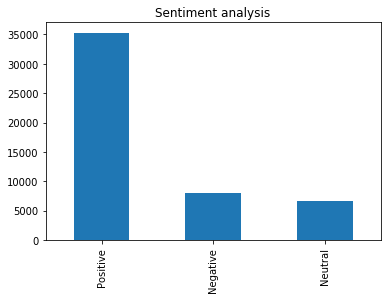

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline
reviews.sentiment.value_counts().plot(kind='bar', title="Sentiment analysis")

# Text data cleaning

In [113]:
# Convert to list
data = reviews['Reviews'].values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[:1])

['I feel so LUCKY to have found this used (phone to us & not used hard at '
 'all), phone on line from someone who upgraded and sold this one. My Son '
 'liked his old one that finally fell apart after 2.5+ years and didnt want an '
 'upgrade!! Thank you Seller, we really appreciate it & your honesty re: said '
 'used phone.I recommend this seller very highly & would but from them again!!']


In [114]:
neg_rev =  reviews['sentiment'] == 'Negative'
neg_rev = reviews[neg_rev]
print("Number of negative reviews : {}".format(len(neg_rev)))
print(neg_rev.Reviews.iloc[0])
print(neg_rev.Reviews.iloc[1])
print(neg_rev.Reviews.iloc[2])
print(neg_rev.Reviews.iloc[3])
print(neg_rev.Reviews.iloc[4])

Number of negative reviews : 8044
I already had a phone with problems... I know it stated it was used, but dang, it did not state that it did not charge. I wish I would have read these comments then I would have not purchased this item.... and its cracked on the side.. damaged goods is what it is.... If trying to charge it another way does not work I am requesting for my money back... AND I WILL GET MY MONEY BACK...SIGNED AN UNHAPPY CUSTOMER....
The charging port was loose. I got that soldered in. Then needed a new battery as well. $100 later (not including cost of purchase) I have a usable phone. The phone should not have been sold in the state it was in.
Had this phone before and loved it but was not working so I got this phone. One thing is the SD card slot does not open up when I try to access it in file managment, even does not show up on the computer. The card is fine was able to open on another phone. Trying to trouble shoot it for now.
The battery was old & had been over used b

In [115]:
neg_rev.head(3)

Reviews  polarity_score  \
5   I already had a phone with problems... I know ...         -0.9107   
6   The charging port was loose. I got that solder...         -0.0516   
15  Had this phone before and loved it but was not...         -0.4588   

    neutral  negative  positive sentiment  
5     0.857     0.143     0.000  Negative  
6     0.891     0.057     0.052  Negative  
15    0.832     0.099     0.069  Negative

In [118]:
neg_rev.shape

(8044, 6)

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn import preprocessing 

(array([2287., 3122., 1324.,  591.,  285.,  175.,   97.,   87.,   19.,
          57.]),
 array([0.012 , 0.1108, 0.2096, 0.3084, 0.4072, 0.506 , 0.6048, 0.7036,
        0.8024, 0.9012, 1.    ]),
 <a list of 10 Patch objects>)

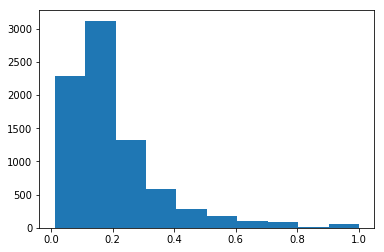

In [117]:
plt.hist(neg_rev.negative,bins =10)

In [38]:
reasons = neg_rev['Reviews'] 
reasons.head()

5     I already had a phone with problems... I know ...
6     The charging port was loose. I got that solder...
15    Had this phone before and loved it but was not...
20    The battery was old & had been over used becau...
22    I purchased this phone in December as a christ...
Name: Reviews, dtype: object

In [39]:
def preprocessing(text):
    words = word_tokenize(text)
    tokens = [w for w in words if w.lower() not in string.punctuation]
    stopw = stopwords.words('english')
    tokens = [token for token in tokens if token not in stopw]
    # remove words less than three letters
    tokens = [word for word in tokens if len(word)>=3]
    # lemmatize
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(word) for word in tokens]
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

l_data = str(reasons)
#l_data
list = [l_data]
word_list = []
for line in list:
    word_list.append(preprocessing(line))
word_list

["already phone problem ... know ... The charging port loose got solder ... Had phone loved ... The battery old used becau ... purchased phone December christ ... good condition work good One phone bad charger port ... 180424 Cricket accept type phone ... 180426 poor 180427 The phone missing part still n't use ... 180428 longer use Cricket ... 180429 Bought phone useless phone ... 182764 boring bring apps uninst ... 182771 This phone nice phone working well ... 182773 Stopped working day Amazon refunded ... 182775 The phone get hot lot n't record ... 182786 Horrible new update Slow 182792 Good phone First one got retailer ... 182819 disappointed device.. ... 182827 NEVER BUSINESS WITH CHUBBIES TECH Phone ... 182828 Water insulation offWater insulation ... 182839 bought phone little year ago ... 182841 Phone look like new n't work ... 182844 problem Phone excellent 182859 cell seems wine using back cover defe ... 182862 Bad internal antenna n't realize ... 182863 Works well Canada Does 

In [40]:
token = word_tokenize(l_data)
from nltk import FreqDist
freqd = FreqDist(token)
freqd.items()
import operator
sorted_freq = sorted(freqd.items(), key=operator.itemgetter(1))
sorted_freq
# converting into dictionary 
def listtodict(A, di): 
   di = dict(A) 
   return di 

# Driver Code  
A = sorted_freq 
di = {} 
print ("The Dictionary Is ::>",listtodict(A, di)) 

The Dictionary Is ::> {'5': 1, 'already': 1, 'problems': 1, 'know': 1, 'charging': 1, 'loose': 1, 'solder': 1, '15': 1, 'Had': 1, 'before': 1, 'loved': 1, '20': 1, '&': 1, 'been': 1, 'used': 1, 'becau': 1, '22': 1, 'December': 1, 'christ': 1, '28': 1, '32': 1, 'One': 1, 'bad': 1, 'charger': 1, '180424': 1, 'accept': 1, 'these': 1, 'type': 1, '180426': 1, 'poor': 1, '180427': 1, 'missing': 1, 'parts': 1, 'still': 1, 'ca': 1, '180428': 1, 'no': 1, 'longer': 1, 'they': 1, '180429': 1, 'useless': 1, '182764': 1, 'boring': 1, 'bring': 1, 'apps': 1, 'i': 1, 'uninst': 1, '182771': 1, '182773': 1, 'Stopped': 1, 'after': 1, 'days': 1, 'refunded': 1, '182775': 1, 'gets': 1, 'hot': 1, 'lot': 1, 'wo': 1, 'record': 1, '182786': 1, 'Horrible': 1, 'update': 1, 'Slow': 1, '182792': 1, 'Good': 1, 'First': 1, 'retailer': 1, '182819': 1, 'device..': 1, '182827': 1, 'NEVER': 1, 'DO': 1, 'BUSINESS': 1, 'WITH': 1, 'CHUBBIES': 1, 'TECH': 1, '182828': 1, 'Water': 1, 'offWater': 1, '182839': 1, 'year': 1, 'ago

In [41]:
dict_data = {'5': 1, 'already': 1, 'problems': 1, 'loose': 1, 'solder': 1, '15': 1, 'Had': 1, 'before': 1, 'loved': 1, '20': 1, 'old': 1, '&': 1, 'been': 1, 'becau': 1, '22': 1, 'purchased': 1, 'December': 1, 'christ': 1, '28': 1, 'condition': 1, '32': 1, 'One': 1, 'bad': 1, 'charger': 1, '180424': 1, 'accept': 1, 'these': 1, 'type': 1, '180426': 1, 'poor': 1, '180427': 1, 'missing': 1, 'parts': 1, 'ca': 1, '180428': 1, 'they': 1, '180429': 1, 'useless': 1, '182764': 1, 'boring': 1, 'bring': 1, 'apps': 1, 'i': 1, 'uninst': 1, '182771': 1, '182773': 1, 'Stopped': 1, 'after': 1, 'days': 1, 'refunded': 1, '182775': 1, 'gets': 1, 'hot': 1, 'lot': 1, 'wo': 1, 'record': 1, '182786': 1, 'Horrible': 1, 'update': 1, 'Slow': 1, '182792': 1, 'Good': 1, 'First': 1, 'retailer': 1, '182819': 1, 'disappointed': 1, 'device..': 1, '182827': 1, 'NEVER': 1, 'DO': 1, 'BUSINESS': 1, 'WITH': 1, 'CHUBBIES': 1, 'TECH': 1, '182828': 1, 'Water': 1, 'offWater': 1, 't': 1, '182839': 1, 'little': 1, 'year': 1, 'ago': 1, '182841': 1, '..': 1, 'looks': 1, 'like': 1, 'l': 1, '182844': 1, 'No': 1, 'problem': 1, 'excellent': 1, '182859': 1, 'cell': 1, 'seems': 1, 'wine': 1, 'using': 1, 'cover': 1, 'defe': 1, '182862': 1, 'Bad': 1, 'internal': 1, 'antenna': 1, 'realize': 1, 'un': 1, '182863': 1, 'Works': 1, 'Canada': 1, 'seem': 1, '182880': 1, 'camera': 1, 'n': 1, '182881': 1, 'To': 1, 'all': 1, 'those': 1, 'considering': 1, 'buying': 1, 'smar': 1, '182885': 1, 'recently': 1, 'd': 1, '413640': 1, 'second': 1, 'Convoy': 1, 'first': 1, 'spen': 1, '413646': 1, 'says': 1, 'reliably': 1, '413648': 1, 'return': 1, '413651': 1, '413655': 1, 'husband': 1, 'who': 1, 'wanted': 1, 'bas': 1, '413664': 1, 'Obvious': 1, 'wear': 1, 'device.I': 1, '413679': 1, 'My': 1, 'purchase': 1, 'U640': 1, '413693': 1, 'fine': 1, 'now': 1, 'however': 1, '413695': 1, 'an': 1, 'elderly': 1, 'person': 1, 'm': 1, '413696': 1, '413698': 1, 'key': 1, 'open': 1, 'completely': 1, 's': 1, '413704': 1, 'dirty': 1, 'received': 1, 'appreciated': 1, '413709': 1, 'main': 1, 'thing': 1, 'wrong': 1, '413710': 1, 'replaced': 1, 'U': 1, '640': 1, 'because': 1, 'went': 1, 'stra': 1, '413714': 1, 'Missing': 1, 'ins': 1, '413721': 1, 'Awful': 1, 'supposed': 1, 'waterproof': 1, '413725': 1, 'However': 1, 'more': 1, '413728': 1, 'carry': 1, 'flip': 1, '413732': 1, 'Received': 1, '413733': 1, 'seemed': 1, 'dad': 1, 'h': 1, '413744': 1, 'sold': 1, '``': 1, "''": 1, 'representati': 1, '413747': 1, 'Having': 1, 'Casio': 1, 'Gzone': 1, 'last': 1, 'two': 1, 'years': 1, '413754': 1, 'Yes': 1, 'book': 1, 'They': 1, 'made': 1, '413759': 1, 'basic': 1, 'fancy': 1, 'bells': 1, 'whistle': 1, '413762': 1, 'probably': 1, '413774': 1, 'lasted': 1, 'few': 1, 'months': 1, 'then': 1, 'rin': 1, '413776': 1, 'replace': 1, 'wi': 1, '413784': 1, 'easiest': 1, '413798': 1, 'daughter': 1, 'guess': 1, 'b': 1, '413800': 1, 'Upon': 1, 'ordering': 1, 'item': 1, 'aware': 1, 'wa': 1, 'Name': 1, 'Reviews': 1, 'Length': 1, '10312': 1, 'dtype': 1, 'object': 1, 'know': 2, '6': 2, 'charging': 2, 'battery': 2, 'over': 2, 'phones': 2, 'w': 2, 'Cricket': 2, 'still': 2, 'can': 2, 'longer': 2, 'Bought': 2, 'nice': 2, 'very': 2, 'Amazon': 2, 'v': 2, 'new': 2, 'from': 2, 'by': 2, 'insulation': 2, 'back': 2, 'Does': 2, 'f': 2, 'Samsung': 2, 'what': 2, 'so': 2, 'we': 2, 'Got': 2, 'on': 2, 'o': 2, 'works': 2, 'right': 2, 'ha': 2, 'has': 2, 'th': 2, 'paid': 2, 'port': 3, 'got': 3, 'as': 3, 'hangs': 20, 'of': 3, 'use': 3, 'working': 3, 'one': 3, 'be': 3, 'defective': 3, 'Verizon': 3, ':': 3, 'had': 4, 'in': 4, 'does': 4, 'have': 4, 'no': 4, "'s": 4, 'This': 4, 'well': 4, 'It': 4, 'did': 4, 'Phone': 4, 'bought': 4, 'with': 5, 'and': 5, 'work': 5, "n't": 5, 'to': 5, 'my': 5, 'for': 6, 'that': 7, 'but': 7, '!': 7, 'Slow OS': 20, 'Bad Battery power': 18, 'this': 10, 'is': 11, 'The': 13, 'was': 13, 'it': 15, 'the': 15, ',': 18, 'a': 19, '.': 21, 'I': 24, 'Phone Charger': 33, '...': 57}

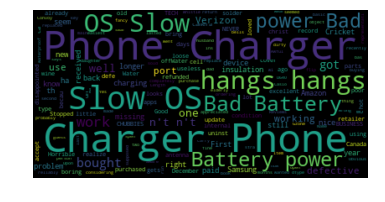

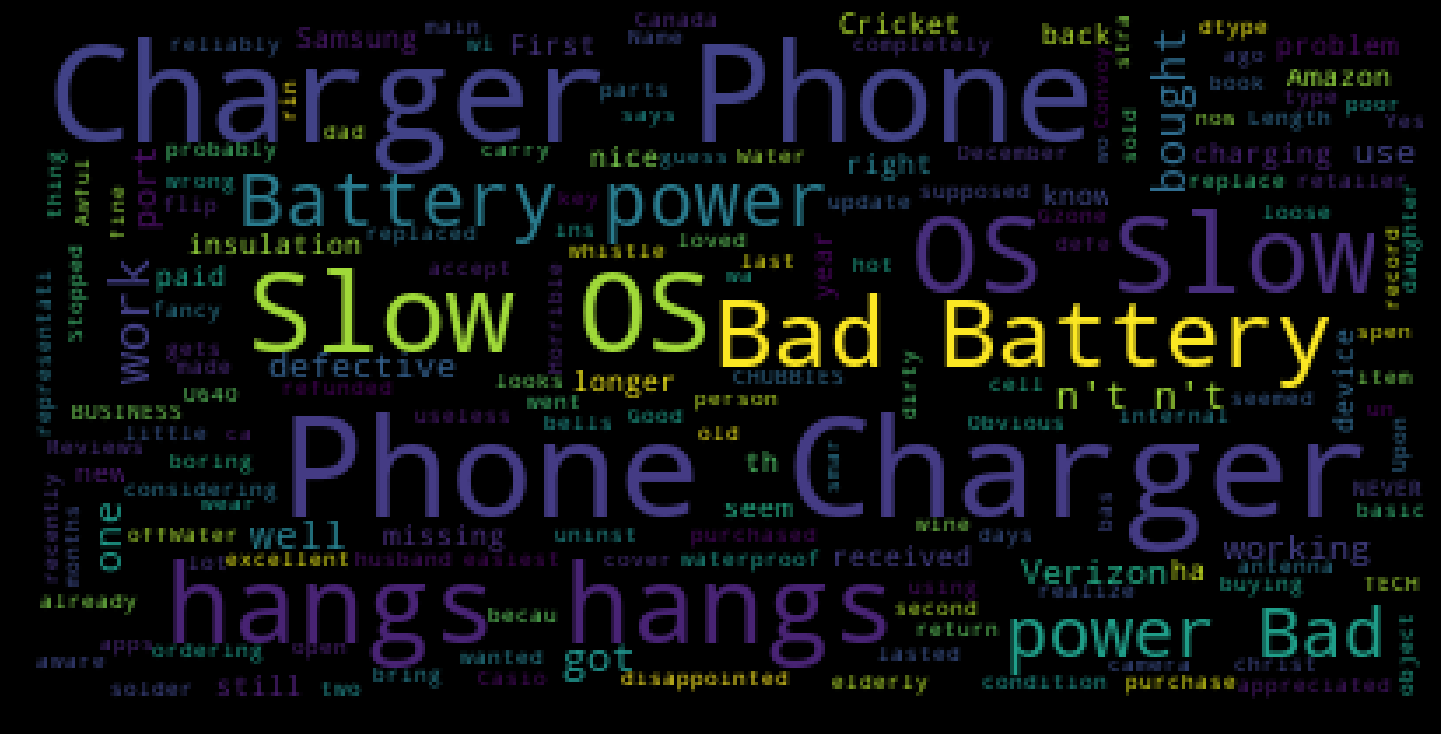

In [42]:
import os

from os import path
from wordcloud import WordCloud

# using word frequency list:
word_freq = dict_data
text = " ".join([(k + " ")*v for k,v in word_freq.items()])

# Generate a word cloud image
wordcloud = WordCloud().generate(text)


# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [120]:
# state_data = str(neg_rev.Reviews)
# state_data
state_data = str(word_list)
state_data

'["already phone problem ... know ... The charging port loose got solder ... Had phone loved ... The battery old used becau ... purchased phone December christ ... good condition work good One phone bad charger port ... 180424 Cricket accept type phone ... 180426 poor 180427 The phone missing part still n\'t use ... 180428 longer use Cricket ... 180429 Bought phone useless phone ... 182764 boring bring apps uninst ... 182771 This phone nice phone working well ... 182773 Stopped working day Amazon refunded ... 182775 The phone get hot lot n\'t record ... 182786 Horrible new update Slow 182792 Good phone First one got retailer ... 182819 disappointed device.. ... 182827 NEVER BUSINESS WITH CHUBBIES TECH Phone ... 182828 Water insulation offWater insulation ... 182839 bought phone little year ago ... 182841 Phone look like new n\'t work ... 182844 problem Phone excellent 182859 cell seems wine using back cover defe ... 182862 Bad internal antenna n\'t realize ... 182863 Works well Canada 

In [44]:
token = word_tokenize(state_data)
from nltk import FreqDist
#tokens_state = ''.join([i for i in tokens_state if not i.isdigit()])
freqd = FreqDist(token)
freqd.items()

dict_items([('[', 1), ('``', 1), ('already', 1), ('phone', 27), ('problem', 2), ('...', 56), ('know', 1), ('The', 10), ('charging', 1), ('port', 2), ('loose', 1), ('got', 2), ('solder', 1), ('Had', 1), ('loved', 1), ('battery', 2), ('old', 2), ('used', 1), ('becau', 1), ('purchased', 2), ('December', 1), ('christ', 1), ('good', 5), ('condition', 2), ('work', 3), ('One', 1), ('bad', 1), ('charger', 1), ('180424', 1), ('Cricket', 2), ('accept', 1), ('type', 1), ('180426', 1), ('poor', 1), ('180427', 1), ('missing', 1), ('part', 1), ('still', 1), ("n't", 7), ('use', 6), ('180428', 1), ('longer', 1), ('180429', 1), ('Bought', 3), ('useless', 1), ('182764', 1), ('boring', 1), ('bring', 1), ('apps', 1), ('uninst', 1), ('182771', 1), ('This', 3), ('nice', 2), ('working', 2), ('well', 2), ('182773', 1), ('Stopped', 1), ('day', 1), ('Amazon', 2), ('refunded', 1), ('182775', 1), ('get', 1), ('hot', 1), ('lot', 1), ('record', 1), ('182786', 1), ('Horrible', 1), ('new', 3), ('update', 1), ('Slow',

In [45]:
import operator
sorted_freq = sorted(freqd.items(), key=operator.itemgetter(1))
sorted_freq

[('[', 1),
 ('``', 1),
 ('already', 1),
 ('know', 1),
 ('charging', 1),
 ('loose', 1),
 ('solder', 1),
 ('Had', 1),
 ('loved', 1),
 ('used', 1),
 ('becau', 1),
 ('December', 1),
 ('christ', 1),
 ('One', 1),
 ('bad', 1),
 ('charger', 1),
 ('180424', 1),
 ('accept', 1),
 ('type', 1),
 ('180426', 1),
 ('poor', 1),
 ('180427', 1),
 ('missing', 1),
 ('part', 1),
 ('still', 1),
 ('180428', 1),
 ('longer', 1),
 ('180429', 1),
 ('useless', 1),
 ('182764', 1),
 ('boring', 1),
 ('bring', 1),
 ('apps', 1),
 ('uninst', 1),
 ('182771', 1),
 ('182773', 1),
 ('Stopped', 1),
 ('day', 1),
 ('refunded', 1),
 ('182775', 1),
 ('get', 1),
 ('hot', 1),
 ('lot', 1),
 ('record', 1),
 ('182786', 1),
 ('Horrible', 1),
 ('update', 1),
 ('Slow', 1),
 ('182792', 1),
 ('Good', 1),
 ('First', 1),
 ('retailer', 1),
 ('182819', 1),
 ('device..', 1),
 ('182827', 1),
 ('NEVER', 1),
 ('BUSINESS', 1),
 ('WITH', 1),
 ('CHUBBIES', 1),
 ('TECH', 1),
 ('182828', 1),
 ('Water', 1),
 ('offWater', 1),
 ('182839', 1),
 ('year', 1

In [46]:
token

['[',
 '``',
 'already',
 'phone',
 'problem',
 '...',
 'know',
 '...',
 'The',
 'charging',
 'port',
 'loose',
 'got',
 'solder',
 '...',
 'Had',
 'phone',
 'loved',
 '...',
 'The',
 'battery',
 'old',
 'used',
 'becau',
 '...',
 'purchased',
 'phone',
 'December',
 'christ',
 '...',
 'good',
 'condition',
 'work',
 'good',
 'One',
 'phone',
 'bad',
 'charger',
 'port',
 '...',
 '180424',
 'Cricket',
 'accept',
 'type',
 'phone',
 '...',
 '180426',
 'poor',
 '180427',
 'The',
 'phone',
 'missing',
 'part',
 'still',
 "n't",
 'use',
 '...',
 '180428',
 'longer',
 'use',
 'Cricket',
 '...',
 '180429',
 'Bought',
 'phone',
 'useless',
 'phone',
 '...',
 '182764',
 'boring',
 'bring',
 'apps',
 'uninst',
 '...',
 '182771',
 'This',
 'phone',
 'nice',
 'phone',
 'working',
 'well',
 '...',
 '182773',
 'Stopped',
 'working',
 'day',
 'Amazon',
 'refunded',
 '...',
 '182775',
 'The',
 'phone',
 'get',
 'hot',
 'lot',
 "n't",
 'record',
 '...',
 '182786',
 'Horrible',
 'new',
 'update',
 'Slo

In [47]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(token)

topics = 10
lda = LatentDirichletAllocation(n_components = topics,
                                max_iter=100,
                               learning_method='online',
                               learning_offset=50.,
                               random_state=2017)
lda.fit(X)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=100, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=2017, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [48]:
feature_names = np.array(vectorizer.get_feature_names())
feature_names

array(['180424', '180426', '180427', '180428', '180429', '182', '182764',
       '182771', '182773', '182775', '182786', '182792', '182819',
       '182827', '182828', '182839', '182841', '182844', '182859',
       '182862', '182863', '182880', '182881', '182885', '183500',
       '183501', '183502', '183507', '183511', '183516', '183518',
       '183520', '183537', '183538', '184774', '184778', '184785',
       '184794', '184799', '184804', '184808', '184814', '184824',
       '184825', '184828', '184830', '184831', '184864', '184879',
       '184881', '184882', '184884', '184891', '184899', 'absolute',
       'accept', 'advertised', 'ago', 'amazon', 'antenna', 'apps',
       'arrived', 'awful', 'bad', 'battery', 'becau', 'boring', 'bought',
       'bring', 'business', 'buying', 'camera', 'canada', 'cell',
       'charger', 'charges', 'charging', 'christ', 'chubbies',
       'compatible', 'complicated', 'condition', 'considering', 'cover',
       'cricket', 'data', 'day', 'december', 

In [49]:
lda.components_

array([[0.10003   , 0.10003318, 0.10003224, ..., 0.10003717, 0.10003118,
        0.10002556],
       [0.10003729, 0.10003639, 0.10003457, ..., 0.10003634, 0.10003546,
        0.10003107],
       [0.10003148, 0.1000307 , 0.10003323, ..., 0.10003557, 0.10003829,
        0.10003309],
       ...,
       [0.10003684, 0.10003234, 0.10003581, ..., 0.10002912, 0.1000277 ,
        0.89058315],
       [0.10003297, 0.10003689, 0.10003085, ..., 0.10002691, 0.10003259,
        0.1000316 ],
       [0.86876978, 0.1000317 , 0.10003574, ..., 0.87961252, 0.10003176,
        0.10003207]])

In [50]:
for idx, topic in enumerate(lda.components_):
    print("Topic #%d:" % idx)
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

Topic #0:
new little time problem port 184825 friendly support 184881 senior
Topic #1:
good disappointed condition working 184804 setup unlocked absolute fabulous health
Topic #2:
phone product work tex far 184774 feature mother low transferred
Topic #3:
complicated dtype length cell old cricket sensitive 184879 184799 difficult
Topic #4:
fine great seei 184830 charges uncondition 183537 year cover antenna
Topic #5:
use object purchased received got unfortun star data mann purchase
Topic #6:
like 184891 184899 learning network touch 184794 terrible 184828 speaker
Topic #7:
samsung bad overseas hav 184808 limited yr 184778 sto read
Topic #8:
did 182 bought tech insulation 184785 184831 hard buying 183501
Topic #9:
difficulty reviews battery nice amazon gal 184884 advertised compatible properly


# NMF(Non-negative Matrix Factorization) for topic modeling


In [60]:
from sklearn.decomposition import NMF
topics =20
nmf = NMF(n_components=topics,
         random_state=2017,
         alpha=.1,
         l1_ratio=.5)
nmf.fit(X)

NMF(alpha=0.1, beta_loss='frobenius', init=None, l1_ratio=0.5, max_iter=200,
  n_components=20, random_state=2017, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [61]:
for idx, topic in enumerate(nmf.components_):
    print("Topic #%d:" % idx)
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

Topic #0:
phone yr becau charges charger cell canada camera buying business
Topic #1:
bought yr far charges charger cell canada camera buying business
Topic #2:
use yr becau charges charger cell canada camera buying business
Topic #3:
good yr becau charges charger cell canada camera buying business
Topic #4:
like yr christ charges charger cell canada camera buying business
Topic #5:
product yr becau charges charger cell canada camera buying business
Topic #6:
fine yr becau charges charger cell canada camera buying business
Topic #7:
new yr 184891 charges charger cell canada camera buying business
Topic #8:
great yr becau charges charger cell canada camera buying business
Topic #9:
disappointed yr battery charger cell canada camera buying business bring
Topic #10:
work yr battery charges charger cell canada camera buying business
Topic #11:
did charging charger cell canada camera buying business bring bought
Topic #12:
port yr becau charges charger cell canada camera buying business
Top

# Topic Modeling on NOUNS only

In [105]:
text = neg_rev
text.head()

Reviews  polarity_score  \
5   I already had a phone with problems... I know ...         -0.9107   
6   The charging port was loose. I got that solder...         -0.0516   
15  Had this phone before and loved it but was not...         -0.4588   
20  The battery was old & had been over used becau...         -0.2960   
22  I purchased this phone in December as a christ...         -0.8085   

    neutral  negative  positive sentiment  
5     0.857     0.143     0.000  Negative  
6     0.891     0.057     0.052  Negative  
15    0.832     0.099     0.069  Negative  
20    0.896     0.104     0.000  Negative  
22    0.909     0.083     0.009  Negative

In [66]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [68]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns = pd.DataFrame(text.Reviews.apply(nouns))
data_nouns

Reviews
5       phone problems state charge comments item side...
6            port battery cost purchase phone phone state
15      phone phone thing SD card slot access file man...
20                            battery charge issues phone
22      phone December christmas present son sprint ph...
28                                              condition
32                                    phones charger port
180424                      Cricket type phones store Rip
180426                                                   
180427                                        phone parts
180428                               Cricket networks use
180429               phone phone Cricket phones SIM cards
182764                                  apps i memory RAM
182771                                phone phone problem
182773                   Stopped days Amazon money issues
182775  phone lot video hot finger print reader error ...
182786                                        update Slow
182792  phone First retailer Amazon faulty audio jack ...
182819         device.. LTE TMobile specs.Otherwise phone
182827  NEVER DO BUSINESS WITH CHUBBIES TECH Phone WiF...
182828  Water insulation offWater insulation port load...
182839  phone year review phone months phone protector...
182841                       Phone something touch screen
182844                                            problem
182859  cell wine cover wine equipment bugle sounds si...
182862                            Bad antenna Money drain
182863  Works Canada choice phones manufacturer lag we...
182880  phone camera nothing spectacular ATT call qual...
182881  Samsung phone online seller Samsung Galaxy S5 ...
182885  phone Amazon d hour phone landline phone ATT a...
...                                                   ...
183500  phone time time phone phone Front camera SUCKS...
183501  condition manner manual start leaflet fulluser...
183502  phone time phone stuff phone problems phone ho...
183507  Bought comments clone vendors thing SIM card a...
183511  data internet dont work Memory chip features lost
183516  product phone battery phone phone Sent phone p...
183518  product phone boyfriend day phone screen anyth...
183520                  purchase. phone port problems POS
183537  product Samsung logo phone phone day video eff...
183538  S5 features trouble months front camera screen...
184774                  Hard Difficult speaker volume NOT
184778                      Seemed fine use numbers app /
184785       phone difficulty print phone ive frustration
184794                                        phone icons
184799  phone health texts andf emergency alert emerge...
184804  phone phone one network Verizon Verizon servic...
184808                   Great Call absolute company hole
184814  print Charges auto withdrawal account company ...
184824                          Great phone dials fingers
184825  phone seniors pain DO NOT voice prompts option...
184828  NO star product BEWARE Old technology charges ...
184830  cell people cell number problems bugs people t...
184831    Mother number Verizon number people text Mother
184864                               battery life support
184879  phone easy night deal service plan month talk ...
184881  Verizon network NOT TRUE Verizon program netwo...
184882  user gal store phones money Target day help wa...
184884  Bought phone card matter GreatCall days nothin...
184891                                            Did Too
184899                                         difficulty

[182 rows x 1 columns]

In [70]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.Reviews)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

ability  absolute  abuse  access  accessories  according  account  \
5             0         0      0       0            0          0        0   
6             0         0      0       0            0          0        0   
15            0         0      0       1            0          0        0   
20            0         0      0       0            0          0        0   
22            0         0      0       0            0          0        0   
28            0         0      0       0            0          0        0   
32            0         0      0       0            0          0        0   
180424        0         0      0       0            0          0        0   
180426        0         0      0       0            0          0        0   
180427        0         0      0       0            0          0        0   
180428        0         0      0       0            0          0        0   
180429        0         0      0       0            0          0        0   
182764        0         0      0       0            0          0        0   
182771        0         0      0       0            0          0        0   
182773        0         0      0       0            0          0        0   
182775        0         0      0       0            0          0        0   
182786        0         0      0       0            0          0        0   
182792        0         0      0       0            0          0        0   
182819        0         0      0       0            0          0        0   
182827        0         0      0       0            0          0        0   
182828        0         0      0       0            0          0        0   
182839        0         0      0       0            0          0        0   
182841        0         0      0       0            0          0        0   
182844        0         0      0       0            0          0        0   
182859        0         0      0       0            0          0        0   
182862        0         0      0       0            0          0        0   
182863        0         0      0       0            0          0        0   
182880        0         0      1       0            0          0        0   
182881        0         0      0       0            0          0        0   
182885        0         0      0       0            0          0        0   
...         ...       ...    ...     ...          ...        ...      ...   
183500        0         0      0       0            0          0        0   
183501        0         0      0       0            0          0        0   
183502        0         0      0       0            0          0        0   
183507        0         0      0       0            0          0        0   
183511        0         0      0       0            0          0        0   
183516        0         0      0       0            0          0        0   
183518        0         0      0       0            0          0        0   
183520        0         0      0       0            0          0        0   
183537        0         0      0       0            0          0        0   
183538        0         0      0       0            0          0        0   
184774        0         0      0       0            0          0        0   
184778        0         0      0       0            0          0        0   
184785        0         0      0       0            0          0        0   
184794        0         0      0       0            0          0        0   
184799        0         0      0       0            0          0        0   
184804        0         0      0       0            0          0        0   
184808        0         1      0       0            0          0        0   
184814        0         0      0       0            0          0        1   
184824        0         0      0       0            0          0        0   
184825        0         0      0       0            0          0        0   
1848

In [73]:
from gensim import matutils, models
import scipy.sparse
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())
# Let's try 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=10, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.146*"phone" + 0.033*"screen" + 0.022*"camera" + 0.022*"esn" + 0.015*"battery" + 0.015*"s4" + 0.011*"months" + 0.011*"samsung" + 0.011*"product" + 0.011*"money"'),
 (1,
  '0.133*"phone" + 0.038*"problems" + 0.030*"problem" + 0.013*"screen" + 0.013*"network" + 0.013*"jack" + 0.013*"protector" + 0.009*"software" + 0.009*"card" + 0.009*"use"'),
 (2,
  '0.160*"phone" + 0.052*"screen" + 0.015*"purchase" + 0.012*"month" + 0.010*"months" + 0.010*"camera" + 0.010*"home" + 0.010*"problems" + 0.010*"speaker" + 0.010*"lg"'),
 (3,
  '0.121*"phone" + 0.028*"samsung" + 0.021*"screen" + 0.021*"battery" + 0.016*"card" + 0.015*"galaxy" + 0.015*"s5" + 0.013*"att" + 0.012*"product" + 0.012*"port"'),
 (4,
  '0.099*"phone" + 0.019*"phones" + 0.017*"number" + 0.017*"cricket" + 0.011*"wife" + 0.011*"son" + 0.011*"weeks" + 0.010*"samsung" + 0.008*"cell" + 0.008*"video"'),
 (5,
  '0.108*"phone" + 0.050*"samsung" + 0.038*"warranty" + 0.029*"amazon" + 0.020*"repair" + 0.018*"month" + 0.016*"service" + 0